# Gravity Machine analysis notebook

This notebook contains usage examples and worflows for Gravity Machine data analysis.

Earlier version of this analysis pipeline was used for generating figures for the paper:

> Krishnamurthy, Deepak, Hongquan Li, François Benoit du Rey, Pierre Cambournac, Adam G. Larson, Ethan Li, and Manu Prakash. "Scale-free vertical tracking microscopy." Nature Methods 17, no. 10 (2020): 1040-1051.

In [128]:
# Reload modules
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

## Specify the data path and load the data as a GravityMachineTrack object

In [130]:
# WARNING: Replace the path here with the actual path of your data
track_folder = '/Volumes/DEEPAK-1TB/PuertoRico_2018/GravityMachineData/2018_11_06/Tow_1/Centric_diatom_3_Good'
# REPLACE the filename here with the actual filename
track_file = 'track_cropped.csv'

gm_analysis = Analysis.GravityMachineTrack(track_folder = track_folder, track_file = track_file, Tmin = 0, Tmax = 360)
gm_analysis.data

Loaded metadata...
{'Local time': None, 'PixelPermm': None, 'Objective': None}
**************************************************
['Time', 'Xobj', 'Yobj', 'Zobj', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Liquid Lens Freq', 'Liquid Lens Ampl', 'Liquid Lens maxGain', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
{'Time': 'Time', 'X': 'Xobj', 'Y': 'Yobj', 'Z': 'ZobjWheel', 'Image name': 'Image name', 'X_image': 'Xobj_image', 'Z_image': 'Zobj'}
Warning X_image not found in input data
Dir:  /Volumes/DEEPAK-1TB/PuertoRico_2018/GravityMachineData/2018_11_06/Tow_1/Centric_diatom_3_Good/PIVresults_64px
Subdir:  []
Dir:  /Volumes/DEEPAK-1TB/PuertoRico_2018/GravityMachineData/2018_11_06/Tow_1/Centric_diatom_3_Good/images013
Subdir:  []
Dir:  /Volumes/DEEPAK-1TB/PuertoRico_2018/GravityMachineData/2018_11_06/Tow_1/Centric_diatom_3_Good/images000
Subdir:  []
Dir:  /Volumes/DEEPAK-1TB/PuertoRico_2018/GravityMachin

Time          X         Y          Z    Image name X_image  \
0        0.000000  11.536563  0.171250   0.000000  IMG_3878.tif    None   
1        0.025081  11.536563  0.171250  -0.010422           NaN    None   
2        0.042399  11.536563  0.171250  -0.007238           NaN    None   
3        0.066455  11.536563  0.171250  -0.020845  IMG_3879.tif    None   
4        0.086212  11.533378  0.171250  -0.017660           NaN    None   
...           ...        ...       ...        ...           ...     ...   
16007  359.887024  10.319375  0.415938 -12.726232  IMG_8002.tif    None   
16008  359.912891  10.319375  0.415938 -12.715937           NaN    None   
16009  359.931388  10.316190  0.415938 -12.712753           NaN    None   
16010  359.963501  10.319062  0.415938 -12.715937  IMG_8003.tif    None   
16011  359.985319  10.318750  0.415938 -12.705643           NaN    None   

        Z_image   V_x   V_y   V_z  
0     -0.108280  None  None  None  
1     -0.108280  None  None  None  
2     -0.105096  None  None  None  
3     -0.108280  None  None  None  
4     -0.105096  None  None  None  
...         ...   ...   ...   ...  
16007  0.035032  None  None  None  
16008  0.035032  None  None  None  
16009  0.038217  None  None  None  
16010  0.035032  None  None  None  
16011  0.035032  None  None  None  

[16012 rows x 10 columns]

## Plot the object's X, Y, Z displacement time series

<IPython.core.display.Javascript object>


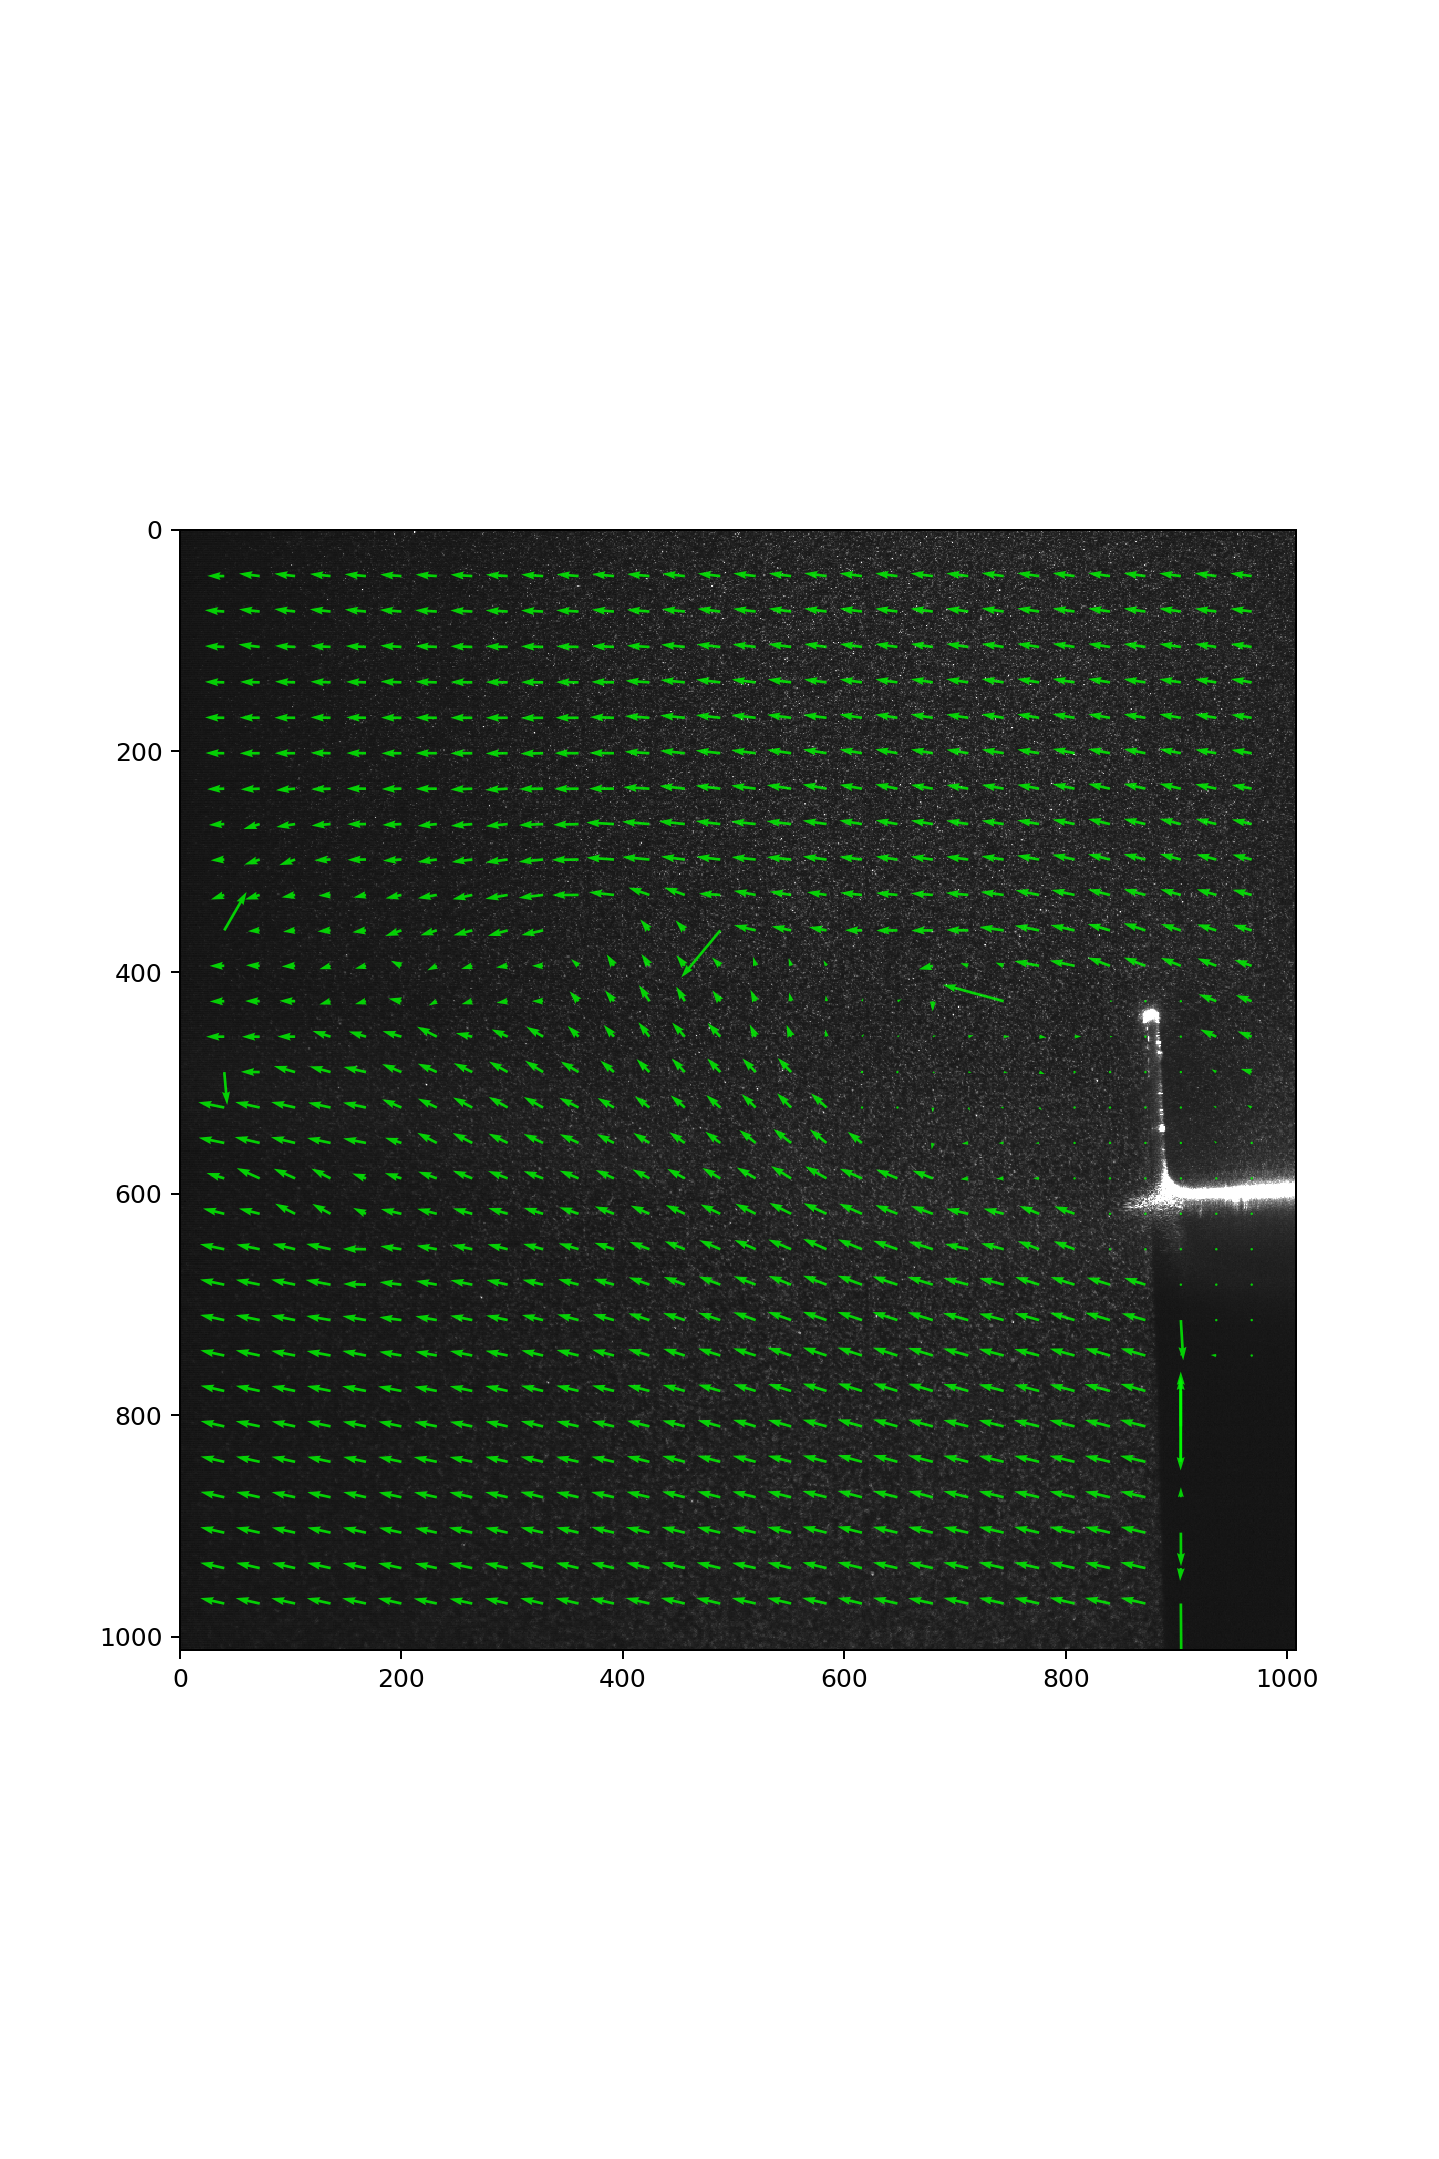

<IPython.core.display.Javascript object>


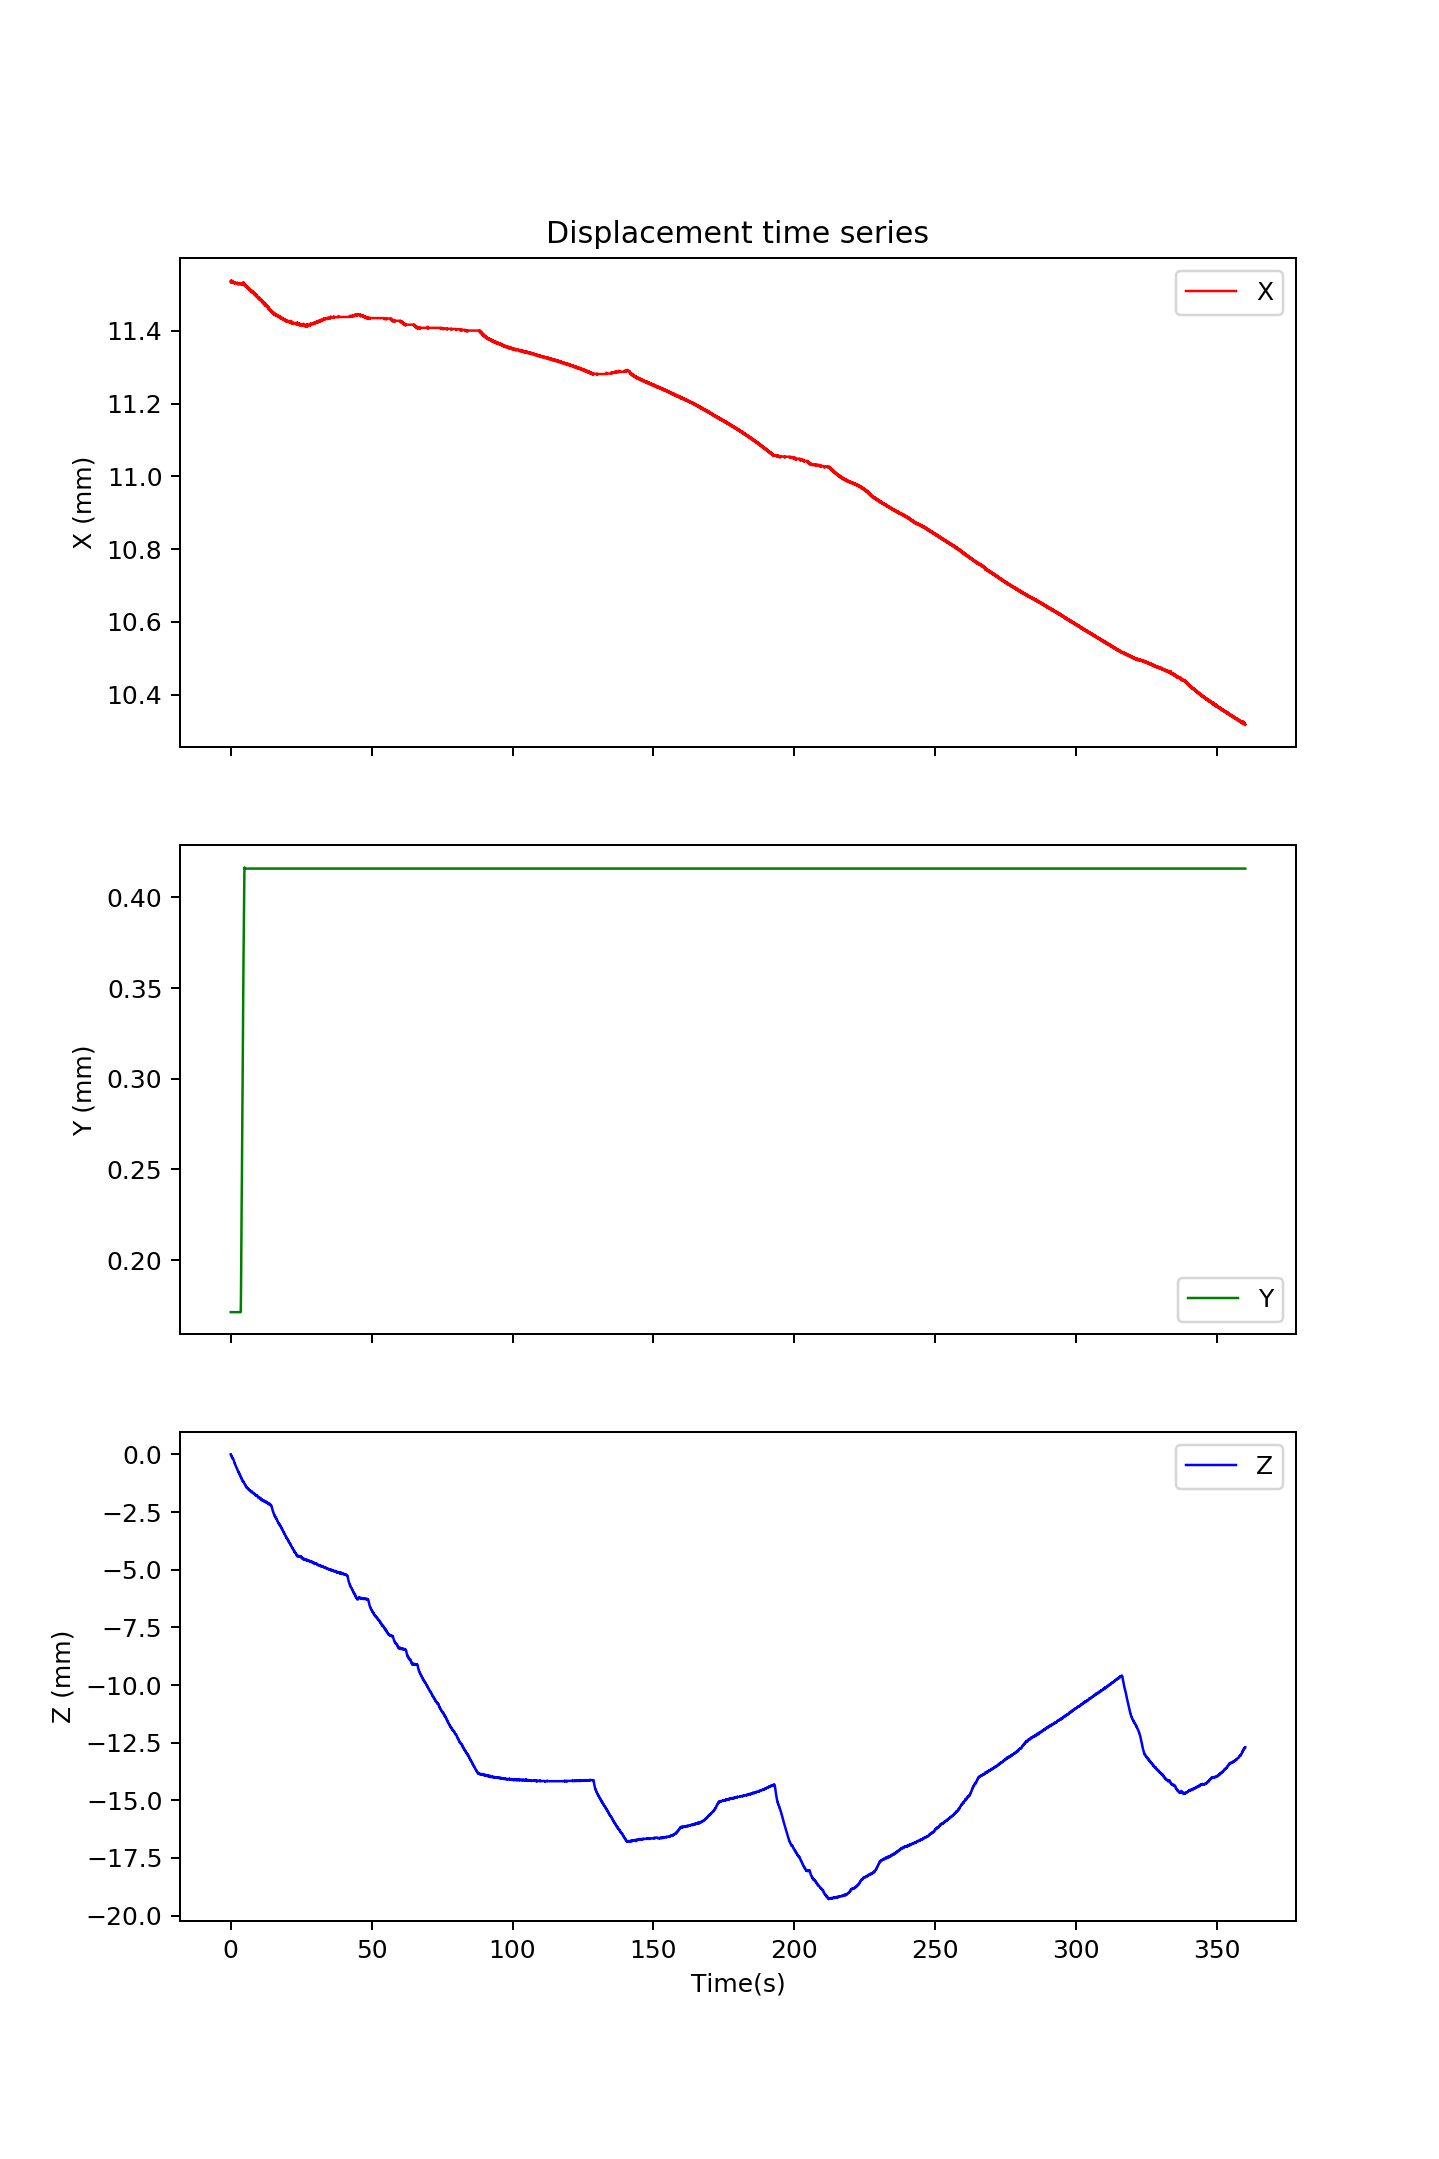

Saved Displacement time series.png to disk
Saved Displacement time series.svg to disk


In [99]:
# The analysis API has a built-in function to generate X, Y, Z displacement plots
gm_analysis.plot_displacement_timeseries()
# To save the plots to file, do the following
gm_analysis.plot_displacement_timeseries(save = True)

## Compute the object's velocity

In [104]:
gm_analysis.compute_velocity()

## Apply a low-pass filter to the velocity data to filter out high-freq noise


In [105]:
window_size = 40
print('Window size: ',window_size)
gm_analysis.data['V_x'] = np.array(gm_analysis.data['V_x'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_y'] = np.array(gm_analysis.data['V_y'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_z'] = np.array(gm_analysis.data['V_z'].rolling(window = window_size, min_periods=1, center = True).mean())

print(gm_analysis.data['V_x'])

Window size:  40
0       -0.003412
1       -0.003249
2       -0.003102
3       -0.002967
4       -0.002843
           ...   
16007   -0.006276
16008   -0.006537
16009   -0.006821
16010   -0.007132
16011   -0.007471
Name: V_x, Length: 16012, dtype: float64


## Plot a time-series for the velocity

<IPython.core.display.Javascript object>


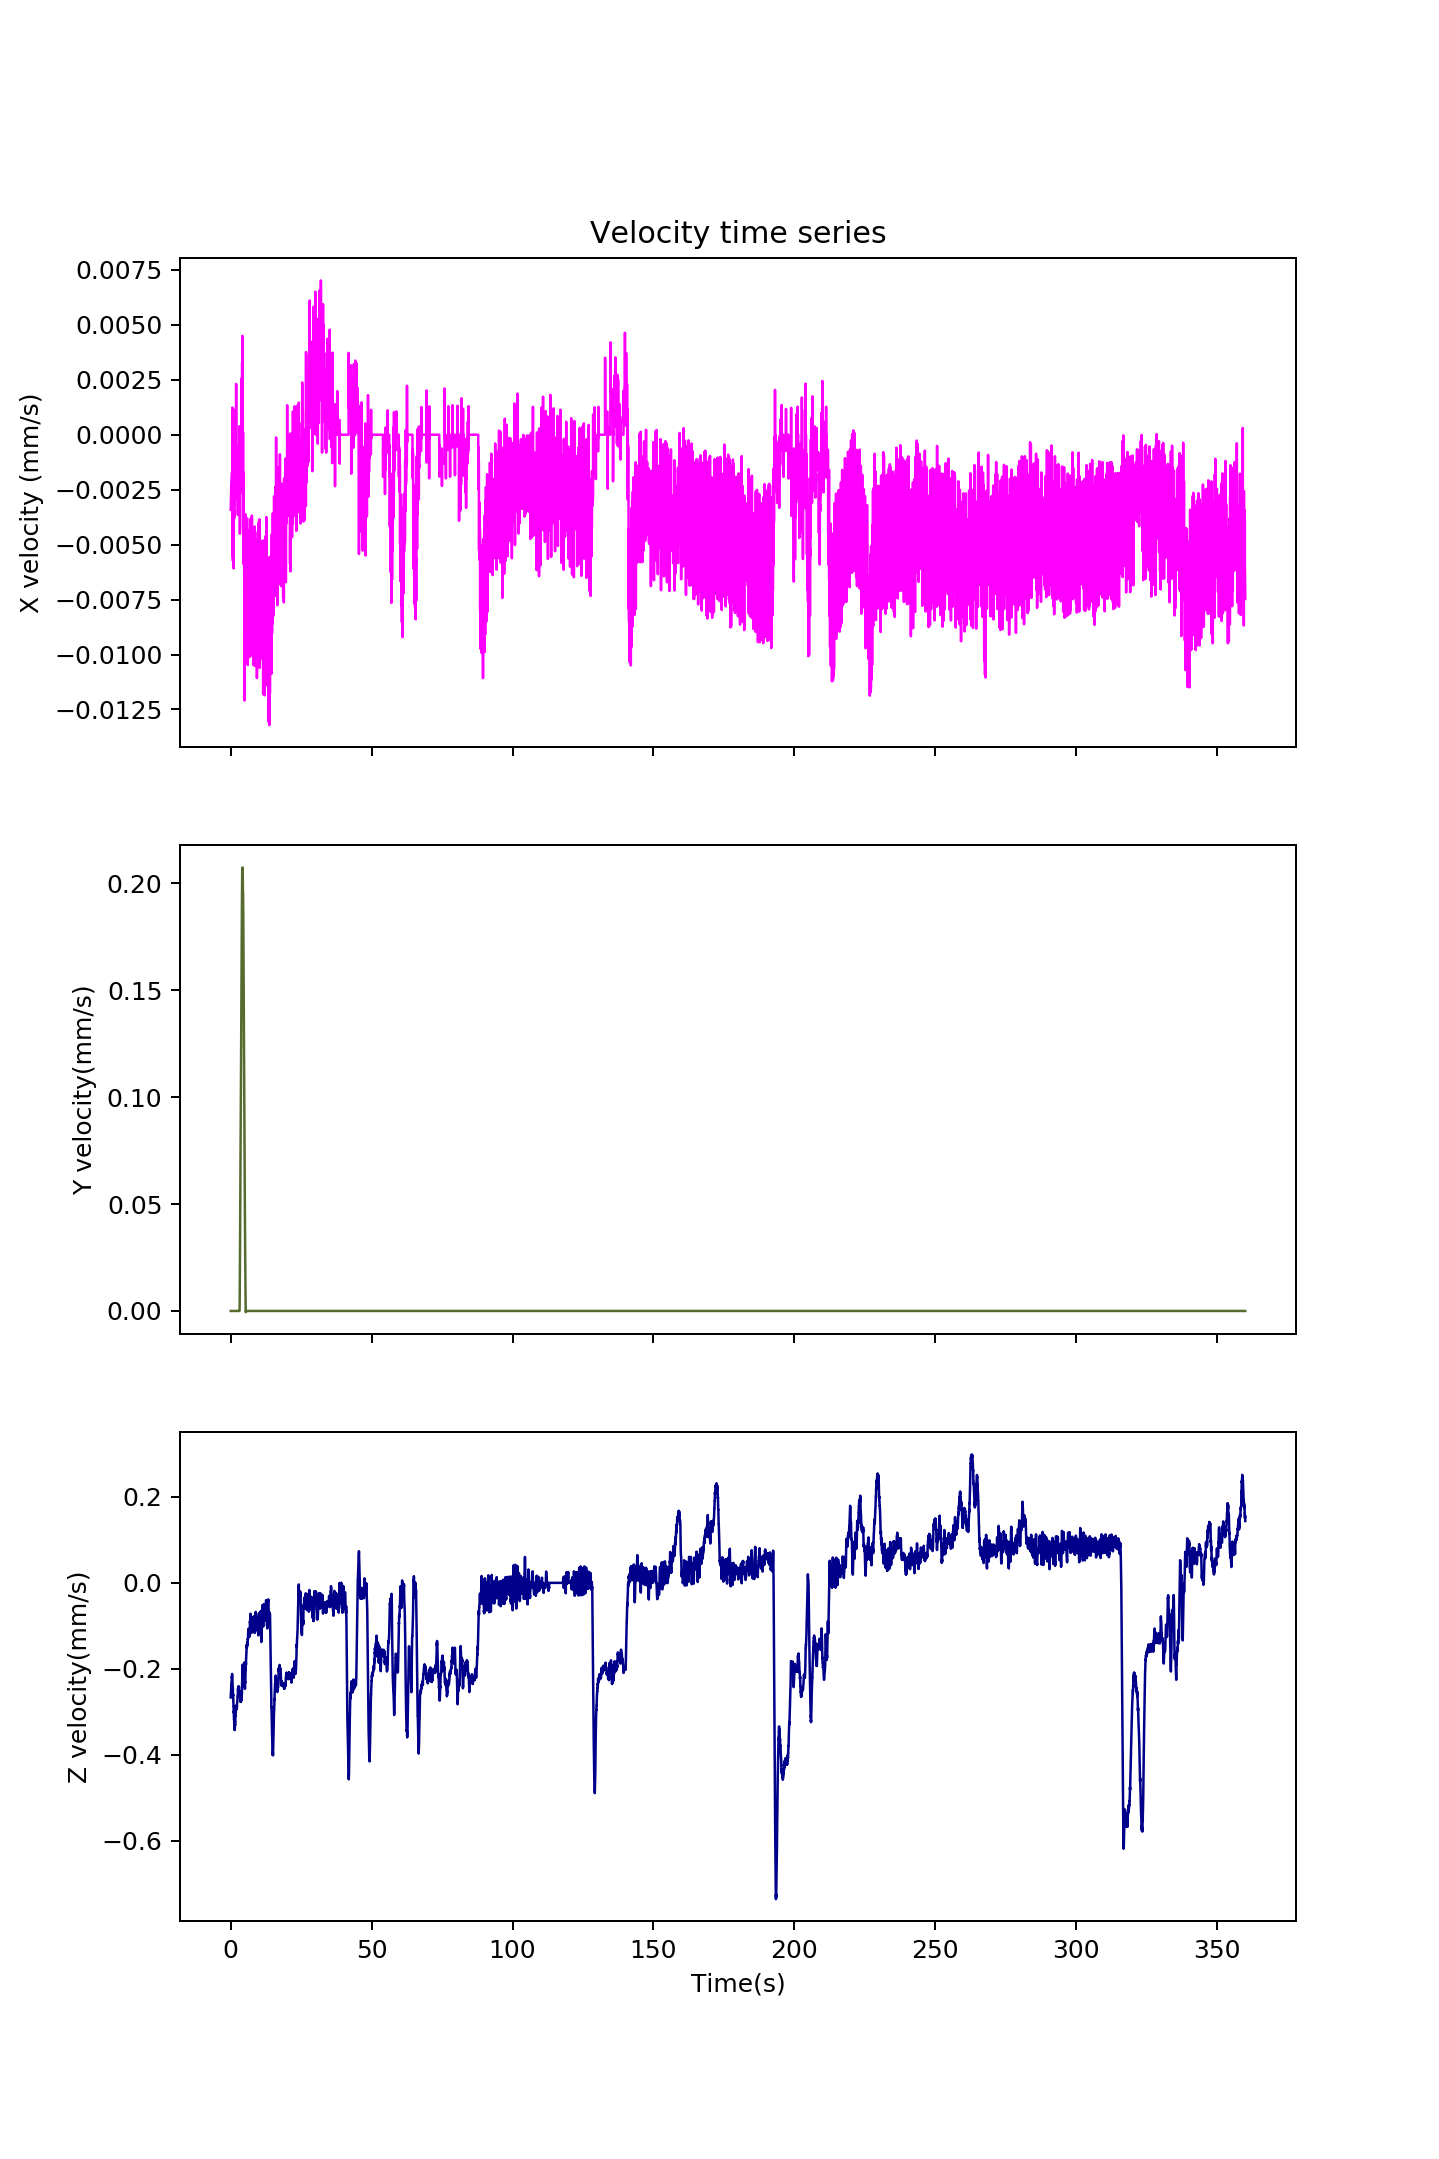

In [106]:
gm_analysis.plot_velocity_timeseries()

## Find the size of the object of interest

In [139]:
gm_analysis.set_color_thresholds()

Color thresholds available! 
 Loading file /Volumes/DEEPAK-1TB/PuertoRico_2018/GravityMachineData/2018_11_06/Tow_1/Centric_diatom_3_Good/colorThresholds.pkl ...
Color thresholds for segmentation: 
 LOW: (0, 0, 95), HIGH : (255, 255, 255)


In [140]:
gm_analysis.find_object_size()

Loading organism size from memory ...
**************************************************
object diameter 0.14117553735234936 mm
object diameter max 0.13979570425240098 mm
object diameter min 0.14255537045229774 mm
**************************************************


## Running PIV on a pair of frames

### PIV tests

--------------------------------------------------
Analyzing Frame pairs: Y4-S3_Camera000398.tif and Y4-S3_Camera000399.tif 

--------------------------------------------------
Max sig2noise: 6.12469501266967
Min sig2noise: 2.093752153785205
Mean sig2noise: 3.3882520697898606
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


<IPython.core.display.Javascript object>


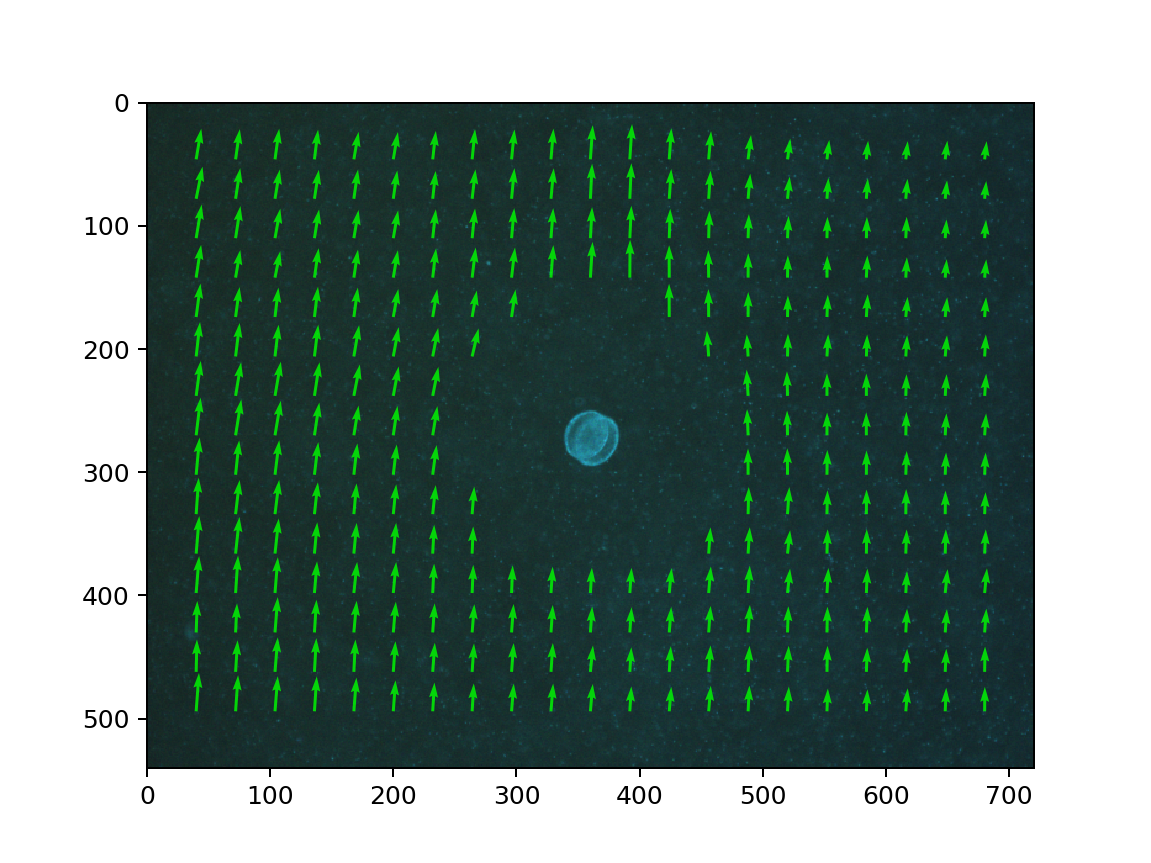

0.0005742785929070732
-0.0030779173270191027


(0.0005742785929070732,
 -0.0030779173270191027,
 0.0021156946615612056,
 0.004070364651808756)

In [137]:
""" PIV testing using test images
# Run PIV on a pair of test images to see if it works correctly.
"""
# Test 1
image_a, image_b = 'Y4-S3_Camera000398.tif', 'Y4-S3_Camera000399.tif'
# Test 2
# image_a, image_b = '2image_00.tif', '2image_01.tif'
# Test 3
# image_a, image_b = 'exp1_001_a.bmp', 'exp1_001_b.bmp'

gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a = image_a, image_b = image_b, test = True)

In [141]:
image_a = 'IMG_5000.tif'
image_b = 'IMG_5005.tif'
gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a, image_b, masking = True)

--------------------------------------------------
Analyzing Frame pairs: IMG_5000.tif and IMG_5005.tif 

--------------------------------------------------
Max sig2noise: 19.49463318695393
Min sig2noise: 2.984899349221355
Mean sig2noise: 5.065281053738734
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
[ 0  0 95]
[255 255 255]
No:of contours:1
0.0004830206436538666
0.005771354582655971


(0.0004830206436538666,
 0.005771354582655971,
 0.0003343766476119738,
 0.000973802243855597)

In [93]:
gm_analysis.piv_settings

{'window size': 64, 'overlap': 32, 'search area': 64, 'scale-factor': 5}

## Running PIV analysis to compute the object's velocity and displacement relative to the fluid

In [94]:
gm_analysis.compute_fluid_velocity_timeseries()

  0%|          | 1/4125 [00:00<13:15,  5.19it/s]

calculating fluid velocity time series ...
1
Consequtive images found ...
IMG_3878.tif
IMG_3879.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3878.tif and IMG_3879.tif 

--------------------------------------------------
Max sig2noise: 14.36294548841073
Min sig2noise: 2.948891260381824
Mean sig2noise: 5.143283407728414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015932817116838225
0.11691588419609525
1
Consequtive images found ...
IMG_3879.tif
IMG_3880.tif


  0%|          | 2/4125 [00:00<12:32,  5.48it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3879.tif and IMG_3880.tif 

--------------------------------------------------
Max sig2noise: 13.879336151408781
Min sig2noise: 3.0016112511873883
Mean sig2noise: 5.108050830421602
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.04093956433793149
0.06503180174496966
1
Consequtive images found ...
IMG_3880.tif
IMG_3881.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3880.tif and IMG_3881.tif 

--------------------------------------------------


  0%|          | 3/4125 [00:00<15:36,  4.40it/s]

Max sig2noise: 24.879851446029008
Min sig2noise: 2.6686328644753825
Mean sig2noise: 4.86824857172999
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.04146964052520466
0.1929488470988405
1
Consequtive images found ...
IMG_3881.tif
IMG_3882.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3881.tif and IMG_3882.tif 

--------------------------------------------------


  0%|          | 4/4125 [00:00<14:36,  4.70it/s]

Max sig2noise: 33.39152847708495
Min sig2noise: 2.8524483256849322
Mean sig2noise: 5.399747618007491
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.04311209674007094
0.044795465692021086
1
Consequtive images found ...
IMG_3882.tif
IMG_3883.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3882.tif and IMG_3883.tif 

--------------------------------------------------
Max sig2noise: 32.91602768821805
Min sig2noise: 2.5676263428723427
Mean sig2noise: 4.966162100348721
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  0%|          | 6/4125 [00:01<13:03,  5.26it/s]

-0.05276213024334081
0.24657338873602383
1
Consequtive images found ...
IMG_3883.tif
IMG_3884.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3883.tif and IMG_3884.tif 

--------------------------------------------------
Max sig2noise: 32.89863844029139
Min sig2noise: 2.9025827948728042
Mean sig2noise: 5.188491124069461
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.034077027176962045
0.08380543461389364
1
Consequtive images found ...
IMG_3884.tif
IMG_3885.tif


  0%|          | 7/4125 [00:01<12:40,  5.41it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3884.tif and IMG_3885.tif 

--------------------------------------------------
Max sig2noise: 32.56059737267048
Min sig2noise: 2.7837094848746236
Mean sig2noise: 5.217865933392468
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023174586512259127
0.15307958311923936
1
Consequtive images found ...
IMG_3885.tif
IMG_3886.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3885.tif and IMG_3886.tif 

--------------------------------------------------


  0%|          | 8/4125 [00:01<12:18,  5.57it/s]

Max sig2noise: 32.0531645245897
Min sig2noise: 2.7614806185956233
Mean sig2noise: 5.252279751097718
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031451257797864268
0.1484910239144285
1
Consequtive images found ...
IMG_3886.tif
IMG_3887.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3886.tif and IMG_3887.tif 

--------------------------------------------------
Max sig2noise: 32.149163146864105
Min sig2noise: 2.758696974476621
Mean sig2noise: 5.217102241996611
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  0%|          | 10/4125 [00:01<11:57,  5.74it/s]

-0.002971475709276019
0.12214004433384701
1
Consequtive images found ...
IMG_3887.tif
IMG_3888.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3887.tif and IMG_3888.tif 

--------------------------------------------------
Max sig2noise: 32.71258721912809
Min sig2noise: 2.9211024921774373
Mean sig2noise: 5.2517292616957665
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037995513971810432
0.13521735996358036
1
Consequtive images found ...
IMG_3888.tif
IMG_3889.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3888.tif and IMG_3889.tif 

--------------------------------------------------


  0%|          | 11/4125 [00:02<11:54,  5.76it/s]

Max sig2noise: 32.149836767541
Min sig2noise: 2.7882044186281965
Mean sig2noise: 5.377690720118269
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004074424439829412
0.12305617054507523
1
Consequtive images found ...
IMG_3889.tif
IMG_3890.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3889.tif and IMG_3890.tif 

--------------------------------------------------
Max sig2noise: 35.543965997255164
Min sig2noise: 2.8575564931141693
Mean sig2noise: 5.689289571407593
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  0%|          | 13/4125 [00:02<11:44,  5.84it/s]

0.002765861756072988
0.10343921921580697
1
Consequtive images found ...
IMG_3890.tif
IMG_3891.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3890.tif and IMG_3891.tif 

--------------------------------------------------
Max sig2noise: 34.700233362386484
Min sig2noise: 2.639016463308945
Mean sig2noise: 5.406710288741478
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026553739621142055
0.1286254990135005
1
Consequtive images found ...
IMG_3891.tif
IMG_3892.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3891.tif and IMG_3892.tif 

--------------------------------------------------


  0%|          | 15/4125 [00:02<11:45,  5.82it/s]

Max sig2noise: 35.36193406877918
Min sig2noise: 2.752363287166183
Mean sig2noise: 5.318050330873727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008565881945332065
0.14674320203172878
1
Consequtive images found ...
IMG_3892.tif
IMG_3893.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3892.tif and IMG_3893.tif 

--------------------------------------------------
Max sig2noise: 34.3525773825893
Min sig2noise: 2.826973869475523
Mean sig2noise: 5.411581391348141
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003372891817423824
0.1709023031756591
1
Consequtive images found ...
IMG_3893.tif
IMG_3894.tif


  0%|          | 16/4125 [00:02<11:46,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3893.tif and IMG_3894.tif 

--------------------------------------------------
Max sig2noise: 33.69268165143257
Min sig2noise: 2.67670274611727
Mean sig2noise: 5.215090859546834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022669197284045043
0.18803182104461044
1
Consequtive images found ...
IMG_3894.tif
IMG_3895.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3894.tif and IMG_3895.tif 

--------------------------------------------------


  0%|          | 17/4125 [00:03<11:40,  5.86it/s]

Max sig2noise: 34.80297496898254
Min sig2noise: 2.657361618542526
Mean sig2noise: 5.309269763635323
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026499593815549143
0.1673502341850771
1
Consequtive images found ...
IMG_3895.tif
IMG_3896.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3895.tif and IMG_3896.tif 

--------------------------------------------------
Max sig2noise: 33.43596142551779
Min sig2noise: 2.4502967223645467
Mean sig2noise: 5.043275017162305
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  0%|          | 19/4125 [00:03<11:43,  5.84it/s]

-0.0030488427550479347
0.1813842520149122
1
Consequtive images found ...
IMG_3896.tif
IMG_3897.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3896.tif and IMG_3897.tif 

--------------------------------------------------
Max sig2noise: 36.95335757715969
Min sig2noise: 2.439832349295128
Mean sig2noise: 5.25756963018595
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012339322436074908
0.18950893325574572
1
Consequtive images found ...
IMG_3897.tif
IMG_3898.tif


  0%|          | 20/4125 [00:03<11:39,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3897.tif and IMG_3898.tif 

--------------------------------------------------
Max sig2noise: 37.39126246757495
Min sig2noise: 2.7137984743050407
Mean sig2noise: 5.276643160442692
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003119902389605035
0.16084555534450368
1
Consequtive images found ...
IMG_3898.tif
IMG_3899.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3898.tif and IMG_3899.tif 

--------------------------------------------------


  1%|          | 21/4125 [00:03<11:36,  5.89it/s]

Max sig2noise: 35.90456597937752
Min sig2noise: 2.720623860487696
Mean sig2noise: 5.328571534189633
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00462550192378379
0.17672895820839085
1
Consequtive images found ...
IMG_3899.tif
IMG_3900.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3899.tif and IMG_3900.tif 

--------------------------------------------------
Max sig2noise: 35.50301099441398
Min sig2noise: 2.7320295552365854
Mean sig2noise: 5.326808284039861
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 23/4125 [00:04<11:40,  5.85it/s]

-0.0035772437338630818
0.1729373429756115
1
Consequtive images found ...
IMG_3900.tif
IMG_3901.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3900.tif and IMG_3901.tif 

--------------------------------------------------
Max sig2noise: 33.890663905202835
Min sig2noise: 2.736577977392187
Mean sig2noise: 5.2407815069583865
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036943586450244757
0.14523236673657364
1
Consequtive images found ...
IMG_3901.tif
IMG_3902.tif


  1%|          | 24/4125 [00:04<11:40,  5.85it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3901.tif and IMG_3902.tif 

--------------------------------------------------
Max sig2noise: 33.7302911077118
Min sig2noise: 2.6866935935983003
Mean sig2noise: 4.982475914375717
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013592791313206114
0.1926259095884398
1
Consequtive images found ...
IMG_3902.tif
IMG_3903.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3902.tif and IMG_3903.tif 

--------------------------------------------------


  1%|          | 25/4125 [00:04<11:38,  5.87it/s]

Max sig2noise: 36.562441982912475
Min sig2noise: 2.6101771207828137
Mean sig2noise: 5.189520886692716
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003861255295425735
0.15617208596956128
1
Consequtive images found ...
IMG_3903.tif
IMG_3904.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3903.tif and IMG_3904.tif 

--------------------------------------------------
Max sig2noise: 35.34553548123218
Min sig2noise: 2.8587535381969866
Mean sig2noise: 5.293308557674494
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 27/4125 [00:04<11:39,  5.86it/s]

-0.0034181916988792094
0.17758547456625373
1
Consequtive images found ...
IMG_3904.tif
IMG_3905.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3904.tif and IMG_3905.tif 

--------------------------------------------------
Max sig2noise: 35.18813509034606
Min sig2noise: 2.9746349286739258
Mean sig2noise: 5.504706893850974
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004948167362377373
0.16632864307306763
1
Consequtive images found ...
IMG_3905.tif
IMG_3906.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3905.tif and IMG_3906.tif 

--------------------------------------------------


  1%|          | 29/4125 [00:05<11:39,  5.86it/s]

Max sig2noise: 33.33443971386937
Min sig2noise: 2.7756777798380465
Mean sig2noise: 5.174759102438271
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025146834933119457
0.17955851723413177
1
Consequtive images found ...
IMG_3906.tif
IMG_3907.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3906.tif and IMG_3907.tif 

--------------------------------------------------
Max sig2noise: 32.87439507154442
Min sig2noise: 2.7186800818439076
Mean sig2noise: 5.262437844628511
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00017503316251931122
0.1759177957307751
1
Consequtive images found ...
IMG_3907.tif
IMG_3908.tif


  1%|          | 30/4125 [00:05<11:43,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3907.tif and IMG_3908.tif 

--------------------------------------------------
Max sig2noise: 32.57355207952092
Min sig2noise: 2.802565801041736
Mean sig2noise: 5.235814141697418
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003290741607960944
0.1739973009404255
1
Consequtive images found ...
IMG_3908.tif
IMG_3909.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3908.tif and IMG_3909.tif 

--------------------------------------------------


  1%|          | 31/4125 [00:05<11:43,  5.82it/s]

Max sig2noise: 32.59792787018303
Min sig2noise: 2.768839722255416
Mean sig2noise: 5.192973040035669
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023010964971103896
0.15253527220446067
1
Consequtive images found ...
IMG_3909.tif
IMG_3910.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3909.tif and IMG_3910.tif 

--------------------------------------------------
Max sig2noise: 33.85398428613796
Min sig2noise: 2.761921149679832
Mean sig2noise: 5.328944946645003
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 33/4125 [00:05<11:35,  5.88it/s]

-0.004580069639075295
0.17357216794358693
1
Consequtive images found ...
IMG_3910.tif
IMG_3911.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3910.tif and IMG_3911.tif 

--------------------------------------------------
Max sig2noise: 34.219512272133905
Min sig2noise: 2.6736182651467817
Mean sig2noise: 5.272995905836877
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004250341949448752
0.16426869203602662
1
Consequtive images found ...
IMG_3911.tif
IMG_3912.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3911.tif and IMG_3912.tif 

--------------------------------------------------


  1%|          | 34/4125 [00:05<11:34,  5.89it/s]

Max sig2noise: 34.59567762557714
Min sig2noise: 2.801789019642856
Mean sig2noise: 5.337770909657212
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003121918999622306
0.14173894454651306
1
Consequtive images found ...
IMG_3912.tif
IMG_3913.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3912.tif and IMG_3913.tif 

--------------------------------------------------
Max sig2noise: 33.25621579378987
Min sig2noise: 2.7031532293586094
Mean sig2noise: 5.284994708870535
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 36/4125 [00:06<11:39,  5.84it/s]

0.0011074648130891937
0.17185802639098102
1
Consequtive images found ...
IMG_3913.tif
IMG_3914.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3913.tif and IMG_3914.tif 

--------------------------------------------------
Max sig2noise: 31.1266604359141
Min sig2noise: 2.721712822604808
Mean sig2noise: 5.344135865762431
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024383824403397722
0.14521815600868213
1
Consequtive images found ...
IMG_3914.tif
IMG_3915.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3914.tif and IMG_3915.tif 

--------------------------------------------------


  1%|          | 37/4125 [00:06<11:40,  5.84it/s]

Max sig2noise: 31.206501519262154
Min sig2noise: 2.7971845851737647
Mean sig2noise: 5.138214734844497
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015639931154174647
0.15655263605865513
1
Consequtive images found ...
IMG_3915.tif
IMG_3916.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3915.tif and IMG_3916.tif 

--------------------------------------------------
Max sig2noise: 32.4893252532345
Min sig2noise: 2.8394358257259587
Mean sig2noise: 5.455179593852161
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 39/4125 [00:06<11:35,  5.87it/s]

-0.0029303517786102816
0.14364322426566278
1
Consequtive images found ...
IMG_3916.tif
IMG_3917.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3916.tif and IMG_3917.tif 

--------------------------------------------------
Max sig2noise: 31.18210518370974
Min sig2noise: 2.8464993881922376
Mean sig2noise: 5.1588021378572835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007715578221319753
0.158991873993655
1
Consequtive images found ...
IMG_3917.tif
IMG_3918.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3917.tif and IMG_3918.tif 

--------------------------------------------------


  1%|          | 40/4125 [00:06<11:36,  5.87it/s]

Max sig2noise: 30.821918707250774
Min sig2noise: 2.882639825868009
Mean sig2noise: 5.307864682609938
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001970108098515678
0.16485473321679303
1
Consequtive images found ...
IMG_3918.tif
IMG_3919.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3918.tif and IMG_3919.tif 

--------------------------------------------------
Max sig2noise: 31.30480104280556
Min sig2noise: 2.9933038428166103
Mean sig2noise: 5.235329014775289
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 42/4125 [00:07<11:33,  5.89it/s]

-0.0040271788516981905
0.17311067935539634
1
Consequtive images found ...
IMG_3919.tif
IMG_3920.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3919.tif and IMG_3920.tif 

--------------------------------------------------
Max sig2noise: 29.99537998107143
Min sig2noise: 2.845015491484117
Mean sig2noise: 5.34158627892355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001763027256950616
0.17649870993810807
1
Consequtive images found ...
IMG_3920.tif
IMG_3921.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3920.tif and IMG_3921.tif 

--------------------------------------------------


  1%|          | 43/4125 [00:07<11:46,  5.78it/s]

Max sig2noise: 29.671753828763798
Min sig2noise: 2.8839364972401977
Mean sig2noise: 5.161993665498027
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00758495081108654
0.17745559703324576
1
Consequtive images found ...
IMG_3921.tif
IMG_3922.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3921.tif and IMG_3922.tif 

--------------------------------------------------
Max sig2noise: 30.1390697245544
Min sig2noise: 2.839908695416897
Mean sig2noise: 5.086885008269054
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 45/4125 [00:07<11:55,  5.70it/s]

0.004640077260155281
0.16282774740543782
1
Consequtive images found ...
IMG_3922.tif
IMG_3923.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3922.tif and IMG_3923.tif 

--------------------------------------------------
Max sig2noise: 31.119416447935794
Min sig2noise: 2.761471622568455
Mean sig2noise: 5.208442156860638
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005414693451962724
0.14795149077106368
1
Consequtive images found ...
IMG_3923.tif
IMG_3924.tif


  1%|          | 46/4125 [00:08<12:04,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3923.tif and IMG_3924.tif 

--------------------------------------------------
Max sig2noise: 29.905992948742554
Min sig2noise: 2.888000730679962
Mean sig2noise: 5.129115824135171
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009110836546547556
0.17854021059180494
1
Consequtive images found ...
IMG_3924.tif
IMG_3925.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3924.tif and IMG_3925.tif 

--------------------------------------------------


  1%|          | 47/4125 [00:08<12:10,  5.58it/s]

Max sig2noise: 27.071502400236458
Min sig2noise: 2.5164721761749695
Mean sig2noise: 5.069255510552353
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003957185923420706
0.1426234999993762
1
Consequtive images found ...
IMG_3925.tif
IMG_3926.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3925.tif and IMG_3926.tif 

--------------------------------------------------
Max sig2noise: 22.53791921209477
Min sig2noise: 2.50962139075553
Mean sig2noise: 4.891529461550904
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|          | 49/4125 [00:08<11:52,  5.72it/s]

-0.00191747967729222
0.17389027665732346
1
Consequtive images found ...
IMG_3926.tif
IMG_3927.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3926.tif and IMG_3927.tif 

--------------------------------------------------
Max sig2noise: 18.327724347494136
Min sig2noise: 2.52367428391201
Mean sig2noise: 4.985038350858737
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006331079832786568
0.16831967227145614
1
Consequtive images found ...
IMG_3927.tif
IMG_3928.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3927.tif and IMG_3928.tif 

--------------------------------------------------


  1%|          | 50/4125 [00:08<11:50,  5.74it/s]

Max sig2noise: 15.115590376430621
Min sig2noise: 2.5875181947014982
Mean sig2noise: 5.063327377625388
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013344349847629019
0.1449959082447328
1
Consequtive images found ...
IMG_3928.tif
IMG_3929.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3928.tif and IMG_3929.tif 

--------------------------------------------------
Max sig2noise: 16.560327973252914
Min sig2noise: 2.584706815348722
Mean sig2noise: 4.932408360767782
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|▏         | 52/4125 [00:09<12:23,  5.48it/s]

-3.801224427312101e-05
0.1699799418314989
1
Consequtive images found ...
IMG_3929.tif
IMG_3930.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3929.tif and IMG_3930.tif 

--------------------------------------------------
Max sig2noise: 13.820410078128917
Min sig2noise: 2.5448179532622897
Mean sig2noise: 4.578739893941303
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.043134719608242805
0.22108506195922206


  1%|▏         | 53/4125 [00:09<12:31,  5.42it/s]

1
Consequtive images found ...
IMG_3930.tif
IMG_3931.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3930.tif and IMG_3931.tif 

--------------------------------------------------
Max sig2noise: 18.44960836257282
Min sig2noise: 2.761879809926325
Mean sig2noise: 4.715511698821554
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009030701643427418
0.15715722138477545
1
Consequtive images found ...
IMG_3931.tif
IMG_3932.tif


  1%|▏         | 54/4125 [00:09<12:12,  5.56it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3931.tif and IMG_3932.tif 

--------------------------------------------------
Max sig2noise: 19.786080538481855
Min sig2noise: 2.7744538838306165
Mean sig2noise: 4.83462306493515
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016149680209912327
0.10317951555942041
1
Consequtive images found ...
IMG_3932.tif
IMG_3933.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3932.tif and IMG_3933.tif 

--------------------------------------------------


  1%|▏         | 55/4125 [00:09<12:00,  5.65it/s]

Max sig2noise: 17.50606225281874
Min sig2noise: 2.9705557464268075
Mean sig2noise: 5.099478808290435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.04348340866159848
0.03216343670894481
1
Consequtive images found ...
IMG_3933.tif
IMG_3934.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3933.tif and IMG_3934.tif 

--------------------------------------------------
Max sig2noise: 25.18998549258097
Min sig2noise: 2.979979313251443
Mean sig2noise: 5.226507007257344
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|▏         | 57/4125 [00:09<11:41,  5.80it/s]

-0.006041879105036579
0.11673363085099539
1
Consequtive images found ...
IMG_3934.tif
IMG_3935.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3934.tif and IMG_3935.tif 

--------------------------------------------------
Max sig2noise: 23.917734002530437
Min sig2noise: 2.7709719516521445
Mean sig2noise: 5.107732037519383
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00495263059943037
0.11172886126162239
1
Consequtive images found ...
IMG_3935.tif
IMG_3936.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3935.tif and IMG_3936.tif 

--------------------------------------------------


  1%|▏         | 58/4125 [00:10<11:59,  5.65it/s]

Max sig2noise: 18.085602302017715
Min sig2noise: 2.911854762442306
Mean sig2noise: 4.969948482680736
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011571534457253356
0.13650060035196285
1
Consequtive images found ...
IMG_3936.tif
IMG_3937.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3936.tif and IMG_3937.tif 

--------------------------------------------------
Max sig2noise: 18.03626220177451
Min sig2noise: 2.9510726537361083
Mean sig2noise: 5.038275415762666
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  1%|▏         | 60/4125 [00:10<12:11,  5.56it/s]

0.0018082629047129106
0.1300430447987597
1
Consequtive images found ...
IMG_3937.tif
IMG_3938.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3937.tif and IMG_3938.tif 

--------------------------------------------------
Max sig2noise: 18.657300866716312
Min sig2noise: 3.0225658647434304
Mean sig2noise: 5.056234744990398
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00045753229241193356
0.12515323154160965
1
Consequtive images found ...
IMG_3938.tif
IMG_3939.tif


  1%|▏         | 61/4125 [00:10<12:08,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3938.tif and IMG_3939.tif 

--------------------------------------------------
Max sig2noise: 18.299216024186432
Min sig2noise: 2.881243156475262
Mean sig2noise: 5.21329260552067
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016848936857867282
0.11183151539401398
1
Consequtive images found ...
IMG_3939.tif
IMG_3940.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3939.tif and IMG_3940.tif 

--------------------------------------------------


  2%|▏         | 62/4125 [00:10<11:59,  5.64it/s]

Max sig2noise: 17.363374658718936
Min sig2noise: 2.892872985822827
Mean sig2noise: 5.02897204381797
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-2.8653343142196977e-05
0.11846512012957236
1
Consequtive images found ...
IMG_3940.tif
IMG_3941.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3940.tif and IMG_3941.tif 

--------------------------------------------------
Max sig2noise: 16.584844590621653
Min sig2noise: 2.733735250126306
Mean sig2noise: 4.953401081828405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 64/4125 [00:11<11:58,  5.65it/s]

-0.003359464335865306
0.1267134398146611
1
Consequtive images found ...
IMG_3941.tif
IMG_3942.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3941.tif and IMG_3942.tif 

--------------------------------------------------
Max sig2noise: 17.139995579651032
Min sig2noise: 2.994256422845809
Mean sig2noise: 5.073818791169383
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005554627101568885
0.09965172867122568
1
Consequtive images found ...
IMG_3942.tif
IMG_3943.tif


  2%|▏         | 65/4125 [00:11<11:48,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3942.tif and IMG_3943.tif 

--------------------------------------------------
Max sig2noise: 16.866177300612932
Min sig2noise: 3.014987589487551
Mean sig2noise: 5.007153322983983
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0043220299268636264
0.12203495474943725
1
Consequtive images found ...
IMG_3943.tif
IMG_3944.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3943.tif and IMG_3944.tif 

--------------------------------------------------


  2%|▏         | 66/4125 [00:11<11:36,  5.83it/s]

Max sig2noise: 16.99939914061961
Min sig2noise: 3.046834757925104
Mean sig2noise: 5.140508347836387
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005263749936265966
0.11015737083012099
1
Consequtive images found ...
IMG_3944.tif
IMG_3945.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3944.tif and IMG_3945.tif 

--------------------------------------------------
Max sig2noise: 16.746615250246624
Min sig2noise: 3.042259910587106
Mean sig2noise: 5.076940621837356
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 68/4125 [00:11<11:25,  5.92it/s]

0.008694901525869273
0.10040413772807466
1
Consequtive images found ...
IMG_3945.tif
IMG_3946.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3945.tif and IMG_3946.tif 

--------------------------------------------------
Max sig2noise: 16.026868017621247
Min sig2noise: 2.81997748623047
Mean sig2noise: 5.1046968046015655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00046374819657670104
0.10995007832236095
1
Consequtive images found ...
IMG_3946.tif
IMG_3947.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3946.tif and IMG_3947.tif 

--------------------------------------------------


  2%|▏         | 69/4125 [00:12<11:21,  5.95it/s]

Max sig2noise: 15.643025001125283
Min sig2noise: 2.710500362118382
Mean sig2noise: 4.84774985011941
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008987544855747527
0.11114241391337425
1
Consequtive images found ...
IMG_3947.tif
IMG_3948.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3947.tif and IMG_3948.tif 

--------------------------------------------------
Max sig2noise: 15.746394325424424
Min sig2noise: 2.842528133793084
Mean sig2noise: 5.113212120295924
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 71/4125 [00:12<11:33,  5.85it/s]

0.00020157571078202068
0.09824191511132241
1
Consequtive images found ...
IMG_3948.tif
IMG_3949.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3948.tif and IMG_3949.tif 

--------------------------------------------------
Max sig2noise: 15.96953283630013
Min sig2noise: 2.813254006791477
Mean sig2noise: 5.069879937201379
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001296348717333648
0.11279596986198707
1
Consequtive images found ...
IMG_3949.tif
IMG_3950.tif


  2%|▏         | 72/4125 [00:12<11:27,  5.90it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3949.tif and IMG_3950.tif 

--------------------------------------------------
Max sig2noise: 16.931392315234124
Min sig2noise: 2.7356802948692343
Mean sig2noise: 5.086181953058568
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006348863799092006
0.061192935744586334
1
Consequtive images found ...
IMG_3950.tif
IMG_3951.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3950.tif and IMG_3951.tif 

--------------------------------------------------


  2%|▏         | 73/4125 [00:12<11:25,  5.91it/s]

Max sig2noise: 16.7050560441433
Min sig2noise: 2.820442654526766
Mean sig2noise: 5.194522107594673
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0047811190800331445
0.0968813659293748
1
Consequtive images found ...
IMG_3951.tif
IMG_3952.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3951.tif and IMG_3952.tif 

--------------------------------------------------
Max sig2noise: 16.330414170312547
Min sig2noise: 2.9368887663759398
Mean sig2noise: 5.2664762274225
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 75/4125 [00:13<11:17,  5.98it/s]

-0.0034215286482926813
0.07299446708837432
1
Consequtive images found ...
IMG_3952.tif
IMG_3953.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3952.tif and IMG_3953.tif 

--------------------------------------------------
Max sig2noise: 16.060580289880985
Min sig2noise: 3.0437811313310648
Mean sig2noise: 5.0526664817342875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00038318565318297914
0.08606713621202632
1
Consequtive images found ...
IMG_3953.tif
IMG_3954.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3953.tif and IMG_3954.tif 

--------------------------------------------------


  2%|▏         | 76/4125 [00:13<11:18,  5.97it/s]

Max sig2noise: 15.670023099604176
Min sig2noise: 2.8692197538669038
Mean sig2noise: 5.08951810356676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029594185697176608
0.10633259589961769
1
Consequtive images found ...
IMG_3954.tif
IMG_3955.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3954.tif and IMG_3955.tif 

--------------------------------------------------
Max sig2noise: 15.691623793171372
Min sig2noise: 3.128664795476612
Mean sig2noise: 5.01677063176589
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 78/4125 [00:13<11:10,  6.04it/s]

0.006213505201741717
0.08250125476573533
1
Consequtive images found ...
IMG_3955.tif
IMG_3956.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3955.tif and IMG_3956.tif 

--------------------------------------------------
Max sig2noise: 15.666528405659028
Min sig2noise: 3.119309725935491
Mean sig2noise: 5.021381714970609
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0063434218338404725
0.08190501880216876
1
Consequtive images found ...
IMG_3956.tif
IMG_3957.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3956.tif and IMG_3957.tif 

--------------------------------------------------


  2%|▏         | 79/4125 [00:13<11:18,  5.97it/s]

Max sig2noise: 15.820863468087827
Min sig2noise: 3.040474947698084
Mean sig2noise: 5.034633923907922
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004644556701769045
0.08445749930199226
1
Consequtive images found ...
IMG_3957.tif
IMG_3958.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3957.tif and IMG_3958.tif 

--------------------------------------------------
Max sig2noise: 15.655997581109757
Min sig2noise: 3.12837400682462
Mean sig2noise: 5.049065120202079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 81/4125 [00:14<11:17,  5.97it/s]

0.004662919626888875
0.08150729560916962
1
Consequtive images found ...
IMG_3958.tif
IMG_3959.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3958.tif and IMG_3959.tif 

--------------------------------------------------
Max sig2noise: 15.370637602950055
Min sig2noise: 3.0348837712884045
Mean sig2noise: 5.1081172663996375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0040705026997874235
0.0814624715723817
1
Consequtive images found ...
IMG_3959.tif
IMG_3960.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3959.tif and IMG_3960.tif 

--------------------------------------------------


  2%|▏         | 82/4125 [00:14<11:17,  5.96it/s]

Max sig2noise: 15.901625961852085
Min sig2noise: 3.1814544505138045
Mean sig2noise: 5.252230025534245
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0044275934046417685
0.06498520872157199
1
Consequtive images found ...
IMG_3960.tif
IMG_3961.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3960.tif and IMG_3961.tif 

--------------------------------------------------
Max sig2noise: 15.74543275702243
Min sig2noise: 3.167643486024082
Mean sig2noise: 5.026862566437285
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 84/4125 [00:14<12:51,  5.24it/s]

0.012196836877253342
0.06642737498391099
1
Consequtive images found ...
IMG_3961.tif
IMG_3962.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3961.tif and IMG_3962.tif 

--------------------------------------------------
Max sig2noise: 16.17675063911046
Min sig2noise: 2.8987061836612322
Mean sig2noise: 5.264768989435681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0042688859239451765
0.07354090477292852
1
Consequtive images found ...
IMG_3962.tif
IMG_3963.tif


  2%|▏         | 85/4125 [00:14<12:16,  5.49it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3962.tif and IMG_3963.tif 

--------------------------------------------------
Max sig2noise: 16.516965279144696
Min sig2noise: 3.033191839780162
Mean sig2noise: 5.241980328756169
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005748287814979955
0.07337274463087567
1
Consequtive images found ...
IMG_3963.tif
IMG_3964.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3963.tif and IMG_3964.tif 

--------------------------------------------------


  2%|▏         | 86/4125 [00:15<11:58,  5.63it/s]

Max sig2noise: 16.75594004302088
Min sig2noise: 3.1686827368950934
Mean sig2noise: 5.270302438911939
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005265750605499127
0.07415244740350699
1
Consequtive images found ...
IMG_3964.tif
IMG_3965.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3964.tif and IMG_3965.tif 

--------------------------------------------------
Max sig2noise: 16.648063355238776
Min sig2noise: 3.1256044631909585
Mean sig2noise: 4.966064131656947
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 88/4125 [00:15<11:35,  5.81it/s]

0.011107398089562088
0.059445472204918276
1
Consequtive images found ...
IMG_3965.tif
IMG_3966.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3965.tif and IMG_3966.tif 

--------------------------------------------------
Max sig2noise: 16.77328455082115
Min sig2noise: 3.2029389024823818
Mean sig2noise: 5.135324363531402
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00026292005646274446
0.048830004060515034
1
Consequtive images found ...
IMG_3966.tif
IMG_3967.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3966.tif and IMG_3967.tif 

--------------------------------------------------


  2%|▏         | 89/4125 [00:15<11:28,  5.86it/s]

Max sig2noise: 16.96154631055354
Min sig2noise: 3.1899097622757657
Mean sig2noise: 5.091504266078025
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022769742024595467
0.05290121866165772
1
Consequtive images found ...
IMG_3967.tif
IMG_3968.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3967.tif and IMG_3968.tif 

--------------------------------------------------
Max sig2noise: 16.644823281618134
Min sig2noise: 3.0739422087199495
Mean sig2noise: 5.095173017076719
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 91/4125 [00:15<11:19,  5.94it/s]

-0.003069437542488997
0.07837167160024806
1
Consequtive images found ...
IMG_3968.tif
IMG_3969.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3968.tif and IMG_3969.tif 

--------------------------------------------------
Max sig2noise: 17.08391729073643
Min sig2noise: 3.1091809277369795
Mean sig2noise: 5.142609102759675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00525653487800028
0.07461758825824162
1
Consequtive images found ...
IMG_3969.tif
IMG_3970.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3969.tif and IMG_3970.tif 

--------------------------------------------------


  2%|▏         | 92/4125 [00:16<11:21,  5.92it/s]

Max sig2noise: 17.466308056783618
Min sig2noise: 3.2114815426882997
Mean sig2noise: 5.217143461187085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004016713525976815
0.0686307397515009
1
Consequtive images found ...
IMG_3970.tif
IMG_3971.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3970.tif and IMG_3971.tif 

--------------------------------------------------
Max sig2noise: 17.809123949747626
Min sig2noise: 3.224717355363352
Mean sig2noise: 5.212323659154442
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 94/4125 [00:16<11:14,  5.97it/s]

0.004921577650625617
0.06202204391957279
1
Consequtive images found ...
IMG_3971.tif
IMG_3972.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3971.tif and IMG_3972.tif 

--------------------------------------------------
Max sig2noise: 18.035457449058715
Min sig2noise: 3.2723983191396875
Mean sig2noise: 5.321816048832845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0045141223509532515
0.06561743610569379
1
Consequtive images found ...
IMG_3972.tif
IMG_3973.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3972.tif and IMG_3973.tif 

--------------------------------------------------


  2%|▏         | 96/4125 [00:16<11:16,  5.95it/s]

Max sig2noise: 18.251847201288275
Min sig2noise: 3.3087230458947756
Mean sig2noise: 5.265612343936422
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013433420056688202
0.06118275935874335
1
Consequtive images found ...
IMG_3973.tif
IMG_3974.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3973.tif and IMG_3974.tif 

--------------------------------------------------
Max sig2noise: 18.29866023170943
Min sig2noise: 3.1953908611062256
Mean sig2noise: 5.080694834100535
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005898631202273971
0.05201756138126567
1
Consequtive images found ...
IMG_3974.tif
IMG_3975.tif


  2%|▏         | 97/4125 [00:16<11:14,  5.97it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3974.tif and IMG_3975.tif 

--------------------------------------------------
Max sig2noise: 18.65601351549966
Min sig2noise: 3.1648805972642924
Mean sig2noise: 5.420279619987577
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003096380505389863
0.049673647315900404
1
Consequtive images found ...
IMG_3975.tif
IMG_3976.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3975.tif and IMG_3976.tif 

--------------------------------------------------


  2%|▏         | 98/4125 [00:17<11:15,  5.96it/s]

Max sig2noise: 18.66632115907047
Min sig2noise: 3.073040391762073
Mean sig2noise: 5.039786376562366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008096132547024838
0.061229208066682764
1
Consequtive images found ...
IMG_3976.tif
IMG_3977.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3976.tif and IMG_3977.tif 

--------------------------------------------------
Max sig2noise: 19.099049923963804
Min sig2noise: 3.2017463449969985
Mean sig2noise: 5.40559332948214
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  2%|▏         | 100/4125 [00:17<11:15,  5.96it/s]

-0.0020209703873925637
0.04674823372367288
1
Consequtive images found ...
IMG_3977.tif
IMG_3978.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3977.tif and IMG_3978.tif 

--------------------------------------------------
Max sig2noise: 19.381615482186188
Min sig2noise: 3.0592865187361395
Mean sig2noise: 5.130175780295714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00037987735484068985
0.06118930217268218
1
Consequtive images found ...
IMG_3978.tif
IMG_3979.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3978.tif and IMG_3979.tif 

--------------------------------------------------


  2%|▏         | 102/4125 [00:17<11:16,  5.94it/s]

Max sig2noise: 19.577136336568365
Min sig2noise: 2.9163741030133354
Mean sig2noise: 4.801888288523576
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.016178731151836673
0.05047975970776829
1
Consequtive images found ...
IMG_3979.tif
IMG_3980.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3979.tif and IMG_3980.tif 

--------------------------------------------------
Max sig2noise: 19.57024890735501
Min sig2noise: 3.11625753406613
Mean sig2noise: 5.1686009542908895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035473622426542267
0.05390757699209609
1
Consequtive images found ...
IMG_3980.tif
IMG_3981.tif


  2%|▏         | 103/4125 [00:17<11:16,  5.94it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3980.tif and IMG_3981.tif 

--------------------------------------------------
Max sig2noise: 19.655869650090086
Min sig2noise: 3.105476042183581
Mean sig2noise: 5.2995492120965215
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0060951899606459265
0.050136096985734166
1
Consequtive images found ...
IMG_3981.tif
IMG_3982.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3981.tif and IMG_3982.tif 

--------------------------------------------------


  3%|▎         | 104/4125 [00:18<11:14,  5.96it/s]

Max sig2noise: 19.65503059316427
Min sig2noise: 3.0663483148803663
Mean sig2noise: 5.1580013564478255
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006045192814056948
0.0627942852093742
1
Consequtive images found ...
IMG_3982.tif
IMG_3983.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3982.tif and IMG_3983.tif 

--------------------------------------------------
Max sig2noise: 19.73294127895838
Min sig2noise: 3.1145040700137923
Mean sig2noise: 5.276677582120565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 106/4125 [00:18<11:13,  5.97it/s]

-0.002731780484034098
0.0599907749413011
1
Consequtive images found ...
IMG_3983.tif
IMG_3984.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3983.tif and IMG_3984.tif 

--------------------------------------------------
Max sig2noise: 19.81072957821584
Min sig2noise: 2.9518628550483323
Mean sig2noise: 4.888260588020676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014455580708822597
0.058842533093704116
1
Consequtive images found ...
IMG_3984.tif
IMG_3985.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3984.tif and IMG_3985.tif 

--------------------------------------------------


  3%|▎         | 108/4125 [00:18<11:17,  5.93it/s]

Max sig2noise: 20.392077181759383
Min sig2noise: 2.9784395049241272
Mean sig2noise: 5.253085665263784
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005327659092071983
0.06944229950544682
1
Consequtive images found ...
IMG_3985.tif
IMG_3986.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3985.tif and IMG_3986.tif 

--------------------------------------------------
Max sig2noise: 20.616171437874335
Min sig2noise: 3.067437511365888
Mean sig2noise: 5.199809695206344
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006488178766469819
0.0459266858598271
1
Consequtive images found ...
IMG_3986.tif
IMG_3987.tif


  3%|▎         | 109/4125 [00:18<11:09,  6.00it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3986.tif and IMG_3987.tif 

--------------------------------------------------
Max sig2noise: 20.36563985816357
Min sig2noise: 3.1530061626765113
Mean sig2noise: 5.285185307709729
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007307820257722597
0.027362250361484045
1
Consequtive images found ...
IMG_3987.tif
IMG_3988.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3987.tif and IMG_3988.tif 

--------------------------------------------------


  3%|▎         | 111/4125 [00:19<11:18,  5.91it/s]

Max sig2noise: 19.9248206061326
Min sig2noise: 3.1783477058418286
Mean sig2noise: 5.177523277389104
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005619901771479163
0.020082940884512984
1
Consequtive images found ...
IMG_3988.tif
IMG_3989.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3988.tif and IMG_3989.tif 

--------------------------------------------------
Max sig2noise: 20.496388925220238
Min sig2noise: 3.1124287891578657
Mean sig2noise: 5.231177591886382
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009172679330266552
0.03266683082270226
1
Consequtive images found ...
IMG_3989.tif
IMG_3990.tif


  3%|▎         | 112/4125 [00:19<11:10,  5.99it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3989.tif and IMG_3990.tif 

--------------------------------------------------
Max sig2noise: 20.4253082420323
Min sig2noise: 3.1561438288446846
Mean sig2noise: 5.396541628968689
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0031136453013097675
0.038405002726478316
1
Consequtive images found ...
IMG_3990.tif
IMG_3991.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3990.tif and IMG_3991.tif 

--------------------------------------------------


  3%|▎         | 113/4125 [00:19<11:09,  5.99it/s]

Max sig2noise: 20.202801359638162
Min sig2noise: 3.131352116164535
Mean sig2noise: 5.108977151065358
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029900696107159398
0.05602003860067925
1
Consequtive images found ...
IMG_3991.tif
IMG_3992.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3991.tif and IMG_3992.tif 

--------------------------------------------------
Max sig2noise: 20.230258125310865
Min sig2noise: 3.161068979322367
Mean sig2noise: 5.235112153237386
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 115/4125 [00:19<11:09,  5.99it/s]

-0.0007269185818422548
0.05835791915581142
1
Consequtive images found ...
IMG_3992.tif
IMG_3993.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3992.tif and IMG_3993.tif 

--------------------------------------------------
Max sig2noise: 20.862808855285582
Min sig2noise: 3.0019089126299088
Mean sig2noise: 5.192652906352585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007166005329589175
0.04818954438142973
1
Consequtive images found ...
IMG_3993.tif
IMG_3994.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3993.tif and IMG_3994.tif 

--------------------------------------------------


  3%|▎         | 116/4125 [00:20<11:16,  5.92it/s]

Max sig2noise: 21.305979055552395
Min sig2noise: 3.0654355127905912
Mean sig2noise: 5.510381038544976
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001569857245159527
0.04396578088985397
1
Consequtive images found ...
IMG_3994.tif
IMG_3995.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3994.tif and IMG_3995.tif 

--------------------------------------------------
Max sig2noise: 21.2877842213673
Min sig2noise: 2.9604330334688287
Mean sig2noise: 5.3042855790926176
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 118/4125 [00:20<11:14,  5.94it/s]

0.0006621319764304808
0.05207728989688022
1
Consequtive images found ...
IMG_3995.tif
IMG_3996.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3995.tif and IMG_3996.tif 

--------------------------------------------------
Max sig2noise: 20.885998661685182
Min sig2noise: 3.13968288178641
Mean sig2noise: 5.309572703313868
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0031894008232079894
0.06175320482995731
1
Consequtive images found ...
IMG_3996.tif
IMG_3997.tif


  3%|▎         | 119/4125 [00:20<11:23,  5.86it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_3996.tif and IMG_3997.tif 

--------------------------------------------------
Max sig2noise: 21.114186072993352
Min sig2noise: 2.857928398874064
Mean sig2noise: 5.112656810387691
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004247631015355887
0.05090945080676044
1
Consequtive images found ...
IMG_3997.tif
IMG_3998.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3997.tif and IMG_3998.tif 

--------------------------------------------------


  3%|▎         | 120/4125 [00:20<11:15,  5.93it/s]

Max sig2noise: 21.454850618796314
Min sig2noise: 2.754316280400409
Mean sig2noise: 5.283668205892109
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016324210053860512
0.044279329950674434
1
Consequtive images found ...
IMG_3998.tif
IMG_3999.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3998.tif and IMG_3999.tif 

--------------------------------------------------
Max sig2noise: 21.56811232536809
Min sig2noise: 2.762803749916872
Mean sig2noise: 5.252595076179145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 122/4125 [00:21<11:07,  6.00it/s]

0.009479770968554874
0.03130704686298638
1
Consequtive images found ...
IMG_3999.tif
IMG_4000.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_3999.tif and IMG_4000.tif 

--------------------------------------------------
Max sig2noise: 21.009429771501953
Min sig2noise: 2.8651467832861153
Mean sig2noise: 5.267837286755266
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004912894066828774
0.023425246438653777
1
Consequtive images found ...
IMG_4000.tif
IMG_4001.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4000.tif and IMG_4001.tif 

--------------------------------------------------


  3%|▎         | 123/4125 [00:21<11:14,  5.94it/s]

Max sig2noise: 21.362924954593712
Min sig2noise: 2.9947212672268986
Mean sig2noise: 5.244926905696385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0024531676783959536
0.020561095360850486
1
Consequtive images found ...
IMG_4001.tif
IMG_4002.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4001.tif and IMG_4002.tif 

--------------------------------------------------
Max sig2noise: 21.108031807817145
Min sig2noise: 2.9375671626747044
Mean sig2noise: 5.414137483270707
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 125/4125 [00:21<11:12,  5.95it/s]

-0.0018684883602922556
0.031202968691086474
1
Consequtive images found ...
IMG_4002.tif
IMG_4003.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4002.tif and IMG_4003.tif 

--------------------------------------------------
Max sig2noise: 20.992417908307146
Min sig2noise: 2.8827996733132757
Mean sig2noise: 5.389647729190006
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004400715594695968
0.03782397600079357
1
Consequtive images found ...
IMG_4003.tif
IMG_4004.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4003.tif and IMG_4004.tif 

--------------------------------------------------


  3%|▎         | 126/4125 [00:21<11:11,  5.95it/s]

Max sig2noise: 20.2459044527567
Min sig2noise: 2.8095730805435752
Mean sig2noise: 5.040218811575828
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013594495824728707
0.042050868979785834
1
Consequtive images found ...
IMG_4004.tif
IMG_4005.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4004.tif and IMG_4005.tif 

--------------------------------------------------
Max sig2noise: 20.431557394722724
Min sig2noise: 3.0131021097598207
Mean sig2noise: 5.060685363971016
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 128/4125 [00:22<11:16,  5.91it/s]

-0.006700578857052257
0.053430720724369024
1
Consequtive images found ...
IMG_4005.tif
IMG_4006.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4005.tif and IMG_4006.tif 

--------------------------------------------------
Max sig2noise: 20.735055763283704
Min sig2noise: 2.9255482677790967
Mean sig2noise: 5.215501010553969
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006710455679138983
0.04618557413689964
1
Consequtive images found ...
IMG_4006.tif
IMG_4007.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4006.tif and IMG_4007.tif 

--------------------------------------------------


  3%|▎         | 130/4125 [00:22<11:08,  5.98it/s]

Max sig2noise: 21.29906856376143
Min sig2noise: 3.258241877340769
Mean sig2noise: 5.476616912164611
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005142066108005336
0.03159569384991399
1
Consequtive images found ...
IMG_4007.tif
IMG_4008.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4007.tif and IMG_4008.tif 

--------------------------------------------------
Max sig2noise: 21.46899986500984
Min sig2noise: 3.030399502664605
Mean sig2noise: 5.534634011917828
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009418487752959301
0.03572034591376124
1
Consequtive images found ...
IMG_4008.tif
IMG_4009.tif


  3%|▎         | 131/4125 [00:22<11:07,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4008.tif and IMG_4009.tif 

--------------------------------------------------
Max sig2noise: 20.92869081184909
Min sig2noise: 2.901360062328865
Mean sig2noise: 5.162673188761499
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011716710957050203
0.03940070801428337
1
Consequtive images found ...
IMG_4009.tif
IMG_4010.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4009.tif and IMG_4010.tif 

--------------------------------------------------


  3%|▎         | 133/4125 [00:22<11:09,  5.97it/s]

Max sig2noise: 21.17475536851738
Min sig2noise: 2.8811419582922886
Mean sig2noise: 5.178324403719002
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006414481277777159
0.04788200906177455
1
Consequtive images found ...
IMG_4010.tif
IMG_4011.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4010.tif and IMG_4011.tif 

--------------------------------------------------
Max sig2noise: 20.65966825597622
Min sig2noise: 2.9971155015191338
Mean sig2noise: 5.200228515156812
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00012971986735302562
0.05197265959214269
1
Consequtive images found ...
IMG_4011.tif
IMG_4012.tif


  3%|▎         | 134/4125 [00:23<11:03,  6.02it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4011.tif and IMG_4012.tif 

--------------------------------------------------
Max sig2noise: 21.66819668965044
Min sig2noise: 2.9880439034028363
Mean sig2noise: 5.580607430462275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006914499444317538
0.03477894731539429
1
Consequtive images found ...
IMG_4012.tif
IMG_4013.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4012.tif and IMG_4013.tif 

--------------------------------------------------


  3%|▎         | 135/4125 [00:23<11:02,  6.02it/s]

Max sig2noise: 22.464778865707608
Min sig2noise: 3.065603562364549
Mean sig2noise: 5.533693107365678
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001015190378769233
0.03180377722174343
1
Consequtive images found ...
IMG_4013.tif
IMG_4014.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4013.tif and IMG_4014.tif 

--------------------------------------------------
Max sig2noise: 22.32354515649011
Min sig2noise: 2.787825314689552
Mean sig2noise: 5.266356856810769
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 137/4125 [00:23<11:05,  5.99it/s]

0.008352189952835104
0.013379769870933457
1
Consequtive images found ...
IMG_4014.tif
IMG_4015.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4014.tif and IMG_4015.tif 

--------------------------------------------------
Max sig2noise: 21.847990522488665
Min sig2noise: 2.9048294343165635
Mean sig2noise: 5.586215433217191
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00011190142595337267
0.00781414569923998
1
Consequtive images found ...
IMG_4015.tif
IMG_4016.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4015.tif and IMG_4016.tif 

--------------------------------------------------


  3%|▎         | 139/4125 [00:23<11:09,  5.96it/s]

Max sig2noise: 22.212204267466323
Min sig2noise: 2.997396912738102
Mean sig2noise: 5.31833652852551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005404393216175213
0.024216007643471347
1
Consequtive images found ...
IMG_4016.tif
IMG_4017.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4016.tif and IMG_4017.tif 

--------------------------------------------------
Max sig2noise: 22.30475072865742
Min sig2noise: 3.0363336792312756
Mean sig2noise: 5.454527510498374
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00470575482261197
0.03230094892282805
1
Consequtive images found ...
IMG_4017.tif
IMG_4018.tif


  3%|▎         | 140/4125 [00:24<11:05,  5.99it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4017.tif and IMG_4018.tif 

--------------------------------------------------
Max sig2noise: 20.897817774431118
Min sig2noise: 2.9076177409692527
Mean sig2noise: 5.218956723592865
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006364034543672775
0.04702711627749193
1
Consequtive images found ...
IMG_4018.tif
IMG_4019.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4018.tif and IMG_4019.tif 

--------------------------------------------------


  3%|▎         | 141/4125 [00:24<11:01,  6.02it/s]

Max sig2noise: 21.398533307646783
Min sig2noise: 3.000020375633889
Mean sig2noise: 5.42752949493675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00645246048547903
0.03894163760398054
1
Consequtive images found ...
IMG_4019.tif
IMG_4020.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4019.tif and IMG_4020.tif 

--------------------------------------------------
Max sig2noise: 21.097424762874684
Min sig2noise: 2.9454491352025176
Mean sig2noise: 5.323076750685607
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  3%|▎         | 143/4125 [00:24<11:06,  5.98it/s]

0.010852021045299453
0.03637932344434993
1
Consequtive images found ...
IMG_4020.tif
IMG_4021.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4020.tif and IMG_4021.tif 

--------------------------------------------------
Max sig2noise: 21.287289241717176
Min sig2noise: 2.969234381750897
Mean sig2noise: 5.484629343264151
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0044196454750808824
0.02716182335257007
1
Consequtive images found ...
IMG_4021.tif
IMG_4022.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4021.tif and IMG_4022.tif 

--------------------------------------------------


  3%|▎         | 144/4125 [00:24<11:05,  5.98it/s]

Max sig2noise: 21.865725552465033
Min sig2noise: 2.994598741669323
Mean sig2noise: 5.356201880172785
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017693210834701639
0.019848186088370842
1
Consequtive images found ...
IMG_4022.tif
IMG_4023.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4022.tif and IMG_4023.tif 

--------------------------------------------------
Max sig2noise: 22.33304631106857
Min sig2noise: 2.803536030323956
Mean sig2noise: 5.552053557037519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▎         | 146/4125 [00:25<11:08,  5.95it/s]

0.0036497619194004577
0.007942488281657438
1
Consequtive images found ...
IMG_4023.tif
IMG_4024.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4023.tif and IMG_4024.tif 

--------------------------------------------------
Max sig2noise: 22.20662308517615
Min sig2noise: 2.8685400410276407
Mean sig2noise: 5.14616351961959
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00697661394999311
0.015076984887859392
1
Consequtive images found ...
IMG_4024.tif
IMG_4025.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4024.tif and IMG_4025.tif 

--------------------------------------------------


  4%|▎         | 148/4125 [00:25<11:08,  5.95it/s]

Max sig2noise: 21.912427565437703
Min sig2noise: 3.051392396999636
Mean sig2noise: 5.469798622434955
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015919871180862545
0.029866913293522784
1
Consequtive images found ...
IMG_4025.tif
IMG_4026.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4025.tif and IMG_4026.tif 

--------------------------------------------------
Max sig2noise: 21.302087432744216
Min sig2noise: 2.996066244760779
Mean sig2noise: 5.448737232383388
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0048042632841990285
0.028606189288962577
1
Consequtive images found ...
IMG_4026.tif
IMG_4027.tif


  4%|▎         | 149/4125 [00:25<11:04,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4026.tif and IMG_4027.tif 

--------------------------------------------------
Max sig2noise: 21.133994614162912
Min sig2noise: 3.1077325382436136
Mean sig2noise: 5.491525327425572
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006264921874834768
0.03354610899640697
1
Consequtive images found ...
IMG_4027.tif
IMG_4028.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4027.tif and IMG_4028.tif 

--------------------------------------------------


  4%|▎         | 150/4125 [00:25<11:03,  5.99it/s]

Max sig2noise: 21.702554590474833
Min sig2noise: 3.0395130851175427
Mean sig2noise: 5.468579639824437
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007395341406871437
0.032122114262801725
1
Consequtive images found ...
IMG_4028.tif
IMG_4029.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4028.tif and IMG_4029.tif 

--------------------------------------------------
Max sig2noise: 21.985130246119496
Min sig2noise: 3.1116523819682347
Mean sig2noise: 5.209332183804524
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▎         | 152/4125 [00:26<11:06,  5.96it/s]

0.009506860437008421
0.02241309032683985
1
Consequtive images found ...
IMG_4029.tif
IMG_4030.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4029.tif and IMG_4030.tif 

--------------------------------------------------
Max sig2noise: 21.708867287211124
Min sig2noise: 3.003877791960221
Mean sig2noise: 5.18896221680144
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007891745201258548
0.016563287490671052
1
Consequtive images found ...
IMG_4030.tif
IMG_4031.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4030.tif and IMG_4031.tif 

--------------------------------------------------


  4%|▎         | 153/4125 [00:26<11:05,  5.97it/s]

Max sig2noise: 22.266659338923155
Min sig2noise: 2.9806326843564404
Mean sig2noise: 5.4385752594726675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005404970004478457
0.009834998751874383
1
Consequtive images found ...
IMG_4031.tif
IMG_4032.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4031.tif and IMG_4032.tif 

--------------------------------------------------
Max sig2noise: 22.253479279135504
Min sig2noise: 3.103828429738047
Mean sig2noise: 5.456285224743716
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 155/4125 [00:26<11:15,  5.88it/s]

0.0014430381096745427
0.024614497683956044
1
Consequtive images found ...
IMG_4032.tif
IMG_4033.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4032.tif and IMG_4033.tif 

--------------------------------------------------
Max sig2noise: 21.84439280398966
Min sig2noise: 2.968389934274591
Mean sig2noise: 5.3374365825380465
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010825417174644043
0.031502695141620164
1
Consequtive images found ...
IMG_4033.tif
IMG_4034.tif


  4%|▍         | 156/4125 [00:26<11:14,  5.89it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4033.tif and IMG_4034.tif 

--------------------------------------------------
Max sig2noise: 21.82800286829166
Min sig2noise: 3.167677649453255
Mean sig2noise: 5.590851617275494
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007138133330604425
0.035508684953623526
1
Consequtive images found ...
IMG_4034.tif
IMG_4035.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4034.tif and IMG_4035.tif 

--------------------------------------------------


  4%|▍         | 157/4125 [00:26<11:11,  5.91it/s]

Max sig2noise: 21.93331366766275
Min sig2noise: 3.1661635098215384
Mean sig2noise: 5.578101802208811
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030640398170437596
0.03357968648859478
1
Consequtive images found ...
IMG_4035.tif
IMG_4036.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4035.tif and IMG_4036.tif 

--------------------------------------------------
Max sig2noise: 21.575984135674947
Min sig2noise: 3.130321680670642
Mean sig2noise: 5.501295069072079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 159/4125 [00:27<11:03,  5.97it/s]

0.00624835879344171
0.028772248191956718
1
Consequtive images found ...
IMG_4036.tif
IMG_4037.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4036.tif and IMG_4037.tif 

--------------------------------------------------
Max sig2noise: 21.69424965900805
Min sig2noise: 3.1048063764344924
Mean sig2noise: 5.400637475242122
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008243585371739547
0.0162450074708952
1
Consequtive images found ...
IMG_4037.tif
IMG_4038.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4037.tif and IMG_4038.tif 

--------------------------------------------------


  4%|▍         | 160/4125 [00:27<11:02,  5.98it/s]

Max sig2noise: 21.385236289600897
Min sig2noise: 2.977261344305999
Mean sig2noise: 5.322818776217459
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013670353486753852
0.0056259159778955445
1
Consequtive images found ...
IMG_4038.tif
IMG_4039.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4038.tif and IMG_4039.tif 

--------------------------------------------------
Max sig2noise: 21.953324312136864
Min sig2noise: 3.089680038811323
Mean sig2noise: 5.377380693333359
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 162/4125 [00:27<10:59,  6.01it/s]

-0.006603320862691989
0.011361661224870536
1
Consequtive images found ...
IMG_4039.tif
IMG_4040.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4039.tif and IMG_4040.tif 

--------------------------------------------------
Max sig2noise: 23.41473140100244
Min sig2noise: 3.1785192860421256
Mean sig2noise: 5.34093809193629
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007805442060084994
0.01583927717689265
1
Consequtive images found ...
IMG_4040.tif
IMG_4041.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4040.tif and IMG_4041.tif 

--------------------------------------------------


  4%|▍         | 163/4125 [00:28<12:39,  5.22it/s]

Max sig2noise: 23.00299724952786
Min sig2noise: 3.20440629362237
Mean sig2noise: 5.482281921774203
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0054026199569751675
0.027550561298597342
1
Consequtive images found ...
IMG_4041.tif
IMG_4042.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4041.tif and IMG_4042.tif 

--------------------------------------------------


  4%|▍         | 164/4125 [00:28<12:29,  5.28it/s]

Max sig2noise: 22.497005708088974
Min sig2noise: 3.120117548560649
Mean sig2noise: 5.603588622451346
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020507122833427903
0.033303263604011486
1
Consequtive images found ...
IMG_4042.tif
IMG_4043.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4042.tif and IMG_4043.tif 

--------------------------------------------------
Max sig2noise: 22.28773621894345
Min sig2noise: 3.304489890742409
Mean sig2noise: 5.641707672847325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 166/4125 [00:28<11:47,  5.60it/s]

0.0013648695009279882
0.03241415987547244
1
Consequtive images found ...
IMG_4043.tif
IMG_4044.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4043.tif and IMG_4044.tif 

--------------------------------------------------
Max sig2noise: 21.992375139881652
Min sig2noise: 3.3848692021910174
Mean sig2noise: 5.52997968125788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006548244604707479
0.031414434737080534
1
Consequtive images found ...
IMG_4044.tif
IMG_4045.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4044.tif and IMG_4045.tif 

--------------------------------------------------


  4%|▍         | 167/4125 [00:28<11:38,  5.67it/s]

Max sig2noise: 17.850907557509498
Min sig2noise: 3.2958655116972615
Mean sig2noise: 5.332274088513419
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00705905552766216
0.031264737425059703
1
Consequtive images found ...
IMG_4045.tif
IMG_4046.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4045.tif and IMG_4046.tif 

--------------------------------------------------
Max sig2noise: 19.36040183144079
Min sig2noise: 3.0214118389754803
Mean sig2noise: 5.357663219020431
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 169/4125 [00:29<11:20,  5.81it/s]

0.00492126366235469
0.031060168987352598
1
Consequtive images found ...
IMG_4046.tif
IMG_4047.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4046.tif and IMG_4047.tif 

--------------------------------------------------
Max sig2noise: 17.110500054564536
Min sig2noise: 2.8643819702138447
Mean sig2noise: 5.1163728855501756
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007786540274114775
0.06195991053752743
1
Consequtive images found ...
IMG_4047.tif
IMG_4048.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4047.tif and IMG_4048.tif 

--------------------------------------------------


  4%|▍         | 170/4125 [00:29<11:10,  5.90it/s]

Max sig2noise: 16.439165722299975
Min sig2noise: 2.531648660449567
Mean sig2noise: 4.782714849622927
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01682127035465928
0.08208825839984145
1
Consequtive images found ...
IMG_4048.tif
IMG_4049.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4048.tif and IMG_4049.tif 

--------------------------------------------------
Max sig2noise: 15.60999036495547
Min sig2noise: 2.7858415707367477
Mean sig2noise: 4.952344615482824
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 172/4125 [00:29<11:19,  5.82it/s]

-0.007760303195474899
0.10693342422578606
1
Consequtive images found ...
IMG_4049.tif
IMG_4050.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4049.tif and IMG_4050.tif 

--------------------------------------------------
Max sig2noise: 15.814827754704794
Min sig2noise: 2.83159817576969
Mean sig2noise: 5.092966921275245
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008893498324500473
0.09331232895651645
1
Consequtive images found ...
IMG_4050.tif
IMG_4051.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4050.tif and IMG_4051.tif 

--------------------------------------------------


  4%|▍         | 174/4125 [00:29<11:11,  5.88it/s]

Max sig2noise: 15.55836999375088
Min sig2noise: 2.888497744565226
Mean sig2noise: 5.104618432028152
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007379991400753827
0.12991883117442762
1
Consequtive images found ...
IMG_4051.tif
IMG_4052.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4051.tif and IMG_4052.tif 

--------------------------------------------------
Max sig2noise: 14.785289305388432
Min sig2noise: 2.8175830180498553
Mean sig2noise: 4.838310357579183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009439427172939869
0.1416004330460621
1
Consequtive images found ...
IMG_4052.tif
IMG_4053.tif


  4%|▍         | 175/4125 [00:30<11:09,  5.90it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4052.tif and IMG_4053.tif 

--------------------------------------------------
Max sig2noise: 15.712858508331013
Min sig2noise: 2.9685793052963496
Mean sig2noise: 5.117065213945794
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004351536538165803
0.1089056874932112
1
Consequtive images found ...
IMG_4053.tif
IMG_4054.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4053.tif and IMG_4054.tif 

--------------------------------------------------


  4%|▍         | 176/4125 [00:30<11:06,  5.93it/s]

Max sig2noise: 16.11516121103588
Min sig2noise: 2.771497017588231
Mean sig2noise: 4.88599986550733
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.01232203716365657
0.16119514524926837
1
Consequtive images found ...
IMG_4054.tif
IMG_4055.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4054.tif and IMG_4055.tif 

--------------------------------------------------
Max sig2noise: 16.297195488504002
Min sig2noise: 2.8995382115689776
Mean sig2noise: 4.9949825042833185
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 178/4125 [00:30<11:01,  5.97it/s]

-0.0024837561831662874
0.13354324012131172
1
Consequtive images found ...
IMG_4055.tif
IMG_4056.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4055.tif and IMG_4056.tif 

--------------------------------------------------
Max sig2noise: 16.62224334380259
Min sig2noise: 2.7369445451403234
Mean sig2noise: 4.988988330208679
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0032004081324022377
0.14522906820322315
1
Consequtive images found ...
IMG_4056.tif
IMG_4057.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4056.tif and IMG_4057.tif 

--------------------------------------------------


  4%|▍         | 179/4125 [00:30<11:05,  5.93it/s]

Max sig2noise: 17.02647526366812
Min sig2noise: 2.7399970288538102
Mean sig2noise: 4.796887931959978
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008345234678139432
0.14711008048394833
1
Consequtive images found ...
IMG_4057.tif
IMG_4058.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4057.tif and IMG_4058.tif 

--------------------------------------------------
Max sig2noise: 17.337431751495156
Min sig2noise: 2.742641483948821
Mean sig2noise: 4.935463402882083
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 181/4125 [00:31<10:58,  5.99it/s]

0.003790170218680705
0.1558412690235615
1
Consequtive images found ...
IMG_4058.tif
IMG_4059.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4058.tif and IMG_4059.tif 

--------------------------------------------------
Max sig2noise: 18.17545757626629
Min sig2noise: 2.686809879393202
Mean sig2noise: 5.09457266039115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004364475046729529
0.1422297693536992
1
Consequtive images found ...
IMG_4059.tif
IMG_4060.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4059.tif and IMG_4060.tif 

--------------------------------------------------


  4%|▍         | 182/4125 [00:31<10:55,  6.01it/s]

Max sig2noise: 18.789082324810686
Min sig2noise: 2.8657949066608075
Mean sig2noise: 4.793663308047739
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009068519160187522
0.15751265982360824
1
Consequtive images found ...
IMG_4060.tif
IMG_4061.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4060.tif and IMG_4061.tif 

--------------------------------------------------
Max sig2noise: 19.10123877503032
Min sig2noise: 2.8915713052937653
Mean sig2noise: 5.071234155693876
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  4%|▍         | 184/4125 [00:31<10:55,  6.02it/s]

-0.005109241781817332
0.15521238598583711
1
Consequtive images found ...
IMG_4061.tif
IMG_4062.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4061.tif and IMG_4062.tif 

--------------------------------------------------
Max sig2noise: 19.715053271025674
Min sig2noise: 2.9330529127960756
Mean sig2noise: 5.167870618646904
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00024250489271037968
0.16299145376847277
1
Consequtive images found ...
IMG_4062.tif
IMG_4063.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4062.tif and IMG_4063.tif 

--------------------------------------------------


  4%|▍         | 185/4125 [00:31<10:54,  6.02it/s]

Max sig2noise: 19.92442492343249
Min sig2noise: 2.7821607393530354
Mean sig2noise: 4.807054153000106
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.010362163711814061
0.1465172939134305
1
Consequtive images found ...
IMG_4063.tif
IMG_4064.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4063.tif and IMG_4064.tif 

--------------------------------------------------
Max sig2noise: 19.317931992540462
Min sig2noise: 2.6677588899722124
Mean sig2noise: 4.949369824333906
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▍         | 187/4125 [00:32<11:00,  5.96it/s]

-0.0024797220847546622
0.15212005816140317
1
Consequtive images found ...
IMG_4064.tif
IMG_4065.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4064.tif and IMG_4065.tif 

--------------------------------------------------
Max sig2noise: 18.998046723154758
Min sig2noise: 2.925395602244545
Mean sig2noise: 4.999811944916727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0067779874738912605
0.13267203054345422
1
Consequtive images found ...
IMG_4065.tif
IMG_4066.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4065.tif and IMG_4066.tif 

--------------------------------------------------


  5%|▍         | 188/4125 [00:32<11:01,  5.95it/s]

Max sig2noise: 18.58851892276611
Min sig2noise: 2.649679542104026
Mean sig2noise: 4.874767606676994
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007897891332173229
0.1497737063052078
1
Consequtive images found ...
IMG_4066.tif
IMG_4067.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4066.tif and IMG_4067.tif 

--------------------------------------------------
Max sig2noise: 18.365477374835397
Min sig2noise: 2.840935893898203
Mean sig2noise: 4.919933570312128
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▍         | 190/4125 [00:32<11:06,  5.91it/s]

-0.006340709677697839
0.1452828244956064
1
Consequtive images found ...
IMG_4067.tif
IMG_4068.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4067.tif and IMG_4068.tif 

--------------------------------------------------
Max sig2noise: 17.78695873454062
Min sig2noise: 2.8392495474667365
Mean sig2noise: 5.010349553752788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004633793182218826
0.1372387309161983
1
Consequtive images found ...
IMG_4068.tif
IMG_4069.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4068.tif and IMG_4069.tif 

--------------------------------------------------


  5%|▍         | 192/4125 [00:32<11:00,  5.95it/s]

Max sig2noise: 18.322658730542436
Min sig2noise: 3.0769089483185352
Mean sig2noise: 5.122601900934098
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006206028355932645
0.14103194840723057
1
Consequtive images found ...
IMG_4069.tif
IMG_4070.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4069.tif and IMG_4070.tif 

--------------------------------------------------
Max sig2noise: 18.353145277108457
Min sig2noise: 2.872233046955932
Mean sig2noise: 4.809719138705839
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.012300112565725033
0.15655712768321348
1
Consequtive images found ...
IMG_4070.tif
IMG_4071.tif


  5%|▍         | 193/4125 [00:33<10:58,  5.97it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4070.tif and IMG_4071.tif 

--------------------------------------------------
Max sig2noise: 19.161189547331805
Min sig2noise: 2.656663984548707
Mean sig2noise: 4.966267066755974
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004583364603233827
0.17220433141055788
1
Consequtive images found ...
IMG_4071.tif
IMG_4072.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4071.tif and IMG_4072.tif 

--------------------------------------------------


  5%|▍         | 194/4125 [00:33<10:54,  6.01it/s]

Max sig2noise: 19.73579955192508
Min sig2noise: 2.777814067950621
Mean sig2noise: 4.862814461601538
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005534503291523393
0.15176871852843712
1
Consequtive images found ...
IMG_4072.tif
IMG_4073.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4072.tif and IMG_4073.tif 

--------------------------------------------------
Max sig2noise: 19.784343750558428
Min sig2noise: 2.7684006377190618
Mean sig2noise: 5.100580732122533
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▍         | 196/4125 [00:33<10:54,  6.00it/s]

-0.0012179552887100868
0.14154779346844848
1
Consequtive images found ...
IMG_4073.tif
IMG_4074.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4073.tif and IMG_4074.tif 

--------------------------------------------------
Max sig2noise: 19.4941430818326
Min sig2noise: 2.8852876464944983
Mean sig2noise: 5.009439973313635
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008069792542436876
0.1620343732930367
1
Consequtive images found ...
IMG_4074.tif
IMG_4075.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4074.tif and IMG_4075.tif 

--------------------------------------------------


  5%|▍         | 198/4125 [00:33<10:56,  5.99it/s]

Max sig2noise: 19.494503340603295
Min sig2noise: 2.6622439224199272
Mean sig2noise: 4.881359029534175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003497758794757261
0.15363319434684067
1
Consequtive images found ...
IMG_4075.tif
IMG_4076.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4075.tif and IMG_4076.tif 

--------------------------------------------------
Max sig2noise: 18.69694667358865
Min sig2noise: 2.9677011876885735
Mean sig2noise: 4.839867859243362
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009662597065871081
0.15787128913457768
1
Consequtive images found ...
IMG_4076.tif
IMG_4077.tif


  5%|▍         | 199/4125 [00:34<10:56,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4076.tif and IMG_4077.tif 

--------------------------------------------------
Max sig2noise: 18.63405292568401
Min sig2noise: 2.7642714749653385
Mean sig2noise: 4.904917773791184
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004559598177639662
0.15918694490047683
1
Consequtive images found ...
IMG_4077.tif
IMG_4078.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4077.tif and IMG_4078.tif 

--------------------------------------------------


  5%|▍         | 200/4125 [00:34<10:57,  5.97it/s]

Max sig2noise: 18.002762224338486
Min sig2noise: 2.769262741741377
Mean sig2noise: 4.777061550638972
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.01004300826491388
0.15385907450026584
1
Consequtive images found ...
IMG_4078.tif
IMG_4079.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4078.tif and IMG_4079.tif 

--------------------------------------------------
Max sig2noise: 17.565407501987522
Min sig2noise: 2.7927613240797156
Mean sig2noise: 4.965757805038706
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▍         | 202/4125 [00:34<10:55,  5.99it/s]

-0.0051297444357361706
0.1405559723024432
1
Consequtive images found ...
IMG_4079.tif
IMG_4080.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4079.tif and IMG_4080.tif 

--------------------------------------------------
Max sig2noise: 17.741325710682556
Min sig2noise: 2.716162011261583
Mean sig2noise: 5.060768796608081
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023873784390911856
0.142884578330576
1
Consequtive images found ...
IMG_4080.tif
IMG_4081.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4080.tif and IMG_4081.tif 

--------------------------------------------------


  5%|▍         | 203/4125 [00:34<10:59,  5.94it/s]

Max sig2noise: 18.05855229494837
Min sig2noise: 2.8404966804100495
Mean sig2noise: 4.891662252072563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008357024663816354
0.12869776208325204
1
Consequtive images found ...
IMG_4081.tif
IMG_4082.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4081.tif and IMG_4082.tif 

--------------------------------------------------
Max sig2noise: 18.29599901171846
Min sig2noise: 2.689086859215338
Mean sig2noise: 4.715823787838881
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▍         | 205/4125 [00:35<10:56,  5.97it/s]

-0.009942840098579238
0.15242486027809926
1
Consequtive images found ...
IMG_4082.tif
IMG_4083.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4082.tif and IMG_4083.tif 

--------------------------------------------------
Max sig2noise: 18.298813054678394
Min sig2noise: 2.929825279173269
Mean sig2noise: 4.910912358097978
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
9.883159117019078e-05
0.14383974865321267
1
Consequtive images found ...
IMG_4083.tif
IMG_4084.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4083.tif and IMG_4084.tif 

--------------------------------------------------


  5%|▍         | 206/4125 [00:35<10:51,  6.02it/s]

Max sig2noise: 18.20158458677664
Min sig2noise: 2.701635090159292
Mean sig2noise: 4.938711399191577
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008759404439222853
0.15671450142753235
1
Consequtive images found ...
IMG_4084.tif
IMG_4085.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4084.tif and IMG_4085.tif 

--------------------------------------------------
Max sig2noise: 18.11900087630512
Min sig2noise: 2.7920240755163404
Mean sig2noise: 4.910319950465217
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▌         | 208/4125 [00:35<10:50,  6.03it/s]

0.00011175529558244866
0.15155769735394317
1
Consequtive images found ...
IMG_4085.tif
IMG_4086.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4085.tif and IMG_4086.tif 

--------------------------------------------------
Max sig2noise: 18.336025609225313
Min sig2noise: 2.7607076045492303
Mean sig2noise: 4.781796191805097
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008962144274176215
0.14633258955135048
1
Consequtive images found ...
IMG_4086.tif
IMG_4087.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4086.tif and IMG_4087.tif 

--------------------------------------------------


  5%|▌         | 209/4125 [00:35<10:48,  6.04it/s]

Max sig2noise: 18.671663863914272
Min sig2noise: 2.7575953878633195
Mean sig2noise: 4.803235214549077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00901342820777142
0.1431064150691502
1
Consequtive images found ...
IMG_4087.tif
IMG_4088.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4087.tif and IMG_4088.tif 

--------------------------------------------------
Max sig2noise: 19.074408453004256
Min sig2noise: 2.760665779482563
Mean sig2noise: 4.972369867359828
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▌         | 211/4125 [00:36<10:52,  6.00it/s]

-0.00402655242620604
0.1642902014179535
1
Consequtive images found ...
IMG_4088.tif
IMG_4089.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4088.tif and IMG_4089.tif 

--------------------------------------------------
Max sig2noise: 19.7876577433998
Min sig2noise: 2.8960433879190415
Mean sig2noise: 5.079845693928296
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008082059631303965
0.11649355475642664
1
Consequtive images found ...
IMG_4089.tif
IMG_4090.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4089.tif and IMG_4090.tif 

--------------------------------------------------


  5%|▌         | 212/4125 [00:36<10:51,  6.01it/s]

Max sig2noise: 20.035352376588524
Min sig2noise: 2.8704566635601116
Mean sig2noise: 5.035373623254976
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007862025153143477
0.16537766309037136
1
Consequtive images found ...
IMG_4090.tif
IMG_4091.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4090.tif and IMG_4091.tif 

--------------------------------------------------
Max sig2noise: 19.46427596342492
Min sig2noise: 2.633927023677006
Mean sig2noise: 4.806597669043184
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  5%|▌         | 214/4125 [00:36<10:46,  6.05it/s]

0.016941719211732622
0.1514443998209061
1
Consequtive images found ...
IMG_4091.tif
IMG_4092.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4091.tif and IMG_4092.tif 

--------------------------------------------------
Max sig2noise: 20.475825644080253
Min sig2noise: 2.8896776632855743
Mean sig2noise: 4.961871562803824
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003973833259749983
0.15561035975702728
1
Consequtive images found ...
IMG_4092.tif
IMG_4093.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4092.tif and IMG_4093.tif 

--------------------------------------------------


  5%|▌         | 216/4125 [00:36<10:57,  5.95it/s]

Max sig2noise: 20.293106569736022
Min sig2noise: 2.7158338898309253
Mean sig2noise: 4.8748894356433405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002736269386386525
0.15049147463467613
1
Consequtive images found ...
IMG_4093.tif
IMG_4094.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4093.tif and IMG_4094.tif 

--------------------------------------------------
Max sig2noise: 20.67405465528205
Min sig2noise: 2.606788826143624
Mean sig2noise: 4.893459091316057
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006440277731479789
0.15921958131831135
1
Consequtive images found ...
IMG_4094.tif
IMG_4095.tif


  5%|▌         | 217/4125 [00:37<10:53,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4094.tif and IMG_4095.tif 

--------------------------------------------------
Max sig2noise: 20.71351628649322
Min sig2noise: 2.837856243158988
Mean sig2noise: 4.874346190852366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007214394975058562
0.16738440639968769
1
Consequtive images found ...
IMG_4095.tif
IMG_4096.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4095.tif and IMG_4096.tif 

--------------------------------------------------


  5%|▌         | 219/4125 [00:37<10:51,  5.99it/s]

Max sig2noise: 20.453276437280564
Min sig2noise: 2.744599417171724
Mean sig2noise: 4.887277174050324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005174691296718219
0.1606504373541118
1
Consequtive images found ...
IMG_4096.tif
IMG_4097.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4096.tif and IMG_4097.tif 

--------------------------------------------------
Max sig2noise: 20.04391848191432
Min sig2noise: 2.7905053478238337
Mean sig2noise: 4.9574700731095
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006351243546480833
0.1436403398338308
1
Consequtive images found ...
IMG_4097.tif
IMG_4098.tif


  5%|▌         | 220/4125 [00:37<10:46,  6.04it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4097.tif and IMG_4098.tif 

--------------------------------------------------
Max sig2noise: 19.742715905337196
Min sig2noise: 2.801121185213343
Mean sig2noise: 4.985684180520496
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004492197894279083
0.16025932670999435
1
Consequtive images found ...
IMG_4098.tif
IMG_4099.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4098.tif and IMG_4099.tif 

--------------------------------------------------


  5%|▌         | 222/4125 [00:37<10:48,  6.02it/s]

Max sig2noise: 20.514554791948793
Min sig2noise: 2.791435194530867
Mean sig2noise: 5.113120927211837
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001403689182029106
0.1386818156112149
1
Consequtive images found ...
IMG_4099.tif
IMG_4100.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4099.tif and IMG_4100.tif 

--------------------------------------------------
Max sig2noise: 20.916069717440365
Min sig2noise: 2.6620688410429185
Mean sig2noise: 4.896064194402742
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000661074734238108
0.15065611116609046
1
Consequtive images found ...
IMG_4100.tif
IMG_4101.tif


  5%|▌         | 223/4125 [00:38<10:52,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4100.tif and IMG_4101.tif 

--------------------------------------------------
Max sig2noise: 20.95939295991559
Min sig2noise: 2.5503342013196173
Mean sig2noise: 4.877774180441855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009171355595593584
0.1630024979683886
1
Consequtive images found ...
IMG_4101.tif
IMG_4102.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4101.tif and IMG_4102.tif 

--------------------------------------------------


  5%|▌         | 225/4125 [00:38<10:54,  5.96it/s]

Max sig2noise: 20.548158543991793
Min sig2noise: 2.9034224796708736
Mean sig2noise: 4.93475943155429
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017765371272842917
0.1664971231155263
1
Consequtive images found ...
IMG_4102.tif
IMG_4103.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4102.tif and IMG_4103.tif 

--------------------------------------------------
Max sig2noise: 20.33536294981098
Min sig2noise: 2.641504150335823
Mean sig2noise: 4.840464268726847
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002762379563277481
0.16536573019253198
1
Consequtive images found ...
IMG_4103.tif
IMG_4104.tif


  5%|▌         | 226/4125 [00:38<10:56,  5.94it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4103.tif and IMG_4104.tif 

--------------------------------------------------
Max sig2noise: 20.342689315497942
Min sig2noise: 2.563322924397155
Mean sig2noise: 4.868429105008141
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002399156010453418
0.14344324291188157
1
Consequtive images found ...
IMG_4104.tif
IMG_4105.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4104.tif and IMG_4105.tif 

--------------------------------------------------


  6%|▌         | 228/4125 [00:38<11:23,  5.70it/s]

Max sig2noise: 20.49863680150804
Min sig2noise: 2.738343834356887
Mean sig2noise: 4.754316995318677
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007712878010393061
0.1605618787019941
1
Consequtive images found ...
IMG_4105.tif
IMG_4106.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4105.tif and IMG_4106.tif 

--------------------------------------------------
Max sig2noise: 19.964052018425782
Min sig2noise: 2.6706558994710927
Mean sig2noise: 4.790506066136691
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007701392540950552
0.16449295617066226
1
Consequtive images found ...
IMG_4106.tif
IMG_4107.tif


  6%|▌         | 229/4125 [00:39<11:15,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4106.tif and IMG_4107.tif 

--------------------------------------------------
Max sig2noise: 19.141260289369434
Min sig2noise: 2.704895139557757
Mean sig2noise: 4.846943522428995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004354394049171116
0.15204681170305204
1
Consequtive images found ...
IMG_4107.tif
IMG_4108.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4107.tif and IMG_4108.tif 

--------------------------------------------------


  6%|▌         | 230/4125 [00:39<11:09,  5.82it/s]

Max sig2noise: 19.06032093027587
Min sig2noise: 2.806115176519007
Mean sig2noise: 4.892683035590552
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006623654232840396
0.14594869555913084
1
Consequtive images found ...
IMG_4108.tif
IMG_4109.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4108.tif and IMG_4109.tif 

--------------------------------------------------
Max sig2noise: 19.19878522448136
Min sig2noise: 2.786236646555808
Mean sig2noise: 4.784409215543276
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▌         | 232/4125 [00:39<10:59,  5.90it/s]

0.011849159113279963
0.14542393064850817
1
Consequtive images found ...
IMG_4109.tif
IMG_4110.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4109.tif and IMG_4110.tif 

--------------------------------------------------
Max sig2noise: 19.54642902858138
Min sig2noise: 2.950033141205504
Mean sig2noise: 4.776653472410087
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009595327369560777
0.14422737074903838
1
Consequtive images found ...
IMG_4110.tif
IMG_4111.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4110.tif and IMG_4111.tif 

--------------------------------------------------


  6%|▌         | 233/4125 [00:39<10:55,  5.94it/s]

Max sig2noise: 20.07300203609017
Min sig2noise: 2.926282441593328
Mean sig2noise: 4.924862274823075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004534500887700209
0.1454913203023464
1
Consequtive images found ...
IMG_4111.tif
IMG_4112.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4111.tif and IMG_4112.tif 

--------------------------------------------------
Max sig2noise: 20.426292634967343
Min sig2noise: 2.915785005361637
Mean sig2noise: 4.791500206273817
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▌         | 235/4125 [00:40<10:50,  5.98it/s]

-0.005652700782094639
0.16030091954623849
1
Consequtive images found ...
IMG_4112.tif
IMG_4113.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4112.tif and IMG_4113.tif 

--------------------------------------------------
Max sig2noise: 20.29889542169195
Min sig2noise: 2.9936571550833633
Mean sig2noise: 4.780191627303915
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005047160836858057
0.14753719001057822
1
Consequtive images found ...
IMG_4113.tif
IMG_4114.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4113.tif and IMG_4114.tif 

--------------------------------------------------


  6%|▌         | 236/4125 [00:40<10:57,  5.92it/s]

Max sig2noise: 20.553696092988986
Min sig2noise: 2.913295008369154
Mean sig2noise: 4.749096962414901
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007097609744825738
0.15332948220773865
1
Consequtive images found ...
IMG_4114.tif
IMG_4115.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4114.tif and IMG_4115.tif 

--------------------------------------------------
Max sig2noise: 20.615217973744294
Min sig2noise: 3.0805866055819116
Mean sig2noise: 4.997674449189213
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▌         | 238/4125 [00:40<10:54,  5.94it/s]

-0.005304352310104221
0.14094987148678137
1
Consequtive images found ...
IMG_4115.tif
IMG_4116.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4115.tif and IMG_4116.tif 

--------------------------------------------------
Max sig2noise: 20.26309247451405
Min sig2noise: 3.037393030114272
Mean sig2noise: 4.851372304633932
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011033742316618478
0.15462344424217905
1
Consequtive images found ...
IMG_4116.tif
IMG_4117.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4116.tif and IMG_4117.tif 

--------------------------------------------------


  6%|▌         | 239/4125 [00:40<10:54,  5.94it/s]

Max sig2noise: 20.501693597322554
Min sig2noise: 3.0186295594234394
Mean sig2noise: 4.820584945766467
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003722460638575244
0.16188449226186374
1
Consequtive images found ...
IMG_4117.tif
IMG_4118.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4117.tif and IMG_4118.tif 

--------------------------------------------------
Max sig2noise: 19.802553454022473
Min sig2noise: 2.8641401617342517
Mean sig2noise: 4.867697214309302
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▌         | 241/4125 [00:41<10:52,  5.95it/s]

-0.005347073109138518
0.15482433528631337
1
Consequtive images found ...
IMG_4118.tif
IMG_4119.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4118.tif and IMG_4119.tif 

--------------------------------------------------
Max sig2noise: 20.164043705142934
Min sig2noise: 2.9679394611465284
Mean sig2noise: 4.880057440208737
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000410321948893912
0.14833606873874525
1
Consequtive images found ...
IMG_4119.tif
IMG_4120.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4119.tif and IMG_4120.tif 

--------------------------------------------------


  6%|▌         | 243/4125 [00:41<10:56,  5.91it/s]

Max sig2noise: 21.001277615988602
Min sig2noise: 3.157015374623753
Mean sig2noise: 4.9825422331364875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019890156698152794
0.1341561470890786
1
Consequtive images found ...
IMG_4120.tif
IMG_4121.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4120.tif and IMG_4121.tif 

--------------------------------------------------
Max sig2noise: 21.86723676239762
Min sig2noise: 3.009972926606703
Mean sig2noise: 5.050935841391708
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006396014772146018
0.13988620537843005
1
Consequtive images found ...
IMG_4121.tif
IMG_4122.tif


  6%|▌         | 244/4125 [00:41<10:50,  5.96it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4121.tif and IMG_4122.tif 

--------------------------------------------------
Max sig2noise: 22.26599230480049
Min sig2noise: 3.095083924160057
Mean sig2noise: 5.087304690391359
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0045688191553267385
0.13694968242681976
1
Consequtive images found ...
IMG_4122.tif
IMG_4123.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4122.tif and IMG_4123.tif 

--------------------------------------------------


  6%|▌         | 246/4125 [00:41<10:48,  5.98it/s]

Max sig2noise: 22.396092182292392
Min sig2noise: 2.9926540278560627
Mean sig2noise: 4.846677242988901
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00026012060218565645
0.14433991841844698
1
Consequtive images found ...
IMG_4123.tif
IMG_4124.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4123.tif and IMG_4124.tif 

--------------------------------------------------
Max sig2noise: 22.03741482444399
Min sig2noise: 3.1331932765404726
Mean sig2noise: 4.843983907337306
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004358956213574523
0.17043388432133597
1
Consequtive images found ...
IMG_4124.tif
IMG_4125.tif


  6%|▌         | 247/4125 [00:42<10:48,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4124.tif and IMG_4125.tif 

--------------------------------------------------
Max sig2noise: 21.846207040974395
Min sig2noise: 3.0953051113997776
Mean sig2noise: 4.782259365118423
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005348806773197887
0.14656457905049225
1
Consequtive images found ...
IMG_4125.tif
IMG_4126.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4125.tif and IMG_4126.tif 

--------------------------------------------------


  6%|▌         | 249/4125 [00:42<10:47,  5.99it/s]

Max sig2noise: 21.317241945569037
Min sig2noise: 2.9040379017565274
Mean sig2noise: 4.868808491497321
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008877010073139499
0.14022705075975941
1
Consequtive images found ...
IMG_4126.tif
IMG_4127.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4126.tif and IMG_4127.tif 

--------------------------------------------------
Max sig2noise: 20.34086582894769
Min sig2noise: 3.1626910775831534
Mean sig2noise: 4.883027953439541
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005762638430618585
0.16439771159049715
1
Consequtive images found ...
IMG_4127.tif
IMG_4128.tif


  6%|▌         | 250/4125 [00:42<10:41,  6.04it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4127.tif and IMG_4128.tif 

--------------------------------------------------
Max sig2noise: 19.694301350086544
Min sig2noise: 3.1429436971026004
Mean sig2noise: 4.932896952565445
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007325182037195422
0.1679759851885803
1
Consequtive images found ...
IMG_4128.tif
IMG_4129.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4128.tif and IMG_4129.tif 

--------------------------------------------------


  6%|▌         | 251/4125 [00:42<10:46,  5.99it/s]

Max sig2noise: 19.517660449793507
Min sig2noise: 3.199135619474822
Mean sig2noise: 4.981194165001032
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00346693193118016
0.14225215748266018
1
Consequtive images found ...
IMG_4129.tif
IMG_4130.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4129.tif and IMG_4130.tif 

--------------------------------------------------
Max sig2noise: 19.31739289662673
Min sig2noise: 3.1928726698908396
Mean sig2noise: 4.918554209148035
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▌         | 253/4125 [00:43<10:41,  6.03it/s]

-0.0031418099033262556
0.1588798797990805
1
Consequtive images found ...
IMG_4130.tif
IMG_4131.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4130.tif and IMG_4131.tif 

--------------------------------------------------
Max sig2noise: 19.220713352851718
Min sig2noise: 3.1093940325316662
Mean sig2noise: 4.96129742730498
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009762460266624228
0.1619557780800837
1
Consequtive images found ...
IMG_4131.tif
IMG_4132.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4131.tif and IMG_4132.tif 

--------------------------------------------------


  6%|▌         | 254/4125 [00:43<10:42,  6.02it/s]

Max sig2noise: 18.85565170942371
Min sig2noise: 3.327453846656397
Mean sig2noise: 5.193836848550895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022899617906665623
0.13818447172085876
1
Consequtive images found ...
IMG_4132.tif
IMG_4133.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4132.tif and IMG_4133.tif 

--------------------------------------------------
Max sig2noise: 18.80915348935755
Min sig2noise: 3.021289596177347
Mean sig2noise: 4.928821112362551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▌         | 256/4125 [00:43<12:19,  5.23it/s]

-0.005383188521826254
0.15411210518895407
1
Consequtive images found ...
IMG_4133.tif
IMG_4134.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4133.tif and IMG_4134.tif 

--------------------------------------------------
Max sig2noise: 18.861171887686734
Min sig2noise: 3.2310400097580128
Mean sig2noise: 5.127360148128199
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034460470250186333
0.1390309401541581
1
Consequtive images found ...
IMG_4134.tif
IMG_4135.tif


  6%|▌         | 257/4125 [00:43<11:52,  5.43it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4134.tif and IMG_4135.tif 

--------------------------------------------------
Max sig2noise: 18.942545975085693
Min sig2noise: 3.11713279428564
Mean sig2noise: 4.928611121366736
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005250990838201654
0.15040934351610047
1
Consequtive images found ...
IMG_4135.tif
IMG_4136.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4135.tif and IMG_4136.tif 

--------------------------------------------------


  6%|▋         | 258/4125 [00:44<11:32,  5.59it/s]

Max sig2noise: 19.205270110769565
Min sig2noise: 3.1144352917736255
Mean sig2noise: 4.833259079838651
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004624679858047671
0.15185265073957227
1
Consequtive images found ...
IMG_4136.tif
IMG_4137.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4136.tif and IMG_4137.tif 

--------------------------------------------------
Max sig2noise: 19.407028307278704
Min sig2noise: 3.163697348886067
Mean sig2noise: 4.873912934719393
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▋         | 260/4125 [00:44<11:17,  5.70it/s]

-0.0025817695330242613
0.1585997590417351
1
Consequtive images found ...
IMG_4137.tif
IMG_4138.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4137.tif and IMG_4138.tif 

--------------------------------------------------
Max sig2noise: 19.311564993242328
Min sig2noise: 2.984515692229735
Mean sig2noise: 4.921687564321702
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034678013589948898
0.15865706656467862
1
Consequtive images found ...
IMG_4138.tif
IMG_4139.tif


  6%|▋         | 261/4125 [00:44<11:11,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4138.tif and IMG_4139.tif 

--------------------------------------------------
Max sig2noise: 18.447094554750453
Min sig2noise: 2.844883715262731
Mean sig2noise: 4.947170759837504
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005151304276768141
0.15726531569644236
1
Consequtive images found ...
IMG_4139.tif
IMG_4140.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4139.tif and IMG_4140.tif 

--------------------------------------------------


  6%|▋         | 262/4125 [00:44<11:00,  5.85it/s]

Max sig2noise: 17.628077901515326
Min sig2noise: 2.848954929598928
Mean sig2noise: 5.098210165274976
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027880981645506914
0.14341783950019574
1
Consequtive images found ...
IMG_4140.tif
IMG_4141.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4140.tif and IMG_4141.tif 

--------------------------------------------------
Max sig2noise: 17.23508134678333
Min sig2noise: 2.788543349080097
Mean sig2noise: 4.953573268872404
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▋         | 264/4125 [00:45<10:56,  5.88it/s]

-0.004012169579706071
0.15708975121785457
1
Consequtive images found ...
IMG_4141.tif
IMG_4142.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4141.tif and IMG_4142.tif 

--------------------------------------------------
Max sig2noise: 16.658427508466303
Min sig2noise: 2.894042552944475
Mean sig2noise: 4.922119457769077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004548146547925435
0.15420635029687987
1
Consequtive images found ...
IMG_4142.tif
IMG_4143.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4142.tif and IMG_4143.tif 

--------------------------------------------------


  6%|▋         | 265/4125 [00:45<10:51,  5.93it/s]

Max sig2noise: 16.57340614294432
Min sig2noise: 2.8454850804258296
Mean sig2noise: 4.945795268369049
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013986925856081273
0.15195714280398925
1
Consequtive images found ...
IMG_4143.tif
IMG_4144.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4143.tif and IMG_4144.tif 

--------------------------------------------------
Max sig2noise: 16.344426822208106
Min sig2noise: 2.8557376952872566
Mean sig2noise: 4.944243476543315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  6%|▋         | 267/4125 [00:45<10:52,  5.92it/s]

-0.002418355421902349
0.11341956823759498
1
Consequtive images found ...
IMG_4144.tif
IMG_4145.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4144.tif and IMG_4145.tif 

--------------------------------------------------
Max sig2noise: 16.923311722994207
Min sig2noise: 3.0829910118145833
Mean sig2noise: 4.958895104731086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009306613218795202
0.13107388381613586
1
Consequtive images found ...
IMG_4145.tif
IMG_4146.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4145.tif and IMG_4146.tif 

--------------------------------------------------


  7%|▋         | 269/4125 [00:45<10:45,  5.98it/s]

Max sig2noise: 17.760597476263815
Min sig2noise: 2.9957076908486173
Mean sig2noise: 5.069056960836335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026559017931848776
0.13778994717276186
1
Consequtive images found ...
IMG_4146.tif
IMG_4147.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4146.tif and IMG_4147.tif 

--------------------------------------------------
Max sig2noise: 17.43157707655269
Min sig2noise: 2.791108993479841
Mean sig2noise: 4.9203561731871375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004577100789228575
0.1536623426856792
1
Consequtive images found ...
IMG_4147.tif
IMG_4148.tif


  7%|▋         | 270/4125 [00:46<10:46,  5.96it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4147.tif and IMG_4148.tif 

--------------------------------------------------
Max sig2noise: 16.90409864134749
Min sig2noise: 2.748721409318744
Mean sig2noise: 5.093349894397655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003009239762443213
0.14177263494546993
1
Consequtive images found ...
IMG_4148.tif
IMG_4149.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4148.tif and IMG_4149.tif 

--------------------------------------------------


  7%|▋         | 271/4125 [00:46<10:47,  5.95it/s]

Max sig2noise: 16.448983045880215
Min sig2noise: 2.8036839489192267
Mean sig2noise: 4.920137091048454
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022924705051490446
0.14624214507928288
1
Consequtive images found ...
IMG_4149.tif
IMG_4150.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4149.tif and IMG_4150.tif 

--------------------------------------------------
Max sig2noise: 15.837258426660668
Min sig2noise: 2.8741383417723316
Mean sig2noise: 4.877949030550538
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  7%|▋         | 273/4125 [00:46<10:43,  5.99it/s]

-0.006088638779008645
0.15417803489680126
1
Consequtive images found ...
IMG_4150.tif
IMG_4151.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4150.tif and IMG_4151.tif 

--------------------------------------------------
Max sig2noise: 15.045084800066551
Min sig2noise: 2.7543471104348702
Mean sig2noise: 4.854271550505926
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0051800120338855535
0.16352082633013823
1
Consequtive images found ...
IMG_4151.tif
IMG_4152.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4151.tif and IMG_4152.tif 

--------------------------------------------------


  7%|▋         | 274/4125 [00:46<10:45,  5.96it/s]

Max sig2noise: 15.034335590099623
Min sig2noise: 2.857885168086452
Mean sig2noise: 4.725825091793655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014432387893469428
0.0880672522622588
1
Consequtive images found ...
IMG_4152.tif
IMG_4153.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4152.tif and IMG_4153.tif 

--------------------------------------------------
Max sig2noise: 15.496630232514457
Min sig2noise: 2.9568326030390395
Mean sig2noise: 5.144062597526056
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  7%|▋         | 276/4125 [00:47<10:43,  5.98it/s]

-0.0023637663876847083
0.10338532982507898
1
Consequtive images found ...
IMG_4153.tif
IMG_4154.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4153.tif and IMG_4154.tif 

--------------------------------------------------
Max sig2noise: 15.52624579236572
Min sig2noise: 2.9480503488072634
Mean sig2noise: 5.115699787892253
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012298252487979672
0.07916037352299593
1
Consequtive images found ...
IMG_4154.tif
IMG_4155.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4154.tif and IMG_4155.tif 

--------------------------------------------------


  7%|▋         | 278/4125 [00:47<10:44,  5.97it/s]

Max sig2noise: 15.008900719981643
Min sig2noise: 2.9090360931116135
Mean sig2noise: 5.103307065885122
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021412543682857235
0.09159236774013135
1
Consequtive images found ...
IMG_4155.tif
IMG_4156.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4155.tif and IMG_4156.tif 

--------------------------------------------------
Max sig2noise: 14.77285659816756
Min sig2noise: 2.9379835525002673
Mean sig2noise: 5.153788645928127
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001065538899604262
0.10212285967670125
1
Consequtive images found ...
IMG_4156.tif
IMG_4157.tif


  7%|▋         | 279/4125 [00:47<10:48,  5.93it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4156.tif and IMG_4157.tif 

--------------------------------------------------
Max sig2noise: 15.549627017227545
Min sig2noise: 2.979418730167039
Mean sig2noise: 4.95881066506056
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006732132705687724
0.0860711404207675
1
Consequtive images found ...
IMG_4157.tif
IMG_4158.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4157.tif and IMG_4158.tif 

--------------------------------------------------


  7%|▋         | 281/4125 [00:47<10:43,  5.97it/s]

Max sig2noise: 15.262066673659424
Min sig2noise: 2.9060308303540396
Mean sig2noise: 4.854838664479053
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.022513396730524576
0.10482324292923824
1
Consequtive images found ...
IMG_4158.tif
IMG_4159.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4158.tif and IMG_4159.tif 

--------------------------------------------------
Max sig2noise: 16.44425913650851
Min sig2noise: 2.873088955651587
Mean sig2noise: 4.7308843853276725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01898494105781008
0.05024839635654832
1
Consequtive images found ...
IMG_4159.tif
IMG_4160.tif


  7%|▋         | 282/4125 [00:48<10:43,  5.97it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4159.tif and IMG_4160.tif 

--------------------------------------------------
Max sig2noise: 17.006055098921976
Min sig2noise: 3.009835821842928
Mean sig2noise: 5.2597992248225705
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008695748536238447
0.06586189444566358
1
Consequtive images found ...
IMG_4160.tif
IMG_4161.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4160.tif and IMG_4161.tif 

--------------------------------------------------


  7%|▋         | 284/4125 [00:48<10:41,  5.98it/s]

Max sig2noise: 17.24864553163708
Min sig2noise: 3.01191775912627
Mean sig2noise: 5.2385808126484426
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014859645668894128
0.05734628828706778
1
Consequtive images found ...
IMG_4161.tif
IMG_4162.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4161.tif and IMG_4162.tif 

--------------------------------------------------
Max sig2noise: 17.23426431127639
Min sig2noise: 3.0286278248935288
Mean sig2noise: 5.025795140007276
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006408992304070934
0.051981848400355316
1
Consequtive images found ...
IMG_4162.tif
IMG_4163.tif


  7%|▋         | 285/4125 [00:48<10:36,  6.04it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4162.tif and IMG_4163.tif 

--------------------------------------------------
Max sig2noise: 17.70071467674788
Min sig2noise: 2.9336501759830345
Mean sig2noise: 5.192430613262885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020462179917738062
0.041930050881379716
1
Consequtive images found ...
IMG_4163.tif
IMG_4164.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4163.tif and IMG_4164.tif 

--------------------------------------------------


  7%|▋         | 286/4125 [00:48<10:36,  6.03it/s]

Max sig2noise: 17.81985168724858
Min sig2noise: 2.9109698964093
Mean sig2noise: 5.035552486852668
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005458902850065005
0.04817383000010448
1
Consequtive images found ...
IMG_4164.tif
IMG_4165.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4164.tif and IMG_4165.tif 

--------------------------------------------------
Max sig2noise: 17.3425844640371
Min sig2noise: 3.084036435243971
Mean sig2noise: 5.1604785632129335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  7%|▋         | 288/4125 [00:49<10:40,  6.00it/s]

0.0003726587772786617
0.05924788937841085
1
Consequtive images found ...
IMG_4165.tif
IMG_4166.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4165.tif and IMG_4166.tif 

--------------------------------------------------
Max sig2noise: 17.11156108139939
Min sig2noise: 2.99829947751946
Mean sig2noise: 5.187243592791321
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0003957426807773731
0.0454451923708556
1
Consequtive images found ...
IMG_4166.tif
IMG_4167.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4166.tif and IMG_4167.tif 

--------------------------------------------------


  7%|▋         | 289/4125 [00:49<10:38,  6.01it/s]

Max sig2noise: 17.153722292178493
Min sig2noise: 3.1214549293257647
Mean sig2noise: 5.053310078936514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005486729685972415
0.05029311444038951
1
Consequtive images found ...
IMG_4167.tif
IMG_4168.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4167.tif and IMG_4168.tif 

--------------------------------------------------
Max sig2noise: 17.102549808527396
Min sig2noise: 3.184968579109209
Mean sig2noise: 5.132787004471892
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  7%|▋         | 291/4125 [00:49<10:39,  5.99it/s]

0.00016959864282009945
0.05591158768820811
1
Consequtive images found ...
IMG_4168.tif
IMG_4169.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4168.tif and IMG_4169.tif 

--------------------------------------------------
Max sig2noise: 17.09279088736295
Min sig2noise: 3.0508952180770583
Mean sig2noise: 5.158550047213237
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000931496322720964
0.05716030262824664
1
Consequtive images found ...
IMG_4169.tif
IMG_4170.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4169.tif and IMG_4170.tif 

--------------------------------------------------


  7%|▋         | 292/4125 [00:49<10:40,  5.98it/s]

Max sig2noise: 17.262329899849732
Min sig2noise: 3.027291726712364
Mean sig2noise: 5.240635029526877
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000387069547157925
0.06401410599981251
1
Consequtive images found ...
IMG_4170.tif
IMG_4171.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4170.tif and IMG_4171.tif 

--------------------------------------------------
Max sig2noise: 17.529748336483625
Min sig2noise: 2.9302961313227374
Mean sig2noise: 5.21800120294724
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  7%|▋         | 294/4125 [00:50<10:33,  6.04it/s]

0.00010074175425306375
0.07727821414571014
1
Consequtive images found ...
IMG_4171.tif
IMG_4172.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4171.tif and IMG_4172.tif 

--------------------------------------------------
Max sig2noise: 18.040953049798425
Min sig2noise: 2.915451817535084
Mean sig2noise: 5.111706929950113
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010497312527408054
0.08231390955635665
1
Consequtive images found ...
IMG_4172.tif
IMG_4173.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4172.tif and IMG_4173.tif 

--------------------------------------------------


  7%|▋         | 296/4125 [00:50<10:41,  5.97it/s]

Max sig2noise: 18.757117811248683
Min sig2noise: 3.0173551257583777
Mean sig2noise: 5.410247238729835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00024577712902189096
0.06768187468646299
1
Consequtive images found ...
IMG_4173.tif
IMG_4174.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4173.tif and IMG_4174.tif 

--------------------------------------------------
Max sig2noise: 18.999854335530927
Min sig2noise: 2.668600723151923
Mean sig2noise: 4.719344877790656
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.015701696060135238
0.08985760513763703
1
Consequtive images found ...
IMG_4174.tif
IMG_4175.tif


  7%|▋         | 297/4125 [00:50<10:38,  5.99it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4174.tif and IMG_4175.tif 

--------------------------------------------------
Max sig2noise: 20.91416204120715
Min sig2noise: 2.867464313806461
Mean sig2noise: 4.995420587484232
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01480921739728603
0.030285968751613573
1
Consequtive images found ...
IMG_4175.tif
IMG_4176.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4175.tif and IMG_4176.tif 

--------------------------------------------------


  7%|▋         | 298/4125 [00:50<10:35,  6.03it/s]

Max sig2noise: 21.32980853808481
Min sig2noise: 3.0251339608714867
Mean sig2noise: 5.345314025208581
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008734933678245487
0.04210213241829361
1
Consequtive images found ...
IMG_4176.tif
IMG_4177.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4176.tif and IMG_4177.tif 

--------------------------------------------------
Max sig2noise: 21.587778448574312
Min sig2noise: 2.928227817180704
Mean sig2noise: 5.289790516423113
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  7%|▋         | 300/4125 [00:51<10:39,  5.98it/s]

-0.0003753782079479512
0.04196330537717791
1
Consequtive images found ...
IMG_4177.tif
IMG_4178.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4177.tif and IMG_4178.tif 

--------------------------------------------------
Max sig2noise: 21.038167143217525
Min sig2noise: 2.9922791737888423
Mean sig2noise: 5.141092692005243
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002567393224057303
0.05733962897041969
1
Consequtive images found ...
IMG_4178.tif
IMG_4179.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4178.tif and IMG_4179.tif 

--------------------------------------------------


  7%|▋         | 301/4125 [00:51<10:42,  5.95it/s]

Max sig2noise: 21.460179853892367
Min sig2noise: 2.9482625554809676
Mean sig2noise: 5.297506596480842
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0074753782452515955
0.04005350451380245
1
Consequtive images found ...
IMG_4179.tif
IMG_4180.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4179.tif and IMG_4180.tif 

--------------------------------------------------
Max sig2noise: 20.82639526803027
Min sig2noise: 2.91934147939297
Mean sig2noise: 4.984238132606117
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  7%|▋         | 303/4125 [00:51<10:42,  5.95it/s]

0.006988590882823796
0.05000885162922526
1
Consequtive images found ...
IMG_4180.tif
IMG_4181.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4180.tif and IMG_4181.tif 

--------------------------------------------------
Max sig2noise: 21.049050994313
Min sig2noise: 2.7833306042467543
Mean sig2noise: 5.2710732467938906
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008783201534332698
0.042372624899831526
1
Consequtive images found ...
IMG_4181.tif
IMG_4182.tif


  7%|▋         | 304/4125 [00:51<10:47,  5.90it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4181.tif and IMG_4182.tif 

--------------------------------------------------
Max sig2noise: 21.29376745061484
Min sig2noise: 2.772460685345154
Mean sig2noise: 5.199597086703051
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0051355306751391175
0.045276641499463935
1
Consequtive images found ...
IMG_4182.tif
IMG_4183.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4182.tif and IMG_4183.tif 

--------------------------------------------------


  7%|▋         | 306/4125 [00:52<10:40,  5.96it/s]

Max sig2noise: 21.45174484572865
Min sig2noise: 2.858628770058517
Mean sig2noise: 5.193334623543175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019735548190210946
0.04648961250213811
1
Consequtive images found ...
IMG_4183.tif
IMG_4184.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4183.tif and IMG_4184.tif 

--------------------------------------------------
Max sig2noise: 22.102608798205807
Min sig2noise: 3.073859875424686
Mean sig2noise: 5.492823872337211
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001411038269222993
0.03375599744522874
1
Consequtive images found ...
IMG_4184.tif
IMG_4185.tif


  7%|▋         | 307/4125 [00:52<10:40,  5.96it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4184.tif and IMG_4185.tif 

--------------------------------------------------
Max sig2noise: 22.065097262210045
Min sig2noise: 3.013857234909384
Mean sig2noise: 5.451639838687987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0002656945272221876
0.03987255467272523
1
Consequtive images found ...
IMG_4185.tif
IMG_4186.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4185.tif and IMG_4186.tif 

--------------------------------------------------


  7%|▋         | 309/4125 [00:52<10:37,  5.99it/s]

Max sig2noise: 20.901321999241155
Min sig2noise: 2.977076270862651
Mean sig2noise: 4.990083321558656
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.01364087509144015
0.060884486230291315
1
Consequtive images found ...
IMG_4186.tif
IMG_4187.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4186.tif and IMG_4187.tif 

--------------------------------------------------
Max sig2noise: 22.69277157588838
Min sig2noise: 3.1426324452135757
Mean sig2noise: 5.527749795015584
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023306969718985106
0.02715518871525556
1
Consequtive images found ...
IMG_4187.tif
IMG_4188.tif


  8%|▊         | 310/4125 [00:52<10:36,  5.99it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4187.tif and IMG_4188.tif 

--------------------------------------------------
Max sig2noise: 22.49341081133142
Min sig2noise: 3.068920387979556
Mean sig2noise: 5.503323053375623
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
8.96112056100877e-05
0.026761469075786144
1
Consequtive images found ...
IMG_4188.tif
IMG_4189.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4188.tif and IMG_4189.tif 

--------------------------------------------------


  8%|▊         | 311/4125 [00:52<10:41,  5.95it/s]

Max sig2noise: 22.307140113871625
Min sig2noise: 3.0540756282377926
Mean sig2noise: 5.223117501361222
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003334487738674533
0.019843044645799984
1
Consequtive images found ...
IMG_4189.tif
IMG_4190.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4189.tif and IMG_4190.tif 

--------------------------------------------------
Max sig2noise: 21.94319158338594
Min sig2noise: 2.803147065789813
Mean sig2noise: 5.023796716510222
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  8%|▊         | 313/4125 [00:53<10:34,  6.01it/s]

0.017814484271125367
0.004178791612279059
1
Consequtive images found ...
IMG_4190.tif
IMG_4191.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4190.tif and IMG_4191.tif 

--------------------------------------------------
Max sig2noise: 21.086995806452364
Min sig2noise: 2.9357023820557884
Mean sig2noise: 5.405031407068828
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00030603357266985125
0.03335070198694443
1
Consequtive images found ...
IMG_4191.tif
IMG_4192.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4191.tif and IMG_4192.tif 

--------------------------------------------------


  8%|▊         | 315/4125 [00:53<10:42,  5.93it/s]

Max sig2noise: 19.597626256949624
Min sig2noise: 2.8713876131891043
Mean sig2noise: 5.285714282225879
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001537275762998302
0.043446122704968455
1
Consequtive images found ...
IMG_4192.tif
IMG_4193.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4192.tif and IMG_4193.tif 

--------------------------------------------------
Max sig2noise: 17.833659787850422
Min sig2noise: 2.7668143206030513
Mean sig2noise: 5.0997037968964545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.012842189019494908
0.06707680817434228
1
Consequtive images found ...
IMG_4193.tif
IMG_4194.tif


  8%|▊         | 316/4125 [00:53<10:41,  5.94it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4193.tif and IMG_4194.tif 

--------------------------------------------------
Max sig2noise: 22.512559924643238
Min sig2noise: 3.0859834913969095
Mean sig2noise: 5.6222359536200495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002192372369194643
0.036949243953737845
1
Consequtive images found ...
IMG_4194.tif
IMG_4195.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4194.tif and IMG_4195.tif 

--------------------------------------------------


  8%|▊         | 317/4125 [00:53<10:38,  5.96it/s]

Max sig2noise: 23.116239534322503
Min sig2noise: 3.1418815015731942
Mean sig2noise: 5.525781892954802
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037600863799346616
0.028296951589507704
1
Consequtive images found ...
IMG_4195.tif
IMG_4196.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4195.tif and IMG_4196.tif 

--------------------------------------------------
Max sig2noise: 23.56956375696183
Min sig2noise: 3.153768080902756
Mean sig2noise: 5.434661244520355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  8%|▊         | 319/4125 [00:54<10:37,  5.97it/s]

-0.0004152627270323821
0.02279142696332741
1
Consequtive images found ...
IMG_4196.tif
IMG_4197.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4196.tif and IMG_4197.tif 

--------------------------------------------------
Max sig2noise: 22.963144210718845
Min sig2noise: 3.1265632085162185
Mean sig2noise: 5.4700053806517
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004006045867017937
0.025339242467056048
1
Consequtive images found ...
IMG_4197.tif
IMG_4198.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4197.tif and IMG_4198.tif 

--------------------------------------------------


  8%|▊         | 321/4125 [00:54<10:37,  5.97it/s]

Max sig2noise: 21.97238784328751
Min sig2noise: 3.0054597897667157
Mean sig2noise: 5.4000702648509975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019236786480729409
0.014533624610141143
1
Consequtive images found ...
IMG_4198.tif
IMG_4199.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4198.tif and IMG_4199.tif 

--------------------------------------------------
Max sig2noise: 21.030719505872465
Min sig2noise: 3.067813162876868
Mean sig2noise: 5.329448201596587
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015882563330203371
0.017146231790236624
1
Consequtive images found ...
IMG_4199.tif
IMG_4200.tif


  8%|▊         | 322/4125 [00:54<10:34,  6.00it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4199.tif and IMG_4200.tif 

--------------------------------------------------
Max sig2noise: 20.6245236864976
Min sig2noise: 3.1272427104859495
Mean sig2noise: 5.530910206065902
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026879836443972514
0.02919688820483121
1
Consequtive images found ...
IMG_4200.tif
IMG_4201.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4200.tif and IMG_4201.tif 

--------------------------------------------------


  8%|▊         | 323/4125 [00:54<10:36,  5.97it/s]

Max sig2noise: 18.181896088523274
Min sig2noise: 3.133177469373481
Mean sig2noise: 5.303428686095854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003517608517151033
0.06043510976680011
1
Consequtive images found ...
IMG_4201.tif
IMG_4202.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4201.tif and IMG_4202.tif 

--------------------------------------------------
Max sig2noise: 20.391135528326753
Min sig2noise: 3.168969960210671
Mean sig2noise: 5.257384164183597
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  8%|▊         | 325/4125 [00:55<12:10,  5.20it/s]

-0.002161162172173622
0.056369403521598124
1
Consequtive images found ...
IMG_4202.tif
IMG_4203.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4202.tif and IMG_4203.tif 

--------------------------------------------------
Max sig2noise: 22.508514057091094
Min sig2noise: 3.1298019852697174
Mean sig2noise: 5.43856481724999
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003427539224114633
0.024040769802617955
1
Consequtive images found ...
IMG_4203.tif
IMG_4204.tif


  8%|▊         | 326/4125 [00:55<11:37,  5.45it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4203.tif and IMG_4204.tif 

--------------------------------------------------
Max sig2noise: 22.45699529501039
Min sig2noise: 3.021409734704119
Mean sig2noise: 5.362921095016165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009390927560875494
0.027488514225711122
1
Consequtive images found ...
IMG_4204.tif
IMG_4205.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4204.tif and IMG_4205.tif 

--------------------------------------------------


  8%|▊         | 328/4125 [00:55<11:06,  5.69it/s]

Max sig2noise: 22.232696058149855
Min sig2noise: 3.1043838289239867
Mean sig2noise: 5.411630029076182
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007363336390120112
0.014045991814365675
1
Consequtive images found ...
IMG_4205.tif
IMG_4206.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4205.tif and IMG_4206.tif 

--------------------------------------------------
Max sig2noise: 22.123543910825255
Min sig2noise: 3.0291550974633403
Mean sig2noise: 5.3039490759703165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004093479739031982
0.017667560937432113
1
Consequtive images found ...
IMG_4206.tif
IMG_4207.tif


  8%|▊         | 329/4125 [00:56<10:57,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4206.tif and IMG_4207.tif 

--------------------------------------------------
Max sig2noise: 21.897049492942497
Min sig2noise: 3.0349212284020735
Mean sig2noise: 5.623368505004041
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012207821602679822
0.00801396260852695
1
Consequtive images found ...
IMG_4207.tif
IMG_4208.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4207.tif and IMG_4208.tif 

--------------------------------------------------


  8%|▊         | 331/4125 [00:56<10:44,  5.89it/s]

Max sig2noise: 21.245335614452348
Min sig2noise: 3.14234378253481
Mean sig2noise: 5.371270518005076
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004292708266839602
0.012117666736831866
1
Consequtive images found ...
IMG_4208.tif
IMG_4209.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4208.tif and IMG_4209.tif 

--------------------------------------------------
Max sig2noise: 19.84335881855603
Min sig2noise: 3.0777550590007534
Mean sig2noise: 5.539093673095495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002384419440057581
0.00837625094947603
1
Consequtive images found ...
IMG_4209.tif
IMG_4210.tif


  8%|▊         | 332/4125 [00:56<10:41,  5.91it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4209.tif and IMG_4210.tif 

--------------------------------------------------
Max sig2noise: 19.31724158151189
Min sig2noise: 3.1983993419736203
Mean sig2noise: 5.392847793876442
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002437963294605413
0.023421855149716626
1
Consequtive images found ...
IMG_4210.tif
IMG_4211.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4210.tif and IMG_4211.tif 

--------------------------------------------------


  8%|▊         | 334/4125 [00:56<10:31,  6.00it/s]

Max sig2noise: 18.82212187273354
Min sig2noise: 3.103521302608232
Mean sig2noise: 5.591048488337342
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023819307601417048
0.03350699446131843
1
Consequtive images found ...
IMG_4211.tif
IMG_4212.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4211.tif and IMG_4212.tif 

--------------------------------------------------
Max sig2noise: 19.099454305401647
Min sig2noise: 2.9904878196636413
Mean sig2noise: 5.535509335444472
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023148452301367433
0.038291205736019275
1
Consequtive images found ...
IMG_4212.tif
IMG_4213.tif


  8%|▊         | 335/4125 [00:57<10:35,  5.96it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4212.tif and IMG_4213.tif 

--------------------------------------------------
Max sig2noise: 20.590986227568678
Min sig2noise: 3.013962662302876
Mean sig2noise: 5.235758465918084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035973185768273215
0.021875876900107418
1
Consequtive images found ...
IMG_4213.tif
IMG_4214.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4213.tif and IMG_4214.tif 

--------------------------------------------------


  8%|▊         | 337/4125 [00:57<10:30,  6.01it/s]

Max sig2noise: 20.2059429183768
Min sig2noise: 3.059158670518104
Mean sig2noise: 5.278785132174556
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003228642468475931
0.024550863674695517
1
Consequtive images found ...
IMG_4214.tif
IMG_4215.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4214.tif and IMG_4215.tif 

--------------------------------------------------
Max sig2noise: 20.4357468190419
Min sig2noise: 3.0936439235831115
Mean sig2noise: 5.293130030065889
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003050612519225312
0.02041951346005374
1
Consequtive images found ...
IMG_4215.tif
IMG_4216.tif


  8%|▊         | 338/4125 [00:57<10:30,  6.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4215.tif and IMG_4216.tif 

--------------------------------------------------
Max sig2noise: 20.525335645883587
Min sig2noise: 3.1370846338441427
Mean sig2noise: 5.150825103375221
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007984190741984379
0.01848111142193329
1
Consequtive images found ...
IMG_4216.tif
IMG_4217.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4216.tif and IMG_4217.tif 

--------------------------------------------------


  8%|▊         | 339/4125 [00:57<10:30,  6.01it/s]

Max sig2noise: 20.309313666014386
Min sig2noise: 3.120287425757279
Mean sig2noise: 5.513462883224482
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021461650831786964
0.008808216874467435
1
Consequtive images found ...
IMG_4217.tif
IMG_4218.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4217.tif and IMG_4218.tif 

--------------------------------------------------
Max sig2noise: 19.671466739249613
Min sig2noise: 3.153495317069379
Mean sig2noise: 5.281676471563274
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  8%|▊         | 341/4125 [00:58<10:33,  5.98it/s]

0.002343661629341831
0.016933079348703473
1
Consequtive images found ...
IMG_4218.tif
IMG_4219.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4218.tif and IMG_4219.tif 

--------------------------------------------------
Max sig2noise: 18.428143611980023
Min sig2noise: 3.1628480588948458
Mean sig2noise: 5.517638539932013
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017957499043308044
0.038804073632571996
1
Consequtive images found ...
IMG_4219.tif
IMG_4220.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4219.tif and IMG_4220.tif 

--------------------------------------------------


  8%|▊         | 342/4125 [00:58<10:29,  6.00it/s]

Max sig2noise: 19.43106398708577
Min sig2noise: 3.256631681321449
Mean sig2noise: 5.472174547144422
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003216584466678649
0.04448046906649687
1
Consequtive images found ...
IMG_4220.tif
IMG_4221.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4220.tif and IMG_4221.tif 

--------------------------------------------------
Max sig2noise: 21.091846487865393
Min sig2noise: 3.1536345184386025
Mean sig2noise: 5.673525085976715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  8%|▊         | 344/4125 [00:58<10:28,  6.02it/s]

0.0011747006307197727
0.0313799362920953
1
Consequtive images found ...
IMG_4221.tif
IMG_4222.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4221.tif and IMG_4222.tif 

--------------------------------------------------
Max sig2noise: 21.66995105895359
Min sig2noise: 3.1819932743493546
Mean sig2noise: 5.396750823743637
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00535814065128907
0.024149396618724905
1
Consequtive images found ...
IMG_4222.tif
IMG_4223.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4222.tif and IMG_4223.tif 

--------------------------------------------------


  8%|▊         | 345/4125 [00:58<10:28,  6.02it/s]

Max sig2noise: 21.834344782361097
Min sig2noise: 3.1626872344207446
Mean sig2noise: 5.34648273140849
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017667027027493314
0.018964470160686087
1
Consequtive images found ...
IMG_4223.tif
IMG_4224.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4223.tif and IMG_4224.tif 

--------------------------------------------------
Max sig2noise: 21.83215994465025
Min sig2noise: 3.1326666010154285
Mean sig2noise: 5.420489782935316
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  8%|▊         | 347/4125 [00:59<10:27,  6.02it/s]

-0.003062752214328516
0.014114097347059465
1
Consequtive images found ...
IMG_4224.tif
IMG_4225.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4224.tif and IMG_4225.tif 

--------------------------------------------------
Max sig2noise: 21.757212242340263
Min sig2noise: 3.082350607067138
Mean sig2noise: 5.481238896915719
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020977419586938936
0.011238896522515097
1
Consequtive images found ...
IMG_4225.tif
IMG_4226.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4225.tif and IMG_4226.tif 

--------------------------------------------------


  8%|▊         | 349/4125 [00:59<10:31,  5.98it/s]

Max sig2noise: 21.621948279464473
Min sig2noise: 3.166910192222975
Mean sig2noise: 5.385596399423454
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002708547382062232
0.014424977321197812
1
Consequtive images found ...
IMG_4226.tif
IMG_4227.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4226.tif and IMG_4227.tif 

--------------------------------------------------
Max sig2noise: 21.125303913696683
Min sig2noise: 3.1152621879540994
Mean sig2noise: 5.409515604757345
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0043211495076315425
0.012598773377382914
1
Consequtive images found ...
IMG_4227.tif
IMG_4228.tif


  8%|▊         | 350/4125 [00:59<10:33,  5.96it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4227.tif and IMG_4228.tif 

--------------------------------------------------
Max sig2noise: 20.858878728654165
Min sig2noise: 3.1619905103585473
Mean sig2noise: 5.447651582059682
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004504104503955715
0.010317807289240413
1
Consequtive images found ...
IMG_4228.tif
IMG_4229.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4228.tif and IMG_4229.tif 

--------------------------------------------------


  9%|▊         | 351/4125 [00:59<10:32,  5.96it/s]

Max sig2noise: 20.45873187150901
Min sig2noise: 3.186256405617232
Mean sig2noise: 5.569609705980335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026231269381900924
0.007137692541942175
1
Consequtive images found ...
IMG_4229.tif
IMG_4230.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4229.tif and IMG_4230.tif 

--------------------------------------------------
Max sig2noise: 20.325252633457094
Min sig2noise: 3.16878081420939
Mean sig2noise: 5.348637348438685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▊         | 353/4125 [01:00<10:34,  5.94it/s]

-0.0024795686372187315
0.01415706407612249
1
Consequtive images found ...
IMG_4230.tif
IMG_4231.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4230.tif and IMG_4231.tif 

--------------------------------------------------
Max sig2noise: 19.909906733952596
Min sig2noise: 3.189164737754477
Mean sig2noise: 5.282712803088075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013233536347093395
0.01783366591454156
1
Consequtive images found ...
IMG_4231.tif
IMG_4232.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4231.tif and IMG_4232.tif 

--------------------------------------------------


  9%|▊         | 354/4125 [01:00<10:32,  5.96it/s]

Max sig2noise: 18.785632889240237
Min sig2noise: 3.291284062760556
Mean sig2noise: 5.518669529032748
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004236523474879942
0.031007771012925216
1
Consequtive images found ...
IMG_4232.tif
IMG_4233.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4232.tif and IMG_4233.tif 

--------------------------------------------------
Max sig2noise: 19.013708048644236
Min sig2noise: 3.3634713699704
Mean sig2noise: 5.557433522084625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▊         | 356/4125 [01:00<10:31,  5.97it/s]

-0.001624773520793411
0.028320945413235602
1
Consequtive images found ...
IMG_4233.tif
IMG_4234.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4233.tif and IMG_4234.tif 

--------------------------------------------------
Max sig2noise: 19.43760202597422
Min sig2noise: 3.264173745203627
Mean sig2noise: 5.245180596258065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005987132438295084
0.01980459884844393
1
Consequtive images found ...
IMG_4234.tif
IMG_4235.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4234.tif and IMG_4235.tif 

--------------------------------------------------


  9%|▊         | 357/4125 [01:00<10:29,  5.98it/s]

Max sig2noise: 19.88978647290175
Min sig2noise: 3.1738967641529485
Mean sig2noise: 5.381190732292412
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004219118781259997
0.015958773566738176
1
Consequtive images found ...
IMG_4235.tif
IMG_4236.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4235.tif and IMG_4236.tif 

--------------------------------------------------
Max sig2noise: 19.548810638172156
Min sig2noise: 3.214326027943659
Mean sig2noise: 5.295388869702733
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▊         | 359/4125 [01:01<10:31,  5.97it/s]

0.0032485403648626855
0.025401547941113458
1
Consequtive images found ...
IMG_4236.tif
IMG_4237.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4236.tif and IMG_4237.tif 

--------------------------------------------------
Max sig2noise: 18.855908542010116
Min sig2noise: 3.306445187129264
Mean sig2noise: 5.518387727643313
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0025302339035471006
0.02746890827120364
1
Consequtive images found ...
IMG_4237.tif
IMG_4238.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4237.tif and IMG_4238.tif 

--------------------------------------------------


  9%|▉         | 361/4125 [01:01<10:27,  6.00it/s]

Max sig2noise: 19.371965048606246
Min sig2noise: 3.1503944542240143
Mean sig2noise: 5.280761005763389
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0032576739551706518
0.019819274865466367
1
Consequtive images found ...
IMG_4238.tif
IMG_4239.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4238.tif and IMG_4239.tif 

--------------------------------------------------
Max sig2noise: 19.69471620692014
Min sig2noise: 3.1102943095783924
Mean sig2noise: 5.406083127722158
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024068670011927213
0.013809379810042826
1
Consequtive images found ...
IMG_4239.tif
IMG_4240.tif


  9%|▉         | 362/4125 [01:01<10:22,  6.04it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4239.tif and IMG_4240.tif 

--------------------------------------------------
Max sig2noise: 19.557057716439182
Min sig2noise: 3.179011887375799
Mean sig2noise: 5.527098720605753
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001916598633206167
0.01047550074416638
1
Consequtive images found ...
IMG_4240.tif
IMG_4241.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4240.tif and IMG_4241.tif 

--------------------------------------------------


  9%|▉         | 363/4125 [01:01<10:31,  5.95it/s]

Max sig2noise: 19.21100756596936
Min sig2noise: 3.3102061316268765
Mean sig2noise: 5.660664570978379
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026607789636073644
0.006120765474487238
1
Consequtive images found ...
IMG_4241.tif
IMG_4242.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4241.tif and IMG_4242.tif 

--------------------------------------------------
Max sig2noise: 18.881705535284514
Min sig2noise: 3.115844979872114
Mean sig2noise: 5.511353370673049
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▉         | 365/4125 [01:02<10:26,  6.00it/s]

-0.003338396975625082
0.008507561164858275
1
Consequtive images found ...
IMG_4242.tif
IMG_4243.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4242.tif and IMG_4243.tif 

--------------------------------------------------
Max sig2noise: 18.614886503802346
Min sig2noise: 3.1378762121794184
Mean sig2noise: 5.498993130663099
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025835558977172278
0.009522374701277527
1
Consequtive images found ...
IMG_4243.tif
IMG_4244.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4243.tif and IMG_4244.tif 

--------------------------------------------------


  9%|▉         | 366/4125 [01:02<10:24,  6.02it/s]

Max sig2noise: 18.578121160082148
Min sig2noise: 3.2250239274592065
Mean sig2noise: 5.289662875864776
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006757267120363139
0.02426991836762612
1
Consequtive images found ...
IMG_4244.tif
IMG_4245.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4244.tif and IMG_4245.tif 

--------------------------------------------------
Max sig2noise: 18.152721357925266
Min sig2noise: 3.311321237647103
Mean sig2noise: 5.3604508109229325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▉         | 368/4125 [01:02<10:22,  6.03it/s]

0.002588062420601252
0.025482192712284177
1
Consequtive images found ...
IMG_4245.tif
IMG_4246.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4245.tif and IMG_4246.tif 

--------------------------------------------------
Max sig2noise: 18.341208033774016
Min sig2noise: 3.2065968055014427
Mean sig2noise: 5.429532203652958
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026333693634039887
0.029475930336912808
1
Consequtive images found ...
IMG_4246.tif
IMG_4247.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4246.tif and IMG_4247.tif 

--------------------------------------------------


  9%|▉         | 370/4125 [01:02<10:26,  6.00it/s]

Max sig2noise: 18.733053295163455
Min sig2noise: 3.1316840815213385
Mean sig2noise: 5.301312522790853
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0032172194088571364
0.021224091870080564
1
Consequtive images found ...
IMG_4247.tif
IMG_4248.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4247.tif and IMG_4248.tif 

--------------------------------------------------
Max sig2noise: 18.746225129939347
Min sig2noise: 3.0858895418674694
Mean sig2noise: 5.4111211165820094
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016066871284967283
0.012496049301070724
1
Consequtive images found ...
IMG_4248.tif
IMG_4249.tif


  9%|▉         | 371/4125 [01:03<10:25,  6.00it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4248.tif and IMG_4249.tif 

--------------------------------------------------
Max sig2noise: 18.652444806904708
Min sig2noise: 3.1947745667700174
Mean sig2noise: 5.4012616405719545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026563880093639796
0.014227014048564624
1
Consequtive images found ...
IMG_4249.tif
IMG_4250.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4249.tif and IMG_4250.tif 

--------------------------------------------------


  9%|▉         | 373/4125 [01:03<10:30,  5.95it/s]

Max sig2noise: 18.601587099929375
Min sig2noise: 2.92780475904407
Mean sig2noise: 5.099072126359366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.014713758634092878
0.011249518422731985
1
Consequtive images found ...
IMG_4250.tif
IMG_4251.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4250.tif and IMG_4251.tif 

--------------------------------------------------
Max sig2noise: 18.718646988505913
Min sig2noise: 3.0657134921606715
Mean sig2noise: 5.4289720604481495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012313742369818713
0.012662918515972368
1
Consequtive images found ...
IMG_4251.tif
IMG_4252.tif


  9%|▉         | 374/4125 [01:03<10:27,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4251.tif and IMG_4252.tif 

--------------------------------------------------
Max sig2noise: 18.510649757552702
Min sig2noise: 3.1958087006927047
Mean sig2noise: 5.506251066564534
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0028136429122732755
0.010112610417648578
1
Consequtive images found ...
IMG_4252.tif
IMG_4253.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4252.tif and IMG_4253.tif 

--------------------------------------------------


  9%|▉         | 375/4125 [01:03<10:29,  5.96it/s]

Max sig2noise: 18.438794005922293
Min sig2noise: 3.253981866951749
Mean sig2noise: 5.2967488022753395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021303150300916573
0.01818839770463625
1
Consequtive images found ...
IMG_4253.tif
IMG_4254.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4253.tif and IMG_4254.tif 

--------------------------------------------------
Max sig2noise: 18.477665250534095
Min sig2noise: 3.1777280693512835
Mean sig2noise: 5.212812186811517
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▉         | 377/4125 [01:04<10:28,  5.97it/s]

0.005288926091516997
0.01992498582010855
1
Consequtive images found ...
IMG_4254.tif
IMG_4255.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4254.tif and IMG_4255.tif 

--------------------------------------------------
Max sig2noise: 18.401116075032487
Min sig2noise: 3.2210432186721647
Mean sig2noise: 5.278513133314728
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034702405332167484
0.01582782247700658
1
Consequtive images found ...
IMG_4255.tif
IMG_4256.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4255.tif and IMG_4256.tif 

--------------------------------------------------


  9%|▉         | 379/4125 [01:04<10:29,  5.95it/s]

Max sig2noise: 18.432162508634836
Min sig2noise: 3.2800252252367628
Mean sig2noise: 5.2499246344718395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005203802538428424
0.016223088629923887
1
Consequtive images found ...
IMG_4256.tif
IMG_4257.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4256.tif and IMG_4257.tif 

--------------------------------------------------
Max sig2noise: 18.500936775644195
Min sig2noise: 3.294867159586994
Mean sig2noise: 5.168851818091308
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009412454181459305
0.016654732267106526
1
Consequtive images found ...
IMG_4257.tif
IMG_4258.tif


  9%|▉         | 380/4125 [01:04<10:23,  6.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4257.tif and IMG_4258.tif 

--------------------------------------------------
Max sig2noise: 18.6698131350437
Min sig2noise: 3.138931725667754
Mean sig2noise: 5.158607895437497
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00829439672087051
0.018343510414338546
1
Consequtive images found ...
IMG_4258.tif
IMG_4259.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4258.tif and IMG_4259.tif 

--------------------------------------------------


  9%|▉         | 381/4125 [01:04<10:18,  6.05it/s]

Max sig2noise: 18.828706286152304
Min sig2noise: 3.1462111572208804
Mean sig2noise: 5.369242786621322
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002144036446573804
0.014821873854891868
1
Consequtive images found ...
IMG_4259.tif
IMG_4260.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4259.tif and IMG_4260.tif 

--------------------------------------------------
Max sig2noise: 18.721993557337974
Min sig2noise: 3.2549365113115774
Mean sig2noise: 5.422792211418151
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▉         | 383/4125 [01:05<10:28,  5.95it/s]

0.0038102401347346786
0.012610710500385541
1
Consequtive images found ...
IMG_4260.tif
IMG_4261.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4260.tif and IMG_4261.tif 

--------------------------------------------------
Max sig2noise: 18.704098199193794
Min sig2noise: 3.2664262651791733
Mean sig2noise: 5.51724907101127
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004497447392722818
0.009431342032980865
1
Consequtive images found ...
IMG_4261.tif
IMG_4262.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4261.tif and IMG_4262.tif 

--------------------------------------------------


  9%|▉         | 384/4125 [01:05<10:24,  5.99it/s]

Max sig2noise: 18.7353548510167
Min sig2noise: 3.2509267294310273
Mean sig2noise: 5.345748550115851
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002939230633195296
0.015289580711487597
1
Consequtive images found ...
IMG_4262.tif
IMG_4263.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4262.tif and IMG_4263.tif 

--------------------------------------------------
Max sig2noise: 18.670752692499676
Min sig2noise: 3.2053528115527112
Mean sig2noise: 5.577446259976794
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


  9%|▉         | 386/4125 [01:05<10:27,  5.96it/s]

0.0027251478857423014
0.008833027003245675
1
Consequtive images found ...
IMG_4263.tif
IMG_4264.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4263.tif and IMG_4264.tif 

--------------------------------------------------
Max sig2noise: 18.64907821078227
Min sig2noise: 3.249469853241206
Mean sig2noise: 5.3539417711817725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027096401463432
0.014696738854896372
1
Consequtive images found ...
IMG_4264.tif
IMG_4265.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4264.tif and IMG_4265.tif 

--------------------------------------------------


  9%|▉         | 388/4125 [01:05<10:25,  5.97it/s]

Max sig2noise: 18.659301920984603
Min sig2noise: 3.3199786977265764
Mean sig2noise: 5.535422595396654
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014337736763062043
0.009527469049848164
1
Consequtive images found ...
IMG_4265.tif
IMG_4266.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4265.tif and IMG_4266.tif 

--------------------------------------------------
Max sig2noise: 18.675047669541673
Min sig2noise: 3.269669485311844
Mean sig2noise: 5.380698237679621
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004282235818321346
0.014085865015114829
1
Consequtive images found ...
IMG_4266.tif
IMG_4267.tif


  9%|▉         | 389/4125 [01:06<10:22,  6.00it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4266.tif and IMG_4267.tif 

--------------------------------------------------
Max sig2noise: 18.90279823539887
Min sig2noise: 3.2436227704314184
Mean sig2noise: 5.424208987464529
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021188154897659847
0.013377977794422954
1
Consequtive images found ...
IMG_4267.tif
IMG_4268.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4267.tif and IMG_4268.tif 

--------------------------------------------------


  9%|▉         | 391/4125 [01:06<10:22,  5.99it/s]

Max sig2noise: 19.10332768699477
Min sig2noise: 3.2262214393107
Mean sig2noise: 5.44238043391572
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012300254579554009
0.01299100488102386
1
Consequtive images found ...
IMG_4268.tif
IMG_4269.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4268.tif and IMG_4269.tif 

--------------------------------------------------
Max sig2noise: 19.08503602973277
Min sig2noise: 3.2647107038047674
Mean sig2noise: 5.378215758110438
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002353921152332523
0.021424975146364985
1
Consequtive images found ...
IMG_4269.tif
IMG_4270.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4269.tif and IMG_4270.tif 

--------------------------------------------------
Max sig2noise: 19.41

 10%|▉         | 393/4125 [01:06<11:45,  5.29it/s]

0.003715012793449089
0.01820134444494343
1
Consequtive images found ...
IMG_4270.tif
IMG_4271.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4270.tif and IMG_4271.tif 

--------------------------------------------------
Max sig2noise: 19.631373022431802
Min sig2noise: 3.1221578103478365
Mean sig2noise: 5.234744954102324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006535122014853096
0.01582821514114823
1
Consequtive images found ...
IMG_4271.tif
IMG_4272.tif


 10%|▉         | 394/4125 [01:07<11:18,  5.50it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4271.tif and IMG_4272.tif 

--------------------------------------------------
Max sig2noise: 20.165483017363073
Min sig2noise: 3.0712797505955396
Mean sig2noise: 5.401372942121641
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004485837681865661
0.013368617673733927
1
Consequtive images found ...
IMG_4272.tif
IMG_4273.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4272.tif and IMG_4273.tif 

--------------------------------------------------


 10%|▉         | 395/4125 [01:07<11:00,  5.65it/s]

Max sig2noise: 20.49036973736608
Min sig2noise: 3.118043578758067
Mean sig2noise: 5.449585190371079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022263609033248847
0.013016534407824912
1
Consequtive images found ...
IMG_4273.tif
IMG_4274.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4273.tif and IMG_4274.tif 

--------------------------------------------------
Max sig2noise: 20.384858419033705
Min sig2noise: 3.0039920509304228
Mean sig2noise: 5.391868888477359
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|▉         | 397/4125 [01:07<10:47,  5.75it/s]

0.0007577557874069648
0.015042595091433969
1
Consequtive images found ...
IMG_4274.tif
IMG_4275.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4274.tif and IMG_4275.tif 

--------------------------------------------------
Max sig2noise: 20.43010299927943
Min sig2noise: 2.909369150719392
Mean sig2noise: 5.578317832989212
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018674227892157814
0.008234658601401792
1
Consequtive images found ...
IMG_4275.tif
IMG_4276.tif


 10%|▉         | 398/4125 [01:07<10:40,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4275.tif and IMG_4276.tif 

--------------------------------------------------
Max sig2noise: 20.579921735504495
Min sig2noise: 2.9536183168420327
Mean sig2noise: 5.197433635535238
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007626359260097919
0.019701052205343454
1
Consequtive images found ...
IMG_4276.tif
IMG_4277.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4276.tif and IMG_4277.tif 

--------------------------------------------------


 10%|▉         | 399/4125 [01:07<10:37,  5.85it/s]

Max sig2noise: 20.769254472252793
Min sig2noise: 2.8787974149302027
Mean sig2noise: 5.3742672672045995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027261571187524435
0.01301804431333896
1
Consequtive images found ...
IMG_4277.tif
IMG_4278.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4277.tif and IMG_4278.tif 

--------------------------------------------------
Max sig2noise: 20.81315312879485
Min sig2noise: 2.8979793046286537
Mean sig2noise: 5.538340324001336
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|▉         | 401/4125 [01:08<10:23,  5.97it/s]

0.0008417810077027899
0.009489023437337603
1
Consequtive images found ...
IMG_4278.tif
IMG_4279.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4278.tif and IMG_4279.tif 

--------------------------------------------------
Max sig2noise: 20.980318405766997
Min sig2noise: 2.9944959241260225
Mean sig2noise: 5.3393809678533
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
8.165880721162522e-05
0.015912396143096356
1
Consequtive images found ...
IMG_4279.tif
IMG_4280.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4279.tif and IMG_4280.tif 

--------------------------------------------------


 10%|▉         | 402/4125 [01:08<10:25,  5.96it/s]

Max sig2noise: 21.252320991724364
Min sig2noise: 3.0105841140482954
Mean sig2noise: 5.283277944199824
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037933070747313094
0.019581590798163132
1
Consequtive images found ...
IMG_4280.tif
IMG_4281.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4280.tif and IMG_4281.tif 

--------------------------------------------------
Max sig2noise: 21.704822364687
Min sig2noise: 3.0026807017529435
Mean sig2noise: 5.305410533908667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|▉         | 404/4125 [01:08<10:24,  5.96it/s]

-0.005108079283019555
0.02137905131248555
1
Consequtive images found ...
IMG_4281.tif
IMG_4282.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4281.tif and IMG_4282.tif 

--------------------------------------------------
Max sig2noise: 22.03235557216958
Min sig2noise: 3.0643581113133047
Mean sig2noise: 5.625559765375004
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002506908568023725
0.007698516916219569
1
Consequtive images found ...
IMG_4282.tif
IMG_4283.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4282.tif and IMG_4283.tif 

--------------------------------------------------


 10%|▉         | 405/4125 [01:08<10:22,  5.98it/s]

Max sig2noise: 21.875837903409035
Min sig2noise: 3.043982693771702
Mean sig2noise: 5.645463993506366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026662463716087925
0.006713287296574161
1
Consequtive images found ...
IMG_4283.tif
IMG_4284.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4283.tif and IMG_4284.tif 

--------------------------------------------------
Max sig2noise: 21.463113802150627
Min sig2noise: 3.1030440325099984
Mean sig2noise: 5.737220566039041
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|▉         | 407/4125 [01:09<10:27,  5.93it/s]

0.0008898465502953116
-0.00041249275840068387
1
Consequtive images found ...
IMG_4284.tif
IMG_4285.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4284.tif and IMG_4285.tif 

--------------------------------------------------
Max sig2noise: 21.39353112622916
Min sig2noise: 2.9101329184917537
Mean sig2noise: 5.408160485704437
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00361271407028968
0.012683422640885917
1
Consequtive images found ...
IMG_4285.tif
IMG_4286.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4285.tif and IMG_4286.tif 

--------------------------------------------------


 10%|▉         | 408/4125 [01:09<10:28,  5.91it/s]

Max sig2noise: 21.486082953174105
Min sig2noise: 2.96687882218523
Mean sig2noise: 5.4539082291342815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022849965137611145
0.013854456705594227
1
Consequtive images found ...
IMG_4286.tif
IMG_4287.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4286.tif and IMG_4287.tif 

--------------------------------------------------
Max sig2noise: 21.763537771033782
Min sig2noise: 3.0647335804050106
Mean sig2noise: 5.35539977849707
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|▉         | 410/4125 [01:09<10:22,  5.96it/s]

0.0004903524256708227
0.019122189935676822
1
Consequtive images found ...
IMG_4287.tif
IMG_4288.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4287.tif and IMG_4288.tif 

--------------------------------------------------
Max sig2noise: 22.327183243602438
Min sig2noise: 3.125323403630605
Mean sig2noise: 5.6171715289097515
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002398664113998905
0.008842543968929811
1
Consequtive images found ...
IMG_4288.tif
IMG_4289.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4288.tif and IMG_4289.tif 

--------------------------------------------------


 10%|▉         | 411/4125 [01:09<10:26,  5.93it/s]

Max sig2noise: 22.303347219217688
Min sig2noise: 3.1323441475670437
Mean sig2noise: 5.7242932680393315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002890249845806166
0.005551188599057123
1
Consequtive images found ...
IMG_4289.tif
IMG_4290.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4289.tif and IMG_4290.tif 

--------------------------------------------------
Max sig2noise: 21.875506948218682
Min sig2noise: 3.1609918976605322
Mean sig2noise: 5.801726966423301
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|█         | 413/4125 [01:10<10:17,  6.02it/s]

0.0030539117587342693
0.0017889021864660147
1
Consequtive images found ...
IMG_4290.tif
IMG_4291.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4290.tif and IMG_4291.tif 

--------------------------------------------------
Max sig2noise: 21.243158307114715
Min sig2noise: 3.217705080773617
Mean sig2noise: 5.748622498206469
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021335388024925402
0.0033455032346791733
1
Consequtive images found ...
IMG_4291.tif
IMG_4292.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4291.tif and IMG_4292.tif 

--------------------------------------------------


 10%|█         | 414/4125 [01:10<10:16,  6.02it/s]

Max sig2noise: 20.635701881389444
Min sig2noise: 3.187567712888084
Mean sig2noise: 5.729162170532267
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022582524559995186
0.001596608105499816
1
Consequtive images found ...
IMG_4292.tif
IMG_4293.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4292.tif and IMG_4293.tif 

--------------------------------------------------
Max sig2noise: 20.56213262965838
Min sig2noise: 3.201616928807947
Mean sig2noise: 5.701730119075855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|█         | 416/4125 [01:10<10:17,  6.00it/s]

0.001102852398235949
0.005040836854849613
1
Consequtive images found ...
IMG_4293.tif
IMG_4294.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4293.tif and IMG_4294.tif 

--------------------------------------------------
Max sig2noise: 20.588249965010313
Min sig2noise: 2.9986410660289833
Mean sig2noise: 5.517752439178579
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
4.863515991624072e-05
0.010839287303549062
1
Consequtive images found ...
IMG_4294.tif
IMG_4295.tif


 10%|█         | 417/4125 [01:10<10:24,  5.94it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4294.tif and IMG_4295.tif 

--------------------------------------------------
Max sig2noise: 20.804123086129433
Min sig2noise: 3.1400192474436017
Mean sig2noise: 5.565280800322857
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003728407770178747
0.011335997773937451
1
Consequtive images found ...
IMG_4295.tif
IMG_4296.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4295.tif and IMG_4296.tif 

--------------------------------------------------


 10%|█         | 418/4125 [01:11<10:20,  5.97it/s]

Max sig2noise: 20.894970790816604
Min sig2noise: 3.273701291957625
Mean sig2noise: 5.67886830771775
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002695849758243927
0.009395860617509882
1
Consequtive images found ...
IMG_4296.tif
IMG_4297.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4296.tif and IMG_4297.tif 

--------------------------------------------------
Max sig2noise: 20.87819779930344
Min sig2noise: 3.1339688452864705
Mean sig2noise: 5.4385846594287885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|█         | 420/4125 [01:11<10:17,  6.00it/s]

-0.004499440100902232
0.012079620525011676
1
Consequtive images found ...
IMG_4297.tif
IMG_4298.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4297.tif and IMG_4298.tif 

--------------------------------------------------
Max sig2noise: 21.087586349984864
Min sig2noise: 3.1394651971916963
Mean sig2noise: 5.466281648654252
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003864775360765515
0.011437315355286463
1
Consequtive images found ...
IMG_4298.tif
IMG_4299.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4298.tif and IMG_4299.tif 

--------------------------------------------------


 10%|█         | 422/4125 [01:11<10:17,  6.00it/s]

Max sig2noise: 21.1587120689664
Min sig2noise: 3.195263115221908
Mean sig2noise: 5.578827642464854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001766185108841278
0.00906847706942546
1
Consequtive images found ...
IMG_4299.tif
IMG_4300.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4299.tif and IMG_4300.tif 

--------------------------------------------------
Max sig2noise: 21.029123382528148
Min sig2noise: 3.272010846349098
Mean sig2noise: 5.360040096720014
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016063077648998812
0.016653778312886586
1
Consequtive images found ...
IMG_4300.tif
IMG_4301.tif


 10%|█         | 423/4125 [01:11<10:21,  5.96it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4300.tif and IMG_4301.tif 

--------------------------------------------------
Max sig2noise: 21.355166780985122
Min sig2noise: 3.116570923013432
Mean sig2noise: 5.446899766905761
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002326338163766797
0.012404673615979207
1
Consequtive images found ...
IMG_4301.tif
IMG_4302.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4301.tif and IMG_4302.tif 

--------------------------------------------------


 10%|█         | 425/4125 [01:12<10:18,  5.98it/s]

Max sig2noise: 21.574621892045005
Min sig2noise: 3.1662605076415162
Mean sig2noise: 5.659716641563727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007625163100885075
0.0074614504436487
1
Consequtive images found ...
IMG_4302.tif
IMG_4303.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4302.tif and IMG_4303.tif 

--------------------------------------------------
Max sig2noise: 21.354251556877195
Min sig2noise: 3.335627704140471
Mean sig2noise: 5.769491965789367
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011390263386148803
0.0024851845100429416
1
Consequtive images found ...
IMG_4303.tif
IMG_4304.tif


 10%|█         | 426/4125 [01:12<10:15,  6.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4303.tif and IMG_4304.tif 

--------------------------------------------------
Max sig2noise: 21.042085280085217
Min sig2noise: 3.2911568822517805
Mean sig2noise: 5.749642108981532
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002453673212925887
0.002048678406677379
1
Consequtive images found ...
IMG_4304.tif
IMG_4305.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4304.tif and IMG_4305.tif 

--------------------------------------------------


 10%|█         | 427/4125 [01:12<10:19,  5.97it/s]

Max sig2noise: 20.60012076769512
Min sig2noise: 3.325399867094083
Mean sig2noise: 5.721566825919532
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004084129986373997
-0.00012426258196024183
1
Consequtive images found ...
IMG_4305.tif
IMG_4306.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4305.tif and IMG_4306.tif 

--------------------------------------------------
Max sig2noise: 20.204944712825085
Min sig2noise: 3.245371194169071
Mean sig2noise: 5.770899580999795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 10%|█         | 429/4125 [01:12<10:19,  5.96it/s]

0.0007375804466198194
0.00015293012060979308
1
Consequtive images found ...
IMG_4306.tif
IMG_4307.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4306.tif and IMG_4307.tif 

--------------------------------------------------
Max sig2noise: 19.839329688706652
Min sig2noise: 3.201475462617224
Mean sig2noise: 5.725300569680047
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013557012438376612
0.004157450356446484
1
Consequtive images found ...
IMG_4307.tif
IMG_4308.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4307.tif and IMG_4308.tif 

--------------------------------------------------


 10%|█         | 431/4125 [01:13<10:19,  5.97it/s]

Max sig2noise: 19.593243949486105
Min sig2noise: 3.2725297021023314
Mean sig2noise: 5.6974331750884835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002183704203953402
0.00477717693278391
1
Consequtive images found ...
IMG_4308.tif
IMG_4309.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4308.tif and IMG_4309.tif 

--------------------------------------------------
Max sig2noise: 19.63367281389823
Min sig2noise: 3.3349162585026035
Mean sig2noise: 5.399896065411352
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00033961299244490917
0.01402282820582503
1
Consequtive images found ...
IMG_4309.tif
IMG_4310.tif


 10%|█         | 432/4125 [01:13<10:15,  6.00it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4309.tif and IMG_4310.tif 

--------------------------------------------------
Max sig2noise: 20.046098165129777
Min sig2noise: 3.441603238637119
Mean sig2noise: 5.460877626757004
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020077006088319296
0.02504277162249557
1
Consequtive images found ...
IMG_4310.tif
IMG_4311.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4310.tif and IMG_4311.tif 

--------------------------------------------------


 10%|█         | 433/4125 [01:13<10:14,  6.00it/s]

Max sig2noise: 20.821819587152493
Min sig2noise: 3.266197506976372
Mean sig2noise: 5.525844555882635
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004125507620754507
0.011797254492716354
1
Consequtive images found ...
IMG_4311.tif
IMG_4312.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4311.tif and IMG_4312.tif 

--------------------------------------------------
Max sig2noise: 20.690126277875436
Min sig2noise: 3.2297363377196513
Mean sig2noise: 5.621664521461955
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█         | 435/4125 [01:13<10:24,  5.91it/s]

0.0032832234009687825
0.0071151353650716655
1
Consequtive images found ...
IMG_4312.tif
IMG_4313.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4312.tif and IMG_4313.tif 

--------------------------------------------------
Max sig2noise: 20.396854697967733
Min sig2noise: 3.349677867159867
Mean sig2noise: 5.748963887377911
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020824043153355666
0.0035686448966751735
1
Consequtive images found ...
IMG_4313.tif
IMG_4314.tif


 11%|█         | 436/4125 [01:14<10:23,  5.92it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4313.tif and IMG_4314.tif 

--------------------------------------------------
Max sig2noise: 20.14007928729763
Min sig2noise: 3.4327443174895835
Mean sig2noise: 5.75592865376376
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019675477372158444
0.0003850015373105004
1
Consequtive images found ...
IMG_4314.tif
IMG_4315.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4314.tif and IMG_4315.tif 

--------------------------------------------------


 11%|█         | 438/4125 [01:14<10:31,  5.84it/s]

Max sig2noise: 20.000486065399034
Min sig2noise: 3.293459311403536
Mean sig2noise: 5.637162979432384
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013992681773811098
0.006974572076631334
1
Consequtive images found ...
IMG_4315.tif
IMG_4316.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4315.tif and IMG_4316.tif 

--------------------------------------------------
Max sig2noise: 19.984627212817255
Min sig2noise: 3.3135371128943922
Mean sig2noise: 5.584474415183815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005956734511217621
0.006705099796522237
1
Consequtive images found ...
IMG_4316.tif
IMG_4317.tif


 11%|█         | 439/4125 [01:14<10:29,  5.85it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4316.tif and IMG_4317.tif 

--------------------------------------------------
Max sig2noise: 20.034296477211573
Min sig2noise: 3.173455358001083
Mean sig2noise: 5.640108819816366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00064599589788758
0.007878652461026207
1
Consequtive images found ...
IMG_4317.tif
IMG_4318.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4317.tif and IMG_4318.tif 

--------------------------------------------------


 11%|█         | 441/4125 [01:14<10:21,  5.93it/s]

Max sig2noise: 20.00616959794819
Min sig2noise: 3.189417142475713
Mean sig2noise: 5.587701441046416
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020808032453420427
0.00936919394021129
1
Consequtive images found ...
IMG_4318.tif
IMG_4319.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4318.tif and IMG_4319.tif 

--------------------------------------------------
Max sig2noise: 20.098839094623518
Min sig2noise: 3.3688311815278027
Mean sig2noise: 5.347646381639334
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002164658458147405
0.017406712381725385
1
Consequtive images found ...
IMG_4319.tif
IMG_4320.tif


 11%|█         | 442/4125 [01:15<10:19,  5.95it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4319.tif and IMG_4320.tif 

--------------------------------------------------
Max sig2noise: 20.533235173544288
Min sig2noise: 3.3277090010286634
Mean sig2noise: 5.530290840955578
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011141079283420192
0.011589496991308153
1
Consequtive images found ...
IMG_4320.tif
IMG_4321.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4320.tif and IMG_4321.tif 

--------------------------------------------------


 11%|█         | 444/4125 [01:15<10:15,  5.98it/s]

Max sig2noise: 20.72818536060413
Min sig2noise: 3.2700038084716376
Mean sig2noise: 5.600748762704021
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017371170006044438
0.009555695753002226
1
Consequtive images found ...
IMG_4321.tif
IMG_4322.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4321.tif and IMG_4322.tif 

--------------------------------------------------
Max sig2noise: 20.95175132731721
Min sig2noise: 3.3037659845959366
Mean sig2noise: 5.568107440315502
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007231831913833835
0.011267435688469702
1
Consequtive images found ...
IMG_4322.tif
IMG_4323.tif


 11%|█         | 445/4125 [01:15<10:12,  6.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4322.tif and IMG_4323.tif 

--------------------------------------------------
Max sig2noise: 21.257452461221465
Min sig2noise: 3.2995866477608966
Mean sig2noise: 5.6222352914537295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011958408247361937
0.00927144739945099
1
Consequtive images found ...
IMG_4323.tif
IMG_4324.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4323.tif and IMG_4324.tif 

--------------------------------------------------


 11%|█         | 446/4125 [01:15<10:20,  5.92it/s]

Max sig2noise: 21.01625804926738
Min sig2noise: 3.407219797415198
Mean sig2noise: 5.784461112830192
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0001711599466127758
0.0017251724772759114
1
Consequtive images found ...
IMG_4324.tif
IMG_4325.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4324.tif and IMG_4325.tif 

--------------------------------------------------
Max sig2noise: 20.43413101071047
Min sig2noise: 3.472880623519794
Mean sig2noise: 5.764517688352267
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█         | 448/4125 [01:16<10:21,  5.92it/s]

0.0013439630653086655
-0.0018473897751689352
1
Consequtive images found ...
IMG_4325.tif
IMG_4326.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4325.tif and IMG_4326.tif 

--------------------------------------------------
Max sig2noise: 19.86367979450136
Min sig2noise: 3.45946233847828
Mean sig2noise: 5.70465126118365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00188473056002336
-0.00641642631125121
1
Consequtive images found ...
IMG_4326.tif
IMG_4327.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4326.tif and IMG_4327.tif 

--------------------------------------------------


 11%|█         | 449/4125 [01:16<10:24,  5.89it/s]

Max sig2noise: 19.609862214284647
Min sig2noise: 3.423908537349864
Mean sig2noise: 5.780881478744413
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001248266504124583
0.0030452093738202782
1
Consequtive images found ...
IMG_4327.tif
IMG_4328.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4327.tif and IMG_4328.tif 

--------------------------------------------------
Max sig2noise: 19.664913698937657
Min sig2noise: 3.4498858329737323
Mean sig2noise: 5.770408470889972
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█         | 451/4125 [01:16<10:22,  5.90it/s]

0.001701397851809941
-0.0007736815106944604
1
Consequtive images found ...
IMG_4328.tif
IMG_4329.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4328.tif and IMG_4329.tif 

--------------------------------------------------
Max sig2noise: 19.989428892327727
Min sig2noise: 3.287583131669842
Mean sig2noise: 5.632599698246042
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0002967429258379593
0.007603428110775085
1
Consequtive images found ...
IMG_4329.tif
IMG_4330.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4329.tif and IMG_4330.tif 

--------------------------------------------------


 11%|█         | 452/4125 [01:16<10:19,  5.93it/s]

Max sig2noise: 19.848981980090176
Min sig2noise: 3.325701919268055
Mean sig2noise: 5.305879599795014
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001303303525123001
0.016822160071661967
1
Consequtive images found ...
IMG_4330.tif
IMG_4331.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4330.tif and IMG_4331.tif 

--------------------------------------------------
Max sig2noise: 19.888010754626936
Min sig2noise: 3.3413904337023963
Mean sig2noise: 5.329198849184551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█         | 454/4125 [01:17<10:11,  6.00it/s]

0.0015915274388052184
0.01989808466213092
1
Consequtive images found ...
IMG_4331.tif
IMG_4332.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4331.tif and IMG_4332.tif 

--------------------------------------------------
Max sig2noise: 20.429548983670514
Min sig2noise: 3.341750068649866
Mean sig2noise: 5.59665777990823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
7.792195947788823e-05
0.010265559808882779
1
Consequtive images found ...
IMG_4332.tif
IMG_4333.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4332.tif and IMG_4333.tif 

--------------------------------------------------


 11%|█         | 455/4125 [01:17<10:14,  5.97it/s]

Max sig2noise: 20.434951336533114
Min sig2noise: 3.3280879593975103
Mean sig2noise: 5.716760422930726
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00021010826465308298
0.006303491474551733
1
Consequtive images found ...
IMG_4333.tif
IMG_4334.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4333.tif and IMG_4334.tif 

--------------------------------------------------
Max sig2noise: 20.038050284698322
Min sig2noise: 3.472653941215246
Mean sig2noise: 5.7485442671430365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█         | 457/4125 [01:17<10:21,  5.90it/s]

0.0034769735080514255
0.0005978713545585854
1
Consequtive images found ...
IMG_4334.tif
IMG_4335.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4334.tif and IMG_4335.tif 

--------------------------------------------------
Max sig2noise: 19.66061962918927
Min sig2noise: 3.4468723554584484
Mean sig2noise: 5.742895469921329
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00032404913130365054
-0.0021784305175503575
1
Consequtive images found ...
IMG_4335.tif
IMG_4336.tif


 11%|█         | 458/4125 [01:17<10:22,  5.89it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4335.tif and IMG_4336.tif 

--------------------------------------------------
Max sig2noise: 20.52612040305138
Min sig2noise: 3.456290048103286
Mean sig2noise: 5.744582819045161
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005554906726207271
0.0037024265749356507
1
Consequtive images found ...
IMG_4336.tif
IMG_4337.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4336.tif and IMG_4337.tif 

--------------------------------------------------


 11%|█         | 459/4125 [01:17<10:22,  5.89it/s]

Max sig2noise: 20.758943015988326
Min sig2noise: 3.3849731138115273
Mean sig2noise: 5.5780494642970275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004885402957194173
0.009343710741580517
1
Consequtive images found ...
IMG_4337.tif
IMG_4338.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4337.tif and IMG_4338.tif 

--------------------------------------------------
Max sig2noise: 19.937282109079604
Min sig2noise: 3.3977637780991166
Mean sig2noise: 5.32171013067302
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█         | 461/4125 [01:18<11:49,  5.16it/s]

0.002372947042440453
0.020662210916970628
1
Consequtive images found ...
IMG_4338.tif
IMG_4339.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4338.tif and IMG_4339.tif 

--------------------------------------------------
Max sig2noise: 20.1877221139047
Min sig2noise: 3.2429280308502357
Mean sig2noise: 5.4744589384970945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011565512473135121
0.01279626555715951
1
Consequtive images found ...
IMG_4339.tif
IMG_4340.tif


 11%|█         | 462/4125 [01:18<11:17,  5.40it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4339.tif and IMG_4340.tif 

--------------------------------------------------
Max sig2noise: 20.269388827233865
Min sig2noise: 3.2923110423404114
Mean sig2noise: 5.49199916171078
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-8.538735043217463e-05
0.011889710324071753
1
Consequtive images found ...
IMG_4340.tif
IMG_4341.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4340.tif and IMG_4341.tif 

--------------------------------------------------


 11%|█         | 463/4125 [01:18<10:51,  5.62it/s]

Max sig2noise: 20.22985030457624
Min sig2noise: 3.414614042514632
Mean sig2noise: 5.780171947284424
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006873770596302091
0.003598860884342056
1
Consequtive images found ...
IMG_4341.tif
IMG_4342.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4341.tif and IMG_4342.tif 

--------------------------------------------------
Max sig2noise: 20.366024844954318
Min sig2noise: 3.375276016653937
Mean sig2noise: 5.764758996771489
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█▏        | 465/4125 [01:19<10:32,  5.79it/s]

0.0020361673824631993
0.0018759997901012717
1
Consequtive images found ...
IMG_4342.tif
IMG_4343.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4342.tif and IMG_4343.tif 

--------------------------------------------------
Max sig2noise: 20.521287246730324
Min sig2noise: 3.3634173215733485
Mean sig2noise: 5.761192216706444
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006583976992378276
0.0025595017489336057
1
Consequtive images found ...
IMG_4343.tif
IMG_4344.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4343.tif and IMG_4344.tif 

--------------------------------------------------


 11%|█▏        | 466/4125 [01:19<10:22,  5.88it/s]

Max sig2noise: 20.588882709546926
Min sig2noise: 3.3945515616058186
Mean sig2noise: 5.751693756730583
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005194441113460024
0.004200023705377455
1
Consequtive images found ...
IMG_4344.tif
IMG_4345.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4344.tif and IMG_4345.tif 

--------------------------------------------------
Max sig2noise: 20.537621214905784
Min sig2noise: 3.3878889608052227
Mean sig2noise: 5.726307813020392
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 11%|█▏        | 468/4125 [01:19<10:16,  5.93it/s]

0.003288209472286017
0.005903960033157627
1
Consequtive images found ...
IMG_4345.tif
IMG_4346.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4345.tif and IMG_4346.tif 

--------------------------------------------------
Max sig2noise: 20.401939665626802
Min sig2noise: 3.4571304920075994
Mean sig2noise: 5.7873749696919425
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005851033005360484
0.00597898088296898
1
Consequtive images found ...
IMG_4346.tif
IMG_4347.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4346.tif and IMG_4347.tif 

--------------------------------------------------


 11%|█▏        | 470/4125 [01:19<10:12,  5.97it/s]

Max sig2noise: 20.131329661662804
Min sig2noise: 3.4490315219458303
Mean sig2noise: 5.810279535449451
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013343227531206275
0.0040068789527858235
1
Consequtive images found ...
IMG_4347.tif
IMG_4348.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4347.tif and IMG_4348.tif 

--------------------------------------------------
Max sig2noise: 19.999875875917294
Min sig2noise: 3.4431645807826428
Mean sig2noise: 5.814315513605917
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00020207776971673428
-0.0013185893832911187
1
Consequtive images found ...
IMG_4348.tif
IMG_4349.tif


 11%|█▏        | 471/4125 [01:20<10:10,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4348.tif and IMG_4349.tif 

--------------------------------------------------
Max sig2noise: 20.38188523412716
Min sig2noise: 3.4443045464432664
Mean sig2noise: 5.6855845426112435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008201299134907987
0.007825310238714384
1
Consequtive images found ...
IMG_4349.tif
IMG_4350.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4349.tif and IMG_4350.tif 

--------------------------------------------------


 11%|█▏        | 473/4125 [01:20<10:03,  6.05it/s]

Max sig2noise: 20.38341632738856
Min sig2noise: 3.3146324672033636
Mean sig2noise: 5.658640956503485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014737857692916992
0.007092941005343563
1
Consequtive images found ...
IMG_4350.tif
IMG_4351.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4350.tif and IMG_4351.tif 

--------------------------------------------------
Max sig2noise: 20.016640568893802
Min sig2noise: 3.2293581368996738
Mean sig2noise: 5.478825073533031
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011464285485543963
0.012521134301759882
1
Consequtive images found ...
IMG_4351.tif
IMG_4352.tif


 11%|█▏        | 474/4125 [01:20<10:04,  6.03it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4351.tif and IMG_4352.tif 

--------------------------------------------------
Max sig2noise: 13.712185493035502
Min sig2noise: 3.2827751011534425
Mean sig2noise: 5.374269347325508
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
2.3644843562838467e-05
0.007216814528477173
1
Consequtive images found ...
IMG_4352.tif
IMG_4353.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4352.tif and IMG_4353.tif 

--------------------------------------------------


 12%|█▏        | 475/4125 [01:20<09:59,  6.09it/s]

Max sig2noise: 14.26713061108213
Min sig2noise: 3.282060051231259
Mean sig2noise: 5.415213654776884
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009708366495725847
0.003934017368388686
1
Consequtive images found ...
IMG_4353.tif
IMG_4354.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4353.tif and IMG_4354.tif 

--------------------------------------------------
Max sig2noise: 14.133747573128133
Min sig2noise: 3.2551123673210403
Mean sig2noise: 5.378036854253649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 477/4125 [01:21<10:08,  6.00it/s]

0.0014598310981671716
0.0004010820731217984
1
Consequtive images found ...
IMG_4354.tif
IMG_4355.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4354.tif and IMG_4355.tif 

--------------------------------------------------
Max sig2noise: 13.714568363256378
Min sig2noise: 3.2503366814307046
Mean sig2noise: 5.247374389940396
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012614752190108472
0.02281234868512758
1
Consequtive images found ...
IMG_4355.tif
IMG_4356.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4355.tif and IMG_4356.tif 

--------------------------------------------------


 12%|█▏        | 479/4125 [01:21<10:00,  6.08it/s]

Max sig2noise: 15.200637335527816
Min sig2noise: 3.1775948849847655
Mean sig2noise: 5.0628239184636215
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0001757139891160011
0.0636821036816249
1
Consequtive images found ...
IMG_4356.tif
IMG_4357.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4356.tif and IMG_4357.tif 

--------------------------------------------------
Max sig2noise: 16.092477162436158
Min sig2noise: 3.136144898158596
Mean sig2noise: 4.908098341505813
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00026746539124574716
0.10328901241930791
1
Consequtive images found ...
IMG_4357.tif
IMG_4358.tif


 12%|█▏        | 480/4125 [01:21<10:03,  6.04it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4357.tif and IMG_4358.tif 

--------------------------------------------------
Max sig2noise: 16.860844793140465
Min sig2noise: 3.1064798696729343
Mean sig2noise: 4.881050237351077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006214696890342543
0.12833720673903026
1
Consequtive images found ...
IMG_4358.tif
IMG_4359.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4358.tif and IMG_4359.tif 

--------------------------------------------------


 12%|█▏        | 481/4125 [01:21<10:00,  6.06it/s]

Max sig2noise: 17.567828369774364
Min sig2noise: 3.092201904533684
Mean sig2noise: 5.183512529854453
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007137729644217705
0.13701402776694555
1
Consequtive images found ...
IMG_4359.tif
IMG_4360.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4359.tif and IMG_4360.tif 

--------------------------------------------------
Max sig2noise: 16.405835893343852
Min sig2noise: 3.0834807330996994
Mean sig2noise: 5.090462821901974
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 483/4125 [01:22<10:01,  6.06it/s]

-0.0004993732437593734
0.15769946985962235
1
Consequtive images found ...
IMG_4360.tif
IMG_4361.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4360.tif and IMG_4361.tif 

--------------------------------------------------
Max sig2noise: 15.841097678638592
Min sig2noise: 3.05456996082282
Mean sig2noise: 4.9395463713081496
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-4.273090428619746e-05
0.16368214206603388
1
Consequtive images found ...
IMG_4361.tif
IMG_4362.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4361.tif and IMG_4362.tif 

--------------------------------------------------


 12%|█▏        | 484/4125 [01:22<10:08,  5.98it/s]

Max sig2noise: 16.216771638769774
Min sig2noise: 3.0598262833768466
Mean sig2noise: 5.060116871475869
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013909330277338528
0.14302686817880453
1
Consequtive images found ...
IMG_4362.tif
IMG_4363.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4362.tif and IMG_4363.tif 

--------------------------------------------------
Max sig2noise: 16.10461917353192
Min sig2noise: 3.0872015303205997
Mean sig2noise: 4.953236809073696
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 486/4125 [01:22<10:00,  6.06it/s]

-0.0017231115621411971
0.15889718778002887
1
Consequtive images found ...
IMG_4363.tif
IMG_4364.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4363.tif and IMG_4364.tif 

--------------------------------------------------
Max sig2noise: 15.915347602263594
Min sig2noise: 2.8653591444175057
Mean sig2noise: 4.745259563269653
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.01831667684919654
0.16703266482054524
1
Consequtive images found ...
IMG_4364.tif
IMG_4365.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4364.tif and IMG_4365.tif 

--------------------------------------------------


 12%|█▏        | 487/4125 [01:22<09:57,  6.09it/s]

Max sig2noise: 16.112266392624207
Min sig2noise: 2.988340433290215
Mean sig2noise: 5.0055377489524275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022123695266784284
0.16992901455606757
1
Consequtive images found ...
IMG_4365.tif
IMG_4366.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4365.tif and IMG_4366.tif 

--------------------------------------------------
Max sig2noise: 15.895612325166063
Min sig2noise: 2.794449219442727
Mean sig2noise: 5.000072761357318
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 489/4125 [01:23<09:59,  6.06it/s]

-0.0006361083529294345
0.16631092723959118
1
Consequtive images found ...
IMG_4366.tif
IMG_4367.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4366.tif and IMG_4367.tif 

--------------------------------------------------
Max sig2noise: 15.992927734859535
Min sig2noise: 3.0489394547681714
Mean sig2noise: 5.036578537988018
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0003492696261740494
0.1743384251863121
1
Consequtive images found ...
IMG_4367.tif
IMG_4368.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4367.tif and IMG_4368.tif 

--------------------------------------------------


 12%|█▏        | 490/4125 [01:23<10:05,  6.00it/s]

Max sig2noise: 16.519169158142226
Min sig2noise: 3.0777776004572934
Mean sig2noise: 5.088711845423222
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002045031553551309
0.16935400508100604
1
Consequtive images found ...
IMG_4368.tif
IMG_4369.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4368.tif and IMG_4369.tif 

--------------------------------------------------
Max sig2noise: 16.677548844249827
Min sig2noise: 2.9210030899842834
Mean sig2noise: 4.9727252437955896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 492/4125 [01:23<10:09,  5.96it/s]

-0.001735747233122144
0.1493711987613013
1
Consequtive images found ...
IMG_4369.tif
IMG_4370.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4369.tif and IMG_4370.tif 

--------------------------------------------------
Max sig2noise: 16.853812061962326
Min sig2noise: 3.105017834873266
Mean sig2noise: 4.990355970569325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006309313338521518
0.16603419532276928
1
Consequtive images found ...
IMG_4370.tif
IMG_4371.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4370.tif and IMG_4371.tif 

--------------------------------------------------


 12%|█▏        | 493/4125 [01:23<10:06,  5.99it/s]

Max sig2noise: 16.933660662531462
Min sig2noise: 3.0270493635767246
Mean sig2noise: 5.063151806769925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029549404516387955
0.16876218687871067
1
Consequtive images found ...
IMG_4371.tif
IMG_4372.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4371.tif and IMG_4372.tif 

--------------------------------------------------
Max sig2noise: 17.177971692073733
Min sig2noise: 3.0320502406260936
Mean sig2noise: 4.942955416564771
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 495/4125 [01:24<10:07,  5.98it/s]

-0.0022967934565555877
0.14892119573824014
1
Consequtive images found ...
IMG_4372.tif
IMG_4373.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4372.tif and IMG_4373.tif 

--------------------------------------------------
Max sig2noise: 16.259836726785164
Min sig2noise: 2.860631742719421
Mean sig2noise: 4.789574479777743
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005358786557477318
0.1897186551172608
1
Consequtive images found ...
IMG_4373.tif
IMG_4374.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4373.tif and IMG_4374.tif 

--------------------------------------------------


 12%|█▏        | 496/4125 [01:24<10:06,  5.98it/s]

Max sig2noise: 16.283092716673742
Min sig2noise: 2.983866753521015
Mean sig2noise: 4.936230302239655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00089636273964465
0.15056956615736267
1
Consequtive images found ...
IMG_4374.tif
IMG_4375.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4374.tif and IMG_4375.tif 

--------------------------------------------------
Max sig2noise: 16.322141424464636
Min sig2noise: 2.916824082030406
Mean sig2noise: 4.933899064973496
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 498/4125 [01:24<10:07,  5.97it/s]

-0.002009349960667521
0.16102766242637956
1
Consequtive images found ...
IMG_4375.tif
IMG_4376.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4375.tif and IMG_4376.tif 

--------------------------------------------------
Max sig2noise: 16.22881024449054
Min sig2noise: 2.934157012907415
Mean sig2noise: 5.045510167456401
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011303419654503286
0.14626202996556228
1
Consequtive images found ...
IMG_4376.tif
IMG_4377.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4376.tif and IMG_4377.tif 

--------------------------------------------------


 12%|█▏        | 499/4125 [01:24<10:05,  5.99it/s]

Max sig2noise: 16.29169305470831
Min sig2noise: 3.0747138498043602
Mean sig2noise: 4.930957120772194
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020780380870688243
0.15914866408499728
1
Consequtive images found ...
IMG_4377.tif
IMG_4378.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4377.tif and IMG_4378.tif 

--------------------------------------------------
Max sig2noise: 16.40616171620246
Min sig2noise: 2.9383564746687965
Mean sig2noise: 4.848394844889641
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 501/4125 [01:25<10:02,  6.01it/s]

-0.00772729022529091
0.1792325479215806
1
Consequtive images found ...
IMG_4378.tif
IMG_4379.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4378.tif and IMG_4379.tif 

--------------------------------------------------
Max sig2noise: 16.534564568980166
Min sig2noise: 2.8777289825061843
Mean sig2noise: 4.903733231120287
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022028896657920135
0.17643898011878
1
Consequtive images found ...
IMG_4379.tif
IMG_4380.tif


 12%|█▏        | 502/4125 [01:25<10:13,  5.91it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4379.tif and IMG_4380.tif 

--------------------------------------------------
Max sig2noise: 17.573280546337067
Min sig2noise: 2.9443164391123604
Mean sig2noise: 4.928412728323336
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014002981339677673
0.1523930810667313
1
Consequtive images found ...
IMG_4380.tif
IMG_4381.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4380.tif and IMG_4381.tif 

--------------------------------------------------


 12%|█▏        | 503/4125 [01:25<10:06,  5.97it/s]

Max sig2noise: 19.038126965880906
Min sig2noise: 3.0257209970277104
Mean sig2noise: 5.017415690560603
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014367270128390498
0.1689730546969102
1
Consequtive images found ...
IMG_4381.tif
IMG_4382.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4381.tif and IMG_4382.tif 

--------------------------------------------------
Max sig2noise: 18.728025668937132
Min sig2noise: 2.994382048584765
Mean sig2noise: 5.040227702375979
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 505/4125 [01:25<10:05,  5.98it/s]

-0.0012749818298607224
0.15499649964266213
1
Consequtive images found ...
IMG_4382.tif
IMG_4383.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4382.tif and IMG_4383.tif 

--------------------------------------------------
Max sig2noise: 18.47408391924401
Min sig2noise: 3.0574558561934753
Mean sig2noise: 4.873460220395294
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008119129775594482
0.1589072899127484
1
Consequtive images found ...
IMG_4383.tif
IMG_4384.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4383.tif and IMG_4384.tif 

--------------------------------------------------


 12%|█▏        | 506/4125 [01:25<10:02,  6.01it/s]

Max sig2noise: 18.563590476777563
Min sig2noise: 3.056359773664458
Mean sig2noise: 5.096470772840899
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014195265177137449
0.13868384323932995
1
Consequtive images found ...
IMG_4384.tif
IMG_4385.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4384.tif and IMG_4385.tif 

--------------------------------------------------
Max sig2noise: 18.14248670041974
Min sig2noise: 3.104586787646269
Mean sig2noise: 4.944488121123986
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 12%|█▏        | 508/4125 [01:26<09:59,  6.03it/s]

-0.007456662669617481
0.17185702799560784
1
Consequtive images found ...
IMG_4385.tif
IMG_4386.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4385.tif and IMG_4386.tif 

--------------------------------------------------
Max sig2noise: 17.92874524921879
Min sig2noise: 2.8528112901394187
Mean sig2noise: 4.951488871410198
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013676247583040955
0.17703083736270503
1
Consequtive images found ...
IMG_4386.tif
IMG_4387.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4386.tif and IMG_4387.tif 

--------------------------------------------------


 12%|█▏        | 510/4125 [01:26<10:03,  5.99it/s]

Max sig2noise: 18.188878750539413
Min sig2noise: 2.9532412859070254
Mean sig2noise: 4.975102062315744
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026850221365848598
0.16329044001618542
1
Consequtive images found ...
IMG_4387.tif
IMG_4388.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4387.tif and IMG_4388.tif 

--------------------------------------------------
Max sig2noise: 18.483206559409115
Min sig2noise: 3.0175177739182586
Mean sig2noise: 4.946988638008566
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002356772195064486
0.15967983461766055
1
Consequtive images found ...
IMG_4388.tif
IMG_4389.tif


 12%|█▏        | 511/4125 [01:26<10:00,  6.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4388.tif and IMG_4389.tif 

--------------------------------------------------
Max sig2noise: 18.237296367512833
Min sig2noise: 3.1078271193003597
Mean sig2noise: 5.050665394079639
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013197374314071013
0.17281512411307942
1
Consequtive images found ...
IMG_4389.tif
IMG_4390.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4389.tif and IMG_4390.tif 

--------------------------------------------------


 12%|█▏        | 513/4125 [01:27<10:01,  6.00it/s]

Max sig2noise: 18.076051337342957
Min sig2noise: 2.9714121590286267
Mean sig2noise: 4.903625100172592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.010098680989332484
0.1693900011564659
1
Consequtive images found ...
IMG_4390.tif
IMG_4391.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4390.tif and IMG_4391.tif 

--------------------------------------------------
Max sig2noise: 18.63508087339701
Min sig2noise: 2.949423653413848
Mean sig2noise: 5.046199218053079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018030799095448836
0.1482960509072632
1
Consequtive images found ...
IMG_4391.tif
IMG_4392.tif


 12%|█▏        | 514/4125 [01:27<09:58,  6.04it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4391.tif and IMG_4392.tif 

--------------------------------------------------
Max sig2noise: 19.013800034292117
Min sig2noise: 2.8292077944377154
Mean sig2noise: 5.0207842991598595
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008728161540980791
0.16379857208668208
1
Consequtive images found ...
IMG_4392.tif
IMG_4393.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4392.tif and IMG_4393.tif 

--------------------------------------------------


 12%|█▏        | 515/4125 [01:27<09:53,  6.08it/s]

Max sig2noise: 18.814173081976357
Min sig2noise: 2.7947851426037262
Mean sig2noise: 5.037454836058275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008594053997558923
0.17068958996078581
1
Consequtive images found ...
IMG_4393.tif
IMG_4394.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4393.tif and IMG_4394.tif 

--------------------------------------------------
Max sig2noise: 18.158326189386568
Min sig2noise: 3.030517889189355
Mean sig2noise: 5.060326341332505
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 517/4125 [01:27<10:06,  5.95it/s]

-0.0016102238406205717
0.1604229031492001
1
Consequtive images found ...
IMG_4394.tif
IMG_4395.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4394.tif and IMG_4395.tif 

--------------------------------------------------
Max sig2noise: 17.0948024757545
Min sig2noise: 2.7624764387834
Mean sig2noise: 4.71446024703692
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.01523766965257803
0.14799003397986407
1
Consequtive images found ...
IMG_4395.tif
IMG_4396.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4395.tif and IMG_4396.tif 

--------------------------------------------------


 13%|█▎        | 518/4125 [01:27<10:02,  5.99it/s]

Max sig2noise: 16.83554433944761
Min sig2noise: 2.839378285692448
Mean sig2noise: 5.1169811153478175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028216437677690068
0.14968307131910072
1
Consequtive images found ...
IMG_4396.tif
IMG_4397.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4396.tif and IMG_4397.tif 

--------------------------------------------------
Max sig2noise: 16.69299418652478
Min sig2noise: 2.931029511321904
Mean sig2noise: 5.163539491355733
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 520/4125 [01:28<10:00,  6.00it/s]

0.0009917638506781212
0.11837293063738998
1
Consequtive images found ...
IMG_4397.tif
IMG_4398.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4397.tif and IMG_4398.tif 

--------------------------------------------------
Max sig2noise: 16.56039413663191
Min sig2noise: 2.924426707813556
Mean sig2noise: 5.187406406339939
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008377290611950738
0.1197975565002765
1
Consequtive images found ...
IMG_4398.tif
IMG_4399.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4398.tif and IMG_4399.tif 

--------------------------------------------------


 13%|█▎        | 521/4125 [01:28<09:59,  6.01it/s]

Max sig2noise: 16.851391764651108
Min sig2noise: 2.9232116784126743
Mean sig2noise: 5.127482032238173
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00019295821268859999
0.10063293391892886
1
Consequtive images found ...
IMG_4399.tif
IMG_4400.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4399.tif and IMG_4400.tif 

--------------------------------------------------
Max sig2noise: 17.38200761568404
Min sig2noise: 3.0361665701699634
Mean sig2noise: 5.163915030362765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 523/4125 [01:28<09:55,  6.05it/s]

-0.002863825769192215
0.08227315006063085
1
Consequtive images found ...
IMG_4400.tif
IMG_4401.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4400.tif and IMG_4401.tif 

--------------------------------------------------
Max sig2noise: 18.130106039719564
Min sig2noise: 3.0867469433752674
Mean sig2noise: 5.383580296752191
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00238882915373945
0.07094320553591904
1
Consequtive images found ...
IMG_4401.tif
IMG_4402.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4401.tif and IMG_4402.tif 

--------------------------------------------------


 13%|█▎        | 524/4125 [01:28<09:58,  6.01it/s]

Max sig2noise: 18.63314586957918
Min sig2noise: 3.085454492384497
Mean sig2noise: 5.3302394982710295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00032055550906419296
0.07980064002769355
1
Consequtive images found ...
IMG_4402.tif
IMG_4403.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4402.tif and IMG_4403.tif 

--------------------------------------------------
Max sig2noise: 19.34634613045141
Min sig2noise: 3.2091236882795453
Mean sig2noise: 5.348228426689026
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 526/4125 [01:29<10:10,  5.90it/s]

-0.0012345477658272828
0.07009291031497408
1
Consequtive images found ...
IMG_4403.tif
IMG_4404.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4403.tif and IMG_4404.tif 

--------------------------------------------------
Max sig2noise: 19.913873068913468
Min sig2noise: 3.288503760194199
Mean sig2noise: 5.387037888998438
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010381141152119282
0.06725631371727121
1
Consequtive images found ...
IMG_4404.tif
IMG_4405.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4404.tif and IMG_4405.tif 

--------------------------------------------------


 13%|█▎        | 527/4125 [01:29<10:11,  5.89it/s]

Max sig2noise: 20.956563543110946
Min sig2noise: 3.277827682795816
Mean sig2noise: 5.497468447886493
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00233962282167059
0.04589381892423468
1
Consequtive images found ...
IMG_4405.tif
IMG_4406.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4405.tif and IMG_4406.tif 

--------------------------------------------------
Max sig2noise: 21.10740378251392
Min sig2noise: 3.150952471252371
Mean sig2noise: 4.870017502999849
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 529/4125 [01:29<10:08,  5.91it/s]

0.04079772583130069
-0.01468466167052164
1
Consequtive images found ...
IMG_4406.tif
IMG_4407.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4406.tif and IMG_4407.tif 

--------------------------------------------------
Max sig2noise: 20.891217028913882
Min sig2noise: 2.9713266109789487
Mean sig2noise: 4.6017518040101
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.01936446794499248
0.09659139014839742
1
Consequtive images found ...
IMG_4407.tif
IMG_4408.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4407.tif and IMG_4408.tif 

--------------------------------------------------


 13%|█▎        | 530/4125 [01:29<10:03,  5.96it/s]

Max sig2noise: 22.536576939903824
Min sig2noise: 3.2591493721272387
Mean sig2noise: 5.298762870066649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-1.0281815248324088e-06
0.06064006600079437
1
Consequtive images found ...
IMG_4408.tif
IMG_4409.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4408.tif and IMG_4409.tif 

--------------------------------------------------
Max sig2noise: 24.19084999907903
Min sig2noise: 3.002206225784903
Mean sig2noise: 4.932721372757521
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 532/4125 [01:30<10:00,  5.98it/s]

0.023629749165518316
0.01351315217297313
1
Consequtive images found ...
IMG_4409.tif
IMG_4410.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4409.tif and IMG_4410.tif 

--------------------------------------------------
Max sig2noise: 24.02149905760203
Min sig2noise: 3.1521021508967673
Mean sig2noise: 5.382544299848931
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019001895125121693
0.0514194499464418
1
Consequtive images found ...
IMG_4410.tif
IMG_4411.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4410.tif and IMG_4411.tif 

--------------------------------------------------


 13%|█▎        | 533/4125 [01:30<09:57,  6.01it/s]

Max sig2noise: 24.165835638368094
Min sig2noise: 3.253775178850436
Mean sig2noise: 5.334250313124806
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023648301756084614
0.04494456248090502
1
Consequtive images found ...
IMG_4411.tif
IMG_4412.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4411.tif and IMG_4412.tif 

--------------------------------------------------
Max sig2noise: 24.19225472923792
Min sig2noise: 3.0159474804230406
Mean sig2noise: 5.389566512604563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 535/4125 [01:30<10:00,  5.97it/s]

0.0007096521053657493
0.04222396823932479
1
Consequtive images found ...
IMG_4412.tif
IMG_4413.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4412.tif and IMG_4413.tif 

--------------------------------------------------
Max sig2noise: 24.149256323808583
Min sig2noise: 3.0777304588089254
Mean sig2noise: 5.336938839133537
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001084519406417711
0.04495080190276011
1
Consequtive images found ...
IMG_4413.tif
IMG_4414.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4413.tif and IMG_4414.tif 

--------------------------------------------------


 13%|█▎        | 537/4125 [01:31<09:58,  5.99it/s]

Max sig2noise: 24.843845803139672
Min sig2noise: 3.1955483844152104
Mean sig2noise: 5.54516975845222
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00013162434269001005
0.03799432718008405
1
Consequtive images found ...
IMG_4414.tif
IMG_4415.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4414.tif and IMG_4415.tif 

--------------------------------------------------
Max sig2noise: 25.728050654629552
Min sig2noise: 3.144171772256168
Mean sig2noise: 5.289103467099652
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00406196602941382
0.02581870224339247
1
Consequtive images found ...
IMG_4415.tif
IMG_4416.tif


 13%|█▎        | 538/4125 [01:31<09:56,  6.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4415.tif and IMG_4416.tif 

--------------------------------------------------
Max sig2noise: 25.875293920880974
Min sig2noise: 3.300494029407565
Mean sig2noise: 5.35564543347936
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00044298437580553594
0.028547862333111004
1
Consequtive images found ...
IMG_4416.tif
IMG_4417.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4416.tif and IMG_4417.tif 

--------------------------------------------------


 13%|█▎        | 539/4125 [01:31<09:55,  6.02it/s]

Max sig2noise: 26.040902117625706
Min sig2noise: 3.305515745468067
Mean sig2noise: 5.420648079649476
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005834985194234862
0.03322641403412594
1
Consequtive images found ...
IMG_4417.tif
IMG_4418.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4417.tif and IMG_4418.tif 

--------------------------------------------------
Max sig2noise: 25.857001727747097
Min sig2noise: 3.0784956408399586
Mean sig2noise: 5.109416371610355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 541/4125 [01:31<11:27,  5.22it/s]

-0.0052075397642593006
0.05006904228948417
1
Consequtive images found ...
IMG_4418.tif
IMG_4419.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4418.tif and IMG_4419.tif 

--------------------------------------------------
Max sig2noise: 26.286387433063002
Min sig2noise: 3.0598300315914524
Mean sig2noise: 5.395336049848455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007386051152118859
0.03600744935857795
1
Consequtive images found ...
IMG_4419.tif
IMG_4420.tif


 13%|█▎        | 542/4125 [01:32<10:57,  5.45it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4419.tif and IMG_4420.tif 

--------------------------------------------------
Max sig2noise: 26.828402690113197
Min sig2noise: 3.1577935353186595
Mean sig2noise: 5.38001795420879
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035784582267099456
0.031730510365413765
1
Consequtive images found ...
IMG_4420.tif
IMG_4421.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4420.tif and IMG_4421.tif 

--------------------------------------------------


 13%|█▎        | 543/4125 [01:32<10:36,  5.63it/s]

Max sig2noise: 26.72728526498105
Min sig2noise: 3.1148996275404395
Mean sig2noise: 5.240545094663139
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004647340839325161
0.02418463299422998
1
Consequtive images found ...
IMG_4421.tif
IMG_4422.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4421.tif and IMG_4422.tif 

--------------------------------------------------
Max sig2noise: 26.136553823072756
Min sig2noise: 3.2321581087586853
Mean sig2noise: 5.38469651588016
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 545/4125 [01:32<10:13,  5.84it/s]

0.004760133117685656
0.026526789688946138
1
Consequtive images found ...
IMG_4422.tif
IMG_4423.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4422.tif and IMG_4423.tif 

--------------------------------------------------
Max sig2noise: 25.843639277387418
Min sig2noise: 3.173058700566018
Mean sig2noise: 5.477440512336128
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0001877810698976572
0.025735653981745776
1
Consequtive images found ...
IMG_4423.tif
IMG_4424.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4423.tif and IMG_4424.tif 

--------------------------------------------------


 13%|█▎        | 547/4125 [01:32<10:03,  5.92it/s]

Max sig2noise: 25.59078866122984
Min sig2noise: 3.129720091704877
Mean sig2noise: 5.580906357528067
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006922423159818639
0.029269751214365838
1
Consequtive images found ...
IMG_4424.tif
IMG_4425.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4424.tif and IMG_4425.tif 

--------------------------------------------------
Max sig2noise: 25.145060490091602
Min sig2noise: 3.2116974071603868
Mean sig2noise: 5.488582225418404
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009385288096404114
0.025449481188275346
1
Consequtive images found ...
IMG_4425.tif
IMG_4426.tif


 13%|█▎        | 548/4125 [01:33<09:58,  5.98it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4425.tif and IMG_4426.tif 

--------------------------------------------------
Max sig2noise: 24.139833067497698
Min sig2noise: 3.3081780694030876
Mean sig2noise: 5.639574232162995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0024791353457686563
0.028557164780719006
1
Consequtive images found ...
IMG_4426.tif
IMG_4427.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4426.tif and IMG_4427.tif 

--------------------------------------------------


 13%|█▎        | 549/4125 [01:33<09:54,  6.02it/s]

Max sig2noise: 23.26102388326954
Min sig2noise: 3.0515086000677556
Mean sig2noise: 5.341614691823837
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0066020714516953054
0.015087279446932403
1
Consequtive images found ...
IMG_4427.tif
IMG_4428.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4427.tif and IMG_4428.tif 

--------------------------------------------------
Max sig2noise: 23.00148142500429
Min sig2noise: 3.1025588691710446
Mean sig2noise: 5.4892684266300495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 551/4125 [01:33<09:54,  6.01it/s]

-0.000760916160938148
0.014726842995197097
1
Consequtive images found ...
IMG_4428.tif
IMG_4429.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4428.tif and IMG_4429.tif 

--------------------------------------------------
Max sig2noise: 22.351524453301394
Min sig2noise: 3.156029870902211
Mean sig2noise: 5.413826181988187
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013991256757717753
0.01565799303121075
1
Consequtive images found ...
IMG_4429.tif
IMG_4430.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4429.tif and IMG_4430.tif 

--------------------------------------------------


 13%|█▎        | 552/4125 [01:33<09:56,  5.99it/s]

Max sig2noise: 22.053849706958605
Min sig2noise: 2.981912861951846
Mean sig2noise: 5.476870726860946
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005389912710475804
0.010641909502005501
1
Consequtive images found ...
IMG_4430.tif
IMG_4431.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4430.tif and IMG_4431.tif 

--------------------------------------------------
Max sig2noise: 22.768411749423066
Min sig2noise: 3.062350192438996
Mean sig2noise: 5.70763044968786
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 13%|█▎        | 554/4125 [01:34<09:50,  6.05it/s]

-0.000611064097264138
0.031584180444321125
1
Consequtive images found ...
IMG_4431.tif
IMG_4432.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4431.tif and IMG_4432.tif 

--------------------------------------------------
Max sig2noise: 22.120109113160108
Min sig2noise: 3.0078008000436505
Mean sig2noise: 5.481123429484394
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005067057323244996
0.012852988272942609
1
Consequtive images found ...
IMG_4432.tif
IMG_4433.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4432.tif and IMG_4433.tif 

--------------------------------------------------


 13%|█▎        | 556/4125 [01:34<09:50,  6.04it/s]

Max sig2noise: 22.527663795549035
Min sig2noise: 3.2856221354463235
Mean sig2noise: 5.598758911900711
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002173896765343998
0.027135717856684234
1
Consequtive images found ...
IMG_4433.tif
IMG_4434.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4433.tif and IMG_4434.tif 

--------------------------------------------------
Max sig2noise: 23.718229813534435
Min sig2noise: 3.0471442831201645
Mean sig2noise: 5.67756149970582
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012068349682687785
0.008424291601448655
1
Consequtive images found ...
IMG_4434.tif
IMG_4435.tif


 14%|█▎        | 557/4125 [01:34<09:49,  6.06it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4434.tif and IMG_4435.tif 

--------------------------------------------------
Max sig2noise: 23.559132892857185
Min sig2noise: 3.10790828818273
Mean sig2noise: 5.462015241476884
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005172439140781851
0.014972921998535366
1
Consequtive images found ...
IMG_4435.tif
IMG_4436.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4435.tif and IMG_4436.tif 

--------------------------------------------------


 14%|█▎        | 558/4125 [01:34<09:50,  6.04it/s]

Max sig2noise: 23.414511924332988
Min sig2noise: 3.1783266767737692
Mean sig2noise: 5.60542053913057
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022161946612025965
0.01090917273666299
1
Consequtive images found ...
IMG_4436.tif
IMG_4437.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4436.tif and IMG_4437.tif 

--------------------------------------------------
Max sig2noise: 22.769211668530453
Min sig2noise: 3.2433963113972717
Mean sig2noise: 5.420260610219213
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▎        | 560/4125 [01:35<09:54,  6.00it/s]

-0.0016038794895095133
0.018049919692550796
1
Consequtive images found ...
IMG_4437.tif
IMG_4438.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4437.tif and IMG_4438.tif 

--------------------------------------------------
Max sig2noise: 23.337810141409847
Min sig2noise: 3.1640724355149947
Mean sig2noise: 5.299255774759437
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005786343367360003
0.011813264525868337
1
Consequtive images found ...
IMG_4438.tif
IMG_4439.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4438.tif and IMG_4439.tif 

--------------------------------------------------


 14%|█▎        | 561/4125 [01:35<09:51,  6.02it/s]

Max sig2noise: 24.480903660376867
Min sig2noise: 3.2505943240089676
Mean sig2noise: 5.380259264083879
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002852639638737705
0.019076115291907614
1
Consequtive images found ...
IMG_4439.tif
IMG_4440.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4439.tif and IMG_4440.tif 

--------------------------------------------------
Max sig2noise: 24.70454578709662
Min sig2noise: 3.1708512893636605
Mean sig2noise: 5.367226876559186
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▎        | 563/4125 [01:35<09:46,  6.07it/s]

-0.00037229626199794665
0.03137945485664258
1
Consequtive images found ...
IMG_4440.tif
IMG_4441.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4440.tif and IMG_4441.tif 

--------------------------------------------------
Max sig2noise: 23.46538547950021
Min sig2noise: 3.1261795220200823
Mean sig2noise: 5.216892564929859
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006955810611035304
0.05583476472944428
1
Consequtive images found ...
IMG_4441.tif
IMG_4442.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4441.tif and IMG_4442.tif 

--------------------------------------------------


 14%|█▎        | 565/4125 [01:35<09:52,  6.01it/s]

Max sig2noise: 22.379697354262653
Min sig2noise: 2.9600791197582588
Mean sig2noise: 5.244295208136404
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021877877173892015
0.08486453686495436
1
Consequtive images found ...
IMG_4442.tif
IMG_4443.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4442.tif and IMG_4443.tif 

--------------------------------------------------
Max sig2noise: 21.179467432750485
Min sig2noise: 2.9141448404689756
Mean sig2noise: 5.088708000727508
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018097858033865215
0.11600389947267321
1
Consequtive images found ...
IMG_4443.tif
IMG_4444.tif


 14%|█▎        | 566/4125 [01:36<09:52,  6.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4443.tif and IMG_4444.tif 

--------------------------------------------------
Max sig2noise: 20.512094080106383
Min sig2noise: 2.976501972537546
Mean sig2noise: 5.029238151741952
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0040182547950255
0.12568500325214763
1
Consequtive images found ...
IMG_4444.tif
IMG_4445.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4444.tif and IMG_4445.tif 

--------------------------------------------------


 14%|█▎        | 567/4125 [01:36<09:55,  5.98it/s]

Max sig2noise: 22.333996329459172
Min sig2noise: 2.78154290928977
Mean sig2noise: 5.059067605809758
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002758283195529246
0.14080095224658257
1
Consequtive images found ...
IMG_4445.tif
IMG_4446.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4445.tif and IMG_4446.tif 

--------------------------------------------------
Max sig2noise: 23.26110479385904
Min sig2noise: 2.835362864962367
Mean sig2noise: 5.101074686941528
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▍        | 569/4125 [01:36<09:52,  6.00it/s]

-0.001477098057108134
0.13705251868451074
1
Consequtive images found ...
IMG_4446.tif
IMG_4447.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4446.tif and IMG_4447.tif 

--------------------------------------------------
Max sig2noise: 23.02980898264603
Min sig2noise: 3.013369220490801
Mean sig2noise: 5.0876815711768595
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011661933454892516
0.1568375692691041
1
Consequtive images found ...
IMG_4447.tif
IMG_4448.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4447.tif and IMG_4448.tif 

--------------------------------------------------


 14%|█▍        | 570/4125 [01:36<09:47,  6.05it/s]

Max sig2noise: 22.462287112260334
Min sig2noise: 2.865688621473563
Mean sig2noise: 5.184530007076439
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001074851127728841
0.1515768822809504
1
Consequtive images found ...
IMG_4448.tif
IMG_4449.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4448.tif and IMG_4449.tif 

--------------------------------------------------
Max sig2noise: 22.388232140484334
Min sig2noise: 2.9303014571996795
Mean sig2noise: 5.20077716359195
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▍        | 572/4125 [01:36<09:47,  6.05it/s]

-0.0028738615308615636
0.138735384532643
1
Consequtive images found ...
IMG_4449.tif
IMG_4450.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4449.tif and IMG_4450.tif 

--------------------------------------------------
Max sig2noise: 21.391220194760834
Min sig2noise: 2.8035479322557024
Mean sig2noise: 5.126590214054044
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009030898424737295
0.14251923396125601
1
Consequtive images found ...
IMG_4450.tif
IMG_4451.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4450.tif and IMG_4451.tif 

--------------------------------------------------


 14%|█▍        | 573/4125 [01:37<09:48,  6.04it/s]

Max sig2noise: 20.64041268828957
Min sig2noise: 2.6828726205041287
Mean sig2noise: 5.141941416228639
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017570090938174283
0.1525375995417024
1
Consequtive images found ...
IMG_4451.tif
IMG_4452.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4451.tif and IMG_4452.tif 

--------------------------------------------------
Max sig2noise: 22.047746697934823
Min sig2noise: 2.675071052135981
Mean sig2noise: 5.1553480044594515
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▍        | 575/4125 [01:37<09:41,  6.11it/s]

-0.003452663869034825
0.13851935853952843
1
Consequtive images found ...
IMG_4452.tif
IMG_4453.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4452.tif and IMG_4453.tif 

--------------------------------------------------
Max sig2noise: 22.855452416771392
Min sig2noise: 2.490661300622829
Mean sig2noise: 5.105302521970736
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010738751144589416
0.1547020378723617
1
Consequtive images found ...
IMG_4453.tif
IMG_4454.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4453.tif and IMG_4454.tif 

--------------------------------------------------


 14%|█▍        | 576/4125 [01:37<09:48,  6.03it/s]

Max sig2noise: 22.15633094982854
Min sig2noise: 2.9263175725659294
Mean sig2noise: 5.185703612851933
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002375179522753901
0.1433122414876536
1
Consequtive images found ...
IMG_4454.tif
IMG_4455.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4454.tif and IMG_4455.tif 

--------------------------------------------------
Max sig2noise: 21.168487987154965
Min sig2noise: 2.9054715439476744
Mean sig2noise: 5.019659763637482
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▍        | 578/4125 [01:37<09:43,  6.08it/s]

0.0030158591050087344
0.1504294633221066
1
Consequtive images found ...
IMG_4455.tif
IMG_4456.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4455.tif and IMG_4456.tif 

--------------------------------------------------
Max sig2noise: 23.01566746920182
Min sig2noise: 2.9599826062352865
Mean sig2noise: 5.071554790826244
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003824971388318906
0.1599596710520507
1
Consequtive images found ...
IMG_4456.tif
IMG_4457.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4456.tif and IMG_4457.tif 

--------------------------------------------------


 14%|█▍        | 579/4125 [01:38<09:40,  6.11it/s]

Max sig2noise: 23.78091627724121
Min sig2noise: 2.8203363426936097
Mean sig2noise: 5.205098692230133
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002533338876847188
0.12996541078494095
1
Consequtive images found ...
IMG_4457.tif
IMG_4458.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4457.tif and IMG_4458.tif 

--------------------------------------------------
Max sig2noise: 23.539472755022835
Min sig2noise: 2.800439305591824
Mean sig2noise: 5.13344304970996
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▍        | 581/4125 [01:38<09:42,  6.08it/s]

-0.0003149540994415946
0.14842022112936729
1
Consequtive images found ...
IMG_4458.tif
IMG_4459.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4458.tif and IMG_4459.tif 

--------------------------------------------------
Max sig2noise: 24.009157953529574
Min sig2noise: 2.6368659711199762
Mean sig2noise: 5.207224877551117
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019444890881586384
0.1442777301544412
1
Consequtive images found ...
IMG_4459.tif
IMG_4460.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4459.tif and IMG_4460.tif 

--------------------------------------------------


 14%|█▍        | 583/4125 [01:38<09:48,  6.02it/s]

Max sig2noise: 22.16513460061569
Min sig2noise: 2.622745654110375
Mean sig2noise: 5.185511791239897
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019510729688836234
0.14462451929578557
1
Consequtive images found ...
IMG_4460.tif
IMG_4461.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4460.tif and IMG_4461.tif 

--------------------------------------------------
Max sig2noise: 21.226440270304384
Min sig2noise: 2.7773724042331427
Mean sig2noise: 5.166410208349994
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003765058004572496
0.14659708307652353
1
Consequtive images found ...
IMG_4461.tif
IMG_4462.tif


 14%|█▍        | 584/4125 [01:38<09:54,  5.96it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4461.tif and IMG_4462.tif 

--------------------------------------------------
Max sig2noise: 19.632067823143565
Min sig2noise: 2.7828210886544715
Mean sig2noise: 5.082109387366788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028613849995151965
0.15357509010148138
1
Consequtive images found ...
IMG_4462.tif
IMG_4463.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4462.tif and IMG_4463.tif 

--------------------------------------------------


 14%|█▍        | 586/4125 [01:39<09:44,  6.05it/s]

Max sig2noise: 19.693985551989822
Min sig2noise: 2.7851440957991365
Mean sig2noise: 5.013361626418441
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007450736955915931
0.1534231186597331
1
Consequtive images found ...
IMG_4463.tif
IMG_4464.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4463.tif and IMG_4464.tif 

--------------------------------------------------
Max sig2noise: 22.603929205144
Min sig2noise: 2.755237683304816
Mean sig2noise: 5.084543024898795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002947637539918434
0.14446367273897026


 14%|█▍        | 587/4125 [01:39<09:41,  6.08it/s]

1
Consequtive images found ...
IMG_4464.tif
IMG_4465.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4464.tif and IMG_4465.tif 

--------------------------------------------------
Max sig2noise: 22.4261609864757
Min sig2noise: 2.636835573973074
Mean sig2noise: 5.197596663619337
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035380780278313436
0.14721151780034786
1
Consequtive images found ...
IMG_4465.tif
IMG_4466.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4465.tif and IMG_4466.tif 

--------------------------------------------------


 14%|█▍        | 589/4125 [01:39<09:43,  6.06it/s]

Max sig2noise: 22.70457512650694
Min sig2noise: 2.447088258870629
Mean sig2noise: 5.2701763570319455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001983402126891429
0.13021981774508645
1
Consequtive images found ...
IMG_4466.tif
IMG_4467.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4466.tif and IMG_4467.tif 

--------------------------------------------------
Max sig2noise: 21.976367630857084
Min sig2noise: 2.6788271987360566
Mean sig2noise: 5.149619103699098
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002227323168476692
0.1473185968319383
1
Consequtive images found ...
IMG_4467.tif
IMG_4468.tif


 14%|█▍        | 590/4125 [01:39<09:42,  6.06it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4467.tif and IMG_4468.tif 

--------------------------------------------------
Max sig2noise: 22.451819699345563
Min sig2noise: 2.6478324727010705
Mean sig2noise: 5.2639737950169225
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017602482078833495
0.14167226844731592
1
Consequtive images found ...
IMG_4468.tif
IMG_4469.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4468.tif and IMG_4469.tif 

--------------------------------------------------


 14%|█▍        | 591/4125 [01:40<09:40,  6.08it/s]

Max sig2noise: 22.945757441810187
Min sig2noise: 2.7838677979139006
Mean sig2noise: 5.30523587345808
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020601899801033045
0.13406518348471186
1
Consequtive images found ...
IMG_4469.tif
IMG_4470.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4469.tif and IMG_4470.tif 

--------------------------------------------------
Max sig2noise: 22.0403356817379
Min sig2noise: 2.8767125199948897
Mean sig2noise: 5.233342180501316
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 14%|█▍        | 593/4125 [01:40<09:41,  6.08it/s]

0.0009355921811971452
0.12395992594397356
1
Consequtive images found ...
IMG_4470.tif
IMG_4471.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4470.tif and IMG_4471.tif 

--------------------------------------------------
Max sig2noise: 22.55962125470921
Min sig2noise: 2.791357885778349
Mean sig2noise: 5.4006878232976785
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018118733472214151
0.10896474432600647
1
Consequtive images found ...
IMG_4471.tif
IMG_4472.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4471.tif and IMG_4472.tif 

--------------------------------------------------


 14%|█▍        | 595/4125 [01:40<09:40,  6.09it/s]

Max sig2noise: 23.614789568682006
Min sig2noise: 2.8930840149779313
Mean sig2noise: 5.304132094647239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00209059206580582
0.12357915881378882
1
Consequtive images found ...
IMG_4472.tif
IMG_4473.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4472.tif and IMG_4473.tif 

--------------------------------------------------
Max sig2noise: 23.92231211926731
Min sig2noise: 2.8713794763736518
Mean sig2noise: 5.313793353894632
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00197787923351012
0.12822452877767623
1
Consequtive images found ...
IMG_4473.tif
IMG_4474.tif


 14%|█▍        | 596/4125 [01:40<09:41,  6.07it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4473.tif and IMG_4474.tif 

--------------------------------------------------
Max sig2noise: 25.028080339311668
Min sig2noise: 2.590460489683051
Mean sig2noise: 5.312491537280301
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002642999628604929
0.13540268713057982
1
Consequtive images found ...
IMG_4474.tif
IMG_4475.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4474.tif and IMG_4475.tif 

--------------------------------------------------


 14%|█▍        | 597/4125 [01:41<09:54,  5.94it/s]

Max sig2noise: 24.43023914359021
Min sig2noise: 2.7924059729652018
Mean sig2noise: 5.254846586440012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001397905263454833
0.1200739710296102
1
Consequtive images found ...
IMG_4475.tif
IMG_4476.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4475.tif and IMG_4476.tif 

--------------------------------------------------
Max sig2noise: 24.886965335538182
Min sig2noise: 2.774566265841647
Mean sig2noise: 5.385453817147653
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▍        | 599/4125 [01:41<10:18,  5.70it/s]

-0.0027377918632085427
0.10609020032695209
1
Consequtive images found ...
IMG_4476.tif
IMG_4477.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4476.tif and IMG_4477.tif 

--------------------------------------------------
Max sig2noise: 24.24603828772541
Min sig2noise: 2.864184070063116
Mean sig2noise: 5.262770188015132
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015583387378242852
0.11581996980676393
1
Consequtive images found ...
IMG_4477.tif
IMG_4478.tif


 15%|█▍        | 600/4125 [01:41<10:28,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4477.tif and IMG_4478.tif 

--------------------------------------------------
Max sig2noise: 22.314530485595885
Min sig2noise: 3.018265936005168
Mean sig2noise: 5.211072390402908
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016078656128283876
0.11413908601868565
1
Consequtive images found ...
IMG_4478.tif
IMG_4479.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4478.tif and IMG_4479.tif 

--------------------------------------------------


 15%|█▍        | 601/4125 [01:41<10:18,  5.70it/s]

Max sig2noise: 22.61692816091405
Min sig2noise: 2.917776110291111
Mean sig2noise: 5.2317278915909275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00052993928017159
0.13059880236876295
1
Consequtive images found ...
IMG_4479.tif
IMG_4480.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4479.tif and IMG_4480.tif 

--------------------------------------------------
Max sig2noise: 21.55092274531761
Min sig2noise: 2.927813671649286
Mean sig2noise: 5.21170181596015
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▍        | 603/4125 [01:42<10:17,  5.70it/s]

-0.0025257687247608176
0.1315352787556701
1
Consequtive images found ...
IMG_4480.tif
IMG_4481.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4480.tif and IMG_4481.tif 

--------------------------------------------------
Max sig2noise: 21.865876363782704
Min sig2noise: 2.85897848185913
Mean sig2noise: 5.2115923777854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001544736091151044
0.12382743309537653
1
Consequtive images found ...
IMG_4481.tif
IMG_4482.tif


 15%|█▍        | 604/4125 [01:42<10:11,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4481.tif and IMG_4482.tif 

--------------------------------------------------
Max sig2noise: 22.31319211296211
Min sig2noise: 2.6631942027809465
Mean sig2noise: 5.371046486265866
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009227268077902679
0.09575847939830791
1
Consequtive images found ...
IMG_4482.tif
IMG_4483.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4482.tif and IMG_4483.tif 

--------------------------------------------------


 15%|█▍        | 605/4125 [01:42<10:24,  5.64it/s]

Max sig2noise: 21.174077012587137
Min sig2noise: 2.792843295051007
Mean sig2noise: 5.199872429834923
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002484403278062586
0.1199534492109338
1
Consequtive images found ...
IMG_4483.tif
IMG_4484.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4483.tif and IMG_4484.tif 

--------------------------------------------------
Max sig2noise: 21.872210828327653
Min sig2noise: 2.8157610325573175
Mean sig2noise: 5.142112790684537
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▍        | 607/4125 [01:42<10:04,  5.82it/s]

-0.002216089401751281
0.11682617851301212
1
Consequtive images found ...
IMG_4484.tif
IMG_4485.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4484.tif and IMG_4485.tif 

--------------------------------------------------
Max sig2noise: 22.34226548312677
Min sig2noise: 2.7707149160179942
Mean sig2noise: 5.197625050977099
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013669028888694493
0.12840289009815575
1
Consequtive images found ...
IMG_4485.tif
IMG_4486.tif


 15%|█▍        | 608/4125 [01:43<10:33,  5.55it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4485.tif and IMG_4486.tif 

--------------------------------------------------
Max sig2noise: 21.062809158374325
Min sig2noise: 2.957606287139197
Mean sig2noise: 5.198864042907341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035164498536401495
0.12560826141896236
1
Consequtive images found ...
IMG_4486.tif
IMG_4487.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4486.tif and IMG_4487.tif 

--------------------------------------------------


 15%|█▍        | 609/4125 [01:43<10:19,  5.67it/s]

Max sig2noise: 19.90531505089109
Min sig2noise: 2.974805753322069
Mean sig2noise: 5.258488940228638
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012702139524691678
0.13274071244866698
1
Consequtive images found ...
IMG_4487.tif
IMG_4488.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4487.tif and IMG_4488.tif 

--------------------------------------------------
Max sig2noise: 19.239813707362213
Min sig2noise: 2.9700312863832083
Mean sig2noise: 5.114267974539843
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▍        | 611/4125 [01:43<10:12,  5.74it/s]

-0.0003501294436043093
0.12178592187302228
1
Consequtive images found ...
IMG_4488.tif
IMG_4489.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4488.tif and IMG_4489.tif 

--------------------------------------------------
Max sig2noise: 19.441747112376934
Min sig2noise: 2.88581133460173
Mean sig2noise: 5.168861838873797
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009351076967459887
0.11531782156581993
1
Consequtive images found ...
IMG_4489.tif
IMG_4490.tif


 15%|█▍        | 612/4125 [01:43<10:15,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4489.tif and IMG_4490.tif 

--------------------------------------------------
Max sig2noise: 20.39896016693284
Min sig2noise: 2.6212132470602567
Mean sig2noise: 5.21840061808454
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035133315343902896
0.10479094298204436
1
Consequtive images found ...
IMG_4490.tif
IMG_4491.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4490.tif and IMG_4491.tif 

--------------------------------------------------


 15%|█▍        | 613/4125 [01:43<10:49,  5.40it/s]

Max sig2noise: 20.0036775732018
Min sig2noise: 2.790808449421122
Mean sig2noise: 5.13516821363797
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002985123694121302
0.13307438997868534
1
Consequtive images found ...
IMG_4491.tif
IMG_4492.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4491.tif and IMG_4492.tif 

--------------------------------------------------
Max sig2noise: 20.165453250196762
Min sig2noise: 2.7093504075275407
Mean sig2noise: 5.248393640100248
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▍        | 614/4125 [01:44<11:12,  5.22it/s]

-0.0019660085173670997
0.12434907987965027
1
Consequtive images found ...
IMG_4492.tif
IMG_4493.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4492.tif and IMG_4493.tif 

--------------------------------------------------
Max sig2noise: 20.893791556823253
Min sig2noise: 2.7517683958861503
Mean sig2noise: 5.278615256428444
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▍        | 615/4125 [01:44<11:27,  5.11it/s]

-0.0008041076916007778
0.13024783528679137
1
Consequtive images found ...
IMG_4493.tif
IMG_4494.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4493.tif and IMG_4494.tif 

--------------------------------------------------
Max sig2noise: 21.62961787077959
Min sig2noise: 3.061392788104333
Mean sig2noise: 5.2734470679254235
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▍        | 617/4125 [01:44<11:23,  5.13it/s]

-0.0010917527564698278
0.12864558847077098
1
Consequtive images found ...
IMG_4494.tif
IMG_4495.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4494.tif and IMG_4495.tif 

--------------------------------------------------
Max sig2noise: 21.338374632987588
Min sig2noise: 2.806455939821777
Mean sig2noise: 5.1241240430807355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005087218226431344
0.1391436107691151
1
Consequtive images found ...
IMG_4495.tif
IMG_4496.tif


 15%|█▍        | 618/4125 [01:44<11:40,  5.01it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4495.tif and IMG_4496.tif 

--------------------------------------------------
Max sig2noise: 22.180998467412504
Min sig2noise: 2.945954898504484
Mean sig2noise: 5.239544082155064
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006672571681220277
0.11789115088214312
1
Consequtive images found ...
IMG_4496.tif
IMG_4497.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4496.tif and IMG_4497.tif 

--------------------------------------------------


 15%|█▌        | 619/4125 [01:45<11:20,  5.15it/s]

Max sig2noise: 21.84886327921949
Min sig2noise: 2.9121762230951096
Mean sig2noise: 5.218320443741962
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-5.0788582086137865e-05
0.10853692030701466
1
Consequtive images found ...
IMG_4497.tif
IMG_4498.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4497.tif and IMG_4498.tif 

--------------------------------------------------
Max sig2noise: 22.028249369876093
Min sig2noise: 2.780502548219441
Mean sig2noise: 5.321016741051606
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▌        | 621/4125 [01:45<11:14,  5.19it/s]

-0.003000596624064106
0.1101612121956994
1
Consequtive images found ...
IMG_4498.tif
IMG_4499.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4498.tif and IMG_4499.tif 

--------------------------------------------------
Max sig2noise: 22.184128384332233
Min sig2noise: 2.7920038618544325
Mean sig2noise: 5.274757673725172
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002546332033312906
0.10342868433708778
1
Consequtive images found ...
IMG_4499.tif
IMG_4500.tif


 15%|█▌        | 622/4125 [01:45<10:51,  5.38it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4499.tif and IMG_4500.tif 

--------------------------------------------------
Max sig2noise: 21.23767015507078
Min sig2noise: 2.7352022579559283
Mean sig2noise: 5.158481818688237
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008763286361165864
0.11182620624047902
1
Consequtive images found ...
IMG_4500.tif
IMG_4501.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4500.tif and IMG_4501.tif 

--------------------------------------------------


 15%|█▌        | 623/4125 [01:45<10:34,  5.52it/s]

Max sig2noise: 20.899258999198697
Min sig2noise: 2.9244110341518605
Mean sig2noise: 5.123373779061754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002396153113129704
0.11780410899898971
1
Consequtive images found ...
IMG_4501.tif
IMG_4502.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4501.tif and IMG_4502.tif 

--------------------------------------------------
Max sig2noise: 20.44812580454775
Min sig2noise: 2.9356856833164495
Mean sig2noise: 5.125038186078251
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▌        | 625/4125 [01:46<10:38,  5.48it/s]

0.004491352123975574
0.11251556880115743
1
Consequtive images found ...
IMG_4502.tif
IMG_4503.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4502.tif and IMG_4503.tif 

--------------------------------------------------
Max sig2noise: 20.56419634055107
Min sig2noise: 2.895790781164685
Mean sig2noise: 5.101454779556625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00457040802926104
0.1345607012606532
1
Consequtive images found ...
IMG_4503.tif
IMG_4504.tif


 15%|█▌        | 626/4125 [01:46<10:29,  5.56it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4503.tif and IMG_4504.tif 

--------------------------------------------------
Max sig2noise: 21.014633306459626
Min sig2noise: 3.083762971353902
Mean sig2noise: 5.258769293250234
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014444568060851897
0.13524815675358198
1
Consequtive images found ...
IMG_4504.tif
IMG_4505.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4504.tif and IMG_4505.tif 

--------------------------------------------------


 15%|█▌        | 627/4125 [01:46<10:26,  5.59it/s]

Max sig2noise: 22.06786332702827
Min sig2noise: 2.990535142965843
Mean sig2noise: 5.420990953917274
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024060528210371464
0.11693434265690492
1
Consequtive images found ...
IMG_4505.tif
IMG_4506.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4505.tif and IMG_4506.tif 

--------------------------------------------------
Max sig2noise: 20.80277060090947
Min sig2noise: 2.839082766640673
Mean sig2noise: 5.317814096287395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▌        | 629/4125 [01:46<10:29,  5.56it/s]

0.00022711556596418536
0.12418601636240696
1
Consequtive images found ...
IMG_4506.tif
IMG_4507.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4506.tif and IMG_4507.tif 

--------------------------------------------------
Max sig2noise: 20.658174976329907
Min sig2noise: 2.7826829108381568
Mean sig2noise: 5.244681258021979
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00043783407804371603
0.11087623438543817
1
Consequtive images found ...
IMG_4507.tif
IMG_4508.tif


 15%|█▌        | 630/4125 [01:47<10:22,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4507.tif and IMG_4508.tif 

--------------------------------------------------
Max sig2noise: 21.027797748135825
Min sig2noise: 2.931213024821553
Mean sig2noise: 5.224297084855531
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003517834093828491
0.10699101678780791
1
Consequtive images found ...
IMG_4508.tif
IMG_4509.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4508.tif and IMG_4509.tif 

--------------------------------------------------


 15%|█▌        | 631/4125 [01:47<10:43,  5.43it/s]

Max sig2noise: 21.25547004024711
Min sig2noise: 2.759919175801125
Mean sig2noise: 5.272383696098149
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007666794340877001
0.11187063662433362
1
Consequtive images found ...
IMG_4509.tif
IMG_4510.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4509.tif and IMG_4510.tif 

--------------------------------------------------
Max sig2noise: 21.18990280510885
Min sig2noise: 2.8084548017530793
Mean sig2noise: 5.253406493779507
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▌        | 633/4125 [01:47<11:39,  4.99it/s]

0.0038227839112929133
0.11848100372308919
1
Consequtive images found ...
IMG_4510.tif
IMG_4511.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4510.tif and IMG_4511.tif 

--------------------------------------------------
Max sig2noise: 21.836232708188646
Min sig2noise: 2.8965706098153596
Mean sig2noise: 5.167168648944361
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035843106034727117
0.1348637782007747
1
Consequtive images found ...
IMG_4511.tif
IMG_4512.tif


 15%|█▌        | 634/4125 [01:47<11:18,  5.15it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4511.tif and IMG_4512.tif 

--------------------------------------------------
Max sig2noise: 22.60419931068129
Min sig2noise: 3.0179043110831665
Mean sig2noise: 5.250131589900781
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005357947998159204
0.12958505921472036
1
Consequtive images found ...
IMG_4512.tif
IMG_4513.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4512.tif and IMG_4513.tif 

--------------------------------------------------


 15%|█▌        | 635/4125 [01:48<10:59,  5.29it/s]

Max sig2noise: 23.805052589542033
Min sig2noise: 2.9429361838098633
Mean sig2noise: 5.263996155035943
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033392481508120117
0.13033969661975453
1
Consequtive images found ...
IMG_4513.tif
IMG_4514.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4513.tif and IMG_4514.tif 

--------------------------------------------------
Max sig2noise: 23.905790883474406
Min sig2noise: 2.916423315637958
Mean sig2noise: 5.277282554236437
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 15%|█▌        | 637/4125 [01:48<10:31,  5.53it/s]

-0.0034091130101890975
0.12634956633530217
1
Consequtive images found ...
IMG_4514.tif
IMG_4515.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4514.tif and IMG_4515.tif 

--------------------------------------------------
Max sig2noise: 22.95675164368044
Min sig2noise: 2.6769069471835087
Mean sig2noise: 5.243614585723873
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009872844753420365
0.13325392936074568
1
Consequtive images found ...
IMG_4515.tif
IMG_4516.tif


 15%|█▌        | 638/4125 [01:48<10:20,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4515.tif and IMG_4516.tif 

--------------------------------------------------
Max sig2noise: 23.481362543903384
Min sig2noise: 2.5946199757109234
Mean sig2noise: 5.15123731343405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036048738894301027
0.1362081883861661
1
Consequtive images found ...
IMG_4516.tif
IMG_4517.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4516.tif and IMG_4517.tif 

--------------------------------------------------
Max sig2noise: 24.575793018052178
Min sig2noise: 2.8135482680917474
Mean sig2noise: 5.304244269662629
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 640/4125 [01:49<10:12,  5.69it/s]

-0.0019943730790953624
0.13705206088898128
1
Consequtive images found ...
IMG_4517.tif
IMG_4518.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4517.tif and IMG_4518.tif 

--------------------------------------------------
Max sig2noise: 24.617299879219434
Min sig2noise: 2.784422249399447
Mean sig2noise: 5.278440270475232
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002636843425487611
0.1323750534529976
1
Consequtive images found ...
IMG_4518.tif
IMG_4519.tif


 16%|█▌        | 641/4125 [01:49<10:05,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4518.tif and IMG_4519.tif 

--------------------------------------------------
Max sig2noise: 25.36001925891355
Min sig2noise: 2.9544497279879036
Mean sig2noise: 5.3039930903358945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004306469119410906
0.13635694377913915
1
Consequtive images found ...
IMG_4519.tif
IMG_4520.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4519.tif and IMG_4520.tif 

--------------------------------------------------


 16%|█▌        | 642/4125 [01:49<10:01,  5.79it/s]

Max sig2noise: 25.55390000859353
Min sig2noise: 2.8050099926235648
Mean sig2noise: 5.196478028337612
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00367213330277788
0.13617097187196087
1
Consequtive images found ...
IMG_4520.tif
IMG_4521.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4520.tif and IMG_4521.tif 

--------------------------------------------------
Max sig2noise: 24.764508465238805
Min sig2noise: 2.6685084344648025
Mean sig2noise: 5.201093193249861
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 644/4125 [01:49<10:02,  5.78it/s]

-0.003117822539745578
0.13006500639399085
1
Consequtive images found ...
IMG_4521.tif
IMG_4522.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4521.tif and IMG_4522.tif 

--------------------------------------------------
Max sig2noise: 24.816500490964827
Min sig2noise: 2.7953332561618485
Mean sig2noise: 5.16789740131439
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007851888075107296
0.12239885305719878
1
Consequtive images found ...
IMG_4522.tif
IMG_4523.tif


 16%|█▌        | 645/4125 [01:49<10:04,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4522.tif and IMG_4523.tif 

--------------------------------------------------
Max sig2noise: 26.001733864338277
Min sig2noise: 2.501194267804147
Mean sig2noise: 5.3524899974993785
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003030240468854837
0.10418362145774636
1
Consequtive images found ...
IMG_4523.tif
IMG_4524.tif


 16%|█▌        | 646/4125 [01:50<10:42,  5.42it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4523.tif and IMG_4524.tif 

--------------------------------------------------
Max sig2noise: 24.461413346484832
Min sig2noise: 2.733598090859209
Mean sig2noise: 5.185041128012046
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005118871586509745
0.10879833890533092
1
Consequtive images found ...
IMG_4524.tif
IMG_4525.tif


 16%|█▌        | 647/4125 [01:50<11:04,  5.24it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4524.tif and IMG_4525.tif 

--------------------------------------------------
Max sig2noise: 26.256505803491784
Min sig2noise: 2.672197410399054
Mean sig2noise: 5.393856568721675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003935552705811461
0.11231208832247232
1
Consequtive images found ...
IMG_4525.tif
IMG_4526.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4525.tif and IMG_4526.tif 

--------------------------------------------------


 16%|█▌        | 648/4125 [01:50<10:43,  5.40it/s]

Max sig2noise: 25.812530553830626
Min sig2noise: 2.6326603760959695
Mean sig2noise: 5.3030945488900745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012978967413680587
0.10312378998349467
1
Consequtive images found ...
IMG_4526.tif
IMG_4527.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4526.tif and IMG_4527.tif 

--------------------------------------------------


 16%|█▌        | 649/4125 [01:50<11:10,  5.18it/s]

Max sig2noise: 25.80501004508792
Min sig2noise: 2.7806603831358374
Mean sig2noise: 5.318686308544918
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034999381072862326
0.10962105429099643
1
Consequtive images found ...
IMG_4527.tif
IMG_4528.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4527.tif and IMG_4528.tif 

--------------------------------------------------
Max sig2noise: 25.826584751381215
Min sig2noise: 3.0004162311006857
Mean sig2noise: 5.281405622782645
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 651/4125 [01:51<11:02,  5.25it/s]

0.0031953843446220036
0.08918473342992472
1
Consequtive images found ...
IMG_4528.tif
IMG_4529.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4528.tif and IMG_4529.tif 

--------------------------------------------------
Max sig2noise: 27.244065764707067
Min sig2noise: 2.924794960625597
Mean sig2noise: 5.380897687771121
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012426156314958778
0.08757964240758355
1
Consequtive images found ...
IMG_4529.tif
IMG_4530.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4529.tif and IMG_4530.tif 

--------------------------------------------------


 16%|█▌        | 652/4125 [01:51<10:41,  5.42it/s]

Max sig2noise: 26.581182790208434
Min sig2noise: 2.753448315422177
Mean sig2noise: 5.466332460849069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005804666523944037
0.0710259386094073
1
Consequtive images found ...
IMG_4530.tif
IMG_4531.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4530.tif and IMG_4531.tif 

--------------------------------------------------
Max sig2noise: 25.249810671907053
Min sig2noise: 2.8803460955154305
Mean sig2noise: 5.441043049319712
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 654/4125 [01:51<10:17,  5.62it/s]

-0.003014426896820044
0.05803871931743335
1
Consequtive images found ...
IMG_4531.tif
IMG_4532.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4531.tif and IMG_4532.tif 

--------------------------------------------------
Max sig2noise: 26.168397015026947
Min sig2noise: 2.914560547262908
Mean sig2noise: 5.377010565061758
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007550413149392478
0.05769049950046502
1
Consequtive images found ...
IMG_4532.tif
IMG_4533.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4532.tif and IMG_4533.tif 

--------------------------------------------------


 16%|█▌        | 655/4125 [01:51<10:09,  5.69it/s]

Max sig2noise: 27.306490411070897
Min sig2noise: 3.0446652421713347
Mean sig2noise: 5.573133629377589
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002404602883161921
0.07223560553395353
1
Consequtive images found ...
IMG_4533.tif
IMG_4534.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4533.tif and IMG_4534.tif 

--------------------------------------------------
Max sig2noise: 25.47723741063123
Min sig2noise: 2.56614655996698
Mean sig2noise: 5.197102748951102
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 657/4125 [01:52<10:03,  5.75it/s]

0.008150171519667711
0.07953040747553725
1
Consequtive images found ...
IMG_4534.tif
IMG_4535.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4534.tif and IMG_4535.tif 

--------------------------------------------------
Max sig2noise: 26.999074354157848
Min sig2noise: 2.471143904280154
Mean sig2noise: 5.342032117800382
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00125566410813703
0.08051821469681615
1
Consequtive images found ...
IMG_4535.tif
IMG_4536.tif


 16%|█▌        | 658/4125 [01:52<09:55,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4535.tif and IMG_4536.tif 

--------------------------------------------------
Max sig2noise: 26.90135182634084
Min sig2noise: 2.6734599186678047
Mean sig2noise: 5.150728200138033
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01241434173808317
0.054019058527493724
1
Consequtive images found ...
IMG_4536.tif
IMG_4537.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4536.tif and IMG_4537.tif 

--------------------------------------------------


 16%|█▌        | 659/4125 [01:52<09:46,  5.90it/s]

Max sig2noise: 27.012214653694453
Min sig2noise: 2.8343455307658845
Mean sig2noise: 5.41589172503309
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033884461175597807
0.038842201736475505
1
Consequtive images found ...
IMG_4537.tif
IMG_4538.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4537.tif and IMG_4538.tif 

--------------------------------------------------
Max sig2noise: 24.254862603691137
Min sig2noise: 2.6913447670662456
Mean sig2noise: 5.114018948411749
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 661/4125 [01:52<09:54,  5.82it/s]

0.008475924736607068
0.06316668157095069
1
Consequtive images found ...
IMG_4538.tif
IMG_4539.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4538.tif and IMG_4539.tif 

--------------------------------------------------
Max sig2noise: 25.36238437654068
Min sig2noise: 2.74511450383257
Mean sig2noise: 5.345934934011315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003565353950848544
0.07524858432487494
1
Consequtive images found ...
IMG_4539.tif
IMG_4540.tif


 16%|█▌        | 662/4125 [01:52<09:52,  5.85it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4539.tif and IMG_4540.tif 

--------------------------------------------------
Max sig2noise: 25.5713585945566
Min sig2noise: 2.856116076486504
Mean sig2noise: 5.302664620343044
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017588928528710168
0.11801777941588001
1
Consequtive images found ...
IMG_4540.tif
IMG_4541.tif


 16%|█▌        | 663/4125 [01:53<10:36,  5.44it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4540.tif and IMG_4541.tif 

--------------------------------------------------
Max sig2noise: 25.47479383966897
Min sig2noise: 2.8501375030668754
Mean sig2noise: 5.186670059354581
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033515344198200014
0.12712882017821409
1
Consequtive images found ...
IMG_4541.tif
IMG_4542.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4541.tif and IMG_4542.tif 

--------------------------------------------------


 16%|█▌        | 664/4125 [01:53<10:26,  5.53it/s]

Max sig2noise: 27.31916135339004
Min sig2noise: 2.7906139262735055
Mean sig2noise: 5.198909850769226
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013692373858796244
0.1297261673081197
1
Consequtive images found ...
IMG_4542.tif
IMG_4543.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4542.tif and IMG_4543.tif 

--------------------------------------------------
Max sig2noise: 28.733743888664236
Min sig2noise: 2.7314926145089515
Mean sig2noise: 5.136113465265637
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 666/4125 [01:53<09:58,  5.78it/s]

-0.003228692873899228
0.1376530754330942
1
Consequtive images found ...
IMG_4543.tif
IMG_4544.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4543.tif and IMG_4544.tif 

--------------------------------------------------
Max sig2noise: 28.459382488983096
Min sig2noise: 2.8269607823587677
Mean sig2noise: 5.278859905992676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002282798593703092
0.13148231869097332
1
Consequtive images found ...
IMG_4544.tif
IMG_4545.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4544.tif and IMG_4545.tif 

--------------------------------------------------


 16%|█▌        | 667/4125 [01:53<09:53,  5.83it/s]

Max sig2noise: 28.38062936302111
Min sig2noise: 2.6170472101302793
Mean sig2noise: 5.368936897345075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002957997801323936
0.137852686606311
1
Consequtive images found ...
IMG_4545.tif
IMG_4546.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4545.tif and IMG_4546.tif 

--------------------------------------------------
Max sig2noise: 29.167279682494144
Min sig2noise: 2.6189545997202015
Mean sig2noise: 5.462391643454207
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▌        | 669/4125 [01:54<09:49,  5.87it/s]

-0.00033552135948738146
0.1287105216327373
1
Consequtive images found ...
IMG_4546.tif
IMG_4547.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4546.tif and IMG_4547.tif 

--------------------------------------------------
Max sig2noise: 29.310789737680548
Min sig2noise: 2.6729237756249344
Mean sig2noise: 5.43582125137717
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002099065614118861
0.14670546100919854
1
Consequtive images found ...
IMG_4547.tif
IMG_4548.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4547.tif and IMG_4548.tif 

--------------------------------------------------


 16%|█▌        | 670/4125 [01:54<09:53,  5.82it/s]

Max sig2noise: 29.034972649987996
Min sig2noise: 2.715056254223896
Mean sig2noise: 5.210010550180717
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020782822663093455
0.13338680085472235
1
Consequtive images found ...
IMG_4548.tif
IMG_4549.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4548.tif and IMG_4549.tif 

--------------------------------------------------
Max sig2noise: 29.311219029818623
Min sig2noise: 2.9311409031324684
Mean sig2noise: 5.393732486292979
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▋        | 672/4125 [01:54<09:50,  5.84it/s]

-0.0038586826555147974
0.13203159851583626
1
Consequtive images found ...
IMG_4549.tif
IMG_4550.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4549.tif and IMG_4550.tif 

--------------------------------------------------
Max sig2noise: 29.230182282805572
Min sig2noise: 2.9635036652103697
Mean sig2noise: 5.440304340287214
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002409872988236781
0.1294781523231561
1
Consequtive images found ...
IMG_4550.tif
IMG_4551.tif


 16%|█▋        | 673/4125 [01:54<09:48,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4550.tif and IMG_4551.tif 

--------------------------------------------------
Max sig2noise: 30.214867410721023
Min sig2noise: 3.0059144309982337
Mean sig2noise: 5.475493250450788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011840506251960964
0.12073431985700596
1
Consequtive images found ...
IMG_4551.tif
IMG_4552.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4551.tif and IMG_4552.tif 

--------------------------------------------------


 16%|█▋        | 674/4125 [01:55<09:47,  5.87it/s]

Max sig2noise: 30.648295628324203
Min sig2noise: 2.8671823347151335
Mean sig2noise: 5.503318381286724
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002534654878749698
0.11945791141457378
1
Consequtive images found ...
IMG_4552.tif
IMG_4553.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4552.tif and IMG_4553.tif 

--------------------------------------------------
Max sig2noise: 28.970575888624936
Min sig2noise: 2.937307640607511
Mean sig2noise: 5.345608641166084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▋        | 676/4125 [01:55<09:49,  5.85it/s]

-0.0035523324911795177
0.12242411293563048
1
Consequtive images found ...
IMG_4553.tif
IMG_4554.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4553.tif and IMG_4554.tif 

--------------------------------------------------
Max sig2noise: 28.529730190488927
Min sig2noise: 2.8654720045366258
Mean sig2noise: 5.500497507154501
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015342139779987785
0.10063512434749695
1
Consequtive images found ...
IMG_4554.tif
IMG_4555.tif


 16%|█▋        | 677/4125 [01:55<09:55,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4554.tif and IMG_4555.tif 

--------------------------------------------------
Max sig2noise: 26.53814029863889
Min sig2noise: 3.0307686033083043
Mean sig2noise: 5.3027051100749
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033487058709006025
0.12595930332867034
1
Consequtive images found ...
IMG_4555.tif
IMG_4556.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4555.tif and IMG_4556.tif 

--------------------------------------------------


 16%|█▋        | 678/4125 [01:55<09:49,  5.84it/s]

Max sig2noise: 27.684517703845366
Min sig2noise: 2.930949647262667
Mean sig2noise: 5.347055263165751
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020179619621466024
0.12155102228432844
1
Consequtive images found ...
IMG_4556.tif
IMG_4557.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4556.tif and IMG_4557.tif 

--------------------------------------------------
Max sig2noise: 28.185698365688364
Min sig2noise: 2.950500592263944
Mean sig2noise: 5.32244846711207
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 16%|█▋        | 680/4125 [01:56<09:51,  5.82it/s]

0.0006282533657380573
0.12389287427606885
1
Consequtive images found ...
IMG_4557.tif
IMG_4558.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4557.tif and IMG_4558.tif 

--------------------------------------------------
Max sig2noise: 27.947124974647476
Min sig2noise: 3.1137511254274894
Mean sig2noise: 5.336192885799047
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004440856317781773
0.1343030430803537
1
Consequtive images found ...
IMG_4558.tif
IMG_4559.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4558.tif and IMG_4559.tif 

--------------------------------------------------


 17%|█▋        | 681/4125 [01:56<09:46,  5.87it/s]

Max sig2noise: 28.613380122516933
Min sig2noise: 2.947453645447187
Mean sig2noise: 5.384715168266086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026308158156919327
0.13935023031908564
1
Consequtive images found ...
IMG_4559.tif
IMG_4560.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4559.tif and IMG_4560.tif 

--------------------------------------------------
Max sig2noise: 28.297889293902276
Min sig2noise: 2.8325609135563186
Mean sig2noise: 5.345767101124571
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 683/4125 [01:56<09:46,  5.86it/s]

-0.002667929814178111
0.13983248370343143
1
Consequtive images found ...
IMG_4560.tif
IMG_4561.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4560.tif and IMG_4561.tif 

--------------------------------------------------
Max sig2noise: 27.86059528155343
Min sig2noise: 2.9097077641626656
Mean sig2noise: 5.384409888141763
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003024215541661218
0.14419041113641187
1
Consequtive images found ...
IMG_4561.tif
IMG_4562.tif


 17%|█▋        | 684/4125 [01:56<09:47,  5.86it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4561.tif and IMG_4562.tif 

--------------------------------------------------
Max sig2noise: 27.48826462775382
Min sig2noise: 2.807723653849635
Mean sig2noise: 5.300273339508611
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002696193781461029
0.11954378676367157
1
Consequtive images found ...
IMG_4562.tif
IMG_4563.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4562.tif and IMG_4563.tif 

--------------------------------------------------


 17%|█▋        | 685/4125 [01:56<09:48,  5.84it/s]

Max sig2noise: 27.93411133429186
Min sig2noise: 2.9828136710102333
Mean sig2noise: 5.423894387616118
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003947196158826333
0.12550112910718875
1
Consequtive images found ...
IMG_4563.tif
IMG_4564.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4563.tif and IMG_4564.tif 

--------------------------------------------------
Max sig2noise: 27.56936084916067
Min sig2noise: 2.6790911134762414
Mean sig2noise: 5.422593640286197
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 687/4125 [01:57<09:46,  5.86it/s]

-0.004421937672940838
0.10556781499597878
1
Consequtive images found ...
IMG_4564.tif
IMG_4565.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4564.tif and IMG_4565.tif 

--------------------------------------------------
Max sig2noise: 27.352326963291734
Min sig2noise: 2.776756943213861
Mean sig2noise: 5.513425742696433
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010857038002457802
0.10083078228054239
1
Consequtive images found ...
IMG_4565.tif
IMG_4566.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4565.tif and IMG_4566.tif 

--------------------------------------------------


 17%|█▋        | 689/4125 [01:57<09:41,  5.91it/s]

Max sig2noise: 28.19494632038223
Min sig2noise: 2.7663439295940337
Mean sig2noise: 5.478411015054332
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009864459319735878
0.06983257604538937
1
Consequtive images found ...
IMG_4566.tif
IMG_4567.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4566.tif and IMG_4567.tif 

--------------------------------------------------
Max sig2noise: 27.90713086051081
Min sig2noise: 3.087727848162715
Mean sig2noise: 5.503578957075023
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016460430154535818
0.06741210600496347
1
Consequtive images found ...
IMG_4567.tif
IMG_4568.tif


 17%|█▋        | 690/4125 [01:57<09:45,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4567.tif and IMG_4568.tif 

--------------------------------------------------
Max sig2noise: 27.901324121626832
Min sig2noise: 3.099792192846393
Mean sig2noise: 5.649108640689716
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018457226393576536
0.07675347360138689
1
Consequtive images found ...
IMG_4568.tif
IMG_4569.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4568.tif and IMG_4569.tif 

--------------------------------------------------


 17%|█▋        | 691/4125 [01:57<09:41,  5.90it/s]

Max sig2noise: 26.543806331333396
Min sig2noise: 2.894713578453686
Mean sig2noise: 5.413196721958482
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018743053765230362
0.08283521312694327
1
Consequtive images found ...
IMG_4569.tif
IMG_4570.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4569.tif and IMG_4570.tif 

--------------------------------------------------
Max sig2noise: 26.47252768584547
Min sig2noise: 2.781199131478755
Mean sig2noise: 5.386324392733266
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 693/4125 [01:58<09:44,  5.87it/s]

0.005000468094625634
0.0815063247634166
1
Consequtive images found ...
IMG_4570.tif
IMG_4571.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4570.tif and IMG_4571.tif 

--------------------------------------------------
Max sig2noise: 27.216340056239584
Min sig2noise: 3.021656303267854
Mean sig2noise: 5.439439977931884
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003991416998448497
0.07939327060718859
1
Consequtive images found ...
IMG_4571.tif
IMG_4572.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4571.tif and IMG_4572.tif 

--------------------------------------------------


 17%|█▋        | 694/4125 [01:58<09:40,  5.91it/s]

Max sig2noise: 26.491260686547367
Min sig2noise: 2.80808850099609
Mean sig2noise: 5.236843120223601
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014882086303942318
0.07087597921742059
1
Consequtive images found ...
IMG_4572.tif
IMG_4573.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4572.tif and IMG_4573.tif 

--------------------------------------------------
Max sig2noise: 26.283228191299152
Min sig2noise: 2.8973418413703036
Mean sig2noise: 5.5368154826411455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 695/4125 [01:58<10:18,  5.55it/s]

-0.0038570059933467384
0.06096664221165972
1
Consequtive images found ...
IMG_4573.tif
IMG_4574.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4573.tif and IMG_4574.tif 

--------------------------------------------------
Max sig2noise: 26.50227474323634
Min sig2noise: 2.671880109533901
Mean sig2noise: 5.562279485476155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 697/4125 [01:59<10:40,  5.35it/s]

0.006933834111942594
0.042873893667840286
1
Consequtive images found ...
IMG_4574.tif
IMG_4575.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4574.tif and IMG_4575.tif 

--------------------------------------------------
Max sig2noise: 26.12265768440625
Min sig2noise: 2.7634021076649313
Mean sig2noise: 5.708902056975838
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015048155984093642
0.03974977596221168
1
Consequtive images found ...
IMG_4575.tif
IMG_4576.tif


 17%|█▋        | 698/4125 [01:59<10:20,  5.52it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4575.tif and IMG_4576.tif 

--------------------------------------------------
Max sig2noise: 25.141985525065785
Min sig2noise: 2.9342416495142496
Mean sig2noise: 5.448346400875862
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001276981733506017
0.052573720438392875
1
Consequtive images found ...
IMG_4576.tif
IMG_4577.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4576.tif and IMG_4577.tif 

--------------------------------------------------


 17%|█▋        | 699/4125 [01:59<10:13,  5.59it/s]

Max sig2noise: 25.217764226684398
Min sig2noise: 2.8601987300267355
Mean sig2noise: 5.32956615181461
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009978497004566704
0.0576440371240687
1
Consequtive images found ...
IMG_4577.tif
IMG_4578.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4577.tif and IMG_4578.tif 

--------------------------------------------------
Max sig2noise: 25.746056093463277
Min sig2noise: 2.91064050609762
Mean sig2noise: 5.584392267485022
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 700/4125 [01:59<10:11,  5.60it/s]

-0.0023684232580909706
0.061083649684845476
1
Consequtive images found ...
IMG_4578.tif
IMG_4579.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4578.tif and IMG_4579.tif 

--------------------------------------------------
Max sig2noise: 24.857770876768985
Min sig2noise: 2.9223623224124085
Mean sig2noise: 5.403909225759276
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 702/4125 [01:59<11:25,  4.99it/s]

0.012904167093248443
0.029090715206403914
1
Consequtive images found ...
IMG_4579.tif
IMG_4580.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4579.tif and IMG_4580.tif 

--------------------------------------------------
Max sig2noise: 25.888218077482374
Min sig2noise: 3.091407357416606
Mean sig2noise: 5.6165774134101545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001487495203912322
0.024267188967724992
1
Consequtive images found ...
IMG_4580.tif
IMG_4581.tif


 17%|█▋        | 703/4125 [02:00<10:56,  5.21it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4580.tif and IMG_4581.tif 

--------------------------------------------------
Max sig2noise: 26.867227483709236
Min sig2noise: 3.0960375798714836
Mean sig2noise: 5.800335987128541
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018850768512194008
0.03182426894047294
1
Consequtive images found ...
IMG_4581.tif
IMG_4582.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4581.tif and IMG_4582.tif 

--------------------------------------------------


 17%|█▋        | 704/4125 [02:00<10:34,  5.39it/s]

Max sig2noise: 26.97657925987155
Min sig2noise: 2.9283412039349335
Mean sig2noise: 5.573924178667714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014782822117012795
0.04586226588381784
1
Consequtive images found ...
IMG_4582.tif
IMG_4583.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4582.tif and IMG_4583.tif 

--------------------------------------------------
Max sig2noise: 27.260500110619034
Min sig2noise: 3.012493120667389
Mean sig2noise: 5.811007117503157
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 706/4125 [02:00<10:04,  5.65it/s]

-0.00296271026694596
0.04130927664952636
1
Consequtive images found ...
IMG_4583.tif
IMG_4584.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4583.tif and IMG_4584.tif 

--------------------------------------------------
Max sig2noise: 26.60501931248471
Min sig2noise: 2.817160160847236
Mean sig2noise: 5.709303963891239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00149692555815523
0.0404444997991212
1
Consequtive images found ...
IMG_4584.tif
IMG_4585.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4584.tif and IMG_4585.tif 

--------------------------------------------------


 17%|█▋        | 707/4125 [02:00<09:55,  5.74it/s]

Max sig2noise: 26.078458954970863
Min sig2noise: 2.843819097396041
Mean sig2noise: 5.544619874637752
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010335557355016678
0.02588392328654828
1
Consequtive images found ...
IMG_4585.tif
IMG_4586.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4585.tif and IMG_4586.tif 

--------------------------------------------------
Max sig2noise: 25.682437128405912
Min sig2noise: 2.847509661161131
Mean sig2noise: 5.682621495283879
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 709/4125 [02:01<09:46,  5.83it/s]

-0.0025309539880075203
0.012876122068784985
1
Consequtive images found ...
IMG_4586.tif
IMG_4587.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4586.tif and IMG_4587.tif 

--------------------------------------------------
Max sig2noise: 25.181559151041036
Min sig2noise: 2.7354277245503402
Mean sig2noise: 5.514195985649386
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007807887815823819
0.011991627379011903
1
Consequtive images found ...
IMG_4587.tif
IMG_4588.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4587.tif and IMG_4588.tif 

--------------------------------------------------


 17%|█▋        | 710/4125 [02:01<09:53,  5.76it/s]

Max sig2noise: 25.674619460075913
Min sig2noise: 3.110996611298785
Mean sig2noise: 5.752876670409335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027516527703593586
0.028874816276014743
1
Consequtive images found ...
IMG_4588.tif
IMG_4589.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4588.tif and IMG_4589.tif 

--------------------------------------------------
Max sig2noise: 25.703058846243277
Min sig2noise: 3.0557207980305514
Mean sig2noise: 5.585208630852336
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 712/4125 [02:01<09:44,  5.84it/s]

0.005080138198403701
0.035395015186517824
1
Consequtive images found ...
IMG_4589.tif
IMG_4590.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4589.tif and IMG_4590.tif 

--------------------------------------------------
Max sig2noise: 25.470589522540642
Min sig2noise: 2.944299056311577
Mean sig2noise: 5.529366841969439
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034389317956281876
0.03304545988950439
1
Consequtive images found ...
IMG_4590.tif
IMG_4591.tif


 17%|█▋        | 713/4125 [02:01<10:03,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4590.tif and IMG_4591.tif 

--------------------------------------------------
Max sig2noise: 25.59230076645329
Min sig2noise: 2.9894126013644104
Mean sig2noise: 5.563087695701754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016416085335412003
0.031239870326966023
1
Consequtive images found ...
IMG_4591.tif
IMG_4592.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4591.tif and IMG_4592.tif 

--------------------------------------------------


 17%|█▋        | 714/4125 [02:02<09:57,  5.71it/s]

Max sig2noise: 25.084836615182702
Min sig2noise: 2.814506514126044
Mean sig2noise: 5.30971463122643
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009791983521321942
0.05306578533955287
1
Consequtive images found ...
IMG_4592.tif
IMG_4593.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4592.tif and IMG_4593.tif 

--------------------------------------------------
Max sig2noise: 24.750269656937295
Min sig2noise: 2.6711380889051797
Mean sig2noise: 5.164575342995899
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 716/4125 [02:02<09:56,  5.71it/s]

-0.003479273496146421
0.08987377073655617
1
Consequtive images found ...
IMG_4593.tif
IMG_4594.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4593.tif and IMG_4594.tif 

--------------------------------------------------
Max sig2noise: 24.919113456010873
Min sig2noise: 2.836897468821918
Mean sig2noise: 5.281381127936608
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017255309866763113
0.09702478621459329
1
Consequtive images found ...
IMG_4594.tif
IMG_4595.tif


 17%|█▋        | 717/4125 [02:02<09:50,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4594.tif and IMG_4595.tif 

--------------------------------------------------
Max sig2noise: 24.38600159766677
Min sig2noise: 2.6483671770773523
Mean sig2noise: 5.066013078142931
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002952433125284012
0.1193080436766554
1
Consequtive images found ...
IMG_4595.tif
IMG_4596.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4595.tif and IMG_4596.tif 

--------------------------------------------------


 17%|█▋        | 718/4125 [02:02<09:47,  5.80it/s]

Max sig2noise: 25.66143812562119
Min sig2noise: 2.9991194057781674
Mean sig2noise: 5.232232728160265
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017947394720914606
0.13324795605684545
1
Consequtive images found ...
IMG_4596.tif
IMG_4597.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4596.tif and IMG_4597.tif 

--------------------------------------------------
Max sig2noise: 25.01854938219435
Min sig2noise: 2.9528043355898586
Mean sig2noise: 5.20143842932094
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 17%|█▋        | 720/4125 [02:03<09:43,  5.83it/s]

-0.0016507934886938838
0.12989652694455023
1
Consequtive images found ...
IMG_4597.tif
IMG_4598.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4597.tif and IMG_4598.tif 

--------------------------------------------------
Max sig2noise: 24.77877807217696
Min sig2noise: 2.92842471219643
Mean sig2noise: 5.214012068820279
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003315369468929522
0.13824205313111543
1
Consequtive images found ...
IMG_4598.tif
IMG_4599.tif


 17%|█▋        | 721/4125 [02:03<09:40,  5.86it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4598.tif and IMG_4599.tif 

--------------------------------------------------
Max sig2noise: 24.09610142845478
Min sig2noise: 3.0506768674991047
Mean sig2noise: 5.120645795061875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018796755549499444
0.12553761676135103
1
Consequtive images found ...
IMG_4599.tif
IMG_4600.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4599.tif and IMG_4600.tif 

--------------------------------------------------


 18%|█▊        | 722/4125 [02:03<09:48,  5.78it/s]

Max sig2noise: 20.868816397624684
Min sig2noise: 3.090846391952125
Mean sig2noise: 5.212918100548082
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005332291124938939
0.13404789598926792
1
Consequtive images found ...
IMG_4600.tif
IMG_4601.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4600.tif and IMG_4601.tif 

--------------------------------------------------
Max sig2noise: 21.54230588741022
Min sig2noise: 3.0974331888065003
Mean sig2noise: 5.231308291314957
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 724/4125 [02:03<09:45,  5.81it/s]

-0.0015115718097431464
0.13157153559281928
1
Consequtive images found ...
IMG_4601.tif
IMG_4602.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4601.tif and IMG_4602.tif 

--------------------------------------------------
Max sig2noise: 21.919572359448456
Min sig2noise: 3.039824087701399
Mean sig2noise: 5.074321223690522
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030124988049476855
0.13927804048645248
1
Consequtive images found ...
IMG_4602.tif
IMG_4603.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4602.tif and IMG_4603.tif 

--------------------------------------------------


 18%|█▊        | 725/4125 [02:03<09:42,  5.83it/s]

Max sig2noise: 20.99329174536383
Min sig2noise: 2.7555736019303723
Mean sig2noise: 5.0587777889677135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026854676397794403
0.1510069939750802
1
Consequtive images found ...
IMG_4603.tif
IMG_4604.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4603.tif and IMG_4604.tif 

--------------------------------------------------
Max sig2noise: 19.86108764696638
Min sig2noise: 2.8913704416376826
Mean sig2noise: 5.0133148270192995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 727/4125 [02:04<09:40,  5.85it/s]

-0.002612043318027901
0.1406154379410477
1
Consequtive images found ...
IMG_4604.tif
IMG_4605.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4604.tif and IMG_4605.tif 

--------------------------------------------------
Max sig2noise: 18.98014420101244
Min sig2noise: 2.6956949450962138
Mean sig2noise: 5.1663307842678
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003521170350590109
0.13703559198970197
1
Consequtive images found ...
IMG_4605.tif
IMG_4606.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4605.tif and IMG_4606.tif 

--------------------------------------------------


 18%|█▊        | 728/4125 [02:04<09:39,  5.86it/s]

Max sig2noise: 19.20083323083422
Min sig2noise: 2.7804120844466067
Mean sig2noise: 5.311850643106357
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002599439357689699
0.12355196498040275
1
Consequtive images found ...
IMG_4606.tif
IMG_4607.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4606.tif and IMG_4607.tif 

--------------------------------------------------
Max sig2noise: 18.440055709726195
Min sig2noise: 2.9804153132099946
Mean sig2noise: 5.068130866549876
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 730/4125 [02:04<09:40,  5.85it/s]

-0.002026872248750129
0.10598723541014465
1
Consequtive images found ...
IMG_4607.tif
IMG_4608.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4607.tif and IMG_4608.tif 

--------------------------------------------------
Max sig2noise: 18.32698922317509
Min sig2noise: 2.853576237805533
Mean sig2noise: 5.215862410321501
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025974354411201508
0.09590218132972016
1
Consequtive images found ...
IMG_4608.tif
IMG_4609.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4608.tif and IMG_4609.tif 

--------------------------------------------------


 18%|█▊        | 731/4125 [02:04<09:34,  5.91it/s]

Max sig2noise: 18.75832219123034
Min sig2noise: 2.77730521364968
Mean sig2noise: 5.138492414002148
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013390942135425117
0.1053125586636234
1
Consequtive images found ...
IMG_4609.tif
IMG_4610.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4609.tif and IMG_4610.tif 

--------------------------------------------------
Max sig2noise: 19.53380082460665
Min sig2noise: 2.9799592228463885
Mean sig2noise: 5.026983274502553
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 733/4125 [02:05<09:33,  5.92it/s]

-0.00430604635862318
0.11973892079572515
1
Consequtive images found ...
IMG_4610.tif
IMG_4611.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4610.tif and IMG_4611.tif 

--------------------------------------------------
Max sig2noise: 20.05309803933451
Min sig2noise: 2.7368723238805113
Mean sig2noise: 4.917590862487016
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002293271921254517
0.1487705425744497
1
Consequtive images found ...
IMG_4611.tif
IMG_4612.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4611.tif and IMG_4612.tif 

--------------------------------------------------


 18%|█▊        | 734/4125 [02:05<09:31,  5.93it/s]

Max sig2noise: 20.251920039706345
Min sig2noise: 2.6813703122353614
Mean sig2noise: 4.9502805057564325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001578819031809962
0.15338626725977156
1
Consequtive images found ...
IMG_4612.tif
IMG_4613.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4612.tif and IMG_4613.tif 

--------------------------------------------------
Max sig2noise: 20.406631680052506
Min sig2noise: 2.715899427581284
Mean sig2noise: 4.947067455956026
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 736/4125 [02:05<09:37,  5.87it/s]

-0.003605063468791637
0.15645666227809546
1
Consequtive images found ...
IMG_4613.tif
IMG_4614.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4613.tif and IMG_4614.tif 

--------------------------------------------------
Max sig2noise: 20.65450892772678
Min sig2noise: 2.61436608667385
Mean sig2noise: 5.0841398485287
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019482124711561906
0.13656881886320524
1
Consequtive images found ...
IMG_4614.tif
IMG_4615.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4614.tif and IMG_4615.tif 

--------------------------------------------------


 18%|█▊        | 737/4125 [02:05<09:34,  5.90it/s]

Max sig2noise: 21.199620189982177
Min sig2noise: 2.8387999477237074
Mean sig2noise: 4.877359111602486
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0039030480999768173
0.1536465221441566
1
Consequtive images found ...
IMG_4615.tif
IMG_4616.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4615.tif and IMG_4616.tif 

--------------------------------------------------
Max sig2noise: 20.034759877935027
Min sig2noise: 2.879295034141607
Mean sig2noise: 4.989090810677432
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 739/4125 [02:06<09:37,  5.87it/s]

-0.0026228480329539092
0.16869337609659166
1
Consequtive images found ...
IMG_4616.tif
IMG_4617.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4616.tif and IMG_4617.tif 

--------------------------------------------------
Max sig2noise: 18.756025990549873
Min sig2noise: 3.1112130660240847
Mean sig2noise: 5.023921723223818
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004070116902254266
0.15882675794413312
1
Consequtive images found ...
IMG_4617.tif
IMG_4618.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4617.tif and IMG_4618.tif 

--------------------------------------------------


 18%|█▊        | 741/4125 [02:06<09:31,  5.92it/s]

Max sig2noise: 18.297579519119033
Min sig2noise: 2.9606196877336184
Mean sig2noise: 5.0522223895850935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002667573451381666
0.1437812955072725
1
Consequtive images found ...
IMG_4618.tif
IMG_4619.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4618.tif and IMG_4619.tif 

--------------------------------------------------
Max sig2noise: 17.918248305488603
Min sig2noise: 3.0863497246450207
Mean sig2noise: 5.09096889518863
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016243733801808893
0.11349058729739567
1
Consequtive images found ...
IMG_4619.tif
IMG_4620.tif


 18%|█▊        | 742/4125 [02:06<09:35,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4619.tif and IMG_4620.tif 

--------------------------------------------------
Max sig2noise: 17.804117838039538
Min sig2noise: 3.253045289383376
Mean sig2noise: 5.197923335670009
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003206028823440523
0.07743898189467557
1
Consequtive images found ...
IMG_4620.tif
IMG_4621.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4620.tif and IMG_4621.tif 

--------------------------------------------------


 18%|█▊        | 743/4125 [02:06<09:33,  5.89it/s]

Max sig2noise: 17.735551705927584
Min sig2noise: 2.9987874436275606
Mean sig2noise: 5.247604870466248
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001990797328037563
0.07668258800817777
1
Consequtive images found ...
IMG_4621.tif
IMG_4622.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4621.tif and IMG_4622.tif 

--------------------------------------------------
Max sig2noise: 17.279452542036033
Min sig2noise: 3.115843706902906
Mean sig2noise: 5.276503097560457
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 745/4125 [02:07<09:31,  5.92it/s]

0.0028857336859284067
0.09449890346986255
1
Consequtive images found ...
IMG_4622.tif
IMG_4623.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4622.tif and IMG_4623.tif 

--------------------------------------------------
Max sig2noise: 16.30281856293886
Min sig2noise: 3.0669639473809283
Mean sig2noise: 5.255365861821514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016335135115157428
0.09936025827709799
1
Consequtive images found ...
IMG_4623.tif
IMG_4624.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4623.tif and IMG_4624.tif 

--------------------------------------------------


 18%|█▊        | 746/4125 [02:07<09:38,  5.84it/s]

Max sig2noise: 15.834326169249366
Min sig2noise: 3.201380412541103
Mean sig2noise: 5.03386454286768
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014387398603800492
0.08406924104211118
1
Consequtive images found ...
IMG_4624.tif
IMG_4625.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4624.tif and IMG_4625.tif 

--------------------------------------------------
Max sig2noise: 15.656579767384335
Min sig2noise: 3.180064320811228
Mean sig2noise: 4.913794873089914
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 748/4125 [02:07<09:36,  5.86it/s]

0.011695808217101663
0.06653661545019338
1
Consequtive images found ...
IMG_4625.tif
IMG_4626.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4625.tif and IMG_4626.tif 

--------------------------------------------------
Max sig2noise: 15.324534723142962
Min sig2noise: 3.27534377626898
Mean sig2noise: 5.133851719048862
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027868844969786543
0.06251350552561365
1
Consequtive images found ...
IMG_4626.tif
IMG_4627.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4626.tif and IMG_4627.tif 

--------------------------------------------------


 18%|█▊        | 749/4125 [02:08<09:32,  5.89it/s]

Max sig2noise: 15.143294453374024
Min sig2noise: 3.2875406379283136
Mean sig2noise: 4.958525406274824
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01034932599796281
0.05623184354470843
1
Consequtive images found ...
IMG_4627.tif
IMG_4628.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4627.tif and IMG_4628.tif 

--------------------------------------------------
Max sig2noise: 14.541262381451949
Min sig2noise: 3.3036063002981657
Mean sig2noise: 5.294817176015928
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 751/4125 [02:08<09:30,  5.92it/s]

-0.004645841587343141
0.07033572170081741
1
Consequtive images found ...
IMG_4628.tif
IMG_4629.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4628.tif and IMG_4629.tif 

--------------------------------------------------
Max sig2noise: 14.252858239987233
Min sig2noise: 3.29494248250402
Mean sig2noise: 5.098775226245074
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011978259900230772
0.06852989325712049
1
Consequtive images found ...
IMG_4629.tif
IMG_4630.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4629.tif and IMG_4630.tif 

--------------------------------------------------


 18%|█▊        | 752/4125 [02:08<09:28,  5.93it/s]

Max sig2noise: 13.811950834985408
Min sig2noise: 3.3019509102284754
Mean sig2noise: 5.1933154123652585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016220167769860666
0.060707737052491204
1
Consequtive images found ...
IMG_4630.tif
IMG_4631.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4630.tif and IMG_4631.tif 

--------------------------------------------------
Max sig2noise: 13.708572564884092
Min sig2noise: 3.2156181553984946
Mean sig2noise: 5.236360996596537
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 754/4125 [02:08<09:29,  5.92it/s]

0.0035539697254230594
0.04456013123311859
1
Consequtive images found ...
IMG_4631.tif
IMG_4632.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4631.tif and IMG_4632.tif 

--------------------------------------------------
Max sig2noise: 13.615715576576367
Min sig2noise: 3.2955243987090403
Mean sig2noise: 5.432263672080845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003440706721532366
0.03949753324551946
1
Consequtive images found ...
IMG_4632.tif
IMG_4633.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4632.tif and IMG_4633.tif 

--------------------------------------------------


 18%|█▊        | 755/4125 [02:09<09:31,  5.90it/s]

Max sig2noise: 13.353268394761832
Min sig2noise: 3.264256689692943
Mean sig2noise: 5.26702076391843
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005267074988040575
0.04297816466002428
1
Consequtive images found ...
IMG_4633.tif
IMG_4634.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4633.tif and IMG_4634.tif 

--------------------------------------------------
Max sig2noise: 13.08309221050408
Min sig2noise: 3.17662338295028
Mean sig2noise: 5.23540999225073
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 757/4125 [02:09<09:31,  5.89it/s]

0.0006433012750423445
0.0422584199261871
1
Consequtive images found ...
IMG_4634.tif
IMG_4635.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4634.tif and IMG_4635.tif 

--------------------------------------------------
Max sig2noise: 12.970593988875397
Min sig2noise: 3.18449767177834
Mean sig2noise: 5.072332633207128
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0003643527952009145
0.04942174705058498
1
Consequtive images found ...
IMG_4635.tif
IMG_4636.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4635.tif and IMG_4636.tif 

--------------------------------------------------


 18%|█▊        | 759/4125 [02:09<09:24,  5.96it/s]

Max sig2noise: 12.116461207020444
Min sig2noise: 3.286896577224756
Mean sig2noise: 5.337573464574838
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009386167615555622
0.031003774699239244
1
Consequtive images found ...
IMG_4636.tif
IMG_4637.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4636.tif and IMG_4637.tif 

--------------------------------------------------
Max sig2noise: 13.480939008210651
Min sig2noise: 3.1813641890922275
Mean sig2noise: 5.274543820301349
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013942384477659269
0.03353530872051385
1
Consequtive images found ...
IMG_4637.tif
IMG_4638.tif


 18%|█▊        | 760/4125 [02:09<09:28,  5.91it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4637.tif and IMG_4638.tif 

--------------------------------------------------
Max sig2noise: 14.222974412725497
Min sig2noise: 3.03355594106802
Mean sig2noise: 5.0689569568281065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013894549401233301
0.04792405243717916
1
Consequtive images found ...
IMG_4638.tif
IMG_4639.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4638.tif and IMG_4639.tif 

--------------------------------------------------


 18%|█▊        | 761/4125 [02:10<09:34,  5.86it/s]

Max sig2noise: 15.390031959372848
Min sig2noise: 3.0036892174621825
Mean sig2noise: 5.018983487102443
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002310581101876533
0.08610594100959558
1
Consequtive images found ...
IMG_4639.tif
IMG_4640.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4639.tif and IMG_4640.tif 

--------------------------------------------------
Max sig2noise: 18.276218069332234
Min sig2noise: 2.7618370493958238
Mean sig2noise: 4.962761986274189
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 18%|█▊        | 763/4125 [02:10<09:27,  5.92it/s]

0.0033965486728318142
0.11159007427841657
1
Consequtive images found ...
IMG_4640.tif
IMG_4641.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4640.tif and IMG_4641.tif 

--------------------------------------------------
Max sig2noise: 21.40722622463016
Min sig2noise: 3.1954125772984425
Mean sig2noise: 5.028625898943799
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003467677851282329
0.13755027368822254
1
Consequtive images found ...
IMG_4641.tif
IMG_4642.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4641.tif and IMG_4642.tif 

--------------------------------------------------


 19%|█▊        | 764/4125 [02:10<09:33,  5.86it/s]

Max sig2noise: 21.112798613219265
Min sig2noise: 2.889382707023727
Mean sig2noise: 4.925171127123135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004492233834120673
0.1463078567148286
1
Consequtive images found ...
IMG_4642.tif
IMG_4643.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4642.tif and IMG_4643.tif 

--------------------------------------------------
Max sig2noise: 18.870186984848853
Min sig2noise: 3.1357275301598833
Mean sig2noise: 4.870700491844946
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▊        | 766/4125 [02:10<09:26,  5.93it/s]

-0.006371652106663423
0.1629360513489649
1
Consequtive images found ...
IMG_4643.tif
IMG_4644.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4643.tif and IMG_4644.tif 

--------------------------------------------------
Max sig2noise: 18.357849609314986
Min sig2noise: 2.9693841429404624
Mean sig2noise: 4.928685925736507
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004001621360187724
0.16490650926715927
1
Consequtive images found ...
IMG_4644.tif
IMG_4645.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4644.tif and IMG_4645.tif 

--------------------------------------------------


 19%|█▊        | 767/4125 [02:11<09:33,  5.86it/s]

Max sig2noise: 18.539466767422557
Min sig2noise: 2.891767937463278
Mean sig2noise: 4.998822093053307
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00023426764303281571
0.16542000745597998
1
Consequtive images found ...
IMG_4645.tif
IMG_4646.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4645.tif and IMG_4646.tif 

--------------------------------------------------
Max sig2noise: 18.823887320533405
Min sig2noise: 2.8978640986432738
Mean sig2noise: 5.019857474175703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▊        | 768/4125 [02:11<09:35,  5.84it/s]

-0.0042496890579818425
0.13908733797037862
1
Consequtive images found ...
IMG_4646.tif
IMG_4647.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4646.tif and IMG_4647.tif 

--------------------------------------------------
Max sig2noise: 18.452463539441805
Min sig2noise: 2.7776586008570305
Mean sig2noise: 4.870056933728236
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▊        | 770/4125 [02:11<10:58,  5.09it/s]

0.006088167801835584
0.15327739520700656
1
Consequtive images found ...
IMG_4647.tif
IMG_4648.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4647.tif and IMG_4648.tif 

--------------------------------------------------
Max sig2noise: 18.33388403188948
Min sig2noise: 3.2082712225869416
Mean sig2noise: 5.030548849032183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001282650680329616
0.16590812679620365
1
Consequtive images found ...
IMG_4648.tif
IMG_4649.tif


 19%|█▊        | 771/4125 [02:11<10:28,  5.33it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4648.tif and IMG_4649.tif 

--------------------------------------------------
Max sig2noise: 18.65820222320758
Min sig2noise: 2.9875806041572734
Mean sig2noise: 4.931660880426424
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005295494216321286
0.15585177277695458
1
Consequtive images found ...
IMG_4649.tif
IMG_4650.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4649.tif and IMG_4650.tif 

--------------------------------------------------


 19%|█▊        | 772/4125 [02:12<10:08,  5.51it/s]

Max sig2noise: 19.343162903082984
Min sig2noise: 2.9951850324434526
Mean sig2noise: 4.879923359913019
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025344889391350077
0.1867021068535837
1
Consequtive images found ...
IMG_4650.tif
IMG_4651.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4650.tif and IMG_4651.tif 

--------------------------------------------------
Max sig2noise: 19.54988045053397
Min sig2noise: 2.7052030098430997
Mean sig2noise: 4.901502214136574
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 774/4125 [02:12<09:52,  5.66it/s]

-0.0021978856752739033
0.14644527792632123
1
Consequtive images found ...
IMG_4651.tif
IMG_4652.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4651.tif and IMG_4652.tif 

--------------------------------------------------
Max sig2noise: 18.312270747744243
Min sig2noise: 2.834047714853887
Mean sig2noise: 4.952137519026433
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002659354262027692
0.16492026682659286
1
Consequtive images found ...
IMG_4652.tif
IMG_4653.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4652.tif and IMG_4653.tif 

--------------------------------------------------


 19%|█▉        | 775/4125 [02:12<09:42,  5.75it/s]

Max sig2noise: 16.37505683423625
Min sig2noise: 2.9065008396305627
Mean sig2noise: 5.187503711092273
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004355685337565513
0.1699371129333369
1
Consequtive images found ...
IMG_4653.tif
IMG_4654.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4653.tif and IMG_4654.tif 

--------------------------------------------------
Max sig2noise: 14.13493585413901
Min sig2noise: 3.049295156566139
Mean sig2noise: 4.973828129988222
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 777/4125 [02:12<09:36,  5.80it/s]

-0.002542371613810711
0.15440799934567667
1
Consequtive images found ...
IMG_4654.tif
IMG_4655.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4654.tif and IMG_4655.tif 

--------------------------------------------------
Max sig2noise: 12.5589632636279
Min sig2noise: 2.970843530826604
Mean sig2noise: 5.0682796967282835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00427220552645031
0.1617827138755518
1
Consequtive images found ...
IMG_4655.tif
IMG_4656.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4655.tif and IMG_4656.tif 


 19%|█▉        | 778/4125 [02:13<09:33,  5.84it/s]


--------------------------------------------------
Max sig2noise: 11.922528287436819
Min sig2noise: 2.8352700284865953
Mean sig2noise: 4.935138511492706
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002465236686898261
0.17385526698618176
1
Consequtive images found ...
IMG_4656.tif
IMG_4657.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4656.tif and IMG_4657.tif 

--------------------------------------------------


 19%|█▉        | 779/4125 [02:13<09:34,  5.83it/s]

Max sig2noise: 12.418413156064739
Min sig2noise: 2.9398490527019967
Mean sig2noise: 5.028743995418803
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033875138994046536
0.17100398375669995
1
Consequtive images found ...
IMG_4657.tif
IMG_4658.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4657.tif and IMG_4658.tif 

--------------------------------------------------
Max sig2noise: 12.907217995787006
Min sig2noise: 2.8870999059475655
Mean sig2noise: 5.077361251694257
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 781/4125 [02:13<09:31,  5.85it/s]

-0.004670977176589194
0.17005589751419825
1
Consequtive images found ...
IMG_4658.tif
IMG_4659.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4658.tif and IMG_4659.tif 

--------------------------------------------------
Max sig2noise: 12.889622010104143
Min sig2noise: 2.916396268817857
Mean sig2noise: 5.050253764526246
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003911231558535393
0.166005933258892
1
Consequtive images found ...
IMG_4659.tif
IMG_4660.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4659.tif and IMG_4660.tif 

--------------------------------------------------


 19%|█▉        | 782/4125 [02:13<09:29,  5.87it/s]

Max sig2noise: 12.821723393764582
Min sig2noise: 2.76866950731011
Mean sig2noise: 4.970141818517928
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021894694679561854
0.16833180142898116
1
Consequtive images found ...
IMG_4660.tif
IMG_4661.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4660.tif and IMG_4661.tif 

--------------------------------------------------
Max sig2noise: 13.118036230295807
Min sig2noise: 3.1007623322356728
Mean sig2noise: 4.928585831642945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 784/4125 [02:14<09:31,  5.84it/s]

-0.003726142980512861
0.15815988196226835
1
Consequtive images found ...
IMG_4661.tif
IMG_4662.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4661.tif and IMG_4662.tif 

--------------------------------------------------
Max sig2noise: 13.322744302146361
Min sig2noise: 3.0655263081844573
Mean sig2noise: 5.005500800593854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012781306317937757
0.17958755169947663
1
Consequtive images found ...
IMG_4662.tif
IMG_4663.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4662.tif and IMG_4663.tif 

--------------------------------------------------


 19%|█▉        | 785/4125 [02:14<09:28,  5.87it/s]

Max sig2noise: 13.477101420862338
Min sig2noise: 3.1973556324079295
Mean sig2noise: 4.983509711706999
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005366702944128257
0.1627740056958601
1
Consequtive images found ...
IMG_4663.tif
IMG_4664.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4663.tif and IMG_4664.tif 

--------------------------------------------------


 19%|█▉        | 786/4125 [02:14<10:10,  5.47it/s]

Max sig2noise: 13.651598142814644
Min sig2noise: 3.0605509583045305
Mean sig2noise: 5.021824984123813
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002511685356371703
0.16339711854113798
1
Consequtive images found ...
IMG_4664.tif
IMG_4665.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4664.tif and IMG_4665.tif 

--------------------------------------------------
Max sig2noise: 13.788133995209009
Min sig2noise: 2.8265175438382326
Mean sig2noise: 4.798720042040707
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 787/4125 [02:14<09:53,  5.63it/s]

-0.0051642995474339435
0.16608334723176485
1
Consequtive images found ...
IMG_4665.tif
IMG_4666.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4665.tif and IMG_4666.tif 

--------------------------------------------------
Max sig2noise: 14.13583857907385
Min sig2noise: 2.9667597453271775
Mean sig2noise: 4.999700959433343
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 788/4125 [02:14<10:21,  5.37it/s]

-0.0022722262292366275
0.15060601033518012
1
Consequtive images found ...
IMG_4666.tif
IMG_4667.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4666.tif and IMG_4667.tif 

--------------------------------------------------
Max sig2noise: 14.254879614535698
Min sig2noise: 3.0291327099971284
Mean sig2noise: 4.9404789609639845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 789/4125 [02:15<10:40,  5.21it/s]

-0.0025479612401759447
0.15290042740742066
1
Consequtive images found ...
IMG_4667.tif
IMG_4668.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4667.tif and IMG_4668.tif 

--------------------------------------------------
Max sig2noise: 14.40045311513012
Min sig2noise: 2.988805251875603
Mean sig2noise: 4.977018040562517
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 791/4125 [02:15<10:26,  5.32it/s]

-0.0033261760558456286
0.15234272775955104
1
Consequtive images found ...
IMG_4668.tif
IMG_4669.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4668.tif and IMG_4669.tif 

--------------------------------------------------
Max sig2noise: 14.55389254603868
Min sig2noise: 2.9429632208950816
Mean sig2noise: 5.000907615186885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00344653060363462
0.14789777313468483
1
Consequtive images found ...
IMG_4669.tif
IMG_4670.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4669.tif and IMG_4670.tif 

--------------------------------------------------


 19%|█▉        | 792/4125 [02:15<10:10,  5.46it/s]

Max sig2noise: 14.690748894759563
Min sig2noise: 2.950599715862283
Mean sig2noise: 4.934834736684057
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004991174468269781
0.15642739760563557
1
Consequtive images found ...
IMG_4670.tif
IMG_4671.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4670.tif and IMG_4671.tif 

--------------------------------------------------
Max sig2noise: 14.853556613601429
Min sig2noise: 2.8169909042832892
Mean sig2noise: 4.946122865637059
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 794/4125 [02:15<09:42,  5.72it/s]

-0.004008664129392323
0.16318513063739065
1
Consequtive images found ...
IMG_4671.tif
IMG_4672.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4671.tif and IMG_4672.tif 

--------------------------------------------------
Max sig2noise: 14.960155468607777
Min sig2noise: 2.976719668029632
Mean sig2noise: 4.947125560118809
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014057493221802757
0.15929129981100212
1
Consequtive images found ...
IMG_4672.tif
IMG_4673.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4672.tif and IMG_4673.tif 

--------------------------------------------------


 19%|█▉        | 795/4125 [02:16<09:32,  5.81it/s]

Max sig2noise: 15.006523368501126
Min sig2noise: 2.921006744113843
Mean sig2noise: 5.006234647576878
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002883924025891642
0.1583710372783727
1
Consequtive images found ...
IMG_4673.tif
IMG_4674.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4673.tif and IMG_4674.tif 

--------------------------------------------------
Max sig2noise: 15.134740187641029
Min sig2noise: 2.868364259945653
Mean sig2noise: 5.029243267144634
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 797/4125 [02:16<09:46,  5.68it/s]

-0.004960382524836518
0.13689042835432186
1
Consequtive images found ...
IMG_4674.tif
IMG_4675.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4674.tif and IMG_4675.tif 

--------------------------------------------------
Max sig2noise: 16.0904760652854
Min sig2noise: 2.8531012953217734
Mean sig2noise: 5.105074427754865
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00202730423300911
0.16166552409158172
1
Consequtive images found ...
IMG_4675.tif
IMG_4676.tif


 19%|█▉        | 798/4125 [02:16<09:40,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4675.tif and IMG_4676.tif 

--------------------------------------------------
Max sig2noise: 17.490712827903636
Min sig2noise: 3.0097130322312435
Mean sig2noise: 5.047791295938555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036248064012570956
0.14872721890491875
1
Consequtive images found ...
IMG_4676.tif
IMG_4677.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4676.tif and IMG_4677.tif 

--------------------------------------------------


 19%|█▉        | 799/4125 [02:16<09:33,  5.80it/s]

Max sig2noise: 18.330329182200984
Min sig2noise: 2.9141665993947976
Mean sig2noise: 5.018775068536624
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00501664429824686
0.15622884491270642
1
Consequtive images found ...
IMG_4677.tif
IMG_4678.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4677.tif and IMG_4678.tif 

--------------------------------------------------
Max sig2noise: 18.128552324026735
Min sig2noise: 2.5526106912448343
Mean sig2noise: 4.519174949706
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 801/4125 [02:17<09:29,  5.84it/s]

-0.0085398441352599
0.16648599429574967
1
Consequtive images found ...
IMG_4678.tif
IMG_4679.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4678.tif and IMG_4679.tif 

--------------------------------------------------
Max sig2noise: 18.08678978065331
Min sig2noise: 2.730504157388401
Mean sig2noise: 4.667112447307046
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012612265950085856
0.13654090010100214
1
Consequtive images found ...
IMG_4679.tif
IMG_4680.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4679.tif and IMG_4680.tif 

--------------------------------------------------


 19%|█▉        | 802/4125 [02:17<09:31,  5.81it/s]

Max sig2noise: 18.516844696569695
Min sig2noise: 2.814923072143931
Mean sig2noise: 5.105812963041347
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00643788931731861
0.14499885825528727
1
Consequtive images found ...
IMG_4680.tif
IMG_4681.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4680.tif and IMG_4681.tif 

--------------------------------------------------
Max sig2noise: 18.887140054991896
Min sig2noise: 2.875351392949838
Mean sig2noise: 5.0767604407059554
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 19%|█▉        | 804/4125 [02:17<09:31,  5.81it/s]

-0.001116025525118929
0.15957489689198506
1
Consequtive images found ...
IMG_4681.tif
IMG_4682.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4681.tif and IMG_4682.tif 

--------------------------------------------------
Max sig2noise: 18.769639554516225
Min sig2noise: 2.8977781837998617
Mean sig2noise: 5.00805370766261
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019156908668865231
0.14610935126308183
1
Consequtive images found ...
IMG_4682.tif
IMG_4683.tif


 20%|█▉        | 805/4125 [02:17<09:33,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4682.tif and IMG_4683.tif 

--------------------------------------------------
Max sig2noise: 18.81330722138347
Min sig2noise: 3.183425750605065
Mean sig2noise: 5.0808291599296265
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004595431085278055
0.15601223545755796
1
Consequtive images found ...
IMG_4683.tif
IMG_4684.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4683.tif and IMG_4684.tif 

--------------------------------------------------


 20%|█▉        | 806/4125 [02:17<09:32,  5.80it/s]

Max sig2noise: 18.661336747095675
Min sig2noise: 3.0211923328364843
Mean sig2noise: 5.152911096032499
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028513203773963412
0.16130729224671747
1
Consequtive images found ...
IMG_4684.tif
IMG_4685.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4684.tif and IMG_4685.tif 

--------------------------------------------------
Max sig2noise: 18.535648400191523
Min sig2noise: 3.017241770594085
Mean sig2noise: 5.176383040320672
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|█▉        | 808/4125 [02:18<09:28,  5.84it/s]

-0.002296787162044946
0.16387128997966938
1
Consequtive images found ...
IMG_4685.tif
IMG_4686.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4685.tif and IMG_4686.tif 

--------------------------------------------------
Max sig2noise: 18.472451379988975
Min sig2noise: 2.9955571001681
Mean sig2noise: 5.092748466757961
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003640800794261781
0.15745403534968927
1
Consequtive images found ...
IMG_4686.tif
IMG_4687.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4686.tif and IMG_4687.tif 

--------------------------------------------------


 20%|█▉        | 809/4125 [02:18<09:26,  5.86it/s]

Max sig2noise: 18.042104007467284
Min sig2noise: 2.996790237888276
Mean sig2noise: 5.040813300184194
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005361540142343075
0.17534868166144058
1
Consequtive images found ...
IMG_4687.tif
IMG_4688.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4687.tif and IMG_4688.tif 

--------------------------------------------------
Max sig2noise: 18.159396517207856
Min sig2noise: 3.0286239303127522
Mean sig2noise: 5.054067719712989
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|█▉        | 811/4125 [02:18<09:22,  5.89it/s]

-0.003052537023849032
0.15182723372612797
1
Consequtive images found ...
IMG_4688.tif
IMG_4689.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4688.tif and IMG_4689.tif 

--------------------------------------------------
Max sig2noise: 18.332902773257132
Min sig2noise: 3.051858256253294
Mean sig2noise: 5.066938119502656
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026348589637700736
0.13259899763121705
1
Consequtive images found ...
IMG_4689.tif
IMG_4690.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4689.tif and IMG_4690.tif 

--------------------------------------------------


 20%|█▉        | 812/4125 [02:18<09:20,  5.91it/s]

Max sig2noise: 18.821576682231164
Min sig2noise: 3.076255221592221
Mean sig2noise: 5.083917368691592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029711884604978396
0.15033794062529882
1
Consequtive images found ...
IMG_4690.tif
IMG_4691.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4690.tif and IMG_4691.tif 

--------------------------------------------------
Max sig2noise: 19.417318156308514
Min sig2noise: 3.1515473537994168
Mean sig2noise: 5.093144532051758
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|█▉        | 814/4125 [02:19<09:23,  5.87it/s]

-0.0055828706749712475
0.1565724709658069
1
Consequtive images found ...
IMG_4691.tif
IMG_4692.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4691.tif and IMG_4692.tif 

--------------------------------------------------
Max sig2noise: 19.818286799927883
Min sig2noise: 2.8999721602812123
Mean sig2noise: 5.083668851242833
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014196922095087467
0.1501660377876142
1
Consequtive images found ...
IMG_4692.tif
IMG_4693.tif


 20%|█▉        | 815/4125 [02:19<09:20,  5.90it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4692.tif and IMG_4693.tif 

--------------------------------------------------
Max sig2noise: 20.0041165179125
Min sig2noise: 2.8678149139801934
Mean sig2noise: 5.097982198926845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004339659770366905
0.15952938932034536
1
Consequtive images found ...
IMG_4693.tif
IMG_4694.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4693.tif and IMG_4694.tif 

--------------------------------------------------


 20%|█▉        | 816/4125 [02:19<09:25,  5.85it/s]

Max sig2noise: 19.645401308330907
Min sig2noise: 3.1823138896721113
Mean sig2noise: 5.079848597458693
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008676148586580524
0.16914066973424213
1
Consequtive images found ...
IMG_4694.tif
IMG_4695.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4694.tif and IMG_4695.tif 

--------------------------------------------------
Max sig2noise: 19.363515162204386
Min sig2noise: 3.064193033170156
Mean sig2noise: 5.196635996034619
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|█▉        | 818/4125 [02:20<09:20,  5.90it/s]

-0.002613622606219612
0.1356536173805433
1
Consequtive images found ...
IMG_4695.tif
IMG_4696.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4695.tif and IMG_4696.tif 

--------------------------------------------------
Max sig2noise: 18.86706919813211
Min sig2noise: 3.120541945942866
Mean sig2noise: 5.121883004529213
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004395625960241625
0.16595658615774447
1
Consequtive images found ...
IMG_4696.tif
IMG_4697.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4696.tif and IMG_4697.tif 

--------------------------------------------------


 20%|█▉        | 819/4125 [02:20<09:27,  5.83it/s]

Max sig2noise: 19.010482297395807
Min sig2noise: 3.1845589369638705
Mean sig2noise: 5.133430974468444
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003431005990902078
0.15961441304652113
1
Consequtive images found ...
IMG_4697.tif
IMG_4698.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4697.tif and IMG_4698.tif 

--------------------------------------------------
Max sig2noise: 19.2963916702458
Min sig2noise: 3.2423763688452443
Mean sig2noise: 5.213037343402609
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|█▉        | 821/4125 [02:20<09:28,  5.81it/s]

-0.0025461858430024277
0.17188472085602585
1
Consequtive images found ...
IMG_4698.tif
IMG_4699.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4698.tif and IMG_4699.tif 

--------------------------------------------------
Max sig2noise: 19.1938807198989
Min sig2noise: 3.021057919688526
Mean sig2noise: 5.104699230107421
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003814878615742762
0.15858107689559992
1
Consequtive images found ...
IMG_4699.tif
IMG_4700.tif


 20%|█▉        | 822/4125 [02:20<09:27,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4699.tif and IMG_4700.tif 

--------------------------------------------------
Max sig2noise: 19.02075773647447
Min sig2noise: 3.002221471535188
Mean sig2noise: 5.11582556658949
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0040017984930337935
0.15887550582547016
1
Consequtive images found ...
IMG_4700.tif
IMG_4701.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4700.tif and IMG_4701.tif 

--------------------------------------------------


 20%|█▉        | 823/4125 [02:20<09:28,  5.80it/s]

Max sig2noise: 18.860425958584358
Min sig2noise: 3.048966745365208
Mean sig2noise: 5.083589908534787
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0052393021474653875
0.15612458683041505
1
Consequtive images found ...
IMG_4701.tif
IMG_4702.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4701.tif and IMG_4702.tif 

--------------------------------------------------
Max sig2noise: 18.680082392365147
Min sig2noise: 3.245461399919596
Mean sig2noise: 5.13826119099147
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|██        | 825/4125 [02:21<09:25,  5.84it/s]

-0.0010752940573100322
0.16120342221344547
1
Consequtive images found ...
IMG_4702.tif
IMG_4703.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4702.tif and IMG_4703.tif 

--------------------------------------------------
Max sig2noise: 18.60406623822776
Min sig2noise: 3.1689892173717804
Mean sig2noise: 5.131679583138646
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004052566125173621
0.15718169541465182
1
Consequtive images found ...
IMG_4703.tif
IMG_4704.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4703.tif and IMG_4704.tif 

--------------------------------------------------


 20%|██        | 827/4125 [02:21<09:17,  5.91it/s]

Max sig2noise: 18.823222584045354
Min sig2noise: 3.10009671487025
Mean sig2noise: 5.107272633901925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00274930758653057
0.14506581641499375
1
Consequtive images found ...
IMG_4704.tif
IMG_4705.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4704.tif and IMG_4705.tif 

--------------------------------------------------
Max sig2noise: 18.813668910181057
Min sig2noise: 3.1333816013973053
Mean sig2noise: 5.121029218605855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030919175409354228
0.15515374520114364
1
Consequtive images found ...
IMG_4705.tif
IMG_4706.tif


 20%|██        | 828/4125 [02:21<09:19,  5.89it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4705.tif and IMG_4706.tif 

--------------------------------------------------
Max sig2noise: 18.63157247756596
Min sig2noise: 2.823067635467163
Mean sig2noise: 5.125460404648531
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027045858162825166
0.14835677015889673
1
Consequtive images found ...
IMG_4706.tif
IMG_4707.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4706.tif and IMG_4707.tif 

--------------------------------------------------


 20%|██        | 829/4125 [02:21<09:16,  5.92it/s]

Max sig2noise: 18.545146911722
Min sig2noise: 2.92183159141518
Mean sig2noise: 5.282515023707653
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003496237730954168
0.1427295959479359
1
Consequtive images found ...
IMG_4707.tif
IMG_4708.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4707.tif and IMG_4708.tif 

--------------------------------------------------
Max sig2noise: 18.364633333609355
Min sig2noise: 2.9748555916795554
Mean sig2noise: 5.161437029575723
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|██        | 831/4125 [02:22<09:12,  5.96it/s]

-0.003552094878664992
0.1574097086157686
1
Consequtive images found ...
IMG_4708.tif
IMG_4709.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4708.tif and IMG_4709.tif 

--------------------------------------------------
Max sig2noise: 18.288736133922296
Min sig2noise: 2.9852106474247893
Mean sig2noise: 5.206613594045041
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032749943168803265
0.15739915710676425
1
Consequtive images found ...
IMG_4709.tif
IMG_4710.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4709.tif and IMG_4710.tif 

--------------------------------------------------


 20%|██        | 832/4125 [02:22<09:19,  5.89it/s]

Max sig2noise: 18.240046733164725
Min sig2noise: 3.0072458953887393
Mean sig2noise: 5.1968625629402005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004350874129460505
0.15036100368553212
1
Consequtive images found ...
IMG_4710.tif
IMG_4711.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4710.tif and IMG_4711.tif 

--------------------------------------------------
Max sig2noise: 17.83210891926757
Min sig2noise: 3.0892518641742637
Mean sig2noise: 5.18974347239731
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|██        | 834/4125 [02:22<09:13,  5.95it/s]

-0.0016136160485988639
0.15491732689803622
1
Consequtive images found ...
IMG_4711.tif
IMG_4712.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4711.tif and IMG_4712.tif 

--------------------------------------------------
Max sig2noise: 17.520444175444936
Min sig2noise: 3.048902462748677
Mean sig2noise: 5.203189994787239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004358916868553143
0.1457768577932501
1
Consequtive images found ...
IMG_4712.tif
IMG_4713.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4712.tif and IMG_4713.tif 

--------------------------------------------------


 20%|██        | 835/4125 [02:22<09:11,  5.96it/s]

Max sig2noise: 17.219446656860978
Min sig2noise: 2.9370998123029914
Mean sig2noise: 5.254026096468719
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035365803480378595
0.17239494936918345
1
Consequtive images found ...
IMG_4713.tif
IMG_4714.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4713.tif and IMG_4714.tif 

--------------------------------------------------
Max sig2noise: 17.3517601067245
Min sig2noise: 2.7453391936662674
Mean sig2noise: 5.116935975743456
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|██        | 836/4125 [02:23<09:11,  5.96it/s]

-0.004114512866802532
0.15669942141324322
1
Consequtive images found ...
IMG_4714.tif
IMG_4715.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4714.tif and IMG_4715.tif 

--------------------------------------------------
Max sig2noise: 17.621228518793114
Min sig2noise: 2.997820099261546
Mean sig2noise: 5.215209403346754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|██        | 838/4125 [02:23<10:45,  5.09it/s]

-0.0019344708413988447
0.13272131384819474
1
Consequtive images found ...
IMG_4715.tif
IMG_4716.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4715.tif and IMG_4716.tif 

--------------------------------------------------
Max sig2noise: 17.620859745883553
Min sig2noise: 3.034539487480602
Mean sig2noise: 5.317293966334232
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036663376668463264
0.1305823976115266
1
Consequtive images found ...
IMG_4716.tif
IMG_4717.tif


 20%|██        | 839/4125 [02:23<10:12,  5.36it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4716.tif and IMG_4717.tif 

--------------------------------------------------
Max sig2noise: 16.927275542979256
Min sig2noise: 3.1051980455998898
Mean sig2noise: 5.142121709673746
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022161278914836087
0.1481879391394759
1
Consequtive images found ...
IMG_4717.tif
IMG_4718.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4717.tif and IMG_4718.tif 

--------------------------------------------------


 20%|██        | 840/4125 [02:23<09:59,  5.48it/s]

Max sig2noise: 16.705466376967667
Min sig2noise: 3.097902369887641
Mean sig2noise: 5.1139917297521
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0041729910258234805
0.14554109794607312
1
Consequtive images found ...
IMG_4718.tif
IMG_4719.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4718.tif and IMG_4719.tif 

--------------------------------------------------
Max sig2noise: 17.29671418016301
Min sig2noise: 3.061080550686166
Mean sig2noise: 5.288034685227418
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|██        | 842/4125 [02:24<09:33,  5.73it/s]

-0.002276347847531792
0.1346727841098811
1
Consequtive images found ...
IMG_4719.tif
IMG_4720.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4719.tif and IMG_4720.tif 

--------------------------------------------------
Max sig2noise: 17.297866347733123
Min sig2noise: 3.0234586728823967
Mean sig2noise: 5.199471085315458
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002724048605220916
0.12302419733363085
1
Consequtive images found ...
IMG_4720.tif
IMG_4721.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4720.tif and IMG_4721.tif 

--------------------------------------------------


 20%|██        | 843/4125 [02:24<09:37,  5.69it/s]

Max sig2noise: 16.25235119297899
Min sig2noise: 3.0990610093401227
Mean sig2noise: 5.390724115637443
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027094277501037464
0.10095513267458674
1
Consequtive images found ...
IMG_4721.tif
IMG_4722.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4721.tif and IMG_4722.tif 

--------------------------------------------------
Max sig2noise: 16.430018449990712
Min sig2noise: 3.006283262569601
Mean sig2noise: 5.198345963696711
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 20%|██        | 845/4125 [02:24<09:25,  5.80it/s]

-0.004524317051104436
0.1124795295702803
1
Consequtive images found ...
IMG_4722.tif
IMG_4723.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4722.tif and IMG_4723.tif 

--------------------------------------------------
Max sig2noise: 17.698769222295095
Min sig2noise: 2.7895490399050535
Mean sig2noise: 5.205108259524739
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002714652180823915
0.12763903134213114
1
Consequtive images found ...
IMG_4723.tif
IMG_4724.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4723.tif and IMG_4724.tif 

--------------------------------------------------


 21%|██        | 847/4125 [02:25<09:17,  5.88it/s]

Max sig2noise: 17.99913660056426
Min sig2noise: 2.781620864825853
Mean sig2noise: 4.986842317930514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034420322508351905
0.14282033448394396
1
Consequtive images found ...
IMG_4724.tif
IMG_4725.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4724.tif and IMG_4725.tif 

--------------------------------------------------
Max sig2noise: 18.08265383262624
Min sig2noise: 2.825057999875454
Mean sig2noise: 5.1347474074900505
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00034079721800891707
0.15720514788677686
1
Consequtive images found ...
IMG_4725.tif
IMG_4726.tif


 21%|██        | 848/4125 [02:25<09:17,  5.88it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4725.tif and IMG_4726.tif 

--------------------------------------------------
Max sig2noise: 18.300877296931564
Min sig2noise: 2.836755803789025
Mean sig2noise: 5.093413515029318
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006670604286052828
0.15191295184257733
1
Consequtive images found ...
IMG_4726.tif
IMG_4727.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4726.tif and IMG_4727.tif 

--------------------------------------------------


 21%|██        | 849/4125 [02:25<09:22,  5.82it/s]

Max sig2noise: 18.63276063884354
Min sig2noise: 2.851369473076692
Mean sig2noise: 5.019545567620092
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018907401431995183
0.1701327999245597
1
Consequtive images found ...
IMG_4727.tif
IMG_4728.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4727.tif and IMG_4728.tif 

--------------------------------------------------
Max sig2noise: 18.76120469156854
Min sig2noise: 2.7917843163547102
Mean sig2noise: 5.2305164566300615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 851/4125 [02:25<09:15,  5.89it/s]

-0.004159703398799713
0.13888471696622953
1
Consequtive images found ...
IMG_4728.tif
IMG_4729.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4728.tif and IMG_4729.tif 

--------------------------------------------------
Max sig2noise: 18.738886446057197
Min sig2noise: 2.7405301992825106
Mean sig2noise: 5.118319246098535
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018089680399948542
0.17053269149337846
1
Consequtive images found ...
IMG_4729.tif
IMG_4730.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4729.tif and IMG_4730.tif 

--------------------------------------------------


 21%|██        | 852/4125 [02:25<09:14,  5.90it/s]

Max sig2noise: 18.55295753250981
Min sig2noise: 2.9722307978844444
Mean sig2noise: 5.132902011866326
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007042339040820324
0.1724652716979173
1
Consequtive images found ...
IMG_4730.tif
IMG_4731.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4730.tif and IMG_4731.tif 

--------------------------------------------------
Max sig2noise: 18.373599185658893
Min sig2noise: 2.946538856899304
Mean sig2noise: 5.0213527116649495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 854/4125 [02:26<09:25,  5.78it/s]

0.006887659106221268
0.12575837162269737
1
Consequtive images found ...
IMG_4731.tif
IMG_4732.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4731.tif and IMG_4732.tif 

--------------------------------------------------
Max sig2noise: 18.6243077201024
Min sig2noise: 2.8554221719844617
Mean sig2noise: 5.0054892643647
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003781443893390111
0.16000133359898663
1
Consequtive images found ...
IMG_4732.tif
IMG_4733.tif


 21%|██        | 855/4125 [02:26<09:24,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4732.tif and IMG_4733.tif 

--------------------------------------------------
Max sig2noise: 18.39317727532469
Min sig2noise: 2.83609299897193
Mean sig2noise: 5.201174123713848
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005363057827355058
0.1759114783802046
1
Consequtive images found ...
IMG_4733.tif
IMG_4734.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4733.tif and IMG_4734.tif 

--------------------------------------------------


 21%|██        | 856/4125 [02:26<09:26,  5.77it/s]

Max sig2noise: 18.64838879532893
Min sig2noise: 2.9499305598568073
Mean sig2noise: 5.091596999580596
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027160143203707565
0.15752960972949187
1
Consequtive images found ...
IMG_4734.tif
IMG_4735.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4734.tif and IMG_4735.tif 

--------------------------------------------------
Max sig2noise: 18.731751798603838
Min sig2noise: 2.6910860785672797
Mean sig2noise: 5.040830043185647
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 858/4125 [02:26<09:21,  5.82it/s]

-0.0037899440876530723
0.14384176180435976
1
Consequtive images found ...
IMG_4735.tif
IMG_4736.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4735.tif and IMG_4736.tif 

--------------------------------------------------
Max sig2noise: 18.57006370216756
Min sig2noise: 2.77738016687186
Mean sig2noise: 5.037169602775789
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019306335195297282
0.15959055797040667
1
Consequtive images found ...
IMG_4736.tif
IMG_4737.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4736.tif and IMG_4737.tif 

--------------------------------------------------


 21%|██        | 859/4125 [02:27<09:22,  5.81it/s]

Max sig2noise: 18.471906557122615
Min sig2noise: 2.9219935311074243
Mean sig2noise: 4.997030772617513
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005717167953840151
0.15579480424441525
1
Consequtive images found ...
IMG_4737.tif
IMG_4738.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4737.tif and IMG_4738.tif 

--------------------------------------------------
Max sig2noise: 18.31039630298234
Min sig2noise: 2.9153169628789204
Mean sig2noise: 5.054826273734761
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 861/4125 [02:27<09:22,  5.80it/s]

-0.0014366065248139846
0.15377877790930805
1
Consequtive images found ...
IMG_4738.tif
IMG_4739.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4738.tif and IMG_4739.tif 

--------------------------------------------------
Max sig2noise: 17.77196895002431
Min sig2noise: 2.8575207034348797
Mean sig2noise: 5.217497383552975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031003537032123405
0.13919859401112772
1
Consequtive images found ...
IMG_4739.tif
IMG_4740.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4739.tif and IMG_4740.tif 

--------------------------------------------------


 21%|██        | 862/4125 [02:27<09:17,  5.86it/s]

Max sig2noise: 17.453508910714948
Min sig2noise: 2.857777442692514
Mean sig2noise: 5.077369481451925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00350353260532136
0.14917299003324913
1
Consequtive images found ...
IMG_4740.tif
IMG_4741.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4740.tif and IMG_4741.tif 

--------------------------------------------------
Max sig2noise: 17.345602734627324
Min sig2noise: 2.856824423104486
Mean sig2noise: 5.278251064287791
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 864/4125 [02:27<09:15,  5.87it/s]

-0.00497278841235169
0.12228038651367881
1
Consequtive images found ...
IMG_4741.tif
IMG_4742.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4741.tif and IMG_4742.tif 

--------------------------------------------------
Max sig2noise: 17.272386247411745
Min sig2noise: 2.8337724440676624
Mean sig2noise: 4.982969632076159
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010103356286132549
0.1340211334836923
1
Consequtive images found ...
IMG_4742.tif
IMG_4743.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4742.tif and IMG_4743.tif 

--------------------------------------------------


 21%|██        | 865/4125 [02:28<09:19,  5.82it/s]

Max sig2noise: 17.200648571456764
Min sig2noise: 2.707519556563177
Mean sig2noise: 5.177917081991545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009139065301725661
0.12745728999462114
1
Consequtive images found ...
IMG_4743.tif
IMG_4744.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4743.tif and IMG_4744.tif 

--------------------------------------------------
Max sig2noise: 17.424159254031697
Min sig2noise: 2.7487304071216303
Mean sig2noise: 4.938260033715195
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 867/4125 [02:28<09:32,  5.70it/s]

-0.006967469905663094
0.14294328375251955
1
Consequtive images found ...
IMG_4744.tif
IMG_4745.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4744.tif and IMG_4745.tif 

--------------------------------------------------
Max sig2noise: 18.0284000919967
Min sig2noise: 2.9324404983637877
Mean sig2noise: 5.137736539190977
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006770934755186262
0.13195101186936065
1
Consequtive images found ...
IMG_4745.tif
IMG_4746.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4745.tif and IMG_4746.tif 

--------------------------------------------------


 21%|██        | 868/4125 [02:28<09:28,  5.73it/s]

Max sig2noise: 18.444592401900923
Min sig2noise: 2.813181819197583
Mean sig2noise: 4.8978469703982155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004354523156990494
0.1528125122767567
1
Consequtive images found ...
IMG_4746.tif
IMG_4747.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4746.tif and IMG_4747.tif 

--------------------------------------------------
Max sig2noise: 18.315482019410698
Min sig2noise: 2.730308989422841
Mean sig2noise: 4.892843906277011
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 870/4125 [02:29<09:21,  5.79it/s]

-0.0032466486831004755
0.15707770607381
1
Consequtive images found ...
IMG_4747.tif
IMG_4748.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4747.tif and IMG_4748.tif 

--------------------------------------------------
Max sig2noise: 18.458461646938677
Min sig2noise: 2.9357272520500595
Mean sig2noise: 4.9919778378037325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002230534625015008
0.13827528269821476
1
Consequtive images found ...
IMG_4748.tif
IMG_4749.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4748.tif and IMG_4749.tif 

--------------------------------------------------


 21%|██        | 871/4125 [02:29<09:21,  5.80it/s]

Max sig2noise: 18.796193015197595
Min sig2noise: 2.9109619195520278
Mean sig2noise: 5.050085290605079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004880963599297602
0.1422272852234666
1
Consequtive images found ...
IMG_4749.tif
IMG_4750.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4749.tif and IMG_4750.tif 

--------------------------------------------------
Max sig2noise: 19.035769809473372
Min sig2noise: 2.8401911047690236
Mean sig2noise: 5.212043053087597
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██        | 873/4125 [02:29<09:26,  5.74it/s]

-0.002973118014252164
0.13861024367712615
1
Consequtive images found ...
IMG_4750.tif
IMG_4751.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4750.tif and IMG_4751.tif 

--------------------------------------------------
Max sig2noise: 19.04517962515049
Min sig2noise: 2.624066103129848
Mean sig2noise: 5.0014384622563295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029635094085361793
0.13792839917972013
1
Consequtive images found ...
IMG_4751.tif
IMG_4752.tif


 21%|██        | 874/4125 [02:29<09:20,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4751.tif and IMG_4752.tif 

--------------------------------------------------
Max sig2noise: 18.669797864141085
Min sig2noise: 2.9556354706172616
Mean sig2noise: 5.095146332739538
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003422120645599329
0.13871232641047584
1
Consequtive images found ...
IMG_4752.tif
IMG_4753.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4752.tif and IMG_4753.tif 

--------------------------------------------------


 21%|██        | 875/4125 [02:29<09:17,  5.83it/s]

Max sig2noise: 19.025484522407726
Min sig2noise: 2.8334295289872795
Mean sig2noise: 5.0047695836914645
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004653970616861821
0.15067869425826888
1
Consequtive images found ...
IMG_4753.tif
IMG_4754.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4753.tif and IMG_4754.tif 

--------------------------------------------------
Max sig2noise: 19.797734672028383
Min sig2noise: 2.8397113737996156
Mean sig2noise: 5.081961753177561
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██▏       | 877/4125 [02:30<09:19,  5.80it/s]

-0.002056300997584661
0.13164131778524735
1
Consequtive images found ...
IMG_4754.tif
IMG_4755.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4754.tif and IMG_4755.tif 

--------------------------------------------------
Max sig2noise: 20.193001254418938
Min sig2noise: 2.802930741521104
Mean sig2noise: 4.91981952523883
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00032352948551350437
0.1550731739159037
1
Consequtive images found ...
IMG_4755.tif
IMG_4756.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4755.tif and IMG_4756.tif 

--------------------------------------------------


 21%|██▏       | 878/4125 [02:30<09:16,  5.84it/s]

Max sig2noise: 20.996778841395034
Min sig2noise: 2.7829264403412797
Mean sig2noise: 4.861870625151573
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005642008648553197
0.15270946757790121
1
Consequtive images found ...
IMG_4756.tif
IMG_4757.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4756.tif and IMG_4757.tif 

--------------------------------------------------
Max sig2noise: 21.691706787792548
Min sig2noise: 2.816799445549224
Mean sig2noise: 4.888164284671839
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██▏       | 880/4125 [02:30<09:19,  5.80it/s]

-0.005400831710552121
0.1577790886698305
1
Consequtive images found ...
IMG_4757.tif
IMG_4758.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4757.tif and IMG_4758.tif 

--------------------------------------------------
Max sig2noise: 21.65138076535624
Min sig2noise: 2.697600456830072
Mean sig2noise: 5.075784771776079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0025408502982921695
0.14176002388631478
1
Consequtive images found ...
IMG_4758.tif
IMG_4759.tif


 21%|██▏       | 881/4125 [02:30<09:22,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4758.tif and IMG_4759.tif 

--------------------------------------------------
Max sig2noise: 21.49125864681949
Min sig2noise: 2.7683373153593127
Mean sig2noise: 4.952669803989555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00034769278952540624
0.16047416980889953
1
Consequtive images found ...
IMG_4759.tif
IMG_4760.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4759.tif and IMG_4760.tif 

--------------------------------------------------


 21%|██▏       | 882/4125 [02:31<09:21,  5.78it/s]

Max sig2noise: 21.332388746224165
Min sig2noise: 2.7657281585126077
Mean sig2noise: 4.944957463892014
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005309737196687133
0.1623557254485603
1
Consequtive images found ...
IMG_4760.tif
IMG_4761.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4760.tif and IMG_4761.tif 

--------------------------------------------------
Max sig2noise: 21.523098228113053
Min sig2noise: 2.7127756635485487
Mean sig2noise: 5.01732362927196
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 21%|██▏       | 884/4125 [02:31<09:16,  5.82it/s]

-0.0020052635713084734
0.1663349186265699
1
Consequtive images found ...
IMG_4761.tif
IMG_4762.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4761.tif and IMG_4762.tif 

--------------------------------------------------
Max sig2noise: 21.405223872596157
Min sig2noise: 2.75748100725037
Mean sig2noise: 4.909954002250477
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00205249213698518
0.1466796799995947
1
Consequtive images found ...
IMG_4762.tif
IMG_4763.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4762.tif and IMG_4763.tif 

--------------------------------------------------


 21%|██▏       | 885/4125 [02:31<09:14,  5.84it/s]

Max sig2noise: 21.505535336705627
Min sig2noise: 2.773223132692234
Mean sig2noise: 5.035859506627317
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003266160235392134
0.17534888679131666
1
Consequtive images found ...
IMG_4763.tif
IMG_4764.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4763.tif and IMG_4764.tif 

--------------------------------------------------
Max sig2noise: 21.8688525643153
Min sig2noise: 2.755890861688185
Mean sig2noise: 5.01488111792174
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 887/4125 [02:31<09:13,  5.85it/s]

-0.006570910825214133
0.16622333558011318
1
Consequtive images found ...
IMG_4764.tif
IMG_4765.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4764.tif and IMG_4765.tif 

--------------------------------------------------
Max sig2noise: 21.618104371120058
Min sig2noise: 2.7667302169749854
Mean sig2noise: 5.060386138028949
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003728041377590393
0.15447938324933608
1
Consequtive images found ...
IMG_4765.tif
IMG_4766.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4765.tif and IMG_4766.tif 

--------------------------------------------------


 22%|██▏       | 889/4125 [02:32<09:09,  5.89it/s]

Max sig2noise: 20.74587573226097
Min sig2noise: 2.7863108924862177
Mean sig2noise: 5.075945113088996
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002140771634206476
0.16037945384329136
1
Consequtive images found ...
IMG_4766.tif
IMG_4767.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4766.tif and IMG_4767.tif 

--------------------------------------------------
Max sig2noise: 20.38425194722727
Min sig2noise: 2.775261645964768
Mean sig2noise: 5.032760133726791
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002615432274347623
0.1611429916740372
1
Consequtive images found ...
IMG_4767.tif
IMG_4768.tif


 22%|██▏       | 890/4125 [02:32<09:08,  5.90it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4767.tif and IMG_4768.tif 

--------------------------------------------------
Max sig2noise: 20.542573834555526
Min sig2noise: 2.744364669945159
Mean sig2noise: 5.213835414509658
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019507302780295268
0.14381128330962806
1
Consequtive images found ...
IMG_4768.tif
IMG_4769.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4768.tif and IMG_4769.tif 

--------------------------------------------------


 22%|██▏       | 891/4125 [02:32<09:07,  5.91it/s]

Max sig2noise: 19.824398845878978
Min sig2noise: 2.7934382023289586
Mean sig2noise: 5.0362060997612375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036636093786061082
0.15504696131842943
1
Consequtive images found ...
IMG_4769.tif
IMG_4770.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4769.tif and IMG_4770.tif 

--------------------------------------------------
Max sig2noise: 19.173339311095003
Min sig2noise: 2.804386478597283
Mean sig2noise: 5.030753577540649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 893/4125 [02:32<09:11,  5.86it/s]

-0.0018993398959664576
0.1697775572277697
1
Consequtive images found ...
IMG_4770.tif
IMG_4771.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4770.tif and IMG_4771.tif 

--------------------------------------------------
Max sig2noise: 19.04996985603126
Min sig2noise: 2.786899352949511
Mean sig2noise: 5.067217489206518
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004286183984000917
0.1661770053685425
1
Consequtive images found ...
IMG_4771.tif
IMG_4772.tif


 22%|██▏       | 894/4125 [02:33<09:12,  5.85it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4771.tif and IMG_4772.tif 

--------------------------------------------------
Max sig2noise: 18.804308081650092
Min sig2noise: 2.790325801140024
Mean sig2noise: 5.0981723263610625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002944079793236165
0.14768018829579727
1
Consequtive images found ...
IMG_4772.tif
IMG_4773.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4772.tif and IMG_4773.tif 

--------------------------------------------------


 22%|██▏       | 895/4125 [02:33<09:09,  5.88it/s]

Max sig2noise: 18.59734713409045
Min sig2noise: 2.7824081971360455
Mean sig2noise: 5.101090523967695
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015557446999748968
0.15762085329134998
1
Consequtive images found ...
IMG_4773.tif
IMG_4774.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4773.tif and IMG_4774.tif 

--------------------------------------------------
Max sig2noise: 18.371994538763094
Min sig2noise: 2.7851880697336395
Mean sig2noise: 4.957178888818329
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 897/4125 [02:33<09:08,  5.88it/s]

-0.006732074567085912
0.16037772647785495
1
Consequtive images found ...
IMG_4774.tif
IMG_4775.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4774.tif and IMG_4775.tif 

--------------------------------------------------
Max sig2noise: 18.489890435690974
Min sig2noise: 2.765372641078396
Mean sig2noise: 4.910378451614381
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008058620260045155
0.15416450416653393
1
Consequtive images found ...
IMG_4775.tif
IMG_4776.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4775.tif and IMG_4776.tif 

--------------------------------------------------


 22%|██▏       | 898/4125 [02:33<09:14,  5.82it/s]

Max sig2noise: 18.359154454015837
Min sig2noise: 2.6933815737546554
Mean sig2noise: 4.939522921650422
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0071588049793008205
0.14149799364810292
1
Consequtive images found ...
IMG_4776.tif
IMG_4777.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4776.tif and IMG_4777.tif 

--------------------------------------------------
Max sig2noise: 18.062442344132247
Min sig2noise: 2.7120591741734668
Mean sig2noise: 5.034790124049417
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 900/4125 [02:34<09:13,  5.83it/s]

-0.0006307925267346774
0.14469789647949927
1
Consequtive images found ...
IMG_4777.tif
IMG_4778.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4777.tif and IMG_4778.tif 

--------------------------------------------------
Max sig2noise: 17.648838989814717
Min sig2noise: 2.7624625582855553
Mean sig2noise: 5.004203118271667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003651198336450604
0.15237337912438928
1
Consequtive images found ...
IMG_4778.tif
IMG_4779.tif


 22%|██▏       | 901/4125 [02:34<09:14,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4778.tif and IMG_4779.tif 

--------------------------------------------------
Max sig2noise: 17.0820596750036
Min sig2noise: 2.7812617827928765
Mean sig2noise: 5.01253423349396
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003740079303832465
0.15548821436878588
1
Consequtive images found ...
IMG_4779.tif
IMG_4780.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4779.tif and IMG_4780.tif 

--------------------------------------------------


 22%|██▏       | 902/4125 [02:34<09:16,  5.79it/s]

Max sig2noise: 16.27782138510282
Min sig2noise: 2.744717967759779
Mean sig2noise: 4.996285754168313
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001876831850572981
0.15755537052913124
1
Consequtive images found ...
IMG_4780.tif
IMG_4781.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4780.tif and IMG_4781.tif 

--------------------------------------------------
Max sig2noise: 15.721444227650348
Min sig2noise: 2.7708745257623626
Mean sig2noise: 5.038759981271982
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 904/4125 [02:34<09:16,  5.78it/s]

-0.0030268482156680333
0.1385420586410845
1
Consequtive images found ...
IMG_4781.tif
IMG_4782.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4781.tif and IMG_4782.tif 

--------------------------------------------------
Max sig2noise: 15.783721228238106
Min sig2noise: 2.7359074338496945
Mean sig2noise: 5.185892541477727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003979784077454931
0.13577960765057942
1
Consequtive images found ...
IMG_4782.tif
IMG_4783.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4782.tif and IMG_4783.tif 

--------------------------------------------------
Max sig2noise: 15.755951990134868
Min sig2noise: 2.7469849558622403
Mean sig2noise: 5.227313595276096
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 906/4125 [02:35<10:30,  5.11it/s]

-0.001218867510793633
0.13441460844061504
1
Consequtive images found ...
IMG_4783.tif
IMG_4784.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4783.tif and IMG_4784.tif 

--------------------------------------------------
Max sig2noise: 15.52999508481824
Min sig2noise: 2.699080522238091
Mean sig2noise: 5.199423393370091
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036556890976041654
0.11423181540369842
1
Consequtive images found ...
IMG_4784.tif
IMG_4785.tif


 22%|██▏       | 907/4125 [02:35<10:04,  5.32it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4784.tif and IMG_4785.tif 

--------------------------------------------------
Max sig2noise: 15.619177878976124
Min sig2noise: 2.669946734589939
Mean sig2noise: 5.0979115028415585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019303506501654433
0.13021157741036712
1
Consequtive images found ...
IMG_4785.tif
IMG_4786.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4785.tif and IMG_4786.tif 

--------------------------------------------------


 22%|██▏       | 908/4125 [02:35<09:45,  5.49it/s]

Max sig2noise: 16.0972927573075
Min sig2noise: 2.705487763838404
Mean sig2noise: 5.105893412669875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0053874513769180225
0.11633588778018118
1
Consequtive images found ...
IMG_4786.tif
IMG_4787.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4786.tif and IMG_4787.tif 

--------------------------------------------------
Max sig2noise: 16.524254852058036
Min sig2noise: 2.8088598210237192
Mean sig2noise: 5.182755880838897
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 910/4125 [02:35<09:22,  5.72it/s]

-0.002622265936832182
0.1298981284802626
1
Consequtive images found ...
IMG_4787.tif
IMG_4788.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4787.tif and IMG_4788.tif 

--------------------------------------------------
Max sig2noise: 17.14093531276752
Min sig2noise: 2.7385931774611256
Mean sig2noise: 5.092603822244806
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006776913042231764
0.12007144567425007
1
Consequtive images found ...
IMG_4788.tif
IMG_4789.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4788.tif and IMG_4789.tif 

--------------------------------------------------


 22%|██▏       | 911/4125 [02:36<09:14,  5.79it/s]

Max sig2noise: 17.457507500867052
Min sig2noise: 2.7934239308765405
Mean sig2noise: 5.070515089809659
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025283456693808047
0.13876647340868897
1
Consequtive images found ...
IMG_4789.tif
IMG_4790.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4789.tif and IMG_4790.tif 

--------------------------------------------------
Max sig2noise: 17.097614040093514
Min sig2noise: 2.7927946626082902
Mean sig2noise: 5.061789275228526
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 913/4125 [02:36<09:08,  5.86it/s]

-0.003538587756891092
0.15034609779531388
1
Consequtive images found ...
IMG_4790.tif
IMG_4791.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4790.tif and IMG_4791.tif 

--------------------------------------------------
Max sig2noise: 16.755720510740012
Min sig2noise: 2.796108639198945
Mean sig2noise: 5.24852495683509
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002571711638967074
0.1161407639231678
1
Consequtive images found ...
IMG_4791.tif
IMG_4792.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4791.tif and IMG_4792.tif 

--------------------------------------------------


 22%|██▏       | 914/4125 [02:36<09:11,  5.82it/s]

Max sig2noise: 16.079329538018925
Min sig2noise: 2.754557864557372
Mean sig2noise: 5.180583717753975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004080222778151346
0.1629788742303118
1
Consequtive images found ...
IMG_4792.tif
IMG_4793.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4792.tif and IMG_4793.tif 

--------------------------------------------------
Max sig2noise: 15.944495904141235
Min sig2noise: 2.56080526821101
Mean sig2noise: 5.186508808425224
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 916/4125 [02:36<09:07,  5.86it/s]

-0.003236583825054569
0.13311515729309556
1
Consequtive images found ...
IMG_4793.tif
IMG_4794.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4793.tif and IMG_4794.tif 

--------------------------------------------------
Max sig2noise: 15.730272309667711
Min sig2noise: 2.562967909938573
Mean sig2noise: 4.948058908186423
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028176597961591964
0.1184983954906186
1
Consequtive images found ...
IMG_4794.tif
IMG_4795.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4794.tif and IMG_4795.tif 

--------------------------------------------------


 22%|██▏       | 917/4125 [02:37<09:04,  5.89it/s]

Max sig2noise: 16.16911734051121
Min sig2noise: 2.7017613087802057
Mean sig2noise: 5.088352244292605
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004248543169778725
0.08744494247041656
1
Consequtive images found ...
IMG_4795.tif
IMG_4796.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4795.tif and IMG_4796.tif 

--------------------------------------------------
Max sig2noise: 17.904193948880355
Min sig2noise: 2.7699762971754525
Mean sig2noise: 5.191257574393306
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 919/4125 [02:37<09:00,  5.93it/s]

-0.001716315675708336
0.08987378182892296
1
Consequtive images found ...
IMG_4796.tif
IMG_4797.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4796.tif and IMG_4797.tif 

--------------------------------------------------
Max sig2noise: 18.755092159874064
Min sig2noise: 2.6770108574148597
Mean sig2noise: 5.082751323913643
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002590630700768476
0.11686564796538194
1
Consequtive images found ...
IMG_4797.tif
IMG_4798.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4797.tif and IMG_4798.tif 

--------------------------------------------------


 22%|██▏       | 920/4125 [02:37<09:03,  5.90it/s]

Max sig2noise: 19.570992020732096
Min sig2noise: 2.7235880665349654
Mean sig2noise: 5.1302975782022795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038641435266837
0.13394159950286294
1
Consequtive images found ...
IMG_4798.tif
IMG_4799.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4798.tif and IMG_4799.tif 

--------------------------------------------------
Max sig2noise: 19.597313059948533
Min sig2noise: 2.6981729547677187
Mean sig2noise: 5.093922126083057
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 922/4125 [02:37<08:59,  5.94it/s]

-0.002344683935229298
0.15005074279611608
1
Consequtive images found ...
IMG_4799.tif
IMG_4800.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4799.tif and IMG_4800.tif 

--------------------------------------------------
Max sig2noise: 18.97813622473104
Min sig2noise: 2.7243000954073135
Mean sig2noise: 5.087623045031373
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002153532799567155
0.14280708281312043
1
Consequtive images found ...
IMG_4800.tif
IMG_4801.tif


 22%|██▏       | 923/4125 [02:38<09:22,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4800.tif and IMG_4801.tif 

--------------------------------------------------
Max sig2noise: 18.97612648572463
Min sig2noise: 2.7319231021136816
Mean sig2noise: 5.171729292099882
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003280928484440278
0.13858860607965856
1
Consequtive images found ...
IMG_4801.tif
IMG_4802.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4801.tif and IMG_4802.tif 

--------------------------------------------------


 22%|██▏       | 924/4125 [02:38<09:26,  5.65it/s]

Max sig2noise: 19.292783296343313
Min sig2noise: 2.715483690586987
Mean sig2noise: 5.1913579713242965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023688455302990352
0.1325876234057818
1
Consequtive images found ...
IMG_4802.tif
IMG_4803.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4802.tif and IMG_4803.tif 

--------------------------------------------------
Max sig2noise: 19.514911187846273
Min sig2noise: 2.721597574230874
Mean sig2noise: 5.114810378422331
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 22%|██▏       | 926/4125 [02:38<09:09,  5.82it/s]

-0.0030081958297610463
0.13513013044233466
1
Consequtive images found ...
IMG_4803.tif
IMG_4804.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4803.tif and IMG_4804.tif 

--------------------------------------------------
Max sig2noise: 19.569569460636252
Min sig2noise: 2.741611276472908
Mean sig2noise: 5.352730107260243
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025840170822764895
0.12509765025721484
1
Consequtive images found ...
IMG_4804.tif
IMG_4805.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4804.tif and IMG_4805.tif 

--------------------------------------------------


 22%|██▏       | 927/4125 [02:38<09:06,  5.85it/s]

Max sig2noise: 19.452462447833984
Min sig2noise: 2.6741928416778826
Mean sig2noise: 5.238436531772013
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004064241230827141
0.1536687711864919
1
Consequtive images found ...
IMG_4805.tif
IMG_4806.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4805.tif and IMG_4806.tif 

--------------------------------------------------
Max sig2noise: 19.557679688966815
Min sig2noise: 2.642095099723937
Mean sig2noise: 5.041906837658596
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 929/4125 [02:39<09:04,  5.87it/s]

-0.0010003795723557616
0.14893947409733113
1
Consequtive images found ...
IMG_4806.tif
IMG_4807.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4806.tif and IMG_4807.tif 

--------------------------------------------------
Max sig2noise: 19.826231333361708
Min sig2noise: 2.689523227016716
Mean sig2noise: 5.197940155894779
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021367626187000235
0.14788627480612504
1
Consequtive images found ...
IMG_4807.tif
IMG_4808.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4807.tif and IMG_4808.tif 

--------------------------------------------------


 23%|██▎       | 930/4125 [02:39<09:08,  5.83it/s]

Max sig2noise: 19.980256097656202
Min sig2noise: 2.7027466772408584
Mean sig2noise: 5.112078249780577
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004581362137721812
0.15347652263543354
1
Consequtive images found ...
IMG_4808.tif
IMG_4809.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4808.tif and IMG_4809.tif 

--------------------------------------------------
Max sig2noise: 19.75485691057592
Min sig2noise: 2.641020147316999
Mean sig2noise: 5.094323502816745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 932/4125 [02:39<09:03,  5.88it/s]

-0.0032882536135500325
0.16786391609812404
1
Consequtive images found ...
IMG_4809.tif
IMG_4810.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4809.tif and IMG_4810.tif 

--------------------------------------------------
Max sig2noise: 19.166364353325168
Min sig2noise: 2.7614267744327887
Mean sig2noise: 4.997253923547565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032349374542399363
0.15263404313917206
1
Consequtive images found ...
IMG_4810.tif
IMG_4811.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4810.tif and IMG_4811.tif 

--------------------------------------------------


 23%|██▎       | 933/4125 [02:39<08:58,  5.93it/s]

Max sig2noise: 18.705132077724766
Min sig2noise: 2.762780600093747
Mean sig2noise: 5.052081331494341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003754716409377677
0.18154815856947826
1
Consequtive images found ...
IMG_4811.tif
IMG_4812.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4811.tif and IMG_4812.tif 

--------------------------------------------------
Max sig2noise: 18.983727855994374
Min sig2noise: 2.769234533211109
Mean sig2noise: 4.9422102497659335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 935/4125 [02:40<08:57,  5.94it/s]

0.010139254008620481
0.13679312660282178
1
Consequtive images found ...
IMG_4812.tif
IMG_4813.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4812.tif and IMG_4813.tif 

--------------------------------------------------
Max sig2noise: 18.6349040158112
Min sig2noise: 2.7682696044111017
Mean sig2noise: 5.0593459679097315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020450193178080246
0.17267492817929928
1
Consequtive images found ...
IMG_4813.tif
IMG_4814.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4813.tif and IMG_4814.tif 

--------------------------------------------------


 23%|██▎       | 936/4125 [02:40<09:03,  5.87it/s]

Max sig2noise: 17.899646936477733
Min sig2noise: 2.7472765409973117
Mean sig2noise: 5.0916153892100136
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036795285049694127
0.15966623709771105
1
Consequtive images found ...
IMG_4814.tif
IMG_4815.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4814.tif and IMG_4815.tif 

--------------------------------------------------
Max sig2noise: 17.59940717147169
Min sig2noise: 2.7341837057224536
Mean sig2noise: 5.052435505905318
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 938/4125 [02:40<09:02,  5.88it/s]

-0.00500033050863681
0.16125675610852944
1
Consequtive images found ...
IMG_4815.tif
IMG_4816.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4815.tif and IMG_4816.tif 

--------------------------------------------------
Max sig2noise: 17.042295608688423
Min sig2noise: 2.7519829388819437
Mean sig2noise: 5.186168901069298
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030721943590875144
0.1340542508141419
1
Consequtive images found ...
IMG_4816.tif
IMG_4817.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4816.tif and IMG_4817.tif 

--------------------------------------------------


 23%|██▎       | 939/4125 [02:40<08:57,  5.93it/s]

Max sig2noise: 16.856568498583712
Min sig2noise: 2.6417448899173332
Mean sig2noise: 4.9908336494273975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035205484303659786
0.13960756582372388
1
Consequtive images found ...
IMG_4817.tif
IMG_4818.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4817.tif and IMG_4818.tif 

--------------------------------------------------
Max sig2noise: 16.44900446847888
Min sig2noise: 2.7488131219947305
Mean sig2noise: 5.033091578263251
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 941/4125 [02:41<08:58,  5.91it/s]

0.00426432444861231
0.1143065435509987
1
Consequtive images found ...
IMG_4818.tif
IMG_4819.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4818.tif and IMG_4819.tif 

--------------------------------------------------
Max sig2noise: 17.378374905616617
Min sig2noise: 2.685300964927488
Mean sig2noise: 5.0670643731445875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005092155697370165
0.12349437300360129
1
Consequtive images found ...
IMG_4819.tif
IMG_4820.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4819.tif and IMG_4820.tif 

--------------------------------------------------


 23%|██▎       | 942/4125 [02:41<09:03,  5.86it/s]

Max sig2noise: 17.95186526101864
Min sig2noise: 2.7425230495047166
Mean sig2noise: 4.888548446748533
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002745646310124453
0.1382887542138275
1
Consequtive images found ...
IMG_4820.tif
IMG_4821.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4820.tif and IMG_4821.tif 

--------------------------------------------------
Max sig2noise: 18.422335351736972
Min sig2noise: 2.7973538060866794
Mean sig2noise: 4.972688638512145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 944/4125 [02:41<09:05,  5.83it/s]

-0.001316138911813078
0.1477132249352149
1
Consequtive images found ...
IMG_4821.tif
IMG_4822.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4821.tif and IMG_4822.tif 

--------------------------------------------------
Max sig2noise: 18.45086100559692
Min sig2noise: 2.891654773021058
Mean sig2noise: 4.8909728145083005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005194474244369891
0.15869906140099105
1
Consequtive images found ...
IMG_4822.tif
IMG_4823.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4822.tif and IMG_4823.tif 

--------------------------------------------------


 23%|██▎       | 945/4125 [02:41<09:06,  5.82it/s]

Max sig2noise: 18.02907821102252
Min sig2noise: 2.834097068482947
Mean sig2noise: 5.114308005236599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020352268295792775
0.15944121445202383
1
Consequtive images found ...
IMG_4823.tif
IMG_4824.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4823.tif and IMG_4824.tif 

--------------------------------------------------
Max sig2noise: 18.039926810871545
Min sig2noise: 2.9028872703617195
Mean sig2noise: 5.119881426614671
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 947/4125 [02:42<08:58,  5.90it/s]

-0.0029783878499981802
0.14007457261993195
1
Consequtive images found ...
IMG_4824.tif
IMG_4825.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4824.tif and IMG_4825.tif 

--------------------------------------------------
Max sig2noise: 17.973366955665067
Min sig2noise: 2.8765723949756477
Mean sig2noise: 4.933099482247729
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009449311683388778
0.1561353410431947
1
Consequtive images found ...
IMG_4825.tif
IMG_4826.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4825.tif and IMG_4826.tif 

--------------------------------------------------


 23%|██▎       | 948/4125 [02:42<09:06,  5.82it/s]

Max sig2noise: 18.165332377992964
Min sig2noise: 2.9052778736410096
Mean sig2noise: 4.95015253125423
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038129172522311824
0.14750603751545577
1
Consequtive images found ...
IMG_4826.tif
IMG_4827.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4826.tif and IMG_4827.tif 

--------------------------------------------------
Max sig2noise: 18.09744407569421
Min sig2noise: 2.834032247014708
Mean sig2noise: 4.878616100656822
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 950/4125 [02:42<08:59,  5.88it/s]

-0.004677322704008445
0.14482814290001317
1
Consequtive images found ...
IMG_4827.tif
IMG_4828.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4827.tif and IMG_4828.tif 

--------------------------------------------------
Max sig2noise: 17.300758147998494
Min sig2noise: 2.9306601069233253
Mean sig2noise: 5.030472081673594
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004364634564324976
0.16420748495377568
1
Consequtive images found ...
IMG_4828.tif
IMG_4829.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4828.tif and IMG_4829.tif 

--------------------------------------------------


 23%|██▎       | 951/4125 [02:42<08:59,  5.89it/s]

Max sig2noise: 16.89884938313883
Min sig2noise: 2.8733929198207186
Mean sig2noise: 4.963997497026184
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018064138974941992
0.16031698734635141
1
Consequtive images found ...
IMG_4829.tif
IMG_4830.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4829.tif and IMG_4830.tif 

--------------------------------------------------
Max sig2noise: 16.927564859930584
Min sig2noise: 2.7544688200384453
Mean sig2noise: 4.972604952096412
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 953/4125 [02:43<09:03,  5.83it/s]

-0.0030215151546462422
0.1468000386757367
1
Consequtive images found ...
IMG_4830.tif
IMG_4831.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4830.tif and IMG_4831.tif 

--------------------------------------------------
Max sig2noise: 16.985944558789953
Min sig2noise: 2.971692463163209
Mean sig2noise: 5.0758405036758765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006680534580339548
0.15522313153783188
1
Consequtive images found ...
IMG_4831.tif
IMG_4832.tif


 23%|██▎       | 954/4125 [02:43<09:00,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4831.tif and IMG_4832.tif 

--------------------------------------------------
Max sig2noise: 16.899651167054834
Min sig2noise: 2.989737568311144
Mean sig2noise: 5.0659921807858455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0053270442796593395
0.14751812717171187
1
Consequtive images found ...
IMG_4832.tif
IMG_4833.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4832.tif and IMG_4833.tif 

--------------------------------------------------


 23%|██▎       | 956/4125 [02:43<08:58,  5.88it/s]

Max sig2noise: 16.977271634653793
Min sig2noise: 2.8986504504246837
Mean sig2noise: 5.027655772452168
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004656314431762458
0.13360741377479537
1
Consequtive images found ...
IMG_4833.tif
IMG_4834.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4833.tif and IMG_4834.tif 

--------------------------------------------------
Max sig2noise: 17.0195829086086
Min sig2noise: 2.9097771308661438
Mean sig2noise: 4.907210940815305
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00432632395307403
0.15796863658662075
1
Consequtive images found ...
IMG_4834.tif
IMG_4835.tif


 23%|██▎       | 957/4125 [02:43<08:58,  5.88it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4834.tif and IMG_4835.tif 

--------------------------------------------------
Max sig2noise: 16.831304816797523
Min sig2noise: 2.8928629887889907
Mean sig2noise: 4.990837080956034
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029293978080762954
0.1592598354219342
1
Consequtive images found ...
IMG_4835.tif
IMG_4836.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4835.tif and IMG_4836.tif 

--------------------------------------------------


 23%|██▎       | 958/4125 [02:44<09:07,  5.79it/s]

Max sig2noise: 16.842993991157222
Min sig2noise: 2.9493636770537384
Mean sig2noise: 4.974388962969318
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022808931507812547
0.156561904436453
1
Consequtive images found ...
IMG_4836.tif
IMG_4837.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4836.tif and IMG_4837.tif 

--------------------------------------------------
Max sig2noise: 16.874185269593593
Min sig2noise: 2.8914403787155885
Mean sig2noise: 5.172317574700719
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 960/4125 [02:44<09:13,  5.71it/s]

-0.003283259912414197
0.1405601945454925
1
Consequtive images found ...
IMG_4837.tif
IMG_4838.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4837.tif and IMG_4838.tif 

--------------------------------------------------
Max sig2noise: 16.908552154954123
Min sig2noise: 2.921930529441124
Mean sig2noise: 5.031939887562741
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002597987840122493
0.15238365468981552
1
Consequtive images found ...
IMG_4838.tif
IMG_4839.tif


 23%|██▎       | 961/4125 [02:44<09:09,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4838.tif and IMG_4839.tif 

--------------------------------------------------
Max sig2noise: 16.905623872346414
Min sig2noise: 3.0508198857054327
Mean sig2noise: 4.957588771947752
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004268849749932249
0.14605071930670835
1
Consequtive images found ...
IMG_4839.tif
IMG_4840.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4839.tif and IMG_4840.tif 

--------------------------------------------------


 23%|██▎       | 962/4125 [02:44<09:07,  5.78it/s]

Max sig2noise: 16.83335164433502
Min sig2noise: 2.919920564918637
Mean sig2noise: 5.040703743497987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013242753729879755
0.14589067851586285
1
Consequtive images found ...
IMG_4840.tif
IMG_4841.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4840.tif and IMG_4841.tif 

--------------------------------------------------
Max sig2noise: 16.66377181796241
Min sig2noise: 2.851699779468615
Mean sig2noise: 5.07787061638288
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 964/4125 [02:45<09:07,  5.78it/s]

0.003207514786194265
0.14479687620029238
1
Consequtive images found ...
IMG_4841.tif
IMG_4842.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4841.tif and IMG_4842.tif 

--------------------------------------------------
Max sig2noise: 16.51961577266083
Min sig2noise: 2.941789970632062
Mean sig2noise: 5.0796166142421155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0045756781448292125
0.14858589713544584
1
Consequtive images found ...
IMG_4842.tif
IMG_4843.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4842.tif and IMG_4843.tif 

--------------------------------------------------


 23%|██▎       | 965/4125 [02:45<09:00,  5.85it/s]

Max sig2noise: 16.61512698449974
Min sig2noise: 3.1470492678790105
Mean sig2noise: 5.212416027611458
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030887697384073204
0.13633050544150438
1
Consequtive images found ...
IMG_4843.tif
IMG_4844.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4843.tif and IMG_4844.tif 

--------------------------------------------------
Max sig2noise: 16.790925025882476
Min sig2noise: 2.993196927121815
Mean sig2noise: 5.114650032994103
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 23%|██▎       | 967/4125 [02:45<08:53,  5.92it/s]

-0.003358485243389644
0.141297822165577
1
Consequtive images found ...
IMG_4844.tif
IMG_4845.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4844.tif and IMG_4845.tif 

--------------------------------------------------
Max sig2noise: 16.90957807902748
Min sig2noise: 2.9862239653824934
Mean sig2noise: 5.082454484168523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003720952347412835
0.14040382173842214
1
Consequtive images found ...
IMG_4845.tif
IMG_4846.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4845.tif and IMG_4846.tif 

--------------------------------------------------


 23%|██▎       | 969/4125 [02:46<08:57,  5.87it/s]

Max sig2noise: 17.076678688358047
Min sig2noise: 2.7981523789644
Mean sig2noise: 4.980367455289129
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002318034518333122
0.15280539522545686
1
Consequtive images found ...
IMG_4846.tif
IMG_4847.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4846.tif and IMG_4847.tif 

--------------------------------------------------
Max sig2noise: 17.337360568300088
Min sig2noise: 3.193222539279564
Mean sig2noise: 5.078456825880381
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002090072756944935
0.1331808930402614
1
Consequtive images found ...
IMG_4847.tif
IMG_4848.tif


 24%|██▎       | 970/4125 [02:46<08:56,  5.88it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4847.tif and IMG_4848.tif 

--------------------------------------------------
Max sig2noise: 17.77827325489725
Min sig2noise: 3.1963452852150698
Mean sig2noise: 4.965011889518852
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018557853129546843
0.15822115500743092
1
Consequtive images found ...
IMG_4848.tif
IMG_4849.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4848.tif and IMG_4849.tif 

--------------------------------------------------


 24%|██▎       | 971/4125 [02:46<08:54,  5.90it/s]

Max sig2noise: 18.018572517060008
Min sig2noise: 2.87663942335252
Mean sig2noise: 4.9319541294896885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005012255454201365
0.15134862557659945
1
Consequtive images found ...
IMG_4849.tif
IMG_4850.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4849.tif and IMG_4850.tif 

--------------------------------------------------
Max sig2noise: 18.194519346546045
Min sig2noise: 3.2043460591526647
Mean sig2noise: 4.991111509844756
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▎       | 972/4125 [02:46<08:53,  5.91it/s]

-0.0033163229779927168
0.15138425608386116
1
Consequtive images found ...
IMG_4850.tif
IMG_4851.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4850.tif and IMG_4851.tif 

--------------------------------------------------
Max sig2noise: 18.102073652549723
Min sig2noise: 3.0706196856116375
Mean sig2noise: 4.926630884457668
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▎       | 973/4125 [02:46<10:23,  5.06it/s]

-0.0036008652036926187
0.15687823953021493
1
Consequtive images found ...
IMG_4851.tif
IMG_4852.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4851.tif and IMG_4852.tif 

--------------------------------------------------
Max sig2noise: 18.3616096534191
Min sig2noise: 3.0501788572768773
Mean sig2noise: 4.986977870254386
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▎       | 975/4125 [02:47<10:02,  5.23it/s]

-0.0022753335169286354
0.15466867626292236
1
Consequtive images found ...
IMG_4852.tif
IMG_4853.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4852.tif and IMG_4853.tif 

--------------------------------------------------
Max sig2noise: 18.941958358560782
Min sig2noise: 3.0404083753466598
Mean sig2noise: 5.012215784619157
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027688087586502682
0.14852584950988204
1
Consequtive images found ...
IMG_4853.tif
IMG_4854.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4853.tif and IMG_4854.tif 

--------------------------------------------------


 24%|██▎       | 976/4125 [02:47<09:39,  5.44it/s]

Max sig2noise: 18.87440650592422
Min sig2noise: 3.1000937615707658
Mean sig2noise: 4.992468594996432
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00399956539376468
0.15656811946604357
1
Consequtive images found ...
IMG_4854.tif
IMG_4855.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4854.tif and IMG_4855.tif 

--------------------------------------------------
Max sig2noise: 18.6300674245085
Min sig2noise: 2.910695558341608
Mean sig2noise: 5.031953611986581
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▎       | 978/4125 [02:47<09:16,  5.65it/s]

-0.0037873747130152693
0.16190718964631337
1
Consequtive images found ...
IMG_4855.tif
IMG_4856.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4855.tif and IMG_4856.tif 

--------------------------------------------------
Max sig2noise: 18.744433048518754
Min sig2noise: 3.0613351504642434
Mean sig2noise: 4.994325667004245
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0043369126162114404
0.16115336344522524
1
Consequtive images found ...
IMG_4856.tif
IMG_4857.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4856.tif and IMG_4857.tif 

--------------------------------------------------


 24%|██▎       | 979/4125 [02:47<09:11,  5.71it/s]

Max sig2noise: 19.00413318101734
Min sig2noise: 3.1618349739387535
Mean sig2noise: 5.2491275866494105
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004178350125185379
0.13567675252702502
1
Consequtive images found ...
IMG_4857.tif
IMG_4858.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4857.tif and IMG_4858.tif 

--------------------------------------------------
Max sig2noise: 19.176904738159884
Min sig2noise: 2.93878273527901
Mean sig2noise: 5.129324323631251
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 981/4125 [02:48<09:04,  5.77it/s]

-0.000688274986534519
0.15677392853724012
1
Consequtive images found ...
IMG_4858.tif
IMG_4859.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4858.tif and IMG_4859.tif 

--------------------------------------------------
Max sig2noise: 19.150507411716383
Min sig2noise: 2.894198721005208
Mean sig2noise: 5.253562299012563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003595226511424212
0.13984934973046828
1
Consequtive images found ...
IMG_4859.tif
IMG_4860.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4859.tif and IMG_4860.tif 

--------------------------------------------------


 24%|██▍       | 983/4125 [02:48<08:51,  5.92it/s]

Max sig2noise: 18.927330020308744
Min sig2noise: 2.5565985344252664
Mean sig2noise: 5.043293173936054
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001787898816435646
0.15050204506698106
1
Consequtive images found ...
IMG_4860.tif
IMG_4861.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4860.tif and IMG_4861.tif 

--------------------------------------------------
Max sig2noise: 19.186055692030163
Min sig2noise: 2.9845979371771953
Mean sig2noise: 5.033842089570852
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035192793393902366
0.15922243924800367
1
Consequtive images found ...
IMG_4861.tif
IMG_4862.tif


 24%|██▍       | 984/4125 [02:48<08:51,  5.91it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4861.tif and IMG_4862.tif 

--------------------------------------------------
Max sig2noise: 19.175164060643013
Min sig2noise: 2.9776057352483702
Mean sig2noise: 5.1341179734798414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033831513665402682
0.14752926505747366
1
Consequtive images found ...
IMG_4862.tif
IMG_4863.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4862.tif and IMG_4863.tif 

--------------------------------------------------


 24%|██▍       | 985/4125 [02:48<09:01,  5.80it/s]

Max sig2noise: 18.66447030061361
Min sig2noise: 3.0157820993062483
Mean sig2noise: 5.040799892598062
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004005456289567745
0.16718791363538282
1
Consequtive images found ...
IMG_4863.tif
IMG_4864.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4863.tif and IMG_4864.tif 

--------------------------------------------------
Max sig2noise: 18.899335300055867
Min sig2noise: 2.987413705156122
Mean sig2noise: 5.0707913001756495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 987/4125 [02:49<08:59,  5.82it/s]

-0.003625962145884369
0.16948687637445736
1
Consequtive images found ...
IMG_4864.tif
IMG_4865.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4864.tif and IMG_4865.tif 

--------------------------------------------------
Max sig2noise: 19.395085576001403
Min sig2noise: 3.079957739801338
Mean sig2noise: 5.0927347048814315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002614083740557054
0.15663531677711895
1
Consequtive images found ...
IMG_4865.tif
IMG_4866.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4865.tif and IMG_4866.tif 

--------------------------------------------------


 24%|██▍       | 988/4125 [02:49<08:53,  5.88it/s]

Max sig2noise: 19.30333586476528
Min sig2noise: 3.081679836897732
Mean sig2noise: 5.024968604530806
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038713641133914043
0.15338872862595015
1
Consequtive images found ...
IMG_4866.tif
IMG_4867.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4866.tif and IMG_4867.tif 

--------------------------------------------------
Max sig2noise: 19.053885945864142
Min sig2noise: 3.1163712441980906
Mean sig2noise: 5.052899214129116
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 990/4125 [02:49<09:01,  5.79it/s]

-0.003682584043860946
0.15949038717803254
1
Consequtive images found ...
IMG_4867.tif
IMG_4868.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4867.tif and IMG_4868.tif 

--------------------------------------------------
Max sig2noise: 18.844129644142328
Min sig2noise: 3.0347631011197387
Mean sig2noise: 5.103601502265949
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002342434076964888
0.14232291309181558
1
Consequtive images found ...
IMG_4868.tif
IMG_4869.tif


 24%|██▍       | 991/4125 [02:49<08:57,  5.83it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4868.tif and IMG_4869.tif 

--------------------------------------------------
Max sig2noise: 18.43305365526327
Min sig2noise: 2.8770774744944982
Mean sig2noise: 4.953566647013134
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013398605923841597
0.17910641238090394
1
Consequtive images found ...
IMG_4869.tif
IMG_4870.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4869.tif and IMG_4870.tif 

--------------------------------------------------


 24%|██▍       | 992/4125 [02:50<08:54,  5.86it/s]

Max sig2noise: 18.21894850837211
Min sig2noise: 3.2382824522465525
Mean sig2noise: 5.265893410002249
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005911975204689109
0.12682088594469618
1
Consequtive images found ...
IMG_4870.tif
IMG_4871.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4870.tif and IMG_4871.tif 

--------------------------------------------------
Max sig2noise: 18.403856048842055
Min sig2noise: 3.1416668361252285
Mean sig2noise: 5.121190355299684
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 994/4125 [02:50<08:55,  5.85it/s]

-0.0029322989092924155
0.17351766857464818
1
Consequtive images found ...
IMG_4871.tif
IMG_4872.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4871.tif and IMG_4872.tif 

--------------------------------------------------
Max sig2noise: 18.261508839916136
Min sig2noise: 3.2363420180988656
Mean sig2noise: 4.999133883827989
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002120541850753189
0.1589259294760813
1
Consequtive images found ...
IMG_4872.tif
IMG_4873.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4872.tif and IMG_4873.tif 

--------------------------------------------------


 24%|██▍       | 995/4125 [02:50<09:03,  5.76it/s]

Max sig2noise: 17.789359240512685
Min sig2noise: 3.1464402628946626
Mean sig2noise: 5.010330298304499
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003033762699657807
0.16271001231539042
1
Consequtive images found ...
IMG_4873.tif
IMG_4874.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4873.tif and IMG_4874.tif 

--------------------------------------------------
Max sig2noise: 17.79508954293815
Min sig2noise: 3.188623123218134
Mean sig2noise: 5.085152325561314
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 997/4125 [02:50<08:56,  5.83it/s]

-0.002320015211211615
0.1387901027239982
1
Consequtive images found ...
IMG_4874.tif
IMG_4875.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4874.tif and IMG_4875.tif 

--------------------------------------------------
Max sig2noise: 17.69468185276929
Min sig2noise: 3.061693927314783
Mean sig2noise: 4.928670021839131
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029789343266036082
0.15207151612311176
1
Consequtive images found ...
IMG_4875.tif
IMG_4876.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4875.tif and IMG_4876.tif 

--------------------------------------------------


 24%|██▍       | 998/4125 [02:51<08:50,  5.89it/s]

Max sig2noise: 17.35653596912294
Min sig2noise: 3.208463339878984
Mean sig2noise: 5.086762787890632
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004035522924722466
0.16416154214465212
1
Consequtive images found ...
IMG_4876.tif
IMG_4877.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4876.tif and IMG_4877.tif 

--------------------------------------------------
Max sig2noise: 17.179933656852796
Min sig2noise: 3.1350382593929877
Mean sig2noise: 5.051316605497117
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 1000/4125 [02:51<08:58,  5.80it/s]

-0.0034291249433779556
0.1570432535680605
1
Consequtive images found ...
IMG_4877.tif
IMG_4878.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4877.tif and IMG_4878.tif 

--------------------------------------------------
Max sig2noise: 17.029825743707143
Min sig2noise: 3.1314600992331205
Mean sig2noise: 4.900140842686688
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025821272159250006
0.15494149546098238
1
Consequtive images found ...
IMG_4878.tif
IMG_4879.tif


 24%|██▍       | 1001/4125 [02:51<09:01,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4878.tif and IMG_4879.tif 

--------------------------------------------------
Max sig2noise: 16.897379563906775
Min sig2noise: 2.904180514292874
Mean sig2noise: 5.047649413357819
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031929152709715323
0.1431070551524538
1
Consequtive images found ...
IMG_4879.tif
IMG_4880.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4879.tif and IMG_4880.tif 

--------------------------------------------------


 24%|██▍       | 1002/4125 [02:51<08:59,  5.79it/s]

Max sig2noise: 17.030563921643306
Min sig2noise: 3.026751139648711
Mean sig2noise: 5.1174272296688885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025487889132609267
0.1318296487248531
1
Consequtive images found ...
IMG_4880.tif
IMG_4881.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4880.tif and IMG_4881.tif 

--------------------------------------------------
Max sig2noise: 16.967722357922092
Min sig2noise: 3.0353116750656643
Mean sig2noise: 4.8845908613438995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 1004/4125 [02:52<08:59,  5.78it/s]

-0.003829020017724551
0.15119146777573425
1
Consequtive images found ...
IMG_4881.tif
IMG_4882.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4881.tif and IMG_4882.tif 

--------------------------------------------------
Max sig2noise: 16.445564739792992
Min sig2noise: 2.8700576684895185
Mean sig2noise: 4.790147002194078
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005001749737085494
0.17383097663973163
1
Consequtive images found ...
IMG_4882.tif
IMG_4883.tif


 24%|██▍       | 1005/4125 [02:52<09:04,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4882.tif and IMG_4883.tif 

--------------------------------------------------
Max sig2noise: 16.099318562234014
Min sig2noise: 3.2150552012850677
Mean sig2noise: 5.10892568271102
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024397672582894808
0.14035317124012284
1
Consequtive images found ...
IMG_4883.tif
IMG_4884.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4883.tif and IMG_4884.tif 

--------------------------------------------------


 24%|██▍       | 1006/4125 [02:52<09:02,  5.75it/s]

Max sig2noise: 15.455480578267048
Min sig2noise: 3.1431722057104894
Mean sig2noise: 4.950305852624476
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014252118060860588
0.15290140524268514
1
Consequtive images found ...
IMG_4884.tif
IMG_4885.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4884.tif and IMG_4885.tif 

--------------------------------------------------
Max sig2noise: 14.799474568611071
Min sig2noise: 3.015081302422836
Mean sig2noise: 5.097198050318182
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 24%|██▍       | 1008/4125 [02:52<09:22,  5.55it/s]

-0.0035540450500515628
0.14245407524206213
1
Consequtive images found ...
IMG_4885.tif
IMG_4886.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4885.tif and IMG_4886.tif 

--------------------------------------------------
Max sig2noise: 14.33817761946634
Min sig2noise: 3.214455284123391
Mean sig2noise: 5.099631302427535
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031128043352959146
0.13170812484405364
1
Consequtive images found ...
IMG_4886.tif
IMG_4887.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4886.tif and IMG_4887.tif 

--------------------------------------------------


 24%|██▍       | 1009/4125 [02:53<09:17,  5.59it/s]

Max sig2noise: 14.075299204356778
Min sig2noise: 3.0748758785944883
Mean sig2noise: 5.0380589850906725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030938419520457386
0.11855484149440011
1
Consequtive images found ...
IMG_4887.tif
IMG_4888.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4887.tif and IMG_4888.tif 

--------------------------------------------------
Max sig2noise: 14.111060849029124
Min sig2noise: 2.9811197483269174
Mean sig2noise: 5.000356629962903
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▍       | 1011/4125 [02:53<09:05,  5.71it/s]

-0.0023489209457366275
0.12302556592656208
1
Consequtive images found ...
IMG_4888.tif
IMG_4889.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4888.tif and IMG_4889.tif 

--------------------------------------------------
Max sig2noise: 13.955458483316734
Min sig2noise: 3.0732591069146236
Mean sig2noise: 5.017016665166946
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036089807282044368
0.11050317197024165
1
Consequtive images found ...
IMG_4889.tif
IMG_4890.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4889.tif and IMG_4890.tif 

--------------------------------------------------


 25%|██▍       | 1012/4125 [02:53<08:59,  5.77it/s]

Max sig2noise: 14.494583001566793
Min sig2noise: 3.0956490361071825
Mean sig2noise: 5.162935927194042
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004276292109728193
0.10304384949944885
1
Consequtive images found ...
IMG_4890.tif
IMG_4891.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4890.tif and IMG_4891.tif 

--------------------------------------------------
Max sig2noise: 15.196620888005382
Min sig2noise: 3.2731236490063482
Mean sig2noise: 5.17905549500144
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▍       | 1014/4125 [02:53<08:56,  5.80it/s]

-0.005144952642316868
0.08851292073256423
1
Consequtive images found ...
IMG_4891.tif
IMG_4892.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4891.tif and IMG_4892.tif 

--------------------------------------------------
Max sig2noise: 15.242267149906002
Min sig2noise: 3.281787727853158
Mean sig2noise: 5.176984854871609
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008353067949635855
0.08549957960942531
1
Consequtive images found ...
IMG_4892.tif
IMG_4893.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4892.tif and IMG_4893.tif 

--------------------------------------------------


 25%|██▍       | 1016/4125 [02:54<08:54,  5.81it/s]

Max sig2noise: 14.865153174101948
Min sig2noise: 3.2961460707279446
Mean sig2noise: 5.262499297831661
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021776093646462195
0.09591535721621709
1
Consequtive images found ...
IMG_4893.tif
IMG_4894.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4893.tif and IMG_4894.tif 

--------------------------------------------------
Max sig2noise: 15.124626505056218
Min sig2noise: 3.142282656037114
Mean sig2noise: 5.024881283269056
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011285211078107699
0.10738189830820312
1
Consequtive images found ...
IMG_4894.tif
IMG_4895.tif


 25%|██▍       | 1017/4125 [02:54<08:56,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4894.tif and IMG_4895.tif 

--------------------------------------------------
Max sig2noise: 15.89408101005821
Min sig2noise: 3.242724297709504
Mean sig2noise: 5.032537181549013
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004185391664993818
0.08630456058196076
1
Consequtive images found ...
IMG_4895.tif
IMG_4896.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4895.tif and IMG_4896.tif 

--------------------------------------------------


 25%|██▍       | 1019/4125 [02:54<08:46,  5.90it/s]

Max sig2noise: 16.766165203281904
Min sig2noise: 3.2307228963974284
Mean sig2noise: 5.276518309490199
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004285788988748048
0.0650555991148409
1
Consequtive images found ...
IMG_4896.tif
IMG_4897.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4896.tif and IMG_4897.tif 

--------------------------------------------------
Max sig2noise: 16.897779327223837
Min sig2noise: 3.0163674032626737
Mean sig2noise: 5.238286629645652
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00429356264324801
0.07323782568353623
1
Consequtive images found ...
IMG_4897.tif
IMG_4898.tif


 25%|██▍       | 1020/4125 [02:54<08:51,  5.84it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4897.tif and IMG_4898.tif 

--------------------------------------------------
Max sig2noise: 17.64957906453175
Min sig2noise: 2.9996326523818806
Mean sig2noise: 4.964442423506734
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01295767496536971
0.06271478675458954
1
Consequtive images found ...
IMG_4898.tif
IMG_4899.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4898.tif and IMG_4899.tif 

--------------------------------------------------


 25%|██▍       | 1021/4125 [02:55<08:51,  5.84it/s]

Max sig2noise: 18.24717904512275
Min sig2noise: 3.2171731959801675
Mean sig2noise: 5.195903451502674
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002665980769671844
0.07195352722244652
1
Consequtive images found ...
IMG_4899.tif
IMG_4900.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4899.tif and IMG_4900.tif 

--------------------------------------------------
Max sig2noise: 18.26254217055729
Min sig2noise: 3.2126959008045954
Mean sig2noise: 5.198815201737482
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▍       | 1023/4125 [02:55<08:46,  5.89it/s]

0.009110452911284697
0.06640887544739868
1
Consequtive images found ...
IMG_4900.tif
IMG_4901.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4900.tif and IMG_4901.tif 

--------------------------------------------------
Max sig2noise: 18.824024993173833
Min sig2noise: 3.134462773496175
Mean sig2noise: 5.111439045852996
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004299763587221995
0.07424524468158222
1
Consequtive images found ...
IMG_4901.tif
IMG_4902.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4901.tif and IMG_4902.tif 

--------------------------------------------------


 25%|██▍       | 1024/4125 [02:55<08:44,  5.91it/s]

Max sig2noise: 19.11292941706837
Min sig2noise: 2.8276441489137776
Mean sig2noise: 4.957933851324139
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013575579744374943
0.06162841528645136
1
Consequtive images found ...
IMG_4902.tif
IMG_4903.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4902.tif and IMG_4903.tif 

--------------------------------------------------
Max sig2noise: 19.212523999216778
Min sig2noise: 2.91093218431705
Mean sig2noise: 5.333193327352565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▍       | 1026/4125 [02:55<08:53,  5.80it/s]

0.004327392207552289
0.04522072129525541
1
Consequtive images found ...
IMG_4903.tif
IMG_4904.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4903.tif and IMG_4904.tif 

--------------------------------------------------
Max sig2noise: 19.509224678348694
Min sig2noise: 2.861801138237965
Mean sig2noise: 5.053370483556697
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009564356424796354
0.022654983187111483
1
Consequtive images found ...
IMG_4904.tif
IMG_4905.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4904.tif and IMG_4905.tif 

--------------------------------------------------


 25%|██▍       | 1028/4125 [02:56<08:45,  5.89it/s]

Max sig2noise: 19.562533924148074
Min sig2noise: 2.9104190057077206
Mean sig2noise: 5.452005717358612
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005238842557549749
0.03371104160737106
1
Consequtive images found ...
IMG_4905.tif
IMG_4906.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4905.tif and IMG_4906.tif 

--------------------------------------------------
Max sig2noise: 19.945572723432893
Min sig2noise: 3.1275318500932974
Mean sig2noise: 5.468434431286587
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005009300946401121
0.037625504212664196
1
Consequtive images found ...
IMG_4906.tif
IMG_4907.tif


 25%|██▍       | 1029/4125 [02:56<08:47,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4906.tif and IMG_4907.tif 

--------------------------------------------------
Max sig2noise: 19.352366695961525
Min sig2noise: 2.9891826625688056
Mean sig2noise: 4.965037066309607
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008058646274751873
0.052009415650975055
1
Consequtive images found ...
IMG_4907.tif
IMG_4908.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4907.tif and IMG_4908.tif 

--------------------------------------------------


 25%|██▍       | 1030/4125 [02:56<08:51,  5.82it/s]

Max sig2noise: 18.782252469215084
Min sig2noise: 3.1223050097880343
Mean sig2noise: 5.259363606954961
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005963634097659855
0.06912654130817872
1
Consequtive images found ...
IMG_4908.tif
IMG_4909.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4908.tif and IMG_4909.tif 

--------------------------------------------------
Max sig2noise: 19.07350006391922
Min sig2noise: 3.149803839752286
Mean sig2noise: 5.079118760896044
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▌       | 1032/4125 [02:56<08:45,  5.89it/s]

0.0008309194131704685
0.053483029324675344
1
Consequtive images found ...
IMG_4909.tif
IMG_4910.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4909.tif and IMG_4910.tif 

--------------------------------------------------
Max sig2noise: 19.629137587768028
Min sig2noise: 3.127781109938476
Mean sig2noise: 5.306159875750638
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010268181529990077
0.036792077647283476
1
Consequtive images found ...
IMG_4910.tif
IMG_4911.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4910.tif and IMG_4911.tif 

--------------------------------------------------


 25%|██▌       | 1034/4125 [02:57<08:45,  5.88it/s]

Max sig2noise: 19.797690488770034
Min sig2noise: 3.198372146105685
Mean sig2noise: 5.330831589751357
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003974795437324489
0.0252183240462608
1
Consequtive images found ...
IMG_4911.tif
IMG_4912.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4911.tif and IMG_4912.tif 

--------------------------------------------------
Max sig2noise: 19.727024389070383
Min sig2noise: 2.9981027518603565
Mean sig2noise: 5.000042157775212
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01237773391942337
0.015181490747502099
1
Consequtive images found ...
IMG_4912.tif
IMG_4913.tif


 25%|██▌       | 1035/4125 [02:57<08:57,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4912.tif and IMG_4913.tif 

--------------------------------------------------
Max sig2noise: 19.309225633999624
Min sig2noise: 3.1753695457295077
Mean sig2noise: 5.345360979704928
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003726075389122132
0.024873443512227273
1
Consequtive images found ...
IMG_4913.tif
IMG_4914.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4913.tif and IMG_4914.tif 

--------------------------------------------------


 25%|██▌       | 1036/4125 [02:57<08:53,  5.79it/s]

Max sig2noise: 19.67188484609278
Min sig2noise: 3.1876105121584506
Mean sig2noise: 5.423193026838441
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005080797101495894
0.031053289465980172
1
Consequtive images found ...
IMG_4914.tif
IMG_4915.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4914.tif and IMG_4915.tif 

--------------------------------------------------
Max sig2noise: 19.049338060103395
Min sig2noise: 3.161136237084403
Mean sig2noise: 5.116075247239777
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▌       | 1038/4125 [02:57<08:47,  5.85it/s]

0.004142226699060735
0.057179255626345786
1
Consequtive images found ...
IMG_4915.tif
IMG_4916.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4915.tif and IMG_4916.tif 

--------------------------------------------------
Max sig2noise: 19.690294923290256
Min sig2noise: 3.1502734793065357
Mean sig2noise: 5.449914695988524
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028548189799099265
0.04066789073013509
1
Consequtive images found ...
IMG_4916.tif
IMG_4917.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4916.tif and IMG_4917.tif 

--------------------------------------------------


 25%|██▌       | 1039/4125 [02:58<08:47,  5.85it/s]

Max sig2noise: 20.030036167485356
Min sig2noise: 3.1934626944572844
Mean sig2noise: 5.20136097211565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011717045633386469
0.029215613302998628
1
Consequtive images found ...
IMG_4917.tif
IMG_4918.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4917.tif and IMG_4918.tif 

--------------------------------------------------
Max sig2noise: 20.107465069590205
Min sig2noise: 3.193839045411591
Mean sig2noise: 5.290754488886736
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▌       | 1041/4125 [02:58<08:54,  5.77it/s]

-0.0018089679034563792
0.017034550921034047
1
Consequtive images found ...
IMG_4918.tif
IMG_4919.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4918.tif and IMG_4919.tif 

--------------------------------------------------
Max sig2noise: 20.232373237982703
Min sig2noise: 3.176555211447951
Mean sig2noise: 5.113568327181091
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009620580981419867
0.014283470440996442
1
Consequtive images found ...
IMG_4919.tif
IMG_4920.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4919.tif and IMG_4920.tif 

--------------------------------------------------


 25%|██▌       | 1042/4125 [02:58<08:49,  5.83it/s]

Max sig2noise: 20.376687461834646
Min sig2noise: 3.1906991010884096
Mean sig2noise: 5.370914834415532
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036068503376606147
0.025041158875703858
1
Consequtive images found ...
IMG_4920.tif
IMG_4921.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4920.tif and IMG_4921.tif 

--------------------------------------------------
Max sig2noise: 19.70677588284412
Min sig2noise: 3.1821600145769358
Mean sig2noise: 5.399789179519033
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▌       | 1044/4125 [02:59<08:48,  5.83it/s]

0.004088300956399524
0.04161963493789604
1
Consequtive images found ...
IMG_4921.tif
IMG_4922.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4921.tif and IMG_4922.tif 

--------------------------------------------------
Max sig2noise: 18.76080803760463
Min sig2noise: 3.204541101607807
Mean sig2noise: 5.3205009212618535
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007265479671248025
0.043334147061475904
1
Consequtive images found ...
IMG_4922.tif
IMG_4923.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4922.tif and IMG_4923.tif 

--------------------------------------------------


 25%|██▌       | 1045/4125 [02:59<08:53,  5.77it/s]

Max sig2noise: 19.829062233371467
Min sig2noise: 3.234482893593079
Mean sig2noise: 5.251292432043641
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008373152193619655
0.023061755263163602
1
Consequtive images found ...
IMG_4923.tif
IMG_4924.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4923.tif and IMG_4924.tif 

--------------------------------------------------
Max sig2noise: 19.901082940083107
Min sig2noise: 3.2329507798363735
Mean sig2noise: 5.394105940679771
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▌       | 1047/4125 [02:59<08:59,  5.70it/s]

-0.0030017106477400446
0.014038582337857783
1
Consequtive images found ...
IMG_4924.tif
IMG_4925.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4924.tif and IMG_4925.tif 

--------------------------------------------------
Max sig2noise: 20.069590940474956
Min sig2noise: 3.203848359726431
Mean sig2noise: 5.498541219156789
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007269893445825942
0.007356154074056976
1
Consequtive images found ...
IMG_4925.tif
IMG_4926.tif


 25%|██▌       | 1048/4125 [02:59<08:54,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4925.tif and IMG_4926.tif 

--------------------------------------------------
Max sig2noise: 20.434100967540736
Min sig2noise: 3.221868164206835
Mean sig2noise: 5.2995671155702695
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016784215594430466
0.019081668117993007
1
Consequtive images found ...
IMG_4926.tif
IMG_4927.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4926.tif and IMG_4927.tif 

--------------------------------------------------


 25%|██▌       | 1049/4125 [02:59<08:52,  5.78it/s]

Max sig2noise: 20.66842181368081
Min sig2noise: 3.2302159754894526
Mean sig2noise: 5.472062174463201
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002750557358942418
0.026383346543115735
1
Consequtive images found ...
IMG_4927.tif
IMG_4928.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4927.tif and IMG_4928.tif 

--------------------------------------------------
Max sig2noise: 18.66699042512947
Min sig2noise: 3.1996644909439453
Mean sig2noise: 5.369196976885314
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 25%|██▌       | 1051/4125 [03:00<08:47,  5.82it/s]

0.010212946878976515
0.039499703087272034
1
Consequtive images found ...
IMG_4928.tif
IMG_4929.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4928.tif and IMG_4929.tif 

--------------------------------------------------
Max sig2noise: 20.457964634695873
Min sig2noise: 3.2495745127116304
Mean sig2noise: 5.557327769892289
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011097776597553905
0.028292866049297014
1
Consequtive images found ...
IMG_4929.tif
IMG_4930.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4929.tif and IMG_4930.tif 

--------------------------------------------------


 26%|██▌       | 1053/4125 [03:00<08:46,  5.83it/s]

Max sig2noise: 21.216986659250175
Min sig2noise: 3.1548397146908616
Mean sig2noise: 5.326351738333763
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026124190527414895
0.019971624760775738
1
Consequtive images found ...
IMG_4930.tif
IMG_4931.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4930.tif and IMG_4931.tif 

--------------------------------------------------
Max sig2noise: 18.9736331892458
Min sig2noise: 3.2179987013614557
Mean sig2noise: 5.372478294973506
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007821122261597292
-0.007402912586319829
1
Consequtive images found ...
IMG_4931.tif
IMG_4932.tif


 26%|██▌       | 1054/4125 [03:00<08:44,  5.86it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4931.tif and IMG_4932.tif 

--------------------------------------------------
Max sig2noise: 19.796585588857234
Min sig2noise: 3.1005057808070835
Mean sig2noise: 5.395444313255694
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00416841957137948
0.01013633781077834
1
Consequtive images found ...
IMG_4932.tif
IMG_4933.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4932.tif and IMG_4933.tif 

--------------------------------------------------


 26%|██▌       | 1055/4125 [03:00<08:46,  5.83it/s]

Max sig2noise: 20.599373659134983
Min sig2noise: 3.0924347074075005
Mean sig2noise: 5.317699927087064
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007887459799538685
0.011011859822443872
1
Consequtive images found ...
IMG_4933.tif
IMG_4934.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4933.tif and IMG_4934.tif 

--------------------------------------------------
Max sig2noise: 19.11307128328073
Min sig2noise: 3.205668617581525
Mean sig2noise: 5.531840846225036
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▌       | 1056/4125 [03:01<08:41,  5.88it/s]

0.00010135696769093683
0.03611886356870601
1
Consequtive images found ...
IMG_4934.tif
IMG_4935.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4934.tif and IMG_4935.tif 

--------------------------------------------------
Max sig2noise: 17.524687596361236
Min sig2noise: 3.0721450826466534
Mean sig2noise: 5.352393473755638
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▌       | 1058/4125 [03:01<10:02,  5.09it/s]

-0.0011056801008416074
0.04441965923372452
1
Consequtive images found ...
IMG_4935.tif
IMG_4936.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4935.tif and IMG_4936.tif 

--------------------------------------------------
Max sig2noise: 19.77260925524053
Min sig2noise: 3.203618495420144
Mean sig2noise: 5.576254897534398
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002793513302374804
0.038817806013674225
1
Consequtive images found ...
IMG_4936.tif
IMG_4937.tif


 26%|██▌       | 1059/4125 [03:01<09:42,  5.26it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4936.tif and IMG_4937.tif 

--------------------------------------------------
Max sig2noise: 21.522721131645813
Min sig2noise: 3.2463181081483143
Mean sig2noise: 5.321339867365205
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-2.4558633996594123e-05
0.02227819581664119
1
Consequtive images found ...
IMG_4937.tif
IMG_4938.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4937.tif and IMG_4938.tif 

--------------------------------------------------


 26%|██▌       | 1060/4125 [03:01<09:21,  5.45it/s]

Max sig2noise: 21.625669529920838
Min sig2noise: 3.2000421890890927
Mean sig2noise: 5.526854861529126
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001896685246780581
0.007979849383097292
1
Consequtive images found ...
IMG_4938.tif
IMG_4939.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4938.tif and IMG_4939.tif 

--------------------------------------------------
Max sig2noise: 21.405278427243257
Min sig2noise: 3.1845699999989265
Mean sig2noise: 5.314215142647419
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▌       | 1062/4125 [03:02<08:55,  5.73it/s]

0.006302096552458069
0.013716318835792836
1
Consequtive images found ...
IMG_4939.tif
IMG_4940.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4939.tif and IMG_4940.tif 

--------------------------------------------------
Max sig2noise: 21.489421864360775
Min sig2noise: 3.2503023358746574
Mean sig2noise: 5.31756648489447
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016268808488633638
0.02237190583106143
1
Consequtive images found ...
IMG_4940.tif
IMG_4941.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4940.tif and IMG_4941.tif 

--------------------------------------------------


 26%|██▌       | 1063/4125 [03:02<08:52,  5.75it/s]

Max sig2noise: 21.749937192462372
Min sig2noise: 3.2933844487469326
Mean sig2noise: 5.378018214060239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025123881848141357
0.023745698860786136
1
Consequtive images found ...
IMG_4941.tif
IMG_4942.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4941.tif and IMG_4942.tif 

--------------------------------------------------
Max sig2noise: 21.882989335449853
Min sig2noise: 3.30028470031009
Mean sig2noise: 5.321488710675811
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▌       | 1065/4125 [03:02<08:44,  5.84it/s]

0.007048292226683147
0.024440950702464576
1
Consequtive images found ...
IMG_4942.tif
IMG_4943.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4942.tif and IMG_4943.tif 

--------------------------------------------------
Max sig2noise: 22.46465339434756
Min sig2noise: 3.273409656936389
Mean sig2noise: 5.249414848599506
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0038682398250089512
0.020388305332837524
1
Consequtive images found ...
IMG_4943.tif
IMG_4944.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4943.tif and IMG_4944.tif 

--------------------------------------------------


 26%|██▌       | 1067/4125 [03:03<08:38,  5.90it/s]

Max sig2noise: 21.979996028673384
Min sig2noise: 3.295659077465799
Mean sig2noise: 5.50678272488555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031670944268500697
0.0289167852731553
1
Consequtive images found ...
IMG_4944.tif
IMG_4945.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4944.tif and IMG_4945.tif 

--------------------------------------------------
Max sig2noise: 22.55906738010896
Min sig2noise: 3.1795262359838987
Mean sig2noise: 5.4419258613686425
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0024029403222839297
0.009848420256467563
1
Consequtive images found ...
IMG_4945.tif
IMG_4946.tif


 26%|██▌       | 1068/4125 [03:03<08:46,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4945.tif and IMG_4946.tif 

--------------------------------------------------
Max sig2noise: 22.48426855070947
Min sig2noise: 3.1964718320016097
Mean sig2noise: 5.472723287969862
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008173146030058789
0.008948177983558231
1
Consequtive images found ...
IMG_4946.tif
IMG_4947.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4946.tif and IMG_4947.tif 

--------------------------------------------------


 26%|██▌       | 1069/4125 [03:03<08:47,  5.80it/s]

Max sig2noise: 22.192933691140773
Min sig2noise: 3.29054011178309
Mean sig2noise: 5.6584797465877505
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027797478331130655
0.0023147473062100307
1
Consequtive images found ...
IMG_4947.tif
IMG_4948.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4947.tif and IMG_4948.tif 

--------------------------------------------------
Max sig2noise: 21.829455123986335
Min sig2noise: 3.159816646448093
Mean sig2noise: 5.4443950244842405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▌       | 1071/4125 [03:03<08:36,  5.91it/s]

-0.002319138332811042
0.010619508891613514
1
Consequtive images found ...
IMG_4948.tif
IMG_4949.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4948.tif and IMG_4949.tif 

--------------------------------------------------
Max sig2noise: 21.505603757460754
Min sig2noise: 3.1527280755231955
Mean sig2noise: 4.981549263907854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012868382160047686
0.02022835799783099
1
Consequtive images found ...
IMG_4949.tif
IMG_4950.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4949.tif and IMG_4950.tif 

--------------------------------------------------


 26%|██▌       | 1072/4125 [03:03<08:44,  5.82it/s]

Max sig2noise: 21.155112411677056
Min sig2noise: 3.2695581466821197
Mean sig2noise: 5.5722312201615605
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022351788297508618
0.03165533423779518
1
Consequtive images found ...
IMG_4950.tif
IMG_4951.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4950.tif and IMG_4951.tif 

--------------------------------------------------
Max sig2noise: 21.998117463015085
Min sig2noise: 3.18609612899832
Mean sig2noise: 5.288366223397574
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▌       | 1074/4125 [03:04<08:38,  5.89it/s]

-0.0030161184390133182
0.01740442667132356
1
Consequtive images found ...
IMG_4951.tif
IMG_4952.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4951.tif and IMG_4952.tif 

--------------------------------------------------
Max sig2noise: 21.929345379363905
Min sig2noise: 3.1885825873621707
Mean sig2noise: 5.435562073753546
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001118266232493568
0.01287293328414334
1
Consequtive images found ...
IMG_4952.tif
IMG_4953.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4952.tif and IMG_4953.tif 

--------------------------------------------------


 26%|██▌       | 1076/4125 [03:04<08:32,  5.95it/s]

Max sig2noise: 21.892663476223117
Min sig2noise: 3.3345840447953865
Mean sig2noise: 5.511224572839836
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006433930284470384
0.008608528374893227
1
Consequtive images found ...
IMG_4953.tif
IMG_4954.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4953.tif and IMG_4954.tif 

--------------------------------------------------
Max sig2noise: 21.921075700550837
Min sig2noise: 3.355914494899969
Mean sig2noise: 5.5667499939129295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003791104467789072
0.008305114024961981
1
Consequtive images found ...
IMG_4954.tif
IMG_4955.tif


 26%|██▌       | 1077/4125 [03:04<08:45,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4954.tif and IMG_4955.tif 

--------------------------------------------------
Max sig2noise: 21.457865727401042
Min sig2noise: 3.313853008490432
Mean sig2noise: 5.246941154747387
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011342522254363923
0.020178013584076487
1
Consequtive images found ...
IMG_4955.tif
IMG_4956.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4955.tif and IMG_4956.tif 

--------------------------------------------------


 26%|██▌       | 1078/4125 [03:04<08:43,  5.82it/s]

Max sig2noise: 20.82171856971931
Min sig2noise: 3.3363066232139795
Mean sig2noise: 5.4040539639448575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003193600598119916
0.025318544974128367
1
Consequtive images found ...
IMG_4956.tif
IMG_4957.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4956.tif and IMG_4957.tif 

--------------------------------------------------
Max sig2noise: 21.06626876866162
Min sig2noise: 3.2475269925083143
Mean sig2noise: 5.368697005531679
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▌       | 1080/4125 [03:05<08:38,  5.88it/s]

0.003059881076070469
0.014358826644410792
1
Consequtive images found ...
IMG_4957.tif
IMG_4958.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4957.tif and IMG_4958.tif 

--------------------------------------------------
Max sig2noise: 21.004249126144217
Min sig2noise: 3.352453855063722
Mean sig2noise: 5.5210165184670625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016032982546429462
0.00963176952523535
1
Consequtive images found ...
IMG_4958.tif
IMG_4959.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4958.tif and IMG_4959.tif 

--------------------------------------------------


 26%|██▌       | 1081/4125 [03:05<08:38,  5.87it/s]

Max sig2noise: 20.847139967366854
Min sig2noise: 3.327145148858013
Mean sig2noise: 5.448718674813562
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009034852145477853
-0.0031803665100399127
1
Consequtive images found ...
IMG_4959.tif
IMG_4960.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4959.tif and IMG_4960.tif 

--------------------------------------------------
Max sig2noise: 21.56974763302735
Min sig2noise: 3.34870283159109
Mean sig2noise: 5.637866862101475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▋       | 1083/4125 [03:05<08:41,  5.83it/s]

-0.0023005396972894596
0.005399078004113813
1
Consequtive images found ...
IMG_4960.tif
IMG_4961.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4960.tif and IMG_4961.tif 

--------------------------------------------------
Max sig2noise: 21.656794434279963
Min sig2noise: 3.34559847152888
Mean sig2noise: 5.6669488743013385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030998188433427084
0.00247091062865765
1
Consequtive images found ...
IMG_4961.tif
IMG_4962.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4961.tif and IMG_4962.tif 

--------------------------------------------------


 26%|██▋       | 1084/4125 [03:05<08:33,  5.93it/s]

Max sig2noise: 21.45646947667524
Min sig2noise: 3.3476421272783727
Mean sig2noise: 5.409578226737214
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004956838568675447
0.012900309868083434
1
Consequtive images found ...
IMG_4962.tif
IMG_4963.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4962.tif and IMG_4963.tif 

--------------------------------------------------
Max sig2noise: 20.762831691970266
Min sig2noise: 3.34479946006634
Mean sig2noise: 5.2350960564253395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▋       | 1086/4125 [03:06<08:37,  5.87it/s]

0.003659901729546141
0.019340782362577365
1
Consequtive images found ...
IMG_4963.tif
IMG_4964.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4963.tif and IMG_4964.tif 

--------------------------------------------------
Max sig2noise: 21.004976385345657
Min sig2noise: 3.3402677234425258
Mean sig2noise: 5.482293614267455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00195765629945189
0.010325413693978366
1
Consequtive images found ...
IMG_4964.tif
IMG_4965.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4964.tif and IMG_4965.tif 

--------------------------------------------------


 26%|██▋       | 1087/4125 [03:06<08:45,  5.78it/s]

Max sig2noise: 20.591847367599215
Min sig2noise: 3.306492533676441
Mean sig2noise: 5.2908524721123715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010471689632029598
-0.006095853023737295
1
Consequtive images found ...
IMG_4965.tif
IMG_4966.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4965.tif and IMG_4966.tif 

--------------------------------------------------
Max sig2noise: 21.133436169249205
Min sig2noise: 3.3220414096528192
Mean sig2noise: 5.652207956329933
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▋       | 1089/4125 [03:06<08:40,  5.83it/s]

0.00039619941578211584
-0.0006547329374286536
1
Consequtive images found ...
IMG_4966.tif
IMG_4967.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4966.tif and IMG_4967.tif 

--------------------------------------------------
Max sig2noise: 21.458794624731507
Min sig2noise: 3.3142317862902537
Mean sig2noise: 5.576752889909572
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002702039788235059
0.005749498250377295
1
Consequtive images found ...
IMG_4967.tif
IMG_4968.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4967.tif and IMG_4968.tif 

--------------------------------------------------


 26%|██▋       | 1090/4125 [03:06<08:33,  5.91it/s]

Max sig2noise: 20.870279985113857
Min sig2noise: 3.320050803857853
Mean sig2noise: 5.2292018317372175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019877048276723402
0.018941216398666496
1
Consequtive images found ...
IMG_4968.tif
IMG_4969.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4968.tif and IMG_4969.tif 

--------------------------------------------------
Max sig2noise: 20.306923593208346
Min sig2noise: 3.3197964318924753
Mean sig2noise: 5.397798653297547
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 26%|██▋       | 1092/4125 [03:07<08:33,  5.91it/s]

0.0005666824456311428
0.024573851389608017
1
Consequtive images found ...
IMG_4969.tif
IMG_4970.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4969.tif and IMG_4970.tif 

--------------------------------------------------
Max sig2noise: 21.025278215718718
Min sig2noise: 3.252140947458827
Mean sig2noise: 5.167015938875573
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008414824435343438
0.014698657483254116
1
Consequtive images found ...
IMG_4970.tif
IMG_4971.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4970.tif and IMG_4971.tif 

--------------------------------------------------


 26%|██▋       | 1093/4125 [03:07<08:35,  5.88it/s]

Max sig2noise: 21.03100011770842
Min sig2noise: 3.3556806497295923
Mean sig2noise: 5.584395702244664
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020894522954947718
0.004735686993792394
1
Consequtive images found ...
IMG_4971.tif
IMG_4972.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4971.tif and IMG_4972.tif 

--------------------------------------------------
Max sig2noise: 20.382673671050966
Min sig2noise: 3.2984366638653184
Mean sig2noise: 5.611061945088498
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1095/4125 [03:07<08:30,  5.94it/s]

0.0020572100011932086
-0.0016237964858970126
1
Consequtive images found ...
IMG_4972.tif
IMG_4973.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4972.tif and IMG_4973.tif 

--------------------------------------------------
Max sig2noise: 20.4801904102087
Min sig2noise: 3.299364276384801
Mean sig2noise: 5.5461040487211495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008308276403264514
0.00775747841212045
1
Consequtive images found ...
IMG_4973.tif
IMG_4974.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4973.tif and IMG_4974.tif 

--------------------------------------------------


 27%|██▋       | 1096/4125 [03:08<08:26,  5.98it/s]

Max sig2noise: 20.33591362024825
Min sig2noise: 3.303206992353091
Mean sig2noise: 5.32431464533122
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005954061081783761
0.011927566544736732
1
Consequtive images found ...
IMG_4974.tif
IMG_4975.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4974.tif and IMG_4975.tif 

--------------------------------------------------
Max sig2noise: 19.790647442364552
Min sig2noise: 3.2913599328859706
Mean sig2noise: 5.435980522165385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1098/4125 [03:08<08:30,  5.93it/s]

0.0017905261057398361
0.026426004499984976
1
Consequtive images found ...
IMG_4975.tif
IMG_4976.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4975.tif and IMG_4976.tif 

--------------------------------------------------
Max sig2noise: 19.79780771576338
Min sig2noise: 3.2419887220609525
Mean sig2noise: 5.28270686751841
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00043000877947150417
0.02245841665220823
1
Consequtive images found ...
IMG_4976.tif
IMG_4977.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4976.tif and IMG_4977.tif 

--------------------------------------------------


 27%|██▋       | 1099/4125 [03:08<08:26,  5.97it/s]

Max sig2noise: 19.86058284336148
Min sig2noise: 3.2705171671254814
Mean sig2noise: 5.481056426753583
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006082218138400955
0.008830820559807152
1
Consequtive images found ...
IMG_4977.tif
IMG_4978.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4977.tif and IMG_4978.tif 

--------------------------------------------------
Max sig2noise: 19.340711887146814
Min sig2noise: 3.2910305670863496
Mean sig2noise: 5.439329828634963
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1101/4125 [03:08<08:30,  5.92it/s]

0.007864545569407619
-0.0007864765776363798
1
Consequtive images found ...
IMG_4978.tif
IMG_4979.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4978.tif and IMG_4979.tif 

--------------------------------------------------
Max sig2noise: 19.600732962943756
Min sig2noise: 3.2917362811947335
Mean sig2noise: 5.605754530076725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014776045436820083
0.0031198401192627906
1
Consequtive images found ...
IMG_4979.tif
IMG_4980.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4979.tif and IMG_4980.tif 

--------------------------------------------------


 27%|██▋       | 1102/4125 [03:09<08:35,  5.87it/s]

Max sig2noise: 20.063932414700435
Min sig2noise: 3.1467807177345284
Mean sig2noise: 5.258539241547212
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020130463825191393
0.015142173543750722
1
Consequtive images found ...
IMG_4980.tif
IMG_4981.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4980.tif and IMG_4981.tif 

--------------------------------------------------
Max sig2noise: 20.304104658034706
Min sig2noise: 3.0495923772476154
Mean sig2noise: 5.054016928261626
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1104/4125 [03:09<08:28,  5.94it/s]

0.010251215925021265
0.01969053595169293
1
Consequtive images found ...
IMG_4981.tif
IMG_4982.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4981.tif and IMG_4982.tif 

--------------------------------------------------
Max sig2noise: 20.116615040686487
Min sig2noise: 3.2734233559934283
Mean sig2noise: 5.393611301715042
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035680789593151773
0.026444028769067394
1
Consequtive images found ...
IMG_4982.tif
IMG_4983.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4982.tif and IMG_4983.tif 

--------------------------------------------------


 27%|██▋       | 1105/4125 [03:09<08:29,  5.93it/s]

Max sig2noise: 20.39757329963496
Min sig2noise: 3.28760600764248
Mean sig2noise: 5.384340636106094
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017691204080711909
0.012252030982400129
1
Consequtive images found ...
IMG_4983.tif
IMG_4984.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4983.tif and IMG_4984.tif 

--------------------------------------------------
Max sig2noise: 20.138532490668016
Min sig2noise: 3.314181266156873
Mean sig2noise: 5.5096335841796344
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1107/4125 [03:09<08:29,  5.93it/s]

0.006618495902695133
0.002663479667458304
1
Consequtive images found ...
IMG_4984.tif
IMG_4985.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4984.tif and IMG_4985.tif 

--------------------------------------------------
Max sig2noise: 20.39869147512304
Min sig2noise: 3.3164982045140734
Mean sig2noise: 5.5151866678548895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035778742310823572
0.0067880897928948285
1
Consequtive images found ...
IMG_4985.tif
IMG_4986.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4985.tif and IMG_4986.tif 

--------------------------------------------------


 27%|██▋       | 1108/4125 [03:10<08:27,  5.95it/s]

Max sig2noise: 20.740748076359573
Min sig2noise: 3.295072246871127
Mean sig2noise: 5.514575662537614
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005685058032876614
0.002387620131220723
1
Consequtive images found ...
IMG_4986.tif
IMG_4987.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4986.tif and IMG_4987.tif 

--------------------------------------------------
Max sig2noise: 21.071298317515247
Min sig2noise: 3.2967965200021463
Mean sig2noise: 5.566528738585538
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1110/4125 [03:10<08:27,  5.94it/s]

-0.0012896104953188138
0.004347131893991169
1
Consequtive images found ...
IMG_4987.tif
IMG_4988.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4987.tif and IMG_4988.tif 

--------------------------------------------------
Max sig2noise: 21.17018276593025
Min sig2noise: 3.114886807392521
Mean sig2noise: 5.066768762910111
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011595641089283818
0.014390594662020053
1
Consequtive images found ...
IMG_4988.tif
IMG_4989.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4988.tif and IMG_4989.tif 

--------------------------------------------------


 27%|██▋       | 1111/4125 [03:10<08:37,  5.82it/s]

Max sig2noise: 21.204467491192084
Min sig2noise: 3.2435817225169448
Mean sig2noise: 5.271732324338019
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001630682167826931
0.022247437743401696
1
Consequtive images found ...
IMG_4989.tif
IMG_4990.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4989.tif and IMG_4990.tif 

--------------------------------------------------
Max sig2noise: 20.693281059737423
Min sig2noise: 3.2901956099083254
Mean sig2noise: 5.315415611831184
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1113/4125 [03:10<08:31,  5.89it/s]

-0.0013515812101092086
0.02332883075963355
1
Consequtive images found ...
IMG_4990.tif
IMG_4991.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4990.tif and IMG_4991.tif 

--------------------------------------------------
Max sig2noise: 20.727843443153294
Min sig2noise: 3.3006276991189534
Mean sig2noise: 5.48870659903836
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014166972850223507
0.009627593923504655
1
Consequtive images found ...
IMG_4991.tif
IMG_4992.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4991.tif and IMG_4992.tif 

--------------------------------------------------


 27%|██▋       | 1115/4125 [03:11<08:23,  5.98it/s]

Max sig2noise: 20.541347545574485
Min sig2noise: 3.312480440684444
Mean sig2noise: 5.497774413021907
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007306755098037322
-0.004920953898722938
1
Consequtive images found ...
IMG_4992.tif
IMG_4993.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4992.tif and IMG_4993.tif 

--------------------------------------------------
Max sig2noise: 20.939555938369907
Min sig2noise: 3.331615690454182
Mean sig2noise: 5.560052629990759
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016689304580448344
0.005983595699512363
1
Consequtive images found ...
IMG_4993.tif
IMG_4994.tif


 27%|██▋       | 1116/4125 [03:11<08:28,  5.92it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4993.tif and IMG_4994.tif 

--------------------------------------------------
Max sig2noise: 21.130332255082784
Min sig2noise: 3.323690761977678
Mean sig2noise: 5.6311141205738915
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013829080866541302
0.0029031338916910435
1
Consequtive images found ...
IMG_4994.tif
IMG_4995.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4994.tif and IMG_4995.tif 

--------------------------------------------------


 27%|██▋       | 1117/4125 [03:11<08:31,  5.88it/s]

Max sig2noise: 21.590926268308884
Min sig2noise: 3.3221789196390543
Mean sig2noise: 5.6159751871759385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00023986386887131717
0.0034813453781673684
1
Consequtive images found ...
IMG_4995.tif
IMG_4996.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4995.tif and IMG_4996.tif 

--------------------------------------------------
Max sig2noise: 21.484838728715715
Min sig2noise: 3.060426858602072
Mean sig2noise: 4.960357091915588
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1119/4125 [03:11<08:28,  5.91it/s]

0.011812133172223242
0.018570653986590913
1
Consequtive images found ...
IMG_4996.tif
IMG_4997.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4996.tif and IMG_4997.tif 

--------------------------------------------------
Max sig2noise: 20.887374904665958
Min sig2noise: 3.2635914724276733
Mean sig2noise: 5.388669473904841
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003749286910435168
0.026448614234336178
1
Consequtive images found ...
IMG_4997.tif
IMG_4998.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4997.tif and IMG_4998.tif 

--------------------------------------------------


 27%|██▋       | 1121/4125 [03:12<08:34,  5.84it/s]

Max sig2noise: 21.024192009644093
Min sig2noise: 3.213636736061023
Mean sig2noise: 5.391443826612008
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018818322783360558
0.012313481341734957
1
Consequtive images found ...
IMG_4998.tif
IMG_4999.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_4998.tif and IMG_4999.tif 

--------------------------------------------------
Max sig2noise: 20.93058411490516
Min sig2noise: 3.341752592177453
Mean sig2noise: 5.6064610523955425
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006740462219093972
-0.00045184811571047676
1
Consequtive images found ...
IMG_4999.tif
IMG_5000.tif


 27%|██▋       | 1122/4125 [03:12<08:29,  5.90it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_4999.tif and IMG_5000.tif 

--------------------------------------------------
Max sig2noise: 20.979830521849596
Min sig2noise: 3.3131547368788232
Mean sig2noise: 5.568175699099084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013070478449048182
-0.003816682235682206
1
Consequtive images found ...
IMG_5000.tif
IMG_5001.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5000.tif and IMG_5001.tif 

--------------------------------------------------


 27%|██▋       | 1123/4125 [03:12<08:28,  5.91it/s]

Max sig2noise: 21.526971729062566
Min sig2noise: 3.2792208724142182
Mean sig2noise: 5.407086433642514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008190562107712683
-0.004026081536213778
1
Consequtive images found ...
IMG_5001.tif
IMG_5002.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5001.tif and IMG_5002.tif 

--------------------------------------------------
Max sig2noise: 22.039996207665986
Min sig2noise: 3.223272190348719
Mean sig2noise: 5.40204182007174
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1125/4125 [03:12<08:34,  5.83it/s]

-0.0009931631702649304
0.010571912735449935
1
Consequtive images found ...
IMG_5002.tif
IMG_5003.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5002.tif and IMG_5003.tif 

--------------------------------------------------
Max sig2noise: 20.51575824040314
Min sig2noise: 3.2725596543084645
Mean sig2noise: 5.441354600642121
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005609309385440438
0.02787767506094559
1
Consequtive images found ...
IMG_5003.tif
IMG_5004.tif


 27%|██▋       | 1126/4125 [03:13<08:40,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5003.tif and IMG_5004.tif 

--------------------------------------------------
Max sig2noise: 20.375242389333216
Min sig2noise: 3.257768018830885
Mean sig2noise: 5.357523688703223
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025224144235450993
0.025708673113027193
1
Consequtive images found ...
IMG_5004.tif
IMG_5005.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5004.tif and IMG_5005.tif 

--------------------------------------------------


 27%|██▋       | 1127/4125 [03:13<08:37,  5.79it/s]

Max sig2noise: 20.697937607328768
Min sig2noise: 3.284477269343688
Mean sig2noise: 5.652585560148631
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011673657419427907
0.0038834714045086214
1
Consequtive images found ...
IMG_5005.tif
IMG_5006.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5005.tif and IMG_5006.tif 

--------------------------------------------------
Max sig2noise: 20.69730835740699
Min sig2noise: 3.337330590469147
Mean sig2noise: 5.611459356356801
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1129/4125 [03:13<08:36,  5.80it/s]

0.006494735051928824
0.0004565875561816614
1
Consequtive images found ...
IMG_5006.tif
IMG_5007.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5006.tif and IMG_5007.tif 

--------------------------------------------------
Max sig2noise: 20.88569008542807
Min sig2noise: 3.2876686626069067
Mean sig2noise: 5.644712211443378
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010238716711113345
0.00327514847815542
1
Consequtive images found ...
IMG_5007.tif
IMG_5008.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5007.tif and IMG_5008.tif 

--------------------------------------------------


 27%|██▋       | 1130/4125 [03:13<08:35,  5.81it/s]

Max sig2noise: 20.77325606176133
Min sig2noise: 3.2353531644633704
Mean sig2noise: 5.498951073561401
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037785061130679136
0.0068114726365274035
1
Consequtive images found ...
IMG_5008.tif
IMG_5009.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5008.tif and IMG_5009.tif 

--------------------------------------------------
Max sig2noise: 20.77849431237524
Min sig2noise: 3.1316628977485026
Mean sig2noise: 5.339515642307979
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 27%|██▋       | 1132/4125 [03:14<08:31,  5.85it/s]

-0.001777297723019953
0.011971426486998707
1
Consequtive images found ...
IMG_5009.tif
IMG_5010.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5009.tif and IMG_5010.tif 

--------------------------------------------------
Max sig2noise: 20.51687001748079
Min sig2noise: 3.1643472274686895
Mean sig2noise: 5.355293944120811
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005575644214679677
0.01268151560289084
1
Consequtive images found ...
IMG_5010.tif
IMG_5011.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5010.tif and IMG_5011.tif 

--------------------------------------------------


 27%|██▋       | 1133/4125 [03:14<08:29,  5.87it/s]

Max sig2noise: 20.33220026074155
Min sig2noise: 3.316658757073405
Mean sig2noise: 5.554934143133745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00015194252380818635
0.0075855691539837055
1
Consequtive images found ...
IMG_5011.tif
IMG_5012.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5011.tif and IMG_5012.tif 

--------------------------------------------------
Max sig2noise: 20.06622844402701
Min sig2noise: 3.309647698095884
Mean sig2noise: 5.570987264651223
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1135/4125 [03:14<08:30,  5.85it/s]

-0.0006508246664705053
-0.0043366453842475115
1
Consequtive images found ...
IMG_5012.tif
IMG_5013.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5012.tif and IMG_5013.tif 

--------------------------------------------------
Max sig2noise: 20.21475691139499
Min sig2noise: 3.3076142435923908
Mean sig2noise: 5.4552170456374895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00030262317357334067
-0.0088118698416586
1
Consequtive images found ...
IMG_5013.tif
IMG_5014.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5013.tif and IMG_5014.tif 

--------------------------------------------------


 28%|██▊       | 1136/4125 [03:14<08:36,  5.79it/s]

Max sig2noise: 20.872125428533742
Min sig2noise: 3.2739961366614865
Mean sig2noise: 5.5570785737049455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001691046403629716
-0.005164419246667704
1
Consequtive images found ...
IMG_5014.tif
IMG_5015.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5014.tif and IMG_5015.tif 

--------------------------------------------------
Max sig2noise: 21.059815627614654
Min sig2noise: 3.2294715864969112
Mean sig2noise: 5.579727340625575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1138/4125 [03:15<08:26,  5.90it/s]

0.002084203825141802
0.005768995079553675
1
Consequtive images found ...
IMG_5015.tif
IMG_5016.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5015.tif and IMG_5016.tif 

--------------------------------------------------
Max sig2noise: 20.77178960761852
Min sig2noise: 3.143200602368567
Mean sig2noise: 5.36275005816476
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015713568376367441
0.01172860271109814
1
Consequtive images found ...
IMG_5016.tif
IMG_5017.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5016.tif and IMG_5017.tif 

--------------------------------------------------


 28%|██▊       | 1139/4125 [03:15<08:22,  5.94it/s]

Max sig2noise: 20.237374504424047
Min sig2noise: 3.1079977364471705
Mean sig2noise: 5.2040482206679455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006593488332492778
0.018453553509101172
1
Consequtive images found ...
IMG_5017.tif
IMG_5018.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5017.tif and IMG_5018.tif 

--------------------------------------------------
Max sig2noise: 20.07175978313751
Min sig2noise: 3.195454723834357
Mean sig2noise: 5.230609295666907
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1141/4125 [03:15<08:27,  5.88it/s]

0.005470453573905169
0.016413846668937745
1
Consequtive images found ...
IMG_5018.tif
IMG_5019.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5018.tif and IMG_5019.tif 

--------------------------------------------------
Max sig2noise: 19.948000206568185
Min sig2noise: 3.2563386318925254
Mean sig2noise: 5.467840601438959
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000966002812058417
0.010694304739997027
1
Consequtive images found ...
IMG_5019.tif
IMG_5020.tif


 28%|██▊       | 1142/4125 [03:15<08:24,  5.91it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5019.tif and IMG_5020.tif 

--------------------------------------------------
Max sig2noise: 20.23581353848431
Min sig2noise: 3.323875102698045
Mean sig2noise: 5.613366564366427
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018915396001811695
0.004527603348023542
1
Consequtive images found ...
IMG_5020.tif
IMG_5021.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5020.tif and IMG_5021.tif 

--------------------------------------------------


 28%|██▊       | 1143/4125 [03:15<08:26,  5.89it/s]

Max sig2noise: 20.280876600095283
Min sig2noise: 3.3366429836327103
Mean sig2noise: 5.590584247441466
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009273265932627325
-0.005512445640578998
1
Consequtive images found ...
IMG_5021.tif
IMG_5022.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5021.tif and IMG_5022.tif 

--------------------------------------------------
Max sig2noise: 19.781774717571505
Min sig2noise: 3.120614977325362
Mean sig2noise: 5.219777990535792
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1145/4125 [03:16<08:27,  5.87it/s]

0.005126229986740092
-0.018545379744748385
1
Consequtive images found ...
IMG_5022.tif
IMG_5023.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5022.tif and IMG_5023.tif 

--------------------------------------------------
Max sig2noise: 20.74308201109336
Min sig2noise: 3.1920183140541867
Mean sig2noise: 5.537204587194519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027532198732605298
0.007673017337905476
1
Consequtive images found ...
IMG_5023.tif
IMG_5024.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5023.tif and IMG_5024.tif 

--------------------------------------------------


 28%|██▊       | 1146/4125 [03:16<08:30,  5.83it/s]

Max sig2noise: 20.407835743208018
Min sig2noise: 3.1636752139459365
Mean sig2noise: 5.4427766287934185
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023639497260881464
0.011522894898654962
1
Consequtive images found ...
IMG_5024.tif
IMG_5025.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5024.tif and IMG_5025.tif 

--------------------------------------------------
Max sig2noise: 18.932327010621787
Min sig2noise: 3.1939798372679036
Mean sig2noise: 5.359928610753441
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1148/4125 [03:16<08:23,  5.91it/s]

0.0067608089433586266
0.030153162638331395
1
Consequtive images found ...
IMG_5025.tif
IMG_5026.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5025.tif and IMG_5026.tif 

--------------------------------------------------
Max sig2noise: 19.336041449462197
Min sig2noise: 3.11599004284586
Mean sig2noise: 5.2659415971739625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023240187013128834
0.016436106666167738
1
Consequtive images found ...
IMG_5026.tif
IMG_5027.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5026.tif and IMG_5027.tif 

--------------------------------------------------


 28%|██▊       | 1149/4125 [03:17<09:47,  5.06it/s]

Max sig2noise: 20.22989361534071
Min sig2noise: 3.235256599882699
Mean sig2noise: 5.548002391089126
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005442292410411568
0.0072867553543740715
1
Consequtive images found ...
IMG_5027.tif
IMG_5028.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5027.tif and IMG_5028.tif 

--------------------------------------------------
Max sig2noise: 19.147679928729225
Min sig2noise: 3.1642083915276213
Mean sig2noise: 5.194451663784525
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1151/4125 [03:17<09:23,  5.28it/s]

0.005037198928473018
-0.016046206677334595
1
Consequtive images found ...
IMG_5028.tif
IMG_5029.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5028.tif and IMG_5029.tif 

--------------------------------------------------
Max sig2noise: 20.361351854027546
Min sig2noise: 3.1745245196398315
Mean sig2noise: 5.534078659478338
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0044491316415572095
-0.002404772257130278
1
Consequtive images found ...
IMG_5029.tif
IMG_5030.tif


 28%|██▊       | 1152/4125 [03:17<09:04,  5.46it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5029.tif and IMG_5030.tif 

--------------------------------------------------
Max sig2noise: 20.43873219944829
Min sig2noise: 3.280903178260162
Mean sig2noise: 5.66836299031848
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006273721222833276
-0.0009403641967908588
1
Consequtive images found ...
IMG_5030.tif
IMG_5031.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5030.tif and IMG_5031.tif 

--------------------------------------------------


 28%|██▊       | 1153/4125 [03:17<08:58,  5.52it/s]

Max sig2noise: 19.696380730286574
Min sig2noise: 3.042416903139133
Mean sig2noise: 5.266304868043937
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000808017617737067
0.015310073304222032
1
Consequtive images found ...
IMG_5031.tif
IMG_5032.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5031.tif and IMG_5032.tif 

--------------------------------------------------
Max sig2noise: 19.048498336728034
Min sig2noise: 3.1408564584875034
Mean sig2noise: 5.394619302044953
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1155/4125 [03:18<08:43,  5.67it/s]

-0.00197039046690427
0.028761319747364712
1
Consequtive images found ...
IMG_5032.tif
IMG_5033.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5032.tif and IMG_5033.tif 

--------------------------------------------------
Max sig2noise: 20.059063608372924
Min sig2noise: 3.265689772615021
Mean sig2noise: 5.253426250745578
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007188354505986882
0.021967921502448962
1
Consequtive images found ...
IMG_5033.tif
IMG_5034.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5033.tif and IMG_5034.tif 

--------------------------------------------------


 28%|██▊       | 1156/4125 [03:18<08:36,  5.75it/s]

Max sig2noise: 20.909176448713954
Min sig2noise: 3.247951976281186
Mean sig2noise: 5.546673395860254
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00026899658910953884
0.007214022194746479
1
Consequtive images found ...
IMG_5034.tif
IMG_5035.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5034.tif and IMG_5035.tif 

--------------------------------------------------
Max sig2noise: 20.40839764821645
Min sig2noise: 3.244680965113593
Mean sig2noise: 5.394395711038588
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1158/4125 [03:18<08:33,  5.78it/s]

0.0054215280973361505
-0.009059985706094745
1
Consequtive images found ...
IMG_5035.tif
IMG_5036.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5035.tif and IMG_5036.tif 

--------------------------------------------------
Max sig2noise: 19.726747016808634
Min sig2noise: 3.2713025624884278
Mean sig2noise: 5.389039938639811
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003985920784084377
-0.01127080575104685
1
Consequtive images found ...
IMG_5036.tif
IMG_5037.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5036.tif and IMG_5037.tif 

--------------------------------------------------


 28%|██▊       | 1160/4125 [03:19<08:36,  5.74it/s]

Max sig2noise: 19.369119776799028
Min sig2noise: 3.2274235386120926
Mean sig2noise: 5.273467367149804
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012273192274024464
-0.015409275286610489
1
Consequtive images found ...
IMG_5037.tif
IMG_5038.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5037.tif and IMG_5038.tif 

--------------------------------------------------
Max sig2noise: 20.192842951462058
Min sig2noise: 3.2327521598387894
Mean sig2noise: 5.572778408668971
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00575941132617106
0.0013653863725313193
1
Consequtive images found ...
IMG_5038.tif
IMG_5039.tif


 28%|██▊       | 1161/4125 [03:19<08:32,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5038.tif and IMG_5039.tif 

--------------------------------------------------
Max sig2noise: 19.899955493958913
Min sig2noise: 3.1933670323716647
Mean sig2noise: 5.362993841493306
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010029349291089977
0.011915551693868017
1
Consequtive images found ...
IMG_5039.tif
IMG_5040.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5039.tif and IMG_5040.tif 

--------------------------------------------------


 28%|██▊       | 1162/4125 [03:19<08:26,  5.85it/s]

Max sig2noise: 19.067298531487868
Min sig2noise: 3.0949294838845955
Mean sig2noise: 5.4073554263722405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00031662165419588486
0.025853579646773553
1
Consequtive images found ...
IMG_5040.tif
IMG_5041.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5040.tif and IMG_5041.tif 

--------------------------------------------------
Max sig2noise: 20.407645376259268
Min sig2noise: 3.0767812580062595
Mean sig2noise: 5.501934621903916
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1164/4125 [03:19<08:29,  5.81it/s]

0.005140418581066759
0.007129003382383144
1
Consequtive images found ...
IMG_5041.tif
IMG_5042.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5041.tif and IMG_5042.tif 

--------------------------------------------------
Max sig2noise: 20.46908728662031
Min sig2noise: 3.230004181831797
Mean sig2noise: 5.549805549300295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006163959697355944
0.0022625874852655165
1
Consequtive images found ...
IMG_5042.tif
IMG_5043.tif


 28%|██▊       | 1165/4125 [03:19<08:33,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5042.tif and IMG_5043.tif 

--------------------------------------------------
Max sig2noise: 19.93857276214099
Min sig2noise: 3.1431930565341535
Mean sig2noise: 5.415986816808028
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0003740362187378188
-0.012730932765283613
1
Consequtive images found ...
IMG_5043.tif
IMG_5044.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5043.tif and IMG_5044.tif 

--------------------------------------------------


 28%|██▊       | 1166/4125 [03:20<08:33,  5.76it/s]

Max sig2noise: 19.96838233495836
Min sig2noise: 3.259027390033123
Mean sig2noise: 5.625504405347681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-2.1530943201319093e-05
-0.006596501537130687
1
Consequtive images found ...
IMG_5044.tif
IMG_5045.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5044.tif and IMG_5045.tif 

--------------------------------------------------
Max sig2noise: 19.87583816404485
Min sig2noise: 3.252714271304803
Mean sig2noise: 5.684163774004241
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1168/4125 [03:20<08:25,  5.85it/s]

-0.0005199646681109993
-0.0014062260872668587
1
Consequtive images found ...
IMG_5045.tif
IMG_5046.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5045.tif and IMG_5046.tif 

--------------------------------------------------
Max sig2noise: 19.392636707665808
Min sig2noise: 3.031725385389251
Mean sig2noise: 5.235678709124719
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005145097446379671
0.01653286598896222
1
Consequtive images found ...
IMG_5046.tif
IMG_5047.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5046.tif and IMG_5047.tif 

--------------------------------------------------


 28%|██▊       | 1169/4125 [03:20<08:28,  5.81it/s]

Max sig2noise: 18.684184896300344
Min sig2noise: 3.176435489961733
Mean sig2noise: 5.484743608644776
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015544047481657894
0.03129085471537882
1
Consequtive images found ...
IMG_5047.tif
IMG_5048.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5047.tif and IMG_5048.tif 

--------------------------------------------------
Max sig2noise: 19.970931431427548
Min sig2noise: 3.229950020533234
Mean sig2noise: 5.2467349489554875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1171/4125 [03:20<08:23,  5.86it/s]

-0.0001296891832627387
0.019660812693313788
1
Consequtive images found ...
IMG_5048.tif
IMG_5049.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5048.tif and IMG_5049.tif 

--------------------------------------------------
Max sig2noise: 21.373532234918216
Min sig2noise: 3.2453491627359954
Mean sig2noise: 5.633217153897783
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017517470569966916
0.0038024621003088996
1
Consequtive images found ...
IMG_5049.tif
IMG_5050.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5049.tif and IMG_5050.tif 

--------------------------------------------------


 28%|██▊       | 1172/4125 [03:21<08:22,  5.88it/s]

Max sig2noise: 21.41198459584322
Min sig2noise: 3.238895739029942
Mean sig2noise: 5.5093229702414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012832788476857366
-0.008824403950067394
1
Consequtive images found ...
IMG_5050.tif
IMG_5051.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5050.tif and IMG_5051.tif 

--------------------------------------------------
Max sig2noise: 19.183077653490656
Min sig2noise: 3.1305753935111102
Mean sig2noise: 5.4129378382221995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 28%|██▊       | 1174/4125 [03:21<08:35,  5.72it/s]

0.006028264433390116
-0.03151975382952105
1
Consequtive images found ...
IMG_5051.tif
IMG_5052.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5051.tif and IMG_5052.tif 

--------------------------------------------------
Max sig2noise: 19.659880068202014
Min sig2noise: 3.2957287612774344
Mean sig2noise: 5.318488202175177
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006865744386331987
-0.019860954426277087
1
Consequtive images found ...
IMG_5052.tif
IMG_5053.tif


 28%|██▊       | 1175/4125 [03:21<08:38,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5052.tif and IMG_5053.tif 

--------------------------------------------------
Max sig2noise: 18.899315833104826
Min sig2noise: 3.098277759467057
Mean sig2noise: 5.341918101630057
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00030244718792996007
-0.0237418316645894
1
Consequtive images found ...
IMG_5053.tif
IMG_5054.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5053.tif and IMG_5054.tif 

--------------------------------------------------


 29%|██▊       | 1176/4125 [03:21<08:34,  5.73it/s]

Max sig2noise: 19.970529955518263
Min sig2noise: 3.238034903256925
Mean sig2noise: 5.643948691643871
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005221060066526425
-0.0050556751753806925
1
Consequtive images found ...
IMG_5054.tif
IMG_5055.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5054.tif and IMG_5055.tif 

--------------------------------------------------
Max sig2noise: 19.52936913098751
Min sig2noise: 3.1202469589513795
Mean sig2noise: 5.240969041648099
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▊       | 1178/4125 [03:22<08:29,  5.78it/s]

-0.0005842040352908253
0.01695143591539823
1
Consequtive images found ...
IMG_5055.tif
IMG_5056.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5055.tif and IMG_5056.tif 

--------------------------------------------------
Max sig2noise: 19.298775408286758
Min sig2noise: 3.0683689336207776
Mean sig2noise: 5.0852583053426
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01301218828674687
0.011808926703202228
1
Consequtive images found ...
IMG_5056.tif
IMG_5057.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5056.tif and IMG_5057.tif 

--------------------------------------------------


 29%|██▊       | 1179/4125 [03:22<08:31,  5.76it/s]

Max sig2noise: 18.881618428794983
Min sig2noise: 3.2815338024483127
Mean sig2noise: 5.407621753433869
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016963830299376046
0.029418446143319368
1
Consequtive images found ...
IMG_5057.tif
IMG_5058.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5057.tif and IMG_5058.tif 

--------------------------------------------------
Max sig2noise: 20.155167000258547
Min sig2noise: 3.2902519064492433
Mean sig2noise: 5.607802856575666
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▊       | 1181/4125 [03:22<08:28,  5.79it/s]

-0.0015057821227511437
0.006947653251960187
1
Consequtive images found ...
IMG_5058.tif
IMG_5059.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5058.tif and IMG_5059.tif 

--------------------------------------------------
Max sig2noise: 20.263056905787458
Min sig2noise: 3.2907514186310824
Mean sig2noise: 5.614558501896841
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003370684282882582
-0.003389933599810684
1
Consequtive images found ...
IMG_5059.tif
IMG_5060.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5059.tif and IMG_5060.tif 

--------------------------------------------------


 29%|██▊       | 1182/4125 [03:22<08:26,  5.81it/s]

Max sig2noise: 19.98668463332194
Min sig2noise: 3.3059443347703104
Mean sig2noise: 5.345138261521712
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014806787532655886
-0.011422599803825026
1
Consequtive images found ...
IMG_5060.tif
IMG_5061.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5060.tif and IMG_5061.tif 

--------------------------------------------------
Max sig2noise: 19.94550924786794
Min sig2noise: 3.3426335951092394
Mean sig2noise: 5.52009933193282
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▊       | 1184/4125 [03:23<08:33,  5.72it/s]

0.005611576562176005
-0.0027879897383669442
1
Consequtive images found ...
IMG_5061.tif
IMG_5062.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5061.tif and IMG_5062.tif 

--------------------------------------------------
Max sig2noise: 19.83790819807466
Min sig2noise: 3.3511504099388687
Mean sig2noise: 5.653948442140857
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
8.213034458560381e-05
0.00012626052802771747
1
Consequtive images found ...
IMG_5062.tif
IMG_5063.tif


 29%|██▊       | 1185/4125 [03:23<08:35,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5062.tif and IMG_5063.tif 

--------------------------------------------------
Max sig2noise: 19.602466184314576
Min sig2noise: 3.3460524515785464
Mean sig2noise: 5.65198942133641
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009442830937392637
0.0020013188064179135
1
Consequtive images found ...
IMG_5063.tif
IMG_5064.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5063.tif and IMG_5064.tif 

--------------------------------------------------


 29%|██▉       | 1186/4125 [03:23<08:37,  5.68it/s]

Max sig2noise: 19.541696711509527
Min sig2noise: 3.354369151901217
Mean sig2noise: 5.631287139992949
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012660587586104332
-0.0006302850619379545
1
Consequtive images found ...
IMG_5064.tif
IMG_5065.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5064.tif and IMG_5065.tif 

--------------------------------------------------
Max sig2noise: 19.67986748567879
Min sig2noise: 3.363494340180678
Mean sig2noise: 5.670275118208975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1188/4125 [03:23<08:41,  5.63it/s]

-0.001518192685301993
0.0010592013985263435
1
Consequtive images found ...
IMG_5065.tif
IMG_5066.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5065.tif and IMG_5066.tif 

--------------------------------------------------
Max sig2noise: 19.42800807971423
Min sig2noise: 3.357756838404116
Mean sig2noise: 5.530141761901052
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007282534681887764
-0.003227129207770088
1
Consequtive images found ...
IMG_5066.tif
IMG_5067.tif


 29%|██▉       | 1189/4125 [03:24<08:36,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5066.tif and IMG_5067.tif 

--------------------------------------------------
Max sig2noise: 19.30321636397822
Min sig2noise: 3.227811037268938
Mean sig2noise: 5.553824848996445
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012159096619094806
0.006829729877128583
1
Consequtive images found ...
IMG_5067.tif
IMG_5068.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5067.tif and IMG_5068.tif 

--------------------------------------------------


 29%|██▉       | 1190/4125 [03:24<08:34,  5.70it/s]

Max sig2noise: 19.60346960653671
Min sig2noise: 3.3455799631756236
Mean sig2noise: 5.662281038356146
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005136884807725495
-0.0004094387800780829
1
Consequtive images found ...
IMG_5068.tif
IMG_5069.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5068.tif and IMG_5069.tif 

--------------------------------------------------
Max sig2noise: 18.816244954632076
Min sig2noise: 3.3263776529154696
Mean sig2noise: 5.30787481474942
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1192/4125 [03:24<08:37,  5.67it/s]

-0.0003285544374258548
-0.01429686046304767
1
Consequtive images found ...
IMG_5069.tif
IMG_5070.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5069.tif and IMG_5070.tif 

--------------------------------------------------
Max sig2noise: 19.435086343254255
Min sig2noise: 3.3676373763167557
Mean sig2noise: 5.583104258448738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008129793275835546
-0.0016840467733385974
1
Consequtive images found ...
IMG_5070.tif
IMG_5071.tif


 29%|██▉       | 1193/4125 [03:24<08:30,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5070.tif and IMG_5071.tif 

--------------------------------------------------
Max sig2noise: 19.75901923507947
Min sig2noise: 3.2924789451355574
Mean sig2noise: 5.535637732469127
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018180439599904642
0.0052447500629155906
1
Consequtive images found ...
IMG_5071.tif
IMG_5072.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5071.tif and IMG_5072.tif 

--------------------------------------------------


 29%|██▉       | 1194/4125 [03:24<08:23,  5.82it/s]

Max sig2noise: 19.350053069532354
Min sig2noise: 3.22542311171986
Mean sig2noise: 5.411604971092403
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001413232009509751
0.011543869192663416
1
Consequtive images found ...
IMG_5072.tif
IMG_5073.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5072.tif and IMG_5073.tif 

--------------------------------------------------
Max sig2noise: 18.888595327429943
Min sig2noise: 3.2410945488657075
Mean sig2noise: 5.264259746588244
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1196/4125 [03:25<08:25,  5.79it/s]

5.650837568276894e-05
0.01913794432869375
1
Consequtive images found ...
IMG_5073.tif
IMG_5074.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5073.tif and IMG_5074.tif 

--------------------------------------------------
Max sig2noise: 19.481208223416743
Min sig2noise: 3.3234643351938846
Mean sig2noise: 5.620707338925324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005225922084545795
-0.0010205763538875296
1
Consequtive images found ...
IMG_5074.tif
IMG_5075.tif


 29%|██▉       | 1197/4125 [03:25<08:27,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5074.tif and IMG_5075.tif 

--------------------------------------------------
Max sig2noise: 19.023005700885456
Min sig2noise: 3.207379235094889
Mean sig2noise: 5.340855283097572
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008069214209748812
-0.015548853098568832
1
Consequtive images found ...
IMG_5075.tif
IMG_5076.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5075.tif and IMG_5076.tif 

--------------------------------------------------


 29%|██▉       | 1198/4125 [03:25<08:25,  5.79it/s]

Max sig2noise: 18.968971203180345
Min sig2noise: 3.2659565284247196
Mean sig2noise: 5.309374667379861
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006002206800205522
-0.014801743293641605
1
Consequtive images found ...
IMG_5076.tif
IMG_5077.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5076.tif and IMG_5077.tif 

--------------------------------------------------
Max sig2noise: 19.808979760718902
Min sig2noise: 3.2505536179780425
Mean sig2noise: 5.400203826528482
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1200/4125 [03:25<08:25,  5.79it/s]

0.0075382030941538725
-0.006728598190180928
1
Consequtive images found ...
IMG_5077.tif
IMG_5078.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5077.tif and IMG_5078.tif 

--------------------------------------------------
Max sig2noise: 20.094732999179364
Min sig2noise: 3.1423832159750105
Mean sig2noise: 5.435607806141486
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008875296155116548
0.011675322279811329
1
Consequtive images found ...
IMG_5078.tif
IMG_5079.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5078.tif and IMG_5079.tif 

--------------------------------------------------


 29%|██▉       | 1201/4125 [03:26<08:24,  5.79it/s]

Max sig2noise: 19.553079672916315
Min sig2noise: 3.12947932348068
Mean sig2noise: 5.298238993737485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014026132127685934
0.016066021025487372
1
Consequtive images found ...
IMG_5079.tif
IMG_5080.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5079.tif and IMG_5080.tif 

--------------------------------------------------
Max sig2noise: 19.315102459965253
Min sig2noise: 3.243758536647034
Mean sig2noise: 5.616424690396987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1203/4125 [03:26<08:18,  5.86it/s]

-0.0010823717876321899
0.007318721900358306
1
Consequtive images found ...
IMG_5080.tif
IMG_5081.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5080.tif and IMG_5081.tif 

--------------------------------------------------
Max sig2noise: 19.22552322948427
Min sig2noise: 3.3360937875248085
Mean sig2noise: 5.5501894921895145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006979418719488038
-0.003228321187806358
1
Consequtive images found ...
IMG_5081.tif
IMG_5082.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5081.tif and IMG_5082.tif 

--------------------------------------------------


 29%|██▉       | 1205/4125 [03:26<08:27,  5.75it/s]

Max sig2noise: 19.066884483076358
Min sig2noise: 3.223835529199479
Mean sig2noise: 5.312546919463866
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014096177840718295
-0.017125774813807722
1
Consequtive images found ...
IMG_5082.tif
IMG_5083.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5082.tif and IMG_5083.tif 

--------------------------------------------------
Max sig2noise: 17.694854487296578
Min sig2noise: 3.2943528731481355
Mean sig2noise: 5.513238923617724
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019017348080291718
-0.032900213459803165
1
Consequtive images found ...
IMG_5083.tif
IMG_5084.tif


 29%|██▉       | 1206/4125 [03:26<08:24,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5083.tif and IMG_5084.tif 

--------------------------------------------------
Max sig2noise: 18.564358668785708
Min sig2noise: 3.2207299234934426
Mean sig2noise: 5.361495232104088
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001740295189456629
-0.02095573686686585
1
Consequtive images found ...
IMG_5084.tif
IMG_5085.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5084.tif and IMG_5085.tif 

--------------------------------------------------


 29%|██▉       | 1207/4125 [03:27<08:22,  5.80it/s]

Max sig2noise: 19.06044701291946
Min sig2noise: 3.2553835378267046
Mean sig2noise: 5.39519216551101
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005800058381876493
-0.008364761590331947
1
Consequtive images found ...
IMG_5085.tif
IMG_5086.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5085.tif and IMG_5086.tif 

--------------------------------------------------
Max sig2noise: 18.465556809998883
Min sig2noise: 3.2063740960277016
Mean sig2noise: 5.210423042667567
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1209/4125 [03:27<08:24,  5.78it/s]

-0.0012687153093650422
0.017958605667375956
1
Consequtive images found ...
IMG_5086.tif
IMG_5087.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5086.tif and IMG_5087.tif 

--------------------------------------------------
Max sig2noise: 18.11851503631599
Min sig2noise: 3.2633520053517224
Mean sig2noise: 5.421057602965547
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008496763896468213
0.02716143407223512
1
Consequtive images found ...
IMG_5087.tif
IMG_5088.tif


 29%|██▉       | 1210/4125 [03:27<08:17,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5087.tif and IMG_5088.tif 

--------------------------------------------------
Max sig2noise: 18.349618707626952
Min sig2noise: 3.2892288639023977
Mean sig2noise: 5.524565312766963
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-4.418489455709645e-05
0.030388013248696433
1
Consequtive images found ...
IMG_5088.tif
IMG_5089.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5088.tif and IMG_5089.tif 

--------------------------------------------------


 29%|██▉       | 1211/4125 [03:27<08:14,  5.89it/s]

Max sig2noise: 19.493873411423635
Min sig2noise: 3.2720357901808317
Mean sig2noise: 5.4924897895562115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005334937493091582
0.00903742273312584
1
Consequtive images found ...
IMG_5089.tif
IMG_5090.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5089.tif and IMG_5090.tif 

--------------------------------------------------
Max sig2noise: 19.384883025477958
Min sig2noise: 3.3389777070157534
Mean sig2noise: 5.677618628978171
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1213/4125 [03:28<08:18,  5.84it/s]

-0.0006555714941620046
0.0007976599356174061
1
Consequtive images found ...
IMG_5090.tif
IMG_5091.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5090.tif and IMG_5091.tif 

--------------------------------------------------
Max sig2noise: 19.240172250163592
Min sig2noise: 3.3575403263573187
Mean sig2noise: 5.427249541443894
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002846643601955142
-0.009819632063384839
1
Consequtive images found ...
IMG_5091.tif
IMG_5092.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5091.tif and IMG_5092.tif 

--------------------------------------------------


 29%|██▉       | 1214/4125 [03:28<08:23,  5.78it/s]

Max sig2noise: 19.128410220239168
Min sig2noise: 3.329627297136886
Mean sig2noise: 5.327672941062547
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006346358270839182
-0.012131775208049167
1
Consequtive images found ...
IMG_5092.tif
IMG_5093.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5092.tif and IMG_5093.tif 

--------------------------------------------------
Max sig2noise: 19.406126868772564
Min sig2noise: 3.347118115260205
Mean sig2noise: 5.709201859976012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 29%|██▉       | 1216/4125 [03:28<08:15,  5.87it/s]

0.0017366494123765724
0.001657813109437435
1
Consequtive images found ...
IMG_5093.tif
IMG_5094.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5093.tif and IMG_5094.tif 

--------------------------------------------------
Max sig2noise: 19.08392404343606
Min sig2noise: 3.3008150901506634
Mean sig2noise: 5.487717688425675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008382203111666078
0.010344905816245626
1
Consequtive images found ...
IMG_5094.tif
IMG_5095.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5094.tif and IMG_5095.tif 

--------------------------------------------------


 30%|██▉       | 1217/4125 [03:28<08:15,  5.87it/s]

Max sig2noise: 18.718212516213423
Min sig2noise: 3.1908340024320982
Mean sig2noise: 5.241556009770132
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009707963122324012
0.018355614035434495
1
Consequtive images found ...
IMG_5095.tif
IMG_5096.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5095.tif and IMG_5096.tif 

--------------------------------------------------
Max sig2noise: 19.342996678069518
Min sig2noise: 3.3381794338153967
Mean sig2noise: 5.643997076424555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|██▉       | 1218/4125 [03:29<09:30,  5.09it/s]

-0.0024795048264204755
0.004866399333258327
1
Consequtive images found ...
IMG_5096.tif
IMG_5097.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5096.tif and IMG_5097.tif 

--------------------------------------------------
Max sig2noise: 19.187657184358336
Min sig2noise: 3.353532449615783
Mean sig2noise: 5.470934818837862
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|██▉       | 1220/4125 [03:29<09:27,  5.12it/s]

0.007122578855077309
-0.008303774585026014
1
Consequtive images found ...
IMG_5097.tif
IMG_5098.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5097.tif and IMG_5098.tif 

--------------------------------------------------
Max sig2noise: 19.226840203076843
Min sig2noise: 3.365581141926254
Mean sig2noise: 5.684841190051574
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002495385294532939
-0.003369954489112418
1
Consequtive images found ...
IMG_5098.tif
IMG_5099.tif


 30%|██▉       | 1221/4125 [03:29<09:05,  5.32it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5098.tif and IMG_5099.tif 

--------------------------------------------------
Max sig2noise: 19.156908611229746
Min sig2noise: 3.342764217091495
Mean sig2noise: 5.507615745299179
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00041718457245851676
-0.007578454316760105
1
Consequtive images found ...
IMG_5099.tif
IMG_5100.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5099.tif and IMG_5100.tif 

--------------------------------------------------


 30%|██▉       | 1222/4125 [03:29<08:52,  5.46it/s]

Max sig2noise: 19.559032604290465
Min sig2noise: 3.355990552175707
Mean sig2noise: 5.608441573681212
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011905662974544661
0.0011806458977606383
1
Consequtive images found ...
IMG_5100.tif
IMG_5101.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5100.tif and IMG_5101.tif 

--------------------------------------------------
Max sig2noise: 19.528928750327676
Min sig2noise: 3.3370100564545964
Mean sig2noise: 5.670655470409455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|██▉       | 1224/4125 [03:30<08:36,  5.62it/s]

0.0011583898924354716
-0.0016353719919074148
1
Consequtive images found ...
IMG_5101.tif
IMG_5102.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5101.tif and IMG_5102.tif 

--------------------------------------------------
Max sig2noise: 19.16320199944909
Min sig2noise: 3.327037872651985
Mean sig2noise: 5.578240303970657
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00034599810462206625
0.005960772742489696
1
Consequtive images found ...
IMG_5102.tif
IMG_5103.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5102.tif and IMG_5103.tif 

--------------------------------------------------


 30%|██▉       | 1225/4125 [03:30<08:28,  5.70it/s]

Max sig2noise: 18.323478776704427
Min sig2noise: 3.224571052627311
Mean sig2noise: 5.328595083041825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013562154163901012
0.022556725707256902
1
Consequtive images found ...
IMG_5103.tif
IMG_5104.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5103.tif and IMG_5104.tif 

--------------------------------------------------
Max sig2noise: 18.289548572070537
Min sig2noise: 3.168394903524214
Mean sig2noise: 5.347033212615137
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|██▉       | 1227/4125 [03:30<08:25,  5.74it/s]

0.00016527735920271317
0.02291029225345898
1
Consequtive images found ...
IMG_5104.tif
IMG_5105.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5104.tif and IMG_5105.tif 

--------------------------------------------------
Max sig2noise: 19.136276012744194
Min sig2noise: 3.1132729266437646
Mean sig2noise: 5.22608579557924
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014944012307030371
0.0036406780019879997
1
Consequtive images found ...
IMG_5105.tif
IMG_5106.tif


 30%|██▉       | 1228/4125 [03:30<08:21,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5105.tif and IMG_5106.tif 

--------------------------------------------------
Max sig2noise: 19.090185307488717
Min sig2noise: 3.345721310443674
Mean sig2noise: 5.631112777409379
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001594287312010469
0.0020457081117547476
1
Consequtive images found ...
IMG_5106.tif
IMG_5107.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5106.tif and IMG_5107.tif 

--------------------------------------------------


 30%|██▉       | 1229/4125 [03:31<08:21,  5.77it/s]

Max sig2noise: 18.693938072595298
Min sig2noise: 3.350253318210686
Mean sig2noise: 5.60717633337085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000191053975687077
-0.003974228868430634
1
Consequtive images found ...
IMG_5107.tif
IMG_5108.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5107.tif and IMG_5108.tif 

--------------------------------------------------
Max sig2noise: 18.919955624452115
Min sig2noise: 3.2694020816344
Mean sig2noise: 5.65269944834445
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|██▉       | 1231/4125 [03:31<08:16,  5.83it/s]

-0.0016136706715417918
0.0037389577068762925
1
Consequtive images found ...
IMG_5108.tif
IMG_5109.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5108.tif and IMG_5109.tif 

--------------------------------------------------
Max sig2noise: 18.85073326532666
Min sig2noise: 3.29281414527479
Mean sig2noise: 5.595148636303565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015786393617323036
0.004388632462628104
1
Consequtive images found ...
IMG_5109.tif
IMG_5110.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5109.tif and IMG_5110.tif 

--------------------------------------------------


 30%|██▉       | 1232/4125 [03:31<08:16,  5.82it/s]

Max sig2noise: 18.646741672812677
Min sig2noise: 3.322913536578037
Mean sig2noise: 5.576675913692215
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003370818229201611
-0.0028275013721471127
1
Consequtive images found ...
IMG_5110.tif
IMG_5111.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5110.tif and IMG_5111.tif 

--------------------------------------------------
Max sig2noise: 18.66003845222004
Min sig2noise: 3.2587676468185154
Mean sig2noise: 5.569488335894948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|██▉       | 1234/4125 [03:31<08:17,  5.81it/s]

0.0037513621701072094
0.004802666176018698
1
Consequtive images found ...
IMG_5111.tif
IMG_5112.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5111.tif and IMG_5112.tif 

--------------------------------------------------
Max sig2noise: 18.733047941031945
Min sig2noise: 3.3231619373225443
Mean sig2noise: 5.634614776664836
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013550318701099737
-0.0007175117051468547
1
Consequtive images found ...
IMG_5112.tif
IMG_5113.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5112.tif and IMG_5113.tif 

--------------------------------------------------


 30%|██▉       | 1235/4125 [03:32<08:25,  5.72it/s]

Max sig2noise: 18.595949331292324
Min sig2noise: 3.3139068810936365
Mean sig2noise: 5.575224286356512
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003286030665526256
-0.002638078708096468
1
Consequtive images found ...
IMG_5113.tif
IMG_5114.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5113.tif and IMG_5114.tif 

--------------------------------------------------
Max sig2noise: 18.816363058318107
Min sig2noise: 3.3247088722511142
Mean sig2noise: 5.639012437078513
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|██▉       | 1237/4125 [03:32<08:17,  5.81it/s]

0.000845408548818196
0.003095560023149941
1
Consequtive images found ...
IMG_5114.tif
IMG_5115.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5114.tif and IMG_5115.tif 

--------------------------------------------------
Max sig2noise: 19.01430643339615
Min sig2noise: 3.148898931890495
Mean sig2noise: 5.45271286572361
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008458764029002063
-0.002176393882714962
1
Consequtive images found ...
IMG_5115.tif
IMG_5116.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5115.tif and IMG_5116.tif 

--------------------------------------------------


 30%|███       | 1238/4125 [03:32<08:15,  5.82it/s]

Max sig2noise: 18.957939221203585
Min sig2noise: 3.1850611102702935
Mean sig2noise: 5.577381441930811
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027489705289296213
0.003404101311623597
1
Consequtive images found ...
IMG_5116.tif
IMG_5117.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5116.tif and IMG_5117.tif 

--------------------------------------------------
Max sig2noise: 18.88190024208087
Min sig2noise: 3.263484470320034
Mean sig2noise: 5.546903087641661
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|███       | 1240/4125 [03:32<08:19,  5.77it/s]

-0.0018184865750169913
-0.00404162437749543
1
Consequtive images found ...
IMG_5117.tif
IMG_5118.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5117.tif and IMG_5118.tif 

--------------------------------------------------
Max sig2noise: 19.22436802588933
Min sig2noise: 3.2410198976428437
Mean sig2noise: 5.632429084325598
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
6.54079983542222e-05
0.003357640795797743
1
Consequtive images found ...
IMG_5118.tif
IMG_5119.tif


 30%|███       | 1241/4125 [03:33<08:15,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5118.tif and IMG_5119.tif 

--------------------------------------------------
Max sig2noise: 18.615882334655925
Min sig2noise: 3.1336562615142682
Mean sig2noise: 5.2970356472264735
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001266153252268507
0.014279144148854856
1
Consequtive images found ...
IMG_5119.tif
IMG_5120.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5119.tif and IMG_5120.tif 

--------------------------------------------------


 30%|███       | 1242/4125 [03:33<08:12,  5.85it/s]

Max sig2noise: 18.804961513288344
Min sig2noise: 3.2376435100983927
Mean sig2noise: 5.447873842095855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007201589453422327
0.00955125016668647
1
Consequtive images found ...
IMG_5120.tif
IMG_5121.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5120.tif and IMG_5121.tif 

--------------------------------------------------
Max sig2noise: 19.01240424372576
Min sig2noise: 3.173183872667013
Mean sig2noise: 5.2590482271373755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|███       | 1244/4125 [03:33<08:13,  5.84it/s]

0.01328035965842692
0.0006070207866959611
1
Consequtive images found ...
IMG_5121.tif
IMG_5122.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5121.tif and IMG_5122.tif 

--------------------------------------------------
Max sig2noise: 19.007721852426037
Min sig2noise: 3.3193783196099447
Mean sig2noise: 5.575858924833929
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002572178451672355
-0.00397174975609978
1
Consequtive images found ...
IMG_5122.tif
IMG_5123.tif


 30%|███       | 1245/4125 [03:33<08:23,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5122.tif and IMG_5123.tif 

--------------------------------------------------
Max sig2noise: 19.037665808087443
Min sig2noise: 3.307085992178327
Mean sig2noise: 5.552380563694671
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021836320345397175
-0.004806012093251122
1
Consequtive images found ...
IMG_5123.tif
IMG_5124.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5123.tif and IMG_5124.tif 

--------------------------------------------------


 30%|███       | 1246/4125 [03:33<08:25,  5.70it/s]

Max sig2noise: 18.992527657344027
Min sig2noise: 3.299961180631609
Mean sig2noise: 5.460928636910864
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001258219056174392
0.008313213706945198
1
Consequtive images found ...
IMG_5124.tif
IMG_5125.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5124.tif and IMG_5125.tif 

--------------------------------------------------
Max sig2noise: 18.71510468748059
Min sig2noise: 3.2463822952905015
Mean sig2noise: 5.372620921812455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|███       | 1248/4125 [03:34<08:13,  5.84it/s]

-0.0036310940372823496
0.013796128733356417
1
Consequtive images found ...
IMG_5125.tif
IMG_5126.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5125.tif and IMG_5126.tif 

--------------------------------------------------
Max sig2noise: 19.32835254127369
Min sig2noise: 3.325979345437188
Mean sig2noise: 5.504426438412014
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00803073326055661
0.0064840837512301465
1
Consequtive images found ...
IMG_5126.tif
IMG_5127.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5126.tif and IMG_5127.tif 

--------------------------------------------------


 30%|███       | 1249/4125 [03:34<08:12,  5.84it/s]

Max sig2noise: 19.12923763705315
Min sig2noise: 3.191568376147103
Mean sig2noise: 5.268160588792045
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021951257371619886
0.02075887756747276
1
Consequtive images found ...
IMG_5127.tif
IMG_5128.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5127.tif and IMG_5128.tif 

--------------------------------------------------
Max sig2noise: 19.536749952312817
Min sig2noise: 3.3334558449611125
Mean sig2noise: 5.630766017066125
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|███       | 1251/4125 [03:34<08:14,  5.81it/s]

-0.0012127663192371917
-0.0014892589272156207
1
Consequtive images found ...
IMG_5128.tif
IMG_5129.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5128.tif and IMG_5129.tif 

--------------------------------------------------
Max sig2noise: 19.450574389295674
Min sig2noise: 3.3330667891233414
Mean sig2noise: 5.582514851076026
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00067626477582513
-0.0028724655924997162
1
Consequtive images found ...
IMG_5129.tif
IMG_5130.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5129.tif and IMG_5130.tif 

--------------------------------------------------


 30%|███       | 1253/4125 [03:35<08:11,  5.84it/s]

Max sig2noise: 19.293701279315076
Min sig2noise: 3.12120164546053
Mean sig2noise: 5.165570538845483
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015067314840652515
-0.003810763817255273
1
Consequtive images found ...
IMG_5130.tif
IMG_5131.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5130.tif and IMG_5131.tif 

--------------------------------------------------
Max sig2noise: 19.202974426414702
Min sig2noise: 3.211329703273916
Mean sig2noise: 5.609452263903426
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002119893741066437
0.0028899254467720727
1
Consequtive images found ...
IMG_5131.tif
IMG_5132.tif


 30%|███       | 1254/4125 [03:35<08:19,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5131.tif and IMG_5132.tif 

--------------------------------------------------
Max sig2noise: 19.284851453648386
Min sig2noise: 3.204851627144367
Mean sig2noise: 5.584781914600484
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010352350688309364
0.004341116343326807
1
Consequtive images found ...
IMG_5132.tif
IMG_5133.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5132.tif and IMG_5133.tif 

--------------------------------------------------


 30%|███       | 1255/4125 [03:35<08:13,  5.82it/s]

Max sig2noise: 19.752131948228694
Min sig2noise: 3.155669665880989
Mean sig2noise: 5.570700189496417
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00027747021316950926
0.006057695991431263
1
Consequtive images found ...
IMG_5133.tif
IMG_5134.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5133.tif and IMG_5134.tif 

--------------------------------------------------
Max sig2noise: 19.536027504653372
Min sig2noise: 3.2288114011511837
Mean sig2noise: 5.597217325734194
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 30%|███       | 1257/4125 [03:35<08:09,  5.86it/s]

-0.0024202273007297125
-0.003137567529556191
1
Consequtive images found ...
IMG_5134.tif
IMG_5135.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5134.tif and IMG_5135.tif 

--------------------------------------------------
Max sig2noise: 19.419317075772746
Min sig2noise: 3.264783723725267
Mean sig2noise: 5.61415579458746
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00012220076404683306
0.0031912400730200355
1
Consequtive images found ...
IMG_5135.tif
IMG_5136.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5135.tif and IMG_5136.tif 

--------------------------------------------------


 30%|███       | 1258/4125 [03:36<08:15,  5.78it/s]

Max sig2noise: 18.846014762892995
Min sig2noise: 3.1871539900040555
Mean sig2noise: 5.194243784885104
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005147090697325978
0.02059217874398828
1
Consequtive images found ...
IMG_5136.tif
IMG_5137.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5136.tif and IMG_5137.tif 

--------------------------------------------------
Max sig2noise: 18.27432299138455
Min sig2noise: 3.124672847226048
Mean sig2noise: 5.320769482798101
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1260/4125 [03:36<08:07,  5.87it/s]

-0.0048301603889281345
-0.02667911456184882
1
Consequtive images found ...
IMG_5137.tif
IMG_5138.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5137.tif and IMG_5138.tif 

--------------------------------------------------
Max sig2noise: 19.487239743235953
Min sig2noise: 3.131684295775789
Mean sig2noise: 5.401936292965191
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008210281117065206
0.0030069361082621267
1
Consequtive images found ...
IMG_5138.tif
IMG_5139.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5138.tif and IMG_5139.tif 

--------------------------------------------------


 31%|███       | 1262/4125 [03:36<08:14,  5.79it/s]

Max sig2noise: 19.23344439842039
Min sig2noise: 3.1802798644222454
Mean sig2noise: 5.261694815218436
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018309583643854376
-0.01449030214244549
1
Consequtive images found ...
IMG_5139.tif
IMG_5140.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5139.tif and IMG_5140.tif 

--------------------------------------------------
Max sig2noise: 19.37935062034606
Min sig2noise: 3.195759733062675
Mean sig2noise: 5.2495217422776825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014179187058872165
0.016105380238728487
1
Consequtive images found ...
IMG_5140.tif
IMG_5141.tif


 31%|███       | 1263/4125 [03:36<08:07,  5.87it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5140.tif and IMG_5141.tif 

--------------------------------------------------
Max sig2noise: 18.843113940793646
Min sig2noise: 3.288373616240456
Mean sig2noise: 5.230916545962965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034946057955944645
0.020992912929752094
1
Consequtive images found ...
IMG_5141.tif
IMG_5142.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5141.tif and IMG_5142.tif 

--------------------------------------------------


 31%|███       | 1264/4125 [03:37<08:07,  5.86it/s]

Max sig2noise: 19.182594757879368
Min sig2noise: 3.2330535202753237
Mean sig2noise: 5.61348679347334
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008532287131929998
0.0036799272516621143
1
Consequtive images found ...
IMG_5142.tif
IMG_5143.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5142.tif and IMG_5143.tif 

--------------------------------------------------
Max sig2noise: 19.14553159001367
Min sig2noise: 3.321130840095335
Mean sig2noise: 5.597769220658423
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1266/4125 [03:37<08:13,  5.79it/s]

-0.002093974208411743
-0.0037431437657000338
1
Consequtive images found ...
IMG_5143.tif
IMG_5144.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5143.tif and IMG_5144.tif 

--------------------------------------------------
Max sig2noise: 19.317269144821918
Min sig2noise: 3.3032650504213823
Mean sig2noise: 5.600617779510588
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007540812092427343
0.0038583411151715424
1
Consequtive images found ...
IMG_5144.tif
IMG_5145.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5144.tif and IMG_5145.tif 

--------------------------------------------------


 31%|███       | 1267/4125 [03:37<08:09,  5.84it/s]

Max sig2noise: 19.307419036537695
Min sig2noise: 3.326285913045125
Mean sig2noise: 5.487983124817522
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006818249995347374
-0.0036003446533297034
1
Consequtive images found ...
IMG_5145.tif
IMG_5146.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5145.tif and IMG_5146.tif 

--------------------------------------------------
Max sig2noise: 19.431341358247924
Min sig2noise: 3.3323277981560717
Mean sig2noise: 5.614363732345539
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1269/4125 [03:37<08:06,  5.87it/s]

0.003100185857508998
-0.0010083876979676794
1
Consequtive images found ...
IMG_5146.tif
IMG_5147.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5146.tif and IMG_5147.tif 

--------------------------------------------------
Max sig2noise: 19.211279219769118
Min sig2noise: 3.319967157628563
Mean sig2noise: 5.613984756560769
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001194316960067507
0.003370100253218845
1
Consequtive images found ...
IMG_5147.tif
IMG_5148.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5147.tif and IMG_5148.tif 

--------------------------------------------------


 31%|███       | 1271/4125 [03:38<08:14,  5.77it/s]

Max sig2noise: 19.21481690796938
Min sig2noise: 3.2443142040708817
Mean sig2noise: 5.618351749508154
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0001901856097381581
0.003929957207096728
1
Consequtive images found ...
IMG_5148.tif
IMG_5149.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5148.tif and IMG_5149.tif 

--------------------------------------------------
Max sig2noise: 19.55448703649596
Min sig2noise: 3.3375903115536776
Mean sig2noise: 5.643726738569307
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001417689637920165
-0.0017217672955970118
1
Consequtive images found ...
IMG_5149.tif
IMG_5150.tif


 31%|███       | 1272/4125 [03:38<08:11,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5149.tif and IMG_5150.tif 

--------------------------------------------------
Max sig2noise: 19.698706043528045
Min sig2noise: 3.3334618224019756
Mean sig2noise: 5.667401888904062
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
9.775383605646288e-05
0.0005799357114861453
1
Consequtive images found ...
IMG_5150.tif
IMG_5151.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5150.tif and IMG_5151.tif 

--------------------------------------------------


 31%|███       | 1273/4125 [03:38<08:09,  5.83it/s]

Max sig2noise: 19.583246235385776
Min sig2noise: 3.272276122565804
Mean sig2noise: 5.631866275877318
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00039821004825680824
0.0045954946987569805
1
Consequtive images found ...
IMG_5151.tif
IMG_5152.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5151.tif and IMG_5152.tif 

--------------------------------------------------
Max sig2noise: 19.492416439062985
Min sig2noise: 3.2931870014226927
Mean sig2noise: 5.561992296112651
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1275/4125 [03:38<08:14,  5.76it/s]

6.31029523769008e-05
-0.004193568879654587
1
Consequtive images found ...
IMG_5152.tif
IMG_5153.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5152.tif and IMG_5153.tif 

--------------------------------------------------
Max sig2noise: 19.691222441483387
Min sig2noise: 3.241030491211204
Mean sig2noise: 5.5594691059264765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0047489738123203925
0.001348646688494198
1
Consequtive images found ...
IMG_5153.tif
IMG_5154.tif


 31%|███       | 1276/4125 [03:39<08:16,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5153.tif and IMG_5154.tif 

--------------------------------------------------
Max sig2noise: 19.698401823945197
Min sig2noise: 3.309318309534445
Mean sig2noise: 5.626732145956137
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016081606200399905
-0.0013454226513356846
1
Consequtive images found ...
IMG_5154.tif
IMG_5155.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5154.tif and IMG_5155.tif 

--------------------------------------------------


 31%|███       | 1277/4125 [03:39<08:15,  5.74it/s]

Max sig2noise: 19.76282193242614
Min sig2noise: 3.3101775254031143
Mean sig2noise: 5.605664803965516
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003523033050000412
0.001579636413403516
1
Consequtive images found ...
IMG_5155.tif
IMG_5156.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5155.tif and IMG_5156.tif 

--------------------------------------------------
Max sig2noise: 19.943577045983243
Min sig2noise: 3.3124545543848094
Mean sig2noise: 5.639813608441706
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1279/4125 [03:39<08:09,  5.81it/s]

0.0001686672081999174
-0.00019350426869385622
1
Consequtive images found ...
IMG_5156.tif
IMG_5157.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5156.tif and IMG_5157.tif 

--------------------------------------------------
Max sig2noise: 19.713723031254602
Min sig2noise: 3.2103103531437083
Mean sig2noise: 5.242581437005053
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014241288633860948
0.0007612749581473062
1
Consequtive images found ...
IMG_5157.tif
IMG_5158.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5157.tif and IMG_5158.tif 

--------------------------------------------------


 31%|███       | 1280/4125 [03:39<08:06,  5.84it/s]

Max sig2noise: 19.796597866817127
Min sig2noise: 3.2906511833510392
Mean sig2noise: 5.530329273585957
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005082487799762296
0.006457079640259958
1
Consequtive images found ...
IMG_5158.tif
IMG_5159.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5158.tif and IMG_5159.tif 

--------------------------------------------------
Max sig2noise: 19.04116905612073
Min sig2noise: 3.1329472401273266
Mean sig2noise: 5.283902783272885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1282/4125 [03:40<08:07,  5.83it/s]

-0.0017242002843354963
0.014865171947797169
1
Consequtive images found ...
IMG_5159.tif
IMG_5160.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5159.tif and IMG_5160.tif 

--------------------------------------------------
Max sig2noise: 18.79873241029507
Min sig2noise: 3.1619173378229637
Mean sig2noise: 5.496346803990351
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006675872004753391
0.008845616812875157
1
Consequtive images found ...
IMG_5160.tif
IMG_5161.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5160.tif and IMG_5161.tif 

--------------------------------------------------


 31%|███       | 1283/4125 [03:40<08:18,  5.70it/s]

Max sig2noise: 18.820338104473333
Min sig2noise: 3.305860460796281
Mean sig2noise: 5.621059539375983
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008103918956075989
-0.0006679191475460259
1
Consequtive images found ...
IMG_5161.tif
IMG_5162.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5161.tif and IMG_5162.tif 

--------------------------------------------------
Max sig2noise: 19.05208324270172
Min sig2noise: 3.3106077122434066
Mean sig2noise: 5.627702704121364
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1285/4125 [03:40<08:10,  5.79it/s]

-0.0004769787129246749
0.00012874030169612326
1
Consequtive images found ...
IMG_5162.tif
IMG_5163.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5162.tif and IMG_5163.tif 

--------------------------------------------------
Max sig2noise: 19.225009324505898
Min sig2noise: 3.30989165877898
Mean sig2noise: 5.548650979395117
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004579474300666388
-0.002753050501312837
1
Consequtive images found ...
IMG_5163.tif
IMG_5164.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5163.tif and IMG_5164.tif 

--------------------------------------------------


 31%|███       | 1286/4125 [03:40<09:16,  5.10it/s]

Max sig2noise: 19.01904529353909
Min sig2noise: 3.3193210304349154
Mean sig2noise: 5.554722719727119
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005426681412369959
0.0036043226181688894
1
Consequtive images found ...
IMG_5164.tif
IMG_5165.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5164.tif and IMG_5165.tif 

--------------------------------------------------


 31%|███       | 1287/4125 [03:41<09:19,  5.08it/s]

Max sig2noise: 19.092052129964888
Min sig2noise: 3.320911393032017
Mean sig2noise: 5.642900364544817
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006169372598971536
0.0026946386331011666
1
Consequtive images found ...
IMG_5165.tif
IMG_5166.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5165.tif and IMG_5166.tif 

--------------------------------------------------
Max sig2noise: 19.1019438836117
Min sig2noise: 3.308590902504132
Mean sig2noise: 5.58832197171755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███       | 1289/4125 [03:41<08:41,  5.44it/s]

-0.00032043170301241286
0.005449106353244378
1
Consequtive images found ...
IMG_5166.tif
IMG_5167.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5166.tif and IMG_5167.tif 

--------------------------------------------------
Max sig2noise: 18.983870911593844
Min sig2noise: 3.301132015622212
Mean sig2noise: 5.530977383319782
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002085939287031839
0.0006636116462836154
1
Consequtive images found ...
IMG_5167.tif
IMG_5168.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5167.tif and IMG_5168.tif 

--------------------------------------------------


 31%|███▏      | 1290/4125 [03:41<08:28,  5.57it/s]

Max sig2noise: 18.98685382190854
Min sig2noise: 3.298836567016694
Mean sig2noise: 5.5154520108721155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001819278930834325
-0.0021670575636369292
1
Consequtive images found ...
IMG_5168.tif
IMG_5169.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5168.tif and IMG_5169.tif 

--------------------------------------------------
Max sig2noise: 19.02065787557033
Min sig2noise: 3.306370223893525
Mean sig2noise: 5.400420780356362
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███▏      | 1292/4125 [03:41<08:17,  5.69it/s]

0.0013931694058058927
-0.009805155855866894
1
Consequtive images found ...
IMG_5169.tif
IMG_5170.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5169.tif and IMG_5170.tif 

--------------------------------------------------
Max sig2noise: 19.289194873571883
Min sig2noise: 3.3231039436811973
Mean sig2noise: 5.446361081015395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018862830234901424
-0.008414415774183741
1
Consequtive images found ...
IMG_5170.tif
IMG_5171.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5170.tif and IMG_5171.tif 

--------------------------------------------------


 31%|███▏      | 1294/4125 [03:42<08:05,  5.84it/s]

Max sig2noise: 19.469850577745948
Min sig2noise: 3.3258790091763304
Mean sig2noise: 5.617785831345996
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0002392357546884362
0.002314451042048594
1
Consequtive images found ...
IMG_5171.tif
IMG_5172.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5171.tif and IMG_5172.tif 

--------------------------------------------------
Max sig2noise: 19.349380839891065
Min sig2noise: 3.3292917458871596
Mean sig2noise: 5.563231283174124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009134944704551095
0.0037919027405638114
1
Consequtive images found ...
IMG_5172.tif
IMG_5173.tif


 31%|███▏      | 1295/4125 [03:42<08:12,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5172.tif and IMG_5173.tif 

--------------------------------------------------
Max sig2noise: 19.431206820666258
Min sig2noise: 3.333484727418894
Mean sig2noise: 5.553968432642042
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003754049476227831
-0.0018390610600807931
1
Consequtive images found ...
IMG_5173.tif
IMG_5174.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5173.tif and IMG_5174.tif 

--------------------------------------------------


 31%|███▏      | 1296/4125 [03:42<08:08,  5.79it/s]

Max sig2noise: 19.20047761205297
Min sig2noise: 3.330177185247023
Mean sig2noise: 5.557277921188911
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007980369329745459
0.0031785851243074314
1
Consequtive images found ...
IMG_5174.tif
IMG_5175.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5174.tif and IMG_5175.tif 

--------------------------------------------------
Max sig2noise: 19.153361128244317
Min sig2noise: 3.3321498721734852
Mean sig2noise: 5.57279953741941
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 31%|███▏      | 1298/4125 [03:43<08:06,  5.81it/s]

-0.0011532310545338815
0.0011098644979600908
1
Consequtive images found ...
IMG_5175.tif
IMG_5176.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5175.tif and IMG_5176.tif 

--------------------------------------------------
Max sig2noise: 19.24945587934309
Min sig2noise: 3.156556168877767
Mean sig2noise: 5.23893507225145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015001275040305847
-0.0036170476377606897
1
Consequtive images found ...
IMG_5176.tif
IMG_5177.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5176.tif and IMG_5177.tif 

--------------------------------------------------


 31%|███▏      | 1299/4125 [03:43<08:11,  5.75it/s]

Max sig2noise: 19.393891306812165
Min sig2noise: 3.330129662329705
Mean sig2noise: 5.613024993113842
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002454453868532806
0.002375919537643163
1
Consequtive images found ...
IMG_5177.tif
IMG_5178.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5177.tif and IMG_5178.tif 

--------------------------------------------------
Max sig2noise: 19.26327202662878
Min sig2noise: 3.3232290637934288
Mean sig2noise: 5.531862733954241
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1301/4125 [03:43<08:09,  5.77it/s]

-0.005383803899349764
0.005472752677324042
1
Consequtive images found ...
IMG_5178.tif
IMG_5179.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5178.tif and IMG_5179.tif 

--------------------------------------------------
Max sig2noise: 19.278438282160717
Min sig2noise: 3.3393069510066047
Mean sig2noise: 5.601400758132487
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002280974365114313
4.649874052052815e-05
1
Consequtive images found ...
IMG_5179.tif
IMG_5180.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5179.tif and IMG_5180.tif 

--------------------------------------------------


 32%|███▏      | 1302/4125 [03:43<08:07,  5.79it/s]

Max sig2noise: 19.283394109261774
Min sig2noise: 3.325901656010071
Mean sig2noise: 5.5605263478716145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016857951597180447
-0.004329320079387107
1
Consequtive images found ...
IMG_5180.tif
IMG_5181.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5180.tif and IMG_5181.tif 

--------------------------------------------------
Max sig2noise: 19.19454620552712
Min sig2noise: 3.3228785462697896
Mean sig2noise: 5.592509375373269
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1304/4125 [03:44<08:06,  5.80it/s]

0.0006141359168032182
0.004793240221018572
1
Consequtive images found ...
IMG_5181.tif
IMG_5182.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5181.tif and IMG_5182.tif 

--------------------------------------------------
Max sig2noise: 19.002816872450737
Min sig2noise: 3.328200722494808
Mean sig2noise: 5.57748084847461
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011572837954714197
0.007100202837434525
1
Consequtive images found ...
IMG_5182.tif
IMG_5183.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5182.tif and IMG_5183.tif 

--------------------------------------------------


 32%|███▏      | 1305/4125 [03:44<08:05,  5.81it/s]

Max sig2noise: 19.06976009197228
Min sig2noise: 3.317382296234819
Mean sig2noise: 5.458290666881537
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007605640200433042
-0.006088704579207158
1
Consequtive images found ...
IMG_5183.tif
IMG_5184.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5183.tif and IMG_5184.tif 

--------------------------------------------------
Max sig2noise: 19.3483380884654
Min sig2noise: 3.332165919438979
Mean sig2noise: 5.607841540604127
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1307/4125 [03:44<08:07,  5.78it/s]

-0.0015832518511036053
-0.0026119796651729627
1
Consequtive images found ...
IMG_5184.tif
IMG_5185.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5184.tif and IMG_5185.tif 

--------------------------------------------------
Max sig2noise: 19.42432951241034
Min sig2noise: 3.339112368192473
Mean sig2noise: 5.612605692776834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005554506660122844
-0.00017481155444108845
1
Consequtive images found ...
IMG_5185.tif
IMG_5186.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5185.tif and IMG_5186.tif 

--------------------------------------------------


 32%|███▏      | 1308/4125 [03:44<07:59,  5.87it/s]

Max sig2noise: 19.314848708963332
Min sig2noise: 3.33414163790636
Mean sig2noise: 5.598357272452575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-4.082583483735172e-05
0.002154329750039365
1
Consequtive images found ...
IMG_5186.tif
IMG_5187.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5186.tif and IMG_5187.tif 

--------------------------------------------------
Max sig2noise: 19.253835029003362
Min sig2noise: 3.3281870792488486
Mean sig2noise: 5.611588778597979
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1310/4125 [03:45<08:03,  5.83it/s]

0.0008119988256486847
-0.0008427042266697384
1
Consequtive images found ...
IMG_5187.tif
IMG_5188.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5187.tif and IMG_5188.tif 

--------------------------------------------------
Max sig2noise: 19.12783504993036
Min sig2noise: 3.3198110315760654
Mean sig2noise: 5.563651843691238
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0046370247222853106
0.003626931009831821
1
Consequtive images found ...
IMG_5188.tif
IMG_5189.tif


 32%|███▏      | 1311/4125 [03:45<08:12,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5188.tif and IMG_5189.tif 

--------------------------------------------------
Max sig2noise: 19.420198210376302
Min sig2noise: 3.3193796154106083
Mean sig2noise: 5.614030336378494
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030057258696437324
-0.0003330518792878301
1
Consequtive images found ...
IMG_5189.tif
IMG_5190.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5189.tif and IMG_5190.tif 

--------------------------------------------------


 32%|███▏      | 1312/4125 [03:45<08:08,  5.75it/s]

Max sig2noise: 19.44245357770516
Min sig2noise: 3.3257043831163915
Mean sig2noise: 5.5628554589374835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006593088034895269
0.00029263564343626035
1
Consequtive images found ...
IMG_5190.tif
IMG_5191.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5190.tif and IMG_5191.tif 

--------------------------------------------------
Max sig2noise: 19.4247706348382
Min sig2noise: 3.3380151617572906
Mean sig2noise: 5.599840181274625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1314/4125 [03:45<08:11,  5.72it/s]

0.003353163571945633
0.005020575646293169
1
Consequtive images found ...
IMG_5191.tif
IMG_5192.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5191.tif and IMG_5192.tif 

--------------------------------------------------
Max sig2noise: 19.45273774377628
Min sig2noise: 3.3302135297613944
Mean sig2noise: 5.57740765504781
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001286137980542879
-0.007003154203558637
1
Consequtive images found ...
IMG_5192.tif
IMG_5193.tif


 32%|███▏      | 1315/4125 [03:45<08:12,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5192.tif and IMG_5193.tif 

--------------------------------------------------
Max sig2noise: 19.495340683257133
Min sig2noise: 3.327264275233838
Mean sig2noise: 5.649518144463947
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013190375513927493
-5.912294178140287e-05
1
Consequtive images found ...
IMG_5193.tif
IMG_5194.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5193.tif and IMG_5194.tif 

--------------------------------------------------


 32%|███▏      | 1316/4125 [03:46<08:13,  5.70it/s]

Max sig2noise: 19.550965577372875
Min sig2noise: 3.32733739664736
Mean sig2noise: 5.653813554120337
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00014401205519863663
0.0013304241626341644
1
Consequtive images found ...
IMG_5194.tif
IMG_5195.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5194.tif and IMG_5195.tif 

--------------------------------------------------
Max sig2noise: 19.460035395190644
Min sig2noise: 3.3199999645909695
Mean sig2noise: 5.615915782558145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1318/4125 [03:46<08:21,  5.60it/s]

0.000252264137070627
0.0003363247341677027
1
Consequtive images found ...
IMG_5195.tif
IMG_5196.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5195.tif and IMG_5196.tif 

--------------------------------------------------
Max sig2noise: 19.48583604669305
Min sig2noise: 3.310357987939852
Mean sig2noise: 5.5384271780300915
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004766640630472238
-0.0019370009782236496
1
Consequtive images found ...
IMG_5196.tif
IMG_5197.tif


 32%|███▏      | 1319/4125 [03:46<08:14,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5196.tif and IMG_5197.tif 

--------------------------------------------------
Max sig2noise: 19.55422533620306
Min sig2noise: 3.3144931307520324
Mean sig2noise: 5.548412870004956
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031395410171537247
0.003802834124529542
1
Consequtive images found ...
IMG_5197.tif
IMG_5198.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5197.tif and IMG_5198.tif 

--------------------------------------------------


 32%|███▏      | 1320/4125 [03:46<08:14,  5.67it/s]

Max sig2noise: 19.35219555773199
Min sig2noise: 3.3205435379212545
Mean sig2noise: 5.578769770119
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013737972591352807
0.0005554435653457125
1
Consequtive images found ...
IMG_5198.tif
IMG_5199.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5198.tif and IMG_5199.tif 

--------------------------------------------------
Max sig2noise: 19.38639820167446
Min sig2noise: 3.3069857054235423
Mean sig2noise: 5.624539521097579
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1322/4125 [03:47<08:26,  5.54it/s]

-0.0005687150843433638
0.0025821337125612027
1
Consequtive images found ...
IMG_5199.tif
IMG_5200.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5199.tif and IMG_5200.tif 

--------------------------------------------------
Max sig2noise: 19.464820788594487
Min sig2noise: 3.3145393127582348
Mean sig2noise: 5.66275375878813
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-3.136439085973508e-05
0.0005733581581947561
1
Consequtive images found ...
IMG_5200.tif
IMG_5201.tif


 32%|███▏      | 1323/4125 [03:47<08:13,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5200.tif and IMG_5201.tif 

--------------------------------------------------
Max sig2noise: 19.39838091072026
Min sig2noise: 3.324319112879213
Mean sig2noise: 5.60597908567485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022603971481649473
0.005529625905471042
1
Consequtive images found ...
IMG_5201.tif
IMG_5202.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5201.tif and IMG_5202.tif 

--------------------------------------------------


 32%|███▏      | 1324/4125 [03:47<08:06,  5.75it/s]

Max sig2noise: 19.42684579525551
Min sig2noise: 3.32073117559066
Mean sig2noise: 5.603017425926144
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00037901465886650167
0.0032034217989452642
1
Consequtive images found ...
IMG_5202.tif
IMG_5203.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5202.tif and IMG_5203.tif 

--------------------------------------------------
Max sig2noise: 19.41540795101435
Min sig2noise: 3.3163517936420495
Mean sig2noise: 5.460776380166329
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1326/4125 [03:47<08:09,  5.72it/s]

0.007368681166044907
-0.004432280328868316
1
Consequtive images found ...
IMG_5203.tif
IMG_5204.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5203.tif and IMG_5204.tif 

--------------------------------------------------
Max sig2noise: 19.59341242679602
Min sig2noise: 3.3203749247124326
Mean sig2noise: 5.6632453602202135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009682147205760658
0.0005291410422447042
1
Consequtive images found ...
IMG_5204.tif
IMG_5205.tif


 32%|███▏      | 1327/4125 [03:48<08:01,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5204.tif and IMG_5205.tif 

--------------------------------------------------
Max sig2noise: 19.428123851935815
Min sig2noise: 3.3194583628189167
Mean sig2noise: 5.672934643077845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005293888810012989
0.0008000015880638209
1
Consequtive images found ...
IMG_5205.tif
IMG_5206.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5205.tif and IMG_5206.tif 

--------------------------------------------------


 32%|███▏      | 1328/4125 [03:48<08:00,  5.82it/s]

Max sig2noise: 19.266014995647282
Min sig2noise: 3.312252015079838
Mean sig2noise: 5.64727272390996
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001137130031935195
-0.0032742912717993724
1
Consequtive images found ...
IMG_5206.tif
IMG_5207.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5206.tif and IMG_5207.tif 

--------------------------------------------------
Max sig2noise: 19.34042987081623
Min sig2noise: 3.173435097504188
Mean sig2noise: 5.298435775672939
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1330/4125 [03:48<08:07,  5.73it/s]

0.013876059712687282
0.0013850997723595718
1
Consequtive images found ...
IMG_5207.tif
IMG_5208.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5207.tif and IMG_5208.tif 

--------------------------------------------------
Max sig2noise: 19.56580991162572
Min sig2noise: 3.317785734772449
Mean sig2noise: 5.696913807297415
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009669484156275875
-9.698812711928305e-05
1
Consequtive images found ...
IMG_5208.tif
IMG_5209.tif


 32%|███▏      | 1331/4125 [03:48<08:10,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5208.tif and IMG_5209.tif 

--------------------------------------------------
Max sig2noise: 19.414201105635403
Min sig2noise: 3.317694188446318
Mean sig2noise: 5.649545081337474
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00010549594595089969
-6.767959019795697e-05
1
Consequtive images found ...
IMG_5209.tif
IMG_5210.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5209.tif and IMG_5210.tif 

--------------------------------------------------


 32%|███▏      | 1332/4125 [03:48<08:08,  5.71it/s]

Max sig2noise: 19.665472467829918
Min sig2noise: 3.3223500324136452
Mean sig2noise: 5.654814901563077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00014178447755634752
0.001416897220969738
1
Consequtive images found ...
IMG_5210.tif
IMG_5211.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5210.tif and IMG_5211.tif 

--------------------------------------------------
Max sig2noise: 19.832083231580864
Min sig2noise: 3.326972720002256
Mean sig2noise: 5.651717108089902
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1334/4125 [03:49<08:27,  5.50it/s]

9.178383041555052e-06
-0.0013603505561271372
1
Consequtive images found ...
IMG_5211.tif
IMG_5212.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5211.tif and IMG_5212.tif 

--------------------------------------------------
Max sig2noise: 19.72369399641613
Min sig2noise: 3.311347732787856
Mean sig2noise: 5.601165815123219
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017334217462563297
-0.004750677795892102
1
Consequtive images found ...
IMG_5212.tif
IMG_5213.tif


 32%|███▏      | 1335/4125 [03:49<08:17,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5212.tif and IMG_5213.tif 

--------------------------------------------------
Max sig2noise: 19.436711852380167
Min sig2noise: 3.3138523588724516
Mean sig2noise: 5.673025241932003
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
3.1100074076658494e-05
0.0004436802924504633
1
Consequtive images found ...
IMG_5213.tif
IMG_5214.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5213.tif and IMG_5214.tif 

--------------------------------------------------


 32%|███▏      | 1336/4125 [03:49<08:09,  5.69it/s]

Max sig2noise: 19.535407414219677
Min sig2noise: 3.3188421767849596
Mean sig2noise: 5.623188608696578
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002313348829365524
-0.0009086995921560735
1
Consequtive images found ...
IMG_5214.tif
IMG_5215.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5214.tif and IMG_5215.tif 

--------------------------------------------------
Max sig2noise: 19.74131293482945
Min sig2noise: 3.3136383299350416
Mean sig2noise: 5.610607465797655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 32%|███▏      | 1338/4125 [03:50<08:09,  5.69it/s]

0.0008938700057295487
0.0044420494466960725
1
Consequtive images found ...
IMG_5215.tif
IMG_5216.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5215.tif and IMG_5216.tif 

--------------------------------------------------
Max sig2noise: 19.77068105076113
Min sig2noise: 3.308859770780178
Mean sig2noise: 5.701958050289112
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000754144049920072
-0.0018048620258857586
1
Consequtive images found ...
IMG_5216.tif
IMG_5217.tif


 32%|███▏      | 1339/4125 [03:50<08:06,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5216.tif and IMG_5217.tif 

--------------------------------------------------
Max sig2noise: 19.544663884987017
Min sig2noise: 3.308312716957385
Mean sig2noise: 5.661469782769311
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003277744262688287
-0.0005217546590382318
1
Consequtive images found ...
IMG_5217.tif
IMG_5218.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5217.tif and IMG_5218.tif 

--------------------------------------------------


 32%|███▏      | 1340/4125 [03:50<08:09,  5.69it/s]

Max sig2noise: 19.444702409968585
Min sig2noise: 3.314907988916922
Mean sig2noise: 5.619179535066939
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001309964668552868
0.003091293834029794
1
Consequtive images found ...
IMG_5218.tif
IMG_5219.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5218.tif and IMG_5219.tif 

--------------------------------------------------
Max sig2noise: 19.508552474015232
Min sig2noise: 3.2833077862372715
Mean sig2noise: 5.288473080187049
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1342/4125 [03:50<08:09,  5.69it/s]

0.012656333000670787
-0.004000406584005659
1
Consequtive images found ...
IMG_5219.tif
IMG_5220.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5219.tif and IMG_5220.tif 

--------------------------------------------------
Max sig2noise: 19.79077837717607
Min sig2noise: 3.310891788499617
Mean sig2noise: 5.6969547266721845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022703065763029313
0.002173188632371606
1
Consequtive images found ...
IMG_5220.tif
IMG_5221.tif


 33%|███▎      | 1343/4125 [03:50<08:01,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5220.tif and IMG_5221.tif 

--------------------------------------------------
Max sig2noise: 19.792616528731113
Min sig2noise: 3.3250684646443105
Mean sig2noise: 5.704337463165457
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006612361751235621
-0.0002595888476936358
1
Consequtive images found ...
IMG_5221.tif
IMG_5222.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5221.tif and IMG_5222.tif 

--------------------------------------------------


 33%|███▎      | 1344/4125 [03:51<08:03,  5.75it/s]

Max sig2noise: 19.64150033408054
Min sig2noise: 3.3141083616024294
Mean sig2noise: 5.693422075303279
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00014203456475521468
0.00019102170572682484
1
Consequtive images found ...
IMG_5222.tif
IMG_5223.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5222.tif and IMG_5223.tif 

--------------------------------------------------
Max sig2noise: 19.535457907512743
Min sig2noise: 3.308903622982011
Mean sig2noise: 5.709516940370195
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1346/4125 [03:51<08:05,  5.72it/s]

0.0005984582151111245
0.0003556927095976705
1
Consequtive images found ...
IMG_5223.tif
IMG_5224.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5223.tif and IMG_5224.tif 

--------------------------------------------------
Max sig2noise: 19.444229832605412
Min sig2noise: 3.3104310438472
Mean sig2noise: 5.686242327652616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020996460530965477
0.0019313737647330277
1
Consequtive images found ...
IMG_5224.tif
IMG_5225.tif


 33%|███▎      | 1347/4125 [03:51<07:58,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5224.tif and IMG_5225.tif 

--------------------------------------------------
Max sig2noise: 19.46976624726553
Min sig2noise: 3.306509643636103
Mean sig2noise: 5.603137133187382
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006626819290162466
0.001027793445032298
1
Consequtive images found ...
IMG_5225.tif
IMG_5226.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5225.tif and IMG_5226.tif 

--------------------------------------------------


 33%|███▎      | 1348/4125 [03:51<07:54,  5.85it/s]

Max sig2noise: 19.40461174045583
Min sig2noise: 3.306436178395383
Mean sig2noise: 5.714270232087153
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007405078566620621
0.0009075937008280556
1
Consequtive images found ...
IMG_5226.tif
IMG_5227.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5226.tif and IMG_5227.tif 

--------------------------------------------------
Max sig2noise: 19.30619090134105
Min sig2noise: 3.3134246514894667
Mean sig2noise: 5.674549567938021
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1350/4125 [03:52<08:03,  5.74it/s]

-0.0014074268899533348
-0.0017141738534401925
1
Consequtive images found ...
IMG_5227.tif
IMG_5228.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5227.tif and IMG_5228.tif 

--------------------------------------------------
Max sig2noise: 19.360503871606458
Min sig2noise: 3.3022091134632636
Mean sig2noise: 5.546079767271002
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008044446492315751
-0.0043090906860155055
1
Consequtive images found ...
IMG_5228.tif
IMG_5229.tif


 33%|███▎      | 1351/4125 [03:52<07:58,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5228.tif and IMG_5229.tif 

--------------------------------------------------
Max sig2noise: 19.30853630931519
Min sig2noise: 3.3097759258612545
Mean sig2noise: 5.666739166548352
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000777278229911098
0.0034269254784773475
1
Consequtive images found ...
IMG_5229.tif
IMG_5230.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5229.tif and IMG_5230.tif 

--------------------------------------------------


 33%|███▎      | 1352/4125 [03:52<07:56,  5.82it/s]

Max sig2noise: 19.50595901003751
Min sig2noise: 3.3104970289652003
Mean sig2noise: 5.5878398131144245
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037679864643707455
-0.002669255526842984
1
Consequtive images found ...
IMG_5230.tif
IMG_5231.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5230.tif and IMG_5231.tif 

--------------------------------------------------
Max sig2noise: 19.511945369880593
Min sig2noise: 3.312240329270432
Mean sig2noise: 5.636445531468512
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1353/4125 [03:52<07:55,  5.83it/s]

-0.00082717308987563
0.004537299537735898
1
Consequtive images found ...
IMG_5231.tif
IMG_5232.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5231.tif and IMG_5232.tif 

--------------------------------------------------
Max sig2noise: 19.0902513684952
Min sig2noise: 3.316550244799064
Mean sig2noise: 5.662310077845588
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1355/4125 [03:53<09:00,  5.13it/s]

-3.174579893326559e-05
0.0033500693598112912
1
Consequtive images found ...
IMG_5232.tif
IMG_5233.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5232.tif and IMG_5233.tif 

--------------------------------------------------
Max sig2noise: 18.8991618676891
Min sig2noise: 3.299146213761541
Mean sig2noise: 5.511303505785816
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006983988720918482
-0.0039616566585312755
1
Consequtive images found ...
IMG_5233.tif
IMG_5234.tif


 33%|███▎      | 1356/4125 [03:53<08:38,  5.34it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5233.tif and IMG_5234.tif 

--------------------------------------------------
Max sig2noise: 18.98661237430645
Min sig2noise: 3.2606367634607105
Mean sig2noise: 5.619413671409293
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030268290995803127
0.005059517274178169
1
Consequtive images found ...
IMG_5234.tif
IMG_5235.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5234.tif and IMG_5235.tif 

--------------------------------------------------


 33%|███▎      | 1357/4125 [03:53<08:23,  5.50it/s]

Max sig2noise: 18.975116153510857
Min sig2noise: 3.3001309807632397
Mean sig2noise: 5.703256722070152
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001453142652054365
-0.00045903765225233914
1
Consequtive images found ...
IMG_5235.tif
IMG_5236.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5235.tif and IMG_5236.tif 

--------------------------------------------------
Max sig2noise: 19.015785727627165
Min sig2noise: 3.2950377076225856
Mean sig2noise: 5.683741569578105
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1359/4125 [03:53<08:16,  5.57it/s]

-0.0008426793340701696
0.0006817536582333331
1
Consequtive images found ...
IMG_5236.tif
IMG_5237.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5236.tif and IMG_5237.tif 

--------------------------------------------------
Max sig2noise: 19.02386234695974
Min sig2noise: 3.308927932906891
Mean sig2noise: 5.641739508193684
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015119517182328513
0.000618337736404432
1
Consequtive images found ...
IMG_5237.tif
IMG_5238.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5237.tif and IMG_5238.tif 

--------------------------------------------------


 33%|███▎      | 1360/4125 [03:53<08:11,  5.63it/s]

Max sig2noise: 18.875897288785282
Min sig2noise: 3.3121263526969016
Mean sig2noise: 5.681783762391065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-3.6051652625846666e-05
-0.00026242736582454473
1
Consequtive images found ...
IMG_5238.tif
IMG_5239.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5238.tif and IMG_5239.tif 

--------------------------------------------------
Max sig2noise: 18.743093819725225
Min sig2noise: 3.1949372856027876
Mean sig2noise: 5.611627364129108
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1362/4125 [03:54<08:05,  5.69it/s]

0.006442102509098432
-8.645877932148421e-05
1
Consequtive images found ...
IMG_5239.tif
IMG_5240.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5239.tif and IMG_5240.tif 

--------------------------------------------------
Max sig2noise: 18.727297868405138
Min sig2noise: 3.2282794464404594
Mean sig2noise: 5.640295132519399
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012027293539482922
0.005697437610220227
1
Consequtive images found ...
IMG_5240.tif
IMG_5241.tif
--------------------------------------------------


 33%|███▎      | 1363/4125 [03:54<08:03,  5.71it/s]

Analyzing Frame pairs: IMG_5240.tif and IMG_5241.tif 

--------------------------------------------------
Max sig2noise: 18.84815047476091
Min sig2noise: 3.279506030043608
Mean sig2noise: 5.596259370477091
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009580899826726069
-0.0034660646323800928
1
Consequtive images found ...
IMG_5241.tif
IMG_5242.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5241.tif and IMG_5242.tif 

--------------------------------------------------


 33%|███▎      | 1364/4125 [03:54<08:00,  5.75it/s]

Max sig2noise: 19.06960764436697
Min sig2noise: 3.2672456384231556
Mean sig2noise: 5.574448378304473
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014198685298158823
-0.0011957276144801948
1
Consequtive images found ...
IMG_5242.tif
IMG_5243.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5242.tif and IMG_5243.tif 

--------------------------------------------------
Max sig2noise: 18.94286952760565
Min sig2noise: 3.0860908045878372
Mean sig2noise: 5.2612307369324816
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1366/4125 [03:54<08:00,  5.74it/s]

0.01654843805020601
0.004479065181026447
1
Consequtive images found ...
IMG_5243.tif
IMG_5244.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5243.tif and IMG_5244.tif 

--------------------------------------------------
Max sig2noise: 19.218343472348398
Min sig2noise: 3.09447952081963
Mean sig2noise: 5.260332396639018
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001632223441211002
0.019627836817815086
1
Consequtive images found ...
IMG_5244.tif
IMG_5245.tif


 33%|███▎      | 1367/4125 [03:55<07:54,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5244.tif and IMG_5245.tif 

--------------------------------------------------
Max sig2noise: 20.376501868871678
Min sig2noise: 3.0636369608361567
Mean sig2noise: 5.446151752105833
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000613360608125805
0.010403105032282303
1
Consequtive images found ...
IMG_5245.tif
IMG_5246.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5245.tif and IMG_5246.tif 

--------------------------------------------------


 33%|███▎      | 1368/4125 [03:55<07:56,  5.79it/s]

Max sig2noise: 20.438297083152907
Min sig2noise: 3.1746340915281803
Mean sig2noise: 5.60581211744556
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008901666402344068
-0.0025334131119887373
1
Consequtive images found ...
IMG_5246.tif
IMG_5247.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5246.tif and IMG_5247.tif 

--------------------------------------------------
Max sig2noise: 20.243542727195443
Min sig2noise: 3.1232714290628816
Mean sig2noise: 5.422246232436427
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1370/4125 [03:55<08:04,  5.69it/s]

-0.0005011291035961073
-0.00967108578568748
1
Consequtive images found ...
IMG_5247.tif
IMG_5248.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5247.tif and IMG_5248.tif 

--------------------------------------------------
Max sig2noise: 18.887336175484144
Min sig2noise: 3.135254872824081
Mean sig2noise: 5.288651174704414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001056441235756799
-0.015084656396242301
1
Consequtive images found ...
IMG_5248.tif
IMG_5249.tif


 33%|███▎      | 1371/4125 [03:55<08:00,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5248.tif and IMG_5249.tif 

--------------------------------------------------
Max sig2noise: 18.53842465214879
Min sig2noise: 3.2541125576571694
Mean sig2noise: 5.415365714798408
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004899286484973407
-0.008122297928618481
1
Consequtive images found ...
IMG_5249.tif
IMG_5250.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5249.tif and IMG_5250.tif 

--------------------------------------------------


 33%|███▎      | 1372/4125 [03:56<07:58,  5.75it/s]

Max sig2noise: 18.902556315013015
Min sig2noise: 3.2691866517042296
Mean sig2noise: 5.623480369460938
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016428498255212263
0.000209702198051332
1
Consequtive images found ...
IMG_5250.tif
IMG_5251.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5250.tif and IMG_5251.tif 

--------------------------------------------------
Max sig2noise: 18.90958196064439
Min sig2noise: 3.120356205952955
Mean sig2noise: 5.485098966899599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1374/4125 [03:56<08:13,  5.58it/s]

-0.0010827647322954217
0.008692637298218623
1
Consequtive images found ...
IMG_5251.tif
IMG_5252.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5251.tif and IMG_5252.tif 

--------------------------------------------------
Max sig2noise: 19.628859389122997
Min sig2noise: 3.077652789011283
Mean sig2noise: 5.261915985983225
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004954177082762342
0.013872695747939229
1
Consequtive images found ...
IMG_5252.tif
IMG_5253.tif


 33%|███▎      | 1375/4125 [03:56<08:05,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5252.tif and IMG_5253.tif 

--------------------------------------------------
Max sig2noise: 20.639196202981637
Min sig2noise: 3.2460073125689215
Mean sig2noise: 5.5951886331260825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006037950623389452
0.0037702599577450844
1
Consequtive images found ...
IMG_5253.tif
IMG_5254.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5253.tif and IMG_5254.tif 

--------------------------------------------------


 33%|███▎      | 1376/4125 [03:56<08:01,  5.71it/s]

Max sig2noise: 20.106526561152105
Min sig2noise: 3.2549401845894255
Mean sig2noise: 5.593903914606099
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
9.959746622061564e-05
-0.0031697807121359185
1
Consequtive images found ...
IMG_5254.tif
IMG_5255.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5254.tif and IMG_5255.tif 

--------------------------------------------------
Max sig2noise: 19.80877185944826
Min sig2noise: 3.2514736268444016
Mean sig2noise: 5.509978360164896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 33%|███▎      | 1378/4125 [03:57<08:03,  5.68it/s]

0.004955647251037368
-0.004516339833065221
1
Consequtive images found ...
IMG_5255.tif
IMG_5256.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5255.tif and IMG_5256.tif 

--------------------------------------------------
Max sig2noise: 20.264739683769903
Min sig2noise: 3.2580923224816414
Mean sig2noise: 5.5892949334395645
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001972433086693072
-0.00041251786063802373
1
Consequtive images found ...
IMG_5256.tif
IMG_5257.tif


 33%|███▎      | 1379/4125 [03:57<07:59,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5256.tif and IMG_5257.tif 

--------------------------------------------------
Max sig2noise: 19.788303013462784
Min sig2noise: 3.257959938236995
Mean sig2noise: 5.375221939926222
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008993016623132089
-0.0062317992816113745
1
Consequtive images found ...
IMG_5257.tif
IMG_5258.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5257.tif and IMG_5258.tif 

--------------------------------------------------


 33%|███▎      | 1380/4125 [03:57<08:00,  5.71it/s]

Max sig2noise: 20.63232364176374
Min sig2noise: 3.280253397114017
Mean sig2noise: 5.6672442020920935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012080344550899544
8.934896994731601e-05
1
Consequtive images found ...
IMG_5258.tif
IMG_5259.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5258.tif and IMG_5259.tif 

--------------------------------------------------
Max sig2noise: 20.784306203992276
Min sig2noise: 3.276704698366263
Mean sig2noise: 5.6448614448458105
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▎      | 1382/4125 [03:57<08:03,  5.67it/s]

-2.258566232117983e-05
-0.0011396619595584539
1
Consequtive images found ...
IMG_5259.tif
IMG_5260.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5259.tif and IMG_5260.tif 

--------------------------------------------------
Max sig2noise: 20.793422755904874
Min sig2noise: 3.2770806233077194
Mean sig2noise: 5.667396099611931
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00044530010659531085
-0.0003364570669334502
1
Consequtive images found ...
IMG_5260.tif
IMG_5261.tif


 34%|███▎      | 1383/4125 [03:57<07:55,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5260.tif and IMG_5261.tif 

--------------------------------------------------
Max sig2noise: 20.795349445714862
Min sig2noise: 3.2775562489889327
Mean sig2noise: 5.603981284063186
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004245831518196195
0.00033451744607518465
1
Consequtive images found ...
IMG_5261.tif
IMG_5262.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5261.tif and IMG_5262.tif 

--------------------------------------------------


 34%|███▎      | 1384/4125 [03:58<07:53,  5.79it/s]

Max sig2noise: 20.860257705920947
Min sig2noise: 3.2680637397561
Mean sig2noise: 5.62107274221812
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005353215057689774
0.0025797396894892987
1
Consequtive images found ...
IMG_5262.tif
IMG_5263.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5262.tif and IMG_5263.tif 

--------------------------------------------------
Max sig2noise: 21.317924398189444
Min sig2noise: 3.220979059976021
Mean sig2noise: 5.59569730381935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▎      | 1386/4125 [03:58<07:56,  5.74it/s]

-0.0007940439723685952
-0.0016281207823329459
1
Consequtive images found ...
IMG_5263.tif
IMG_5264.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5263.tif and IMG_5264.tif 

--------------------------------------------------
Max sig2noise: 20.867037667749795
Min sig2noise: 3.05491578330095
Mean sig2noise: 5.376120838443968
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011617652329242984
0.00045241048996750677
1
Consequtive images found ...
IMG_5264.tif
IMG_5265.tif


 34%|███▎      | 1387/4125 [03:58<07:54,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5264.tif and IMG_5265.tif 

--------------------------------------------------
Max sig2noise: 21.15519174467187
Min sig2noise: 3.271967175991046
Mean sig2noise: 5.666869633438774
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006437197036262593
-0.0011247402760783682
1
Consequtive images found ...
IMG_5265.tif
IMG_5266.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5265.tif and IMG_5266.tif 

--------------------------------------------------


 34%|███▎      | 1389/4125 [03:58<07:52,  5.79it/s]

Max sig2noise: 21.12849495718559
Min sig2noise: 3.2674489520094094
Mean sig2noise: 5.684192186422536
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007292986954714217
0.0006415329734638683
1
Consequtive images found ...
IMG_5266.tif
IMG_5267.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5266.tif and IMG_5267.tif 

--------------------------------------------------
Max sig2noise: 21.593639332256995
Min sig2noise: 3.260295570930005
Mean sig2noise: 5.630992731645334
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024267118844864357
-0.0015297960239163805


 34%|███▎      | 1390/4125 [03:59<07:54,  5.76it/s]

1
Consequtive images found ...
IMG_5267.tif
IMG_5268.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5267.tif and IMG_5268.tif 

--------------------------------------------------
Max sig2noise: 21.125281254125625
Min sig2noise: 3.2204098019192338
Mean sig2noise: 5.595629777001024
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004595839358164373
0.004323435766204329
1
Consequtive images found ...
IMG_5268.tif
IMG_5269.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5268.tif and IMG_5269.tif 

--------------------------------------------------


 34%|███▎      | 1392/4125 [03:59<07:55,  5.74it/s]

Max sig2noise: 20.553134376464712
Min sig2noise: 3.1961711892103533
Mean sig2noise: 5.321051658563527
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012475094574773476
0.00010116797192478012
1
Consequtive images found ...
IMG_5269.tif
IMG_5270.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5269.tif and IMG_5270.tif 

--------------------------------------------------
Max sig2noise: 20.82923568298299
Min sig2noise: 3.2166380496049047
Mean sig2noise: 5.651481658975691
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001790109804603611
0.001627674258309653
1
Consequtive images found ...
IMG_5270.tif
IMG_5271.tif


 34%|███▍      | 1393/4125 [03:59<07:53,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5270.tif and IMG_5271.tif 

--------------------------------------------------
Max sig2noise: 20.963347885751542
Min sig2noise: 3.246717038984112
Mean sig2noise: 5.628566368194951
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010849008008461888
-0.0012847123699222507
1
Consequtive images found ...
IMG_5271.tif
IMG_5272.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5271.tif and IMG_5272.tif 

--------------------------------------------------


 34%|███▍      | 1395/4125 [04:00<07:53,  5.77it/s]

Max sig2noise: 21.05860079195414
Min sig2noise: 3.2318061166828174
Mean sig2noise: 5.535623253895209
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00012896051345801603
-0.003915097757704352
1
Consequtive images found ...
IMG_5272.tif
IMG_5273.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5272.tif and IMG_5273.tif 

--------------------------------------------------
Max sig2noise: 20.528403680062663
Min sig2noise: 3.2484332905588587
Mean sig2noise: 5.595936083550034
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009574463303074889
-0.0008000316417277191
1
Consequtive images found ...
IMG_5273.tif
IMG_5274.tif


 34%|███▍      | 1396/4125 [04:00<07:51,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5273.tif and IMG_5274.tif 

--------------------------------------------------
Max sig2noise: 20.755719904425238
Min sig2noise: 3.248965222357632
Mean sig2noise: 5.646949849872698
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014903560376989856
-0.0003819879842472415
1
Consequtive images found ...
IMG_5274.tif
IMG_5275.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5274.tif and IMG_5275.tif 

--------------------------------------------------


 34%|███▍      | 1397/4125 [04:00<07:48,  5.82it/s]

Max sig2noise: 21.198848554979357
Min sig2noise: 3.207250055281651
Mean sig2noise: 5.501950221508009
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006867310829029543
0.008336967509739888
1
Consequtive images found ...
IMG_5275.tif
IMG_5276.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5275.tif and IMG_5276.tif 

--------------------------------------------------
Max sig2noise: 21.601890191531627
Min sig2noise: 3.224603120585633
Mean sig2noise: 5.591843627101676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1399/4125 [04:00<07:51,  5.79it/s]

-0.0011570313403695064
0.005608600352668771
1
Consequtive images found ...
IMG_5276.tif
IMG_5277.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5276.tif and IMG_5277.tif 

--------------------------------------------------
Max sig2noise: 21.42818500401155
Min sig2noise: 3.2229796475885326
Mean sig2noise: 5.555830513298813
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004961357518572698
-0.0038193458855529513
1
Consequtive images found ...
IMG_5277.tif
IMG_5278.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5277.tif and IMG_5278.tif 

--------------------------------------------------


 34%|███▍      | 1400/4125 [04:00<07:47,  5.83it/s]

Max sig2noise: 20.566459485970274
Min sig2noise: 3.2187543870033224
Mean sig2noise: 5.350757418762418
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00604662669681166
-0.008389762432632704
1
Consequtive images found ...
IMG_5278.tif
IMG_5279.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5278.tif and IMG_5279.tif 

--------------------------------------------------
Max sig2noise: 20.41734753709952
Min sig2noise: 3.243103073142801
Mean sig2noise: 5.4355524772965005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1402/4125 [04:01<07:51,  5.78it/s]

-0.0015902291066290715
-0.008629496842024431
1
Consequtive images found ...
IMG_5279.tif
IMG_5280.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5279.tif and IMG_5280.tif 

--------------------------------------------------
Max sig2noise: 20.325755706014412
Min sig2noise: 3.2565553101988876
Mean sig2noise: 5.609034640746338
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004615287770628042
-0.0029629522705471928
1
Consequtive images found ...
IMG_5280.tif
IMG_5281.tif


 34%|███▍      | 1403/4125 [04:01<07:46,  5.83it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5280.tif and IMG_5281.tif 

--------------------------------------------------
Max sig2noise: 19.94145188055849
Min sig2noise: 3.2088040084109104
Mean sig2noise: 5.509678569716413
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009050308351723903
0.008706516192177494
1
Consequtive images found ...
IMG_5281.tif
IMG_5282.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5281.tif and IMG_5282.tif 

--------------------------------------------------


 34%|███▍      | 1404/4125 [04:01<07:47,  5.82it/s]

Max sig2noise: 20.432065243657654
Min sig2noise: 3.206574037477913
Mean sig2noise: 5.394401884103262
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013780904530293092
0.012997162379166965
1
Consequtive images found ...
IMG_5282.tif
IMG_5283.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5282.tif and IMG_5283.tif 

--------------------------------------------------
Max sig2noise: 22.15103560894064
Min sig2noise: 3.221465507064098
Mean sig2noise: 5.646161376739799
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1406/4125 [04:01<07:51,  5.77it/s]

0.004958517532540234
0.0015728718456608616
1
Consequtive images found ...
IMG_5283.tif
IMG_5284.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5283.tif and IMG_5284.tif 

--------------------------------------------------
Max sig2noise: 21.934836710928174
Min sig2noise: 3.225192729689792
Mean sig2noise: 5.592154492965332
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000625420927993375
-0.004553182231264336
1
Consequtive images found ...
IMG_5284.tif
IMG_5285.tif


 34%|███▍      | 1407/4125 [04:02<07:46,  5.83it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5284.tif and IMG_5285.tif 

--------------------------------------------------
Max sig2noise: 20.659087830905168
Min sig2noise: 3.1552806740251893
Mean sig2noise: 5.200508916116111
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013192573133854796
-0.007743605593540352
1
Consequtive images found ...
IMG_5285.tif
IMG_5286.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5285.tif and IMG_5286.tif 

--------------------------------------------------


 34%|███▍      | 1408/4125 [04:02<07:47,  5.81it/s]

Max sig2noise: 20.63034714593428
Min sig2noise: 3.2311805000377882
Mean sig2noise: 5.33344963024419
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024016266173956663
-0.0113883021363165
1
Consequtive images found ...
IMG_5286.tif
IMG_5287.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5286.tif and IMG_5287.tif 

--------------------------------------------------
Max sig2noise: 21.395667006691333
Min sig2noise: 3.2388136671366583
Mean sig2noise: 5.551598612867802
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1410/4125 [04:02<07:52,  5.74it/s]

6.598818508886049e-05
-0.0049016766097871355
1
Consequtive images found ...
IMG_5287.tif
IMG_5288.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5287.tif and IMG_5288.tif 

--------------------------------------------------
Max sig2noise: 21.33023896047483
Min sig2noise: 3.2258375286002057
Mean sig2noise: 5.5733518214825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
3.9969047592068884e-06
0.005275801543334686
1
Consequtive images found ...
IMG_5288.tif
IMG_5289.tif


 34%|███▍      | 1411/4125 [04:02<07:47,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5288.tif and IMG_5289.tif 

--------------------------------------------------
Max sig2noise: 20.668968792080822
Min sig2noise: 3.1207291313187624
Mean sig2noise: 5.2199375758690145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004222276953156135
0.015399119655784643
1
Consequtive images found ...
IMG_5289.tif
IMG_5290.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5289.tif and IMG_5290.tif 

--------------------------------------------------


 34%|███▍      | 1412/4125 [04:02<07:44,  5.84it/s]

Max sig2noise: 21.391130922198258
Min sig2noise: 3.1678847119479254
Mean sig2noise: 5.510475095357026
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0024027937358211556
0.005986991980005602
1
Consequtive images found ...
IMG_5290.tif
IMG_5291.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5290.tif and IMG_5291.tif 

--------------------------------------------------
Max sig2noise: 21.152351309059267
Min sig2noise: 3.217523117709582
Mean sig2noise: 5.555181974105614
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1414/4125 [04:03<07:49,  5.78it/s]

0.001486083723048014
0.002543524966523155
1
Consequtive images found ...
IMG_5291.tif
IMG_5292.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5291.tif and IMG_5292.tif 

--------------------------------------------------
Max sig2noise: 20.7721357425847
Min sig2noise: 3.2044746426593322
Mean sig2noise: 5.348799156614858
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005919621193256086
-0.010133388051436158
1
Consequtive images found ...
IMG_5292.tif
IMG_5293.tif


 34%|███▍      | 1415/4125 [04:03<07:46,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5292.tif and IMG_5293.tif 

--------------------------------------------------
Max sig2noise: 20.56450037252995
Min sig2noise: 3.2182291074236544
Mean sig2noise: 5.33103866486148
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003003243606746335
-0.011226741522188943
1
Consequtive images found ...
IMG_5293.tif
IMG_5294.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5293.tif and IMG_5294.tif 

--------------------------------------------------


 34%|███▍      | 1416/4125 [04:03<07:44,  5.83it/s]

Max sig2noise: 21.264074863881827
Min sig2noise: 3.253131669715506
Mean sig2noise: 5.520784251844488
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002392400382540551
-0.006128502992496208
1
Consequtive images found ...
IMG_5294.tif
IMG_5295.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5294.tif and IMG_5295.tif 

--------------------------------------------------
Max sig2noise: 20.661934124500892
Min sig2noise: 3.254590852323805
Mean sig2noise: 5.567205861520085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1418/4125 [04:03<07:48,  5.77it/s]

0.001647298850617329
-0.004089565613255722
1
Consequtive images found ...
IMG_5295.tif
IMG_5296.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5295.tif and IMG_5296.tif 

--------------------------------------------------
Max sig2noise: 20.290770727046258
Min sig2noise: 3.1771170692188546
Mean sig2noise: 5.52683429330851
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005366874728903104
-0.0007786631323216263
1
Consequtive images found ...
IMG_5296.tif
IMG_5297.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5296.tif and IMG_5297.tif 

--------------------------------------------------


 34%|███▍      | 1419/4125 [04:04<07:43,  5.84it/s]

Max sig2noise: 20.844409570787295
Min sig2noise: 3.1889915159430817
Mean sig2noise: 5.47799586888554
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013476376050827958
0.01169858416230708
1
Consequtive images found ...
IMG_5297.tif
IMG_5298.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5297.tif and IMG_5298.tif 

--------------------------------------------------
Max sig2noise: 21.26675838586032
Min sig2noise: 3.155298112131031
Mean sig2noise: 5.377623714104706
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1421/4125 [04:04<07:47,  5.78it/s]

-0.0004572775311402953
0.010818898091495728
1
Consequtive images found ...
IMG_5298.tif
IMG_5299.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5298.tif and IMG_5299.tif 

--------------------------------------------------
Max sig2noise: 20.85303009568301
Min sig2noise: 3.0513417045886952
Mean sig2noise: 5.193082052582596
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014370170663448801
-0.004377345544782507
1
Consequtive images found ...
IMG_5299.tif
IMG_5300.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5299.tif and IMG_5300.tif 

--------------------------------------------------
Max sig2noise: 20.826994966971405
Min sig2noise: 3.219247257196732
Mean sig2noise: 5.5115869440997844
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 34%|███▍      | 1423/4125 [04:04<08:54,  5.06it/s]

-0.000535255041891571
-0.005788805879115395
1
Consequtive images found ...
IMG_5300.tif
IMG_5301.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5300.tif and IMG_5301.tif 

--------------------------------------------------
Max sig2noise: 20.16301352010813
Min sig2noise: 3.225536230140149
Mean sig2noise: 5.478620219912063
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005329271078273382
-0.006389522454658676
1
Consequtive images found ...
IMG_5301.tif
IMG_5302.tif


 35%|███▍      | 1424/4125 [04:05<08:28,  5.32it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5301.tif and IMG_5302.tif 

--------------------------------------------------
Max sig2noise: 20.02644557593733
Min sig2noise: 3.1928452349615815
Mean sig2noise: 5.527488581405601
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
1.8306132934917957e-05
-0.005649251792883521
1
Consequtive images found ...
IMG_5302.tif
IMG_5303.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5302.tif and IMG_5303.tif 

--------------------------------------------------


 35%|███▍      | 1425/4125 [04:05<08:20,  5.40it/s]

Max sig2noise: 20.12321427754866
Min sig2noise: 3.2341072681200185
Mean sig2noise: 5.6427496676632325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006422314617489679
0.001497232861586029
1
Consequtive images found ...
IMG_5303.tif
IMG_5304.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5303.tif and IMG_5304.tif 

--------------------------------------------------
Max sig2noise: 19.695581073974207
Min sig2noise: 3.055180737015656
Mean sig2noise: 5.309403970456321
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▍      | 1427/4125 [04:05<07:57,  5.65it/s]

-0.001747997793234063
0.013612274505164177
1
Consequtive images found ...
IMG_5304.tif
IMG_5305.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5304.tif and IMG_5305.tif 

--------------------------------------------------
Max sig2noise: 21.047733764818467
Min sig2noise: 2.9885655505371598
Mean sig2noise: 5.280729543701194
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036496103051770847
0.015262372637736018
1
Consequtive images found ...
IMG_5305.tif
IMG_5306.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5305.tif and IMG_5306.tif 

--------------------------------------------------


 35%|███▍      | 1428/4125 [04:05<07:49,  5.75it/s]

Max sig2noise: 21.53841896711772
Min sig2noise: 3.1974417360416942
Mean sig2noise: 5.644040032195877
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-6.718276300743719e-05
0.0010074124773748112
1
Consequtive images found ...
IMG_5306.tif
IMG_5307.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5306.tif and IMG_5307.tif 

--------------------------------------------------
Max sig2noise: 20.313453908730626
Min sig2noise: 3.1822369004370046
Mean sig2noise: 5.288249596579044
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▍      | 1430/4125 [04:06<07:50,  5.73it/s]

-0.0003422985951760971
-0.013989112434016421
1
Consequtive images found ...
IMG_5307.tif
IMG_5308.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5307.tif and IMG_5308.tif 

--------------------------------------------------
Max sig2noise: 19.699407588037477
Min sig2noise: 3.155451519231654
Mean sig2noise: 5.152908607668031
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011975266011061832
-0.008028306378893502
1
Consequtive images found ...
IMG_5308.tif
IMG_5309.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5308.tif and IMG_5309.tif 

--------------------------------------------------


 35%|███▍      | 1431/4125 [04:06<07:48,  5.75it/s]

Max sig2noise: 19.678855735651066
Min sig2noise: 3.2113557225035394
Mean sig2noise: 5.474022439151663
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00019916203254370925
-0.00941364699095953
1
Consequtive images found ...
IMG_5309.tif
IMG_5310.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5309.tif and IMG_5310.tif 

--------------------------------------------------
Max sig2noise: 19.75676588951342
Min sig2noise: 3.230354482324355
Mean sig2noise: 5.657664780016554
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▍      | 1433/4125 [04:06<07:44,  5.80it/s]

-0.0018282424378878572
-0.0025018246232362687
1
Consequtive images found ...
IMG_5310.tif
IMG_5311.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5310.tif and IMG_5311.tif 

--------------------------------------------------
Max sig2noise: 19.969519666460826
Min sig2noise: 3.1783717148251256
Mean sig2noise: 5.576591024395855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000628310057829396
0.005186845579835376
1
Consequtive images found ...
IMG_5311.tif
IMG_5312.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5311.tif and IMG_5312.tif 

--------------------------------------------------


 35%|███▍      | 1434/4125 [04:06<07:47,  5.76it/s]

Max sig2noise: 19.977431008885553
Min sig2noise: 2.908071376541806
Mean sig2noise: 4.998421418893368
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011175199046220939
0.013516730373662007
1
Consequtive images found ...
IMG_5312.tif
IMG_5313.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5312.tif and IMG_5313.tif 

--------------------------------------------------


 35%|███▍      | 1435/4125 [04:07<08:18,  5.40it/s]

Max sig2noise: 20.784857868589278
Min sig2noise: 3.1208172889533508
Mean sig2noise: 5.4814349486895555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002513455752464235
0.0072396978998742825
1
Consequtive images found ...
IMG_5313.tif
IMG_5314.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5313.tif and IMG_5314.tif 

--------------------------------------------------


 35%|███▍      | 1436/4125 [04:07<08:39,  5.17it/s]

Max sig2noise: 21.00855321791139
Min sig2noise: 3.1935160160670155
Mean sig2noise: 5.502081686439853
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001196508622585765
-0.005354505645144478
1
Consequtive images found ...
IMG_5314.tif
IMG_5315.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5314.tif and IMG_5315.tif 

--------------------------------------------------
Max sig2noise: 20.776706602267947
Min sig2noise: 3.2071331878047755
Mean sig2noise: 5.406569647696039
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▍      | 1438/4125 [04:07<08:15,  5.43it/s]

-0.0004965358422654803
-0.010267168099025531
1
Consequtive images found ...
IMG_5315.tif
IMG_5316.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5315.tif and IMG_5316.tif 

--------------------------------------------------
Max sig2noise: 19.91697561028698
Min sig2noise: 3.184679249228387
Mean sig2noise: 5.317238126470133
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006731325686209799
-0.009280372409126863
1
Consequtive images found ...
IMG_5316.tif
IMG_5317.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5316.tif and IMG_5317.tif 

--------------------------------------------------


 35%|███▍      | 1440/4125 [04:07<07:58,  5.61it/s]

Max sig2noise: 19.874635048690052
Min sig2noise: 3.2327475494355045
Mean sig2noise: 5.498762114658004
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002546836201971038
-0.005344595837837941
1
Consequtive images found ...
IMG_5317.tif
IMG_5318.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5317.tif and IMG_5318.tif 

--------------------------------------------------
Max sig2noise: 20.027658400868514
Min sig2noise: 3.2313056462886207
Mean sig2noise: 5.584438224587963
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010856755789194399
0.0025508357601643668
1
Consequtive images found ...
IMG_5318.tif
IMG_5319.tif


 35%|███▍      | 1441/4125 [04:08<07:54,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5318.tif and IMG_5319.tif 

--------------------------------------------------
Max sig2noise: 19.68240666081173
Min sig2noise: 3.082349705440958
Mean sig2noise: 5.240623710747943
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020380017679179317
0.016722603495927368
1
Consequtive images found ...
IMG_5319.tif
IMG_5320.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5319.tif and IMG_5320.tif 

--------------------------------------------------


 35%|███▍      | 1442/4125 [04:08<07:49,  5.72it/s]

Max sig2noise: 20.791706891160636
Min sig2noise: 3.207872605682447
Mean sig2noise: 5.497930180225672
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006821415512272553
0.00223621466087018
1
Consequtive images found ...
IMG_5320.tif
IMG_5321.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5320.tif and IMG_5321.tif 

--------------------------------------------------
Max sig2noise: 20.86718493143783
Min sig2noise: 3.210205871386227
Mean sig2noise: 5.6095118213765405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▌      | 1444/4125 [04:08<07:46,  5.75it/s]

-0.0016561885508215458
-0.0013601406666874
1
Consequtive images found ...
IMG_5321.tif
IMG_5322.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5321.tif and IMG_5322.tif 

--------------------------------------------------
Max sig2noise: 19.978852302817707
Min sig2noise: 3.2065816023471747
Mean sig2noise: 5.37279130421219
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016360234605995235
-0.012053544502567024
1
Consequtive images found ...
IMG_5322.tif
IMG_5323.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5322.tif and IMG_5323.tif 

--------------------------------------------------


 35%|███▌      | 1445/4125 [04:08<07:47,  5.74it/s]

Max sig2noise: 20.097150204498487
Min sig2noise: 3.2234403036652184
Mean sig2noise: 5.439535986642705
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004769666554049137
-0.007915471399142726
1
Consequtive images found ...
IMG_5323.tif
IMG_5324.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5323.tif and IMG_5324.tif 

--------------------------------------------------
Max sig2noise: 20.25349475524273
Min sig2noise: 3.236540818513835
Mean sig2noise: 5.590733064935037
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▌      | 1447/4125 [04:09<07:48,  5.72it/s]

-0.0022977573545969053
-0.002251342204715697
1
Consequtive images found ...
IMG_5324.tif
IMG_5325.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5324.tif and IMG_5325.tif 

--------------------------------------------------
Max sig2noise: 19.878355915986617
Min sig2noise: 3.1236786706227364
Mean sig2noise: 5.278451093108895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008457395746631043
0.009238877474922622
1
Consequtive images found ...
IMG_5325.tif
IMG_5326.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5325.tif and IMG_5326.tif 

--------------------------------------------------


 35%|███▌      | 1448/4125 [04:09<07:47,  5.73it/s]

Max sig2noise: 20.100755783319126
Min sig2noise: 3.15875751630806
Mean sig2noise: 5.43040286568561
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020081520744926248
0.009295423570637746
1
Consequtive images found ...
IMG_5326.tif
IMG_5327.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5326.tif and IMG_5327.tif 

--------------------------------------------------
Max sig2noise: 20.91555996434885
Min sig2noise: 3.207538806704951
Mean sig2noise: 5.620338467371765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▌      | 1450/4125 [04:09<07:56,  5.61it/s]

-0.0002001834768511652
0.0011115097360274967
1
Consequtive images found ...
IMG_5327.tif
IMG_5328.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5327.tif and IMG_5328.tif 

--------------------------------------------------
Max sig2noise: 20.537181941073918
Min sig2noise: 3.1845319055044663
Mean sig2noise: 5.179096929802035
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01048563319349296
-0.010901657158837312
1
Consequtive images found ...
IMG_5328.tif
IMG_5329.tif


 35%|███▌      | 1451/4125 [04:09<07:49,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5328.tif and IMG_5329.tif 

--------------------------------------------------
Max sig2noise: 19.894751770505664
Min sig2noise: 3.215492311518665
Mean sig2noise: 5.348920727531023
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016561002498756692
-0.012205965776533753
1
Consequtive images found ...
IMG_5329.tif
IMG_5330.tif


 35%|███▌      | 1452/4125 [04:10<08:18,  5.36it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5329.tif and IMG_5330.tif 

--------------------------------------------------
Max sig2noise: 20.085981110602724
Min sig2noise: 3.248859164624689
Mean sig2noise: 5.620315839749845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006782349421945545
-0.0025908957588927635
1
Consequtive images found ...
IMG_5330.tif
IMG_5331.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5330.tif and IMG_5331.tif 

--------------------------------------------------


 35%|███▌      | 1453/4125 [04:10<08:18,  5.36it/s]

Max sig2noise: 19.907873573762632
Min sig2noise: 3.2367753863424666
Mean sig2noise: 5.6212453620201845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00205729962130836
0.003382033915949569
1
Consequtive images found ...
IMG_5331.tif
IMG_5332.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5331.tif and IMG_5332.tif 

--------------------------------------------------


 35%|███▌      | 1455/4125 [04:10<08:19,  5.34it/s]

Max sig2noise: 19.877263265941536
Min sig2noise: 3.224482978525149
Mean sig2noise: 5.453484191918361
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005653612126516523
0.007205843542094522
1
Consequtive images found ...
IMG_5332.tif
IMG_5333.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5332.tif and IMG_5333.tif 

--------------------------------------------------
Max sig2noise: 20.640871527718858
Min sig2noise: 3.2159468013720467
Mean sig2noise: 5.5452933391028685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005833539858601782
0.007293675941128572
1
Consequtive images found ...
IMG_5333.tif
IMG_5334.tif


 35%|███▌      | 1456/4125 [04:10<08:04,  5.51it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5333.tif and IMG_5334.tif 

--------------------------------------------------
Max sig2noise: 21.009530495088264
Min sig2noise: 3.2110500568131166
Mean sig2noise: 5.398615363515681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0058081868036959925
-0.006704781646308243
1
Consequtive images found ...
IMG_5334.tif
IMG_5335.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5334.tif and IMG_5335.tif 

--------------------------------------------------


 35%|███▌      | 1457/4125 [04:11<08:03,  5.51it/s]

Max sig2noise: 20.508684135846543
Min sig2noise: 3.2228285742875076
Mean sig2noise: 5.369462690814933
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029123459354095517
-0.009906283133737075
1
Consequtive images found ...
IMG_5335.tif
IMG_5336.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5335.tif and IMG_5336.tif 

--------------------------------------------------
Max sig2noise: 19.756811912984514
Min sig2noise: 3.174416559031777
Mean sig2noise: 4.947304196557375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▌      | 1459/4125 [04:11<07:45,  5.72it/s]

0.01602032477383245
-0.013237677841125742
1
Consequtive images found ...
IMG_5336.tif
IMG_5337.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5336.tif and IMG_5337.tif 

--------------------------------------------------
Max sig2noise: 20.045267001891563
Min sig2noise: 3.2615595401299187
Mean sig2noise: 5.6071219605485325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007120860261726773
0.004528016421069543
1
Consequtive images found ...
IMG_5337.tif
IMG_5338.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5337.tif and IMG_5338.tif 

--------------------------------------------------


 35%|███▌      | 1460/4125 [04:11<08:38,  5.14it/s]

Max sig2noise: 20.382445782710807
Min sig2noise: 3.1716682796855586
Mean sig2noise: 5.568512007508387
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005992043051995241
0.005889705060637742
1
Consequtive images found ...
IMG_5338.tif
IMG_5339.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5338.tif and IMG_5339.tif 

--------------------------------------------------


 35%|███▌      | 1461/4125 [04:11<08:27,  5.24it/s]

Max sig2noise: 20.737447940807417
Min sig2noise: 3.216738094833297
Mean sig2noise: 5.544572059409732
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019838225543499853
0.00640313075183899
1
Consequtive images found ...
IMG_5339.tif
IMG_5340.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5339.tif and IMG_5340.tif 

--------------------------------------------------
Max sig2noise: 21.09505484927388
Min sig2noise: 3.21552600427419
Mean sig2noise: 5.589770990296019
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 35%|███▌      | 1463/4125 [04:12<08:09,  5.44it/s]

-0.001585049565334377
0.004642527828349479
1
Consequtive images found ...
IMG_5340.tif
IMG_5341.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5340.tif and IMG_5341.tif 

--------------------------------------------------
Max sig2noise: 21.053239194725094
Min sig2noise: 3.213028975118103
Mean sig2noise: 5.484960936615555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004447597020160775
-0.006771957122647607
1
Consequtive images found ...
IMG_5341.tif
IMG_5342.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5341.tif and IMG_5342.tif 

--------------------------------------------------


 35%|███▌      | 1464/4125 [04:12<08:00,  5.54it/s]

Max sig2noise: 20.782396428052326
Min sig2noise: 3.22699126013289
Mean sig2noise: 5.574447819167376
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018896693519815163
-0.00454572395775281
1
Consequtive images found ...
IMG_5342.tif
IMG_5343.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5342.tif and IMG_5343.tif 

--------------------------------------------------
Max sig2noise: 20.77287707601675
Min sig2noise: 3.23533608367955
Mean sig2noise: 5.624453119580467
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1466/4125 [04:12<07:48,  5.67it/s]

6.871060817207456e-05
0.0007993410976169804
1
Consequtive images found ...
IMG_5343.tif
IMG_5344.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5343.tif and IMG_5344.tif 

--------------------------------------------------
Max sig2noise: 20.979202989146295
Min sig2noise: 3.1999230438938024
Mean sig2noise: 5.493073655404427
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004887856078358938
0.008361692236988289
1
Consequtive images found ...
IMG_5344.tif
IMG_5345.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5344.tif and IMG_5345.tif 

--------------------------------------------------

 36%|███▌      | 1467/4125 [04:12<07:41,  5.76it/s]


Max sig2noise: 21.58388231663009
Min sig2noise: 3.2015376501489086
Mean sig2noise: 5.538454464703953
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002971053257030963
0.010315706353179568
1
Consequtive images found ...
IMG_5345.tif
IMG_5346.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5345.tif and IMG_5346.tif 

--------------------------------------------------


 36%|███▌      | 1468/4125 [04:12<07:42,  5.74it/s]

Max sig2noise: 21.5493385404265
Min sig2noise: 3.1994530729383137
Mean sig2noise: 5.443325417795871
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037144793016152416
-0.008538222682976089
1
Consequtive images found ...
IMG_5346.tif
IMG_5347.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5346.tif and IMG_5347.tif 

--------------------------------------------------
Max sig2noise: 20.862920250729612
Min sig2noise: 3.2098642892238645
Mean sig2noise: 5.362820734011912
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1470/4125 [04:13<07:43,  5.72it/s]

-1.1992423497608783e-05
-0.01263878535719213
1
Consequtive images found ...
IMG_5347.tif
IMG_5348.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5347.tif and IMG_5348.tif 

--------------------------------------------------
Max sig2noise: 20.028258069735365
Min sig2noise: 3.211131098631419
Mean sig2noise: 5.315286131716481
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004324026049480465
-0.01846966612265297
1
Consequtive images found ...
IMG_5348.tif
IMG_5349.tif


 36%|███▌      | 1471/4125 [04:13<07:38,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5348.tif and IMG_5349.tif 

--------------------------------------------------
Max sig2noise: 20.019022786207472
Min sig2noise: 3.2748072019910897
Mean sig2noise: 5.654547107733161
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007125390106737001
-0.0029381525910653437
1
Consequtive images found ...
IMG_5349.tif
IMG_5350.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5349.tif and IMG_5350.tif 

--------------------------------------------------


 36%|███▌      | 1472/4125 [04:13<07:34,  5.84it/s]

Max sig2noise: 19.78350612108017
Min sig2noise: 3.254065838876484
Mean sig2noise: 5.33802986623627
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013393147216021356
-0.0007517820456557527
1
Consequtive images found ...
IMG_5350.tif
IMG_5351.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5350.tif and IMG_5351.tif 

--------------------------------------------------
Max sig2noise: 19.947576254509674
Min sig2noise: 3.2412662773459995
Mean sig2noise: 5.5020959033218215
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1474/4125 [04:14<07:56,  5.56it/s]

-0.0039565903817934765
0.011180056325217173
1
Consequtive images found ...
IMG_5351.tif
IMG_5352.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5351.tif and IMG_5352.tif 

--------------------------------------------------
Max sig2noise: 20.66180080322632
Min sig2noise: 3.252179757030071
Mean sig2noise: 5.662307481280977
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004621931261131176
0.00030635985192524777
1
Consequtive images found ...
IMG_5352.tif
IMG_5353.tif


 36%|███▌      | 1475/4125 [04:14<07:51,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5352.tif and IMG_5353.tif 

--------------------------------------------------
Max sig2noise: 21.00280739378546
Min sig2noise: 3.247016698265047
Mean sig2noise: 5.6588207007250615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009383564443143417
-0.00016308518357277952
1
Consequtive images found ...
IMG_5353.tif
IMG_5354.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5353.tif and IMG_5354.tif 

--------------------------------------------------


 36%|███▌      | 1476/4125 [04:14<07:56,  5.56it/s]

Max sig2noise: 21.09061666844475
Min sig2noise: 3.2293723820411695
Mean sig2noise: 5.621917463841293
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020880616935923324
0.002562551160162626
1
Consequtive images found ...
IMG_5354.tif
IMG_5355.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5354.tif and IMG_5355.tif 

--------------------------------------------------
Max sig2noise: 21.022064861200047
Min sig2noise: 3.189200722246759
Mean sig2noise: 5.366612159917567
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1478/4125 [04:14<07:43,  5.71it/s]

0.011625418194326652
-0.0017735825405504361
1
Consequtive images found ...
IMG_5355.tif
IMG_5356.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5355.tif and IMG_5356.tif 

--------------------------------------------------
Max sig2noise: 20.940612549619807
Min sig2noise: 3.221710046776407
Mean sig2noise: 5.58803313845574
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001002072304879632
0.006456763427296983
1
Consequtive images found ...
IMG_5356.tif
IMG_5357.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5356.tif and IMG_5357.tif 

--------------------------------------------------


 36%|███▌      | 1479/4125 [04:14<07:41,  5.73it/s]

Max sig2noise: 21.397786572780003
Min sig2noise: 3.2230077157223875
Mean sig2noise: 5.668358859106659
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-5.7151445267205325e-06
0.0003868005689839006
1
Consequtive images found ...
IMG_5357.tif
IMG_5358.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5357.tif and IMG_5358.tif 

--------------------------------------------------
Max sig2noise: 21.344322828820086
Min sig2noise: 3.216883263245155
Mean sig2noise: 5.611788416537021
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1481/4125 [04:15<07:49,  5.63it/s]

-0.001808716564419848
0.003486957143784149
1
Consequtive images found ...
IMG_5358.tif
IMG_5359.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5358.tif and IMG_5359.tif 

--------------------------------------------------
Max sig2noise: 21.054112110344487
Min sig2noise: 3.2159975638316123
Mean sig2noise: 5.486823873082501
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005339329676604223
-0.005057726812261
1
Consequtive images found ...
IMG_5359.tif
IMG_5360.tif


 36%|███▌      | 1482/4125 [04:15<07:44,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5359.tif and IMG_5360.tif 

--------------------------------------------------
Max sig2noise: 17.851284308165564
Min sig2noise: 3.202880142950889
Mean sig2noise: 5.565599792865435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000465497487039064
-0.0003306993942985854
1
Consequtive images found ...
IMG_5360.tif
IMG_5361.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5360.tif and IMG_5361.tif 

--------------------------------------------------


 36%|███▌      | 1483/4125 [04:15<07:42,  5.71it/s]

Max sig2noise: 11.292612939233376
Min sig2noise: 3.021277684695411
Mean sig2noise: 5.211536608164004
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001654608297115646
0.0010879708048362408
1
Consequtive images found ...
IMG_5361.tif
IMG_5362.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5361.tif and IMG_5362.tif 

--------------------------------------------------
Max sig2noise: 17.251036210723843
Min sig2noise: 3.0445176286076756
Mean sig2noise: 5.280863997553676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1485/4125 [04:15<07:46,  5.65it/s]

-0.000529225765886834
-0.0033473535921953643
1
Consequtive images found ...
IMG_5362.tif
IMG_5363.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5362.tif and IMG_5363.tif 

--------------------------------------------------
Max sig2noise: 16.480552810649385
Min sig2noise: 3.0601103771116858
Mean sig2noise: 5.1221732153464385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009590804144532672
0.026923035247869806
1
Consequtive images found ...
IMG_5363.tif
IMG_5364.tif


 36%|███▌      | 1486/4125 [04:16<07:44,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5363.tif and IMG_5364.tif 

--------------------------------------------------
Max sig2noise: 15.533237781914632
Min sig2noise: 3.011639923348942
Mean sig2noise: 4.807372440429187
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014256328417612746
0.06440399740503039
1
Consequtive images found ...
IMG_5364.tif
IMG_5365.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5364.tif and IMG_5365.tif 

--------------------------------------------------


 36%|███▌      | 1487/4125 [04:16<07:39,  5.74it/s]

Max sig2noise: 18.316549231763386
Min sig2noise: 2.9314729559695496
Mean sig2noise: 4.603276551536221
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003207179337910654
0.1115662598532209
1
Consequtive images found ...
IMG_5365.tif
IMG_5366.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5365.tif and IMG_5366.tif 

--------------------------------------------------
Max sig2noise: 19.771071727001765
Min sig2noise: 2.7754196771892303
Mean sig2noise: 4.603503029934221
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1489/4125 [04:16<07:37,  5.76it/s]

-0.0024341161526768994
0.139179789608211
1
Consequtive images found ...
IMG_5366.tif
IMG_5367.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5366.tif and IMG_5367.tif 

--------------------------------------------------
Max sig2noise: 20.992938927786152
Min sig2noise: 2.5490618262563665
Mean sig2noise: 4.542490426220454
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016180735919882978
0.18444525775856585
1
Consequtive images found ...
IMG_5367.tif
IMG_5368.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5367.tif and IMG_5368.tif 

--------------------------------------------------


 36%|███▌      | 1490/4125 [04:16<08:44,  5.02it/s]

Max sig2noise: 21.794351636016216
Min sig2noise: 2.731524517137578
Mean sig2noise: 4.71885011395695
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021897933133203274
0.15625123810056182
1
Consequtive images found ...
IMG_5368.tif
IMG_5369.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5368.tif and IMG_5369.tif 

--------------------------------------------------


 36%|███▌      | 1491/4125 [04:17<08:44,  5.02it/s]

Max sig2noise: 22.289549730094123
Min sig2noise: 2.8705938191379032
Mean sig2noise: 4.64185152903042
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003731701151567708
0.18611858565578152
1
Consequtive images found ...
IMG_5369.tif
IMG_5370.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5369.tif and IMG_5370.tif 

--------------------------------------------------
Max sig2noise: 22.741329972626136
Min sig2noise: 2.9405226363231933
Mean sig2noise: 4.736916003629476
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▌      | 1493/4125 [04:17<08:08,  5.39it/s]

-0.0032657446656063826
0.1997036201209495
1
Consequtive images found ...
IMG_5370.tif
IMG_5371.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5370.tif and IMG_5371.tif 

--------------------------------------------------
Max sig2noise: 22.713940217218813
Min sig2noise: 2.704778369900369
Mean sig2noise: 4.758255456185761
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014431539507504677
0.18100357276553475
1
Consequtive images found ...
IMG_5371.tif
IMG_5372.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5371.tif and IMG_5372.tif 

--------------------------------------------------


 36%|███▌      | 1494/4125 [04:17<07:54,  5.55it/s]

Max sig2noise: 22.854088519080392
Min sig2noise: 2.7515303489085876
Mean sig2noise: 4.813501095846974
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0043428076290027125
0.17744563864139926
1
Consequtive images found ...
IMG_5372.tif
IMG_5373.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5372.tif and IMG_5373.tif 

--------------------------------------------------
Max sig2noise: 22.925605980395286
Min sig2noise: 3.0782472040215167
Mean sig2noise: 4.780421586229747
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▋      | 1496/4125 [04:17<07:48,  5.61it/s]

-0.0048784657006664175
0.19163311798678337
1
Consequtive images found ...
IMG_5373.tif
IMG_5374.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5373.tif and IMG_5374.tif 

--------------------------------------------------
Max sig2noise: 22.003902946276483
Min sig2noise: 3.0698585886176617
Mean sig2noise: 4.82813828908203
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002268877803590537
0.2027796499124899
1
Consequtive images found ...
IMG_5374.tif
IMG_5375.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5374.tif and IMG_5375.tif 

--------------------------------------------------


 36%|███▋      | 1497/4125 [04:18<07:43,  5.67it/s]

Max sig2noise: 21.332027780659292
Min sig2noise: 3.0591723083231175
Mean sig2noise: 4.847627251109573
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002609544065727249
0.19477181297107227
1
Consequtive images found ...
IMG_5375.tif
IMG_5376.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5375.tif and IMG_5376.tif 

--------------------------------------------------
Max sig2noise: 20.335581797235022
Min sig2noise: 2.97119806107434
Mean sig2noise: 4.939158345093365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▋      | 1499/4125 [04:18<07:44,  5.66it/s]

0.0021732317038918774
0.1832867093548199
1
Consequtive images found ...
IMG_5376.tif
IMG_5377.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5376.tif and IMG_5377.tif 

--------------------------------------------------
Max sig2noise: 19.61683258001919
Min sig2noise: 2.963390915131791
Mean sig2noise: 4.7315234338526455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005130767247402091
0.1880091766642442
1
Consequtive images found ...
IMG_5377.tif
IMG_5378.tif


 36%|███▋      | 1500/4125 [04:18<07:36,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5377.tif and IMG_5378.tif 

--------------------------------------------------
Max sig2noise: 19.712100160248536
Min sig2noise: 2.882487594669133
Mean sig2noise: 4.788304526714404
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002820619827604972
0.19794336487824454
1
Consequtive images found ...
IMG_5378.tif
IMG_5379.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5378.tif and IMG_5379.tif 

--------------------------------------------------


 36%|███▋      | 1501/4125 [04:18<07:36,  5.74it/s]

Max sig2noise: 19.61076816800221
Min sig2noise: 2.7971915324253143
Mean sig2noise: 4.788538100766347
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023234579508489834
0.18946025075362813
1
Consequtive images found ...
IMG_5379.tif
IMG_5380.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5379.tif and IMG_5380.tif 

--------------------------------------------------
Max sig2noise: 19.49349221052545
Min sig2noise: 3.0246029630139875
Mean sig2noise: 4.675611487447269
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 36%|███▋      | 1503/4125 [04:19<07:38,  5.72it/s]

-0.003885795645882922
0.19166535956245417
1
Consequtive images found ...
IMG_5380.tif
IMG_5381.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5380.tif and IMG_5381.tif 

--------------------------------------------------
Max sig2noise: 19.844442876845097
Min sig2noise: 2.9888839432908236
Mean sig2noise: 4.781677556509342
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005643753008574213
0.1970110599778431
1
Consequtive images found ...
IMG_5381.tif
IMG_5382.tif


 36%|███▋      | 1504/4125 [04:19<07:31,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5381.tif and IMG_5382.tif 

--------------------------------------------------
Max sig2noise: 20.67508255040371
Min sig2noise: 3.006735352431346
Mean sig2noise: 4.730296108464691
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004203630253941857
0.1929202515515289
1
Consequtive images found ...
IMG_5382.tif
IMG_5383.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5382.tif and IMG_5383.tif 

--------------------------------------------------


 36%|███▋      | 1505/4125 [04:19<07:33,  5.78it/s]

Max sig2noise: 21.313577446732452
Min sig2noise: 3.049852608615664
Mean sig2noise: 4.896845876535533
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002727336838919798
0.16319874104011955
1
Consequtive images found ...
IMG_5383.tif
IMG_5384.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5383.tif and IMG_5384.tif 

--------------------------------------------------
Max sig2noise: 21.03976080465379
Min sig2noise: 2.8925432922172325
Mean sig2noise: 4.85542456210823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1507/4125 [04:19<07:35,  5.75it/s]

-0.0034036997078980952
0.20065992674028688
1
Consequtive images found ...
IMG_5384.tif
IMG_5385.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5384.tif and IMG_5385.tif 

--------------------------------------------------
Max sig2noise: 21.192366899826784
Min sig2noise: 3.0346810495915535
Mean sig2noise: 4.779909858024594
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026789934606017344
0.20315223202176919
1
Consequtive images found ...
IMG_5385.tif
IMG_5386.tif


 37%|███▋      | 1508/4125 [04:20<07:30,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5385.tif and IMG_5386.tif 

--------------------------------------------------
Max sig2noise: 21.634045945992007
Min sig2noise: 3.0643422134169556
Mean sig2noise: 4.710983636162023
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021600854339218945
0.16718554783646056
1
Consequtive images found ...
IMG_5386.tif
IMG_5387.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5386.tif and IMG_5387.tif 

--------------------------------------------------


 37%|███▋      | 1509/4125 [04:20<07:32,  5.79it/s]

Max sig2noise: 21.317428101072213
Min sig2noise: 2.8646943984643856
Mean sig2noise: 4.733389835842009
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029359879142927155
0.2013958621483626
1
Consequtive images found ...
IMG_5387.tif
IMG_5388.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5387.tif and IMG_5388.tif 

--------------------------------------------------
Max sig2noise: 20.85369143206362
Min sig2noise: 3.0476555529704377
Mean sig2noise: 4.8405209732860195
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1511/4125 [04:20<07:42,  5.65it/s]

-0.0009991039797845453
0.1682166975793335
1
Consequtive images found ...
IMG_5388.tif
IMG_5389.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5388.tif and IMG_5389.tif 

--------------------------------------------------
Max sig2noise: 20.424541511054866
Min sig2noise: 2.8218997451872965
Mean sig2noise: 4.639383398768122
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00447792515293602
0.19962423473152924
1
Consequtive images found ...
IMG_5389.tif
IMG_5390.tif


 37%|███▋      | 1512/4125 [04:20<07:40,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5389.tif and IMG_5390.tif 

--------------------------------------------------
Max sig2noise: 20.60453775108624
Min sig2noise: 2.6184975294615227
Mean sig2noise: 4.708740379810749
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002663704998860427
0.18790739041075435
1
Consequtive images found ...
IMG_5390.tif
IMG_5391.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5390.tif and IMG_5391.tif 

--------------------------------------------------


 37%|███▋      | 1513/4125 [04:20<07:39,  5.68it/s]

Max sig2noise: 20.671012978810523
Min sig2noise: 2.900815018532638
Mean sig2noise: 4.745782322766263
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001880366929748866
0.17738414529205343
1
Consequtive images found ...
IMG_5391.tif
IMG_5392.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5391.tif and IMG_5392.tif 

--------------------------------------------------
Max sig2noise: 20.880060090276015
Min sig2noise: 3.0543913629569923
Mean sig2noise: 4.702297633392956
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1515/4125 [04:21<07:35,  5.73it/s]

-0.003966604498986327
0.17437504230665696
1
Consequtive images found ...
IMG_5392.tif
IMG_5393.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5392.tif and IMG_5393.tif 

--------------------------------------------------
Max sig2noise: 21.432892322662283
Min sig2noise: 2.9510113021080655
Mean sig2noise: 4.760832209862266
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002297765160490029
0.18919332458512608
1
Consequtive images found ...
IMG_5393.tif
IMG_5394.tif


 37%|███▋      | 1516/4125 [04:21<07:31,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5393.tif and IMG_5394.tif 

--------------------------------------------------
Max sig2noise: 21.65809906993856
Min sig2noise: 3.0325616878527533
Mean sig2noise: 4.955194842211956
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-4.2880533247491305e-05
0.16608563393710596
1
Consequtive images found ...
IMG_5394.tif
IMG_5395.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5394.tif and IMG_5395.tif 

--------------------------------------------------


 37%|███▋      | 1517/4125 [04:21<07:32,  5.77it/s]

Max sig2noise: 21.60614031866662
Min sig2noise: 2.7942416961401255
Mean sig2noise: 4.739888085075407
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00647569011596475
0.1828771027900749
1
Consequtive images found ...
IMG_5395.tif
IMG_5396.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5395.tif and IMG_5396.tif 

--------------------------------------------------
Max sig2noise: 21.38757652211202
Min sig2noise: 2.732855882530465
Mean sig2noise: 4.7531178183420595
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1519/4125 [04:21<07:37,  5.70it/s]

-0.0036045066667858617
0.18766407668470741
1
Consequtive images found ...
IMG_5396.tif
IMG_5397.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5396.tif and IMG_5397.tif 

--------------------------------------------------
Max sig2noise: 21.60079528018499
Min sig2noise: 3.012230969849124
Mean sig2noise: 4.797585328865097
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008940167508104661
0.16766798542455835
1
Consequtive images found ...
IMG_5397.tif
IMG_5398.tif


 37%|███▋      | 1520/4125 [04:22<07:30,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5397.tif and IMG_5398.tif 

--------------------------------------------------
Max sig2noise: 21.591088389838657
Min sig2noise: 2.6911369502141302
Mean sig2noise: 4.792884946119848
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005926206840988186
0.17331777424636138
1
Consequtive images found ...
IMG_5398.tif
IMG_5399.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5398.tif and IMG_5399.tif 

--------------------------------------------------


 37%|███▋      | 1521/4125 [04:22<07:30,  5.78it/s]

Max sig2noise: 21.837008429859868
Min sig2noise: 2.871597267432235
Mean sig2noise: 4.857074781002865
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003859883544040531
0.16065619088056113
1
Consequtive images found ...
IMG_5399.tif
IMG_5400.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5399.tif and IMG_5400.tif 

--------------------------------------------------
Max sig2noise: 22.995078427570945
Min sig2noise: 2.8859045327422024
Mean sig2noise: 4.8009950930698295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1523/4125 [04:22<07:36,  5.70it/s]

-0.0026698622841024987
0.17682670563765843
1
Consequtive images found ...
IMG_5400.tif
IMG_5401.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5400.tif and IMG_5401.tif 

--------------------------------------------------
Max sig2noise: 23.49848084937994
Min sig2noise: 2.8070128507278693
Mean sig2noise: 4.7917511970338005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006078783874683669
0.1810092405202763
1
Consequtive images found ...
IMG_5401.tif
IMG_5402.tif


 37%|███▋      | 1524/4125 [04:22<07:34,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5401.tif and IMG_5402.tif 

--------------------------------------------------
Max sig2noise: 22.652139494999044
Min sig2noise: 2.6603150153312347
Mean sig2noise: 4.886176255116588
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004134667071842471
0.1734411953285934
1
Consequtive images found ...
IMG_5402.tif
IMG_5403.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5402.tif and IMG_5403.tif 

--------------------------------------------------


 37%|███▋      | 1525/4125 [04:23<07:37,  5.68it/s]

Max sig2noise: 22.250429598595694
Min sig2noise: 2.688530791265421
Mean sig2noise: 4.77837073806789
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026203240649932
0.1764242182927411
1
Consequtive images found ...
IMG_5403.tif
IMG_5404.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5403.tif and IMG_5404.tif 

--------------------------------------------------
Max sig2noise: 21.86896172724588
Min sig2noise: 3.0615093052653934
Mean sig2noise: 4.833338767823903
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1527/4125 [04:23<07:40,  5.64it/s]

-0.0023782497551674245
0.1552462900964371
1
Consequtive images found ...
IMG_5404.tif
IMG_5405.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5404.tif and IMG_5405.tif 

--------------------------------------------------
Max sig2noise: 21.18947593751307
Min sig2noise: 2.9497606130708798
Mean sig2noise: 4.850960426259656
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018871576570150615
0.17296343473410863
1
Consequtive images found ...
IMG_5405.tif
IMG_5406.tif


 37%|███▋      | 1528/4125 [04:23<07:34,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5405.tif and IMG_5406.tif 

--------------------------------------------------
Max sig2noise: 21.162300658086764
Min sig2noise: 2.8309401164213472
Mean sig2noise: 4.846414325340858
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037526633175169635
0.16660395691299257
1
Consequtive images found ...
IMG_5406.tif
IMG_5407.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5406.tif and IMG_5407.tif 

--------------------------------------------------


 37%|███▋      | 1529/4125 [04:23<07:34,  5.72it/s]

Max sig2noise: 21.14246579732621
Min sig2noise: 2.8057183453066803
Mean sig2noise: 4.754962167257568
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023089760976459745
0.16965237258712665
1
Consequtive images found ...
IMG_5407.tif
IMG_5408.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5407.tif and IMG_5408.tif 

--------------------------------------------------
Max sig2noise: 21.01313000798617
Min sig2noise: 2.9473584867654656
Mean sig2noise: 4.913123429345472
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1531/4125 [04:24<07:34,  5.71it/s]

-0.0015753244157686779
0.16510429143501282
1
Consequtive images found ...
IMG_5408.tif
IMG_5409.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5408.tif and IMG_5409.tif 

--------------------------------------------------
Max sig2noise: 21.546426111037203
Min sig2noise: 2.936220450085077
Mean sig2noise: 4.7320111152687625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035773318769955526
0.17654017561877922
1
Consequtive images found ...
IMG_5409.tif
IMG_5410.tif


 37%|███▋      | 1532/4125 [04:24<07:29,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5409.tif and IMG_5410.tif 

--------------------------------------------------
Max sig2noise: 22.311999057758836
Min sig2noise: 2.908007623989265
Mean sig2noise: 4.892419115192855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006066372441171409
0.15482328555162214
1
Consequtive images found ...
IMG_5410.tif
IMG_5411.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5410.tif and IMG_5411.tif 

--------------------------------------------------


 37%|███▋      | 1533/4125 [04:24<07:34,  5.71it/s]

Max sig2noise: 22.107945296927234
Min sig2noise: 2.8091964650041628
Mean sig2noise: 4.811421180986355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0053562999200868705
0.1571186675684018
1
Consequtive images found ...
IMG_5411.tif
IMG_5412.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5411.tif and IMG_5412.tif 

--------------------------------------------------
Max sig2noise: 20.308600833979252
Min sig2noise: 2.8851294859275476
Mean sig2noise: 4.5060943193150615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1535/4125 [04:24<07:37,  5.66it/s]

-0.014907954406604302
0.19299283672685616
1
Consequtive images found ...
IMG_5412.tif
IMG_5413.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5412.tif and IMG_5413.tif 

--------------------------------------------------
Max sig2noise: 19.336047227224032
Min sig2noise: 2.907330034383343
Mean sig2noise: 4.702953127893355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.010148207537539354
0.20390327530625157
1
Consequtive images found ...
IMG_5413.tif
IMG_5414.tif


 37%|███▋      | 1536/4125 [04:24<07:31,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5413.tif and IMG_5414.tif 

--------------------------------------------------
Max sig2noise: 19.476669250490588
Min sig2noise: 2.827951836885311
Mean sig2noise: 4.907978898671346
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025354739748532657
0.1582788113301258
1
Consequtive images found ...
IMG_5414.tif
IMG_5415.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5414.tif and IMG_5415.tif 

--------------------------------------------------


 37%|███▋      | 1537/4125 [04:25<07:31,  5.74it/s]

Max sig2noise: 19.43601801951404
Min sig2noise: 2.798392568762348
Mean sig2noise: 4.937368869742704
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002947457690107104
0.1666758517752243
1
Consequtive images found ...
IMG_5415.tif
IMG_5416.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5415.tif and IMG_5416.tif 

--------------------------------------------------
Max sig2noise: 19.439928799957034
Min sig2noise: 3.0065350290002484
Mean sig2noise: 4.9583641767783755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1539/4125 [04:25<07:30,  5.74it/s]

-0.00029649430147968313
0.158426423946235
1
Consequtive images found ...
IMG_5416.tif
IMG_5417.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5416.tif and IMG_5417.tif 

--------------------------------------------------
Max sig2noise: 19.331071042620547
Min sig2noise: 2.874626472387346
Mean sig2noise: 4.899286373907299
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003368859156852515
0.17015441144994464
1
Consequtive images found ...
IMG_5417.tif
IMG_5418.tif


 37%|███▋      | 1540/4125 [04:25<07:25,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5417.tif and IMG_5418.tif 

--------------------------------------------------
Max sig2noise: 19.47706521314497
Min sig2noise: 2.833712444734532
Mean sig2noise: 4.8754886457053965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010136792127188393
0.15244844365317456
1
Consequtive images found ...
IMG_5418.tif
IMG_5419.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5418.tif and IMG_5419.tif 

--------------------------------------------------


 37%|███▋      | 1541/4125 [04:25<07:25,  5.80it/s]

Max sig2noise: 19.716697652303225
Min sig2noise: 2.796864313083424
Mean sig2noise: 4.948905319592464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023652210885511697
0.1763445652510987
1
Consequtive images found ...
IMG_5419.tif
IMG_5420.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5419.tif and IMG_5420.tif 

--------------------------------------------------
Max sig2noise: 19.34153081507136
Min sig2noise: 2.8601130205781966
Mean sig2noise: 4.859804222812267
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1543/4125 [04:26<07:26,  5.79it/s]

-0.004366715738943296
0.15164712583261325
1
Consequtive images found ...
IMG_5420.tif
IMG_5421.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5420.tif and IMG_5421.tif 

--------------------------------------------------
Max sig2noise: 18.866886010734344
Min sig2noise: 2.9346241212388917
Mean sig2noise: 4.9392314191278
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00096950187871184
0.17198266511676402
1
Consequtive images found ...
IMG_5421.tif
IMG_5422.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5421.tif and IMG_5422.tif 

--------------------------------------------------


 37%|███▋      | 1544/4125 [04:26<07:24,  5.81it/s]

Max sig2noise: 18.67975254438751
Min sig2noise: 2.951329444521758
Mean sig2noise: 4.940328887308603
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003435094173835468
0.1781474430244353
1
Consequtive images found ...
IMG_5422.tif
IMG_5423.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5422.tif and IMG_5423.tif 

--------------------------------------------------
Max sig2noise: 18.69841054935057
Min sig2noise: 2.6701242229432864
Mean sig2noise: 4.89241026949655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 37%|███▋      | 1546/4125 [04:26<07:19,  5.87it/s]

-0.003562342746992908
0.152594499663389
1
Consequtive images found ...
IMG_5423.tif
IMG_5424.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5423.tif and IMG_5424.tif 

--------------------------------------------------
Max sig2noise: 19.047404486998968
Min sig2noise: 2.9261667855136824
Mean sig2noise: 4.997017897392326
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
4.337504638802102e-05
0.16443363075827128
1
Consequtive images found ...
IMG_5424.tif
IMG_5425.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5424.tif and IMG_5425.tif 

--------------------------------------------------


 38%|███▊      | 1547/4125 [04:26<07:24,  5.80it/s]

Max sig2noise: 19.262132329660904
Min sig2noise: 2.9556259269404364
Mean sig2noise: 5.017486233842737
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001412627241776826
0.16789038708831447
1
Consequtive images found ...
IMG_5425.tif
IMG_5426.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5425.tif and IMG_5426.tif 

--------------------------------------------------
Max sig2noise: 19.12429450456185
Min sig2noise: 2.85956653951864
Mean sig2noise: 4.969306559625433
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1549/4125 [04:27<07:21,  5.83it/s]

-0.004587249241112702
0.16879965142880685
1
Consequtive images found ...
IMG_5426.tif
IMG_5427.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5426.tif and IMG_5427.tif 

--------------------------------------------------
Max sig2noise: 18.58158794878192
Min sig2noise: 2.7524555420492387
Mean sig2noise: 4.979545470971451
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022001064580867958
0.16703030014302758
1
Consequtive images found ...
IMG_5427.tif
IMG_5428.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5427.tif and IMG_5428.tif 

--------------------------------------------------


 38%|███▊      | 1550/4125 [04:27<07:17,  5.88it/s]

Max sig2noise: 17.33196509567061
Min sig2noise: 2.7440419854191185
Mean sig2noise: 4.949111969018419
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002090183984008638
0.16957267679717614
1
Consequtive images found ...
IMG_5428.tif
IMG_5429.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5428.tif and IMG_5429.tif 

--------------------------------------------------
Max sig2noise: 17.579478829454153
Min sig2noise: 2.7467981104949684
Mean sig2noise: 4.938821967196892
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1552/4125 [04:27<07:25,  5.77it/s]

-0.004076477009712106
0.1689847577197258
1
Consequtive images found ...
IMG_5429.tif
IMG_5430.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5429.tif and IMG_5430.tif 

--------------------------------------------------
Max sig2noise: 17.93267114443296
Min sig2noise: 2.729473528626883
Mean sig2noise: 5.053841498376185
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006779263197044925
0.1432980315632904
1
Consequtive images found ...
IMG_5430.tif
IMG_5431.tif


 38%|███▊      | 1553/4125 [04:27<07:24,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5430.tif and IMG_5431.tif 

--------------------------------------------------
Max sig2noise: 18.62992418325021
Min sig2noise: 3.0173528232051767
Mean sig2noise: 5.080534455973015
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001342586087737542
0.15108598524389313
1
Consequtive images found ...
IMG_5431.tif
IMG_5432.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5431.tif and IMG_5432.tif 

--------------------------------------------------


 38%|███▊      | 1554/4125 [04:28<07:21,  5.83it/s]

Max sig2noise: 18.98906847377873
Min sig2noise: 2.9042457963661
Mean sig2noise: 4.993549606746012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008314104301456202
0.1544611461078957
1
Consequtive images found ...
IMG_5432.tif
IMG_5433.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5432.tif and IMG_5433.tif 

--------------------------------------------------
Max sig2noise: 18.297390610616752
Min sig2noise: 2.8782414438948023
Mean sig2noise: 4.972093187373322
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1556/4125 [04:28<07:25,  5.77it/s]

-0.002114016999307652
0.15885707339515295
1
Consequtive images found ...
IMG_5433.tif
IMG_5434.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5433.tif and IMG_5434.tif 

--------------------------------------------------
Max sig2noise: 18.083802071672398
Min sig2noise: 2.7396388424742213
Mean sig2noise: 4.975398235595345
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010183240683167688
0.15912138558659436
1
Consequtive images found ...
IMG_5434.tif
IMG_5435.tif


 38%|███▊      | 1557/4125 [04:28<07:24,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5434.tif and IMG_5435.tif 

--------------------------------------------------
Max sig2noise: 17.499379592642487
Min sig2noise: 2.795544403030405
Mean sig2noise: 4.949620666183534
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005722569254870604
0.16332169606468103
1
Consequtive images found ...
IMG_5435.tif
IMG_5436.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5435.tif and IMG_5436.tif 

--------------------------------------------------


 38%|███▊      | 1558/4125 [04:28<08:19,  5.14it/s]

Max sig2noise: 17.3802008766254
Min sig2noise: 2.8685592713384587
Mean sig2noise: 4.962070538505541
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001570402812425374
0.15753265030741714
1
Consequtive images found ...
IMG_5436.tif
IMG_5437.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5436.tif and IMG_5437.tif 

--------------------------------------------------
Max sig2noise: 18.013783088325095
Min sig2noise: 2.517988651160399
Mean sig2noise: 4.946363970781668
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1560/4125 [04:29<07:59,  5.35it/s]

-0.0033204710606333063
0.1487881311649372
1
Consequtive images found ...
IMG_5437.tif
IMG_5438.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5437.tif and IMG_5438.tif 

--------------------------------------------------
Max sig2noise: 18.6567924814859
Min sig2noise: 2.854835221409356
Mean sig2noise: 5.045434196782235
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009213276593454606
0.15474154347659752
1
Consequtive images found ...
IMG_5438.tif
IMG_5439.tif


 38%|███▊      | 1561/4125 [04:29<07:51,  5.44it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5438.tif and IMG_5439.tif 

--------------------------------------------------
Max sig2noise: 19.34576350556003
Min sig2noise: 2.9116663388999227
Mean sig2noise: 5.077534502304595
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00339916790012658
0.1597762789281511
1
Consequtive images found ...
IMG_5439.tif
IMG_5440.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5439.tif and IMG_5440.tif 

--------------------------------------------------


 38%|███▊      | 1562/4125 [04:29<07:47,  5.49it/s]

Max sig2noise: 19.61802806277407
Min sig2noise: 2.8739280098824924
Mean sig2noise: 5.06670862075166
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033798743964409206
0.16807577419288497
1
Consequtive images found ...
IMG_5440.tif
IMG_5441.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5440.tif and IMG_5441.tif 

--------------------------------------------------
Max sig2noise: 19.69338744424314
Min sig2noise: 2.7398726794696797
Mean sig2noise: 5.022055462886625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1564/4125 [04:29<07:38,  5.58it/s]

-0.0016951690129953113
0.169973794611217
1
Consequtive images found ...
IMG_5441.tif
IMG_5442.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5441.tif and IMG_5442.tif 

--------------------------------------------------
Max sig2noise: 19.71902277912427
Min sig2noise: 2.7988756467861955
Mean sig2noise: 5.070118171035615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009084730529974214
0.16163088805878903
1
Consequtive images found ...
IMG_5442.tif
IMG_5443.tif


 38%|███▊      | 1565/4125 [04:30<07:35,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5442.tif and IMG_5443.tif 

--------------------------------------------------
Max sig2noise: 19.353104545509055
Min sig2noise: 2.483413660514323
Mean sig2noise: 5.080137014909614
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015138265423829875
0.17017493493485622
1
Consequtive images found ...
IMG_5443.tif
IMG_5444.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5443.tif and IMG_5444.tif 

--------------------------------------------------


 38%|███▊      | 1566/4125 [04:30<07:28,  5.70it/s]

Max sig2noise: 19.119705068705585
Min sig2noise: 2.8503870053750604
Mean sig2noise: 5.113963964345143
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019646564578471447
0.14773004314825133
1
Consequtive images found ...
IMG_5444.tif
IMG_5445.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5444.tif and IMG_5445.tif 

--------------------------------------------------
Max sig2noise: 19.126231040762097
Min sig2noise: 2.811062294678941
Mean sig2noise: 5.055364043388202
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1568/4125 [04:30<07:32,  5.65it/s]

-0.003858393636064817
0.16787325999526578
1
Consequtive images found ...
IMG_5445.tif
IMG_5446.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5445.tif and IMG_5446.tif 

--------------------------------------------------
Max sig2noise: 19.27352383934464
Min sig2noise: 2.7661647074398217
Mean sig2noise: 5.063509590524158
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001782370884493941
0.16177776552423415
1
Consequtive images found ...
IMG_5446.tif
IMG_5447.tif


 38%|███▊      | 1569/4125 [04:30<07:27,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5446.tif and IMG_5447.tif 

--------------------------------------------------
Max sig2noise: 18.99200927315419
Min sig2noise: 2.7780928011407395
Mean sig2noise: 5.0133182577777875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006530897891733605
0.16471010003847772
1
Consequtive images found ...
IMG_5447.tif
IMG_5448.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5447.tif and IMG_5448.tif 

--------------------------------------------------


 38%|███▊      | 1570/4125 [04:30<07:24,  5.75it/s]

Max sig2noise: 18.507894981998156
Min sig2noise: 2.726511903421879
Mean sig2noise: 5.103970393406203
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036333991392283214
0.14960962601458266
1
Consequtive images found ...
IMG_5448.tif
IMG_5449.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5448.tif and IMG_5449.tif 

--------------------------------------------------
Max sig2noise: 18.19890527740905
Min sig2noise: 2.7621396472005393
Mean sig2noise: 5.085344559996404
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1572/4125 [04:31<07:23,  5.76it/s]

-0.0027518307230019316
0.16853062410699715
1
Consequtive images found ...
IMG_5449.tif
IMG_5450.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5449.tif and IMG_5450.tif 

--------------------------------------------------
Max sig2noise: 18.092518824686245
Min sig2noise: 2.4749332912195494
Mean sig2noise: 4.988474573791442
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00639856286173387
0.16900379316831463
1
Consequtive images found ...
IMG_5450.tif
IMG_5451.tif


 38%|███▊      | 1573/4125 [04:31<07:22,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5450.tif and IMG_5451.tif 

--------------------------------------------------
Max sig2noise: 18.590607125735744
Min sig2noise: 2.819764867179415
Mean sig2noise: 5.227111762780917
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016428722732980087
0.14383108370993436
1
Consequtive images found ...
IMG_5451.tif
IMG_5452.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5451.tif and IMG_5452.tif 

--------------------------------------------------


 38%|███▊      | 1574/4125 [04:31<07:18,  5.82it/s]

Max sig2noise: 18.899641041867017
Min sig2noise: 2.8120125690692825
Mean sig2noise: 5.021758372828313
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027149466622193763
0.15514038996979923
1
Consequtive images found ...
IMG_5452.tif
IMG_5453.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5452.tif and IMG_5453.tif 

--------------------------------------------------
Max sig2noise: 18.648856075751734
Min sig2noise: 2.6366782211432245
Mean sig2noise: 5.125612060146926
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1576/4125 [04:31<07:21,  5.77it/s]

-0.000960517641045289
0.16398898817462843
1
Consequtive images found ...
IMG_5453.tif
IMG_5454.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5453.tif and IMG_5454.tif 

--------------------------------------------------
Max sig2noise: 18.289841601076773
Min sig2noise: 2.6042922511929483
Mean sig2noise: 4.950074578353573
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.009717952363178132
0.180012320394334
1
Consequtive images found ...
IMG_5454.tif
IMG_5455.tif


 38%|███▊      | 1577/4125 [04:32<07:20,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5454.tif and IMG_5455.tif 

--------------------------------------------------
Max sig2noise: 18.14049231859933
Min sig2noise: 2.7913198733297793
Mean sig2noise: 5.1127690684307705
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029769646885271796
0.15662009837369892
1
Consequtive images found ...
IMG_5455.tif
IMG_5456.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5455.tif and IMG_5456.tif 

--------------------------------------------------


 38%|███▊      | 1578/4125 [04:32<07:20,  5.78it/s]

Max sig2noise: 17.91677383436232
Min sig2noise: 2.5668793815464865
Mean sig2noise: 5.094691756628449
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017060108669540957
0.16430642871347245
1
Consequtive images found ...
IMG_5456.tif
IMG_5457.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5456.tif and IMG_5457.tif 

--------------------------------------------------
Max sig2noise: 17.708647229984084
Min sig2noise: 2.8699586338601857
Mean sig2noise: 5.142972727470799
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1580/4125 [04:32<07:20,  5.78it/s]

-0.0005095532920153395
0.156443385677476
1
Consequtive images found ...
IMG_5457.tif
IMG_5458.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5457.tif and IMG_5458.tif 

--------------------------------------------------
Max sig2noise: 17.32916089493105
Min sig2noise: 3.0648931719087877
Mean sig2noise: 5.104637744720069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032297904535410027
0.16433634086317905
1
Consequtive images found ...
IMG_5458.tif
IMG_5459.tif


 38%|███▊      | 1581/4125 [04:32<07:17,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5458.tif and IMG_5459.tif 

--------------------------------------------------
Max sig2noise: 16.942615180773434
Min sig2noise: 3.059585181940597
Mean sig2noise: 5.1488755526606615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026885333105711004
0.1576724423720856
1
Consequtive images found ...
IMG_5459.tif
IMG_5460.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5459.tif and IMG_5460.tif 

--------------------------------------------------


 38%|███▊      | 1582/4125 [04:32<07:15,  5.84it/s]

Max sig2noise: 16.918478097616354
Min sig2noise: 3.0685972461371867
Mean sig2noise: 5.13658375557629
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016800545140275788
0.15580105480673895
1
Consequtive images found ...
IMG_5460.tif
IMG_5461.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5460.tif and IMG_5461.tif 

--------------------------------------------------
Max sig2noise: 16.854508183363805
Min sig2noise: 3.0460341121145835
Mean sig2noise: 5.074333807744547
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1584/4125 [04:33<07:17,  5.81it/s]

2.551621438389453e-05
0.15515317891589447
1
Consequtive images found ...
IMG_5461.tif
IMG_5462.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5461.tif and IMG_5462.tif 

--------------------------------------------------
Max sig2noise: 16.495054418859247
Min sig2noise: 2.998826159801513
Mean sig2noise: 5.090291599141157
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006338766370508686
0.1472973879121367
1
Consequtive images found ...
IMG_5462.tif
IMG_5463.tif


 38%|███▊      | 1585/4125 [04:33<07:18,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5462.tif and IMG_5463.tif 

--------------------------------------------------
Max sig2noise: 16.463322748835918
Min sig2noise: 3.0612382372642726
Mean sig2noise: 4.919321274334523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007171461666783818
0.15698879552003214
1
Consequtive images found ...
IMG_5463.tif
IMG_5464.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5463.tif and IMG_5464.tif 

--------------------------------------------------


 38%|███▊      | 1586/4125 [04:33<07:17,  5.81it/s]

Max sig2noise: 16.8888134531242
Min sig2noise: 2.974292623532174
Mean sig2noise: 4.947424749387113
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00045131371387806507
0.14724696062798903
1
Consequtive images found ...
IMG_5464.tif
IMG_5465.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5464.tif and IMG_5465.tif 

--------------------------------------------------
Max sig2noise: 16.552104255245677
Min sig2noise: 2.975958956110075
Mean sig2noise: 5.037146984456685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 38%|███▊      | 1588/4125 [04:34<07:24,  5.71it/s]

-0.00620462466214722
0.15511480203772862
1
Consequtive images found ...
IMG_5465.tif
IMG_5466.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5465.tif and IMG_5466.tif 

--------------------------------------------------
Max sig2noise: 16.224537622109334
Min sig2noise: 3.066891940815881
Mean sig2noise: 5.063936645607264
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028370694124904747
0.15390492614310308
1
Consequtive images found ...
IMG_5466.tif
IMG_5467.tif


 39%|███▊      | 1589/4125 [04:34<07:23,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5466.tif and IMG_5467.tif 

--------------------------------------------------
Max sig2noise: 16.275526580825417
Min sig2noise: 3.0880164724020487
Mean sig2noise: 5.167342775588385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00037137119423806585
0.1437156863616302
1
Consequtive images found ...
IMG_5467.tif
IMG_5468.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5467.tif and IMG_5468.tif 

--------------------------------------------------


 39%|███▊      | 1590/4125 [04:34<07:22,  5.72it/s]

Max sig2noise: 16.319715630387133
Min sig2noise: 3.0759497988347695
Mean sig2noise: 4.897142086106571
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005238297096119685
0.15195536916986951
1
Consequtive images found ...
IMG_5468.tif
IMG_5469.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5468.tif and IMG_5469.tif 

--------------------------------------------------
Max sig2noise: 16.421373136016303
Min sig2noise: 3.0203561203355056
Mean sig2noise: 5.027770012519844
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▊      | 1592/4125 [04:34<07:27,  5.66it/s]

-0.0006271188344911221
0.1625527268096946
1
Consequtive images found ...
IMG_5469.tif
IMG_5470.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5469.tif and IMG_5470.tif 

--------------------------------------------------
Max sig2noise: 16.467989781529216
Min sig2noise: 3.0528905562851842
Mean sig2noise: 5.034637025687872
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000818039025146441
0.15757935134350437
1
Consequtive images found ...
IMG_5470.tif
IMG_5471.tif


 39%|███▊      | 1593/4125 [04:34<07:36,  5.54it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5470.tif and IMG_5471.tif 

--------------------------------------------------
Max sig2noise: 16.23926878864801
Min sig2noise: 3.033613184865811
Mean sig2noise: 4.916678977105616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004086931816733965
0.15784969949086033
1
Consequtive images found ...
IMG_5471.tif
IMG_5472.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5471.tif and IMG_5472.tif 

--------------------------------------------------


 39%|███▊      | 1594/4125 [04:35<07:53,  5.35it/s]

Max sig2noise: 16.117448425909426
Min sig2noise: 3.0427204758446784
Mean sig2noise: 5.006558079451399
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001320485603745687
0.1642820816451017
1
Consequtive images found ...
IMG_5472.tif
IMG_5473.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5472.tif and IMG_5473.tif 

--------------------------------------------------
Max sig2noise: 15.997340234690803
Min sig2noise: 3.0245629775843765
Mean sig2noise: 4.9446640213163295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▊      | 1596/4125 [04:35<07:40,  5.49it/s]

-0.004125046544729473
0.1478545559147476
1
Consequtive images found ...
IMG_5473.tif
IMG_5474.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5473.tif and IMG_5474.tif 

--------------------------------------------------
Max sig2noise: 15.477537763817688
Min sig2noise: 3.0456350382394044
Mean sig2noise: 5.082268792528366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007374868675000394
0.16045584181122896
1
Consequtive images found ...
IMG_5474.tif
IMG_5475.tif


 39%|███▊      | 1597/4125 [04:35<07:33,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5474.tif and IMG_5475.tif 

--------------------------------------------------
Max sig2noise: 15.285450293999965
Min sig2noise: 3.033509452190789
Mean sig2noise: 5.020997835479694
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036723434192660444
0.13999504370895474
1
Consequtive images found ...
IMG_5475.tif
IMG_5476.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5475.tif and IMG_5476.tif 

--------------------------------------------------


 39%|███▊      | 1598/4125 [04:35<07:25,  5.67it/s]

Max sig2noise: 15.187952075018105
Min sig2noise: 2.9948965337366418
Mean sig2noise: 5.047629132405169
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002311681268869331
0.14991161719623422
1
Consequtive images found ...
IMG_5476.tif
IMG_5477.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5476.tif and IMG_5477.tif 

--------------------------------------------------
Max sig2noise: 15.224220117491146
Min sig2noise: 2.9296349980511276
Mean sig2noise: 5.191118949079234
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1600/4125 [04:36<07:19,  5.75it/s]

0.00043211269668071774
0.1332440031419824
1
Consequtive images found ...
IMG_5477.tif
IMG_5478.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5477.tif and IMG_5478.tif 

--------------------------------------------------
Max sig2noise: 15.373475838842555
Min sig2noise: 2.971887636972188
Mean sig2noise: 4.921676922800813
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004679449368424617
0.1390911440314249
1
Consequtive images found ...
IMG_5478.tif
IMG_5479.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5478.tif and IMG_5479.tif 

--------------------------------------------------


 39%|███▉      | 1601/4125 [04:36<07:15,  5.80it/s]

Max sig2noise: 15.653130761947477
Min sig2noise: 3.004569242124606
Mean sig2noise: 4.9454375241089155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016309615931090326
0.1493003399160835
1
Consequtive images found ...
IMG_5479.tif
IMG_5480.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5479.tif and IMG_5480.tif 

--------------------------------------------------
Max sig2noise: 15.662712754335494
Min sig2noise: 2.907764577638915
Mean sig2noise: 5.107884922286397
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1603/4125 [04:36<07:11,  5.84it/s]

-0.0019403143442767042
0.1384649156737278
1
Consequtive images found ...
IMG_5480.tif
IMG_5481.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5480.tif and IMG_5481.tif 

--------------------------------------------------
Max sig2noise: 15.471206925681
Min sig2noise: 3.043048473906573
Mean sig2noise: 5.00805626120334
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001467214718289009
0.16300430693778603
1
Consequtive images found ...
IMG_5481.tif
IMG_5482.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5481.tif and IMG_5482.tif 

--------------------------------------------------


 39%|███▉      | 1604/4125 [04:36<07:16,  5.78it/s]

Max sig2noise: 15.167228210033812
Min sig2noise: 3.0410742068322394
Mean sig2noise: 4.9742423651299355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015790331762376843
0.1575315457077776
1
Consequtive images found ...
IMG_5482.tif
IMG_5483.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5482.tif and IMG_5483.tif 

--------------------------------------------------
Max sig2noise: 15.087185939664405
Min sig2noise: 3.045776498564454
Mean sig2noise: 4.979683158124943
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1606/4125 [04:37<07:11,  5.84it/s]

-0.0005304377588425356
0.1606313862341903
1
Consequtive images found ...
IMG_5483.tif
IMG_5484.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5483.tif and IMG_5484.tif 

--------------------------------------------------
Max sig2noise: 15.228034285326956
Min sig2noise: 3.0471193059975357
Mean sig2noise: 4.9323359015404264
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003527951619498516
0.14670884273389864
1
Consequtive images found ...
IMG_5484.tif
IMG_5485.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5484.tif and IMG_5485.tif 

--------------------------------------------------


 39%|███▉      | 1607/4125 [04:37<07:06,  5.90it/s]

Max sig2noise: 15.32239936060682
Min sig2noise: 3.03426970668841
Mean sig2noise: 4.923470719334904
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003910525256590484
0.15164770073481218
1
Consequtive images found ...
IMG_5485.tif
IMG_5486.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5485.tif and IMG_5486.tif 

--------------------------------------------------
Max sig2noise: 15.49496617854534
Min sig2noise: 2.9358730001254125
Mean sig2noise: 5.174654877386198
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1609/4125 [04:37<07:14,  5.79it/s]

-0.0014348006452470207
0.1432105531092452
1
Consequtive images found ...
IMG_5486.tif
IMG_5487.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5486.tif and IMG_5487.tif 

--------------------------------------------------
Max sig2noise: 15.575577109657345
Min sig2noise: 2.953333082012034
Mean sig2noise: 4.964221864175324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005710024670700393
0.16649713315418924
1
Consequtive images found ...
IMG_5487.tif
IMG_5488.tif


 39%|███▉      | 1610/4125 [04:37<07:10,  5.84it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5487.tif and IMG_5488.tif 

--------------------------------------------------
Max sig2noise: 15.540409272428272
Min sig2noise: 2.99189201208593
Mean sig2noise: 4.965576725868352
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003099380752524553
0.16261678720966816
1
Consequtive images found ...
IMG_5488.tif
IMG_5489.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5488.tif and IMG_5489.tif 

--------------------------------------------------


 39%|███▉      | 1612/4125 [04:38<07:09,  5.85it/s]

Max sig2noise: 15.656592328684129
Min sig2noise: 2.988129768618854
Mean sig2noise: 5.072019799437978
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013232392656434679
0.14427422747423294
1
Consequtive images found ...
IMG_5489.tif
IMG_5490.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5489.tif and IMG_5490.tif 

--------------------------------------------------
Max sig2noise: 15.65329520923288
Min sig2noise: 2.980236498923953
Mean sig2noise: 4.971925553497703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002806288267196371
0.163693784988044
1
Consequtive images found ...
IMG_5490.tif
IMG_5491.tif


 39%|███▉      | 1613/4125 [04:38<07:10,  5.83it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5490.tif and IMG_5491.tif 

--------------------------------------------------
Max sig2noise: 15.524371074137267
Min sig2noise: 2.9861813092818488
Mean sig2noise: 5.169274573653458
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016341729842903445
0.14268531714319502
1
Consequtive images found ...
IMG_5491.tif
IMG_5492.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5491.tif and IMG_5492.tif 

--------------------------------------------------


 39%|███▉      | 1614/4125 [04:38<07:09,  5.85it/s]

Max sig2noise: 15.481855317312288
Min sig2noise: 2.9316827486790076
Mean sig2noise: 4.920995657706303
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006756103772643477
0.16415093763044356
1
Consequtive images found ...
IMG_5492.tif
IMG_5493.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5492.tif and IMG_5493.tif 

--------------------------------------------------
Max sig2noise: 15.203642412619683
Min sig2noise: 2.743963413375793
Mean sig2noise: 4.892996036965976
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1616/4125 [04:38<07:08,  5.85it/s]

-0.01358375393349147
0.14749059726814134
1
Consequtive images found ...
IMG_5493.tif
IMG_5494.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5493.tif and IMG_5494.tif 

--------------------------------------------------
Max sig2noise: 15.058937545930602
Min sig2noise: 3.0248655890105045
Mean sig2noise: 4.943992087964061
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018330501492277254
0.15164198120186884
1
Consequtive images found ...
IMG_5494.tif
IMG_5495.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5494.tif and IMG_5495.tif 

--------------------------------------------------


 39%|███▉      | 1617/4125 [04:39<07:09,  5.84it/s]

Max sig2noise: 15.162141748726702
Min sig2noise: 2.9950518834223026
Mean sig2noise: 5.1590266971219885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002433443630063838
0.15939124021500584
1
Consequtive images found ...
IMG_5495.tif
IMG_5496.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5495.tif and IMG_5496.tif 

--------------------------------------------------
Max sig2noise: 15.204501390379404
Min sig2noise: 2.8429494587242985
Mean sig2noise: 5.189105987048426
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1619/4125 [04:39<07:10,  5.82it/s]

-0.0024010631427125286
0.17590300335047396
1
Consequtive images found ...
IMG_5496.tif
IMG_5497.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5496.tif and IMG_5497.tif 

--------------------------------------------------
Max sig2noise: 15.110411859699415
Min sig2noise: 3.000651854143938
Mean sig2noise: 5.144482732514154
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023746065154551395
0.1364918357081438
1
Consequtive images found ...
IMG_5497.tif
IMG_5498.tif


 39%|███▉      | 1620/4125 [04:39<07:05,  5.89it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5497.tif and IMG_5498.tif 

--------------------------------------------------
Max sig2noise: 15.223653266841183
Min sig2noise: 2.9681584349982812
Mean sig2noise: 4.989329632611259
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0064372840828977075
0.1330353250316112
1
Consequtive images found ...
IMG_5498.tif
IMG_5499.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5498.tif and IMG_5499.tif 

--------------------------------------------------


 39%|███▉      | 1621/4125 [04:39<07:07,  5.86it/s]

Max sig2noise: 15.256979656174277
Min sig2noise: 2.922947393818857
Mean sig2noise: 5.1406702622178315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031175692306747334
0.10634967155509992
1
Consequtive images found ...
IMG_5499.tif
IMG_5500.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5499.tif and IMG_5500.tif 

--------------------------------------------------
Max sig2noise: 15.39469649209476
Min sig2noise: 2.926211455294008
Mean sig2noise: 5.145937446452247
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1623/4125 [04:40<07:10,  5.82it/s]

-0.0017326521162857299
0.10086197508489199
1
Consequtive images found ...
IMG_5500.tif
IMG_5501.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5500.tif and IMG_5501.tif 

--------------------------------------------------
Max sig2noise: 15.845655073158488
Min sig2noise: 2.9256595876712836
Mean sig2noise: 5.09264110851923
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019998112960091254
0.09114889160467474
1
Consequtive images found ...
IMG_5501.tif
IMG_5502.tif


 39%|███▉      | 1624/4125 [04:40<07:05,  5.88it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5501.tif and IMG_5502.tif 

--------------------------------------------------
Max sig2noise: 16.41310812362153
Min sig2noise: 2.93951422386739
Mean sig2noise: 5.3622448470198165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012277527679745708
0.07275021592539352
1
Consequtive images found ...
IMG_5502.tif
IMG_5503.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5502.tif and IMG_5503.tif 

--------------------------------------------------


 39%|███▉      | 1625/4125 [04:40<07:07,  5.85it/s]

Max sig2noise: 16.718686974563724
Min sig2noise: 2.9340916527434215
Mean sig2noise: 5.249090300186545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004045880771429035
0.08180017311412757
1
Consequtive images found ...
IMG_5503.tif
IMG_5504.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5503.tif and IMG_5504.tif 

--------------------------------------------------
Max sig2noise: 18.01783023029556
Min sig2noise: 2.949666572302333
Mean sig2noise: 5.0882529037632445
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 39%|███▉      | 1627/4125 [04:40<08:14,  5.05it/s]

0.019087316918015625
0.030144165946398006
1
Consequtive images found ...
IMG_5504.tif
IMG_5505.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5504.tif and IMG_5505.tif 

--------------------------------------------------
Max sig2noise: 17.65475616758448
Min sig2noise: 2.9800964979285762
Mean sig2noise: 5.258574315624756
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002691306520220294
0.0813378895089051
1
Consequtive images found ...
IMG_5505.tif
IMG_5506.tif


 39%|███▉      | 1628/4125 [04:41<07:52,  5.29it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5505.tif and IMG_5506.tif 

--------------------------------------------------
Max sig2noise: 17.784069094186734
Min sig2noise: 2.9765616049207066
Mean sig2noise: 5.200531277604691
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007753337172125663
0.08921478803219278
1
Consequtive images found ...
IMG_5506.tif
IMG_5507.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5506.tif and IMG_5507.tif 

--------------------------------------------------


 39%|███▉      | 1629/4125 [04:41<07:39,  5.43it/s]

Max sig2noise: 18.497386887601923
Min sig2noise: 2.9755296252938384
Mean sig2noise: 5.410025388467216
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018250019103983415
0.06536295534576732
1
Consequtive images found ...
IMG_5507.tif
IMG_5508.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5507.tif and IMG_5508.tif 

--------------------------------------------------
Max sig2noise: 17.743842666052206
Min sig2noise: 2.898990429132031
Mean sig2noise: 4.966897472350579
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|███▉      | 1631/4125 [04:41<07:25,  5.60it/s]

0.01838824474112621
0.0695404053408805
1
Consequtive images found ...
IMG_5508.tif
IMG_5509.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5508.tif and IMG_5509.tif 

--------------------------------------------------
Max sig2noise: 18.681004762866213
Min sig2noise: 2.8563978582774525
Mean sig2noise: 5.210986334582175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010800652730877
0.04041911802152666
1
Consequtive images found ...
IMG_5509.tif
IMG_5510.tif


 40%|███▉      | 1632/4125 [04:41<07:17,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5509.tif and IMG_5510.tif 

--------------------------------------------------
Max sig2noise: 18.5250874480356
Min sig2noise: 2.995750779559891
Mean sig2noise: 5.480451748256378
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012386056837453815
0.0386949254172954
1
Consequtive images found ...
IMG_5510.tif
IMG_5511.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5510.tif and IMG_5511.tif 

--------------------------------------------------


 40%|███▉      | 1634/4125 [04:42<07:12,  5.75it/s]

Max sig2noise: 18.732710001237077
Min sig2noise: 3.008309195163963
Mean sig2noise: 5.406910831663359
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0031152191846659
0.029903422177120983
1
Consequtive images found ...
IMG_5511.tif
IMG_5512.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5511.tif and IMG_5512.tif 

--------------------------------------------------
Max sig2noise: 17.563901608700874
Min sig2noise: 2.9792562297107956
Mean sig2noise: 4.969314680587077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011824203787647794
0.04990444089589774


 40%|███▉      | 1635/4125 [04:42<07:17,  5.69it/s]

1
Consequtive images found ...
IMG_5512.tif
IMG_5513.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5512.tif and IMG_5513.tif 

--------------------------------------------------
Max sig2noise: 16.820231490294216
Min sig2noise: 3.0071358438642886
Mean sig2noise: 5.166134615768618
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009624952500171103
0.05164191187017688
1
Consequtive images found ...
IMG_5513.tif
IMG_5514.tif


 40%|███▉      | 1636/4125 [04:42<07:12,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5513.tif and IMG_5514.tif 

--------------------------------------------------
Max sig2noise: 15.690165589793057
Min sig2noise: 2.914470710833656
Mean sig2noise: 5.097348311233208
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010495564247056487
0.0442645634425597
1
Consequtive images found ...
IMG_5514.tif
IMG_5515.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5514.tif and IMG_5515.tif 

--------------------------------------------------


 40%|███▉      | 1637/4125 [04:42<07:11,  5.77it/s]

Max sig2noise: 16.36280933127253
Min sig2noise: 3.0437989933209786
Mean sig2noise: 5.559188734714482
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0001444549959590579
0.037595656616327716
1
Consequtive images found ...
IMG_5515.tif
IMG_5516.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5515.tif and IMG_5516.tif 

--------------------------------------------------
Max sig2noise: 17.003406635832423
Min sig2noise: 3.062771485685739
Mean sig2noise: 5.558832604976586
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|███▉      | 1639/4125 [04:42<07:11,  5.76it/s]

0.002056791855509426
0.039200580936734265
1
Consequtive images found ...
IMG_5516.tif
IMG_5517.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5516.tif and IMG_5517.tif 

--------------------------------------------------
Max sig2noise: 17.748987703208062
Min sig2noise: 3.1094720447902895
Mean sig2noise: 5.4483520129765495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006099348134146421
0.03047205387346886
1
Consequtive images found ...
IMG_5517.tif
IMG_5518.tif


 40%|███▉      | 1640/4125 [04:43<07:07,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5517.tif and IMG_5518.tif 

--------------------------------------------------
Max sig2noise: 18.093678590580762
Min sig2noise: 3.116722609966101
Mean sig2noise: 5.504231295939612
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004612239501255071
0.03137614797955223
1
Consequtive images found ...
IMG_5518.tif
IMG_5519.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5518.tif and IMG_5519.tif 

--------------------------------------------------


 40%|███▉      | 1641/4125 [04:43<07:07,  5.81it/s]

Max sig2noise: 18.619235135269605
Min sig2noise: 3.125559693348925
Mean sig2noise: 5.520266884168371
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00013649994539420774
0.02976134320347596
1
Consequtive images found ...
IMG_5519.tif
IMG_5520.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5519.tif and IMG_5520.tif 

--------------------------------------------------
Max sig2noise: 18.964091476573984
Min sig2noise: 3.1331523397292735
Mean sig2noise: 5.077304473775153
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|███▉      | 1643/4125 [04:43<07:07,  5.81it/s]

0.01145435828759365
0.019888466750470218
1
Consequtive images found ...
IMG_5520.tif
IMG_5521.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5520.tif and IMG_5521.tif 

--------------------------------------------------
Max sig2noise: 18.91964622469837
Min sig2noise: 3.1360985997814104
Mean sig2noise: 5.503351638338754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00040601634194759235
0.010435735368654536
1
Consequtive images found ...
IMG_5521.tif
IMG_5522.tif


 40%|███▉      | 1644/4125 [04:43<07:06,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5521.tif and IMG_5522.tif 

--------------------------------------------------
Max sig2noise: 18.7799596212141
Min sig2noise: 3.116932943421688
Mean sig2noise: 5.555420547399599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016402718910887315
0.007250151082476919
1
Consequtive images found ...
IMG_5522.tif
IMG_5523.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5522.tif and IMG_5523.tif 

--------------------------------------------------


 40%|███▉      | 1645/4125 [04:43<07:08,  5.79it/s]

Max sig2noise: 18.571899913428062
Min sig2noise: 3.111742911118466
Mean sig2noise: 5.188092909126721
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010329841743103554
0.013743042767639985
1
Consequtive images found ...
IMG_5523.tif
IMG_5524.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5523.tif and IMG_5524.tif 

--------------------------------------------------
Max sig2noise: 18.44846731488654
Min sig2noise: 3.1026423524291356
Mean sig2noise: 5.479710609401165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|███▉      | 1647/4125 [04:44<07:12,  5.73it/s]

-0.003324104680747975
0.028285860982882747
1
Consequtive images found ...
IMG_5524.tif
IMG_5525.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5524.tif and IMG_5525.tif 

--------------------------------------------------
Max sig2noise: 19.136271691685298
Min sig2noise: 3.1269293610087048
Mean sig2noise: 5.5921287656919
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0003978291830299058
0.032090433072777744
1
Consequtive images found ...
IMG_5525.tif
IMG_5526.tif


 40%|███▉      | 1648/4125 [04:44<07:16,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5525.tif and IMG_5526.tif 

--------------------------------------------------
Max sig2noise: 19.852661459238586
Min sig2noise: 3.072203327645548
Mean sig2noise: 5.113973922396474
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011239958745815317
0.02257853178195017
1
Consequtive images found ...
IMG_5526.tif
IMG_5527.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5526.tif and IMG_5527.tif 

--------------------------------------------------


 40%|███▉      | 1649/4125 [04:44<07:13,  5.71it/s]

Max sig2noise: 20.363622901222218
Min sig2noise: 3.168101396162092
Mean sig2noise: 5.410720446160394
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001508209088035095
0.016536231418777858
1
Consequtive images found ...
IMG_5527.tif
IMG_5528.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5527.tif and IMG_5528.tif 

--------------------------------------------------
Max sig2noise: 20.346211736108927
Min sig2noise: 3.1588808883534663
Mean sig2noise: 5.611359018600973
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|████      | 1651/4125 [04:45<07:12,  5.72it/s]

0.006839038601252732
0.0013438805031328722
1
Consequtive images found ...
IMG_5528.tif
IMG_5529.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5528.tif and IMG_5529.tif 

--------------------------------------------------
Max sig2noise: 20.185373514965622
Min sig2noise: 3.1657750283877624
Mean sig2noise: 5.415915513446565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004642027269385205
0.012532699208665848
1
Consequtive images found ...
IMG_5529.tif
IMG_5530.tif


 40%|████      | 1652/4125 [04:45<07:08,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5529.tif and IMG_5530.tif 

--------------------------------------------------
Max sig2noise: 20.09740353818667
Min sig2noise: 3.166602849504146
Mean sig2noise: 5.504690903266382
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001479780572449968
0.011449362328506359
1
Consequtive images found ...
IMG_5530.tif
IMG_5531.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5530.tif and IMG_5531.tif 

--------------------------------------------------


 40%|████      | 1654/4125 [04:45<07:03,  5.84it/s]

Max sig2noise: 20.312763732162836
Min sig2noise: 3.153478030658188
Mean sig2noise: 5.509077563997675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0002910728037943707
0.028481259311022702
1
Consequtive images found ...
IMG_5531.tif
IMG_5532.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5531.tif and IMG_5532.tif 

--------------------------------------------------
Max sig2noise: 20.59857600392183
Min sig2noise: 3.088650078703172
Mean sig2noise: 5.225291399721761
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013031304991439622
0.038412312356219704
1
Consequtive images found ...
IMG_5532.tif
IMG_5533.tif


 40%|████      | 1655/4125 [04:45<07:07,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5532.tif and IMG_5533.tif 

--------------------------------------------------
Max sig2noise: 20.54942746653593
Min sig2noise: 3.043757923754495
Mean sig2noise: 5.238627506488434
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002331994546090231
0.05122964640678043
1
Consequtive images found ...
IMG_5533.tif
IMG_5534.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5533.tif and IMG_5534.tif 

--------------------------------------------------


 40%|████      | 1656/4125 [04:45<07:03,  5.83it/s]

Max sig2noise: 22.944238457720335
Min sig2noise: 3.101887498544864
Mean sig2noise: 5.412402344395834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003735527570792848
0.024779112313761717
1
Consequtive images found ...
IMG_5534.tif
IMG_5535.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5534.tif and IMG_5535.tif 

--------------------------------------------------
Max sig2noise: 22.95003839950269
Min sig2noise: 3.0963441644883685
Mean sig2noise: 5.409409910346977
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|████      | 1658/4125 [04:46<07:08,  5.76it/s]

0.0006488726943743813
0.022564990417846258
1
Consequtive images found ...
IMG_5535.tif
IMG_5536.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5535.tif and IMG_5536.tif 

--------------------------------------------------
Max sig2noise: 22.993943463138912
Min sig2noise: 2.989507749148363
Mean sig2noise: 5.620318104595193
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00434136854690337
0.005775665665578942
1
Consequtive images found ...
IMG_5536.tif
IMG_5537.tif


 40%|████      | 1659/4125 [04:46<07:10,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5536.tif and IMG_5537.tif 

--------------------------------------------------
Max sig2noise: 22.993337163564323
Min sig2noise: 3.101080559869732
Mean sig2noise: 5.6636224191283775
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004742709162435544
0.004168304222704358
1
Consequtive images found ...
IMG_5537.tif
IMG_5538.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5537.tif and IMG_5538.tif 

--------------------------------------------------


 40%|████      | 1660/4125 [04:46<07:03,  5.81it/s]

Max sig2noise: 22.915741573010664
Min sig2noise: 3.12115661959495
Mean sig2noise: 5.660953063814907
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006327151070815793
0.008208718182551953
1
Consequtive images found ...
IMG_5538.tif
IMG_5539.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5538.tif and IMG_5539.tif 

--------------------------------------------------
Max sig2noise: 23.082606357810416
Min sig2noise: 3.119681577605246
Mean sig2noise: 5.572069176065894
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|████      | 1662/4125 [04:46<07:03,  5.81it/s]

2.1391781393914534e-05
0.011510971925916318
1
Consequtive images found ...
IMG_5539.tif
IMG_5540.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5539.tif and IMG_5540.tif 

--------------------------------------------------
Max sig2noise: 22.982403152904244
Min sig2noise: 3.0083159793253778
Mean sig2noise: 5.427403921417323
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0057767544256404875
0.01296884675483974
1
Consequtive images found ...
IMG_5540.tif
IMG_5541.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5540.tif and IMG_5541.tif 

--------------------------------------------------


 40%|████      | 1663/4125 [04:47<07:07,  5.76it/s]

Max sig2noise: 22.726491847300686
Min sig2noise: 3.0380073392965117
Mean sig2noise: 5.539810780486871
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019003597640929821
0.01038047849684011
1
Consequtive images found ...
IMG_5541.tif
IMG_5542.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5541.tif and IMG_5542.tif 

--------------------------------------------------
Max sig2noise: 22.680596168342177
Min sig2noise: 2.993914857432486
Mean sig2noise: 5.152017506989053
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|████      | 1665/4125 [04:47<07:05,  5.78it/s]

0.012993210040263888
0.012427932685087266
1
Consequtive images found ...
IMG_5542.tif
IMG_5543.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5542.tif and IMG_5543.tif 

--------------------------------------------------
Max sig2noise: 22.990584369471705
Min sig2noise: 3.0124924621393467
Mean sig2noise: 5.59906042024768
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002213729416185389
0.008979618616900015
1
Consequtive images found ...
IMG_5543.tif
IMG_5544.tif


 40%|████      | 1666/4125 [04:47<07:00,  5.84it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5543.tif and IMG_5544.tif 

--------------------------------------------------
Max sig2noise: 22.8636747494198
Min sig2noise: 3.1004575367758234
Mean sig2noise: 5.429723218420583
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002071345232213238
0.014874971448309434
1
Consequtive images found ...
IMG_5544.tif
IMG_5545.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5544.tif and IMG_5545.tif 

--------------------------------------------------


 40%|████      | 1667/4125 [04:47<07:07,  5.75it/s]

Max sig2noise: 22.683144787594813
Min sig2noise: 3.092181589333236
Mean sig2noise: 5.631763016080788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014460423265120364
0.006681895535289551
1
Consequtive images found ...
IMG_5545.tif
IMG_5546.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5545.tif and IMG_5546.tif 

--------------------------------------------------
Max sig2noise: 21.54543648558851
Min sig2noise: 3.0457758630872624
Mean sig2noise: 5.080691961524676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 40%|████      | 1669/4125 [04:48<07:08,  5.73it/s]

0.015231825921821087
-0.008853479137406297
1
Consequtive images found ...
IMG_5546.tif
IMG_5547.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5546.tif and IMG_5547.tif 

--------------------------------------------------
Max sig2noise: 21.903666436349457
Min sig2noise: 3.126562763178171
Mean sig2noise: 5.667251659673732
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018531042716607741
-0.004040642524398574
1
Consequtive images found ...
IMG_5547.tif
IMG_5548.tif


 40%|████      | 1670/4125 [04:48<07:05,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5547.tif and IMG_5548.tif 

--------------------------------------------------
Max sig2noise: 21.793363801394893
Min sig2noise: 3.161298573066816
Mean sig2noise: 5.799029263718334
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003519628815835476
0.0018936774091245327
1
Consequtive images found ...
IMG_5548.tif
IMG_5549.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5548.tif and IMG_5549.tif 

--------------------------------------------------


 41%|████      | 1671/4125 [04:48<07:10,  5.70it/s]

Max sig2noise: 21.487686529429197
Min sig2noise: 3.0905563906313906
Mean sig2noise: 5.516138518718092
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002002670909743059
0.011386953147518895
1
Consequtive images found ...
IMG_5549.tif
IMG_5550.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5549.tif and IMG_5550.tif 

--------------------------------------------------
Max sig2noise: 21.96571793563497
Min sig2noise: 3.1314765094141284
Mean sig2noise: 5.558823188055355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1673/4125 [04:48<07:01,  5.81it/s]

0.00607325061054888
0.009547502399768943
1
Consequtive images found ...
IMG_5550.tif
IMG_5551.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5550.tif and IMG_5551.tif 

--------------------------------------------------
Max sig2noise: 22.267232759952545
Min sig2noise: 3.1436743650347436
Mean sig2noise: 5.469555319699175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008375761963656398
0.016857218250648738
1
Consequtive images found ...
IMG_5551.tif
IMG_5552.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5551.tif and IMG_5552.tif 

--------------------------------------------------


 41%|████      | 1674/4125 [04:48<07:00,  5.84it/s]

Max sig2noise: 22.128452022674637
Min sig2noise: 3.1428120458526663
Mean sig2noise: 5.7070862461522065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004101305659445872
0.0008609268500180175
1
Consequtive images found ...
IMG_5552.tif
IMG_5553.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5552.tif and IMG_5553.tif 

--------------------------------------------------
Max sig2noise: 22.139318894649918
Min sig2noise: 3.143878994641521
Mean sig2noise: 5.763467414711094
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1676/4125 [04:49<07:01,  5.81it/s]

0.0011115196992024946
9.387280228837599e-05
1
Consequtive images found ...
IMG_5553.tif
IMG_5554.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5553.tif and IMG_5554.tif 

--------------------------------------------------
Max sig2noise: 21.934385267229388
Min sig2noise: 3.134322259670226
Mean sig2noise: 5.448942270730149
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009656677151727171
-0.004300563172407471
1
Consequtive images found ...
IMG_5554.tif
IMG_5555.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5554.tif and IMG_5555.tif 

--------------------------------------------------


 41%|████      | 1677/4125 [04:49<07:01,  5.80it/s]

Max sig2noise: 22.01862730875574
Min sig2noise: 3.1656281991402784
Mean sig2noise: 5.541102160372723
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015485379228093365
0.010843978468056951
1
Consequtive images found ...
IMG_5555.tif
IMG_5556.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5555.tif and IMG_5556.tif 

--------------------------------------------------
Max sig2noise: 21.914900123299283
Min sig2noise: 3.160133940482601
Mean sig2noise: 5.5517266491259125
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1679/4125 [04:49<07:03,  5.78it/s]

0.0015011579880071769
0.01026538667080099
1
Consequtive images found ...
IMG_5556.tif
IMG_5557.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5556.tif and IMG_5557.tif 

--------------------------------------------------
Max sig2noise: 22.224167611648777
Min sig2noise: 3.1451464399686846
Mean sig2noise: 5.495895795795583
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001157599812224883
0.012407259254168052
1
Consequtive images found ...
IMG_5557.tif
IMG_5558.tif


 41%|████      | 1680/4125 [04:50<06:59,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5557.tif and IMG_5558.tif 

--------------------------------------------------
Max sig2noise: 22.673892580508042
Min sig2noise: 3.138490590558715
Mean sig2noise: 5.439991958460533
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008183177142832544
0.011539764752295798
1
Consequtive images found ...
IMG_5558.tif
IMG_5559.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5558.tif and IMG_5559.tif 

--------------------------------------------------


 41%|████      | 1681/4125 [04:50<07:03,  5.77it/s]

Max sig2noise: 22.59623739968232
Min sig2noise: 3.134828218202592
Mean sig2noise: 5.648437820463556
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004097137840777626
0.006222093180998109
1
Consequtive images found ...
IMG_5559.tif
IMG_5560.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5559.tif and IMG_5560.tif 

--------------------------------------------------
Max sig2noise: 22.02024509320598
Min sig2noise: 3.1259689770803023
Mean sig2noise: 5.445964192450165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1683/4125 [04:50<07:06,  5.73it/s]

0.007574619295115626
-0.005671629261277517
1
Consequtive images found ...
IMG_5560.tif
IMG_5561.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5560.tif and IMG_5561.tif 

--------------------------------------------------
Max sig2noise: 22.587383635769367
Min sig2noise: 3.1459640460726974
Mean sig2noise: 5.474552127800845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026862894059225657
0.009515364626665017
1
Consequtive images found ...
IMG_5561.tif
IMG_5562.tif


 41%|████      | 1684/4125 [04:50<07:00,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5561.tif and IMG_5562.tif 

--------------------------------------------------
Max sig2noise: 22.829016083508638
Min sig2noise: 3.1435291192790342
Mean sig2noise: 5.6193867848154815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005897508808943881
0.007680311622280308
1
Consequtive images found ...
IMG_5562.tif
IMG_5563.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5562.tif and IMG_5563.tif 

--------------------------------------------------


 41%|████      | 1685/4125 [04:50<07:02,  5.78it/s]

Max sig2noise: 22.645341325098993
Min sig2noise: 3.1573755737557376
Mean sig2noise: 5.728115683121115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018547921453950552
0.0015016156140897354
1
Consequtive images found ...
IMG_5563.tif
IMG_5564.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5563.tif and IMG_5564.tif 

--------------------------------------------------
Max sig2noise: 22.813839614197775
Min sig2noise: 3.148936390467887
Mean sig2noise: 5.53868350107608
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1687/4125 [04:51<07:00,  5.80it/s]

0.00770377689443186
0.005343900508307097
1
Consequtive images found ...
IMG_5564.tif
IMG_5565.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5564.tif and IMG_5565.tif 

--------------------------------------------------
Max sig2noise: 22.864665309918177
Min sig2noise: 3.105892399830859
Mean sig2noise: 5.6859541495987855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010986398673235177
0.00570108320253774
1
Consequtive images found ...
IMG_5565.tif
IMG_5566.tif


 41%|████      | 1688/4125 [04:51<06:57,  5.83it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5565.tif and IMG_5566.tif 

--------------------------------------------------
Max sig2noise: 22.773289531712972
Min sig2noise: 3.138299121546436
Mean sig2noise: 5.688437318072176
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004292393689595344
-0.0008381140205221898
1
Consequtive images found ...
IMG_5566.tif
IMG_5567.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5566.tif and IMG_5567.tif 

--------------------------------------------------


 41%|████      | 1689/4125 [04:51<07:01,  5.78it/s]

Max sig2noise: 22.481605387136653
Min sig2noise: 3.1525901319275573
Mean sig2noise: 5.727506593149484
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010508281478056273
0.002792661631993083
1
Consequtive images found ...
IMG_5567.tif
IMG_5568.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5567.tif and IMG_5568.tif 

--------------------------------------------------
Max sig2noise: 21.907857684699792
Min sig2noise: 3.1163238329819647
Mean sig2noise: 5.596920705460383
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1691/4125 [04:51<07:02,  5.76it/s]

0.007048690168995789
0.00023204542364304898
1
Consequtive images found ...
IMG_5568.tif
IMG_5569.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5568.tif and IMG_5569.tif 

--------------------------------------------------
Max sig2noise: 21.87545539110143
Min sig2noise: 3.149162126611437
Mean sig2noise: 5.693647620973477
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034590524275212994
0.004134964096036616
1
Consequtive images found ...
IMG_5569.tif
IMG_5570.tif


 41%|████      | 1692/4125 [04:52<06:56,  5.84it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5569.tif and IMG_5570.tif 

--------------------------------------------------
Max sig2noise: 22.1129770422251
Min sig2noise: 3.1477765342111588
Mean sig2noise: 5.674991744776825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
6.399328983599399e-05
0.006986412001922131
1
Consequtive images found ...
IMG_5570.tif
IMG_5571.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5570.tif and IMG_5571.tif 

--------------------------------------------------


 41%|████      | 1693/4125 [04:52<06:57,  5.82it/s]

Max sig2noise: 22.243960094692394
Min sig2noise: 3.1429023352741012
Mean sig2noise: 5.724901457188824
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00035932220099724193
0.004623815964626981
1
Consequtive images found ...
IMG_5571.tif
IMG_5572.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5571.tif and IMG_5572.tif 

--------------------------------------------------
Max sig2noise: 22.142934013559632
Min sig2noise: 3.1331728837595736
Mean sig2noise: 5.681457731066766
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1694/4125 [04:52<07:58,  5.08it/s]

-0.00016465660372785786
0.0055396344123424856
1
Consequtive images found ...
IMG_5572.tif
IMG_5573.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5572.tif and IMG_5573.tif 

--------------------------------------------------
Max sig2noise: 22.184356802445304
Min sig2noise: 3.132126295773125
Mean sig2noise: 5.650386386157757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004018487067453503
-0.0038264152516710465


 41%|████      | 1696/4125 [04:52<07:41,  5.26it/s]

1
Consequtive images found ...
IMG_5573.tif
IMG_5574.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5573.tif and IMG_5574.tif 

--------------------------------------------------
Max sig2noise: 22.39119283335118
Min sig2noise: 3.1443381590104496
Mean sig2noise: 5.619121220378084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024489944932373645
0.007885438023672295
1
Consequtive images found ...
IMG_5574.tif
IMG_5575.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5574.tif and IMG_5575.tif 

--------------------------------------------------


 41%|████      | 1697/4125 [04:53<07:27,  5.42it/s]

Max sig2noise: 22.357958286043225
Min sig2noise: 3.142514938444198
Mean sig2noise: 5.564631086177436
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008280475625064756
0.002857679909345605
1
Consequtive images found ...
IMG_5575.tif
IMG_5576.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5575.tif and IMG_5576.tif 

--------------------------------------------------
Max sig2noise: 22.36440722043224
Min sig2noise: 3.1423104713727477
Mean sig2noise: 5.6914651992858065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████      | 1699/4125 [04:53<07:18,  5.53it/s]

-0.00204743585835628
0.003979243547072966
1
Consequtive images found ...
IMG_5576.tif
IMG_5577.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5576.tif and IMG_5577.tif 

--------------------------------------------------
Max sig2noise: 21.567887609349825
Min sig2noise: 3.130696513587475
Mean sig2noise: 5.335944097874605
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007009885998607133
-0.010668685027060677
1
Consequtive images found ...
IMG_5577.tif
IMG_5578.tif


 41%|████      | 1700/4125 [04:53<07:08,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5577.tif and IMG_5578.tif 

--------------------------------------------------
Max sig2noise: 21.533688657549334
Min sig2noise: 3.159560982706196
Mean sig2noise: 5.604120032033579
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017317794325689571
-9.76897663720133e-05
1
Consequtive images found ...
IMG_5578.tif
IMG_5579.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5578.tif and IMG_5579.tif 

--------------------------------------------------


 41%|████      | 1701/4125 [04:53<07:04,  5.72it/s]

Max sig2noise: 20.375429217399095
Min sig2noise: 3.12840649054959
Mean sig2noise: 5.280284906221765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006161538994416564
-0.016983019344572463
1
Consequtive images found ...
IMG_5579.tif
IMG_5580.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5579.tif and IMG_5580.tif 

--------------------------------------------------
Max sig2noise: 20.22113642930445
Min sig2noise: 3.1318489596465455
Mean sig2noise: 5.497904920129358
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████▏     | 1703/4125 [04:54<07:08,  5.65it/s]

-0.0013509368543912401
-0.009837426865379521
1
Consequtive images found ...
IMG_5580.tif
IMG_5581.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5580.tif and IMG_5581.tif 

--------------------------------------------------
Max sig2noise: 20.16753156702965
Min sig2noise: 3.140634957836047
Mean sig2noise: 5.653350083055799
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0064900621524723884
0.00152789648486922
1
Consequtive images found ...
IMG_5581.tif
IMG_5582.tif


 41%|████▏     | 1704/4125 [04:54<07:01,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5581.tif and IMG_5582.tif 

--------------------------------------------------
Max sig2noise: 20.00552460238136
Min sig2noise: 3.1499174676039923
Mean sig2noise: 5.456321981172337
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001128614831165188
0.013207802907366947
1
Consequtive images found ...
IMG_5582.tif
IMG_5583.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5582.tif and IMG_5583.tif 

--------------------------------------------------


 41%|████▏     | 1705/4125 [04:54<06:57,  5.79it/s]

Max sig2noise: 20.64378392689964
Min sig2noise: 3.1765390289540516
Mean sig2noise: 5.469361769235646
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018025282162193628
0.014011865168404797
1
Consequtive images found ...
IMG_5583.tif
IMG_5584.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5583.tif and IMG_5584.tif 

--------------------------------------------------
Max sig2noise: 21.174770197005866
Min sig2noise: 3.1581562016626794
Mean sig2noise: 5.357073529369226
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████▏     | 1707/4125 [04:54<07:03,  5.71it/s]

0.001253087794076991
0.015367743029585221
1
Consequtive images found ...
IMG_5584.tif
IMG_5585.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5584.tif and IMG_5585.tif 

--------------------------------------------------
Max sig2noise: 21.533341181641376
Min sig2noise: 3.1433648585411142
Mean sig2noise: 5.48308337932344
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011078562152142613
-0.0008229384360983293
1
Consequtive images found ...
IMG_5585.tif
IMG_5586.tif


 41%|████▏     | 1708/4125 [04:54<07:01,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5585.tif and IMG_5586.tif 

--------------------------------------------------
Max sig2noise: 21.136063411828168
Min sig2noise: 3.1589095752315015
Mean sig2noise: 5.635860886605653
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011798464477240872
-0.004557083343169777
1
Consequtive images found ...
IMG_5586.tif
IMG_5587.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5586.tif and IMG_5587.tif 

--------------------------------------------------


 41%|████▏     | 1709/4125 [04:55<06:59,  5.76it/s]

Max sig2noise: 20.252231500530137
Min sig2noise: 3.156529786411813
Mean sig2noise: 5.352705351886256
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00033980179935155715
-0.013557971661363678
1
Consequtive images found ...
IMG_5587.tif
IMG_5588.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5587.tif and IMG_5588.tif 

--------------------------------------------------
Max sig2noise: 20.519971461617324
Min sig2noise: 3.1590604344645845
Mean sig2noise: 5.628745018932482
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 41%|████▏     | 1711/4125 [04:55<07:03,  5.69it/s]

0.004236983099719463
-0.0014447995920159305
1
Consequtive images found ...
IMG_5588.tif
IMG_5589.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5588.tif and IMG_5589.tif 

--------------------------------------------------
Max sig2noise: 20.421366312598586
Min sig2noise: 3.1561847119576227
Mean sig2noise: 5.599223649704485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014462906959582182
0.007823841267745334
1
Consequtive images found ...
IMG_5589.tif
IMG_5590.tif


 42%|████▏     | 1712/4125 [04:55<07:00,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5589.tif and IMG_5590.tif 

--------------------------------------------------
Max sig2noise: 20.551633106957546
Min sig2noise: 3.141622011700521
Mean sig2noise: 5.294040066658597
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012356822561125091
0.02190095018861234
1
Consequtive images found ...
IMG_5590.tif
IMG_5591.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5590.tif and IMG_5591.tif 

--------------------------------------------------


 42%|████▏     | 1713/4125 [04:55<06:59,  5.75it/s]

Max sig2noise: 21.44905923992727
Min sig2noise: 3.1439155920954014
Mean sig2noise: 5.365533789522661
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016821395255062683
0.013020313619830144
1
Consequtive images found ...
IMG_5591.tif
IMG_5592.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5591.tif and IMG_5592.tif 

--------------------------------------------------
Max sig2noise: 21.513317518999642
Min sig2noise: 3.1427209921388704
Mean sig2noise: 5.612097981308571
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1715/4125 [04:56<07:04,  5.68it/s]

0.005526382694724678
0.0002202548179359794
1
Consequtive images found ...
IMG_5592.tif
IMG_5593.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5592.tif and IMG_5593.tif 

--------------------------------------------------
Max sig2noise: 21.44450921181898
Min sig2noise: 3.144058963120595
Mean sig2noise: 5.71816475369458
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008802320298776731
-0.00046822236945431633
1
Consequtive images found ...
IMG_5593.tif
IMG_5594.tif


 42%|████▏     | 1716/4125 [04:56<07:00,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5593.tif and IMG_5594.tif 

--------------------------------------------------
Max sig2noise: 21.210950071646824
Min sig2noise: 3.145130814005437
Mean sig2noise: 5.723843581091944
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000678916283951933
0.0014144823113793534
1
Consequtive images found ...
IMG_5594.tif
IMG_5595.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5594.tif and IMG_5595.tif 

--------------------------------------------------


 42%|████▏     | 1717/4125 [04:56<06:55,  5.79it/s]

Max sig2noise: 20.943985972380784
Min sig2noise: 3.145674403384047
Mean sig2noise: 5.684789349148551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005204045964354129
-0.0003881959974808441
1
Consequtive images found ...
IMG_5595.tif
IMG_5596.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5595.tif and IMG_5596.tif 

--------------------------------------------------
Max sig2noise: 21.118443038250838
Min sig2noise: 3.1343135657390153
Mean sig2noise: 5.678944859778676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1719/4125 [04:56<06:57,  5.76it/s]

0.0017751248828527107
0.005119853360096512
1
Consequtive images found ...
IMG_5596.tif
IMG_5597.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5596.tif and IMG_5597.tif 

--------------------------------------------------
Max sig2noise: 21.324405720304174
Min sig2noise: 3.1289148077690707
Mean sig2noise: 5.711734874668626
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002168773388595357
-0.00042399488977112345
1
Consequtive images found ...
IMG_5597.tif
IMG_5598.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5597.tif and IMG_5598.tif 

--------------------------------------------------


 42%|████▏     | 1720/4125 [04:57<06:57,  5.76it/s]

Max sig2noise: 21.35342150014757
Min sig2noise: 3.141728907313767
Mean sig2noise: 5.6385121249144
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005086515549495988
-0.002703633448404053
1
Consequtive images found ...
IMG_5598.tif
IMG_5599.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5598.tif and IMG_5599.tif 

--------------------------------------------------
Max sig2noise: 21.34498158301784
Min sig2noise: 3.14009867826473
Mean sig2noise: 5.526330891332177
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1722/4125 [04:57<06:59,  5.73it/s]

0.006110623356384222
0.00565275081565484
1
Consequtive images found ...
IMG_5599.tif
IMG_5600.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5599.tif and IMG_5600.tif 

--------------------------------------------------
Max sig2noise: 21.362259380201298
Min sig2noise: 3.135238587870167
Mean sig2noise: 5.585138021734657
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002917843512920319
0.0051016026280070546
1
Consequtive images found ...
IMG_5600.tif
IMG_5601.tif


 42%|████▏     | 1723/4125 [04:57<06:55,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5600.tif and IMG_5601.tif 

--------------------------------------------------
Max sig2noise: 21.523688700848087
Min sig2noise: 3.120290522002123
Mean sig2noise: 5.460016746065977
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00039214884696787874
0.010285342280273726
1
Consequtive images found ...
IMG_5601.tif
IMG_5602.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5601.tif and IMG_5602.tif 

--------------------------------------------------


 42%|████▏     | 1724/4125 [04:57<06:52,  5.82it/s]

Max sig2noise: 22.068750152689525
Min sig2noise: 3.104590761721055
Mean sig2noise: 5.654597630981597
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002985873953715997
0.0035776092661639588
1
Consequtive images found ...
IMG_5602.tif
IMG_5603.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5602.tif and IMG_5603.tif 

--------------------------------------------------
Max sig2noise: 22.16179733165753
Min sig2noise: 3.103511918200548
Mean sig2noise: 5.635334510430177
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1726/4125 [04:58<06:56,  5.76it/s]

0.0019051420299729888
0.004124111529165795
1
Consequtive images found ...
IMG_5603.tif
IMG_5604.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5603.tif and IMG_5604.tif 

--------------------------------------------------
Max sig2noise: 22.233911082272368
Min sig2noise: 3.1043803028238584
Mean sig2noise: 5.623976479871938
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012593123024743876
0.005320120164098271
1
Consequtive images found ...
IMG_5604.tif
IMG_5605.tif


 42%|████▏     | 1727/4125 [04:58<06:56,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5604.tif and IMG_5605.tif 

--------------------------------------------------
Max sig2noise: 21.79092576417889
Min sig2noise: 3.095636307224065
Mean sig2noise: 5.428569625120936
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008448839258866047
-0.005580163857812775
1
Consequtive images found ...
IMG_5605.tif
IMG_5606.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5605.tif and IMG_5606.tif 

--------------------------------------------------


 42%|████▏     | 1728/4125 [04:58<06:54,  5.78it/s]

Max sig2noise: 21.393937814417995
Min sig2noise: 3.1169435583542886
Mean sig2noise: 5.359368038728243
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014764559941028688
-0.008309837768501856
1
Consequtive images found ...
IMG_5606.tif
IMG_5607.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5606.tif and IMG_5607.tif 

--------------------------------------------------
Max sig2noise: 21.51688016204815
Min sig2noise: 3.124447819126202
Mean sig2noise: 5.376264687597244
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1730/4125 [04:58<06:58,  5.72it/s]

0.012923056616793707
0.0035248319203280694
1
Consequtive images found ...
IMG_5607.tif
IMG_5608.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5607.tif and IMG_5608.tif 

--------------------------------------------------
Max sig2noise: 21.25498540360713
Min sig2noise: 3.0712137823880874
Mean sig2noise: 5.255858161327115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033480002499728977
0.021535976987007367
1
Consequtive images found ...
IMG_5608.tif
IMG_5609.tif


 42%|████▏     | 1731/4125 [04:58<06:53,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5608.tif and IMG_5609.tif 

--------------------------------------------------
Max sig2noise: 22.26036947131427
Min sig2noise: 3.083958921130376
Mean sig2noise: 5.409214920128892
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006333529445489868
0.01149238061967839
1
Consequtive images found ...
IMG_5609.tif
IMG_5610.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5609.tif and IMG_5610.tif 

--------------------------------------------------


 42%|████▏     | 1732/4125 [04:59<06:53,  5.79it/s]

Max sig2noise: 22.495370307616728
Min sig2noise: 3.0851163714062273
Mean sig2noise: 5.656415266822041
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001616135194111557
0.002366620584328323
1
Consequtive images found ...
IMG_5610.tif
IMG_5611.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5610.tif and IMG_5611.tif 

--------------------------------------------------
Max sig2noise: 21.91971720141816
Min sig2noise: 3.0493361885459147
Mean sig2noise: 5.110945572919844
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1734/4125 [04:59<07:11,  5.55it/s]

0.011464873419177075
-0.010058744480259943
1
Consequtive images found ...
IMG_5611.tif
IMG_5612.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5611.tif and IMG_5612.tif 

--------------------------------------------------
Max sig2noise: 22.26567350773991
Min sig2noise: 3.0861112353387066
Mean sig2noise: 5.616993549190312
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012855786958289206
-0.0028742926142302913
1
Consequtive images found ...
IMG_5612.tif
IMG_5613.tif


 42%|████▏     | 1735/4125 [04:59<07:06,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5612.tif and IMG_5613.tif 

--------------------------------------------------
Max sig2noise: 22.11045356396297
Min sig2noise: 3.0950415905644713
Mean sig2noise: 5.590182616292051
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031200351796650495
-0.0023696950068643158
1
Consequtive images found ...
IMG_5613.tif
IMG_5614.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5613.tif and IMG_5614.tif 

--------------------------------------------------


 42%|████▏     | 1737/4125 [05:00<06:52,  5.79it/s]

Max sig2noise: 21.901573109796573
Min sig2noise: 3.097313305621549
Mean sig2noise: 5.447752506538464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00949344348028639
-0.002437548055003948
1
Consequtive images found ...
IMG_5614.tif
IMG_5615.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5614.tif and IMG_5615.tif 

--------------------------------------------------
Max sig2noise: 21.739850560266273
Min sig2noise: 3.093416046974104
Mean sig2noise: 5.612500050907748
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017257059702652656
0.006173626537467731
1
Consequtive images found ...
IMG_5615.tif
IMG_5616.tif


 42%|████▏     | 1738/4125 [05:00<07:00,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5615.tif and IMG_5616.tif 

--------------------------------------------------
Max sig2noise: 21.67568327351236
Min sig2noise: 3.0856818164127873
Mean sig2noise: 5.6851818536060525
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002095137565186415
0.0016660735110006404
1
Consequtive images found ...
IMG_5616.tif
IMG_5617.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5616.tif and IMG_5617.tif 

--------------------------------------------------


 42%|████▏     | 1739/4125 [05:00<06:57,  5.72it/s]

Max sig2noise: 21.85702127538754
Min sig2noise: 3.0969871910824667
Mean sig2noise: 5.660005676821692
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00343759635444779
-0.00012581753348399238
1
Consequtive images found ...
IMG_5617.tif
IMG_5618.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5617.tif and IMG_5618.tif 

--------------------------------------------------
Max sig2noise: 21.965259872050677
Min sig2noise: 3.092732006578607
Mean sig2noise: 5.655179424687987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1741/4125 [05:00<06:52,  5.78it/s]

-0.0007797163709449929
0.005968910569518775
1
Consequtive images found ...
IMG_5618.tif
IMG_5619.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5618.tif and IMG_5619.tif 

--------------------------------------------------
Max sig2noise: 21.732454603067964
Min sig2noise: 3.0874360043495894
Mean sig2noise: 5.536520861285861
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006670827875183943
-0.00586435544398558
1
Consequtive images found ...
IMG_5619.tif
IMG_5620.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5619.tif and IMG_5620.tif 

--------------------------------------------------


 42%|████▏     | 1742/4125 [05:00<06:56,  5.73it/s]

Max sig2noise: 21.592863932818773
Min sig2noise: 3.0956316583383314
Mean sig2noise: 5.4098997306562575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022819972902061716
0.012421173262656801
1
Consequtive images found ...
IMG_5620.tif
IMG_5621.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5620.tif and IMG_5621.tif 

--------------------------------------------------
Max sig2noise: 21.6876433345834
Min sig2noise: 3.093381969480534
Mean sig2noise: 5.520916300457709
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1744/4125 [05:01<06:50,  5.80it/s]

-0.00018230564001971473
0.009352195979082639
1
Consequtive images found ...
IMG_5621.tif
IMG_5622.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5621.tif and IMG_5622.tif 

--------------------------------------------------
Max sig2noise: 20.345375273254707
Min sig2noise: 3.07544926335154
Mean sig2noise: 5.338699463294667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009523079393629482
-0.005658974494518
1
Consequtive images found ...
IMG_5622.tif
IMG_5623.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5622.tif and IMG_5623.tif 

--------------------------------------------------


 42%|████▏     | 1745/4125 [05:01<06:49,  5.81it/s]

Max sig2noise: 20.88145276418693
Min sig2noise: 3.144378688759206
Mean sig2noise: 5.348263073899057
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-5.406236998061579e-05
0.015789036359810424
1
Consequtive images found ...
IMG_5623.tif
IMG_5624.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5623.tif and IMG_5624.tif 

--------------------------------------------------
Max sig2noise: 21.118942601122406
Min sig2noise: 3.1328975960148098
Mean sig2noise: 5.358296505115033
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1747/4125 [05:01<06:48,  5.82it/s]

-0.0009967292119795416
0.022774704376758267
1
Consequtive images found ...
IMG_5624.tif
IMG_5625.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5624.tif and IMG_5625.tif 

--------------------------------------------------
Max sig2noise: 21.061489881678618
Min sig2noise: 3.0841219851092436
Mean sig2noise: 5.5113726526323745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026657790255821823
0.029693823152677944
1
Consequtive images found ...
IMG_5625.tif
IMG_5626.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5625.tif and IMG_5626.tif 

--------------------------------------------------


 42%|████▏     | 1748/4125 [05:01<06:47,  5.84it/s]

Max sig2noise: 22.24746403459926
Min sig2noise: 3.0928771994777073
Mean sig2noise: 5.280456931233778
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0059510658194268755
0.01384855370230476
1
Consequtive images found ...
IMG_5626.tif
IMG_5627.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5626.tif and IMG_5627.tif 

--------------------------------------------------
Max sig2noise: 22.381223512836304
Min sig2noise: 3.0896398697677028
Mean sig2noise: 5.385310498226667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 42%|████▏     | 1750/4125 [05:02<06:56,  5.70it/s]

0.005276660035794303
0.011640412220438986
1
Consequtive images found ...
IMG_5627.tif
IMG_5628.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5627.tif and IMG_5628.tif 

--------------------------------------------------
Max sig2noise: 22.019368870758562
Min sig2noise: 3.0929394036399978
Mean sig2noise: 5.666206802500855
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020625050556417825
0.00045678212080564894
1
Consequtive images found ...
IMG_5628.tif
IMG_5629.tif


 42%|████▏     | 1751/4125 [05:02<06:54,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5628.tif and IMG_5629.tif 

--------------------------------------------------
Max sig2noise: 21.76692607789919
Min sig2noise: 3.1172752483173203
Mean sig2noise: 5.658882940635632
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011664923595256817
-0.0009132021638218305
1
Consequtive images found ...
IMG_5629.tif
IMG_5630.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5629.tif and IMG_5630.tif 

--------------------------------------------------


 42%|████▏     | 1752/4125 [05:02<06:49,  5.80it/s]

Max sig2noise: 21.40054341331346
Min sig2noise: 3.137588676401436
Mean sig2noise: 5.57407105277592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004924090747095575
0.0020394284284992424
1
Consequtive images found ...
IMG_5630.tif
IMG_5631.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5630.tif and IMG_5631.tif 

--------------------------------------------------
Max sig2noise: 20.678053009200507
Min sig2noise: 3.079667620917272
Mean sig2noise: 5.462369387074326
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1754/4125 [05:02<06:53,  5.73it/s]

-0.0017095243618111408
0.02827791328719008
1
Consequtive images found ...
IMG_5631.tif
IMG_5632.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5631.tif and IMG_5632.tif 

--------------------------------------------------
Max sig2noise: 22.15745019652709
Min sig2noise: 3.093812371845245
Mean sig2noise: 5.3268935164112445
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004318113199675052
0.015233361688449774
1
Consequtive images found ...
IMG_5632.tif
IMG_5633.tif


 43%|████▎     | 1755/4125 [05:03<06:54,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5632.tif and IMG_5633.tif 

--------------------------------------------------
Max sig2noise: 22.681795590225235
Min sig2noise: 3.093774880771061
Mean sig2noise: 5.401876877506178
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005548800959161428
0.010867309581903817
1
Consequtive images found ...
IMG_5633.tif
IMG_5634.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5633.tif and IMG_5634.tif 

--------------------------------------------------


 43%|████▎     | 1756/4125 [05:03<06:53,  5.73it/s]

Max sig2noise: 22.43346695666135
Min sig2noise: 3.083422511104368
Mean sig2noise: 5.651357776695274
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003839450222182566
0.0008182237389634776
1
Consequtive images found ...
IMG_5634.tif
IMG_5635.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5634.tif and IMG_5635.tif 

--------------------------------------------------
Max sig2noise: 21.747304907453028
Min sig2noise: 3.0826843897962357
Mean sig2noise: 5.511688773541411
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1758/4125 [05:03<07:00,  5.62it/s]

-0.004544141510767942
-0.0053323318557978875
1
Consequtive images found ...
IMG_5635.tif
IMG_5636.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5635.tif and IMG_5636.tif 

--------------------------------------------------
Max sig2noise: 21.990456814182835
Min sig2noise: 3.1169611947027076
Mean sig2noise: 5.695283273570962
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016052934978515036
0.00257380999497656
1
Consequtive images found ...
IMG_5636.tif
IMG_5637.tif


 43%|████▎     | 1759/4125 [05:03<06:56,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5636.tif and IMG_5637.tif 

--------------------------------------------------
Max sig2noise: 21.78594175890306
Min sig2noise: 3.113239262804914
Mean sig2noise: 5.62277009714295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005803237185244801
-0.000847806599626002
1
Consequtive images found ...
IMG_5637.tif
IMG_5638.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5637.tif and IMG_5638.tif 

--------------------------------------------------


 43%|████▎     | 1761/4125 [05:04<06:45,  5.83it/s]

Max sig2noise: 21.887534157644136
Min sig2noise: 3.1125303400090973
Mean sig2noise: 5.470679850372369
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024558427975877586
0.010978026905385862
1
Consequtive images found ...
IMG_5638.tif
IMG_5639.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5638.tif and IMG_5639.tif 

--------------------------------------------------
Max sig2noise: 22.19169440884652
Min sig2noise: 3.0478117828687914
Mean sig2noise: 5.264417976854703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011309507410997413
0.008864580827491546
1
Consequtive images found ...
IMG_5639.tif
IMG_5640.tif


 43%|████▎     | 1762/4125 [05:04<06:53,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5639.tif and IMG_5640.tif 

--------------------------------------------------
Max sig2noise: 22.12893293445274
Min sig2noise: 3.103540449642132
Mean sig2noise: 5.559615589337703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
3.529155181598549e-05
0.00699617575341228
1
Consequtive images found ...
IMG_5640.tif
IMG_5641.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5640.tif and IMG_5641.tif 

--------------------------------------------------


 43%|████▎     | 1764/4125 [05:04<06:47,  5.79it/s]

Max sig2noise: 21.970930100841212
Min sig2noise: 3.102934231545831
Mean sig2noise: 5.673283961152876
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008044452245937484
-0.0012972737491407814
1
Consequtive images found ...
IMG_5641.tif
IMG_5642.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5641.tif and IMG_5642.tif 

--------------------------------------------------
Max sig2noise: 21.43102561226797
Min sig2noise: 3.092456825412582
Mean sig2noise: 5.398216621273456
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0047470556659653315
-0.009804299044096788
1
Consequtive images found ...
IMG_5642.tif
IMG_5643.tif


 43%|████▎     | 1765/4125 [05:04<06:46,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5642.tif and IMG_5643.tif 

--------------------------------------------------
Max sig2noise: 21.921639202174102
Min sig2noise: 3.12149293219313
Mean sig2noise: 5.665543363786086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015024011517909234
0.004238323631309165
1
Consequtive images found ...
IMG_5643.tif
IMG_5644.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5643.tif and IMG_5644.tif 

--------------------------------------------------


 43%|████▎     | 1766/4125 [05:05<06:51,  5.74it/s]

Max sig2noise: 22.02659994798633
Min sig2noise: 3.123964109744754
Mean sig2noise: 5.585719796700768
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005112699985708376
0.004774894139041847
1
Consequtive images found ...
IMG_5644.tif
IMG_5645.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5644.tif and IMG_5645.tif 

--------------------------------------------------
Max sig2noise: 21.287433107646777
Min sig2noise: 3.0704184862974815
Mean sig2noise: 5.35718716118299
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1768/4125 [05:05<06:47,  5.79it/s]

0.0006746628666115691
0.023781206810287496
1
Consequtive images found ...
IMG_5645.tif
IMG_5646.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5645.tif and IMG_5646.tif 

--------------------------------------------------
Max sig2noise: 22.365327513780755
Min sig2noise: 3.0823635189849248
Mean sig2noise: 5.627803894074075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009084505556677549
0.005057041564714998
1
Consequtive images found ...
IMG_5646.tif
IMG_5647.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5646.tif and IMG_5647.tif 

--------------------------------------------------


 43%|████▎     | 1769/4125 [05:05<06:54,  5.68it/s]

Max sig2noise: 21.91662646466347
Min sig2noise: 3.0583547422315744
Mean sig2noise: 5.187585143928011
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010754635876227861
-0.009437587956230377
1
Consequtive images found ...
IMG_5647.tif
IMG_5648.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5647.tif and IMG_5648.tif 

--------------------------------------------------
Max sig2noise: 22.234284347615596
Min sig2noise: 3.10647155251746
Mean sig2noise: 5.6464935356142965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1771/4125 [05:05<06:54,  5.68it/s]

-0.0013469020582743331
-0.0027766847504334226
1
Consequtive images found ...
IMG_5648.tif
IMG_5649.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5648.tif and IMG_5649.tif 

--------------------------------------------------
Max sig2noise: 21.789364714468423
Min sig2noise: 3.114156713183867
Mean sig2noise: 5.621649352668209
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0003548061838094281
-0.004461959567663242
1
Consequtive images found ...
IMG_5649.tif
IMG_5650.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5649.tif and IMG_5650.tif 

--------------------------------------------------


 43%|████▎     | 1772/4125 [05:06<06:48,  5.76it/s]

Max sig2noise: 22.09444246242681
Min sig2noise: 3.1208135022139993
Mean sig2noise: 5.589138008581218
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014604542283087277
0.005336790069393391
1
Consequtive images found ...
IMG_5650.tif
IMG_5651.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5650.tif and IMG_5651.tif 

--------------------------------------------------
Max sig2noise: 22.083784737246667
Min sig2noise: 3.1025815359407183
Mean sig2noise: 5.268267670113252
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1773/4125 [05:06<06:55,  5.66it/s]

0.012159078342680927
0.006203352457402506
1
Consequtive images found ...
IMG_5651.tif
IMG_5652.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5651.tif and IMG_5652.tif 

--------------------------------------------------
Max sig2noise: 21.876555515664
Min sig2noise: 3.086748713328223
Mean sig2noise: 5.456638359774648
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1775/4125 [05:06<07:40,  5.11it/s]

-0.0008427245387018893
0.010624909599936859
1
Consequtive images found ...
IMG_5652.tif
IMG_5653.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5652.tif and IMG_5653.tif 

--------------------------------------------------
Max sig2noise: 22.042300392668984
Min sig2noise: 3.086909708726108
Mean sig2noise: 5.651130807510721
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023047887412548608
0.0011133820501246692
1
Consequtive images found ...
IMG_5653.tif
IMG_5654.tif


 43%|████▎     | 1776/4125 [05:06<07:26,  5.26it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5653.tif and IMG_5654.tif 

--------------------------------------------------
Max sig2noise: 21.889873902233987
Min sig2noise: 3.08646611295834
Mean sig2noise: 5.5888813178341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
1.282077420821192e-05
-0.004891462887630089
1
Consequtive images found ...
IMG_5654.tif
IMG_5655.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5654.tif and IMG_5655.tif 

--------------------------------------------------


 43%|████▎     | 1777/4125 [05:07<07:14,  5.41it/s]

Max sig2noise: 21.217022492420515
Min sig2noise: 3.0851488346201763
Mean sig2noise: 5.227830552181485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007932810086358584
-0.01194450655550323
1
Consequtive images found ...
IMG_5655.tif
IMG_5656.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5655.tif and IMG_5656.tif 

--------------------------------------------------
Max sig2noise: 21.73434357372984
Min sig2noise: 3.119039162682308
Mean sig2noise: 5.579388192296385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1779/4125 [05:07<06:56,  5.63it/s]

0.0005728245994893332
0.007528179380695891
1
Consequtive images found ...
IMG_5656.tif
IMG_5657.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5656.tif and IMG_5657.tif 

--------------------------------------------------
Max sig2noise: 22.146284287896105
Min sig2noise: 3.097261528110748
Mean sig2noise: 5.573568205514155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007580544703999873
0.006070409717184311
1
Consequtive images found ...
IMG_5657.tif
IMG_5658.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5657.tif and IMG_5658.tif 

--------------------------------------------------


 43%|████▎     | 1780/4125 [05:07<06:59,  5.59it/s]

Max sig2noise: 22.250490206177474
Min sig2noise: 3.0843924492985284
Mean sig2noise: 5.453106366245927
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006541094916833381
0.003723613203094329
1
Consequtive images found ...
IMG_5658.tif
IMG_5659.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5658.tif and IMG_5659.tif 

--------------------------------------------------
Max sig2noise: 22.20126417553422
Min sig2noise: 3.0951348097880746
Mean sig2noise: 5.593602302771714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1782/4125 [05:07<06:49,  5.72it/s]

0.0003349867068687115
-0.002992629441126741
1
Consequtive images found ...
IMG_5659.tif
IMG_5660.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5659.tif and IMG_5660.tif 

--------------------------------------------------
Max sig2noise: 21.96154980227306
Min sig2noise: 3.106481916436034
Mean sig2noise: 5.652035210821852
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007443107386762163
8.723838454675125e-05
1
Consequtive images found ...
IMG_5660.tif
IMG_5661.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5660.tif and IMG_5661.tif 

--------------------------------------------------


 43%|████▎     | 1783/4125 [05:08<06:44,  5.79it/s]

Max sig2noise: 21.988475348980124
Min sig2noise: 3.0958333652249665
Mean sig2noise: 5.632300332987256
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010049063923854816
0.001268092370350623
1
Consequtive images found ...
IMG_5661.tif
IMG_5662.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5661.tif and IMG_5662.tif 

--------------------------------------------------
Max sig2noise: 21.92952549649703
Min sig2noise: 3.087373902266407
Mean sig2noise: 5.563457908430002
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1785/4125 [05:08<06:46,  5.76it/s]

-0.002668197575698659
0.0005388955732015673
1
Consequtive images found ...
IMG_5662.tif
IMG_5663.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5662.tif and IMG_5663.tif 

--------------------------------------------------
Max sig2noise: 22.08001312728189
Min sig2noise: 3.0863811023139345
Mean sig2noise: 5.334500362833815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01197959199345197
-0.0007399460014648735
1
Consequtive images found ...
IMG_5663.tif
IMG_5664.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5663.tif and IMG_5664.tif 

--------------------------------------------------


 43%|████▎     | 1786/4125 [05:08<06:58,  5.59it/s]

Max sig2noise: 22.100272998652063
Min sig2noise: 3.0988670121246216
Mean sig2noise: 5.65973406342797
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010332321936131529
0.004752818016646367
1
Consequtive images found ...
IMG_5664.tif
IMG_5665.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5664.tif and IMG_5665.tif 

--------------------------------------------------
Max sig2noise: 21.989007368166906
Min sig2noise: 3.0819753800059035
Mean sig2noise: 5.580636089641981
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1788/4125 [05:08<06:48,  5.73it/s]

-0.0008932330554985317
0.004300340153485385
1
Consequtive images found ...
IMG_5665.tif
IMG_5666.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5665.tif and IMG_5666.tif 

--------------------------------------------------
Max sig2noise: 22.143303229767728
Min sig2noise: 3.074446096282121
Mean sig2noise: 5.544873660344238
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0029606295005820144
0.00627955410369389
1
Consequtive images found ...
IMG_5666.tif
IMG_5667.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5666.tif and IMG_5667.tif 

--------------------------------------------------


 43%|████▎     | 1789/4125 [05:09<06:43,  5.79it/s]

Max sig2noise: 21.941446513516016
Min sig2noise: 3.014863818697517
Mean sig2noise: 5.431301922529427
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00031402722153407503
0.014105666005114467
1
Consequtive images found ...
IMG_5667.tif
IMG_5668.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5667.tif and IMG_5668.tif 

--------------------------------------------------
Max sig2noise: 22.06026892163819
Min sig2noise: 3.0377879310143445
Mean sig2noise: 5.56749519598622
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1791/4125 [05:09<06:46,  5.74it/s]

-0.0008498424810085204
0.008144099856895804
1
Consequtive images found ...
IMG_5668.tif
IMG_5669.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5668.tif and IMG_5669.tif 

--------------------------------------------------
Max sig2noise: 22.12447853289796
Min sig2noise: 3.037676899799769
Mean sig2noise: 5.5456081895322775
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006766130630410407
-0.0011843243870166386
1
Consequtive images found ...
IMG_5669.tif
IMG_5670.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5669.tif and IMG_5670.tif 

--------------------------------------------------


 43%|████▎     | 1792/4125 [05:09<06:42,  5.80it/s]

Max sig2noise: 21.930022832047037
Min sig2noise: 3.0414764589386034
Mean sig2noise: 5.625332429115619
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007010611625477669
-0.004055001152378623
1
Consequtive images found ...
IMG_5670.tif
IMG_5671.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5670.tif and IMG_5671.tif 

--------------------------------------------------
Max sig2noise: 22.07257349041956
Min sig2noise: 3.0432623875183125
Mean sig2noise: 5.6366490467909
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 43%|████▎     | 1794/4125 [05:10<06:48,  5.70it/s]

-0.000578435505678312
-0.0010365473646872896
1
Consequtive images found ...
IMG_5671.tif
IMG_5672.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5671.tif and IMG_5672.tif 

--------------------------------------------------
Max sig2noise: 22.113783875357168
Min sig2noise: 3.047849763123328
Mean sig2noise: 5.5218893131345315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0028076165916482146
-0.004703152566656453
1
Consequtive images found ...
IMG_5672.tif
IMG_5673.tif


 44%|████▎     | 1795/4125 [05:10<06:43,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5672.tif and IMG_5673.tif 

--------------------------------------------------
Max sig2noise: 21.92773675053461
Min sig2noise: 3.0449617148247787
Mean sig2noise: 5.535552368205673
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006233407787284162
0.002616250381042816
1
Consequtive images found ...
IMG_5673.tif
IMG_5674.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5673.tif and IMG_5674.tif 

--------------------------------------------------


 44%|████▎     | 1796/4125 [05:10<06:41,  5.81it/s]

Max sig2noise: 22.036967911676825
Min sig2noise: 3.0411898763329357
Mean sig2noise: 5.670413527232198
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008675657067869538
0.0020503835115116263
1
Consequtive images found ...
IMG_5674.tif
IMG_5675.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5674.tif and IMG_5675.tif 

--------------------------------------------------
Max sig2noise: 21.851382514480633
Min sig2noise: 3.0490424371759866
Mean sig2noise: 5.619928200029701
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▎     | 1798/4125 [05:10<06:47,  5.71it/s]

-0.001828630659079805
-0.0019535900661867243
1
Consequtive images found ...
IMG_5675.tif
IMG_5676.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5675.tif and IMG_5676.tif 

--------------------------------------------------
Max sig2noise: 21.65976764765513
Min sig2noise: 3.050289556347016
Mean sig2noise: 5.491686193580457
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006333088967519044
-0.002882007545148075
1
Consequtive images found ...
IMG_5676.tif
IMG_5677.tif


 44%|████▎     | 1799/4125 [05:10<06:44,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5676.tif and IMG_5677.tif 

--------------------------------------------------
Max sig2noise: 21.692340861965015
Min sig2noise: 3.0491172715924546
Mean sig2noise: 5.603820274652167
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019357838303947195
-0.0023635118034350693
1
Consequtive images found ...
IMG_5677.tif
IMG_5678.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5677.tif and IMG_5678.tif 

--------------------------------------------------


 44%|████▎     | 1800/4125 [05:11<06:47,  5.70it/s]

Max sig2noise: 21.785831852478296
Min sig2noise: 3.0424455822529652
Mean sig2noise: 5.540691464635332
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0045523220908095996
0.005766745006685411
1
Consequtive images found ...
IMG_5678.tif
IMG_5679.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5678.tif and IMG_5679.tif 

--------------------------------------------------
Max sig2noise: 21.204237504579446
Min sig2noise: 3.0195966537585845
Mean sig2noise: 5.347536507218254
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▎     | 1802/4125 [05:11<06:38,  5.83it/s]

0.005521282788833918
0.010109797357444631
1
Consequtive images found ...
IMG_5679.tif
IMG_5680.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5679.tif and IMG_5680.tif 

--------------------------------------------------
Max sig2noise: 20.85025544159481
Min sig2noise: 2.976146359190725
Mean sig2noise: 5.274736786221395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011224875897246007
0.016600533194755372
1
Consequtive images found ...
IMG_5680.tif
IMG_5681.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5680.tif and IMG_5681.tif 

--------------------------------------------------


 44%|████▎     | 1803/4125 [05:11<06:45,  5.72it/s]

Max sig2noise: 21.645402853221867
Min sig2noise: 3.0045345897239146
Mean sig2noise: 5.58884343209008
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003611307122654553
0.0005275740420243104
1
Consequtive images found ...
IMG_5681.tif
IMG_5682.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5681.tif and IMG_5682.tif 

--------------------------------------------------
Max sig2noise: 22.156331870799267
Min sig2noise: 3.0098292055414273
Mean sig2noise: 5.438752543235678
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1805/4125 [05:11<06:42,  5.77it/s]

0.004117910575299542
-0.0047588038080645535
1
Consequtive images found ...
IMG_5682.tif
IMG_5683.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5682.tif and IMG_5683.tif 

--------------------------------------------------
Max sig2noise: 22.631623573238926
Min sig2noise: 3.026113553534701
Mean sig2noise: 5.562667813405448
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0035299273574088937
-0.0020220906768318512
1
Consequtive images found ...
IMG_5683.tif
IMG_5684.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5683.tif and IMG_5684.tif 

--------------------------------------------------


 44%|████▍     | 1806/4125 [05:12<06:43,  5.75it/s]

Max sig2noise: 22.670500845794027
Min sig2noise: 3.015922720413005
Mean sig2noise: 5.596388699104406
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001899319753043792
0.0039443667118875935
1
Consequtive images found ...
IMG_5684.tif
IMG_5685.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5684.tif and IMG_5685.tif 

--------------------------------------------------
Max sig2noise: 22.58326953779253
Min sig2noise: 3.0107895776957707
Mean sig2noise: 5.598423800228412
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1808/4125 [05:12<06:45,  5.72it/s]

0.00010144930812522623
0.002029046080784352
1
Consequtive images found ...
IMG_5685.tif
IMG_5686.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5685.tif and IMG_5686.tif 

--------------------------------------------------
Max sig2noise: 22.393051198415883
Min sig2noise: 3.0137793422903556
Mean sig2noise: 5.585511356260692
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030134206363834322
-0.0010767256927551349
1
Consequtive images found ...
IMG_5686.tif
IMG_5687.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5686.tif and IMG_5687.tif 

--------------------------------------------------


 44%|████▍     | 1809/4125 [05:12<06:47,  5.69it/s]

Max sig2noise: 22.55805737493562
Min sig2noise: 3.01088647098149
Mean sig2noise: 5.436814170537006
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007885329363594084
-0.00407464331268411
1
Consequtive images found ...
IMG_5687.tif
IMG_5688.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5687.tif and IMG_5688.tif 

--------------------------------------------------
Max sig2noise: 22.362985941659016
Min sig2noise: 2.9953579041544605
Mean sig2noise: 5.4650449467728635
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1811/4125 [05:12<06:43,  5.73it/s]

-0.0027310811533253344
0.00866789551209709
1
Consequtive images found ...
IMG_5688.tif
IMG_5689.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5688.tif and IMG_5689.tif 

--------------------------------------------------
Max sig2noise: 22.63270574413861
Min sig2noise: 2.998263173915379
Mean sig2noise: 5.561285053312059
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005451437954759058
0.00036612163951421644
1
Consequtive images found ...
IMG_5689.tif
IMG_5690.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5689.tif and IMG_5690.tif 

--------------------------------------------------


 44%|████▍     | 1812/4125 [05:13<06:49,  5.64it/s]

Max sig2noise: 22.671796793266992
Min sig2noise: 3.001476391170638
Mean sig2noise: 5.633846056158284
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0031696893133321235
0.0001945715255736099
1
Consequtive images found ...
IMG_5690.tif
IMG_5691.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5690.tif and IMG_5691.tif 

--------------------------------------------------
Max sig2noise: 22.28343633572952
Min sig2noise: 2.989321517863511
Mean sig2noise: 5.514961015831009
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1814/4125 [05:13<06:44,  5.71it/s]

1.1818203808460047e-05
0.01020271217209566
1
Consequtive images found ...
IMG_5691.tif
IMG_5692.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5691.tif and IMG_5692.tif 

--------------------------------------------------
Max sig2noise: 22.54570618673328
Min sig2noise: 2.996207161139644
Mean sig2noise: 5.6613693959506435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001710047503673011
0.0009540196646633931
1
Consequtive images found ...
IMG_5692.tif
IMG_5693.tif


 44%|████▍     | 1815/4125 [05:13<06:40,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5692.tif and IMG_5693.tif 

--------------------------------------------------
Max sig2noise: 22.318174209523374
Min sig2noise: 2.97608779630715
Mean sig2noise: 5.5036871230939814
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015016609605092378
0.008098266391496117
1
Consequtive images found ...
IMG_5693.tif
IMG_5694.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5693.tif and IMG_5694.tif 

--------------------------------------------------


 44%|████▍     | 1816/4125 [05:13<06:41,  5.74it/s]

Max sig2noise: 22.436455832127784
Min sig2noise: 2.9594858687646477
Mean sig2noise: 5.146715410084057
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015506556795226216
-0.0010776086006841726
1
Consequtive images found ...
IMG_5694.tif
IMG_5695.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5694.tif and IMG_5695.tif 

--------------------------------------------------
Max sig2noise: 22.728647215744925
Min sig2noise: 2.9663894638289685
Mean sig2noise: 5.51419198972116
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1818/4125 [05:14<06:37,  5.81it/s]

-0.0036717609251735116
0.004757926552514066
1
Consequtive images found ...
IMG_5695.tif
IMG_5696.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5695.tif and IMG_5696.tif 

--------------------------------------------------
Max sig2noise: 22.874463072884396
Min sig2noise: 2.9744965663542495
Mean sig2noise: 5.533764999476804
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029802400645790278
0.002623317909878541
1
Consequtive images found ...
IMG_5696.tif
IMG_5697.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5696.tif and IMG_5697.tif 

--------------------------------------------------


 44%|████▍     | 1819/4125 [05:14<06:41,  5.75it/s]

Max sig2noise: 22.85455465083808
Min sig2noise: 2.9737093372969965
Mean sig2noise: 5.370400577765823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007116431176307959
0.005841873697008647
1
Consequtive images found ...
IMG_5697.tif
IMG_5698.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5697.tif and IMG_5698.tif 

--------------------------------------------------
Max sig2noise: 22.383507634514736
Min sig2noise: 2.9647002993203357
Mean sig2noise: 5.444674892752635
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1821/4125 [05:14<06:41,  5.73it/s]

-0.0014427791685081455
0.006684128365002936
1
Consequtive images found ...
IMG_5698.tif
IMG_5699.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5698.tif and IMG_5699.tif 

--------------------------------------------------
Max sig2noise: 21.9305116028871
Min sig2noise: 2.9455930462488142
Mean sig2noise: 5.397277772963779
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013770782420940483
0.007654473757029322
1
Consequtive images found ...
IMG_5699.tif
IMG_5700.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5699.tif and IMG_5700.tif 

--------------------------------------------------


 44%|████▍     | 1822/4125 [05:14<06:48,  5.64it/s]

Max sig2noise: 21.94036059766892
Min sig2noise: 2.950300700100094
Mean sig2noise: 5.289411260759859
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009575863902880651
0.004830387669190461
1
Consequtive images found ...
IMG_5700.tif
IMG_5701.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5700.tif and IMG_5701.tif 

--------------------------------------------------
Max sig2noise: 22.195007118734548
Min sig2noise: 2.9572275804145822
Mean sig2noise: 5.520528273895806
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1824/4125 [05:15<06:41,  5.73it/s]

0.00029415646792593846
0.0050898040126388
1
Consequtive images found ...
IMG_5701.tif
IMG_5702.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5701.tif and IMG_5702.tif 

--------------------------------------------------
Max sig2noise: 22.128806817918726
Min sig2noise: 2.9488339382636455
Mean sig2noise: 5.485070587118459
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017558362543175891
0.0053875484053923315
1
Consequtive images found ...
IMG_5702.tif
IMG_5703.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5702.tif and IMG_5703.tif 

--------------------------------------------------


 44%|████▍     | 1825/4125 [05:15<06:38,  5.77it/s]

Max sig2noise: 21.89686718981634
Min sig2noise: 2.9506522416546295
Mean sig2noise: 5.436168778325896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014870539763063592
0.006117804793332136
1
Consequtive images found ...
IMG_5703.tif
IMG_5704.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5703.tif and IMG_5704.tif 

--------------------------------------------------
Max sig2noise: 21.902730980940873
Min sig2noise: 2.9342770276473074
Mean sig2noise: 5.083654095298319
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1827/4125 [05:15<06:37,  5.78it/s]

0.011895840091292763
0.008197559149450147
1
Consequtive images found ...
IMG_5704.tif
IMG_5705.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5704.tif and IMG_5705.tif 

--------------------------------------------------
Max sig2noise: 21.843069919652216
Min sig2noise: 2.9386841900247274
Mean sig2noise: 5.418721821677676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022029690214180556
0.008078351964684054
1
Consequtive images found ...
IMG_5705.tif
IMG_5706.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5705.tif and IMG_5706.tif 

--------------------------------------------------


 44%|████▍     | 1828/4125 [05:15<06:42,  5.70it/s]

Max sig2noise: 21.439400014944898
Min sig2noise: 2.9478204013710285
Mean sig2noise: 5.485273077773098
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011874988314154878
0.005261288787030934
1
Consequtive images found ...
IMG_5706.tif
IMG_5707.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5706.tif and IMG_5707.tif 

--------------------------------------------------
Max sig2noise: 21.191714202791392
Min sig2noise: 2.953433476095576
Mean sig2noise: 5.453464408897866
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1830/4125 [05:16<06:40,  5.73it/s]

-0.0007182166648163035
0.008322481954342091
1
Consequtive images found ...
IMG_5707.tif
IMG_5708.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5707.tif and IMG_5708.tif 

--------------------------------------------------
Max sig2noise: 21.403327858450997
Min sig2noise: 2.9478133816390892
Mean sig2noise: 5.254418649898429
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014864823774364206
0.0002090894464485462
1
Consequtive images found ...
IMG_5708.tif
IMG_5709.tif


 44%|████▍     | 1831/4125 [05:16<06:40,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5708.tif and IMG_5709.tif 

--------------------------------------------------
Max sig2noise: 21.26781898680069
Min sig2noise: 2.9356407810033276
Mean sig2noise: 5.273414033150988
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002241560769182954
0.011442852120396382
1
Consequtive images found ...
IMG_5709.tif
IMG_5710.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5709.tif and IMG_5710.tif 

--------------------------------------------------


 44%|████▍     | 1832/4125 [05:16<06:36,  5.79it/s]

Max sig2noise: 21.227151025698877
Min sig2noise: 2.9520985169627587
Mean sig2noise: 5.385617974272983
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009392074787523925
0.008709331382371295
1
Consequtive images found ...
IMG_5710.tif
IMG_5711.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5710.tif and IMG_5711.tif 

--------------------------------------------------
Max sig2noise: 21.217346676930973
Min sig2noise: 2.9635696210658837
Mean sig2noise: 5.313679149917313
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 44%|████▍     | 1834/4125 [05:16<06:37,  5.76it/s]

0.005122800000726637
-0.0061143889431146715
1
Consequtive images found ...
IMG_5711.tif
IMG_5712.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5711.tif and IMG_5712.tif 

--------------------------------------------------
Max sig2noise: 21.57855383014173
Min sig2noise: 2.971504268061049
Mean sig2noise: 5.390183716271453
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006441022974448293
-0.005522776564806635
1
Consequtive images found ...
IMG_5712.tif
IMG_5713.tif


 44%|████▍     | 1835/4125 [05:17<06:42,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5712.tif and IMG_5713.tif 

--------------------------------------------------
Max sig2noise: 21.42672975168403
Min sig2noise: 2.9552508577225214
Mean sig2noise: 5.152372548816341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005744323238673232
-0.011934028961398968
1
Consequtive images found ...
IMG_5713.tif
IMG_5714.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5713.tif and IMG_5714.tif 

--------------------------------------------------


 45%|████▍     | 1836/4125 [05:17<06:39,  5.73it/s]

Max sig2noise: 21.68928817134567
Min sig2noise: 2.9632423052191816
Mean sig2noise: 5.17349320844423
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00017709648058538037
-0.011569377434102966
1
Consequtive images found ...
IMG_5714.tif
IMG_5715.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5714.tif and IMG_5715.tif 

--------------------------------------------------
Max sig2noise: 21.44478791132056
Min sig2noise: 2.973090251189823
Mean sig2noise: 5.263680514727274
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▍     | 1838/4125 [05:17<06:41,  5.69it/s]

0.0013177734316094395
-0.008109661108332564
1
Consequtive images found ...
IMG_5715.tif
IMG_5716.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5715.tif and IMG_5716.tif 

--------------------------------------------------
Max sig2noise: 20.265236121885128
Min sig2noise: 2.8837757780246105
Mean sig2noise: 5.272680331751485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0062699918466076286
-0.03072844507735479
1
Consequtive images found ...
IMG_5716.tif
IMG_5717.tif


 45%|████▍     | 1839/4125 [05:17<06:37,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5716.tif and IMG_5717.tif 

--------------------------------------------------
Max sig2noise: 21.171699674880227
Min sig2noise: 2.949888550833184
Mean sig2noise: 5.168625393469105
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012997630517600502
-0.018627089512140857
1
Consequtive images found ...
IMG_5717.tif
IMG_5718.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5717.tif and IMG_5718.tif 

--------------------------------------------------


 45%|████▍     | 1841/4125 [05:18<06:34,  5.79it/s]

Max sig2noise: 21.486386164110495
Min sig2noise: 2.9759779471330896
Mean sig2noise: 5.249756515262671
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002247001396186836
-0.009887210291141353
1
Consequtive images found ...
IMG_5718.tif
IMG_5719.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5718.tif and IMG_5719.tif 

--------------------------------------------------
Max sig2noise: 21.50059074778619
Min sig2noise: 2.9850530345722133
Mean sig2noise: 5.314293956958338
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008289077039024822
-0.007383207423387745
1
Consequtive images found ...
IMG_5719.tif
IMG_5720.tif


 45%|████▍     | 1842/4125 [05:18<06:39,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5719.tif and IMG_5720.tif 

--------------------------------------------------
Max sig2noise: 21.2797792996767
Min sig2noise: 2.779357768180179
Mean sig2noise: 5.010040721399239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013348438622502894
-0.008750550858321911
1
Consequtive images found ...
IMG_5720.tif
IMG_5721.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5720.tif and IMG_5721.tif 

--------------------------------------------------


 45%|████▍     | 1843/4125 [05:18<06:39,  5.71it/s]

Max sig2noise: 21.86477683846777
Min sig2noise: 3.0040275289646323
Mean sig2noise: 5.473347090736819
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00012718517323385042
-0.004348306988987099
1
Consequtive images found ...
IMG_5721.tif
IMG_5722.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5721.tif and IMG_5722.tif 

--------------------------------------------------
Max sig2noise: 21.4580496677311
Min sig2noise: 2.980269998341781
Mean sig2noise: 5.485363224394548
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▍     | 1845/4125 [05:18<06:30,  5.84it/s]

-0.0037708852763853732
0.0021419654060910406
1
Consequtive images found ...
IMG_5722.tif
IMG_5723.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5722.tif and IMG_5723.tif 

--------------------------------------------------
Max sig2noise: 21.98069786947233
Min sig2noise: 2.998329576950041
Mean sig2noise: 5.415433543326323
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005931741468105721
-0.003072833781819574
1
Consequtive images found ...
IMG_5723.tif
IMG_5724.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5723.tif and IMG_5724.tif 

--------------------------------------------------


 45%|████▍     | 1846/4125 [05:19<06:37,  5.74it/s]

Max sig2noise: 21.47986185559213
Min sig2noise: 2.998433871471406
Mean sig2noise: 5.4276624269095715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00010328756067884577
-0.004570829803815756
1
Consequtive images found ...
IMG_5724.tif
IMG_5725.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5724.tif and IMG_5725.tif 

--------------------------------------------------
Max sig2noise: 20.272310907056116
Min sig2noise: 2.6972932245645045
Mean sig2noise: 5.085710700862257
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▍     | 1848/4125 [05:19<06:33,  5.79it/s]

0.01246784254983734
-0.029288930154718215
1
Consequtive images found ...
IMG_5725.tif
IMG_5726.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5725.tif and IMG_5726.tif 

--------------------------------------------------
Max sig2noise: 21.79521208210915
Min sig2noise: 2.9983201875807945
Mean sig2noise: 5.256301338349613
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021258690867609446
-0.011970317988801361
1
Consequtive images found ...
IMG_5726.tif
IMG_5727.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5726.tif and IMG_5727.tif 

--------------------------------------------------


 45%|████▍     | 1849/4125 [05:19<06:38,  5.71it/s]

Max sig2noise: 22.304725902474623
Min sig2noise: 3.021450315281349
Mean sig2noise: 5.502548667415326
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011793519199465646
-0.004170171127422367
1
Consequtive images found ...
IMG_5727.tif
IMG_5728.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5727.tif and IMG_5728.tif 

--------------------------------------------------
Max sig2noise: 22.431455314428852
Min sig2noise: 2.9931694639107262
Mean sig2noise: 5.532418952841012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▍     | 1851/4125 [05:19<06:32,  5.80it/s]

0.00029045306932885557
-0.0036364463730744283
1
Consequtive images found ...
IMG_5728.tif
IMG_5729.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5728.tif and IMG_5729.tif 

--------------------------------------------------
Max sig2noise: 21.713531634906847
Min sig2noise: 2.9419308629399734
Mean sig2noise: 5.484322300216039
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003002787578619123
0.005172724641018574
1
Consequtive images found ...
IMG_5729.tif
IMG_5730.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5729.tif and IMG_5730.tif 

--------------------------------------------------


 45%|████▍     | 1852/4125 [05:20<06:30,  5.82it/s]

Max sig2noise: 21.751413690156884
Min sig2noise: 3.011039024210358
Mean sig2noise: 5.547786823495313
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014789835799056533
0.0029743532014067484
1
Consequtive images found ...
IMG_5730.tif
IMG_5731.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5730.tif and IMG_5731.tif 

--------------------------------------------------
Max sig2noise: 21.56415338796979
Min sig2noise: 2.876348675912522
Mean sig2noise: 5.111758738001758
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▍     | 1854/4125 [05:20<06:36,  5.73it/s]

0.015113643183962772
-0.0037558982278363606
1
Consequtive images found ...
IMG_5731.tif
IMG_5732.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5731.tif and IMG_5732.tif 

--------------------------------------------------
Max sig2noise: 21.63053368928443
Min sig2noise: 3.0122939822398584
Mean sig2noise: 5.2823747246466075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004530997109527881
-0.013100941697532904
1
Consequtive images found ...
IMG_5732.tif
IMG_5733.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5732.tif and IMG_5733.tif 

--------------------------------------------------


 45%|████▍     | 1855/4125 [05:20<06:41,  5.65it/s]

Max sig2noise: 21.35584874763792
Min sig2noise: 3.0287836190198925
Mean sig2noise: 5.295500914938331
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015171772157406664
-0.012911250038144358
1
Consequtive images found ...
IMG_5733.tif
IMG_5734.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5733.tif and IMG_5734.tif 

--------------------------------------------------
Max sig2noise: 21.857325711003668
Min sig2noise: 3.0487404862059178
Mean sig2noise: 5.2688815958602815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▌     | 1857/4125 [05:21<06:36,  5.72it/s]

0.004884977891663259
-0.011423666640315832
1
Consequtive images found ...
IMG_5734.tif
IMG_5735.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5734.tif and IMG_5735.tif 

--------------------------------------------------
Max sig2noise: 22.06429988523398
Min sig2noise: 3.064650184560339
Mean sig2noise: 5.597709822617208
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007753700812737608
-0.002207266871614481
1
Consequtive images found ...
IMG_5735.tif
IMG_5736.tif


 45%|████▌     | 1858/4125 [05:21<06:40,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5735.tif and IMG_5736.tif 

--------------------------------------------------
Max sig2noise: 21.408644203326162
Min sig2noise: 3.0610057525668513
Mean sig2noise: 5.520986109831128
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003857288027764632
-0.00416795600782734
1
Consequtive images found ...
IMG_5736.tif
IMG_5737.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5736.tif and IMG_5737.tif 

--------------------------------------------------
Max sig2noise: 21.59433972415573
Min sig2noise: 3.055090835041834
Mean sig2noise: 5.601480735761745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▌     | 1860/4125 [05:21<06:33,  5.76it/s]

-0.0016975580965547632
-0.0008182357331329772
1
Consequtive images found ...
IMG_5737.tif
IMG_5738.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5737.tif and IMG_5738.tif 

--------------------------------------------------
Max sig2noise: 21.277828524857718
Min sig2noise: 3.0533147228951347
Mean sig2noise: 5.550173190161851
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011043930685910065
-0.005892994131271731
1
Consequtive images found ...
IMG_5738.tif
IMG_5739.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5738.tif and IMG_5739.tif 

--------------------------------------------------


 45%|████▌     | 1861/4125 [05:21<06:31,  5.79it/s]

Max sig2noise: 20.806384229303383
Min sig2noise: 3.0130143960584923
Mean sig2noise: 4.9525726759593365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014910202303316342
-0.013545516343773746
1
Consequtive images found ...
IMG_5739.tif
IMG_5740.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5739.tif and IMG_5740.tif 

--------------------------------------------------
Max sig2noise: 21.737420921508097
Min sig2noise: 3.053780394411438
Mean sig2noise: 5.528927215439001
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▌     | 1863/4125 [05:22<06:41,  5.63it/s]

-0.0022849137121025613
-0.006486431476730085
1
Consequtive images found ...
IMG_5740.tif
IMG_5741.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5740.tif and IMG_5741.tif 

--------------------------------------------------
Max sig2noise: 21.576753260455863
Min sig2noise: 3.049914749917548
Mean sig2noise: 5.59549102192104
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025841590482507735
0.004001663307350487
1
Consequtive images found ...
IMG_5741.tif
IMG_5742.tif


 45%|████▌     | 1864/4125 [05:22<06:47,  5.54it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5741.tif and IMG_5742.tif 

--------------------------------------------------
Max sig2noise: 21.354440217094133
Min sig2noise: 3.0526494968753624
Mean sig2noise: 5.602452643494183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00030419562435961305
0.002538967309801707
1
Consequtive images found ...
IMG_5742.tif
IMG_5743.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5742.tif and IMG_5743.tif 

--------------------------------------------------


 45%|████▌     | 1865/4125 [05:22<06:41,  5.62it/s]

Max sig2noise: 20.909232547646706
Min sig2noise: 3.025273142211748
Mean sig2noise: 5.144415610345367
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015888042548680984
-0.001148990897162274
1
Consequtive images found ...
IMG_5743.tif
IMG_5744.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5743.tif and IMG_5744.tif 

--------------------------------------------------
Max sig2noise: 21.315669796981126
Min sig2noise: 3.0366112397066476
Mean sig2noise: 5.52888431320616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▌     | 1867/4125 [05:22<07:26,  5.06it/s]

-0.002928152474197118
0.00188294680533725
1
Consequtive images found ...
IMG_5744.tif
IMG_5745.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5744.tif and IMG_5745.tif 

--------------------------------------------------
Max sig2noise: 21.861470551815238
Min sig2noise: 3.0447211058348853
Mean sig2noise: 5.340507113786251
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035611615968035052
-0.011157266345708315
1
Consequtive images found ...
IMG_5745.tif
IMG_5746.tif


 45%|████▌     | 1868/4125 [05:23<07:09,  5.25it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5745.tif and IMG_5746.tif 

--------------------------------------------------
Max sig2noise: 21.351469452609905
Min sig2noise: 3.0537012763723483
Mean sig2noise: 5.47051092100614
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017118896447545883
-0.007401290710677341
1
Consequtive images found ...
IMG_5746.tif
IMG_5747.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5746.tif and IMG_5747.tif 

--------------------------------------------------


 45%|████▌     | 1869/4125 [05:23<07:01,  5.35it/s]

Max sig2noise: 21.321701978249816
Min sig2noise: 3.0160678532386327
Mean sig2noise: 5.142451930194195
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010480815785342481
-0.01228060509733388
1
Consequtive images found ...
IMG_5747.tif
IMG_5748.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5747.tif and IMG_5748.tif 

--------------------------------------------------
Max sig2noise: 21.379618918235963
Min sig2noise: 3.0494359953041936
Mean sig2noise: 5.595335746837782
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▌     | 1871/4125 [05:23<06:43,  5.59it/s]

-0.001539718112451959
0.005879087292535348
1
Consequtive images found ...
IMG_5748.tif
IMG_5749.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5748.tif and IMG_5749.tif 

--------------------------------------------------
Max sig2noise: 21.626476601713595
Min sig2noise: 3.0306064074390386
Mean sig2noise: 5.581916180400715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020529458589357377
0.006430992740443065
1
Consequtive images found ...
IMG_5749.tif
IMG_5750.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5749.tif and IMG_5750.tif 

--------------------------------------------------


 45%|████▌     | 1872/4125 [05:23<06:36,  5.69it/s]

Max sig2noise: 22.207747975367337
Min sig2noise: 3.0384840832865363
Mean sig2noise: 5.438515035214895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007641431610653296
-0.006764792651769896
1
Consequtive images found ...
IMG_5750.tif
IMG_5751.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5750.tif and IMG_5751.tif 

--------------------------------------------------
Max sig2noise: 22.274126882284758
Min sig2noise: 3.0586843582309795
Mean sig2noise: 5.643789551882303
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 45%|████▌     | 1874/4125 [05:24<06:38,  5.65it/s]

-0.0021467641007838546
0.00011825735727849687
1
Consequtive images found ...
IMG_5751.tif
IMG_5752.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5751.tif and IMG_5752.tif 

--------------------------------------------------
Max sig2noise: 20.356770681567603
Min sig2noise: 2.7950365834893742
Mean sig2noise: 5.183596663785365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011225429155123442
-0.02455174765400945
1
Consequtive images found ...
IMG_5752.tif
IMG_5753.tif


 45%|████▌     | 1875/4125 [05:24<06:40,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5752.tif and IMG_5753.tif 

--------------------------------------------------
Max sig2noise: 21.642246951660837
Min sig2noise: 3.084529657689018
Mean sig2noise: 5.601977956732243
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002728026353913083
-0.004919876884851869
1
Consequtive images found ...
IMG_5753.tif
IMG_5754.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5753.tif and IMG_5754.tif 

--------------------------------------------------


 45%|████▌     | 1876/4125 [05:24<06:35,  5.68it/s]

Max sig2noise: 21.850525448099063
Min sig2noise: 3.081358957986997
Mean sig2noise: 5.747909872744421
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002717634085375987
-0.00015570890264299223
1
Consequtive images found ...
IMG_5754.tif
IMG_5755.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5754.tif and IMG_5755.tif 

--------------------------------------------------
Max sig2noise: 21.914097250113127
Min sig2noise: 3.074177971687127
Mean sig2noise: 5.742278102117582
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1878/4125 [05:24<06:40,  5.62it/s]

-0.001522485986650007
-0.0006885641743410129
1
Consequtive images found ...
IMG_5755.tif
IMG_5756.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5755.tif and IMG_5756.tif 

--------------------------------------------------
Max sig2noise: 22.17128886550735
Min sig2noise: 3.0731929861062
Mean sig2noise: 5.470794098832268
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005500459537166359
-0.00880479228698175
1
Consequtive images found ...
IMG_5756.tif
IMG_5757.tif


 46%|████▌     | 1879/4125 [05:24<06:34,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5756.tif and IMG_5757.tif 

--------------------------------------------------
Max sig2noise: 22.550656800025756
Min sig2noise: 3.0846954957228543
Mean sig2noise: 5.6427561681121
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00421123568253827
-0.0009210600615508348
1
Consequtive images found ...
IMG_5757.tif
IMG_5758.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5757.tif and IMG_5758.tif 

--------------------------------------------------


 46%|████▌     | 1880/4125 [05:25<06:31,  5.73it/s]

Max sig2noise: 22.344466284264847
Min sig2noise: 3.088906997490619
Mean sig2noise: 5.621337976204937
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005992190530535472
-0.00558941696266341
1
Consequtive images found ...
IMG_5758.tif
IMG_5759.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5758.tif and IMG_5759.tif 

--------------------------------------------------
Max sig2noise: 22.288372330465712
Min sig2noise: 3.0682574906108844
Mean sig2noise: 5.541309870495095
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1882/4125 [05:25<06:40,  5.61it/s]

-0.0022565997095832257
-0.007216283754914163
1
Consequtive images found ...
IMG_5759.tif
IMG_5760.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5759.tif and IMG_5760.tif 

--------------------------------------------------
Max sig2noise: 22.480373931270208
Min sig2noise: 3.1077404651324385
Mean sig2noise: 5.64470922520881
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002001895912331663
-0.0039389198990119455
1
Consequtive images found ...
IMG_5760.tif
IMG_5761.tif


 46%|████▌     | 1883/4125 [05:25<06:34,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5760.tif and IMG_5761.tif 

--------------------------------------------------
Max sig2noise: 21.482089117343072
Min sig2noise: 2.955912479126857
Mean sig2noise: 4.988875891644701
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.018968640869006233
-0.017662464722451816
1
Consequtive images found ...
IMG_5761.tif
IMG_5762.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5761.tif and IMG_5762.tif 

--------------------------------------------------


 46%|████▌     | 1884/4125 [05:25<06:31,  5.72it/s]

Max sig2noise: 22.0818441221888
Min sig2noise: 3.1034638911632584
Mean sig2noise: 5.667883965108926
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004265559746538835
0.00037781234526533335
1
Consequtive images found ...
IMG_5762.tif
IMG_5763.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5762.tif and IMG_5763.tif 

--------------------------------------------------
Max sig2noise: 21.745468562919665
Min sig2noise: 2.955730229784812
Mean sig2noise: 5.471802376978633
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1886/4125 [05:26<06:27,  5.78it/s]

-0.0008470651346261123
0.01125007612438018
1
Consequtive images found ...
IMG_5763.tif
IMG_5764.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5763.tif and IMG_5764.tif 

--------------------------------------------------
Max sig2noise: 21.805251633652126
Min sig2noise: 3.0027807396260426
Mean sig2noise: 5.575278162526041
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007234075360404181
0.004056094457719207
1
Consequtive images found ...
IMG_5764.tif
IMG_5765.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5764.tif and IMG_5765.tif 

--------------------------------------------------


 46%|████▌     | 1887/4125 [05:26<06:29,  5.74it/s]

Max sig2noise: 21.951546899920654
Min sig2noise: 3.045334093804727
Mean sig2noise: 5.688893284819563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015226366649864422
0.00314383678080221
1
Consequtive images found ...
IMG_5765.tif
IMG_5766.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5765.tif and IMG_5766.tif 

--------------------------------------------------
Max sig2noise: 22.407340916415933
Min sig2noise: 3.0863408041020377
Mean sig2noise: 5.63612973009932
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1889/4125 [05:26<06:26,  5.79it/s]

-0.0017401137405573402
-0.003721080234736258
1
Consequtive images found ...
IMG_5766.tif
IMG_5767.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5766.tif and IMG_5767.tif 

--------------------------------------------------
Max sig2noise: 21.510740097227313
Min sig2noise: 3.0617031732373055
Mean sig2noise: 5.331982525398237
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006289622020192749
-0.014660680371981738
1
Consequtive images found ...
IMG_5767.tif
IMG_5768.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5767.tif and IMG_5768.tif 

--------------------------------------------------


 46%|████▌     | 1890/4125 [05:26<06:27,  5.76it/s]

Max sig2noise: 22.41896772598809
Min sig2noise: 3.1092557487596313
Mean sig2noise: 5.707312086143118
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014373102956315499
-0.003111791805940649
1
Consequtive images found ...
IMG_5768.tif
IMG_5769.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5768.tif and IMG_5769.tif 

--------------------------------------------------
Max sig2noise: 21.756194645651803
Min sig2noise: 3.093070766411498
Mean sig2noise: 5.353440213125063
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1892/4125 [05:27<06:27,  5.76it/s]

0.005534315142359704
-0.015501226052774278
1
Consequtive images found ...
IMG_5769.tif
IMG_5770.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5769.tif and IMG_5770.tif 

--------------------------------------------------
Max sig2noise: 22.544845825541795
Min sig2noise: 3.050427254108704
Mean sig2noise: 5.667291345025835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003944406619075532
0.005643986464556546
1
Consequtive images found ...
IMG_5770.tif
IMG_5771.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5770.tif and IMG_5771.tif 

--------------------------------------------------


 46%|████▌     | 1893/4125 [05:27<06:29,  5.73it/s]

Max sig2noise: 22.16785321731505
Min sig2noise: 3.0702911388530825
Mean sig2noise: 5.519180706908609
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002422130678979726
0.0101952213802558
1
Consequtive images found ...
IMG_5771.tif
IMG_5772.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5771.tif and IMG_5772.tif 

--------------------------------------------------
Max sig2noise: 22.504515042734692
Min sig2noise: 3.100790668121686
Mean sig2noise: 5.650323944653965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1895/4125 [05:27<06:24,  5.80it/s]

0.0036514401930250392
0.004213860933747684
1
Consequtive images found ...
IMG_5772.tif
IMG_5773.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5772.tif and IMG_5773.tif 

--------------------------------------------------
Max sig2noise: 22.568461965303776
Min sig2noise: 3.060154262386738
Mean sig2noise: 5.458418762906549
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005004341023107777
0.009592643202234224
1
Consequtive images found ...
IMG_5773.tif
IMG_5774.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5773.tif and IMG_5774.tif 

--------------------------------------------------


 46%|████▌     | 1896/4125 [05:27<06:28,  5.74it/s]

Max sig2noise: 23.304254111378423
Min sig2noise: 3.087582554448054
Mean sig2noise: 5.588187793998183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00039673362126938405
-0.005882945033896054
1
Consequtive images found ...
IMG_5774.tif
IMG_5775.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5774.tif and IMG_5775.tif 

--------------------------------------------------
Max sig2noise: 22.97809051324135
Min sig2noise: 3.092135241046204
Mean sig2noise: 5.673741428019371
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1898/4125 [05:28<06:24,  5.79it/s]

-0.0015046878407156828
-0.0019175105194964618
1
Consequtive images found ...
IMG_5775.tif
IMG_5776.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5775.tif and IMG_5776.tif 

--------------------------------------------------
Max sig2noise: 22.596383570312714
Min sig2noise: 3.0893613802313507
Mean sig2noise: 5.499885869902566
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003928352054870729
-0.007485270287333527
1
Consequtive images found ...
IMG_5776.tif
IMG_5777.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5776.tif and IMG_5777.tif 

--------------------------------------------------


 46%|████▌     | 1899/4125 [05:28<06:24,  5.79it/s]

Max sig2noise: 22.868979350859785
Min sig2noise: 3.100946884428138
Mean sig2noise: 5.574846973342112
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00018877152201681268
-0.0055511877183739445
1
Consequtive images found ...
IMG_5777.tif
IMG_5778.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5777.tif and IMG_5778.tif 

--------------------------------------------------
Max sig2noise: 21.784642267643505
Min sig2noise: 3.0423209911666973
Mean sig2noise: 5.184265122352073
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1901/4125 [05:28<06:23,  5.80it/s]

0.009894903118958477
-0.013176413661132239
1
Consequtive images found ...
IMG_5778.tif
IMG_5779.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5778.tif and IMG_5779.tif 

--------------------------------------------------
Max sig2noise: 22.63029452157495
Min sig2noise: 3.110329828821934
Mean sig2noise: 5.61055116998198
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002709861869166587
-0.004553519375772068
1
Consequtive images found ...
IMG_5779.tif
IMG_5780.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5779.tif and IMG_5780.tif 

--------------------------------------------------


 46%|████▌     | 1902/4125 [05:28<06:33,  5.64it/s]

Max sig2noise: 22.291871058295197
Min sig2noise: 3.0940825969563956
Mean sig2noise: 5.597927471788588
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002350849082457503
0.006416446643325029
1
Consequtive images found ...
IMG_5780.tif
IMG_5781.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5780.tif and IMG_5781.tif 

--------------------------------------------------
Max sig2noise: 22.76268946954188
Min sig2noise: 3.09256704936068
Mean sig2noise: 5.377111942386812
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1904/4125 [05:29<06:25,  5.76it/s]

0.012534719114144619
-0.00022588484256645392
1
Consequtive images found ...
IMG_5781.tif
IMG_5782.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5781.tif and IMG_5782.tif 

--------------------------------------------------
Max sig2noise: 23.08877133337038
Min sig2noise: 3.0975014573615365
Mean sig2noise: 5.671367047308516
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004599465952251448
-0.00019776700320036728
1
Consequtive images found ...
IMG_5782.tif
IMG_5783.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5782.tif and IMG_5783.tif 

--------------------------------------------------


 46%|████▌     | 1905/4125 [05:29<06:37,  5.59it/s]

Max sig2noise: 21.634685051853037
Min sig2noise: 3.0019928817061174
Mean sig2noise: 5.264197551920443
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005968721164502045
-0.02053193746608765
1
Consequtive images found ...
IMG_5783.tif
IMG_5784.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5783.tif and IMG_5784.tif 

--------------------------------------------------
Max sig2noise: 22.863331653997317
Min sig2noise: 3.119572775623691
Mean sig2noise: 5.6191070615768215
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▌     | 1907/4125 [05:29<06:32,  5.66it/s]

-0.0005322646560424473
0.0013682962609995073
1
Consequtive images found ...
IMG_5784.tif
IMG_5785.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5784.tif and IMG_5785.tif 

--------------------------------------------------
Max sig2noise: 23.421992476419305
Min sig2noise: 3.1122917842616413
Mean sig2noise: 5.742543096258831
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00027734212814630973
-6.659802840572642e-05
1
Consequtive images found ...
IMG_5785.tif
IMG_5786.tif
--------------------------------------------------


 46%|████▋     | 1908/4125 [05:30<06:28,  5.71it/s]

Analyzing Frame pairs: IMG_5785.tif and IMG_5786.tif 

--------------------------------------------------
Max sig2noise: 22.983342829190693
Min sig2noise: 2.9817521123072415
Mean sig2noise: 5.324261217465159
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009358542062105634
0.010490847209312527
1
Consequtive images found ...
IMG_5786.tif
IMG_5787.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5786.tif and IMG_5787.tif 

--------------------------------------------------


 46%|████▋     | 1909/4125 [05:30<06:30,  5.67it/s]

Max sig2noise: 22.10756576989828
Min sig2noise: 3.0268722125274885
Mean sig2noise: 5.300243920991366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014220084747352563
0.019858923250378913
1
Consequtive images found ...
IMG_5787.tif
IMG_5788.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5787.tif and IMG_5788.tif 

--------------------------------------------------
Max sig2noise: 23.590504020801983
Min sig2noise: 3.036901779942542
Mean sig2noise: 5.451630448105341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▋     | 1911/4125 [05:30<06:23,  5.77it/s]

-0.0018427339954056432
0.010610626334797623
1
Consequtive images found ...
IMG_5788.tif
IMG_5789.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5788.tif and IMG_5789.tif 

--------------------------------------------------
Max sig2noise: 24.08392853392118
Min sig2noise: 3.0452109365089153
Mean sig2noise: 5.255540697052308
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01068575299062333
-0.008258903092472535
1
Consequtive images found ...
IMG_5789.tif
IMG_5790.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5789.tif and IMG_5790.tif 

--------------------------------------------------


 46%|████▋     | 1912/4125 [05:30<06:33,  5.63it/s]

Max sig2noise: 24.86951388500268
Min sig2noise: 3.0687054964368787
Mean sig2noise: 5.631592854234477
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000566299083257775
-0.005118012883972451
1
Consequtive images found ...
IMG_5790.tif
IMG_5791.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5790.tif and IMG_5791.tif 

--------------------------------------------------
Max sig2noise: 24.705417091177168
Min sig2noise: 3.0669915092705886
Mean sig2noise: 5.4810736278802255
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▋     | 1914/4125 [05:31<06:28,  5.69it/s]

-0.0022661120688796145
-0.011300405437718963
1
Consequtive images found ...
IMG_5791.tif
IMG_5792.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5791.tif and IMG_5792.tif 

--------------------------------------------------
Max sig2noise: 24.936415032353917
Min sig2noise: 3.086690082549381
Mean sig2noise: 5.492116532689374
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0038131370225061027
-0.009362895167944345
1
Consequtive images found ...
IMG_5792.tif
IMG_5793.tif


 46%|████▋     | 1915/4125 [05:31<06:28,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5792.tif and IMG_5793.tif 

--------------------------------------------------
Max sig2noise: 25.40824761784239
Min sig2noise: 3.092415155826536
Mean sig2noise: 5.712895192436369
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018376349785250842
-0.0008636301321061026
1
Consequtive images found ...
IMG_5793.tif
IMG_5794.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5793.tif and IMG_5794.tif 

--------------------------------------------------


 46%|████▋     | 1916/4125 [05:31<06:24,  5.74it/s]

Max sig2noise: 24.112825470796988
Min sig2noise: 3.056321106222173
Mean sig2noise: 5.485112189896181
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0056652384330785665
0.012545022498904237
1
Consequtive images found ...
IMG_5794.tif
IMG_5795.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5794.tif and IMG_5795.tif 

--------------------------------------------------
Max sig2noise: 24.064139274755266
Min sig2noise: 3.0641535692221336
Mean sig2noise: 5.597002423621364
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 46%|████▋     | 1918/4125 [05:31<06:22,  5.77it/s]

0.005703513558690438
0.004501960972918103
1
Consequtive images found ...
IMG_5795.tif
IMG_5796.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5795.tif and IMG_5796.tif 

--------------------------------------------------
Max sig2noise: 24.021317156433902
Min sig2noise: 3.066414099491602
Mean sig2noise: 5.656951900515857
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0001743812829492866
0.003208723534731771
1
Consequtive images found ...
IMG_5796.tif
IMG_5797.tif


 47%|████▋     | 1919/4125 [05:31<06:29,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5796.tif and IMG_5797.tif 

--------------------------------------------------
Max sig2noise: 24.22557130868378
Min sig2noise: 3.069063523060501
Mean sig2noise: 5.627053184333523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030571219256486427
-0.001414060310424242
1
Consequtive images found ...
IMG_5797.tif
IMG_5798.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5797.tif and IMG_5798.tif 

--------------------------------------------------


 47%|████▋     | 1921/4125 [05:32<06:23,  5.75it/s]

Max sig2noise: 24.43286674374562
Min sig2noise: 3.067874614389944
Mean sig2noise: 5.408765112069297
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030949153683006727
-0.009498132665884227
1
Consequtive images found ...
IMG_5798.tif
IMG_5799.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5798.tif and IMG_5799.tif 

--------------------------------------------------
Max sig2noise: 24.247502382766594
Min sig2noise: 3.0693597578284497
Mean sig2noise: 5.597433461110577
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012791177095615928
0.003640768213589527
1
Consequtive images found ...
IMG_5799.tif
IMG_5800.tif


 47%|████▋     | 1922/4125 [05:32<06:25,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5799.tif and IMG_5800.tif 

--------------------------------------------------
Max sig2noise: 24.212823282066594
Min sig2noise: 3.0686825429173648
Mean sig2noise: 5.637996140608688
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019962381983768315
-0.0027115650419332485
1
Consequtive images found ...
IMG_5800.tif
IMG_5801.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5800.tif and IMG_5801.tif 

--------------------------------------------------


 47%|████▋     | 1923/4125 [05:32<06:26,  5.70it/s]

Max sig2noise: 24.30619563683258
Min sig2noise: 2.9114594063485524
Mean sig2noise: 5.426082135115592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009787820922405726
-0.0033646466231907904
1
Consequtive images found ...
IMG_5801.tif
IMG_5802.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5801.tif and IMG_5802.tif 

--------------------------------------------------
Max sig2noise: 24.99940245389829
Min sig2noise: 2.9333962406528222
Mean sig2noise: 5.638703999476665
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1925/4125 [05:32<06:23,  5.73it/s]

-0.00021275808235534166
-0.002454349361615761
1
Consequtive images found ...
IMG_5802.tif
IMG_5803.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5802.tif and IMG_5803.tif 

--------------------------------------------------
Max sig2noise: 25.297949602370274
Min sig2noise: 3.011323327891317
Mean sig2noise: 5.659470279732238
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018382620751883165
-0.0029470596199541047
1
Consequtive images found ...
IMG_5803.tif
IMG_5804.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5803.tif and IMG_5804.tif 

--------------------------------------------------


 47%|████▋     | 1926/4125 [05:33<06:21,  5.76it/s]

Max sig2noise: 25.04550478409574
Min sig2noise: 2.901849867350083
Mean sig2noise: 5.458450514912332
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007773757092399683
-0.002986256417734707
1
Consequtive images found ...
IMG_5804.tif
IMG_5805.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5804.tif and IMG_5805.tif 

--------------------------------------------------
Max sig2noise: 25.03318353501625
Min sig2noise: 2.960531012444929
Mean sig2noise: 5.661758938358802
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1928/4125 [05:33<06:19,  5.79it/s]

-0.0018963452974154415
0.0009310688373592971
1
Consequtive images found ...
IMG_5805.tif
IMG_5806.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5805.tif and IMG_5806.tif 

--------------------------------------------------
Max sig2noise: 24.844287588092524
Min sig2noise: 2.836887973178479
Mean sig2noise: 5.607697457035934
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-6.612989022815431e-05
0.005311591666184708
1
Consequtive images found ...
IMG_5806.tif
IMG_5807.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5806.tif and IMG_5807.tif 

--------------------------------------------------


 47%|████▋     | 1929/4125 [05:33<06:23,  5.73it/s]

Max sig2noise: 25.019287228327208
Min sig2noise: 2.971495199308939
Mean sig2noise: 5.371948586162694
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0104705241052565
-0.004072200397558327
1
Consequtive images found ...
IMG_5807.tif
IMG_5808.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5807.tif and IMG_5808.tif 

--------------------------------------------------
Max sig2noise: 25.43303331095956
Min sig2noise: 3.0453142808028946
Mean sig2noise: 5.606128785075725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1931/4125 [05:34<06:19,  5.77it/s]

-0.001706544831130385
0.005391393276359878
1
Consequtive images found ...
IMG_5808.tif
IMG_5809.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5808.tif and IMG_5809.tif 

--------------------------------------------------
Max sig2noise: 25.422704926497357
Min sig2noise: 2.97151148563992
Mean sig2noise: 5.576056411981436
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024724574647651608
0.004507157285801317
1
Consequtive images found ...
IMG_5809.tif
IMG_5810.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5809.tif and IMG_5810.tif 

--------------------------------------------------


 47%|████▋     | 1932/4125 [05:34<06:22,  5.74it/s]

Max sig2noise: 25.52481346118706
Min sig2noise: 2.8473087629522165
Mean sig2noise: 5.312602042951697
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011960881821418723
0.0041682698502006656
1
Consequtive images found ...
IMG_5810.tif
IMG_5811.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5810.tif and IMG_5811.tif 

--------------------------------------------------
Max sig2noise: 25.745800992125634
Min sig2noise: 3.0452917242443087
Mean sig2noise: 5.6314243992527455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1934/4125 [05:34<06:21,  5.75it/s]

-0.0006094598512950169
-0.00381771146177674
1
Consequtive images found ...
IMG_5811.tif
IMG_5812.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5811.tif and IMG_5812.tif 

--------------------------------------------------
Max sig2noise: 25.605421377505408
Min sig2noise: 3.0441981303786956
Mean sig2noise: 5.619988259046092
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013990562382258395
-0.0035885985680118486
1
Consequtive images found ...
IMG_5812.tif
IMG_5813.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5812.tif and IMG_5813.tif 

--------------------------------------------------
Max sig2noise: 25.969827213952396
Min sig2noise: 2.878651390611721
Mean sig2noise: 5.45713576292209
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1936/4125 [05:35<07:11,  5.08it/s]

0.008186884247445115
-0.001314786371896371
1
Consequtive images found ...
IMG_5813.tif
IMG_5814.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5813.tif and IMG_5814.tif 

--------------------------------------------------
Max sig2noise: 25.997074765587268
Min sig2noise: 3.0197208517767202
Mean sig2noise: 5.6300335415338
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018363495182000525
-5.160831014211161e-05
1
Consequtive images found ...
IMG_5814.tif
IMG_5815.tif


 47%|████▋     | 1937/4125 [05:35<06:57,  5.24it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5814.tif and IMG_5815.tif 

--------------------------------------------------
Max sig2noise: 25.274747956651527
Min sig2noise: 2.9490376669728615
Mean sig2noise: 5.57060351216467
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009158842548672358
0.006977057606171359
1
Consequtive images found ...
IMG_5815.tif
IMG_5816.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5815.tif and IMG_5816.tif 

--------------------------------------------------


 47%|████▋     | 1938/4125 [05:35<06:44,  5.41it/s]

Max sig2noise: 25.526589824684674
Min sig2noise: 3.032627303145083
Mean sig2noise: 5.601826730503598
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004837262439691648
0.001452739460468778
1
Consequtive images found ...
IMG_5816.tif
IMG_5817.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5816.tif and IMG_5817.tif 

--------------------------------------------------
Max sig2noise: 24.873635544014412
Min sig2noise: 3.0144957877387695
Mean sig2noise: 5.576969965168421
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1940/4125 [05:35<06:29,  5.61it/s]

-0.0004914813682397053
0.005469573166153009
1
Consequtive images found ...
IMG_5817.tif
IMG_5818.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5817.tif and IMG_5818.tif 

--------------------------------------------------
Max sig2noise: 25.06143618861693
Min sig2noise: 2.9521071381212525
Mean sig2noise: 5.424769929428912
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00851900192666928
-0.001014446410934483
1
Consequtive images found ...
IMG_5818.tif
IMG_5819.tif


 47%|████▋     | 1941/4125 [05:35<06:22,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5818.tif and IMG_5819.tif 

--------------------------------------------------
Max sig2noise: 24.219131947979225
Min sig2noise: 2.8971317055535355
Mean sig2noise: 5.413120175650079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025833586681731813
0.008623832913819792
1
Consequtive images found ...
IMG_5819.tif
IMG_5820.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5819.tif and IMG_5820.tif 

--------------------------------------------------


 47%|████▋     | 1942/4125 [05:36<06:26,  5.65it/s]

Max sig2noise: 24.460013921261115
Min sig2noise: 2.9739833707108763
Mean sig2noise: 5.526162352134987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001996621332148047
0.003673542266475477
1
Consequtive images found ...
IMG_5820.tif
IMG_5821.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5820.tif and IMG_5821.tif 

--------------------------------------------------
Max sig2noise: 24.605072970587912
Min sig2noise: 3.007229729943788
Mean sig2noise: 5.515798603158829
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1944/4125 [05:36<06:15,  5.81it/s]

0.004483876361378861
0.003473229795289671
1
Consequtive images found ...
IMG_5821.tif
IMG_5822.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5821.tif and IMG_5822.tif 

--------------------------------------------------
Max sig2noise: 23.77749597700359
Min sig2noise: 2.9760648027763614
Mean sig2noise: 5.39042087030258
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00039828349519832357
0.010366137493897554
1
Consequtive images found ...
IMG_5822.tif
IMG_5823.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5822.tif and IMG_5823.tif 

--------------------------------------------------


 47%|████▋     | 1945/4125 [05:36<06:16,  5.80it/s]

Max sig2noise: 24.27947963369664
Min sig2noise: 2.801984410061671
Mean sig2noise: 5.306231517806932
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01064138141195383
0.000824483717769117
1
Consequtive images found ...
IMG_5823.tif
IMG_5824.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5823.tif and IMG_5824.tif 

--------------------------------------------------
Max sig2noise: 24.194638679822873
Min sig2noise: 2.9990758007502207
Mean sig2noise: 5.533251734305573
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1947/4125 [05:36<06:15,  5.80it/s]

-0.002064358893404902
0.005392649248483965
1
Consequtive images found ...
IMG_5824.tif
IMG_5825.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5824.tif and IMG_5825.tif 

--------------------------------------------------
Max sig2noise: 24.34496719668931
Min sig2noise: 3.006104369510819
Mean sig2noise: 5.554738240313126
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00195159780909798
-0.0005490280602542424
1
Consequtive images found ...
IMG_5825.tif
IMG_5826.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5825.tif and IMG_5826.tif 

--------------------------------------------------


 47%|████▋     | 1948/4125 [05:37<06:19,  5.74it/s]

Max sig2noise: 23.942389993736565
Min sig2noise: 2.985302953527697
Mean sig2noise: 5.241475746101764
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009709478721944829
0.0055643312348535095
1
Consequtive images found ...
IMG_5826.tif
IMG_5827.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5826.tif and IMG_5827.tif 

--------------------------------------------------
Max sig2noise: 24.017979699945315
Min sig2noise: 3.0018491938964518
Mean sig2noise: 5.5441744333492275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1950/4125 [05:37<06:17,  5.76it/s]

-0.0003577341901753764
-0.0006871452717560834
1
Consequtive images found ...
IMG_5827.tif
IMG_5828.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5827.tif and IMG_5828.tif 

--------------------------------------------------
Max sig2noise: 24.090419191492224
Min sig2noise: 3.0020703159593416
Mean sig2noise: 5.491560752199664
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017675269199523668
-0.0030271426075921836
1
Consequtive images found ...
IMG_5828.tif
IMG_5829.tif


 47%|████▋     | 1951/4125 [05:37<06:21,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5828.tif and IMG_5829.tif 

--------------------------------------------------
Max sig2noise: 23.989722600285738
Min sig2noise: 3.0014824430008535
Mean sig2noise: 5.468424864602112
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003725364965640609
0.000461796196374024
1
Consequtive images found ...
IMG_5829.tif
IMG_5830.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5829.tif and IMG_5830.tif 

--------------------------------------------------


 47%|████▋     | 1952/4125 [05:37<06:17,  5.76it/s]

Max sig2noise: 23.58697964486791
Min sig2noise: 2.959068011191656
Mean sig2noise: 5.299434495349582
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004460002573469828
0.008492556935758245
1
Consequtive images found ...
IMG_5830.tif
IMG_5831.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5830.tif and IMG_5831.tif 

--------------------------------------------------
Max sig2noise: 23.41194673112182
Min sig2noise: 2.967930523336905
Mean sig2noise: 5.321433198003732
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1954/4125 [05:38<06:21,  5.69it/s]

0.0013745763915704906
0.00999531795416518
1
Consequtive images found ...
IMG_5831.tif
IMG_5832.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5831.tif and IMG_5832.tif 

--------------------------------------------------
Max sig2noise: 23.8239039019027
Min sig2noise: 2.999839032583722
Mean sig2noise: 5.529628591687764
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005866571959980967
-0.002870458723518036
1
Consequtive images found ...
IMG_5832.tif
IMG_5833.tif


 47%|████▋     | 1955/4125 [05:38<06:19,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5832.tif and IMG_5833.tif 

--------------------------------------------------
Max sig2noise: 23.7202396253298
Min sig2noise: 2.9928107309527596
Mean sig2noise: 5.545403547771208
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006813791212974218
0.0019209147919921545
1
Consequtive images found ...
IMG_5833.tif
IMG_5834.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5833.tif and IMG_5834.tif 

--------------------------------------------------


 47%|████▋     | 1956/4125 [05:38<06:27,  5.59it/s]

Max sig2noise: 23.46491263354127
Min sig2noise: 2.9849967865796225
Mean sig2noise: 5.269751058793878
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008279525268357386
-0.007111189004311246
1
Consequtive images found ...
IMG_5834.tif
IMG_5835.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5834.tif and IMG_5835.tif 

--------------------------------------------------
Max sig2noise: 23.673419958647866
Min sig2noise: 3.001243790881265
Mean sig2noise: 5.503075268543034
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 47%|████▋     | 1958/4125 [05:38<06:34,  5.49it/s]

-0.0017651615702499054
-0.003306515416989506
1
Consequtive images found ...
IMG_5835.tif
IMG_5836.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5835.tif and IMG_5836.tif 

--------------------------------------------------
Max sig2noise: 23.52561618908319
Min sig2noise: 3.0010555833784403
Mean sig2noise: 5.513845974736401
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001418354765820369
0.0015442226042923634
1
Consequtive images found ...
IMG_5836.tif
IMG_5837.tif


 47%|████▋     | 1959/4125 [05:39<06:32,  5.52it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5836.tif and IMG_5837.tif 

--------------------------------------------------
Max sig2noise: 23.518720675156906
Min sig2noise: 2.9875902489825505
Mean sig2noise: 5.262483204181611
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009926767660408297
0.0030654098081928007
1
Consequtive images found ...
IMG_5837.tif
IMG_5838.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5837.tif and IMG_5838.tif 

--------------------------------------------------


 48%|████▊     | 1961/4125 [05:39<06:18,  5.72it/s]

Max sig2noise: 23.679444368406013
Min sig2noise: 2.996813016241651
Mean sig2noise: 5.557008038217374
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017644879509464083
-0.000174380232057909
1
Consequtive images found ...
IMG_5838.tif
IMG_5839.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5838.tif and IMG_5839.tif 

--------------------------------------------------
Max sig2noise: 23.533960974532558
Min sig2noise: 3.0000115170350994
Mean sig2noise: 5.493539886331822
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00351393094267047
-0.0002082900721647433


 48%|████▊     | 1962/4125 [05:39<06:23,  5.64it/s]

1
Consequtive images found ...
IMG_5839.tif
IMG_5840.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5839.tif and IMG_5840.tif 

--------------------------------------------------
Max sig2noise: 23.48309228410104
Min sig2noise: 3.000125467334225
Mean sig2noise: 5.412009385285335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0046070571930810975
-0.004314865176202597
1
Consequtive images found ...
IMG_5840.tif
IMG_5841.tif


 48%|████▊     | 1963/4125 [05:39<06:18,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5840.tif and IMG_5841.tif 

--------------------------------------------------
Max sig2noise: 23.602010353921298
Min sig2noise: 2.9970911649898597
Mean sig2noise: 5.578251814898181
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010669997825940006
-0.0016100674324922735
1
Consequtive images found ...
IMG_5841.tif
IMG_5842.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5841.tif and IMG_5842.tif 

--------------------------------------------------


 48%|████▊     | 1964/4125 [05:39<06:18,  5.70it/s]

Max sig2noise: 23.62189536402015
Min sig2noise: 3.0000161508801177
Mean sig2noise: 5.461338581209629
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00247262921735722
-0.006275490539698698
1
Consequtive images found ...
IMG_5842.tif
IMG_5843.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5842.tif and IMG_5843.tif 

--------------------------------------------------
Max sig2noise: 23.36379561639144
Min sig2noise: 2.978659382681406
Mean sig2noise: 5.392514424363551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1966/4125 [05:40<06:14,  5.76it/s]

0.004134107364520977
0.008070046934027172
1
Consequtive images found ...
IMG_5843.tif
IMG_5844.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5843.tif and IMG_5844.tif 

--------------------------------------------------
Max sig2noise: 23.426104455822003
Min sig2noise: 3.001639322132283
Mean sig2noise: 5.581994734369472
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009477280617699298
0.0012102360746755086
1
Consequtive images found ...
IMG_5844.tif
IMG_5845.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5844.tif and IMG_5845.tif 

--------------------------------------------------


 48%|████▊     | 1967/4125 [05:40<06:15,  5.75it/s]

Max sig2noise: 23.354287552704598
Min sig2noise: 2.9826615139076003
Mean sig2noise: 5.288509029547913
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00976365155600821
0.0055222537017100585
1
Consequtive images found ...
IMG_5845.tif
IMG_5846.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5845.tif and IMG_5846.tif 

--------------------------------------------------
Max sig2noise: 22.794968481088052
Min sig2noise: 2.9829719322144657
Mean sig2noise: 5.551317872703738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1969/4125 [05:40<06:08,  5.85it/s]

-0.000902991477869615
0.0046919074930588936
1
Consequtive images found ...
IMG_5846.tif
IMG_5847.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5846.tif and IMG_5847.tif 

--------------------------------------------------
Max sig2noise: 22.232491928117614
Min sig2noise: 2.967690555599378
Mean sig2noise: 5.456994888923632
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003361096916891495
0.006956423428436791
1
Consequtive images found ...
IMG_5847.tif
IMG_5848.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5847.tif and IMG_5848.tif 

--------------------------------------------------


 48%|████▊     | 1970/4125 [05:40<06:14,  5.76it/s]

Max sig2noise: 22.462472659276898
Min sig2noise: 2.9581717074048823
Mean sig2noise: 5.085590676851414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01475611181027896
0.003721492177773544
1
Consequtive images found ...
IMG_5848.tif
IMG_5849.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5848.tif and IMG_5849.tif 

--------------------------------------------------
Max sig2noise: 21.04831656141831
Min sig2noise: 2.993014907833479
Mean sig2noise: 5.189289285171963
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1972/4125 [05:41<06:06,  5.87it/s]

-0.004455670592565968
0.022008844150580978
1
Consequtive images found ...
IMG_5849.tif
IMG_5850.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5849.tif and IMG_5850.tif 

--------------------------------------------------
Max sig2noise: 20.918107209423795
Min sig2noise: 2.9753535747553337
Mean sig2noise: 5.368289934260114
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007142983449722939
0.01009350856608673
1
Consequtive images found ...
IMG_5850.tif
IMG_5851.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5850.tif and IMG_5851.tif 

--------------------------------------------------


 48%|████▊     | 1973/4125 [05:41<06:08,  5.84it/s]

Max sig2noise: 20.122858378643528
Min sig2noise: 2.947304309352659
Mean sig2noise: 5.284310091714646
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004297059746757371
0.012637819289668017
1
Consequtive images found ...
IMG_5851.tif
IMG_5852.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5851.tif and IMG_5852.tif 

--------------------------------------------------
Max sig2noise: 20.033276624996947
Min sig2noise: 2.9552571516287593
Mean sig2noise: 5.219010654350631
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1975/4125 [05:41<06:06,  5.86it/s]

0.006959121009072309
0.009985232560048796
1
Consequtive images found ...
IMG_5852.tif
IMG_5853.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5852.tif and IMG_5853.tif 

--------------------------------------------------
Max sig2noise: 19.669715386368253
Min sig2noise: 2.954171926414901
Mean sig2noise: 5.27174426639052
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0001691094334030082
0.012512352133402044
1
Consequtive images found ...
IMG_5853.tif
IMG_5854.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5853.tif and IMG_5854.tif 

--------------------------------------------------


 48%|████▊     | 1976/4125 [05:41<06:13,  5.75it/s]

Max sig2noise: 19.06642473795805
Min sig2noise: 2.955487000841787
Mean sig2noise: 5.254902893076773
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0029200705994614374
0.012075055391541935
1
Consequtive images found ...
IMG_5854.tif
IMG_5855.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5854.tif and IMG_5855.tif 

--------------------------------------------------
Max sig2noise: 18.60578887589502
Min sig2noise: 2.954071049631439
Mean sig2noise: 5.194702087855586
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1978/4125 [05:42<06:10,  5.79it/s]

-0.0014026442711232035
0.018513244012577507
1
Consequtive images found ...
IMG_5855.tif
IMG_5856.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5855.tif and IMG_5856.tif 

--------------------------------------------------
Max sig2noise: 18.33018306023532
Min sig2noise: 2.966186216322806
Mean sig2noise: 5.342627517490391
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004759464955541442
0.011286469466119076
1
Consequtive images found ...
IMG_5856.tif
IMG_5857.tif


 48%|████▊     | 1979/4125 [05:42<06:13,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5856.tif and IMG_5857.tif 

--------------------------------------------------
Max sig2noise: 17.70319547048733
Min sig2noise: 2.9676483801188054
Mean sig2noise: 5.155387677950224
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003696637729140962
0.019153337455593788
1
Consequtive images found ...
IMG_5857.tif
IMG_5858.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5857.tif and IMG_5858.tif 

--------------------------------------------------


 48%|████▊     | 1980/4125 [05:42<06:09,  5.80it/s]

Max sig2noise: 17.54162251956565
Min sig2noise: 2.9739690197756388
Mean sig2noise: 5.397369875059854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00114230667650479
0.010360007247097909
1
Consequtive images found ...
IMG_5858.tif
IMG_5859.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5858.tif and IMG_5859.tif 

--------------------------------------------------
Max sig2noise: 17.597561480813575
Min sig2noise: 2.9928845770050057
Mean sig2noise: 5.359574120228669
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1982/4125 [05:43<06:18,  5.67it/s]

0.006209709572660329
0.004580689627932862
1
Consequtive images found ...
IMG_5859.tif
IMG_5860.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5859.tif and IMG_5860.tif 

--------------------------------------------------
Max sig2noise: 17.075864918967202
Min sig2noise: 2.962953243329738
Mean sig2noise: 5.194573859999982
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013644834424523672
0.014134525205040136
1
Consequtive images found ...
IMG_5860.tif
IMG_5861.tif


 48%|████▊     | 1983/4125 [05:43<06:12,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5860.tif and IMG_5861.tif 

--------------------------------------------------
Max sig2noise: 16.72855475036139
Min sig2noise: 2.9796823911597325
Mean sig2noise: 5.414412695383201
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014032962889476471
0.007691566973833252
1
Consequtive images found ...
IMG_5861.tif
IMG_5862.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5861.tif and IMG_5862.tif 

--------------------------------------------------


 48%|████▊     | 1984/4125 [05:43<06:18,  5.65it/s]

Max sig2noise: 16.704542888699
Min sig2noise: 3.007932315710078
Mean sig2noise: 5.472486480934766
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007948404212993919
-0.002174764202049311
1
Consequtive images found ...
IMG_5862.tif
IMG_5863.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5862.tif and IMG_5863.tif 

--------------------------------------------------
Max sig2noise: 16.761294596627646
Min sig2noise: 3.00665015234497
Mean sig2noise: 5.218095657898721
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1986/4125 [05:43<06:14,  5.71it/s]

0.008423945377693452
-0.005534288627901565
1
Consequtive images found ...
IMG_5863.tif
IMG_5864.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5863.tif and IMG_5864.tif 

--------------------------------------------------
Max sig2noise: 16.986360634752156
Min sig2noise: 3.0149498791827516
Mean sig2noise: 5.515310172724199
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017840482093055747
-0.0003070930022578234
1
Consequtive images found ...
IMG_5864.tif
IMG_5865.tif


 48%|████▊     | 1987/4125 [05:43<06:16,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5864.tif and IMG_5865.tif 

--------------------------------------------------
Max sig2noise: 16.894871880987964
Min sig2noise: 3.000792253298313
Mean sig2noise: 5.372361759443505
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007753881222066763
-0.007141696248139162
1
Consequtive images found ...
IMG_5865.tif
IMG_5866.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5865.tif and IMG_5866.tif 

--------------------------------------------------


 48%|████▊     | 1988/4125 [05:44<06:52,  5.18it/s]

Max sig2noise: 17.037830810541266
Min sig2noise: 2.9918892499723735
Mean sig2noise: 5.208675364790151
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0028211387036004448
-0.014013034672896423
1
Consequtive images found ...
IMG_5866.tif
IMG_5867.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5866.tif and IMG_5867.tif 

--------------------------------------------------


 48%|████▊     | 1989/4125 [05:44<08:03,  4.42it/s]

Max sig2noise: 17.027378523025625
Min sig2noise: 3.0116153756916146
Mean sig2noise: 5.252774435371782
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006254522233141612
-0.02692484803174611
1
Consequtive images found ...
IMG_5867.tif
IMG_5868.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5867.tif and IMG_5868.tif 

--------------------------------------------------


 48%|████▊     | 1990/4125 [05:44<09:06,  3.91it/s]

Max sig2noise: 17.90292606159556
Min sig2noise: 3.0096736867642604
Mean sig2noise: 5.321077978508477
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0025986925663615324
-0.026825279657961113
1
Consequtive images found ...
IMG_5868.tif
IMG_5869.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5868.tif and IMG_5869.tif 

--------------------------------------------------


 48%|████▊     | 1991/4125 [05:44<08:21,  4.26it/s]

Max sig2noise: 18.775573654902093
Min sig2noise: 2.982416437997238
Mean sig2noise: 5.1889901043754625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003128911634127109
-0.020611885122165583
1
Consequtive images found ...
IMG_5869.tif
IMG_5870.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5869.tif and IMG_5870.tif 

--------------------------------------------------
Max sig2noise: 19.024541381662495
Min sig2noise: 2.9829843830662695
Mean sig2noise: 5.106096947745046
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1993/4125 [05:45<07:10,  4.95it/s]

0.006754214917268931
-0.019203571596425998
1
Consequtive images found ...
IMG_5870.tif
IMG_5871.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5870.tif and IMG_5871.tif 

--------------------------------------------------
Max sig2noise: 19.790999418716428
Min sig2noise: 2.995894737807981
Mean sig2noise: 5.206737948699242
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005930819358428408
-0.017134918669202942
1
Consequtive images found ...
IMG_5871.tif
IMG_5872.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5871.tif and IMG_5872.tif 

--------------------------------------------------


 48%|████▊     | 1994/4125 [05:45<06:54,  5.14it/s]

Max sig2noise: 19.90005898560003
Min sig2noise: 3.0017302811331215
Mean sig2noise: 5.299729806640878
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0029540254818125667
-0.025032144557573386
1
Consequtive images found ...
IMG_5872.tif
IMG_5873.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5872.tif and IMG_5873.tif 

--------------------------------------------------
Max sig2noise: 20.83368314883432
Min sig2noise: 2.993431994728102
Mean sig2noise: 5.268044375440738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1996/4125 [05:45<06:22,  5.57it/s]

-0.00046018781309145016
-0.017051111899706324
1
Consequtive images found ...
IMG_5873.tif
IMG_5874.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5873.tif and IMG_5874.tif 

--------------------------------------------------
Max sig2noise: 20.456760416845277
Min sig2noise: 2.964574299548318
Mean sig2noise: 4.911413765714123
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013689080739417174
-0.019117166057719688
1
Consequtive images found ...
IMG_5874.tif
IMG_5875.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5874.tif and IMG_5875.tif 

--------------------------------------------------


 48%|████▊     | 1997/4125 [05:45<06:14,  5.68it/s]

Max sig2noise: 21.69708368896978
Min sig2noise: 3.0175460606165925
Mean sig2noise: 5.321408875945914
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034895453292592134
-0.010109742592447258
1
Consequtive images found ...
IMG_5875.tif
IMG_5876.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5875.tif and IMG_5876.tif 

--------------------------------------------------
Max sig2noise: 21.774502828197225
Min sig2noise: 3.0239607107317723
Mean sig2noise: 5.278629178067526
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 48%|████▊     | 1999/4125 [05:46<06:19,  5.60it/s]

-0.0008994147072107694
-0.012487051703781182
1
Consequtive images found ...
IMG_5876.tif
IMG_5877.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5876.tif and IMG_5877.tif 

--------------------------------------------------
Max sig2noise: 22.111688986211416
Min sig2noise: 3.0110130133217146
Mean sig2noise: 5.2340361242796085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036331746493293657
-0.016925157204318517
1
Consequtive images found ...
IMG_5877.tif
IMG_5878.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5877.tif and IMG_5878.tif 

--------------------------------------------------


 48%|████▊     | 2000/4125 [05:46<06:19,  5.61it/s]

Max sig2noise: 22.302691050711047
Min sig2noise: 2.9942519102673884
Mean sig2noise: 5.273519566566225
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012107728815714293
-0.021564211639677894
1
Consequtive images found ...
IMG_5878.tif
IMG_5879.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5878.tif and IMG_5879.tif 

--------------------------------------------------
Max sig2noise: 22.046650996696386
Min sig2noise: 2.99227275668494
Mean sig2noise: 5.063009482293466
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▊     | 2001/4125 [05:46<06:17,  5.62it/s]

0.009315649156905569
-0.021222278209847508
1
Consequtive images found ...
IMG_5879.tif
IMG_5880.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5879.tif and IMG_5880.tif 

--------------------------------------------------
Max sig2noise: 23.74911648101556
Min sig2noise: 3.019038515625293
Mean sig2noise: 5.290045139541703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▊     | 2002/4125 [05:46<06:34,  5.38it/s]

-0.0012459154074368464
-0.013135044156031438
1
Consequtive images found ...
IMG_5880.tif
IMG_5881.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5880.tif and IMG_5881.tif 

--------------------------------------------------
Max sig2noise: 23.86113638219262
Min sig2noise: 3.0106926830838625
Mean sig2noise: 5.2513943057215675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▊     | 2004/4125 [05:47<07:18,  4.84it/s]

-0.0017909690556749563
-0.014317667499392036
1
Consequtive images found ...
IMG_5881.tif
IMG_5882.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5881.tif and IMG_5882.tif 

--------------------------------------------------
Max sig2noise: 23.95114120266735
Min sig2noise: 3.00488666869601
Mean sig2noise: 5.190354062767464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004024843948726713
-0.015861176708183402
1
Consequtive images found ...
IMG_5882.tif
IMG_5883.tif


 49%|████▊     | 2005/4125 [05:47<06:58,  5.07it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5882.tif and IMG_5883.tif 

--------------------------------------------------
Max sig2noise: 24.361571210684613
Min sig2noise: 3.013225330803014
Mean sig2noise: 5.113334307562332
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010110846239667735
-0.011702264868218407
1
Consequtive images found ...
IMG_5883.tif
IMG_5884.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5883.tif and IMG_5884.tif 

--------------------------------------------------


 49%|████▊     | 2006/4125 [05:47<06:46,  5.21it/s]

Max sig2noise: 25.218360662936966
Min sig2noise: 3.0459585211064306
Mean sig2noise: 5.568778913447333
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002755714665096843
-0.0008319433984878537
1
Consequtive images found ...
IMG_5884.tif
IMG_5885.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5884.tif and IMG_5885.tif 

--------------------------------------------------
Max sig2noise: 25.041224367437223
Min sig2noise: 3.0229417143842143
Mean sig2noise: 5.273317762654143
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▊     | 2008/4125 [05:48<06:29,  5.43it/s]

-0.0004896442438680624
-0.013190470899375473
1
Consequtive images found ...
IMG_5885.tif
IMG_5886.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5885.tif and IMG_5886.tif 

--------------------------------------------------
Max sig2noise: 24.967062818614668
Min sig2noise: 2.9939264614425665
Mean sig2noise: 5.249132699097048
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001472120045842587
-0.021974290437680326
1
Consequtive images found ...
IMG_5886.tif
IMG_5887.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5886.tif and IMG_5887.tif 

--------------------------------------------------


 49%|████▊     | 2009/4125 [05:48<06:24,  5.51it/s]

Max sig2noise: 23.926652114953995
Min sig2noise: 3.002984851813431
Mean sig2noise: 5.104466509077512
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011735667081216808
-0.025784966517581425
1
Consequtive images found ...
IMG_5887.tif
IMG_5888.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5887.tif and IMG_5888.tif 

--------------------------------------------------
Max sig2noise: 25.45525366145988
Min sig2noise: 3.020318753345632
Mean sig2noise: 5.299830616050957
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2011/4125 [05:48<06:20,  5.55it/s]

-0.0011386303348831334
-0.015038966677801626
1
Consequtive images found ...
IMG_5888.tif
IMG_5889.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5888.tif and IMG_5889.tif 

--------------------------------------------------
Max sig2noise: 25.944924470671086
Min sig2noise: 3.041698904779575
Mean sig2noise: 5.372167809399569
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030045853951058176
-0.00940567070240497
1
Consequtive images found ...
IMG_5889.tif
IMG_5890.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5889.tif and IMG_5890.tif 

--------------------------------------------------


 49%|████▉     | 2012/4125 [05:48<06:21,  5.54it/s]

Max sig2noise: 25.901591534408524
Min sig2noise: 3.0380314776761357
Mean sig2noise: 5.293517089577464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010912841216993721
-0.0037047169887281153
1
Consequtive images found ...
IMG_5890.tif
IMG_5891.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5890.tif and IMG_5891.tif 

--------------------------------------------------
Max sig2noise: 26.330288549969183
Min sig2noise: 3.0440933948055844
Mean sig2noise: 5.578255114939633
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2014/4125 [05:49<06:12,  5.67it/s]

-0.0012167959476408524
-0.001310601359465212
1
Consequtive images found ...
IMG_5891.tif
IMG_5892.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5891.tif and IMG_5892.tif 

--------------------------------------------------
Max sig2noise: 26.00131803738357
Min sig2noise: 3.041386786027161
Mean sig2noise: 5.532965206502808
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004692839259616476
-0.003083745633256833
1
Consequtive images found ...
IMG_5892.tif
IMG_5893.tif
--------------------------------------------------


 49%|████▉     | 2015/4125 [05:49<06:11,  5.67it/s]

Analyzing Frame pairs: IMG_5892.tif and IMG_5893.tif 

--------------------------------------------------
Max sig2noise: 25.446234112744467
Min sig2noise: 3.0343594371328098
Mean sig2noise: 5.592259534296894
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024677224711215965
-0.0019332814662101833
1
Consequtive images found ...
IMG_5893.tif
IMG_5894.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5893.tif and IMG_5894.tif 

--------------------------------------------------


 49%|████▉     | 2016/4125 [05:49<06:07,  5.73it/s]

Max sig2noise: 25.237880705155245
Min sig2noise: 3.018766001482532
Mean sig2noise: 5.362014118144181
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-9.928607711613528e-05
-0.012656356257317916
1
Consequtive images found ...
IMG_5894.tif
IMG_5895.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5894.tif and IMG_5895.tif 

--------------------------------------------------
Max sig2noise: 25.104995705779498
Min sig2noise: 3.0048663283259356
Mean sig2noise: 5.287517081513581
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2018/4125 [05:49<06:12,  5.65it/s]

0.004748563511983977
-0.01795243705956186
1
Consequtive images found ...
IMG_5895.tif
IMG_5896.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5895.tif and IMG_5896.tif 

--------------------------------------------------
Max sig2noise: 25.083301091872755
Min sig2noise: 3.0091705243942846
Mean sig2noise: 5.281448858805851
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005244681070176661
-0.02183833968351209
1
Consequtive images found ...
IMG_5896.tif
IMG_5897.tif


 49%|████▉     | 2019/4125 [05:49<06:12,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5896.tif and IMG_5897.tif 

--------------------------------------------------
Max sig2noise: 26.153880289498396
Min sig2noise: 3.051423567314131
Mean sig2noise: 5.656387780814896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001882044167059814
-8.327077206424489e-05
1
Consequtive images found ...
IMG_5897.tif
IMG_5898.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5897.tif and IMG_5898.tif 

--------------------------------------------------


 49%|████▉     | 2020/4125 [05:50<06:10,  5.68it/s]

Max sig2noise: 25.921629329205615
Min sig2noise: 3.0489258146359317
Mean sig2noise: 5.616177708395232
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019885713171722283
-0.002872384576544369
1
Consequtive images found ...
IMG_5898.tif
IMG_5899.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5898.tif and IMG_5899.tif 

--------------------------------------------------
Max sig2noise: 26.141955792243202
Min sig2noise: 3.0560864019179284
Mean sig2noise: 5.392853059470359
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2022/4125 [05:50<06:10,  5.68it/s]

0.006934322821215502
-0.008016022900470534
1
Consequtive images found ...
IMG_5899.tif
IMG_5900.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5899.tif and IMG_5900.tif 

--------------------------------------------------
Max sig2noise: 26.328237862829067
Min sig2noise: 3.061724417025779
Mean sig2noise: 5.57269159427965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004143053182739762
0.0037472417902630413
1
Consequtive images found ...
IMG_5900.tif
IMG_5901.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5900.tif and IMG_5901.tif 

--------------------------------------------------


 49%|████▉     | 2023/4125 [05:50<06:15,  5.60it/s]

Max sig2noise: 26.586627437994622
Min sig2noise: 3.0589519730896195
Mean sig2noise: 5.62154639533542
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018964356267092252
-0.0028026545180837594
1
Consequtive images found ...
IMG_5901.tif
IMG_5902.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5901.tif and IMG_5902.tif 

--------------------------------------------------
Max sig2noise: 26.466321799397793
Min sig2noise: 3.053282281390465
Mean sig2noise: 5.492342748926493
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2025/4125 [05:51<06:06,  5.72it/s]

-0.0014371790070740276
-0.009501082789633764
1
Consequtive images found ...
IMG_5902.tif
IMG_5903.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5902.tif and IMG_5903.tif 

--------------------------------------------------
Max sig2noise: 25.696998785449043
Min sig2noise: 3.0391258549914193
Mean sig2noise: 5.196414221658986
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013626665725421736
-0.010918427768287938
1
Consequtive images found ...
IMG_5903.tif
IMG_5904.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5903.tif and IMG_5904.tif 

--------------------------------------------------


 49%|████▉     | 2026/4125 [05:51<06:12,  5.63it/s]

Max sig2noise: 26.562563835641143
Min sig2noise: 3.073501625738042
Mean sig2noise: 5.514748454617417
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030085345654691296
-0.005781570796380756
1
Consequtive images found ...
IMG_5904.tif
IMG_5905.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5904.tif and IMG_5905.tif 

--------------------------------------------------
Max sig2noise: 26.27968024382849
Min sig2noise: 3.062253560822165
Mean sig2noise: 5.581456950553107
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2028/4125 [05:51<06:00,  5.81it/s]

-0.0014925488224068221
0.005259064231859796
1
Consequtive images found ...
IMG_5905.tif
IMG_5906.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5905.tif and IMG_5906.tif 

--------------------------------------------------
Max sig2noise: 26.12848247834924
Min sig2noise: 3.053398569649311
Mean sig2noise: 5.356580148919358
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011644559086178468
-0.0028438436297479074
1
Consequtive images found ...
IMG_5906.tif
IMG_5907.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5906.tif and IMG_5907.tif 

--------------------------------------------------


 49%|████▉     | 2029/4125 [05:51<06:04,  5.75it/s]

Max sig2noise: 25.82450599469735
Min sig2noise: 3.0494114209685237
Mean sig2noise: 5.5901033627784695
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029847129566257825
0.003912816600909002
1
Consequtive images found ...
IMG_5907.tif
IMG_5908.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5907.tif and IMG_5908.tif 

--------------------------------------------------
Max sig2noise: 26.03934163258254
Min sig2noise: 3.062190252373402
Mean sig2noise: 5.596887178252744
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2031/4125 [05:52<06:00,  5.81it/s]

0.0006782619669573423
-0.0008681551429808627
1
Consequtive images found ...
IMG_5908.tif
IMG_5909.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5908.tif and IMG_5909.tif 

--------------------------------------------------
Max sig2noise: 24.847236990088188
Min sig2noise: 3.0270209564693134
Mean sig2noise: 5.273164663227351
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004639971500786007
-0.017335084888333293
1
Consequtive images found ...
IMG_5909.tif
IMG_5910.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5909.tif and IMG_5910.tif 

--------------------------------------------------


 49%|████▉     | 2032/4125 [05:52<06:05,  5.72it/s]

Max sig2noise: 26.025785331069507
Min sig2noise: 3.0649559673408855
Mean sig2noise: 5.416939887344183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005032320774791937
-0.01149423454160221
1
Consequtive images found ...
IMG_5910.tif
IMG_5911.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5910.tif and IMG_5911.tif 

--------------------------------------------------
Max sig2noise: 26.33943667742763
Min sig2noise: 3.0810084056048916
Mean sig2noise: 5.411958199438599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2034/4125 [05:52<06:03,  5.75it/s]

3.188264832279109e-05
-0.011346025283096726
1
Consequtive images found ...
IMG_5911.tif
IMG_5912.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5911.tif and IMG_5912.tif 

--------------------------------------------------
Max sig2noise: 26.484334609695747
Min sig2noise: 3.088325901269019
Mean sig2noise: 5.499986074524574
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004536525016960031
-0.00595023671278787
1
Consequtive images found ...
IMG_5912.tif
IMG_5913.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5912.tif and IMG_5913.tif 


 49%|████▉     | 2035/4125 [05:52<06:04,  5.73it/s]


--------------------------------------------------
Max sig2noise: 26.768555583899015
Min sig2noise: 3.094576693911625
Mean sig2noise: 5.515506602936063
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004241531809002569
-0.0063051894420998785
1
Consequtive images found ...
IMG_5913.tif
IMG_5914.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5913.tif and IMG_5914.tif 

--------------------------------------------------


 49%|████▉     | 2036/4125 [05:52<05:59,  5.82it/s]

Max sig2noise: 26.443941418595415
Min sig2noise: 3.080644387171896
Mean sig2noise: 5.503439388026498
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00408236369449944
0.006952174569229111
1
Consequtive images found ...
IMG_5914.tif
IMG_5915.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5914.tif and IMG_5915.tif 

--------------------------------------------------
Max sig2noise: 26.900305558356386
Min sig2noise: 3.0808653638231926
Mean sig2noise: 5.609588621204543
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 49%|████▉     | 2038/4125 [05:53<06:02,  5.75it/s]

-0.0028493500108308285
-0.0005330136323266629
1
Consequtive images found ...
IMG_5915.tif
IMG_5916.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5915.tif and IMG_5916.tif 

--------------------------------------------------
Max sig2noise: 26.52856123526683
Min sig2noise: 3.0636620286820286
Mean sig2noise: 5.349871751094973
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012310147496885746
-0.015805094426996607
1
Consequtive images found ...
IMG_5916.tif
IMG_5917.tif


 49%|████▉     | 2039/4125 [05:53<06:01,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5916.tif and IMG_5917.tif 

--------------------------------------------------
Max sig2noise: 23.95026460358139
Min sig2noise: 3.0558164328531974
Mean sig2noise: 5.263607366921223
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010611069751542121
-0.03080447078383082
1
Consequtive images found ...
IMG_5917.tif
IMG_5918.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5917.tif and IMG_5918.tif 

--------------------------------------------------


 49%|████▉     | 2040/4125 [05:53<06:00,  5.78it/s]

Max sig2noise: 25.48742283411666
Min sig2noise: 3.1183610016322874
Mean sig2noise: 5.454882539434744
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0039048151939300303
-0.00979895058827744
1
Consequtive images found ...
IMG_5918.tif
IMG_5919.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5918.tif and IMG_5919.tif 

--------------------------------------------------
Max sig2noise: 24.186160885293642
Min sig2noise: 3.1154265637291454
Mean sig2noise: 5.222465885974876
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|████▉     | 2042/4125 [05:53<06:02,  5.75it/s]

0.01203883437918647
-0.00946027921636379
1
Consequtive images found ...
IMG_5919.tif
IMG_5920.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5919.tif and IMG_5920.tif 

--------------------------------------------------
Max sig2noise: 24.380312071743845
Min sig2noise: 3.104425730767361
Mean sig2noise: 5.48674926413179
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012242428718944455
0.010246191000404074
1
Consequtive images found ...
IMG_5920.tif
IMG_5921.tif


 50%|████▉     | 2043/4125 [05:54<06:06,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5920.tif and IMG_5921.tif 

--------------------------------------------------
Max sig2noise: 25.879732844400586
Min sig2noise: 3.0985239786864995
Mean sig2noise: 5.516911879071121
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034236151371230617
0.007303848224017204
1
Consequtive images found ...
IMG_5921.tif
IMG_5922.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5921.tif and IMG_5922.tif 

--------------------------------------------------


 50%|████▉     | 2045/4125 [05:54<05:57,  5.82it/s]

Max sig2noise: 26.27451916907156
Min sig2noise: 3.103816059245757
Mean sig2noise: 5.308333100234938
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012975864459876954
-0.0018635112129137081
1
Consequtive images found ...
IMG_5922.tif
IMG_5923.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5922.tif and IMG_5923.tif 

--------------------------------------------------
Max sig2noise: 25.65427707648301
Min sig2noise: 3.0998283599371397
Mean sig2noise: 5.617296787310941
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00195356846882401
0.0041428642425895505
1
Consequtive images found ...
IMG_5923.tif
IMG_5924.tif


 50%|████▉     | 2046/4125 [05:54<06:05,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5923.tif and IMG_5924.tif 

--------------------------------------------------
Max sig2noise: 25.87508079726431
Min sig2noise: 3.108214627013775
Mean sig2noise: 5.582092693790669
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006457524121928287
-0.007481272330656832
1
Consequtive images found ...
IMG_5924.tif
IMG_5925.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5924.tif and IMG_5925.tif 

--------------------------------------------------


 50%|████▉     | 2047/4125 [05:54<06:02,  5.73it/s]

Max sig2noise: 24.506132657778913
Min sig2noise: 3.098340565843302
Mean sig2noise: 5.380707114521138
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004386741692729146
-0.014562346603309762
1
Consequtive images found ...
IMG_5925.tif
IMG_5926.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5925.tif and IMG_5926.tif 

--------------------------------------------------
Max sig2noise: 24.72803018608688
Min sig2noise: 3.13056816610468
Mean sig2noise: 5.5578525138234705
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|████▉     | 2049/4125 [05:55<06:02,  5.72it/s]

0.002032293332629269
-0.007770702704541501
1
Consequtive images found ...
IMG_5926.tif
IMG_5927.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5926.tif and IMG_5927.tif 

--------------------------------------------------
Max sig2noise: 25.053308814229588
Min sig2noise: 3.141997149496466
Mean sig2noise: 5.654532796188468
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021510588200085515
-0.005704986456642021
1
Consequtive images found ...
IMG_5927.tif
IMG_5928.tif


 50%|████▉     | 2050/4125 [05:55<06:02,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5927.tif and IMG_5928.tif 

--------------------------------------------------
Max sig2noise: 25.685944420599675
Min sig2noise: 3.1370603394848553
Mean sig2noise: 5.763714120654689
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000698278434977729
0.0021771560947438737
1
Consequtive images found ...
IMG_5928.tif
IMG_5929.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5928.tif and IMG_5929.tif 

--------------------------------------------------


 50%|████▉     | 2051/4125 [05:55<06:01,  5.74it/s]

Max sig2noise: 25.78534766936354
Min sig2noise: 3.1156309659660693
Mean sig2noise: 5.479130124164833
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010613421780218074
0.0037572888321562243
1
Consequtive images found ...
IMG_5929.tif
IMG_5930.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5929.tif and IMG_5930.tif 

--------------------------------------------------
Max sig2noise: 25.157411099058486
Min sig2noise: 3.1023351175814953
Mean sig2noise: 5.605358221830681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|████▉     | 2053/4125 [05:55<06:00,  5.75it/s]

-0.0021564949386032703
0.006284328831623269
1
Consequtive images found ...
IMG_5930.tif
IMG_5931.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5930.tif and IMG_5931.tif 

--------------------------------------------------
Max sig2noise: 24.74519629760196
Min sig2noise: 3.115476763768915
Mean sig2noise: 5.536187173445997
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002237590131202057
-0.005000957283555561
1
Consequtive images found ...
IMG_5931.tif
IMG_5932.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5931.tif and IMG_5932.tif 

--------------------------------------------------


 50%|████▉     | 2054/4125 [05:56<06:05,  5.67it/s]

Max sig2noise: 23.939242916544803
Min sig2noise: 3.124136536711932
Mean sig2noise: 5.573989720190166
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004912402564084263
-0.0016201946236019907
1
Consequtive images found ...
IMG_5932.tif
IMG_5933.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5932.tif and IMG_5933.tif 

--------------------------------------------------
Max sig2noise: 23.69332529097551
Min sig2noise: 3.119008871729286
Mean sig2noise: 5.450208945146594
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|████▉     | 2056/4125 [05:56<06:04,  5.68it/s]

-0.0036123174637685846
-0.014829407466677044
1
Consequtive images found ...
IMG_5933.tif
IMG_5934.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5933.tif and IMG_5934.tif 

--------------------------------------------------
Max sig2noise: 23.281577785563204
Min sig2noise: 3.1377999755494055
Mean sig2noise: 5.629832894859668
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004545400858116625
-0.00875262206513529
1
Consequtive images found ...
IMG_5934.tif
IMG_5935.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5934.tif and IMG_5935.tif 

--------------------------------------------------


 50%|████▉     | 2057/4125 [05:56<06:05,  5.65it/s]

Max sig2noise: 21.62598796796917
Min sig2noise: 3.1040493694801956
Mean sig2noise: 5.15154109751978
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010492162771021406
-0.017856463686168948
1
Consequtive images found ...
IMG_5935.tif
IMG_5936.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5935.tif and IMG_5936.tif 

--------------------------------------------------
Max sig2noise: 22.403242458073734
Min sig2noise: 3.1540824530176486
Mean sig2noise: 5.560424137382687
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|████▉     | 2059/4125 [05:56<06:02,  5.70it/s]

-0.002241174994024115
-0.004729320400150111
1
Consequtive images found ...
IMG_5936.tif
IMG_5937.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5936.tif and IMG_5937.tif 

--------------------------------------------------
Max sig2noise: 22.617486596437015
Min sig2noise: 3.1542385059684417
Mean sig2noise: 5.681884814227623
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020540183161104663
0.002542962009965572
1
Consequtive images found ...
IMG_5937.tif
IMG_5938.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5937.tif and IMG_5938.tif 

--------------------------------------------------


 50%|████▉     | 2060/4125 [05:57<06:04,  5.66it/s]

Max sig2noise: 22.88434338081445
Min sig2noise: 3.126754345874118
Mean sig2noise: 5.551484912497617
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000948220222094535
0.01101730565410412
1
Consequtive images found ...
IMG_5938.tif
IMG_5939.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5938.tif and IMG_5939.tif 

--------------------------------------------------
Max sig2noise: 23.627601974745524
Min sig2noise: 3.1229674611077107
Mean sig2noise: 5.50466355542622
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|████▉     | 2062/4125 [05:57<05:59,  5.73it/s]

0.010060306220921798
0.00030988193590756664
1
Consequtive images found ...
IMG_5939.tif
IMG_5940.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5939.tif and IMG_5940.tif 

--------------------------------------------------
Max sig2noise: 23.62032344789944
Min sig2noise: 3.1075345731658004
Mean sig2noise: 5.62411472799112
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013709203863659508
0.005973685855828537
1
Consequtive images found ...
IMG_5940.tif
IMG_5941.tif


 50%|█████     | 2063/4125 [05:57<06:03,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5940.tif and IMG_5941.tif 

--------------------------------------------------
Max sig2noise: 24.185667514067458
Min sig2noise: 3.1311779144735064
Mean sig2noise: 5.552968031543902
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003084163927694775
-0.006472005583332719
1
Consequtive images found ...
IMG_5941.tif
IMG_5942.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5941.tif and IMG_5942.tif 

--------------------------------------------------


 50%|█████     | 2064/4125 [05:57<06:01,  5.70it/s]

Max sig2noise: 23.413658170671606
Min sig2noise: 3.131387263980284
Mean sig2noise: 5.395092160601998
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0047087400865075835
-0.011475190826258558
1
Consequtive images found ...
IMG_5942.tif
IMG_5943.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5942.tif and IMG_5943.tif 

--------------------------------------------------
Max sig2noise: 23.14946411010905
Min sig2noise: 3.148833960624532
Mean sig2noise: 5.558216818624959
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|█████     | 2066/4125 [05:58<06:04,  5.65it/s]

0.0030232847998078035
-0.006727019840251957
1
Consequtive images found ...
IMG_5943.tif
IMG_5944.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5943.tif and IMG_5944.tif 

--------------------------------------------------
Max sig2noise: 22.50844959949187
Min sig2noise: 3.1433846224505246
Mean sig2noise: 5.396404169166857
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023531112644685696
-0.019167369289664043
1
Consequtive images found ...
IMG_5944.tif
IMG_5945.tif


 50%|█████     | 2067/4125 [05:58<06:02,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5944.tif and IMG_5945.tif 

--------------------------------------------------
Max sig2noise: 22.689628867097312
Min sig2noise: 3.1704955396351866
Mean sig2noise: 5.721792769570891
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021006893107467367
-0.00464318978821976
1
Consequtive images found ...
IMG_5945.tif
IMG_5946.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5945.tif and IMG_5946.tif 

--------------------------------------------------


 50%|█████     | 2068/4125 [05:58<06:02,  5.67it/s]

Max sig2noise: 21.855686636172553
Min sig2noise: 3.1516445387536747
Mean sig2noise: 5.308918713054314
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011694237114416504
-0.00547557671079554
1
Consequtive images found ...
IMG_5946.tif
IMG_5947.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5946.tif and IMG_5947.tif 

--------------------------------------------------
Max sig2noise: 22.31273776728322
Min sig2noise: 3.171409921877346
Mean sig2noise: 5.639197147476666
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|█████     | 2070/4125 [05:58<05:58,  5.73it/s]

-0.0003843773049364627
-0.003653590355938661
1
Consequtive images found ...
IMG_5947.tif
IMG_5948.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5947.tif and IMG_5948.tif 

--------------------------------------------------
Max sig2noise: 22.41678696178565
Min sig2noise: 3.160372948317351
Mean sig2noise: 5.664368005268834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029968751191775927
0.0028583205594901987
1
Consequtive images found ...
IMG_5948.tif
IMG_5949.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5948.tif and IMG_5949.tif 

--------------------------------------------------


 50%|█████     | 2071/4125 [05:59<06:47,  5.05it/s]

Max sig2noise: 22.76832037531249
Min sig2noise: 3.171985989890785
Mean sig2noise: 5.593088921730172
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004277286151254641
-0.004156753817704459
1
Consequtive images found ...
IMG_5949.tif
IMG_5950.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5949.tif and IMG_5950.tif 

--------------------------------------------------


 50%|█████     | 2072/4125 [05:59<06:50,  5.00it/s]

Max sig2noise: 22.582662961736897
Min sig2noise: 3.163096720434026
Mean sig2noise: 5.672492509193349
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012763531128992152
0.003809347882140886
1
Consequtive images found ...
IMG_5950.tif
IMG_5951.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5950.tif and IMG_5951.tif 

--------------------------------------------------


 50%|█████     | 2073/4125 [05:59<07:35,  4.51it/s]

Max sig2noise: 22.742892455117563
Min sig2noise: 3.1416259318118214
Mean sig2noise: 5.431780500480064
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009438260370372556
0.005045845563722808
1
Consequtive images found ...
IMG_5951.tif
IMG_5952.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5951.tif and IMG_5952.tif 

--------------------------------------------------


 50%|█████     | 2074/4125 [05:59<07:05,  4.82it/s]

Max sig2noise: 22.869206981717557
Min sig2noise: 3.121916790607292
Mean sig2noise: 5.60836625398164
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015977129890650589
0.00746933128053639
1
Consequtive images found ...
IMG_5952.tif
IMG_5953.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5952.tif and IMG_5953.tif 

--------------------------------------------------
Max sig2noise: 23.58843844637463
Min sig2noise: 3.1417708657299777
Mean sig2noise: 5.6718603442251165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|█████     | 2076/4125 [06:00<06:47,  5.03it/s]

0.003951041887738837
-0.0012995404436318663
1
Consequtive images found ...
IMG_5953.tif
IMG_5954.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5953.tif and IMG_5954.tif 

--------------------------------------------------
Max sig2noise: 23.338793191744113
Min sig2noise: 3.1403186414460706
Mean sig2noise: 5.580443214422965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002708116230375088
-0.00809707858070978


 50%|█████     | 2077/4125 [06:00<06:32,  5.22it/s]

1
Consequtive images found ...
IMG_5954.tif
IMG_5955.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5954.tif and IMG_5955.tif 

--------------------------------------------------
Max sig2noise: 21.822572460939153
Min sig2noise: 3.128275646005878
Mean sig2noise: 5.356427118627742
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001925967429525389
-0.021004103502282344
1
Consequtive images found ...
IMG_5955.tif
IMG_5956.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5955.tif and IMG_5956.tif 

--------------------------------------------------


 50%|█████     | 2078/4125 [06:00<06:39,  5.12it/s]

Max sig2noise: 21.06557521732981
Min sig2noise: 3.1247393430127235
Mean sig2noise: 5.12884313999138
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01135290537560966
-0.01895419245932904
1
Consequtive images found ...
IMG_5956.tif
IMG_5957.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5956.tif and IMG_5957.tif 

--------------------------------------------------
Max sig2noise: 22.053309983796225
Min sig2noise: 3.181575433719561
Mean sig2noise: 5.714391415181962
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|█████     | 2080/4125 [06:00<06:14,  5.46it/s]

-0.0019055733442953668
-0.0015805335326327821
1
Consequtive images found ...
IMG_5957.tif
IMG_5958.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5957.tif and IMG_5958.tif 

--------------------------------------------------
Max sig2noise: 22.222029041013815
Min sig2noise: 3.169770576100362
Mean sig2noise: 5.738991763362887
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018861430149926175
0.0035833680032398155
1
Consequtive images found ...
IMG_5958.tif
IMG_5959.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5958.tif and IMG_5959.tif 

--------------------------------------------------


 50%|█████     | 2081/4125 [06:01<06:13,  5.47it/s]

Max sig2noise: 22.341964674820495
Min sig2noise: 3.180852305627048
Mean sig2noise: 5.672215858095217
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004078216632238713
-0.004811557187984864
1
Consequtive images found ...
IMG_5959.tif
IMG_5960.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5959.tif and IMG_5960.tif 

--------------------------------------------------
Max sig2noise: 21.808605484516548
Min sig2noise: 3.15162034289959
Mean sig2noise: 5.518589652118816
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 50%|█████     | 2083/4125 [06:01<05:58,  5.70it/s]

0.0037324825159622843
0.009094002743176944
1
Consequtive images found ...
IMG_5960.tif
IMG_5961.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5960.tif and IMG_5961.tif 

--------------------------------------------------
Max sig2noise: 21.820791106223997
Min sig2noise: 3.1382857154325494
Mean sig2noise: 5.620090680109341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010699574772874685
0.005837409241622383
1
Consequtive images found ...
IMG_5961.tif
IMG_5962.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5961.tif and IMG_5962.tif 

--------------------------------------------------


 51%|█████     | 2084/4125 [06:01<05:57,  5.70it/s]

Max sig2noise: 22.198588871010923
Min sig2noise: 3.1471407694518487
Mean sig2noise: 5.659877520985145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002589973441489564
-0.0003275414545132527
1
Consequtive images found ...
IMG_5962.tif
IMG_5963.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5962.tif and IMG_5963.tif 

--------------------------------------------------
Max sig2noise: 22.504694993259378
Min sig2noise: 3.145831203796218
Mean sig2noise: 5.450713148099186
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2086/4125 [06:01<05:57,  5.70it/s]

0.004391289401057228
-0.009016514971268383
1
Consequtive images found ...
IMG_5963.tif
IMG_5964.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5963.tif and IMG_5964.tif 

--------------------------------------------------
Max sig2noise: 22.362384342761082
Min sig2noise: 3.1555279756821872
Mean sig2noise: 5.572700903693907
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017870608491409683
-0.006631099314493091
1
Consequtive images found ...
IMG_5964.tif
IMG_5965.tif


 51%|█████     | 2087/4125 [06:02<06:04,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5964.tif and IMG_5965.tif 

--------------------------------------------------
Max sig2noise: 22.199927584222255
Min sig2noise: 3.1596894036870613
Mean sig2noise: 5.668691794428523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001396591681801573
-0.0021099298517236456
1
Consequtive images found ...
IMG_5965.tif
IMG_5966.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5965.tif and IMG_5966.tif 

--------------------------------------------------


 51%|█████     | 2088/4125 [06:02<06:01,  5.64it/s]

Max sig2noise: 21.935688634546885
Min sig2noise: 3.14392990844141
Mean sig2noise: 5.645240266264114
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015388446659766774
0.0029485519201583503
1
Consequtive images found ...
IMG_5966.tif
IMG_5967.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5966.tif and IMG_5967.tif 

--------------------------------------------------
Max sig2noise: 22.10726779245968
Min sig2noise: 3.133726382013689
Mean sig2noise: 5.500587038934517
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2090/4125 [06:02<05:58,  5.68it/s]

0.0055488141191198164
0.006174569353697824
1
Consequtive images found ...
IMG_5967.tif
IMG_5968.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5967.tif and IMG_5968.tif 

--------------------------------------------------
Max sig2noise: 22.839345066652466
Min sig2noise: 3.12966314484281
Mean sig2noise: 5.641872637174553
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0002805010077994003
0.0013687143187136586
1
Consequtive images found ...
IMG_5968.tif
IMG_5969.tif


 51%|█████     | 2091/4125 [06:02<05:54,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5968.tif and IMG_5969.tif 

--------------------------------------------------
Max sig2noise: 22.35126268490947
Min sig2noise: 3.118746891296546
Mean sig2noise: 5.3336208230125965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008387461320735038
-0.009067145005804736
1
Consequtive images found ...
IMG_5969.tif
IMG_5970.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5969.tif and IMG_5970.tif 

--------------------------------------------------


 51%|█████     | 2092/4125 [06:02<05:50,  5.79it/s]

Max sig2noise: 22.368039121548374
Min sig2noise: 3.1383044959621467
Mean sig2noise: 5.419601033550001
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001521495575735072
-0.011441415540079825
1
Consequtive images found ...
IMG_5970.tif
IMG_5971.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5970.tif and IMG_5971.tif 

--------------------------------------------------
Max sig2noise: 20.94480328460466
Min sig2noise: 3.033443296137788
Mean sig2noise: 5.238237503787205
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2094/4125 [06:03<05:56,  5.70it/s]

0.007860282263541208
-0.027156312885574067
1
Consequtive images found ...
IMG_5971.tif
IMG_5972.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5971.tif and IMG_5972.tif 

--------------------------------------------------
Max sig2noise: 21.605880477673306
Min sig2noise: 3.179062299811971
Mean sig2noise: 5.595702184340428
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017690014451472598
-0.0052083994275874046
1
Consequtive images found ...
IMG_5972.tif
IMG_5973.tif


 51%|█████     | 2095/4125 [06:03<05:57,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5972.tif and IMG_5973.tif 

--------------------------------------------------
Max sig2noise: 21.59791551959107
Min sig2noise: 3.1874462284541174
Mean sig2noise: 5.662909315259363
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019660893007155183
-0.004483987565945286
1
Consequtive images found ...
IMG_5973.tif
IMG_5974.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5973.tif and IMG_5974.tif 

--------------------------------------------------


 51%|█████     | 2096/4125 [06:03<05:50,  5.79it/s]

Max sig2noise: 21.852307650463928
Min sig2noise: 3.17884361034473
Mean sig2noise: 5.484224168738413
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013415056068891127
-0.003783148496154279
1
Consequtive images found ...
IMG_5974.tif
IMG_5975.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5974.tif and IMG_5975.tif 

--------------------------------------------------
Max sig2noise: 21.551448592026293
Min sig2noise: 3.1632462694621584
Mean sig2noise: 5.696774424502289
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2098/4125 [06:04<05:56,  5.69it/s]

-0.003269775242663276
0.003997538253649967
1
Consequtive images found ...
IMG_5975.tif
IMG_5976.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5975.tif and IMG_5976.tif 

--------------------------------------------------
Max sig2noise: 22.02067573541373
Min sig2noise: 3.16355998228458
Mean sig2noise: 5.7307029429536565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005699469513578337
0.0025935447422446804
1
Consequtive images found ...
IMG_5976.tif
IMG_5977.tif


 51%|█████     | 2099/4125 [06:04<05:52,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5976.tif and IMG_5977.tif 

--------------------------------------------------
Max sig2noise: 22.464247599019867
Min sig2noise: 3.1543141352671875
Mean sig2noise: 5.557269200489525
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007798303080616029
0.0031617484727866894
1
Consequtive images found ...
IMG_5977.tif
IMG_5978.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5977.tif and IMG_5978.tif 

--------------------------------------------------


 51%|█████     | 2100/4125 [06:04<05:50,  5.78it/s]

Max sig2noise: 22.053168009180258
Min sig2noise: 3.1329943679307806
Mean sig2noise: 5.666174170483226
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001726792642277376
0.005555737509889451
1
Consequtive images found ...
IMG_5978.tif
IMG_5979.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5978.tif and IMG_5979.tif 

--------------------------------------------------
Max sig2noise: 22.37666657254568
Min sig2noise: 3.140180894106209
Mean sig2noise: 5.582546597426359
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2102/4125 [06:04<05:51,  5.76it/s]

0.005584811723414533
-0.004052597125363436
1
Consequtive images found ...
IMG_5979.tif
IMG_5980.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5979.tif and IMG_5980.tif 

--------------------------------------------------
Max sig2noise: 22.196451970435273
Min sig2noise: 3.139396798973255
Mean sig2noise: 5.4256494907787784
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0025985502896669448
-0.01111994350972267
1
Consequtive images found ...
IMG_5980.tif
IMG_5981.tif


 51%|█████     | 2103/4125 [06:04<05:54,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5980.tif and IMG_5981.tif 

--------------------------------------------------
Max sig2noise: 21.73772098170892
Min sig2noise: 3.1404029620138516
Mean sig2noise: 5.36931123342306
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030582716920754594
-0.016889971783248824
1
Consequtive images found ...
IMG_5981.tif
IMG_5982.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5981.tif and IMG_5982.tif 

--------------------------------------------------


 51%|█████     | 2104/4125 [06:05<05:48,  5.80it/s]

Max sig2noise: 21.92474559308675
Min sig2noise: 3.1769677900408366
Mean sig2noise: 5.536136589908831
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008650644023071485
0.0018246059425487098
1
Consequtive images found ...
IMG_5982.tif
IMG_5983.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5982.tif and IMG_5983.tif 

--------------------------------------------------
Max sig2noise: 21.12715403617063
Min sig2noise: 3.1130164305598034
Mean sig2noise: 5.425041202796899
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2106/4125 [06:05<05:50,  5.77it/s]

-0.001801355100947157
0.012018053191449206
1
Consequtive images found ...
IMG_5983.tif
IMG_5984.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5983.tif and IMG_5984.tif 

--------------------------------------------------
Max sig2noise: 22.22873505527121
Min sig2noise: 3.0973233284098156
Mean sig2noise: 5.447163081669489
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006718250174430305
0.0066625475492027185
1
Consequtive images found ...
IMG_5984.tif
IMG_5985.tif


 51%|█████     | 2107/4125 [06:05<05:49,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_5984.tif and IMG_5985.tif 

--------------------------------------------------
Max sig2noise: 22.01166261480721
Min sig2noise: 3.1275392890273923
Mean sig2noise: 5.518604277145345
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006986886645660372
0.007490124340930642
1
Consequtive images found ...
IMG_5985.tif
IMG_5986.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5985.tif and IMG_5986.tif 

--------------------------------------------------


 51%|█████     | 2108/4125 [06:05<05:47,  5.80it/s]

Max sig2noise: 22.77468171986821
Min sig2noise: 3.1340318158489415
Mean sig2noise: 5.548823755721405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006344299540208806
-0.00471986015049492
1
Consequtive images found ...
IMG_5986.tif
IMG_5987.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5986.tif and IMG_5987.tif 

--------------------------------------------------
Max sig2noise: 22.243121136813816
Min sig2noise: 3.109502080789064
Mean sig2noise: 5.127833161250731
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2110/4125 [06:06<05:48,  5.77it/s]

0.012049368203058934
-0.01629350764884009
1
Consequtive images found ...
IMG_5987.tif
IMG_5988.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5987.tif and IMG_5988.tif 

--------------------------------------------------
Max sig2noise: 23.025851697470255
Min sig2noise: 3.148350309875274
Mean sig2noise: 5.583831279883854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009056421833328318
0.002335034802229802
1
Consequtive images found ...
IMG_5988.tif
IMG_5989.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5988.tif and IMG_5989.tif 

--------------------------------------------------


 51%|█████     | 2111/4125 [06:06<05:51,  5.73it/s]

Max sig2noise: 23.344497869074797
Min sig2noise: 3.1306908428808153
Mean sig2noise: 5.57063004997164
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028922768926451727
-0.002848548702555586
1
Consequtive images found ...
IMG_5989.tif
IMG_5990.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5989.tif and IMG_5990.tif 

--------------------------------------------------
Max sig2noise: 22.993055709327944
Min sig2noise: 3.1261440224892225
Mean sig2noise: 5.231672815243451
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████     | 2113/4125 [06:06<05:46,  5.81it/s]

0.008419296380476955
-0.010691432702675287
1
Consequtive images found ...
IMG_5990.tif
IMG_5991.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5990.tif and IMG_5991.tif 

--------------------------------------------------
Max sig2noise: 23.132512899631703
Min sig2noise: 3.166400228919159
Mean sig2noise: 5.481481908030468
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019263740917197399
-0.008014457571002451
1
Consequtive images found ...
IMG_5991.tif
IMG_5992.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5991.tif and IMG_5992.tif 

--------------------------------------------------


 51%|█████     | 2114/4125 [06:06<05:51,  5.73it/s]

Max sig2noise: 22.63357049576368
Min sig2noise: 3.16502626242124
Mean sig2noise: 5.425511424250272
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008352833171591472
-0.0037107392950203413
1
Consequtive images found ...
IMG_5992.tif
IMG_5993.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5992.tif and IMG_5993.tif 

--------------------------------------------------
Max sig2noise: 22.638216568520644
Min sig2noise: 3.169401575371367
Mean sig2noise: 5.627807173437414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████▏    | 2116/4125 [06:07<05:46,  5.80it/s]

0.002089652666587777
-0.005103416082438805
1
Consequtive images found ...
IMG_5993.tif
IMG_5994.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5993.tif and IMG_5994.tif 

--------------------------------------------------
Max sig2noise: 22.74311069921044
Min sig2noise: 3.1668816410883136
Mean sig2noise: 5.67747727906043
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026280962133659867
0.0004095736451955127
1
Consequtive images found ...
IMG_5994.tif
IMG_5995.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5994.tif and IMG_5995.tif 

--------------------------------------------------


 51%|█████▏    | 2117/4125 [06:07<05:49,  5.74it/s]

Max sig2noise: 23.342595040796848
Min sig2noise: 3.1573684789588627
Mean sig2noise: 5.704262416950621
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002089022508330181
0.0005818346428130172
1
Consequtive images found ...
IMG_5995.tif
IMG_5996.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5995.tif and IMG_5996.tif 

--------------------------------------------------
Max sig2noise: 23.145566664018443
Min sig2noise: 3.149956108885611
Mean sig2noise: 5.551508319453101
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████▏    | 2119/4125 [06:07<05:44,  5.83it/s]

0.007697995238406257
0.0009893622392778178
1
Consequtive images found ...
IMG_5996.tif
IMG_5997.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5996.tif and IMG_5997.tif 

--------------------------------------------------
Max sig2noise: 22.809036919354565
Min sig2noise: 3.141328324005875
Mean sig2noise: 5.659292037072722
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018574913205913304
0.0032545497891148228
1
Consequtive images found ...
IMG_5997.tif
IMG_5998.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5997.tif and IMG_5998.tif 

--------------------------------------------------


 51%|█████▏    | 2120/4125 [06:07<05:48,  5.76it/s]

Max sig2noise: 23.496326276869897
Min sig2noise: 3.14269549985154
Mean sig2noise: 5.547090132133603
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008088057477493561
-0.0015132961285421504
1
Consequtive images found ...
IMG_5998.tif
IMG_5999.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5998.tif and IMG_5999.tif 

--------------------------------------------------
Max sig2noise: 22.76856255957016
Min sig2noise: 3.1316353241017865
Mean sig2noise: 5.6212613611847
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 51%|█████▏    | 2122/4125 [06:08<05:45,  5.79it/s]

-0.0016290078049347426
0.005160766152829574
1
Consequtive images found ...
IMG_5999.tif
IMG_6000.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_5999.tif and IMG_6000.tif 

--------------------------------------------------
Max sig2noise: 22.671118527126765
Min sig2noise: 3.139576829014092
Mean sig2noise: 5.499972783889891
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004760899279190232
-0.006714847663492417
1
Consequtive images found ...
IMG_6000.tif
IMG_6001.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6000.tif and IMG_6001.tif 

--------------------------------------------------


 51%|█████▏    | 2124/4125 [06:08<05:42,  5.84it/s]

Max sig2noise: 22.592973696209675
Min sig2noise: 3.0857623724997203
Mean sig2noise: 5.420303398953405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008788460182478447
-0.003976675682991581
1
Consequtive images found ...
IMG_6001.tif
IMG_6002.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6001.tif and IMG_6002.tif 

--------------------------------------------------
Max sig2noise: 22.903341969767155
Min sig2noise: 3.1463755731943928
Mean sig2noise: 5.691956612623434
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001704402294196899
-0.0022009427077732575
1
Consequtive images found ...
IMG_6002.tif
IMG_6003.tif


 52%|█████▏    | 2125/4125 [06:08<05:44,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6002.tif and IMG_6003.tif 

--------------------------------------------------
Max sig2noise: 23.036259662677775
Min sig2noise: 3.1444571098994043
Mean sig2noise: 5.626137028141823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013938648525884606
-0.0058425740794071385
1
Consequtive images found ...
IMG_6003.tif
IMG_6004.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6003.tif and IMG_6004.tif 

--------------------------------------------------


 52%|█████▏    | 2126/4125 [06:08<05:50,  5.71it/s]

Max sig2noise: 22.92313911361096
Min sig2noise: 3.1510719135612812
Mean sig2noise: 5.568998391042616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005730222290739631
-0.0048933421531260615
1
Consequtive images found ...
IMG_6004.tif
IMG_6005.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6004.tif and IMG_6005.tif 

--------------------------------------------------
Max sig2noise: 23.01239578687604
Min sig2noise: 3.159350211348065
Mean sig2noise: 5.604365227509283
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2128/4125 [06:09<05:43,  5.82it/s]

-0.0018508825100361946
-0.00459666535720947
1
Consequtive images found ...
IMG_6005.tif
IMG_6006.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6005.tif and IMG_6006.tif 

--------------------------------------------------
Max sig2noise: 22.4587294752823
Min sig2noise: 3.1459717993388283
Mean sig2noise: 5.372833742756136
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00817776170922674
-0.0076140893662190465
1
Consequtive images found ...
IMG_6006.tif
IMG_6007.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6006.tif and IMG_6007.tif 

--------------------------------------------------


 52%|█████▏    | 2129/4125 [06:09<05:47,  5.74it/s]

Max sig2noise: 23.32267412487302
Min sig2noise: 3.1693339660205453
Mean sig2noise: 5.6005784196542
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015048696319954515
-0.007232142681336369
1
Consequtive images found ...
IMG_6007.tif
IMG_6008.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6007.tif and IMG_6008.tif 

--------------------------------------------------
Max sig2noise: 23.53113751900478
Min sig2noise: 3.17489702740776
Mean sig2noise: 5.698858441396018
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2131/4125 [06:09<05:45,  5.78it/s]

-0.0013501822680311256
-0.00044122003938076
1
Consequtive images found ...
IMG_6008.tif
IMG_6009.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6008.tif and IMG_6009.tif 

--------------------------------------------------
Max sig2noise: 21.78916144209736
Min sig2noise: 3.117642803712698
Mean sig2noise: 5.252701281913522
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00787914514325623
-0.01207127420857114
1
Consequtive images found ...
IMG_6009.tif
IMG_6010.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6009.tif and IMG_6010.tif 

--------------------------------------------------


 52%|█████▏    | 2132/4125 [06:09<05:50,  5.69it/s]

Max sig2noise: 22.131881954347687
Min sig2noise: 3.164180695280771
Mean sig2noise: 5.636262655921173
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003583416959274628
0.00029679196785632083
1
Consequtive images found ...
IMG_6010.tif
IMG_6011.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6010.tif and IMG_6011.tif 

--------------------------------------------------
Max sig2noise: 22.45939273938292
Min sig2noise: 3.15974880156248
Mean sig2noise: 5.429271143522694
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2134/4125 [06:10<05:47,  5.74it/s]

0.010631783559736178
-0.00042644941873508753
1
Consequtive images found ...
IMG_6011.tif
IMG_6012.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6011.tif and IMG_6012.tif 

--------------------------------------------------
Max sig2noise: 22.00396892973379
Min sig2noise: 3.1246546792436978
Mean sig2noise: 5.454105982481028
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023789594544997004
0.010764900638617535
1
Consequtive images found ...
IMG_6012.tif
IMG_6013.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6012.tif and IMG_6013.tif 

--------------------------------------------------


 52%|█████▏    | 2135/4125 [06:10<05:55,  5.59it/s]

Max sig2noise: 22.60793246211437
Min sig2noise: 3.123915972838557
Mean sig2noise: 5.595627643091342
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022234888609219115
0.007062269866197259
1
Consequtive images found ...
IMG_6013.tif
IMG_6014.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6013.tif and IMG_6014.tif 

--------------------------------------------------
Max sig2noise: 22.737582664171637
Min sig2noise: 3.128277281943517
Mean sig2noise: 5.2966400096005355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2137/4125 [06:10<05:47,  5.72it/s]

0.009765622594588902
-0.00817333956933874
1
Consequtive images found ...
IMG_6014.tif
IMG_6015.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6014.tif and IMG_6015.tif 

--------------------------------------------------
Max sig2noise: 22.792689269819327
Min sig2noise: 3.1578848001851125
Mean sig2noise: 5.569674342062247
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-8.817013071879335e-05
-0.0071502233265802444
1
Consequtive images found ...
IMG_6015.tif
IMG_6016.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6015.tif and IMG_6016.tif 

--------------------------------------------------


 52%|█████▏    | 2138/4125 [06:10<05:51,  5.65it/s]

Max sig2noise: 21.714204225995466
Min sig2noise: 3.137929948259941
Mean sig2noise: 5.314788680235895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006782134717958735
-0.015051359620106682
1
Consequtive images found ...
IMG_6016.tif
IMG_6017.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6016.tif and IMG_6017.tif 

--------------------------------------------------
Max sig2noise: 22.733676538873073
Min sig2noise: 3.1810150445635266
Mean sig2noise: 5.689171463509299
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2140/4125 [06:11<06:34,  5.04it/s]

-0.0013227716235859092
-0.002536624660176783
1
Consequtive images found ...
IMG_6017.tif
IMG_6018.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6017.tif and IMG_6018.tif 

--------------------------------------------------
Max sig2noise: 22.806744329775714
Min sig2noise: 3.162321523814901
Mean sig2noise: 5.689140717231923
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026021796187595853
0.0022305570349709166
1
Consequtive images found ...
IMG_6018.tif
IMG_6019.tif


 52%|█████▏    | 2141/4125 [06:11<06:22,  5.18it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6018.tif and IMG_6019.tif 

--------------------------------------------------
Max sig2noise: 22.789041666015574
Min sig2noise: 3.14189626455378
Mean sig2noise: 5.414181684034481
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01147196964694831
-0.004953843719454176
1
Consequtive images found ...
IMG_6019.tif
IMG_6020.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6019.tif and IMG_6020.tif 

--------------------------------------------------


 52%|█████▏    | 2142/4125 [06:11<06:17,  5.26it/s]

Max sig2noise: 22.884663978835153
Min sig2noise: 3.1579525551218404
Mean sig2noise: 5.653806718851063
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00322388920054502
-0.0028671888854556295
1
Consequtive images found ...
IMG_6020.tif
IMG_6021.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6020.tif and IMG_6021.tif 

--------------------------------------------------
Max sig2noise: 21.946018215181567
Min sig2noise: 3.1595089851807576
Mean sig2noise: 5.438189061716999
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2144/4125 [06:12<06:01,  5.48it/s]

0.0050044946391677265
-0.011145310832533348
1
Consequtive images found ...
IMG_6021.tif
IMG_6022.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6021.tif and IMG_6022.tif 

--------------------------------------------------
Max sig2noise: 21.614440042693683
Min sig2noise: 3.166383609911229
Mean sig2noise: 5.47369047389926
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012976164348593457
-0.012931045289744682
1
Consequtive images found ...
IMG_6022.tif
IMG_6023.tif


 52%|█████▏    | 2145/4125 [06:12<05:54,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6022.tif and IMG_6023.tif 

--------------------------------------------------
Max sig2noise: 21.68751978161805
Min sig2noise: 3.1852003962632875
Mean sig2noise: 5.549258458199409
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0077796239662796625
-0.005760754164464889
1
Consequtive images found ...
IMG_6023.tif
IMG_6024.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6023.tif and IMG_6024.tif 

--------------------------------------------------


 52%|█████▏    | 2146/4125 [06:12<05:55,  5.56it/s]

Max sig2noise: 21.937210007822422
Min sig2noise: 3.1818488810675105
Mean sig2noise: 5.727968900692645
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036400835511199003
0.002298132096465099
1
Consequtive images found ...
IMG_6024.tif
IMG_6025.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6024.tif and IMG_6025.tif 

--------------------------------------------------
Max sig2noise: 22.823932726572796
Min sig2noise: 3.2010299658899326
Mean sig2noise: 5.64794887055722
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2148/4125 [06:12<05:41,  5.78it/s]

0.0028056188082563127
-0.005842006505767592
1
Consequtive images found ...
IMG_6025.tif
IMG_6026.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6025.tif and IMG_6026.tif 

--------------------------------------------------
Max sig2noise: 22.108872940716044
Min sig2noise: 3.1209145443112543
Mean sig2noise: 5.6258803015667675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002143619689492226
0.007466254113484696
1
Consequtive images found ...
IMG_6026.tif
IMG_6027.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6026.tif and IMG_6027.tif 

--------------------------------------------------


 52%|█████▏    | 2149/4125 [06:13<05:45,  5.72it/s]

Max sig2noise: 22.15438400971522
Min sig2noise: 3.172701723488932
Mean sig2noise: 5.70175143373512
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034578091455723893
-0.0003382507439518568
1
Consequtive images found ...
IMG_6027.tif
IMG_6028.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6027.tif and IMG_6028.tif 

--------------------------------------------------
Max sig2noise: 22.224594348157044
Min sig2noise: 3.1344540868430544
Mean sig2noise: 5.520142207311386
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2151/4125 [06:13<05:41,  5.78it/s]

0.0035365722504401478
0.00951281744540774
1
Consequtive images found ...
IMG_6028.tif
IMG_6029.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6028.tif and IMG_6029.tif 

--------------------------------------------------
Max sig2noise: 23.074712713215195
Min sig2noise: 3.1325961683563777
Mean sig2noise: 5.722731505889701
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00231830124725392
0.005507072267383629
1
Consequtive images found ...
IMG_6029.tif
IMG_6030.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6029.tif and IMG_6030.tif 

--------------------------------------------------


 52%|█████▏    | 2152/4125 [06:13<05:43,  5.74it/s]

Max sig2noise: 23.03813273941546
Min sig2noise: 3.1434016166734557
Mean sig2noise: 5.549448031253489
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007913512489708624
-0.006036381756106602
1
Consequtive images found ...
IMG_6030.tif
IMG_6031.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6030.tif and IMG_6031.tif 

--------------------------------------------------
Max sig2noise: 22.878860320653853
Min sig2noise: 3.150771216565926
Mean sig2noise: 5.744397123806624
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2154/4125 [06:13<05:42,  5.76it/s]

-0.002334835864136472
-0.00128683077652069
1
Consequtive images found ...
IMG_6031.tif
IMG_6032.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6031.tif and IMG_6032.tif 

--------------------------------------------------
Max sig2noise: 22.693219607702353
Min sig2noise: 3.1542719572754727
Mean sig2noise: 5.670032783222103
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026628659583946258
-0.006121556931641928
1
Consequtive images found ...
IMG_6032.tif
IMG_6033.tif


 52%|█████▏    | 2155/4125 [06:14<05:45,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6032.tif and IMG_6033.tif 

--------------------------------------------------
Max sig2noise: 22.49081293281433
Min sig2noise: 3.155461739545296
Mean sig2noise: 5.771782540521169
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008718391983485477
0.0010239822931548237
1
Consequtive images found ...
IMG_6033.tif
IMG_6034.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6033.tif and IMG_6034.tif 

--------------------------------------------------


 52%|█████▏    | 2156/4125 [06:14<05:42,  5.75it/s]

Max sig2noise: 21.871813346662265
Min sig2noise: 3.1392889248632754
Mean sig2noise: 5.539837533848835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0057944041999547355
-0.005978490535023597
1
Consequtive images found ...
IMG_6034.tif
IMG_6035.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6034.tif and IMG_6035.tif 

--------------------------------------------------
Max sig2noise: 21.821960957219343
Min sig2noise: 3.143458024942714
Mean sig2noise: 5.7406621243859135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2158/4125 [06:14<05:51,  5.60it/s]

-0.00031144453565078173
-0.0003484808739127549
1
Consequtive images found ...
IMG_6035.tif
IMG_6036.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6035.tif and IMG_6036.tif 

--------------------------------------------------
Max sig2noise: 21.922776618452048
Min sig2noise: 3.1555708327025047
Mean sig2noise: 5.650347594652086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012156941106054035
-0.008304821898375683
1
Consequtive images found ...
IMG_6036.tif
IMG_6037.tif


 52%|█████▏    | 2159/4125 [06:14<05:46,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6036.tif and IMG_6037.tif 

--------------------------------------------------
Max sig2noise: 22.289461174568928
Min sig2noise: 3.1668880931691015
Mean sig2noise: 5.642414471534754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0048720642526362806
-0.006256682333065804
1
Consequtive images found ...
IMG_6037.tif
IMG_6038.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6037.tif and IMG_6038.tif 

--------------------------------------------------


 52%|█████▏    | 2160/4125 [06:14<05:45,  5.69it/s]

Max sig2noise: 22.331059218781494
Min sig2noise: 3.1729574099406155
Mean sig2noise: 5.746760411794505
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018671203457654641
-0.000712920898037161
1
Consequtive images found ...
IMG_6038.tif
IMG_6039.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6038.tif and IMG_6039.tif 

--------------------------------------------------
Max sig2noise: 22.39127279083521
Min sig2noise: 3.170193975209455
Mean sig2noise: 5.677483183688697
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 52%|█████▏    | 2162/4125 [06:15<05:56,  5.51it/s]

-0.002830941398826254
-0.00495853731082154
1
Consequtive images found ...
IMG_6039.tif
IMG_6040.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6039.tif and IMG_6040.tif 

--------------------------------------------------
Max sig2noise: 22.153778605977195
Min sig2noise: 3.162820199542937
Mean sig2noise: 5.463637496878574
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008652032431262289
-0.006577997877976323
1
Consequtive images found ...
IMG_6040.tif
IMG_6041.tif


 52%|█████▏    | 2163/4125 [06:15<05:57,  5.49it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6040.tif and IMG_6041.tif 

--------------------------------------------------
Max sig2noise: 22.257739548205496
Min sig2noise: 3.179338850234802
Mean sig2noise: 5.727684105717545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005022428060197821
-0.0031095760975554092
1
Consequtive images found ...
IMG_6041.tif
IMG_6042.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6041.tif and IMG_6042.tif 

--------------------------------------------------


 52%|█████▏    | 2164/4125 [06:15<05:52,  5.57it/s]

Max sig2noise: 22.184858410074725
Min sig2noise: 3.1800363604670503
Mean sig2noise: 5.5897041588707
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006719741253314576
-0.005252817857842104
1
Consequtive images found ...
IMG_6042.tif
IMG_6043.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6042.tif and IMG_6043.tif 

--------------------------------------------------
Max sig2noise: 22.10818537135769
Min sig2noise: 3.1758229724211406
Mean sig2noise: 5.7211018226604615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2166/4125 [06:16<05:51,  5.57it/s]

-0.0009764980678926031
0.0025880695243677486
1
Consequtive images found ...
IMG_6043.tif
IMG_6044.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6043.tif and IMG_6044.tif 

--------------------------------------------------
Max sig2noise: 22.22670751060208
Min sig2noise: 3.1717527136277
Mean sig2noise: 5.70618270447459
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002558387989233087
-6.266537499431609e-05
1
Consequtive images found ...
IMG_6044.tif
IMG_6045.tif


 53%|█████▎    | 2167/4125 [06:16<05:46,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6044.tif and IMG_6045.tif 

--------------------------------------------------
Max sig2noise: 22.22849664279328
Min sig2noise: 3.1532308161195415
Mean sig2noise: 5.6417845538719495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007386331960735939
0.006364510966961586
1
Consequtive images found ...
IMG_6045.tif
IMG_6046.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6045.tif and IMG_6046.tif 

--------------------------------------------------


 53%|█████▎    | 2169/4125 [06:16<05:40,  5.74it/s]

Max sig2noise: 22.408637671538663
Min sig2noise: 3.1524966378070514
Mean sig2noise: 5.686790696366483
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020082151666010574
0.003992313145210037
1
Consequtive images found ...
IMG_6046.tif
IMG_6047.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6046.tif and IMG_6047.tif 

--------------------------------------------------
Max sig2noise: 22.015510060990717
Min sig2noise: 3.1429064851558572
Mean sig2noise: 5.48022793383452
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002775881824498944
-0.009769554432685077
1
Consequtive images found ...
IMG_6047.tif
IMG_6048.tif


 53%|█████▎    | 2170/4125 [06:16<05:41,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6047.tif and IMG_6048.tif 

--------------------------------------------------
Max sig2noise: 22.469436010548957
Min sig2noise: 3.1554553555429012
Mean sig2noise: 5.6509891845866225
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00029684003568772213
-0.0036706109336104185
1
Consequtive images found ...
IMG_6048.tif
IMG_6049.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6048.tif and IMG_6049.tif 

--------------------------------------------------


 53%|█████▎    | 2171/4125 [06:16<05:38,  5.78it/s]

Max sig2noise: 22.469706115906313
Min sig2noise: 3.142237605858913
Mean sig2noise: 5.4186587353419995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007836292303979378
-0.007172326981794864
1
Consequtive images found ...
IMG_6049.tif
IMG_6050.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6049.tif and IMG_6050.tif 

--------------------------------------------------
Max sig2noise: 22.412092630641034
Min sig2noise: 3.158881476541352
Mean sig2noise: 5.722437859418564
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2173/4125 [06:17<05:41,  5.71it/s]

-0.0019910240286980818
0.0008497085953649912
1
Consequtive images found ...
IMG_6050.tif
IMG_6051.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6050.tif and IMG_6051.tif 

--------------------------------------------------
Max sig2noise: 22.186250089259058
Min sig2noise: 3.1635873647546444
Mean sig2noise: 5.712628887066879
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002762150129972167
-0.0012042421559255332
1
Consequtive images found ...
IMG_6051.tif
IMG_6052.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6051.tif and IMG_6052.tif 

--------------------------------------------------


 53%|█████▎    | 2174/4125 [06:17<05:46,  5.63it/s]

Max sig2noise: 22.040635216678602
Min sig2noise: 3.151619074939642
Mean sig2noise: 5.580348424342522
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007087405250735285
0.0026834518485167394
1
Consequtive images found ...
IMG_6052.tif
IMG_6053.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6052.tif and IMG_6053.tif 

--------------------------------------------------
Max sig2noise: 21.681114711426474
Min sig2noise: 3.1299151303000863
Mean sig2noise: 5.5907702505795696
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2176/4125 [06:17<05:38,  5.76it/s]

-0.0016427796674229297
0.008736504277150031
1
Consequtive images found ...
IMG_6053.tif
IMG_6054.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6053.tif and IMG_6054.tif 

--------------------------------------------------
Max sig2noise: 22.174537860996722
Min sig2noise: 3.139553096431619
Mean sig2noise: 5.433425784002407
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009578154966574558
-0.0065972658853727505
1
Consequtive images found ...
IMG_6054.tif
IMG_6055.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6054.tif and IMG_6055.tif 

--------------------------------------------------


 53%|█████▎    | 2177/4125 [06:17<05:42,  5.69it/s]

Max sig2noise: 22.667981200713683
Min sig2noise: 3.1526676220224927
Mean sig2noise: 5.731684777846654
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017023565969606616
-0.0011083860182304324
1
Consequtive images found ...
IMG_6055.tif
IMG_6056.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6055.tif and IMG_6056.tif 

--------------------------------------------------
Max sig2noise: 22.566221074572102
Min sig2noise: 3.1467363598602214
Mean sig2noise: 5.751771980195761
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2179/4125 [06:18<05:38,  5.75it/s]

-0.0032253873953870874
-0.0009889043681917476
1
Consequtive images found ...
IMG_6056.tif
IMG_6057.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6056.tif and IMG_6057.tif 

--------------------------------------------------
Max sig2noise: 22.32011544401665
Min sig2noise: 3.1512130402744676
Mean sig2noise: 5.593110621326866
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006508166960821674
-0.0026917956914667977
1
Consequtive images found ...
IMG_6057.tif
IMG_6058.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6057.tif and IMG_6058.tif 

--------------------------------------------------


 53%|█████▎    | 2180/4125 [06:18<05:40,  5.72it/s]

Max sig2noise: 22.59496056625256
Min sig2noise: 3.146206707131592
Mean sig2noise: 5.688794995457122
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005236129208829008
0.001742529029413566
1
Consequtive images found ...
IMG_6058.tif
IMG_6059.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6058.tif and IMG_6059.tif 

--------------------------------------------------
Max sig2noise: 22.65019187191626
Min sig2noise: 3.138628240715023
Mean sig2noise: 5.720433005653886
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2182/4125 [06:18<05:40,  5.70it/s]

-0.0009859888349152781
-0.000297211784265807
1
Consequtive images found ...
IMG_6059.tif
IMG_6060.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6059.tif and IMG_6060.tif 

--------------------------------------------------
Max sig2noise: 22.038810672674664
Min sig2noise: 3.1350913719480498
Mean sig2noise: 5.518224977057396
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006352626897624577
-0.006558335300218853
1
Consequtive images found ...
IMG_6060.tif
IMG_6061.tif


 53%|█████▎    | 2183/4125 [06:18<05:44,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6060.tif and IMG_6061.tif 

--------------------------------------------------
Max sig2noise: 22.19430090370857
Min sig2noise: 3.1525063023149893
Mean sig2noise: 5.673823229693693
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00048295660943434743
-0.0038587664840603656
1
Consequtive images found ...
IMG_6061.tif
IMG_6062.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6061.tif and IMG_6062.tif 

--------------------------------------------------


 53%|█████▎    | 2184/4125 [06:19<05:40,  5.71it/s]

Max sig2noise: 22.432120455388205
Min sig2noise: 3.150096568337025
Mean sig2noise: 5.725140022923775
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026076837694083053
-0.0016706093832054222
1
Consequtive images found ...
IMG_6062.tif
IMG_6063.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6062.tif and IMG_6063.tif 

--------------------------------------------------
Max sig2noise: 22.333657979934696
Min sig2noise: 3.147798260981188
Mean sig2noise: 5.701345803725373
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2186/4125 [06:19<05:43,  5.64it/s]

0.002093186781321375
-0.005021704613943176
1
Consequtive images found ...
IMG_6063.tif
IMG_6064.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6063.tif and IMG_6064.tif 

--------------------------------------------------
Max sig2noise: 22.63487621564574
Min sig2noise: 3.152727571675901
Mean sig2noise: 5.728464126438528
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019515341242805277
-0.004852810868259505
1
Consequtive images found ...
IMG_6064.tif
IMG_6065.tif


 53%|█████▎    | 2187/4125 [06:19<05:39,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6064.tif and IMG_6065.tif 

--------------------------------------------------
Max sig2noise: 23.079111763404214
Min sig2noise: 3.135298025149577
Mean sig2noise: 5.534295508910058
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01184131252248588
-0.0012357769131801602
1
Consequtive images found ...
IMG_6065.tif
IMG_6066.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6065.tif and IMG_6066.tif 

--------------------------------------------------


 53%|█████▎    | 2188/4125 [06:19<05:40,  5.70it/s]

Max sig2noise: 23.09278138809928
Min sig2noise: 3.143759689844742
Mean sig2noise: 5.69398912920585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013189632349909508
-0.0031647450351991215
1
Consequtive images found ...
IMG_6066.tif
IMG_6067.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6066.tif and IMG_6067.tif 

--------------------------------------------------
Max sig2noise: 23.199177009307903
Min sig2noise: 3.151612499568195
Mean sig2noise: 5.711644934592738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2190/4125 [06:20<05:39,  5.69it/s]

0.0023351314120921406
-0.0028223139455292507
1
Consequtive images found ...
IMG_6067.tif
IMG_6068.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6067.tif and IMG_6068.tif 

--------------------------------------------------
Max sig2noise: 23.283334207523662
Min sig2noise: 3.1579769211784434
Mean sig2noise: 5.693431415076284
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003579677646284202
0.000711315930401727
1
Consequtive images found ...
IMG_6068.tif
IMG_6069.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6068.tif and IMG_6069.tif 



 53%|█████▎    | 2191/4125 [06:20<05:46,  5.58it/s]

--------------------------------------------------
Max sig2noise: 22.78581055966591
Min sig2noise: 3.1553902610545808
Mean sig2noise: 5.72171651147189
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028792516982837197
-0.0005089922755217306
1
Consequtive images found ...
IMG_6069.tif
IMG_6070.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6069.tif and IMG_6070.tif 

--------------------------------------------------


 53%|█████▎    | 2192/4125 [06:20<05:43,  5.62it/s]

Max sig2noise: 22.458256114566385
Min sig2noise: 3.1441866033275434
Mean sig2noise: 5.483393051825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009229740818933628
-0.004573510890741033
1
Consequtive images found ...
IMG_6070.tif
IMG_6071.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6070.tif and IMG_6071.tif 

--------------------------------------------------
Max sig2noise: 22.955092429412428
Min sig2noise: 3.150823315732812
Mean sig2noise: 5.704475342405623
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2194/4125 [06:20<05:42,  5.63it/s]

-0.0012741006559930817
-0.0011953484995659753
1
Consequtive images found ...
IMG_6071.tif
IMG_6072.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6071.tif and IMG_6072.tif 

--------------------------------------------------
Max sig2noise: 22.827529708139966
Min sig2noise: 3.154446350410943
Mean sig2noise: 5.5557165675020626
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006095462635906063
-0.004923743063900002
1
Consequtive images found ...
IMG_6072.tif
IMG_6073.tif


 53%|█████▎    | 2195/4125 [06:21<05:37,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6072.tif and IMG_6073.tif 

--------------------------------------------------
Max sig2noise: 22.728044035524565
Min sig2noise: 3.1703963321176842
Mean sig2noise: 5.661574621122606
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004323673940295309
-0.0005226958535359748
1
Consequtive images found ...
IMG_6073.tif
IMG_6074.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6073.tif and IMG_6074.tif 

--------------------------------------------------


 53%|█████▎    | 2196/4125 [06:21<05:39,  5.68it/s]

Max sig2noise: 22.680771547504833
Min sig2noise: 3.166311256120086
Mean sig2noise: 5.720093196506367
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024327666876174116
-0.00014353934350593123
1
Consequtive images found ...
IMG_6074.tif
IMG_6075.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6074.tif and IMG_6075.tif 

--------------------------------------------------
Max sig2noise: 22.836420086632653
Min sig2noise: 3.16431235748917
Mean sig2noise: 5.7570928307357
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2198/4125 [06:21<05:36,  5.73it/s]

-0.00043825566583789743
0.0009537646272858941
1
Consequtive images found ...
IMG_6075.tif
IMG_6076.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6075.tif and IMG_6076.tif 

--------------------------------------------------
Max sig2noise: 22.849488213217022
Min sig2noise: 3.149017595200444
Mean sig2noise: 5.454822135690685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007395552788037394
-0.007282223937863764
1
Consequtive images found ...
IMG_6076.tif
IMG_6077.tif


 53%|█████▎    | 2199/4125 [06:21<05:38,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6076.tif and IMG_6077.tif 

--------------------------------------------------
Max sig2noise: 22.647757023343985
Min sig2noise: 3.1620311731601527
Mean sig2noise: 5.700898064525615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001666466168206383
-0.0010808459412278801
1
Consequtive images found ...
IMG_6077.tif
IMG_6078.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6077.tif and IMG_6078.tif 

--------------------------------------------------


 53%|█████▎    | 2200/4125 [06:21<05:37,  5.70it/s]

Max sig2noise: 22.413515708685544
Min sig2noise: 3.1567584765936614
Mean sig2noise: 5.478200911426548
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007114875393240947
-0.0068447703209150584
1
Consequtive images found ...
IMG_6078.tif
IMG_6079.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6078.tif and IMG_6079.tif 

--------------------------------------------------
Max sig2noise: 22.697532042294842
Min sig2noise: 3.153979466145081
Mean sig2noise: 5.674078088277455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2202/4125 [06:22<05:39,  5.66it/s]

-0.0028198384698897554
0.0034614235149023603
1
Consequtive images found ...
IMG_6079.tif
IMG_6080.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6079.tif and IMG_6080.tif 

--------------------------------------------------
Max sig2noise: 22.558272264997072
Min sig2noise: 3.1680861134569542
Mean sig2noise: 5.667635014677508
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004482930139205519
-0.004163707232154887
1
Consequtive images found ...
IMG_6080.tif
IMG_6081.tif


 53%|█████▎    | 2203/4125 [06:22<05:37,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6080.tif and IMG_6081.tif 

--------------------------------------------------
Max sig2noise: 22.8196333331401
Min sig2noise: 3.157930914779722
Mean sig2noise: 5.729774728119651
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001676082357049855
0.0037112034450430343
1
Consequtive images found ...
IMG_6081.tif
IMG_6082.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6081.tif and IMG_6082.tif 

--------------------------------------------------


 53%|█████▎    | 2204/4125 [06:22<05:33,  5.76it/s]

Max sig2noise: 23.163345230232608
Min sig2noise: 3.150271847645976
Mean sig2noise: 5.646012619619113
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015723321940368786
-0.005552768297138148
1
Consequtive images found ...
IMG_6082.tif
IMG_6083.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6082.tif and IMG_6083.tif 

--------------------------------------------------
Max sig2noise: 23.179397402673434
Min sig2noise: 3.1474640347385106
Mean sig2noise: 5.400666795306207
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 53%|█████▎    | 2206/4125 [06:23<05:33,  5.76it/s]

0.009582909558156974
-0.006163083471702803
1
Consequtive images found ...
IMG_6083.tif
IMG_6084.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6083.tif and IMG_6084.tif 

--------------------------------------------------
Max sig2noise: 23.29545313239634
Min sig2noise: 3.163197233639494
Mean sig2noise: 5.566557696951743
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002396552973221006
-0.0068244785979961154
1
Consequtive images found ...
IMG_6084.tif
IMG_6085.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6084.tif and IMG_6085.tif 

--------------------------------------------------


 54%|█████▎    | 2207/4125 [06:23<06:20,  5.04it/s]

Max sig2noise: 22.961469946236047
Min sig2noise: 3.1844550360552453
Mean sig2noise: 5.737515549823423
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030993140249242286
0.0003786023912671497
1
Consequtive images found ...
IMG_6085.tif
IMG_6086.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6085.tif and IMG_6086.tif 

--------------------------------------------------


 54%|█████▎    | 2208/4125 [06:23<06:14,  5.11it/s]

Max sig2noise: 22.559427747540646
Min sig2noise: 3.1655507263231786
Mean sig2noise: 5.609762657273305
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003329762941581521
0.007180248656984057
1
Consequtive images found ...
IMG_6086.tif
IMG_6087.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6086.tif and IMG_6087.tif 

--------------------------------------------------
Max sig2noise: 22.490272456565602
Min sig2noise: 3.1376039477422717
Mean sig2noise: 5.600278478478514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▎    | 2210/4125 [06:23<05:57,  5.36it/s]

-0.002078334696752893
0.00848755723351098
1
Consequtive images found ...
IMG_6087.tif
IMG_6088.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6087.tif and IMG_6088.tif 

--------------------------------------------------
Max sig2noise: 22.556393856080486
Min sig2noise: 3.1373713596445594
Mean sig2noise: 5.552249240948692
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007743347640399597
-0.0019662560288804917
1
Consequtive images found ...
IMG_6088.tif
IMG_6089.tif


 54%|█████▎    | 2211/4125 [06:23<05:49,  5.48it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6088.tif and IMG_6089.tif 

--------------------------------------------------
Max sig2noise: 22.404212810027936
Min sig2noise: 3.1412495168328687
Mean sig2noise: 5.644746790650568
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002008867552349565
0.0029747837018924543
1
Consequtive images found ...
IMG_6089.tif
IMG_6090.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6089.tif and IMG_6090.tif 

--------------------------------------------------


 54%|█████▎    | 2212/4125 [06:24<05:41,  5.61it/s]

Max sig2noise: 22.203126892556753
Min sig2noise: 3.1314576999148485
Mean sig2noise: 5.481238793726602
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007178190567104982
-0.004793981952870057
1
Consequtive images found ...
IMG_6090.tif
IMG_6091.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6090.tif and IMG_6091.tif 

--------------------------------------------------
Max sig2noise: 22.383352399341398
Min sig2noise: 3.144807311573354
Mean sig2noise: 5.69429818261282
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▎    | 2214/4125 [06:24<05:41,  5.60it/s]

-0.001618580132326006
0.001422322910175972
1
Consequtive images found ...
IMG_6091.tif
IMG_6092.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6091.tif and IMG_6092.tif 

--------------------------------------------------
Max sig2noise: 22.490986685897557
Min sig2noise: 3.1439627618691803
Mean sig2noise: 5.705143810099812
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002415097203838058
0.0009455277485456646
1
Consequtive images found ...
IMG_6092.tif
IMG_6093.tif


 54%|█████▎    | 2215/4125 [06:24<05:37,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6092.tif and IMG_6093.tif 

--------------------------------------------------
Max sig2noise: 22.133490548656916
Min sig2noise: 3.111688179639052
Mean sig2noise: 5.207333813406488
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01809808175827784
-0.004779624497363059
1
Consequtive images found ...
IMG_6093.tif
IMG_6094.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6093.tif and IMG_6094.tif 

--------------------------------------------------


 54%|█████▎    | 2216/4125 [06:24<05:33,  5.73it/s]

Max sig2noise: 22.796480192246527
Min sig2noise: 3.1407660332839895
Mean sig2noise: 5.6724499206241585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005347884008060918
0.007821321631208163
1
Consequtive images found ...
IMG_6094.tif
IMG_6095.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6094.tif and IMG_6095.tif 

--------------------------------------------------
Max sig2noise: 22.86289487298875
Min sig2noise: 3.1382884848206736
Mean sig2noise: 5.759069124384683
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2218/4125 [06:25<05:38,  5.63it/s]

-0.0016938136285959222
0.002266297479698823
1
Consequtive images found ...
IMG_6095.tif
IMG_6096.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6095.tif and IMG_6096.tif 

--------------------------------------------------
Max sig2noise: 14.67915411311996
Min sig2noise: 3.090491937657286
Mean sig2noise: 5.522306075177143
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003104321720114126
-0.008620800696233331
1
Consequtive images found ...
IMG_6096.tif
IMG_6097.tif


 54%|█████▍    | 2219/4125 [06:25<05:34,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6096.tif and IMG_6097.tif 

--------------------------------------------------
Max sig2noise: 13.312445597108846
Min sig2noise: 2.9898136376998012
Mean sig2noise: 5.33274777696687
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003953329522973132
-0.010429071167330722
1
Consequtive images found ...
IMG_6097.tif
IMG_6098.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6097.tif and IMG_6098.tif 

--------------------------------------------------


 54%|█████▍    | 2220/4125 [06:25<05:32,  5.73it/s]

Max sig2noise: 16.17859409456096
Min sig2noise: 3.046421437431106
Mean sig2noise: 5.286589297652875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010625280707362904
0.0007794751756960027
1
Consequtive images found ...
IMG_6098.tif
IMG_6099.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6098.tif and IMG_6099.tif 

--------------------------------------------------
Max sig2noise: 14.083708627657662
Min sig2noise: 3.05548259557767
Mean sig2noise: 5.116500730286618
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2222/4125 [06:25<05:31,  5.73it/s]

-0.0018506829627881736
0.01117922074538098
1
Consequtive images found ...
IMG_6099.tif
IMG_6100.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6099.tif and IMG_6100.tif 

--------------------------------------------------
Max sig2noise: 15.678625623267962
Min sig2noise: 3.052507320772836
Mean sig2noise: 5.1503863282342
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002063836648472468
0.016229472381668202
1
Consequtive images found ...
IMG_6100.tif
IMG_6101.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6100.tif and IMG_6101.tif 

--------------------------------------------------


 54%|█████▍    | 2223/4125 [06:26<05:28,  5.79it/s]

Max sig2noise: 14.542356961285567
Min sig2noise: 2.9717281955778203
Mean sig2noise: 5.175444217717876
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00424299152790912
0.02691250269039939
1
Consequtive images found ...
IMG_6101.tif
IMG_6102.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6101.tif and IMG_6102.tif 

--------------------------------------------------
Max sig2noise: 11.124174200791822
Min sig2noise: 2.9943265764059555
Mean sig2noise: 5.065606344054667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2225/4125 [06:26<05:29,  5.77it/s]

-0.00431381954406773
0.04032065440481274
1
Consequtive images found ...
IMG_6102.tif
IMG_6103.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6102.tif and IMG_6103.tif 

--------------------------------------------------
Max sig2noise: 17.00134397932845
Min sig2noise: 3.027446682076498
Mean sig2noise: 5.032826256040947
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006814486850731258
0.043156426247141874
1
Consequtive images found ...
IMG_6103.tif
IMG_6104.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6103.tif and IMG_6104.tif 

--------------------------------------------------


 54%|█████▍    | 2226/4125 [06:26<05:31,  5.72it/s]

Max sig2noise: 16.544130775252306
Min sig2noise: 3.0593650620265724
Mean sig2noise: 4.771408535877081
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024366177791036404
0.09558960229008852
1
Consequtive images found ...
IMG_6104.tif
IMG_6105.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6104.tif and IMG_6105.tif 

--------------------------------------------------
Max sig2noise: 15.659707485007939
Min sig2noise: 2.9832071563457125
Mean sig2noise: 4.85970650652869
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2228/4125 [06:26<05:25,  5.82it/s]

0.0022016899086276832
0.12596344245245322
1
Consequtive images found ...
IMG_6105.tif
IMG_6106.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6105.tif and IMG_6106.tif 

--------------------------------------------------
Max sig2noise: 16.067957549321118
Min sig2noise: 3.05275895926571
Mean sig2noise: 4.670842597025983
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005143140635144898
0.14318212233150993
1
Consequtive images found ...
IMG_6106.tif
IMG_6107.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6106.tif and IMG_6107.tif 

--------------------------------------------------


 54%|█████▍    | 2229/4125 [06:27<05:31,  5.72it/s]

Max sig2noise: 17.182846873793903
Min sig2noise: 3.048941684115415
Mean sig2noise: 4.642895774231148
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016444417170639104
0.1816876626524536
1
Consequtive images found ...
IMG_6107.tif
IMG_6108.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6107.tif and IMG_6108.tif 

--------------------------------------------------
Max sig2noise: 17.8695508650413
Min sig2noise: 3.048225186856821
Mean sig2noise: 4.678552840470248
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2231/4125 [06:27<05:25,  5.81it/s]

-0.005612176242670598
0.19872200672586243
1
Consequtive images found ...
IMG_6108.tif
IMG_6109.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6108.tif and IMG_6109.tif 

--------------------------------------------------
Max sig2noise: 18.198619030053056
Min sig2noise: 2.9254362448076274
Mean sig2noise: 4.5045810246034135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0031192669968842894
0.21242275789608184
1
Consequtive images found ...
IMG_6109.tif
IMG_6110.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6109.tif and IMG_6110.tif 

--------------------------------------------------


 54%|█████▍    | 2232/4125 [06:27<05:31,  5.71it/s]

Max sig2noise: 17.573460673097546
Min sig2noise: 2.7387049786660427
Mean sig2noise: 4.616150284525591
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004732690989246875
0.22072966804097224
1
Consequtive images found ...
IMG_6110.tif
IMG_6111.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6110.tif and IMG_6111.tif 

--------------------------------------------------
Max sig2noise: 17.403272999086322
Min sig2noise: 3.0437227957261133
Mean sig2noise: 4.727161753965126
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2234/4125 [06:27<05:33,  5.67it/s]

-0.0031894031231402987
0.23476892761355408
1
Consequtive images found ...
IMG_6111.tif
IMG_6112.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6111.tif and IMG_6112.tif 

--------------------------------------------------
Max sig2noise: 17.208068688607547
Min sig2noise: 3.0439475686736146
Mean sig2noise: 4.754931935767593
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000482245826820928
0.21890175254711766
1
Consequtive images found ...
IMG_6112.tif
IMG_6113.tif


 54%|█████▍    | 2235/4125 [06:28<05:37,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6112.tif and IMG_6113.tif 

--------------------------------------------------
Max sig2noise: 16.934100825651925
Min sig2noise: 3.028155201967554
Mean sig2noise: 4.785677986374774
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036676508984248343
0.227382434598127
1
Consequtive images found ...
IMG_6113.tif
IMG_6114.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6113.tif and IMG_6114.tif 

--------------------------------------------------


 54%|█████▍    | 2236/4125 [06:28<05:32,  5.68it/s]

Max sig2noise: 16.810226795367154
Min sig2noise: 2.945416768684705
Mean sig2noise: 4.807909816289398
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005614841623845087
0.2406593248782976
1
Consequtive images found ...
IMG_6114.tif
IMG_6115.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6114.tif and IMG_6115.tif 

--------------------------------------------------
Max sig2noise: 17.029879818965988
Min sig2noise: 2.692357606191743
Mean sig2noise: 4.700049967937315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2238/4125 [06:28<05:28,  5.74it/s]

-0.0022507380897597417
0.21911321626536698
1
Consequtive images found ...
IMG_6115.tif
IMG_6116.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6115.tif and IMG_6116.tif 

--------------------------------------------------
Max sig2noise: 17.403113492751917
Min sig2noise: 3.0694409078918534
Mean sig2noise: 4.898885092373238
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007780876568614833
0.1943540030335922
1
Consequtive images found ...
IMG_6116.tif
IMG_6117.tif


 54%|█████▍    | 2239/4125 [06:28<05:26,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6116.tif and IMG_6117.tif 

--------------------------------------------------
Max sig2noise: 17.54343353395817
Min sig2noise: 3.037690542892021
Mean sig2noise: 4.82099221133326
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033924572878398763
0.20827326748121083
1
Consequtive images found ...
IMG_6117.tif
IMG_6118.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6117.tif and IMG_6118.tif 

--------------------------------------------------


 54%|█████▍    | 2240/4125 [06:29<05:26,  5.78it/s]

Max sig2noise: 17.698338191607817
Min sig2noise: 2.969035039286906
Mean sig2noise: 4.866606072058426
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002956194637932826
0.2058923915543541
1
Consequtive images found ...
IMG_6118.tif
IMG_6119.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6118.tif and IMG_6119.tif 

--------------------------------------------------
Max sig2noise: 18.059930083031503
Min sig2noise: 2.9217183572976406
Mean sig2noise: 4.647344774350218
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2242/4125 [06:29<05:36,  5.59it/s]

-0.007392469952413534
0.19111073874841297
1
Consequtive images found ...
IMG_6119.tif
IMG_6120.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6119.tif and IMG_6120.tif 

--------------------------------------------------
Max sig2noise: 17.98619281413564
Min sig2noise: 2.75122451851623
Mean sig2noise: 4.774961251303399
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021961382930346506
0.15600587672997154
1
Consequtive images found ...
IMG_6120.tif
IMG_6121.tif


 54%|█████▍    | 2243/4125 [06:29<05:34,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6120.tif and IMG_6121.tif 

--------------------------------------------------
Max sig2noise: 18.439194177911986
Min sig2noise: 3.0261379951620415
Mean sig2noise: 4.70922219970343
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014664718273530752
0.18764268689580074
1
Consequtive images found ...
IMG_6121.tif
IMG_6122.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6121.tif and IMG_6122.tif 

--------------------------------------------------


 54%|█████▍    | 2244/4125 [06:29<05:39,  5.55it/s]

Max sig2noise: 18.396699261133858
Min sig2noise: 3.027850039301849
Mean sig2noise: 4.8973036964599554
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004956875594728115
0.1820879492274431
1
Consequtive images found ...
IMG_6122.tif
IMG_6123.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6122.tif and IMG_6123.tif 

--------------------------------------------------
Max sig2noise: 18.84215242961379
Min sig2noise: 3.0272085065361263
Mean sig2noise: 4.8506463487083975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 54%|█████▍    | 2246/4125 [06:30<05:31,  5.67it/s]

-0.004419595648019448
0.19668875150144394
1
Consequtive images found ...
IMG_6123.tif
IMG_6124.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6123.tif and IMG_6124.tif 

--------------------------------------------------
Max sig2noise: 19.63529806421714
Min sig2noise: 3.034016600963094
Mean sig2noise: 4.960502965047418
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026336083802280595
0.16038909970604742
1
Consequtive images found ...
IMG_6124.tif
IMG_6125.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6124.tif and IMG_6125.tif 

--------------------------------------------------


 54%|█████▍    | 2247/4125 [06:30<05:29,  5.70it/s]

Max sig2noise: 19.880675266864596
Min sig2noise: 3.0535482660701936
Mean sig2noise: 4.766665262567497
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004095764174199798
0.18233317179592676
1
Consequtive images found ...
IMG_6125.tif
IMG_6126.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6125.tif and IMG_6126.tif 

--------------------------------------------------
Max sig2noise: 19.620654866594194
Min sig2noise: 2.9568336273451146
Mean sig2noise: 4.802542576013881
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▍    | 2249/4125 [06:30<05:23,  5.79it/s]

-0.0027235906316000506
0.17469303702582462
1
Consequtive images found ...
IMG_6126.tif
IMG_6127.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6126.tif and IMG_6127.tif 

--------------------------------------------------
Max sig2noise: 20.011190236119035
Min sig2noise: 3.07388353163327
Mean sig2noise: 4.794564110526873
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003850120047528504
0.16975342715041752
1
Consequtive images found ...
IMG_6127.tif
IMG_6128.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6127.tif and IMG_6128.tif 

--------------------------------------------------


 55%|█████▍    | 2250/4125 [06:30<05:32,  5.64it/s]

Max sig2noise: 21.003660896579717
Min sig2noise: 3.081727032677712
Mean sig2noise: 5.005823836756059
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003100326384418455
0.13423280275208202
1
Consequtive images found ...
IMG_6128.tif
IMG_6129.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6128.tif and IMG_6129.tif 

--------------------------------------------------
Max sig2noise: 21.15720677479276
Min sig2noise: 3.0540128533174395
Mean sig2noise: 4.897217890107504
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▍    | 2252/4125 [06:31<05:24,  5.77it/s]

-0.005162256266981059
0.1434315733636359
1
Consequtive images found ...
IMG_6129.tif
IMG_6130.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6129.tif and IMG_6130.tif 

--------------------------------------------------
Max sig2noise: 21.263229851512634
Min sig2noise: 3.0715111853574126
Mean sig2noise: 4.9216094164188755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029123002493203973
0.16105601577487086
1
Consequtive images found ...
IMG_6130.tif
IMG_6131.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6130.tif and IMG_6131.tif 

--------------------------------------------------


 55%|█████▍    | 2253/4125 [06:31<05:29,  5.69it/s]

Max sig2noise: 22.430438573079282
Min sig2noise: 2.9780789988010015
Mean sig2noise: 5.01630539973027
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019600067966233274
0.1675649917093839
1
Consequtive images found ...
IMG_6131.tif
IMG_6132.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6131.tif and IMG_6132.tif 

--------------------------------------------------
Max sig2noise: 23.374286693227123
Min sig2noise: 2.9242354688697256
Mean sig2noise: 4.9869560570660845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▍    | 2255/4125 [06:31<05:26,  5.72it/s]

-0.003576962124986163
0.16054956584474686
1
Consequtive images found ...
IMG_6132.tif
IMG_6133.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6132.tif and IMG_6133.tif 

--------------------------------------------------
Max sig2noise: 23.80644762389161
Min sig2noise: 3.067261519424635
Mean sig2noise: 5.020729469592498
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035432773492351673
0.17053498838591638
1
Consequtive images found ...
IMG_6133.tif
IMG_6134.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6133.tif and IMG_6134.tif 

--------------------------------------------------


 55%|█████▍    | 2256/4125 [06:31<05:27,  5.70it/s]

Max sig2noise: 23.802606664496196
Min sig2noise: 3.0943764933514655
Mean sig2noise: 5.048581638807047
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002482995593179225
0.16000365100401426
1
Consequtive images found ...
IMG_6134.tif
IMG_6135.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6134.tif and IMG_6135.tif 

--------------------------------------------------
Max sig2noise: 23.55198771920839
Min sig2noise: 2.9760278897948647
Mean sig2noise: 4.987369708047246
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▍    | 2258/4125 [06:32<05:23,  5.78it/s]

-0.0027883408732066817
0.17713897625706057
1
Consequtive images found ...
IMG_6135.tif
IMG_6136.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6135.tif and IMG_6136.tif 

--------------------------------------------------
Max sig2noise: 23.338955673274867
Min sig2noise: 2.966837898846423
Mean sig2noise: 4.9739968252350675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004265754135719236
0.18324659121442752
1
Consequtive images found ...
IMG_6136.tif
IMG_6137.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6136.tif and IMG_6137.tif 

--------------------------------------------------


 55%|█████▍    | 2259/4125 [06:32<05:25,  5.73it/s]

Max sig2noise: 23.371374642501035
Min sig2noise: 3.0916314378249403
Mean sig2noise: 4.936860003362002
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006087900923640171
0.17244106798152256
1
Consequtive images found ...
IMG_6137.tif
IMG_6138.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6137.tif and IMG_6138.tif 

--------------------------------------------------
Max sig2noise: 22.393650794287876
Min sig2noise: 2.7472025710043577
Mean sig2noise: 4.928263749407791
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▍    | 2261/4125 [06:32<05:19,  5.83it/s]

0.0036200483612477954
0.17268999620167738
1
Consequtive images found ...
IMG_6138.tif
IMG_6139.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6138.tif and IMG_6139.tif 

--------------------------------------------------
Max sig2noise: 22.52737874977027
Min sig2noise: 2.9106957036373426
Mean sig2noise: 4.903245947369777
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035106614802580555
0.15169952263500486
1
Consequtive images found ...
IMG_6139.tif
IMG_6140.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6139.tif and IMG_6140.tif 

--------------------------------------------------


 55%|█████▍    | 2262/4125 [06:32<05:22,  5.77it/s]

Max sig2noise: 22.567874023983165
Min sig2noise: 2.9150915771443793
Mean sig2noise: 5.038682882241966
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001832449751057215
0.17524876213310686
1
Consequtive images found ...
IMG_6140.tif
IMG_6141.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6140.tif and IMG_6141.tif 

--------------------------------------------------
Max sig2noise: 22.47300253245673
Min sig2noise: 3.0327763542046107
Mean sig2noise: 4.996318533736049
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▍    | 2264/4125 [06:33<05:16,  5.87it/s]

-0.0037117276357364905
0.1542675578158394
1
Consequtive images found ...
IMG_6141.tif
IMG_6142.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6141.tif and IMG_6142.tif 

--------------------------------------------------
Max sig2noise: 22.228177937623258
Min sig2noise: 2.783295395955898
Mean sig2noise: 5.083150757893792
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027471973042737198
0.16943346152473387
1
Consequtive images found ...
IMG_6142.tif
IMG_6143.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6142.tif and IMG_6143.tif 

--------------------------------------------------


 55%|█████▍    | 2266/4125 [06:33<05:21,  5.78it/s]

Max sig2noise: 22.5299426594774
Min sig2noise: 2.8871398051191526
Mean sig2noise: 5.108922428201385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016003899700808891
0.17874611694156647
1
Consequtive images found ...
IMG_6143.tif
IMG_6144.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6143.tif and IMG_6144.tif 

--------------------------------------------------
Max sig2noise: 22.864139949311387
Min sig2noise: 2.793666430989861
Mean sig2noise: 5.179756755731464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005379563605600659
0.15896266836271553
1
Consequtive images found ...
IMG_6144.tif
IMG_6145.tif


 55%|█████▍    | 2267/4125 [06:33<05:19,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6144.tif and IMG_6145.tif 

--------------------------------------------------
Max sig2noise: 22.546553983497475
Min sig2noise: 2.9114815564946355
Mean sig2noise: 5.087911191543548
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004810441321035507
0.15765823207202243
1
Consequtive images found ...
IMG_6145.tif
IMG_6146.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6145.tif and IMG_6146.tif 

--------------------------------------------------


 55%|█████▍    | 2268/4125 [06:33<05:26,  5.68it/s]

Max sig2noise: 22.158559045527028
Min sig2noise: 2.988960341638673
Mean sig2noise: 4.921860558581294
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002155564983730428
0.169580378317361
1
Consequtive images found ...
IMG_6146.tif
IMG_6147.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6146.tif and IMG_6147.tif 

--------------------------------------------------
Max sig2noise: 21.853849343931465
Min sig2noise: 2.8123616548362254
Mean sig2noise: 5.025383178028839
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▌    | 2270/4125 [06:34<05:26,  5.68it/s]

-0.0033225560977549287
0.17332849304600542
1
Consequtive images found ...
IMG_6147.tif
IMG_6148.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6147.tif and IMG_6148.tif 

--------------------------------------------------
Max sig2noise: 22.1025813614446
Min sig2noise: 2.885456074045491
Mean sig2noise: 5.069575901823109
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028510628373297504
0.17169155402114314
1
Consequtive images found ...
IMG_6148.tif
IMG_6149.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6148.tif and IMG_6149.tif 

--------------------------------------------------


 55%|█████▌    | 2271/4125 [06:34<05:30,  5.61it/s]

Max sig2noise: 22.29520324657908
Min sig2noise: 2.9753565309373524
Mean sig2noise: 5.149061824593408
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003469461372599263
0.16818999640635285
1
Consequtive images found ...
IMG_6149.tif
IMG_6150.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6149.tif and IMG_6150.tif 

--------------------------------------------------
Max sig2noise: 22.419959170775506
Min sig2noise: 2.7017186240916655
Mean sig2noise: 5.127319600547211
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▌    | 2273/4125 [06:34<05:22,  5.74it/s]

-0.0041870810629652455
0.16659049241631316
1
Consequtive images found ...
IMG_6150.tif
IMG_6151.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6150.tif and IMG_6151.tif 

--------------------------------------------------
Max sig2noise: 23.21946046417032
Min sig2noise: 2.6904439787071004
Mean sig2noise: 5.124255749469142
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003553088169830367
0.16917873260852642
1
Consequtive images found ...
IMG_6151.tif
IMG_6152.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6151.tif and IMG_6152.tif 

--------------------------------------------------


 55%|█████▌    | 2274/4125 [06:34<05:24,  5.70it/s]

Max sig2noise: 22.744519683900354
Min sig2noise: 2.869000220764412
Mean sig2noise: 5.021915858822836
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024412303982922754
0.1687562659903158
1
Consequtive images found ...
IMG_6152.tif
IMG_6153.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6152.tif and IMG_6153.tif 

--------------------------------------------------
Max sig2noise: 22.02660711892651
Min sig2noise: 2.9979811243605132
Mean sig2noise: 5.000419023014182
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▌    | 2276/4125 [06:35<06:07,  5.03it/s]

-0.003064505693076506
0.15488277190387548
1
Consequtive images found ...
IMG_6153.tif
IMG_6154.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6153.tif and IMG_6154.tif 

--------------------------------------------------
Max sig2noise: 21.06396374606496
Min sig2noise: 2.8237291707173413
Mean sig2noise: 4.882444758822598
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035246684821123903
0.20319446316142972
1
Consequtive images found ...
IMG_6154.tif
IMG_6155.tif


 55%|█████▌    | 2277/4125 [06:35<05:53,  5.23it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6154.tif and IMG_6155.tif 

--------------------------------------------------
Max sig2noise: 21.014652100161037
Min sig2noise: 3.038773126770649
Mean sig2noise: 5.028274089887809
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028088420751002136
0.19305855321657234
1
Consequtive images found ...
IMG_6155.tif
IMG_6156.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6155.tif and IMG_6156.tif 

--------------------------------------------------


 55%|█████▌    | 2278/4125 [06:35<05:42,  5.39it/s]

Max sig2noise: 18.65229427500839
Min sig2noise: 2.8165010991188577
Mean sig2noise: 4.954355802326642
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00498549401476708
0.2089694577785042
1
Consequtive images found ...
IMG_6156.tif
IMG_6157.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6156.tif and IMG_6157.tif 

--------------------------------------------------
Max sig2noise: 21.99736359748937
Min sig2noise: 2.831321974195009
Mean sig2noise: 4.877100037877131
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▌    | 2280/4125 [06:36<05:28,  5.61it/s]

-0.004159323573684657
0.18058625711650678
1
Consequtive images found ...
IMG_6157.tif
IMG_6158.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6157.tif and IMG_6158.tif 

--------------------------------------------------
Max sig2noise: 23.626906094160987
Min sig2noise: 2.9750528148477766
Mean sig2noise: 4.912192783271743
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00243528915977627
0.2010293662533205
1
Consequtive images found ...
IMG_6158.tif
IMG_6159.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6158.tif and IMG_6159.tif 

--------------------------------------------------


 55%|█████▌    | 2281/4125 [06:36<05:24,  5.69it/s]

Max sig2noise: 23.03490506625933
Min sig2noise: 2.8219623036402974
Mean sig2noise: 4.899839924687625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002079669697160905
0.1969685893781761
1
Consequtive images found ...
IMG_6159.tif
IMG_6160.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6159.tif and IMG_6160.tif 

--------------------------------------------------
Max sig2noise: 23.070313587003334
Min sig2noise: 2.911267511905026
Mean sig2noise: 4.833916531482745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▌    | 2283/4125 [06:36<05:19,  5.77it/s]

-0.0052605813368390595
0.20328513160145223
1
Consequtive images found ...
IMG_6160.tif
IMG_6161.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6160.tif and IMG_6161.tif 

--------------------------------------------------
Max sig2noise: 22.934379503341404
Min sig2noise: 2.7672371938425946
Mean sig2noise: 4.869706137550879
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032197282296591223
0.19698013577725565
1
Consequtive images found ...
IMG_6161.tif
IMG_6162.tif


 55%|█████▌    | 2284/4125 [06:36<05:23,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6161.tif and IMG_6162.tif 

--------------------------------------------------
Max sig2noise: 22.677088671612434
Min sig2noise: 2.926968567402868
Mean sig2noise: 4.876186139057928
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019789099743959177
0.18489762559517975
1
Consequtive images found ...
IMG_6162.tif
IMG_6163.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6162.tif and IMG_6163.tif 

--------------------------------------------------


 55%|█████▌    | 2285/4125 [06:37<05:20,  5.74it/s]

Max sig2noise: 20.742338985740187
Min sig2noise: 2.7600672916048996
Mean sig2noise: 4.691688038711722
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005773764760424536
0.20317928208526673
1
Consequtive images found ...
IMG_6163.tif
IMG_6164.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6163.tif and IMG_6164.tif 

--------------------------------------------------
Max sig2noise: 19.22138238615388
Min sig2noise: 2.9217383153396157
Mean sig2noise: 4.830768154008374
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 55%|█████▌    | 2287/4125 [06:37<05:23,  5.68it/s]

-0.0032307425131024806
0.19485347644404943
1
Consequtive images found ...
IMG_6164.tif
IMG_6165.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6164.tif and IMG_6165.tif 

--------------------------------------------------
Max sig2noise: 17.834668268913408
Min sig2noise: 2.934650950068913
Mean sig2noise: 4.814549018751165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003615195759353626
0.1788139223688449
1
Consequtive images found ...
IMG_6165.tif
IMG_6166.tif


 55%|█████▌    | 2288/4125 [06:37<05:21,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6165.tif and IMG_6166.tif 

--------------------------------------------------
Max sig2noise: 16.719273758237893
Min sig2noise: 2.793489003550778
Mean sig2noise: 4.73286116999808
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004250446711353215
0.19387849354861048
1
Consequtive images found ...
IMG_6166.tif
IMG_6167.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6166.tif and IMG_6167.tif 

--------------------------------------------------


 55%|█████▌    | 2289/4125 [06:37<05:24,  5.66it/s]

Max sig2noise: 16.189636786916996
Min sig2noise: 2.9386780467390676
Mean sig2noise: 4.960262668632319
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032853686909721327
0.16694575597841707
1
Consequtive images found ...
IMG_6167.tif
IMG_6168.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6167.tif and IMG_6168.tif 

--------------------------------------------------
Max sig2noise: 16.211782787097913
Min sig2noise: 3.042824179321016
Mean sig2noise: 4.986926392517927
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2291/4125 [06:38<05:19,  5.75it/s]

-0.0032920420381612322
0.1639039681858882
1
Consequtive images found ...
IMG_6168.tif
IMG_6169.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6168.tif and IMG_6169.tif 

--------------------------------------------------
Max sig2noise: 16.24735280340279
Min sig2noise: 2.9168753860231256
Mean sig2noise: 4.870605265570814
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027991228909684243
0.15603614654390702
1
Consequtive images found ...
IMG_6169.tif
IMG_6170.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6169.tif and IMG_6170.tif 

--------------------------------------------------


 56%|█████▌    | 2292/4125 [06:38<05:19,  5.73it/s]

Max sig2noise: 16.32711193444159
Min sig2noise: 2.6806799210155536
Mean sig2noise: 4.812280726559982
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006384519009473567
0.16850279831061465
1
Consequtive images found ...
IMG_6170.tif
IMG_6171.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6170.tif and IMG_6171.tif 

--------------------------------------------------
Max sig2noise: 16.368153339999093
Min sig2noise: 2.849242507135167
Mean sig2noise: 4.698937724316337
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2294/4125 [06:38<05:14,  5.83it/s]

-0.005162230910208265
0.19700066244264222
1
Consequtive images found ...
IMG_6171.tif
IMG_6172.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6171.tif and IMG_6172.tif 

--------------------------------------------------
Max sig2noise: 16.693644898676553
Min sig2noise: 2.7565028704138066
Mean sig2noise: 4.761451955775189
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026895610189993178
0.20049252170632562
1
Consequtive images found ...
IMG_6172.tif
IMG_6173.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6172.tif and IMG_6173.tif 

--------------------------------------------------


 56%|█████▌    | 2295/4125 [06:38<05:23,  5.66it/s]

Max sig2noise: 17.516441762879268
Min sig2noise: 2.909421108791348
Mean sig2noise: 4.947929699676763
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001361740912655229
0.15805070259027346
1
Consequtive images found ...
IMG_6173.tif
IMG_6174.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6173.tif and IMG_6174.tif 

--------------------------------------------------
Max sig2noise: 17.84747740869174
Min sig2noise: 2.7150568794248584
Mean sig2noise: 4.878807974225705
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2297/4125 [06:39<05:14,  5.82it/s]

-0.0033634553796284563
0.2145432569803775
1
Consequtive images found ...
IMG_6174.tif
IMG_6175.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6174.tif and IMG_6175.tif 

--------------------------------------------------
Max sig2noise: 18.858159803417458
Min sig2noise: 2.8072143787994626
Mean sig2noise: 4.807656652175277
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00017009371345753476
0.19064975236055534
1
Consequtive images found ...
IMG_6175.tif
IMG_6176.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6175.tif and IMG_6176.tif 

--------------------------------------------------


 56%|█████▌    | 2298/4125 [06:39<05:15,  5.79it/s]

Max sig2noise: 19.61701377857633
Min sig2noise: 2.775816551244963
Mean sig2noise: 4.716065340654878
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033111590346998508
0.19030141351412458
1
Consequtive images found ...
IMG_6176.tif
IMG_6177.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6176.tif and IMG_6177.tif 

--------------------------------------------------
Max sig2noise: 19.424961214757502
Min sig2noise: 2.851319606042426
Mean sig2noise: 4.774115970871849
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2300/4125 [06:39<05:11,  5.85it/s]

-0.005424500880275889
0.19299197196846582
1
Consequtive images found ...
IMG_6177.tif
IMG_6178.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6177.tif and IMG_6178.tif 

--------------------------------------------------
Max sig2noise: 19.287592711470356
Min sig2noise: 2.858948235840174
Mean sig2noise: 4.77404144665834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003485155611946252
0.19803429025346148
1
Consequtive images found ...
IMG_6178.tif
IMG_6179.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6178.tif and IMG_6179.tif 

--------------------------------------------------


 56%|█████▌    | 2301/4125 [06:39<05:14,  5.80it/s]

Max sig2noise: 19.395198370444536
Min sig2noise: 2.687018337847605
Mean sig2noise: 4.843396552741741
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035977098216991793
0.1746281424763164
1
Consequtive images found ...
IMG_6179.tif
IMG_6180.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6179.tif and IMG_6180.tif 

--------------------------------------------------
Max sig2noise: 18.763706812474602
Min sig2noise: 2.723269161865726
Mean sig2noise: 4.8598962120503195
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2303/4125 [06:40<05:14,  5.80it/s]

0.010673333012791109
0.18626482659835453
1
Consequtive images found ...
IMG_6180.tif
IMG_6181.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6180.tif and IMG_6181.tif 

--------------------------------------------------
Max sig2noise: 18.977023152640825
Min sig2noise: 2.83558849992654
Mean sig2noise: 4.864464765999918
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0046332813201240275
0.1889313262773479
1
Consequtive images found ...
IMG_6181.tif
IMG_6182.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6181.tif and IMG_6182.tif 

--------------------------------------------------


 56%|█████▌    | 2304/4125 [06:40<05:14,  5.79it/s]

Max sig2noise: 18.842717419665192
Min sig2noise: 2.8539986934279296
Mean sig2noise: 4.878803638434551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003337107733304848
0.1867551790750047
1
Consequtive images found ...
IMG_6182.tif
IMG_6183.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6182.tif and IMG_6183.tif 

--------------------------------------------------
Max sig2noise: 17.908084648636216
Min sig2noise: 2.921767053278995
Mean sig2noise: 4.980644153925286
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2306/4125 [06:40<05:14,  5.78it/s]

-0.0042294919378555815
0.18549962127484737
1
Consequtive images found ...
IMG_6183.tif
IMG_6184.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6183.tif and IMG_6184.tif 

--------------------------------------------------
Max sig2noise: 21.684969988452774
Min sig2noise: 2.737279484727072
Mean sig2noise: 5.0113897197993404
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030166312672652777
0.18231480296169517
1
Consequtive images found ...
IMG_6184.tif
IMG_6185.tif


 56%|█████▌    | 2307/4125 [06:40<05:17,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6184.tif and IMG_6185.tif 

--------------------------------------------------
Max sig2noise: 22.313304697141955
Min sig2noise: 2.6874191140052086
Mean sig2noise: 5.039648100822174
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020515841049904555
0.17658141421531193
1
Consequtive images found ...
IMG_6185.tif
IMG_6186.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6185.tif and IMG_6186.tif 

--------------------------------------------------


 56%|█████▌    | 2308/4125 [06:40<05:15,  5.76it/s]

Max sig2noise: 21.88855480023761
Min sig2noise: 2.8701026334068818
Mean sig2noise: 4.990000464648993
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023949122555804113
0.16243793797348838
1
Consequtive images found ...
IMG_6186.tif
IMG_6187.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6186.tif and IMG_6187.tif 

--------------------------------------------------
Max sig2noise: 21.065091193928275
Min sig2noise: 2.7923801568962765
Mean sig2noise: 4.883403482564269
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2310/4125 [06:41<05:18,  5.70it/s]

-0.004068289741634463
0.19645972232281242
1
Consequtive images found ...
IMG_6187.tif
IMG_6188.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6187.tif and IMG_6188.tif 

--------------------------------------------------
Max sig2noise: 21.439528230279674
Min sig2noise: 2.9159827181762576
Mean sig2noise: 4.933984232018118
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029454563431216374
0.1837199218446222
1
Consequtive images found ...
IMG_6188.tif
IMG_6189.tif


 56%|█████▌    | 2311/4125 [06:41<05:18,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6188.tif and IMG_6189.tif 

--------------------------------------------------
Max sig2noise: 22.421288887546925
Min sig2noise: 2.7967945351362857
Mean sig2noise: 4.993222858431199
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002969173732596168
0.16594742681550448
1
Consequtive images found ...
IMG_6189.tif
IMG_6190.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6189.tif and IMG_6190.tif 

--------------------------------------------------


 56%|█████▌    | 2312/4125 [06:41<05:33,  5.44it/s]

Max sig2noise: 22.778938417426637
Min sig2noise: 2.740682274854116
Mean sig2noise: 5.0247623417142355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005210697694333215
0.16943748032093353
1
Consequtive images found ...
IMG_6190.tif
IMG_6191.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6190.tif and IMG_6191.tif 

--------------------------------------------------
Max sig2noise: 23.25227272262957
Min sig2noise: 2.775435366881628
Mean sig2noise: 4.998098017698249
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2314/4125 [06:42<05:21,  5.63it/s]

-0.004057980582961604
0.17644312650190913
1
Consequtive images found ...
IMG_6191.tif
IMG_6192.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6191.tif and IMG_6192.tif 

--------------------------------------------------
Max sig2noise: 22.26418270551201
Min sig2noise: 2.7884961277176465
Mean sig2noise: 5.002369447102605
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003570186573242707
0.17453319561067
1
Consequtive images found ...
IMG_6192.tif
IMG_6193.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6192.tif and IMG_6193.tif 

--------------------------------------------------


 56%|█████▌    | 2315/4125 [06:42<05:27,  5.53it/s]

Max sig2noise: 23.19433966477404
Min sig2noise: 2.783188076986569
Mean sig2noise: 4.967503109144805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037881877487522197
0.17982317093033834
1
Consequtive images found ...
IMG_6193.tif
IMG_6194.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6193.tif and IMG_6194.tif 

--------------------------------------------------
Max sig2noise: 23.781999125961118
Min sig2noise: 2.8841742595688338
Mean sig2noise: 5.000133186713183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▌    | 2317/4125 [06:42<05:21,  5.62it/s]

-0.0034211341573882445
0.1641751312006589
1
Consequtive images found ...
IMG_6194.tif
IMG_6195.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6194.tif and IMG_6195.tif 

--------------------------------------------------
Max sig2noise: 23.575131120878304
Min sig2noise: 2.810357536835795
Mean sig2noise: 4.9045648909446555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004248466013580728
0.1502088279919943
1
Consequtive images found ...
IMG_6195.tif
IMG_6196.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6195.tif and IMG_6196.tif 


 56%|█████▌    | 2318/4125 [06:42<05:25,  5.56it/s]


--------------------------------------------------
Max sig2noise: 23.322518757716782
Min sig2noise: 2.8611396651538716
Mean sig2noise: 4.892176199820981
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037884114799444355
0.149961951309045
1
Consequtive images found ...
IMG_6196.tif
IMG_6197.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6196.tif and IMG_6197.tif 

--------------------------------------------------


 56%|█████▌    | 2319/4125 [06:42<05:26,  5.54it/s]

Max sig2noise: 23.67979992585854
Min sig2noise: 2.843915849908625
Mean sig2noise: 4.913972847211245
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003523043375902426
0.14615853498323556
1
Consequtive images found ...
IMG_6197.tif
IMG_6198.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6197.tif and IMG_6198.tif 

--------------------------------------------------
Max sig2noise: 22.700580784972836
Min sig2noise: 2.9547760787905335
Mean sig2noise: 4.886303727464248
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▋    | 2321/4125 [06:43<05:21,  5.61it/s]

0.0019821869975853268
0.15468920180086457
1
Consequtive images found ...
IMG_6198.tif
IMG_6199.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6198.tif and IMG_6199.tif 

--------------------------------------------------
Max sig2noise: 22.442217464644393
Min sig2noise: 2.901648598373254
Mean sig2noise: 4.887388705024787
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003347243671597173
0.15577034334213388
1
Consequtive images found ...
IMG_6199.tif
IMG_6200.tif


 56%|█████▋    | 2322/4125 [06:43<05:19,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6199.tif and IMG_6200.tif 

--------------------------------------------------
Max sig2noise: 21.816727749428715
Min sig2noise: 3.0302951351883807
Mean sig2noise: 4.926659661300692
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023959044001533062
0.1591641936427068
1
Consequtive images found ...
IMG_6200.tif
IMG_6201.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6200.tif and IMG_6201.tif 

--------------------------------------------------


 56%|█████▋    | 2323/4125 [06:43<05:17,  5.68it/s]

Max sig2noise: 21.973486000617765
Min sig2noise: 2.92354445636003
Mean sig2noise: 4.946107009080575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000903537165869017
0.15709255117382548
1
Consequtive images found ...
IMG_6201.tif
IMG_6202.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6201.tif and IMG_6202.tif 

--------------------------------------------------
Max sig2noise: 22.65742586874071
Min sig2noise: 2.6521718918916704
Mean sig2noise: 4.914606146677326
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▋    | 2325/4125 [06:44<05:14,  5.73it/s]

0.005284081123042088
0.16280423056319643
1
Consequtive images found ...
IMG_6202.tif
IMG_6203.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6202.tif and IMG_6203.tif 

--------------------------------------------------
Max sig2noise: 23.039663263901183
Min sig2noise: 2.6372248675515135
Mean sig2noise: 4.969144800875389
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028623176360215714
0.17562538328758415
1
Consequtive images found ...
IMG_6203.tif
IMG_6204.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6203.tif and IMG_6204.tif 

--------------------------------------------------


 56%|█████▋    | 2326/4125 [06:44<05:15,  5.69it/s]

Max sig2noise: 22.864946144899548
Min sig2noise: 2.8351438684890713
Mean sig2noise: 4.978428789356911
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034763553584076417
0.1679706011055669
1
Consequtive images found ...
IMG_6204.tif
IMG_6205.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6204.tif and IMG_6205.tif 

--------------------------------------------------
Max sig2noise: 23.349776305573588
Min sig2noise: 2.894958220778582
Mean sig2noise: 4.9040548680299905
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 56%|█████▋    | 2328/4125 [06:44<05:21,  5.58it/s]

-0.005121331776895652
0.15216344724915687
1
Consequtive images found ...
IMG_6205.tif
IMG_6206.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6205.tif and IMG_6206.tif 

--------------------------------------------------
Max sig2noise: 23.8635730756543
Min sig2noise: 2.986814553295303
Mean sig2noise: 4.943100577635322
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00290259553491983
0.145594921608709
1
Consequtive images found ...
IMG_6206.tif
IMG_6207.tif


 56%|█████▋    | 2329/4125 [06:44<05:18,  5.64it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6206.tif and IMG_6207.tif 

--------------------------------------------------
Max sig2noise: 24.040461452806706
Min sig2noise: 2.9009676408311798
Mean sig2noise: 4.97687109895684
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024454495828508485
0.14747231046755
1
Consequtive images found ...
IMG_6207.tif
IMG_6208.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6207.tif and IMG_6208.tif 

--------------------------------------------------


 56%|█████▋    | 2330/4125 [06:44<05:15,  5.68it/s]

Max sig2noise: 24.126423543513447
Min sig2noise: 2.751453105741883
Mean sig2noise: 4.953839393696558
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004052438802790191
0.14881995223352923
1
Consequtive images found ...
IMG_6208.tif
IMG_6209.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6208.tif and IMG_6209.tif 

--------------------------------------------------
Max sig2noise: 24.089844038639562
Min sig2noise: 2.947261853050837
Mean sig2noise: 5.003848579467737
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2332/4125 [06:45<05:16,  5.66it/s]

-0.0010240868329224678
0.15657518488721806
1
Consequtive images found ...
IMG_6209.tif
IMG_6210.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6209.tif and IMG_6210.tif 

--------------------------------------------------
Max sig2noise: 24.267683009027802
Min sig2noise: 2.905079658196401
Mean sig2noise: 5.055856636146177
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005986738956971006
0.16896817420071197
1
Consequtive images found ...
IMG_6210.tif
IMG_6211.tif


 57%|█████▋    | 2333/4125 [06:45<05:14,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6210.tif and IMG_6211.tif 

--------------------------------------------------
Max sig2noise: 24.851230051161096
Min sig2noise: 2.938937351635493
Mean sig2noise: 4.993715509118392
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035100013383626864
0.14575507773903162
1
Consequtive images found ...
IMG_6211.tif
IMG_6212.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6211.tif and IMG_6212.tif 

--------------------------------------------------


 57%|█████▋    | 2334/4125 [06:45<05:11,  5.75it/s]

Max sig2noise: 24.938090598637906
Min sig2noise: 2.927794370648371
Mean sig2noise: 5.025247774618732
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034421150824386045
0.16846447685866112
1
Consequtive images found ...
IMG_6212.tif
IMG_6213.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6212.tif and IMG_6213.tif 

--------------------------------------------------
Max sig2noise: 24.847735426448324
Min sig2noise: 2.8701969869446495
Mean sig2noise: 5.03659277835405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2336/4125 [06:45<05:14,  5.69it/s]

-0.004054432639588331
0.16683176460502835
1
Consequtive images found ...
IMG_6213.tif
IMG_6214.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6213.tif and IMG_6214.tif 

--------------------------------------------------
Max sig2noise: 25.013754809575374
Min sig2noise: 2.6919897837523057
Mean sig2noise: 4.868201747189649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006591640822690655
0.16273037276081756
1
Consequtive images found ...
IMG_6214.tif
IMG_6215.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6214.tif and IMG_6215.tif 

--------------------------------------------------


 57%|█████▋    | 2338/4125 [06:46<05:12,  5.72it/s]

Max sig2noise: 24.895267576958418
Min sig2noise: 2.6985614827719333
Mean sig2noise: 4.923499918387246
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020280225682063873
0.15457737525654303
1
Consequtive images found ...
IMG_6215.tif
IMG_6216.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6215.tif and IMG_6216.tif 

--------------------------------------------------
Max sig2noise: 24.232918627233744
Min sig2noise: 2.822659703355865
Mean sig2noise: 4.969103770336751
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00196519962241385
0.1449354999094614
1
Consequtive images found ...
IMG_6216.tif
IMG_6217.tif


 57%|█████▋    | 2339/4125 [06:46<05:10,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6216.tif and IMG_6217.tif 

--------------------------------------------------
Max sig2noise: 24.212905955359897
Min sig2noise: 2.903145842971457
Mean sig2noise: 4.894671737376966
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006639564401163159
0.15903675185559188
1
Consequtive images found ...
IMG_6217.tif
IMG_6218.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6217.tif and IMG_6218.tif 

--------------------------------------------------


 57%|█████▋    | 2340/4125 [06:46<05:06,  5.82it/s]

Max sig2noise: 23.34089554475718
Min sig2noise: 2.8602742488241946
Mean sig2noise: 4.766936129443969
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0062496449470060755
0.1806961354858843
1
Consequtive images found ...
IMG_6218.tif
IMG_6219.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6218.tif and IMG_6219.tif 

--------------------------------------------------
Max sig2noise: 23.827608195458346
Min sig2noise: 2.868144589691287
Mean sig2noise: 4.9440320625197955
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2342/4125 [06:47<05:08,  5.77it/s]

-0.0025631968522100007
0.15285332055859344
1
Consequtive images found ...
IMG_6219.tif
IMG_6220.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6219.tif and IMG_6220.tif 

--------------------------------------------------
Max sig2noise: 23.435299802729375
Min sig2noise: 2.816911423731761
Mean sig2noise: 5.091086853054757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002700800838060097
0.16271530286888689
1
Consequtive images found ...
IMG_6220.tif
IMG_6221.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6220.tif and IMG_6221.tif 

--------------------------------------------------


 57%|█████▋    | 2343/4125 [06:47<05:11,  5.73it/s]

Max sig2noise: 23.65063365575491
Min sig2noise: 2.623121507948511
Mean sig2noise: 4.895663929073386
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003182070171815561
0.15392201079173207
1
Consequtive images found ...
IMG_6221.tif
IMG_6222.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6221.tif and IMG_6222.tif 

--------------------------------------------------
Max sig2noise: 23.49469565053464
Min sig2noise: 2.8377154458278113
Mean sig2noise: 4.963247628662607
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2345/4125 [06:47<05:10,  5.73it/s]

-0.003282787617170985
0.15699779346359738
1
Consequtive images found ...
IMG_6222.tif
IMG_6223.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6222.tif and IMG_6223.tif 

--------------------------------------------------
Max sig2noise: 23.040441190605023
Min sig2noise: 2.761399818855422
Mean sig2noise: 4.933300491695399
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004326392103391423
0.166772199874646
1
Consequtive images found ...
IMG_6223.tif
IMG_6224.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6223.tif and IMG_6224.tif 

--------------------------------------------------


 57%|█████▋    | 2346/4125 [06:47<05:14,  5.65it/s]

Max sig2noise: 22.105285530964654
Min sig2noise: 2.8431425144710607
Mean sig2noise: 4.940742146228109
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032238109295456563
0.1709864170589339
1
Consequtive images found ...
IMG_6224.tif
IMG_6225.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6224.tif and IMG_6225.tif 

--------------------------------------------------
Max sig2noise: 21.367169886176207
Min sig2noise: 2.8474361445023173
Mean sig2noise: 4.982554647505055
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2348/4125 [06:48<05:09,  5.74it/s]

-0.004075148555616465
0.1441813685729641
1
Consequtive images found ...
IMG_6225.tif
IMG_6226.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6225.tif and IMG_6226.tif 

--------------------------------------------------
Max sig2noise: 20.034638159922984
Min sig2noise: 2.6504932005092803
Mean sig2noise: 4.947590437807053
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029213629181606706
0.16448901308399974
1
Consequtive images found ...
IMG_6226.tif
IMG_6227.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6226.tif and IMG_6227.tif 

--------------------------------------------------


 57%|█████▋    | 2349/4125 [06:48<05:09,  5.73it/s]

Max sig2noise: 19.35699821598469
Min sig2noise: 2.806836655657234
Mean sig2noise: 5.009704596193106
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035365436635263485
0.12682239207977186
1
Consequtive images found ...
IMG_6227.tif
IMG_6228.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6227.tif and IMG_6228.tif 

--------------------------------------------------
Max sig2noise: 18.17941593678933
Min sig2noise: 3.0382910031458894
Mean sig2noise: 5.003834436931574
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2351/4125 [06:48<05:07,  5.77it/s]

-0.0031259770035192403
0.12378108507792183
1
Consequtive images found ...
IMG_6228.tif
IMG_6229.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6228.tif and IMG_6229.tif 

--------------------------------------------------
Max sig2noise: 17.31229631515141
Min sig2noise: 3.053508806904617
Mean sig2noise: 5.011432435094748
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005275880691519921
0.10521159746463708
1
Consequtive images found ...
IMG_6229.tif
IMG_6230.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6229.tif and IMG_6230.tif 

--------------------------------------------------


 57%|█████▋    | 2352/4125 [06:48<05:07,  5.76it/s]

Max sig2noise: 16.217075942655313
Min sig2noise: 3.0107594139821123
Mean sig2noise: 5.0093059957931
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011001451578725495
0.13234688656796864
1
Consequtive images found ...
IMG_6230.tif
IMG_6231.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6230.tif and IMG_6231.tif 

--------------------------------------------------


 57%|█████▋    | 2353/4125 [06:48<05:07,  5.76it/s]

Max sig2noise: 15.372027240040916
Min sig2noise: 3.0512973088536763
Mean sig2noise: 4.944848579840481
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034421128166040827
0.12028988801962545
1
Consequtive images found ...
IMG_6231.tif
IMG_6232.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6231.tif and IMG_6232.tif 

--------------------------------------------------
Max sig2noise: 15.368818776494535
Min sig2noise: 3.029052687040548
Mean sig2noise: 5.088698469831933
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2355/4125 [06:49<05:11,  5.69it/s]

0.0029176436554565867
0.10428792994278159
1
Consequtive images found ...
IMG_6232.tif
IMG_6233.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6232.tif and IMG_6233.tif 

--------------------------------------------------
Max sig2noise: 16.057042516294555
Min sig2noise: 3.03888726641755
Mean sig2noise: 4.992398715289668
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006661105050755925
0.08715582827571178
1
Consequtive images found ...
IMG_6233.tif
IMG_6234.tif


 57%|█████▋    | 2356/4125 [06:49<05:10,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6233.tif and IMG_6234.tif 

--------------------------------------------------
Max sig2noise: 17.18486309768962
Min sig2noise: 3.0481641537894095
Mean sig2noise: 5.182888477829317
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003766099360332522
0.09550704295849004
1
Consequtive images found ...
IMG_6234.tif
IMG_6235.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6234.tif and IMG_6235.tif 

--------------------------------------------------


 57%|█████▋    | 2357/4125 [06:49<05:09,  5.72it/s]

Max sig2noise: 18.078916905426716
Min sig2noise: 3.046770641212363
Mean sig2noise: 5.053929632628317
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023135665306937784
0.08903473354154905
1
Consequtive images found ...
IMG_6235.tif
IMG_6236.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6235.tif and IMG_6236.tif 

--------------------------------------------------
Max sig2noise: 19.14500443877308
Min sig2noise: 3.034140361438674
Mean sig2noise: 5.1825403419147085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2358/4125 [06:49<05:13,  5.63it/s]

0.0034731950766839197
0.0763234822232769
1
Consequtive images found ...
IMG_6236.tif
IMG_6237.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6236.tif and IMG_6237.tif 

--------------------------------------------------
Max sig2noise: 20.227440242292587
Min sig2noise: 3.0337514600261217
Mean sig2noise: 5.224373345715076
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2359/4125 [06:50<05:58,  4.93it/s]

0.0012567302700014057
0.06916634863833448
1
Consequtive images found ...
IMG_6237.tif
IMG_6238.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6237.tif and IMG_6238.tif 

--------------------------------------------------
Max sig2noise: 19.75815293158324
Min sig2noise: 3.0663838284248164
Mean sig2noise: 5.120561620470325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2361/4125 [06:50<05:40,  5.18it/s]

0.003981277202887984
0.05654228917963206
1
Consequtive images found ...
IMG_6238.tif
IMG_6239.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6238.tif and IMG_6239.tif 

--------------------------------------------------
Max sig2noise: 16.89675117892379
Min sig2noise: 3.04955300237095
Mean sig2noise: 5.164947671359042
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011934029959479334
0.06143761918943942
1
Consequtive images found ...
IMG_6239.tif
IMG_6240.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6239.tif and IMG_6240.tif 

--------------------------------------------------


 57%|█████▋    | 2362/4125 [06:50<05:29,  5.35it/s]

Max sig2noise: 15.221656787678809
Min sig2noise: 2.9900588761552176
Mean sig2noise: 4.967620971752002
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017427031231510895
0.08768057166689017
1
Consequtive images found ...
IMG_6240.tif
IMG_6241.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6240.tif and IMG_6241.tif 

--------------------------------------------------
Max sig2noise: 15.997221257775951
Min sig2noise: 3.0550244270698164
Mean sig2noise: 4.975567995997112
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2364/4125 [06:50<05:20,  5.49it/s]

-0.0025034715574364244
0.10673967840967846
1
Consequtive images found ...
IMG_6241.tif
IMG_6242.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6241.tif and IMG_6242.tif 

--------------------------------------------------
Max sig2noise: 16.679771360800558
Min sig2noise: 2.999539722133971
Mean sig2noise: 4.8031650213149515
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010289924440404783
0.14090130092869904
1
Consequtive images found ...
IMG_6242.tif
IMG_6243.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6242.tif and IMG_6243.tif 

--------------------------------------------------


 57%|█████▋    | 2366/4125 [06:51<05:13,  5.60it/s]

Max sig2noise: 18.245558330512495
Min sig2noise: 2.8807542954643086
Mean sig2noise: 4.883093193274239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038562055892387864
0.14347179084532374
1
Consequtive images found ...
IMG_6243.tif
IMG_6244.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6243.tif and IMG_6244.tif 

--------------------------------------------------
Max sig2noise: 18.976243012591873
Min sig2noise: 2.9662710495258016
Mean sig2noise: 5.03268524722458
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023966307474593946
0.17833205623229487


 57%|█████▋    | 2367/4125 [06:51<05:13,  5.60it/s]

1
Consequtive images found ...
IMG_6244.tif
IMG_6245.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6244.tif and IMG_6245.tif 

--------------------------------------------------
Max sig2noise: 19.421424755679855
Min sig2noise: 2.831023915913619
Mean sig2noise: 4.840207046028573
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0057489682077770015
0.17862791283606627
1
Consequtive images found ...
IMG_6245.tif
IMG_6246.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6245.tif and IMG_6246.tif 

--------------------------------------------------

 57%|█████▋    | 2368/4125 [06:51<05:09,  5.67it/s]


Max sig2noise: 19.700616443428636
Min sig2noise: 2.958176549465433
Mean sig2noise: 4.8438075180744065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010253934065831903
0.17099236492560946
1
Consequtive images found ...
IMG_6246.tif
IMG_6247.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6246.tif and IMG_6247.tif 

--------------------------------------------------


 57%|█████▋    | 2369/4125 [06:51<05:13,  5.60it/s]

Max sig2noise: 20.332756519309285
Min sig2noise: 3.0232911375286355
Mean sig2noise: 4.8445576170547815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025502347062696944
0.1520522040087943
1
Consequtive images found ...
IMG_6247.tif
IMG_6248.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6247.tif and IMG_6248.tif 

--------------------------------------------------
Max sig2noise: 20.19691544505063
Min sig2noise: 2.837254389971396
Mean sig2noise: 4.830557726844109
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 57%|█████▋    | 2371/4125 [06:52<05:10,  5.66it/s]

-0.00440625451958622
0.19224197101645257
1
Consequtive images found ...
IMG_6248.tif
IMG_6249.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6248.tif and IMG_6249.tif 

--------------------------------------------------
Max sig2noise: 20.095482702326475
Min sig2noise: 2.9381666204315096
Mean sig2noise: 4.863235288510625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004288141618156584
0.1545865794315299
1
Consequtive images found ...
IMG_6249.tif
IMG_6250.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6249.tif and IMG_6250.tif 



 58%|█████▊    | 2372/4125 [06:52<05:08,  5.69it/s]

--------------------------------------------------
Max sig2noise: 19.905565349799243
Min sig2noise: 2.944792883326896
Mean sig2noise: 4.859121785132874
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028710527800380123
0.18930680653984833
1
Consequtive images found ...
IMG_6250.tif
IMG_6251.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6250.tif and IMG_6251.tif 

--------------------------------------------------


 58%|█████▊    | 2373/4125 [06:52<05:05,  5.74it/s]

Max sig2noise: 19.67284567531486
Min sig2noise: 3.0060627150478227
Mean sig2noise: 4.973508962081341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034344421798555547
0.1724238837228577
1
Consequtive images found ...
IMG_6251.tif
IMG_6252.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6251.tif and IMG_6252.tif 

--------------------------------------------------
Max sig2noise: 19.143208993036463
Min sig2noise: 2.973194831997719
Mean sig2noise: 4.838878732203286
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2375/4125 [06:52<05:10,  5.64it/s]

-0.004276905853447329
0.151492129208325
1
Consequtive images found ...
IMG_6252.tif
IMG_6253.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6252.tif and IMG_6253.tif 

--------------------------------------------------
Max sig2noise: 18.90842251213033
Min sig2noise: 3.021635317477352
Mean sig2noise: 4.784613745047909
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008666892856475869
0.18366107215980576
1
Consequtive images found ...
IMG_6253.tif
IMG_6254.tif


 58%|█████▊    | 2376/4125 [06:53<05:07,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6253.tif and IMG_6254.tif 

--------------------------------------------------
Max sig2noise: 18.518190178627872
Min sig2noise: 2.9739410451526633
Mean sig2noise: 4.921892930880155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001787041483188382
0.1768525025092939
1
Consequtive images found ...
IMG_6254.tif
IMG_6255.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6254.tif and IMG_6255.tif 

--------------------------------------------------


 58%|█████▊    | 2377/4125 [06:53<05:02,  5.78it/s]

Max sig2noise: 17.734366170202577
Min sig2noise: 2.956583157164285
Mean sig2noise: 4.878891982458353
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004675028163243867
0.1590862706828453
1
Consequtive images found ...
IMG_6255.tif
IMG_6256.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6255.tif and IMG_6256.tif 

--------------------------------------------------
Max sig2noise: 17.37549159671077
Min sig2noise: 3.002949514222688
Mean sig2noise: 4.819484054540147
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2379/4125 [06:53<05:07,  5.69it/s]

-0.004072757907593633
0.17708760920234992
1
Consequtive images found ...
IMG_6256.tif
IMG_6257.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6256.tif and IMG_6257.tif 

--------------------------------------------------
Max sig2noise: 16.964899761629127
Min sig2noise: 2.9822649470916645
Mean sig2noise: 4.848944885208633
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027218211308744655
0.15625830890928638
1
Consequtive images found ...
IMG_6257.tif
IMG_6258.tif


 58%|█████▊    | 2380/4125 [06:53<05:04,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6257.tif and IMG_6258.tif 

--------------------------------------------------
Max sig2noise: 16.449533123976597
Min sig2noise: 3.0527225941180602
Mean sig2noise: 4.91124577644563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028267986704938685
0.1537793343185568
1
Consequtive images found ...
IMG_6258.tif
IMG_6259.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6258.tif and IMG_6259.tif 

--------------------------------------------------


 58%|█████▊    | 2381/4125 [06:53<05:02,  5.76it/s]

Max sig2noise: 16.1906969087605
Min sig2noise: 2.9235378425533436
Mean sig2noise: 4.97248758210637
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004576034231105355
0.14211834723456235
1
Consequtive images found ...
IMG_6259.tif
IMG_6260.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6259.tif and IMG_6260.tif 

--------------------------------------------------
Max sig2noise: 16.17797163965298
Min sig2noise: 3.068003515612721
Mean sig2noise: 4.991844759742301
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2383/4125 [06:54<05:03,  5.74it/s]

-0.003946122179535501
0.13869697774009307
1
Consequtive images found ...
IMG_6260.tif
IMG_6261.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6260.tif and IMG_6261.tif 

--------------------------------------------------
Max sig2noise: 16.21958290498048
Min sig2noise: 3.071228917531455
Mean sig2noise: 5.029923630818942
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00216113046818755
0.13102866089908277
1
Consequtive images found ...
IMG_6261.tif
IMG_6262.tif


 58%|█████▊    | 2384/4125 [06:54<05:02,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6261.tif and IMG_6262.tif 

--------------------------------------------------
Max sig2noise: 16.47907334661202
Min sig2noise: 2.9485902969393365
Mean sig2noise: 4.886571446949902
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004088330877206104
0.1588387308553094
1
Consequtive images found ...
IMG_6262.tif
IMG_6263.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6262.tif and IMG_6263.tif 

--------------------------------------------------


 58%|█████▊    | 2385/4125 [06:54<04:57,  5.84it/s]

Max sig2noise: 16.799750002531322
Min sig2noise: 3.0703928106167684
Mean sig2noise: 4.8943437338258065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015299851686203197
0.14280351294989635
1
Consequtive images found ...
IMG_6263.tif
IMG_6264.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6263.tif and IMG_6264.tif 

--------------------------------------------------
Max sig2noise: 16.978402964583495
Min sig2noise: 2.960502498787986
Mean sig2noise: 4.811449422806708
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2387/4125 [06:54<05:04,  5.71it/s]

-0.005030812953743917
0.14533951669912248
1
Consequtive images found ...
IMG_6264.tif
IMG_6265.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6264.tif and IMG_6265.tif 

--------------------------------------------------
Max sig2noise: 16.937761194519997
Min sig2noise: 2.9004989160255845
Mean sig2noise: 4.898583986062625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004462670229817968
0.16882406642480624
1
Consequtive images found ...
IMG_6265.tif
IMG_6266.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6265.tif and IMG_6266.tif 

--------------------------------------------------


 58%|█████▊    | 2388/4125 [06:55<05:01,  5.76it/s]

Max sig2noise: 17.064332630819255
Min sig2noise: 3.030508577876515
Mean sig2noise: 4.970806061130614
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027227072572904784
0.1672126317349542
1
Consequtive images found ...
IMG_6266.tif
IMG_6267.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6266.tif and IMG_6267.tif 

--------------------------------------------------
Max sig2noise: 16.96113138474896
Min sig2noise: 2.9596943666661883
Mean sig2noise: 4.949443317657684
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2390/4125 [06:55<05:01,  5.76it/s]

-0.0034664623788591177
0.1608804251818317
1
Consequtive images found ...
IMG_6267.tif
IMG_6268.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6267.tif and IMG_6268.tif 

--------------------------------------------------
Max sig2noise: 16.932616976330277
Min sig2noise: 3.017957939639169
Mean sig2noise: 4.846919587659133
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018657589138836085
0.15831424776846548
1
Consequtive images found ...
IMG_6268.tif
IMG_6269.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6268.tif and IMG_6269.tif 

--------------------------------------------------


 58%|█████▊    | 2391/4125 [06:55<05:04,  5.70it/s]

Max sig2noise: 17.025402469677974
Min sig2noise: 3.090440788705293
Mean sig2noise: 4.803900205708245
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025988427216073855
0.15514615764113232
1
Consequtive images found ...
IMG_6269.tif
IMG_6270.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6269.tif and IMG_6270.tif 

--------------------------------------------------
Max sig2noise: 17.147447327262146
Min sig2noise: 2.947933088889004
Mean sig2noise: 4.814729116265323
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2393/4125 [06:56<04:58,  5.80it/s]

-0.005864457734105295
0.16406024655333395
1
Consequtive images found ...
IMG_6270.tif
IMG_6271.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6270.tif and IMG_6271.tif 

--------------------------------------------------
Max sig2noise: 17.247109571839076
Min sig2noise: 2.880877371815864
Mean sig2noise: 4.848245193063027
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003972596087666077
0.16756018698561484
1
Consequtive images found ...
IMG_6271.tif
IMG_6272.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6271.tif and IMG_6272.tif 

--------------------------------------------------


 58%|█████▊    | 2394/4125 [06:56<05:00,  5.76it/s]

Max sig2noise: 17.14738791027979
Min sig2noise: 2.7675833084987262
Mean sig2noise: 4.846133678328723
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035996136423320684
0.14968822358935466
1
Consequtive images found ...
IMG_6272.tif
IMG_6273.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6272.tif and IMG_6273.tif 

--------------------------------------------------
Max sig2noise: 16.603024862867723
Min sig2noise: 3.050243848664634
Mean sig2noise: 4.8629947372911895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2396/4125 [06:56<05:00,  5.75it/s]

-0.0030614971621872283
0.17147290475519017
1
Consequtive images found ...
IMG_6273.tif
IMG_6274.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6273.tif and IMG_6274.tif 

--------------------------------------------------
Max sig2noise: 16.831713522788075
Min sig2noise: 2.966844710814005
Mean sig2noise: 4.859359463286015
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031570026170496036
0.15705630880237353
1
Consequtive images found ...
IMG_6274.tif
IMG_6275.tif


 58%|█████▊    | 2397/4125 [06:56<05:00,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6274.tif and IMG_6275.tif 

--------------------------------------------------
Max sig2noise: 17.30728704333491
Min sig2noise: 3.0410561079577403
Mean sig2noise: 4.874449367881158
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002620779056936922
0.1533093612338863
1
Consequtive images found ...
IMG_6275.tif
IMG_6276.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6275.tif and IMG_6276.tif 

--------------------------------------------------


 58%|█████▊    | 2398/4125 [06:56<05:02,  5.71it/s]

Max sig2noise: 17.267839454914704
Min sig2noise: 2.954629735456884
Mean sig2noise: 4.976303104264325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036622957785971038
0.13661707789386782
1
Consequtive images found ...
IMG_6276.tif
IMG_6277.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6276.tif and IMG_6277.tif 

--------------------------------------------------
Max sig2noise: 17.127097410653484
Min sig2noise: 3.065290974247503
Mean sig2noise: 4.889396619213187
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2400/4125 [06:57<05:08,  5.59it/s]

-0.005770538982788453
0.14532096738422215
1
Consequtive images found ...
IMG_6277.tif
IMG_6278.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6277.tif and IMG_6278.tif 

--------------------------------------------------
Max sig2noise: 17.35779916210885
Min sig2noise: 3.05275290456762
Mean sig2noise: 4.865261624377014
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019603747453109037
0.15642303188806644
1
Consequtive images found ...
IMG_6278.tif
IMG_6279.tif


 58%|█████▊    | 2401/4125 [06:57<05:10,  5.55it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6278.tif and IMG_6279.tif 

--------------------------------------------------
Max sig2noise: 17.627082052461386
Min sig2noise: 2.9431349514553147
Mean sig2noise: 4.86644838771907
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021102872685211864
0.15187640776980219
1
Consequtive images found ...
IMG_6279.tif
IMG_6280.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6279.tif and IMG_6280.tif 

--------------------------------------------------


 58%|█████▊    | 2402/4125 [06:57<05:05,  5.64it/s]

Max sig2noise: 17.58216569395612
Min sig2noise: 3.073712829951358
Mean sig2noise: 5.0690562079679715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004882706751473084
0.12000093078998092
1
Consequtive images found ...
IMG_6280.tif
IMG_6281.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6280.tif and IMG_6281.tif 

--------------------------------------------------
Max sig2noise: 17.530904772806483
Min sig2noise: 2.9288576984757837
Mean sig2noise: 4.949533778838762
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2404/4125 [06:57<05:06,  5.62it/s]

0.006514029497596785
0.1790441102984136
1
Consequtive images found ...
IMG_6281.tif
IMG_6282.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6281.tif and IMG_6282.tif 

--------------------------------------------------
Max sig2noise: 17.42252152349108
Min sig2noise: 2.919481394609123
Mean sig2noise: 5.033817824197118
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018063778947357383
0.13859757854645144
1
Consequtive images found ...
IMG_6282.tif
IMG_6283.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6282.tif and IMG_6283.tif 

--------------------------------------------------


 58%|█████▊    | 2405/4125 [06:58<05:11,  5.53it/s]

Max sig2noise: 17.439048911902226
Min sig2noise: 3.02716141756645
Mean sig2noise: 5.000899301935056
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005428204912722951
0.1656784150807834
1
Consequtive images found ...
IMG_6283.tif
IMG_6284.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6283.tif and IMG_6284.tif 

--------------------------------------------------
Max sig2noise: 17.79888859494507
Min sig2noise: 3.0530683160273346
Mean sig2noise: 4.930279845845795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2407/4125 [06:58<05:05,  5.63it/s]

-0.004701731779971214
0.1496823170635517
1
Consequtive images found ...
IMG_6284.tif
IMG_6285.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6284.tif and IMG_6285.tif 

--------------------------------------------------
Max sig2noise: 18.184459047349993
Min sig2noise: 3.0732753313908154
Mean sig2noise: 4.891478965183486
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0035406951566888693
0.1274329726133765
1
Consequtive images found ...
IMG_6285.tif
IMG_6286.tif


 58%|█████▊    | 2408/4125 [06:58<05:05,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6285.tif and IMG_6286.tif 

--------------------------------------------------
Max sig2noise: 18.442325891981163
Min sig2noise: 2.783014600554065
Mean sig2noise: 5.040360616537661
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005133796583333659
0.12433733529531911
1
Consequtive images found ...
IMG_6286.tif
IMG_6287.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6286.tif and IMG_6287.tif 

--------------------------------------------------


 58%|█████▊    | 2409/4125 [06:58<05:00,  5.70it/s]

Max sig2noise: 18.16861533508017
Min sig2noise: 2.8881046444841787
Mean sig2noise: 4.952345702102291
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019059595789012137
0.1551814650834458
1
Consequtive images found ...
IMG_6287.tif
IMG_6288.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6287.tif and IMG_6288.tif 

--------------------------------------------------
Max sig2noise: 17.861971932263515
Min sig2noise: 2.8898743747579374
Mean sig2noise: 5.022197602482491
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 58%|█████▊    | 2411/4125 [06:59<05:06,  5.59it/s]

-0.004357479251645596
0.13742206680283417
1
Consequtive images found ...
IMG_6288.tif
IMG_6289.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6288.tif and IMG_6289.tif 

--------------------------------------------------
Max sig2noise: 17.86934896685693
Min sig2noise: 2.686807441565944
Mean sig2noise: 4.9032269257885925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004775977248977581
0.133026544228407
1
Consequtive images found ...
IMG_6289.tif
IMG_6290.tif


 58%|█████▊    | 2412/4125 [06:59<05:10,  5.52it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6289.tif and IMG_6290.tif 

--------------------------------------------------
Max sig2noise: 17.284472480990345
Min sig2noise: 3.0144403092734557
Mean sig2noise: 4.844250630652031
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022268472870532892
0.14765092159556994
1
Consequtive images found ...
IMG_6290.tif
IMG_6291.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6290.tif and IMG_6291.tif 

--------------------------------------------------


 58%|█████▊    | 2413/4125 [06:59<05:05,  5.60it/s]

Max sig2noise: 17.818901490945137
Min sig2noise: 2.8554875295353113
Mean sig2noise: 5.011931453548463
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024126299486415554
0.13773744155161852
1
Consequtive images found ...
IMG_6291.tif
IMG_6292.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6291.tif and IMG_6292.tif 

--------------------------------------------------
Max sig2noise: 17.83509948469277
Min sig2noise: 3.050760643026115
Mean sig2noise: 4.8235978076757124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▊    | 2415/4125 [06:59<05:08,  5.54it/s]

-0.004926158408607268
0.12131361304311084
1
Consequtive images found ...
IMG_6292.tif
IMG_6293.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6292.tif and IMG_6293.tif 

--------------------------------------------------
Max sig2noise: 16.640262979827643
Min sig2noise: 3.065782214281096
Mean sig2noise: 4.903225671573068
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005044713929644001
0.11350597295660607
1
Consequtive images found ...
IMG_6293.tif
IMG_6294.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6293.tif and IMG_6294.tif 

--------------------------------------------------


 59%|█████▊    | 2416/4125 [07:00<05:04,  5.62it/s]

Max sig2noise: 16.024003802470986
Min sig2noise: 2.7582843066753893
Mean sig2noise: 4.959566213332586
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007439271484375178
0.1354265283976742
1
Consequtive images found ...
IMG_6294.tif
IMG_6295.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6294.tif and IMG_6295.tif 

--------------------------------------------------
Max sig2noise: 16.53372991828614
Min sig2noise: 2.9625832160079235
Mean sig2noise: 4.8982243277426205
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▊    | 2418/4125 [07:00<05:03,  5.63it/s]

-0.004026923772268536
0.13047312643138337
1
Consequtive images found ...
IMG_6295.tif
IMG_6296.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6295.tif and IMG_6296.tif 

--------------------------------------------------
Max sig2noise: 16.683954363191344
Min sig2noise: 3.0176470382979894
Mean sig2noise: 4.873689918450206
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033078748234474354
0.14590197965622273
1
Consequtive images found ...
IMG_6296.tif
IMG_6297.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6296.tif and IMG_6297.tif 

--------------------------------------------------


 59%|█████▊    | 2419/4125 [07:00<05:06,  5.57it/s]

Max sig2noise: 16.51100782308903
Min sig2noise: 3.0915429836214763
Mean sig2noise: 4.977499434214632
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004375709901611054
0.16676912397245167
1
Consequtive images found ...
IMG_6297.tif
IMG_6298.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6297.tif and IMG_6298.tif 

--------------------------------------------------
Max sig2noise: 16.434336579385995
Min sig2noise: 2.8877984048062477
Mean sig2noise: 4.861709162960337
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▊    | 2421/4125 [07:01<04:57,  5.73it/s]

0.002167840412899403
0.1585876428472899
1
Consequtive images found ...
IMG_6298.tif
IMG_6299.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6298.tif and IMG_6299.tif 

--------------------------------------------------
Max sig2noise: 16.397677620239957
Min sig2noise: 3.0420761137040953
Mean sig2noise: 4.945778831629801
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031640604851456964
0.16559284130951196
1
Consequtive images found ...
IMG_6299.tif
IMG_6300.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6299.tif and IMG_6300.tif 

--------------------------------------------------


 59%|█████▊    | 2422/4125 [07:01<04:54,  5.78it/s]

Max sig2noise: 16.24491467710406
Min sig2noise: 2.9890949936651263
Mean sig2noise: 4.845578611048364
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004867109731543864
0.17099377456785778
1
Consequtive images found ...
IMG_6300.tif
IMG_6301.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6300.tif and IMG_6301.tif 

--------------------------------------------------
Max sig2noise: 16.0721061143207
Min sig2noise: 2.652913396843215
Mean sig2noise: 4.8681018627412005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2424/4125 [07:01<04:57,  5.71it/s]

0.00022821174112297647
0.17411956013296317
1
Consequtive images found ...
IMG_6301.tif
IMG_6302.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6301.tif and IMG_6302.tif 

--------------------------------------------------
Max sig2noise: 16.250323656332426
Min sig2noise: 2.7101871535739495
Mean sig2noise: 4.816282380865599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002980776730354342
0.1706875093996218
1
Consequtive images found ...
IMG_6302.tif
IMG_6303.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6302.tif and IMG_6303.tif 

--------------------------------------------------

 59%|█████▉    | 2425/4125 [07:01<05:06,  5.55it/s]


Max sig2noise: 16.175651295533342
Min sig2noise: 2.968846848920531
Mean sig2noise: 4.7811157422551345
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003016065009503954
0.15993047582838152
1
Consequtive images found ...
IMG_6303.tif
IMG_6304.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6303.tif and IMG_6304.tif 

--------------------------------------------------


 59%|█████▉    | 2426/4125 [07:01<05:03,  5.59it/s]

Max sig2noise: 15.992353759995265
Min sig2noise: 2.972943614089437
Mean sig2noise: 4.764552907062377
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0064580422983224455
0.1516409726011265
1
Consequtive images found ...
IMG_6304.tif
IMG_6305.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6304.tif and IMG_6305.tif 

--------------------------------------------------
Max sig2noise: 16.358215717187534
Min sig2noise: 2.9874913488052366
Mean sig2noise: 4.949752982940601
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2428/4125 [07:02<05:00,  5.64it/s]

-0.0013749133667406456
0.13709591213698172
1
Consequtive images found ...
IMG_6305.tif
IMG_6306.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6305.tif and IMG_6306.tif 

--------------------------------------------------
Max sig2noise: 16.308030297998314
Min sig2noise: 3.093085974968573
Mean sig2noise: 4.833144631797142
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002885103940516228
0.15816537095722746
1
Consequtive images found ...
IMG_6306.tif
IMG_6307.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6306.tif and IMG_6307.tif 

--------------------------------------------------


 59%|█████▉    | 2429/4125 [07:02<04:59,  5.67it/s]

Max sig2noise: 15.92280320714333
Min sig2noise: 2.9072980431416062
Mean sig2noise: 4.876898408760504
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00398201693829097
0.17477552259881765
1
Consequtive images found ...
IMG_6307.tif
IMG_6308.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6307.tif and IMG_6308.tif 

--------------------------------------------------
Max sig2noise: 16.24467772682923
Min sig2noise: 2.863989618709211
Mean sig2noise: 4.807861739692186
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2431/4125 [07:02<05:01,  5.62it/s]

-0.004989500459573345
0.1628544203551719
1
Consequtive images found ...
IMG_6308.tif
IMG_6309.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6308.tif and IMG_6309.tif 

--------------------------------------------------
Max sig2noise: 17.000815348204434
Min sig2noise: 2.891985237187072
Mean sig2noise: 4.821270427601328
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005903240090487976
0.1347250320799905
1
Consequtive images found ...
IMG_6309.tif
IMG_6310.tif


 59%|█████▉    | 2432/4125 [07:02<04:59,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6309.tif and IMG_6310.tif 

--------------------------------------------------
Max sig2noise: 16.19522387454283
Min sig2noise: 3.0951692116698415
Mean sig2noise: 4.756011331117867
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031607167928624598
0.12387143396099506
1
Consequtive images found ...
IMG_6310.tif
IMG_6311.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6310.tif and IMG_6311.tif 

--------------------------------------------------


 59%|█████▉    | 2433/4125 [07:03<05:00,  5.63it/s]

Max sig2noise: 15.862140412445664
Min sig2noise: 3.0289917573976797
Mean sig2noise: 4.899804335061218
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00031895334213217103
0.1350986411622103
1
Consequtive images found ...
IMG_6311.tif
IMG_6312.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6311.tif and IMG_6312.tif 

--------------------------------------------------
Max sig2noise: 16.26742589598595
Min sig2noise: 3.103882921911301
Mean sig2noise: 4.76987695533843
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2435/4125 [07:03<04:58,  5.66it/s]

-0.0038024729447576496
0.14960780798642137
1
Consequtive images found ...
IMG_6312.tif
IMG_6313.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6312.tif and IMG_6313.tif 

--------------------------------------------------
Max sig2noise: 16.19433198813731
Min sig2noise: 3.116156230206957
Mean sig2noise: 4.866964275712066
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00028451349025283005
0.14635325398142887
1
Consequtive images found ...
IMG_6313.tif
IMG_6314.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6313.tif and IMG_6314.tif 

--------------------------------------------------


 59%|█████▉    | 2436/4125 [07:03<04:55,  5.71it/s]

Max sig2noise: 16.25461314487248
Min sig2noise: 2.7945376441310694
Mean sig2noise: 4.917338185366879
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018710605327715794
0.16627338103439723
1
Consequtive images found ...
IMG_6314.tif
IMG_6315.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6314.tif and IMG_6315.tif 

--------------------------------------------------
Max sig2noise: 16.79004288134096
Min sig2noise: 2.908705314778648
Mean sig2noise: 5.022391362458792
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2438/4125 [07:04<04:58,  5.66it/s]

-0.006150988108013316
0.17794100101416166
1
Consequtive images found ...
IMG_6315.tif
IMG_6316.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6315.tif and IMG_6316.tif 

--------------------------------------------------
Max sig2noise: 17.439265080311223
Min sig2noise: 3.0037690170856446
Mean sig2noise: 4.918640304324776
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030760063509165008
0.16678736968161129
1
Consequtive images found ...
IMG_6316.tif
IMG_6317.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6316.tif and IMG_6317.tif 

--------------------------------------------------
Max sig2noise: 17.393067271828738
Min sig2noise: 3.0772366339368675
Mean sig2noise: 4.747011226383077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2440/4125 [07:04<05:36,  5.00it/s]

-0.0026747238947094376
0.15623208153197607
1
Consequtive images found ...
IMG_6317.tif
IMG_6318.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6317.tif and IMG_6318.tif 

--------------------------------------------------
Max sig2noise: 17.778554422193594
Min sig2noise: 3.030895413355304
Mean sig2noise: 4.913720697245972
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003668366070731332
0.10988562845081876
1
Consequtive images found ...
IMG_6318.tif
IMG_6319.tif


 59%|█████▉    | 2441/4125 [07:04<05:26,  5.15it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6318.tif and IMG_6319.tif 

--------------------------------------------------
Max sig2noise: 18.172357522098526
Min sig2noise: 3.0311016775448967
Mean sig2noise: 4.8561593220697965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034569843965786906
0.1010083259407315
1
Consequtive images found ...
IMG_6319.tif
IMG_6320.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6319.tif and IMG_6320.tif 

--------------------------------------------------


 59%|█████▉    | 2442/4125 [07:04<05:17,  5.29it/s]

Max sig2noise: 18.250408884674318
Min sig2noise: 3.0708601615709625
Mean sig2noise: 4.784574607517061
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009201977192941453
0.09348035018343061
1
Consequtive images found ...
IMG_6320.tif
IMG_6321.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6320.tif and IMG_6321.tif 

--------------------------------------------------
Max sig2noise: 17.963729935725286
Min sig2noise: 2.986577435561833
Mean sig2noise: 5.031848603251295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2444/4125 [07:05<05:10,  5.41it/s]

-0.002804466560379367
0.10316200199892356
1
Consequtive images found ...
IMG_6321.tif
IMG_6322.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6321.tif and IMG_6322.tif 

--------------------------------------------------
Max sig2noise: 18.284715611518298
Min sig2noise: 2.9201746172871936
Mean sig2noise: 4.810154167274302
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00925134201990616
0.0850518910004198
1
Consequtive images found ...
IMG_6322.tif
IMG_6323.tif


 59%|█████▉    | 2445/4125 [07:05<05:06,  5.48it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6322.tif and IMG_6323.tif 

--------------------------------------------------
Max sig2noise: 18.718553760744594
Min sig2noise: 2.8247971800654894
Mean sig2noise: 4.908245492577953
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004987172522624754
0.0928348441232983
1
Consequtive images found ...
IMG_6323.tif
IMG_6324.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6323.tif and IMG_6324.tif 

--------------------------------------------------


 59%|█████▉    | 2446/4125 [07:05<05:01,  5.57it/s]

Max sig2noise: 18.65424183858773
Min sig2noise: 2.814499631159073
Mean sig2noise: 4.9397186271908575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009403715378667585
0.07578043150891293
1
Consequtive images found ...
IMG_6324.tif
IMG_6325.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6324.tif and IMG_6325.tif 

--------------------------------------------------
Max sig2noise: 18.931618184820817
Min sig2noise: 2.8277936495801126
Mean sig2noise: 5.088132005496863
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2448/4125 [07:05<05:00,  5.57it/s]

0.004727914736503525
0.07130169236250047
1
Consequtive images found ...
IMG_6325.tif
IMG_6326.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6325.tif and IMG_6326.tif 

--------------------------------------------------
Max sig2noise: 19.077373709909207
Min sig2noise: 3.075046754701966
Mean sig2noise: 5.100348431616098
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009105601335531462
0.05170845514850856
1
Consequtive images found ...
IMG_6326.tif
IMG_6327.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6326.tif and IMG_6327.tif 

--------------------------------------------------


 59%|█████▉    | 2449/4125 [07:06<04:59,  5.60it/s]

Max sig2noise: 18.305099233191736
Min sig2noise: 3.054049172916775
Mean sig2noise: 5.194104488104968
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026385982437546547
0.06587045681258229
1
Consequtive images found ...
IMG_6327.tif
IMG_6328.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6327.tif and IMG_6328.tif 

--------------------------------------------------
Max sig2noise: 16.214641943592422
Min sig2noise: 2.9746561537920044
Mean sig2noise: 4.974228790999113
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2451/4125 [07:06<04:58,  5.60it/s]

0.00341515572286024
0.08073876432612932
1
Consequtive images found ...
IMG_6328.tif
IMG_6329.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6328.tif and IMG_6329.tif 

--------------------------------------------------
Max sig2noise: 15.255972047659174
Min sig2noise: 2.830015111224796
Mean sig2noise: 5.172800019756362
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00270265156423985
0.06930569427025891
1
Consequtive images found ...
IMG_6329.tif
IMG_6330.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6329.tif and IMG_6330.tif 

--------------------------------------------------


 59%|█████▉    | 2452/4125 [07:06<04:57,  5.63it/s]

Max sig2noise: 15.132814735744224
Min sig2noise: 3.0499106785611643
Mean sig2noise: 5.115602542512303
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0033956386289735806
0.0475830525115435
1
Consequtive images found ...
IMG_6330.tif
IMG_6331.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6330.tif and IMG_6331.tif 

--------------------------------------------------
Max sig2noise: 15.366653602632457
Min sig2noise: 2.998015755407761
Mean sig2noise: 5.2431049112329475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 59%|█████▉    | 2454/4125 [07:06<04:48,  5.78it/s]

0.0036667491883247564
0.0432250889884181
1
Consequtive images found ...
IMG_6331.tif
IMG_6332.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6331.tif and IMG_6332.tif 

--------------------------------------------------
Max sig2noise: 16.05411307862711
Min sig2noise: 3.07770810853173
Mean sig2noise: 5.35527160819217
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002180078495455036
0.0331720555780438
1
Consequtive images found ...
IMG_6332.tif
IMG_6333.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6332.tif and IMG_6333.tif 

--------------------------------------------------


 60%|█████▉    | 2455/4125 [07:07<04:55,  5.66it/s]

Max sig2noise: 16.322688520961073
Min sig2noise: 3.0652484979611394
Mean sig2noise: 5.2414495231399725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011170203581344089
0.04436109911613724
1
Consequtive images found ...
IMG_6333.tif
IMG_6334.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6333.tif and IMG_6334.tif 

--------------------------------------------------
Max sig2noise: 15.843607261257109
Min sig2noise: 3.072350478800735
Mean sig2noise: 5.062487877674105
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|█████▉    | 2457/4125 [07:07<04:50,  5.75it/s]

0.004338395411171185
0.0493993862079865
1
Consequtive images found ...
IMG_6334.tif
IMG_6335.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6334.tif and IMG_6335.tif 

--------------------------------------------------
Max sig2noise: 16.212412714065827
Min sig2noise: 3.0797735005613562
Mean sig2noise: 4.950067999176753
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008562253560070792
0.05543631871083203
1
Consequtive images found ...
IMG_6335.tif
IMG_6336.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6335.tif and IMG_6336.tif 

--------------------------------------------------


 60%|█████▉    | 2458/4125 [07:07<04:53,  5.69it/s]

Max sig2noise: 17.80640237354338
Min sig2noise: 3.094314967371204
Mean sig2noise: 5.049357425548537
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004223024118034988
0.0554778588210264
1
Consequtive images found ...
IMG_6336.tif
IMG_6337.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6336.tif and IMG_6337.tif 

--------------------------------------------------
Max sig2noise: 19.28988896715252
Min sig2noise: 2.967020205994122
Mean sig2noise: 5.18133224375159
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|█████▉    | 2460/4125 [07:08<04:55,  5.64it/s]

0.008490258048651939
0.03785480580814901
1
Consequtive images found ...
IMG_6337.tif
IMG_6338.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6337.tif and IMG_6338.tif 

--------------------------------------------------
Max sig2noise: 19.794542773605304
Min sig2noise: 3.1213344536002694
Mean sig2noise: 5.2635790188671585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001400562765010602
0.024592307672023594
1
Consequtive images found ...
IMG_6338.tif
IMG_6339.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6338.tif and IMG_6339.tif 

--------------------------------------------------


 60%|█████▉    | 2461/4125 [07:08<04:56,  5.62it/s]

Max sig2noise: 19.57277925082199
Min sig2noise: 3.1202846311795813
Mean sig2noise: 5.11455882579529
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008472093756279064
0.019437773441358986
1
Consequtive images found ...
IMG_6339.tif
IMG_6340.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6339.tif and IMG_6340.tif 

--------------------------------------------------
Max sig2noise: 19.38129495447182
Min sig2noise: 3.1223588246058003
Mean sig2noise: 5.4538087995405435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|█████▉    | 2463/4125 [07:08<04:50,  5.72it/s]

-0.002577285075172768
0.034240422652325124
1
Consequtive images found ...
IMG_6340.tif
IMG_6341.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6340.tif and IMG_6341.tif 

--------------------------------------------------
Max sig2noise: 19.62042721663952
Min sig2noise: 3.0711340100599904
Mean sig2noise: 5.228558016656194
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009314792622546154
0.041266871297858145
1
Consequtive images found ...
IMG_6341.tif
IMG_6342.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6341.tif and IMG_6342.tif 

--------------------------------------------------


 60%|█████▉    | 2464/4125 [07:08<04:52,  5.68it/s]

Max sig2noise: 19.205351294092903
Min sig2noise: 3.129677712981129
Mean sig2noise: 5.259811481098749
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020722481260394636
0.043901514389528946
1
Consequtive images found ...
IMG_6342.tif
IMG_6343.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6342.tif and IMG_6343.tif 

--------------------------------------------------
Max sig2noise: 19.903110775202535
Min sig2noise: 3.1734821036868075
Mean sig2noise: 5.339220234527263
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|█████▉    | 2466/4125 [07:09<04:49,  5.73it/s]

0.007783812435407691
0.040318590514015776
1
Consequtive images found ...
IMG_6343.tif
IMG_6344.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6343.tif and IMG_6344.tif 

--------------------------------------------------
Max sig2noise: 20.266293723089056
Min sig2noise: 3.2007800532614112
Mean sig2noise: 5.45707494593792
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020709351115883357
0.03136775660651013
1
Consequtive images found ...
IMG_6344.tif
IMG_6345.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6344.tif and IMG_6345.tif 

--------------------------------------------------


 60%|█████▉    | 2467/4125 [07:09<04:50,  5.71it/s]

Max sig2noise: 20.695921383247896
Min sig2noise: 3.1941084041464753
Mean sig2noise: 5.300383893308356
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003191781052835532
0.01817629807968905
1
Consequtive images found ...
IMG_6345.tif
IMG_6346.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6345.tif and IMG_6346.tif 

--------------------------------------------------
Max sig2noise: 20.53259612954478
Min sig2noise: 3.021353643636607
Mean sig2noise: 5.212761743525161
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|█████▉    | 2469/4125 [07:09<04:44,  5.83it/s]

0.01054533806916338
0.009991138037489206
1
Consequtive images found ...
IMG_6346.tif
IMG_6347.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6346.tif and IMG_6347.tif 

--------------------------------------------------
Max sig2noise: 21.109111749348337
Min sig2noise: 3.222952311836554
Mean sig2noise: 5.351909573882767
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013190085531242372
0.016790053439009984
1
Consequtive images found ...
IMG_6347.tif
IMG_6348.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6347.tif and IMG_6348.tif 

--------------------------------------------------


 60%|█████▉    | 2470/4125 [07:09<04:50,  5.71it/s]

Max sig2noise: 20.87211600692077
Min sig2noise: 3.201855082472895
Mean sig2noise: 5.4858427051328755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025893033437538334
0.030254670137848588
1
Consequtive images found ...
IMG_6348.tif
IMG_6349.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6348.tif and IMG_6349.tif 

--------------------------------------------------
Max sig2noise: 19.625366775101252
Min sig2noise: 3.171415359096607
Mean sig2noise: 5.219132370295302
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|█████▉    | 2472/4125 [07:10<04:46,  5.76it/s]

0.012208956529193267
0.03562332791136054
1
Consequtive images found ...
IMG_6349.tif
IMG_6350.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6349.tif and IMG_6350.tif 

--------------------------------------------------
Max sig2noise: 20.36012581824131
Min sig2noise: 3.158214425631972
Mean sig2noise: 5.5039247093791115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014292861336504862
0.03506538919180797
1
Consequtive images found ...
IMG_6350.tif
IMG_6351.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6350.tif and IMG_6351.tif 

--------------------------------------------------


 60%|█████▉    | 2473/4125 [07:10<04:46,  5.76it/s]

Max sig2noise: 21.79555114240571
Min sig2noise: 3.18796634194447
Mean sig2noise: 5.3830924413213905
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026171630189813387
0.014482898510158096
1
Consequtive images found ...
IMG_6351.tif
IMG_6352.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6351.tif and IMG_6352.tif 

--------------------------------------------------
Max sig2noise: 21.498231774336574
Min sig2noise: 3.1268815334166713
Mean sig2noise: 5.538387449253512
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|██████    | 2475/4125 [07:10<04:50,  5.67it/s]

0.002371087173129862
0.005169362658930313
1
Consequtive images found ...
IMG_6352.tif
IMG_6353.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6352.tif and IMG_6353.tif 

--------------------------------------------------
Max sig2noise: 21.297239568212007
Min sig2noise: 3.227524810393943
Mean sig2noise: 5.617055375843461
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009494908916668297
0.0022045605990625005
1
Consequtive images found ...
IMG_6353.tif
IMG_6354.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6353.tif and IMG_6354.tif 

--------------------------------------------------


 60%|██████    | 2476/4125 [07:10<04:50,  5.67it/s]

Max sig2noise: 21.165799989633065
Min sig2noise: 3.092841108517921
Mean sig2noise: 5.437504857207477
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017839970415730977
0.011468058576052981
1
Consequtive images found ...
IMG_6354.tif
IMG_6355.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6354.tif and IMG_6355.tif 

--------------------------------------------------
Max sig2noise: 20.48915425425553
Min sig2noise: 3.2062010847080273
Mean sig2noise: 5.441395642683141
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|██████    | 2478/4125 [07:11<04:47,  5.72it/s]

0.0026477796716501546
0.029394708748507907
1
Consequtive images found ...
IMG_6355.tif
IMG_6356.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6355.tif and IMG_6356.tif 

--------------------------------------------------
Max sig2noise: 20.527217530554722
Min sig2noise: 3.016495682853512
Mean sig2noise: 5.257822498744007
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009881348965899104
0.03566844574894554
1
Consequtive images found ...
IMG_6356.tif
IMG_6357.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6356.tif and IMG_6357.tif 

--------------------------------------------------


 60%|██████    | 2479/4125 [07:11<04:50,  5.67it/s]

Max sig2noise: 22.19404784489767
Min sig2noise: 3.1282593089656325
Mean sig2noise: 5.391998114049098
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023115580050415553
0.028277247970464686
1
Consequtive images found ...
IMG_6357.tif
IMG_6358.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6357.tif and IMG_6358.tif 

--------------------------------------------------
Max sig2noise: 23.468652944501713
Min sig2noise: 3.144319978453065
Mean sig2noise: 5.481496091510139
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|██████    | 2481/4125 [07:11<04:45,  5.76it/s]

-0.0004542923892090823
0.011197777759168375
1
Consequtive images found ...
IMG_6358.tif
IMG_6359.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6358.tif and IMG_6359.tif 

--------------------------------------------------
Max sig2noise: 23.37064255498882
Min sig2noise: 3.127545710440745
Mean sig2noise: 5.449364975530922
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011179056417610811
0.010902178252376549
1
Consequtive images found ...
IMG_6359.tif
IMG_6360.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6359.tif and IMG_6360.tif 

--------------------------------------------------


 60%|██████    | 2482/4125 [07:11<04:48,  5.70it/s]

Max sig2noise: 23.011435020326616
Min sig2noise: 3.1014704201155565
Mean sig2noise: 5.539937032602864
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020717191979478687
0.006055744860388909
1
Consequtive images found ...
IMG_6360.tif
IMG_6361.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6360.tif and IMG_6361.tif 

--------------------------------------------------
Max sig2noise: 22.93439146697056
Min sig2noise: 3.091482263315319
Mean sig2noise: 5.48200486492361
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|██████    | 2484/4125 [07:12<04:48,  5.69it/s]

0.0033897266311926264
0.00914029528160087
1
Consequtive images found ...
IMG_6361.tif
IMG_6362.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6361.tif and IMG_6362.tif 

--------------------------------------------------
Max sig2noise: 23.09786873933678
Min sig2noise: 3.1334827315018683
Mean sig2noise: 5.387814865347017
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002958106026937608
0.014987365095554208
1
Consequtive images found ...
IMG_6362.tif
IMG_6363.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6362.tif and IMG_6363.tif 

--------------------------------------------------


 60%|██████    | 2486/4125 [07:12<04:45,  5.74it/s]

Max sig2noise: 23.491615078028083
Min sig2noise: 3.173406674072291
Mean sig2noise: 5.388798650257084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002718009233185746
0.014560676443095819
1
Consequtive images found ...
IMG_6363.tif
IMG_6364.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6363.tif and IMG_6364.tif 

--------------------------------------------------
Max sig2noise: 23.395982142857143
Min sig2noise: 3.172527353886933
Mean sig2noise: 5.364171713647525
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003528696259550978
0.012743559371268654
1
Consequtive images found ...
IMG_6364.tif
IMG_6365.tif


 60%|██████    | 2487/4125 [07:12<04:43,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6364.tif and IMG_6365.tif 

--------------------------------------------------
Max sig2noise: 23.282468634978954
Min sig2noise: 2.97862257871582
Mean sig2noise: 5.101419643074156
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011621726033446297
0.01171833908062982
1
Consequtive images found ...
IMG_6365.tif
IMG_6366.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6365.tif and IMG_6366.tif 

--------------------------------------------------


 60%|██████    | 2488/4125 [07:12<04:50,  5.64it/s]

Max sig2noise: 22.9633490215056
Min sig2noise: 3.080895657331411
Mean sig2noise: 5.234052225544945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002789956350408349
0.021425538985075036
1
Consequtive images found ...
IMG_6366.tif
IMG_6367.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6366.tif and IMG_6367.tif 

--------------------------------------------------
Max sig2noise: 23.0241679405441
Min sig2noise: 3.1496004506450954
Mean sig2noise: 5.3188528287122185
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|██████    | 2490/4125 [07:13<04:46,  5.72it/s]

-0.00037352477132626287
0.016436242316784352
1
Consequtive images found ...
IMG_6367.tif
IMG_6368.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6367.tif and IMG_6368.tif 

--------------------------------------------------
Max sig2noise: 22.298408874642046
Min sig2noise: 3.1045972662650634
Mean sig2noise: 5.24658978938525
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004442941592210232
0.01937119785044553
1
Consequtive images found ...
IMG_6368.tif
IMG_6369.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6368.tif and IMG_6369.tif 

--------------------------------------------------


 60%|██████    | 2491/4125 [07:13<05:12,  5.22it/s]

Max sig2noise: 23.23763069535598
Min sig2noise: 3.113494719199046
Mean sig2noise: 5.310592766986713
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006661052096558615
0.010107208437947416
1
Consequtive images found ...
IMG_6369.tif
IMG_6370.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6369.tif and IMG_6370.tif 

--------------------------------------------------


 60%|██████    | 2492/4125 [07:13<05:03,  5.38it/s]

Max sig2noise: 23.816902596682183
Min sig2noise: 3.128474258112905
Mean sig2noise: 5.573880528874736
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00031021897246174336
0.0005610976271091803
1
Consequtive images found ...
IMG_6370.tif
IMG_6371.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6370.tif and IMG_6371.tif 

--------------------------------------------------
Max sig2noise: 23.462126627023302
Min sig2noise: 3.134630477982111
Mean sig2noise: 5.564272283196987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 60%|██████    | 2494/4125 [07:14<04:56,  5.50it/s]

0.0016406194632001794
-0.002761427471170152
1
Consequtive images found ...
IMG_6371.tif
IMG_6372.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6371.tif and IMG_6372.tif 

--------------------------------------------------
Max sig2noise: 24.235948901393673
Min sig2noise: 3.141072892845526
Mean sig2noise: 5.59790335065292
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022275743340970273
-0.0006750187291479582
1
Consequtive images found ...
IMG_6372.tif
IMG_6373.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6372.tif and IMG_6373.tif 

--------------------------------------------------


 60%|██████    | 2495/4125 [07:14<05:02,  5.39it/s]

Max sig2noise: 23.646808721172384
Min sig2noise: 3.104425355260122
Mean sig2noise: 5.339766300049895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003932845615058973
0.012725985880622613
1
Consequtive images found ...
IMG_6373.tif
IMG_6374.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6373.tif and IMG_6374.tif 

--------------------------------------------------
Max sig2noise: 23.03578730406742
Min sig2noise: 3.1598377502525232
Mean sig2noise: 5.293575002706257
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████    | 2497/4125 [07:14<04:58,  5.46it/s]

0.0016893240924049445
0.017311540707453887
1
Consequtive images found ...
IMG_6374.tif
IMG_6375.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6374.tif and IMG_6375.tif 

--------------------------------------------------
Max sig2noise: 22.56812979926713
Min sig2noise: 3.114558165206005
Mean sig2noise: 5.271731821728144
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036361665562337237
0.025744190569343493
1
Consequtive images found ...
IMG_6375.tif
IMG_6376.tif


 61%|██████    | 2498/4125 [07:14<05:00,  5.42it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6375.tif and IMG_6376.tif 

--------------------------------------------------
Max sig2noise: 23.412330961963036
Min sig2noise: 3.1137343983935084
Mean sig2noise: 5.371089886988202
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029220730241421656
0.016504209496014798
1
Consequtive images found ...
IMG_6376.tif
IMG_6377.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6376.tif and IMG_6377.tif 

--------------------------------------------------


 61%|██████    | 2499/4125 [07:14<05:00,  5.42it/s]

Max sig2noise: 24.11188444029998
Min sig2noise: 3.1072766076188754
Mean sig2noise: 5.262753519869988
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012079457132375104
0.005379829196560254
1
Consequtive images found ...
IMG_6377.tif
IMG_6378.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6377.tif and IMG_6378.tif 

--------------------------------------------------
Max sig2noise: 25.018492599756595
Min sig2noise: 3.137831652745723
Mean sig2noise: 5.553019296039442
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████    | 2501/4125 [07:15<04:56,  5.47it/s]

-0.0023996814136012564
0.0015258787461251012
1
Consequtive images found ...
IMG_6378.tif
IMG_6379.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6378.tif and IMG_6379.tif 

--------------------------------------------------
Max sig2noise: 24.591848425687342
Min sig2noise: 3.14916052961746
Mean sig2noise: 5.628786950730995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-3.713968600312314e-05
0.0012142086981130923
1
Consequtive images found ...
IMG_6379.tif
IMG_6380.tif


 61%|██████    | 2502/4125 [07:15<04:56,  5.47it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6379.tif and IMG_6380.tif 

--------------------------------------------------
Max sig2noise: 24.503240933521084
Min sig2noise: 3.153701329909336
Mean sig2noise: 5.640632310242459
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001839641782237605
0.0025882124568328926
1
Consequtive images found ...
IMG_6380.tif
IMG_6381.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6380.tif and IMG_6381.tif 

--------------------------------------------------


 61%|██████    | 2503/4125 [07:15<04:55,  5.50it/s]

Max sig2noise: 24.551059442998795
Min sig2noise: 3.147342122668168
Mean sig2noise: 5.4849963211470065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008803270312556689
0.001103609805261082
1
Consequtive images found ...
IMG_6381.tif
IMG_6382.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6381.tif and IMG_6382.tif 

--------------------------------------------------
Max sig2noise: 25.128223561219798
Min sig2noise: 3.1469739870305844
Mean sig2noise: 5.507139041311939
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████    | 2505/4125 [07:16<04:49,  5.60it/s]

-0.0025305259538457047
0.007893221400901228
1
Consequtive images found ...
IMG_6382.tif
IMG_6383.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6382.tif and IMG_6383.tif 

--------------------------------------------------
Max sig2noise: 24.172890515632112
Min sig2noise: 3.129701185409328
Mean sig2noise: 5.25853264744583
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028869132670068655
0.021529533846153713
1
Consequtive images found ...
IMG_6383.tif
IMG_6384.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6383.tif and IMG_6384.tif 

--------------------------------------------------


 61%|██████    | 2507/4125 [07:16<04:46,  5.64it/s]

Max sig2noise: 24.97122700831898
Min sig2noise: 3.0901171451648293
Mean sig2noise: 5.063610354013715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0147291746856759
0.02274001383340027
1
Consequtive images found ...
IMG_6384.tif
IMG_6385.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6384.tif and IMG_6385.tif 

--------------------------------------------------
Max sig2noise: 25.36349491372499
Min sig2noise: 3.104189462314783
Mean sig2noise: 5.466191285445084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001156064390445537
0.009720168951284844
1
Consequtive images found ...
IMG_6385.tif
IMG_6386.tif


 61%|██████    | 2508/4125 [07:16<04:41,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6385.tif and IMG_6386.tif 

--------------------------------------------------
Max sig2noise: 25.287275525093158
Min sig2noise: 3.128366915963157
Mean sig2noise: 5.490627698032843
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004917180237406915
0.006063061315281244
1
Consequtive images found ...
IMG_6386.tif
IMG_6387.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6386.tif and IMG_6387.tif 

--------------------------------------------------


 61%|██████    | 2509/4125 [07:16<04:45,  5.66it/s]

Max sig2noise: 25.313156909681176
Min sig2noise: 3.120430853944988
Mean sig2noise: 5.383664044993727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008442177951224173
0.004236538751910132
1
Consequtive images found ...
IMG_6387.tif
IMG_6388.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6387.tif and IMG_6388.tif 

--------------------------------------------------
Max sig2noise: 25.70624086889839
Min sig2noise: 3.1361500504417044
Mean sig2noise: 5.5647495916303455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████    | 2511/4125 [07:17<04:40,  5.74it/s]

-0.004361935341521493
0.003784857703844077
1
Consequtive images found ...
IMG_6388.tif
IMG_6389.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6388.tif and IMG_6389.tif 

--------------------------------------------------
Max sig2noise: 25.87171446416077
Min sig2noise: 3.136602155383222
Mean sig2noise: 5.541383522653228
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002253350073554475
0.007483117218458697
1
Consequtive images found ...
IMG_6389.tif
IMG_6390.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6389.tif and IMG_6390.tif 

--------------------------------------------------


 61%|██████    | 2512/4125 [07:17<04:38,  5.78it/s]

Max sig2noise: 25.569947054345903
Min sig2noise: 3.0787966902969757
Mean sig2noise: 5.254395265474628
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012720687132448456
0.004958228473972415
1
Consequtive images found ...
IMG_6390.tif
IMG_6391.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6390.tif and IMG_6391.tif 

--------------------------------------------------
Max sig2noise: 25.53917268037525
Min sig2noise: 3.1300219007212204
Mean sig2noise: 5.4090396584000064
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████    | 2514/4125 [07:17<04:40,  5.75it/s]

-0.0018391272325903095
0.011897336447905318
1
Consequtive images found ...
IMG_6391.tif
IMG_6392.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6391.tif and IMG_6392.tif 

--------------------------------------------------
Max sig2noise: 24.969459094202215
Min sig2noise: 3.1107567745798477
Mean sig2noise: 5.377032569868661
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012503124428451227
0.011952821187035525
1
Consequtive images found ...
IMG_6392.tif
IMG_6393.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6392.tif and IMG_6393.tif 

--------------------------------------------------


 61%|██████    | 2515/4125 [07:17<04:39,  5.75it/s]

Max sig2noise: 25.086766193551185
Min sig2noise: 3.020035395290751
Mean sig2noise: 5.025539364273413
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01596829356384071
0.008242407056268188
1
Consequtive images found ...
IMG_6393.tif
IMG_6394.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6393.tif and IMG_6394.tif 

--------------------------------------------------
Max sig2noise: 25.496394098595598
Min sig2noise: 3.114359921592603
Mean sig2noise: 5.453175021627592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████    | 2517/4125 [07:18<04:39,  5.76it/s]

-0.0012882292490178416
0.00688654755344456
1
Consequtive images found ...
IMG_6394.tif
IMG_6395.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6394.tif and IMG_6395.tif 

--------------------------------------------------
Max sig2noise: 25.044957685958806
Min sig2noise: 3.111834531377108
Mean sig2noise: 5.491360585386286
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027770093868224387
0.00659486426071729
1
Consequtive images found ...
IMG_6395.tif
IMG_6396.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6395.tif and IMG_6396.tif 

--------------------------------------------------


 61%|██████    | 2519/4125 [07:18<04:40,  5.73it/s]

Max sig2noise: 24.898004623873614
Min sig2noise: 3.103158248610577
Mean sig2noise: 5.351890758545808
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002289352254769665
0.012150728509133946
1
Consequtive images found ...
IMG_6396.tif
IMG_6397.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6396.tif and IMG_6397.tif 

--------------------------------------------------
Max sig2noise: 24.131900101971485
Min sig2noise: 3.0670068135300435
Mean sig2noise: 5.257173134207624
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0043822104476343195
0.016510316745532928


 61%|██████    | 2520/4125 [07:18<04:37,  5.79it/s]

1
Consequtive images found ...
IMG_6397.tif
IMG_6398.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6397.tif and IMG_6398.tif 

--------------------------------------------------
Max sig2noise: 24.266800838238897
Min sig2noise: 3.0464187982312367
Mean sig2noise: 5.112391033463654
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011921253047494775
0.010166389419209087
1
Consequtive images found ...
IMG_6398.tif
IMG_6399.tif


 61%|██████    | 2521/4125 [07:18<04:46,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6398.tif and IMG_6399.tif 

--------------------------------------------------
Max sig2noise: 24.027124720720703
Min sig2noise: 3.0609895210130875
Mean sig2noise: 5.241759189850152
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-1.1132275630720262e-05
0.017312287557075003
1
Consequtive images found ...
IMG_6399.tif
IMG_6400.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6399.tif and IMG_6400.tif 

--------------------------------------------------


 61%|██████    | 2522/4125 [07:19<04:41,  5.69it/s]

Max sig2noise: 23.015451663014975
Min sig2noise: 3.047100972331425
Mean sig2noise: 5.198171964059361
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003772787274010696
0.01568018598008665
1
Consequtive images found ...
IMG_6400.tif
IMG_6401.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6400.tif and IMG_6401.tif 

--------------------------------------------------
Max sig2noise: 23.084023485202678
Min sig2noise: 3.032447631062052
Mean sig2noise: 5.198673017157727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████    | 2524/4125 [07:19<04:41,  5.69it/s]

-0.002009526151885155
0.01699546132898154
1
Consequtive images found ...
IMG_6401.tif
IMG_6402.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6401.tif and IMG_6402.tif 

--------------------------------------------------
Max sig2noise: 23.754095079459546
Min sig2noise: 3.0267396497709584
Mean sig2noise: 4.888394599787851
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015744746090044105
0.011146768677849838
1
Consequtive images found ...
IMG_6402.tif
IMG_6403.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6402.tif and IMG_6403.tif 

--------------------------------------------------


 61%|██████    | 2526/4125 [07:19<04:37,  5.77it/s]

Max sig2noise: 22.87522063248236
Min sig2noise: 3.0263288223077973
Mean sig2noise: 5.190227205830935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035371635729077077
0.01714191881327565
1
Consequtive images found ...
IMG_6403.tif
IMG_6404.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6403.tif and IMG_6404.tif 

--------------------------------------------------
Max sig2noise: 22.767535255661404
Min sig2noise: 3.0229998093327097
Mean sig2noise: 5.1870883336090285
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003039165315233657
0.015444336212541779
1
Consequtive images found ...
IMG_6404.tif
IMG_6405.tif


 61%|██████▏   | 2527/4125 [07:19<04:34,  5.82it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6404.tif and IMG_6405.tif 

--------------------------------------------------
Max sig2noise: 22.777839060938305
Min sig2noise: 3.0179549216136965
Mean sig2noise: 5.208162752118
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005190553519142553
0.019674138871062705
1
Consequtive images found ...
IMG_6405.tif
IMG_6406.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6405.tif and IMG_6406.tif 

--------------------------------------------------


 61%|██████▏   | 2528/4125 [07:20<04:37,  5.76it/s]

Max sig2noise: 22.614907418645736
Min sig2noise: 3.005896993377821
Mean sig2noise: 4.817147019833157
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.017010062742660165
0.014400216039201974
1
Consequtive images found ...
IMG_6406.tif
IMG_6407.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6406.tif and IMG_6407.tif 

--------------------------------------------------
Max sig2noise: 22.895796980452943
Min sig2noise: 3.055581807836237
Mean sig2noise: 5.3812233002384735
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████▏   | 2530/4125 [07:20<04:37,  5.74it/s]

-0.0038719388506859203
0.000439739674462779
1
Consequtive images found ...
IMG_6407.tif
IMG_6408.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6407.tif and IMG_6408.tif 

--------------------------------------------------
Max sig2noise: 23.26287168460524
Min sig2noise: 3.037044569873274
Mean sig2noise: 5.329683861606061
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0001746659749292903
-0.009060475091414114
1
Consequtive images found ...
IMG_6408.tif
IMG_6409.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6408.tif and IMG_6409.tif 

--------------------------------------------------


 61%|██████▏   | 2531/4125 [07:20<05:23,  4.93it/s]

Max sig2noise: 23.410025820016664
Min sig2noise: 3.020115470292308
Mean sig2noise: 5.221571685279155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025502561528114687
-0.014897739112723596
1
Consequtive images found ...
IMG_6409.tif
IMG_6410.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6409.tif and IMG_6410.tif 

--------------------------------------------------


 61%|██████▏   | 2532/4125 [07:20<05:14,  5.06it/s]

Max sig2noise: 23.71313948682571
Min sig2noise: 3.032809236629917
Mean sig2noise: 5.30436505340507
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001837850099724457
-0.0072709386013270465
1
Consequtive images found ...
IMG_6410.tif
IMG_6411.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6410.tif and IMG_6411.tif 

--------------------------------------------------
Max sig2noise: 23.69637027585211
Min sig2noise: 3.028920549787811
Mean sig2noise: 5.102841564883629
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 61%|██████▏   | 2534/4125 [07:21<04:55,  5.38it/s]

0.01475212475118029
0.0028532798787620577
1
Consequtive images found ...
IMG_6411.tif
IMG_6412.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6411.tif and IMG_6412.tif 

--------------------------------------------------
Max sig2noise: 24.382028104826393
Min sig2noise: 3.0728149943177927
Mean sig2noise: 5.500888192389403
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007192490975817192
0.0015148506954071456
1
Consequtive images found ...
IMG_6412.tif
IMG_6413.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6412.tif and IMG_6413.tif 

--------------------------------------------------


 61%|██████▏   | 2535/4125 [07:21<04:53,  5.41it/s]

Max sig2noise: 22.815080931716672
Min sig2noise: 3.0292055337877577
Mean sig2noise: 5.154968264472829
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008309843116873572
0.009627378562362026
1
Consequtive images found ...
IMG_6413.tif
IMG_6414.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6413.tif and IMG_6414.tif 

--------------------------------------------------
Max sig2noise: 23.42581491266417
Min sig2noise: 3.0633461541545683
Mean sig2noise: 5.442805118136992
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2537/4125 [07:21<04:43,  5.59it/s]

0.0029313107112308905
0.0021363370746219947
1
Consequtive images found ...
IMG_6414.tif
IMG_6415.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6414.tif and IMG_6415.tif 

--------------------------------------------------
Max sig2noise: 23.596014200219116
Min sig2noise: 3.053489517231643
Mean sig2noise: 5.4567588311752795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002730579985667741
-0.0013380650924992889
1
Consequtive images found ...
IMG_6415.tif
IMG_6416.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6415.tif and IMG_6416.tif 

--------------------------------------------------


 62%|██████▏   | 2539/4125 [07:22<04:41,  5.64it/s]

Max sig2noise: 22.75494815200576
Min sig2noise: 3.025519300478393
Mean sig2noise: 5.126549831947296
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013773470648363567
-0.0025956337449021573
1
Consequtive images found ...
IMG_6416.tif
IMG_6417.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6416.tif and IMG_6417.tif 

--------------------------------------------------
Max sig2noise: 24.03236985116129
Min sig2noise: 3.076578870642698
Mean sig2noise: 5.536017101636164
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022193820267205787
0.0022063032774269522
1
Consequtive images found ...
IMG_6417.tif
IMG_6418.tif


 62%|██████▏   | 2540/4125 [07:22<04:39,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6417.tif and IMG_6418.tif 

--------------------------------------------------
Max sig2noise: 23.553002348302947
Min sig2noise: 3.056301117480985
Mean sig2noise: 5.383711357749549
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002919645256043394
0.008388813509985275
1
Consequtive images found ...
IMG_6418.tif
IMG_6419.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6418.tif and IMG_6419.tif 

--------------------------------------------------


 62%|██████▏   | 2541/4125 [07:22<04:41,  5.63it/s]

Max sig2noise: 22.945531496016635
Min sig2noise: 3.04803513641088
Mean sig2noise: 5.36842422281088
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015282589347274918
0.00841979163175316
1
Consequtive images found ...
IMG_6419.tif
IMG_6420.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6419.tif and IMG_6420.tif 

--------------------------------------------------
Max sig2noise: 22.447790203082437
Min sig2noise: 3.041849712293593
Mean sig2noise: 5.259247885756306
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2543/4125 [07:22<04:37,  5.69it/s]

0.004324801741474026
0.009679851571641168
1
Consequtive images found ...
IMG_6420.tif
IMG_6421.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6420.tif and IMG_6421.tif 

--------------------------------------------------
Max sig2noise: 22.74911447231756
Min sig2noise: 3.047650267031208
Mean sig2noise: 5.37210358681611
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005814397734329894
0.002745654686900662
1
Consequtive images found ...
IMG_6421.tif
IMG_6422.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6421.tif and IMG_6422.tif 

--------------------------------------------------


 62%|██████▏   | 2544/4125 [07:22<04:39,  5.65it/s]

Max sig2noise: 22.68303061808656
Min sig2noise: 3.0464127108941215
Mean sig2noise: 5.434846789223746
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003016265198859615
0.001025170523722243
1
Consequtive images found ...
IMG_6422.tif
IMG_6423.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6422.tif and IMG_6423.tif 

--------------------------------------------------
Max sig2noise: 22.425104869268733
Min sig2noise: 3.0280736165064
Mean sig2noise: 5.339252073433786
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2546/4125 [07:23<04:32,  5.79it/s]

-0.0029127931828257098
-0.010193687546116732
1
Consequtive images found ...
IMG_6423.tif
IMG_6424.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6423.tif and IMG_6424.tif 

--------------------------------------------------
Max sig2noise: 21.794933006461942
Min sig2noise: 3.009295682695732
Mean sig2noise: 5.084945741059017
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.02015992410658517
0.0012464921710801018
1
Consequtive images found ...
IMG_6424.tif
IMG_6425.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6424.tif and IMG_6425.tif 

--------------------------------------------------


 62%|██████▏   | 2547/4125 [07:23<04:39,  5.65it/s]

Max sig2noise: 22.514773597728357
Min sig2noise: 3.0567293723754396
Mean sig2noise: 5.464952010280927
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00019323882926165306
-0.0029498080240566416
1
Consequtive images found ...
IMG_6425.tif
IMG_6426.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6425.tif and IMG_6426.tif 

--------------------------------------------------
Max sig2noise: 22.478025368694812
Min sig2noise: 3.0470664536330156
Mean sig2noise: 5.378837404496667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2549/4125 [07:23<04:34,  5.74it/s]

-0.004487362462408166
0.007488161289702333
1
Consequtive images found ...
IMG_6426.tif
IMG_6427.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6426.tif and IMG_6427.tif 

--------------------------------------------------
Max sig2noise: 21.929146138816286
Min sig2noise: 3.0345919281899163
Mean sig2noise: 5.257827881099681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004236274219967387
0.011625481545327304
1
Consequtive images found ...
IMG_6427.tif
IMG_6428.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6427.tif and IMG_6428.tif 

--------------------------------------------------


 62%|██████▏   | 2550/4125 [07:24<04:37,  5.68it/s]

Max sig2noise: 22.3882256518907
Min sig2noise: 3.035583802108896
Mean sig2noise: 5.055915484830246
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010873843602332046
0.009669644529850812
1
Consequtive images found ...
IMG_6428.tif
IMG_6429.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6428.tif and IMG_6429.tif 

--------------------------------------------------
Max sig2noise: 22.606594617211407
Min sig2noise: 3.0657492922138476
Mean sig2noise: 5.4572690399846016
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2552/4125 [07:24<04:39,  5.62it/s]

-0.001851192911928447
0.0010474764006016268
1
Consequtive images found ...
IMG_6429.tif
IMG_6430.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6429.tif and IMG_6430.tif 

--------------------------------------------------
Max sig2noise: 22.36889976459944
Min sig2noise: 3.0650073547579333
Mean sig2noise: 5.431049186695374
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027240580545952625
0.002943072455240058
1
Consequtive images found ...
IMG_6430.tif
IMG_6431.tif


 62%|██████▏   | 2553/4125 [07:24<04:36,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6430.tif and IMG_6431.tif 

--------------------------------------------------
Max sig2noise: 22.287863536024513
Min sig2noise: 3.065444264363399
Mean sig2noise: 5.455432424733479
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001769254258360968
-0.00170124680771697
1
Consequtive images found ...
IMG_6431.tif
IMG_6432.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6431.tif and IMG_6432.tif 

--------------------------------------------------


 62%|██████▏   | 2554/4125 [07:24<04:37,  5.67it/s]

Max sig2noise: 22.231403391713858
Min sig2noise: 3.059959788274113
Mean sig2noise: 5.5015840111027945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014416988834113685
0.0028825222925258844
1
Consequtive images found ...
IMG_6432.tif
IMG_6433.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6432.tif and IMG_6433.tif 

--------------------------------------------------
Max sig2noise: 21.966114499845705
Min sig2noise: 3.039632539276144
Mean sig2noise: 5.147519276740503
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2556/4125 [07:25<04:35,  5.69it/s]

0.010205880469844674
0.007708729272779046
1
Consequtive images found ...
IMG_6433.tif
IMG_6434.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6433.tif and IMG_6434.tif 

--------------------------------------------------
Max sig2noise: 21.23811327416585
Min sig2noise: 3.030004505189491
Mean sig2noise: 5.212912244321615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003036957685405417
0.012271949466951997
1
Consequtive images found ...
IMG_6434.tif
IMG_6435.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6434.tif and IMG_6435.tif 

--------------------------------------------------


 62%|██████▏   | 2557/4125 [07:25<04:37,  5.66it/s]

Max sig2noise: 21.290171927295642
Min sig2noise: 3.0336777628481144
Mean sig2noise: 5.289748055274036
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016723344787148106
0.01052774889487658
1
Consequtive images found ...
IMG_6435.tif
IMG_6436.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6435.tif and IMG_6436.tif 

--------------------------------------------------
Max sig2noise: 21.20519846537563
Min sig2noise: 3.0290793625185914
Mean sig2noise: 5.069608796187324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2559/4125 [07:25<04:34,  5.71it/s]

0.012294644367599276
0.007234882823936205
1
Consequtive images found ...
IMG_6436.tif
IMG_6437.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6436.tif and IMG_6437.tif 

--------------------------------------------------
Max sig2noise: 21.31773167972558
Min sig2noise: 3.0395632767646044
Mean sig2noise: 5.330372966188542
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005084631610016109
0.0055491488067147335
1
Consequtive images found ...
IMG_6437.tif
IMG_6438.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6437.tif and IMG_6438.tif 

--------------------------------------------------


 62%|██████▏   | 2560/4125 [07:25<04:35,  5.68it/s]

Max sig2noise: 20.86379897660971
Min sig2noise: 3.0242270600915684
Mean sig2noise: 5.233439578763365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002640771672094067
0.01134625458138022
1
Consequtive images found ...
IMG_6438.tif
IMG_6439.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6438.tif and IMG_6439.tif 

--------------------------------------------------
Max sig2noise: 20.87868911651733
Min sig2noise: 3.027386197264582
Mean sig2noise: 5.1015427449456165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2562/4125 [07:26<04:31,  5.75it/s]

0.006027306786731316
0.012927663656388193
1
Consequtive images found ...
IMG_6439.tif
IMG_6440.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6439.tif and IMG_6440.tif 

--------------------------------------------------
Max sig2noise: 20.087859647757707
Min sig2noise: 3.003364846287381
Mean sig2noise: 5.112338636011366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038232766480724794
0.016970280171091645
1
Consequtive images found ...
IMG_6440.tif
IMG_6441.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6440.tif and IMG_6441.tif 

--------------------------------------------------


 62%|██████▏   | 2563/4125 [07:26<04:37,  5.63it/s]

Max sig2noise: 20.237425932099494
Min sig2noise: 2.9999853098107683
Mean sig2noise: 4.876116689200882
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012164052810150993
0.017594647022529195
1
Consequtive images found ...
IMG_6441.tif
IMG_6442.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6441.tif and IMG_6442.tif 

--------------------------------------------------
Max sig2noise: 19.753128315315358
Min sig2noise: 3.0200224052160003
Mean sig2noise: 5.114011332927115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2565/4125 [07:26<04:31,  5.74it/s]

-0.0022616182866205046
0.019369734300967553
1
Consequtive images found ...
IMG_6442.tif
IMG_6443.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6442.tif and IMG_6443.tif 

--------------------------------------------------
Max sig2noise: 19.733735054736368
Min sig2noise: 3.042577723928247
Mean sig2noise: 5.284091497993688
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027686652474452718
0.008849716038586298
1
Consequtive images found ...
IMG_6443.tif
IMG_6444.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6443.tif and IMG_6444.tif 

--------------------------------------------------


 62%|██████▏   | 2566/4125 [07:26<04:35,  5.65it/s]

Max sig2noise: 19.88495543904657
Min sig2noise: 3.0474288689194937
Mean sig2noise: 5.271752026583791
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0052492002753987315
0.008791824649668229
1
Consequtive images found ...
IMG_6444.tif
IMG_6445.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6444.tif and IMG_6445.tif 

--------------------------------------------------
Max sig2noise: 20.010653931476583
Min sig2noise: 3.0488928354746667
Mean sig2noise: 5.3034687131596465
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2568/4125 [07:27<04:30,  5.75it/s]

-0.0008853944171139575
0.00898594872699097
1
Consequtive images found ...
IMG_6445.tif
IMG_6446.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6445.tif and IMG_6446.tif 

--------------------------------------------------
Max sig2noise: 20.236347298215442
Min sig2noise: 3.069242836457045
Mean sig2noise: 5.341802256463785
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0025471913014279176
-0.004887486824037847
1
Consequtive images found ...
IMG_6446.tif
IMG_6447.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6446.tif and IMG_6447.tif 

--------------------------------------------------


 62%|██████▏   | 2570/4125 [07:27<04:32,  5.70it/s]

Max sig2noise: 20.077927184846363
Min sig2noise: 3.059888579685059
Mean sig2noise: 5.247530375509834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001431975460850986
-0.009807598923986135
1
Consequtive images found ...
IMG_6447.tif
IMG_6448.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6447.tif and IMG_6448.tif 

--------------------------------------------------
Max sig2noise: 20.112041151997193
Min sig2noise: 3.0564511740790112
Mean sig2noise: 5.27332792828542
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-9.116274417406498e-06
-0.009284663570458708


 62%|██████▏   | 2571/4125 [07:27<04:33,  5.67it/s]

1
Consequtive images found ...
IMG_6448.tif
IMG_6449.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6448.tif and IMG_6449.tif 

--------------------------------------------------
Max sig2noise: 20.296589009820487
Min sig2noise: 3.045612843260117
Mean sig2noise: 5.220448850153896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007810394417381792
-0.013329729962488235
1
Consequtive images found ...
IMG_6449.tif
IMG_6450.tif


 62%|██████▏   | 2572/4125 [07:27<04:33,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6449.tif and IMG_6450.tif 

--------------------------------------------------
Max sig2noise: 20.42370526834913
Min sig2noise: 3.041077682107014
Mean sig2noise: 5.17973285566507
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0028665001622872237
-0.011821143328486291
1
Consequtive images found ...
IMG_6450.tif
IMG_6451.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6450.tif and IMG_6451.tif 

--------------------------------------------------


 62%|██████▏   | 2573/4125 [07:28<04:32,  5.69it/s]

Max sig2noise: 20.88332864068261
Min sig2noise: 3.0657417465707533
Mean sig2noise: 5.269780598429742
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002755505016703876
-0.005512439891083545
1
Consequtive images found ...
IMG_6451.tif
IMG_6452.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6451.tif and IMG_6452.tif 

--------------------------------------------------
Max sig2noise: 21.126785538336843
Min sig2noise: 3.071161906210183
Mean sig2noise: 5.422711788746577
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2575/4125 [07:28<04:32,  5.69it/s]

-0.0014564715617012187
-0.00406546837095398
1
Consequtive images found ...
IMG_6452.tif
IMG_6453.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6452.tif and IMG_6453.tif 

--------------------------------------------------
Max sig2noise: 21.005013612282017
Min sig2noise: 3.069297763366667
Mean sig2noise: 5.422731617591651
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0046859911757841
-0.0013061483791784534
1
Consequtive images found ...
IMG_6453.tif
IMG_6454.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6453.tif and IMG_6454.tif 

--------------------------------------------------


 62%|██████▏   | 2576/4125 [07:28<04:30,  5.73it/s]

Max sig2noise: 20.90510442445128
Min sig2noise: 3.079469492451382
Mean sig2noise: 5.422273241534993
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030830648511803484
-0.00036827784030676674
1
Consequtive images found ...
IMG_6454.tif
IMG_6455.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6454.tif and IMG_6455.tif 

--------------------------------------------------
Max sig2noise: 20.95325051862606
Min sig2noise: 3.074153067253007
Mean sig2noise: 5.421251992004858
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 62%|██████▏   | 2578/4125 [07:28<04:32,  5.68it/s]

-0.001436727223439128
0.0022460140686681265
1
Consequtive images found ...
IMG_6455.tif
IMG_6456.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6455.tif and IMG_6456.tif 

--------------------------------------------------
Max sig2noise: 21.133436694314785
Min sig2noise: 3.0756204983474174
Mean sig2noise: 5.402584076939556
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017091904941618993
-0.001484257467551742
1
Consequtive images found ...
IMG_6456.tif
IMG_6457.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6456.tif and IMG_6457.tif 

--------------------------------------------------


 63%|██████▎   | 2579/4125 [07:29<04:35,  5.62it/s]

Max sig2noise: 21.218260201597833
Min sig2noise: 3.0737204935499918
Mean sig2noise: 5.328089785271372
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008622410570349875
-0.005348045624126094
1
Consequtive images found ...
IMG_6457.tif
IMG_6458.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6457.tif and IMG_6458.tif 

--------------------------------------------------
Max sig2noise: 20.61540415071132
Min sig2noise: 3.0235270015289744
Mean sig2noise: 5.142603084705831
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2581/4125 [07:29<04:35,  5.60it/s]

0.004283739303598596
-0.01525950439675115
1
Consequtive images found ...
IMG_6458.tif
IMG_6459.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6458.tif and IMG_6459.tif 

--------------------------------------------------
Max sig2noise: 21.05153529825065
Min sig2noise: 3.019303698155331
Mean sig2noise: 5.231976498375551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00107086337008029
-0.016978149187157975
1
Consequtive images found ...
IMG_6459.tif
IMG_6460.tif


 63%|██████▎   | 2582/4125 [07:29<04:41,  5.49it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6459.tif and IMG_6460.tif 

--------------------------------------------------
Max sig2noise: 21.471475748029558
Min sig2noise: 3.034911484952349
Mean sig2noise: 5.220050488097328
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008142385638911192
-0.018591868392177996
1
Consequtive images found ...
IMG_6460.tif
IMG_6461.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6460.tif and IMG_6461.tif 

--------------------------------------------------


 63%|██████▎   | 2583/4125 [07:29<04:39,  5.52it/s]

Max sig2noise: 21.569646242071546
Min sig2noise: 3.0355888914790903
Mean sig2noise: 5.11559528525552
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005640746196884575
-0.017399175493686712
1
Consequtive images found ...
IMG_6461.tif
IMG_6462.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6461.tif and IMG_6462.tif 

--------------------------------------------------
Max sig2noise: 22.33553807669256
Min sig2noise: 3.051439578633125
Mean sig2noise: 5.220262820493944
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2585/4125 [07:30<04:35,  5.58it/s]

0.0027888286097644747
-0.01113731199850985
1
Consequtive images found ...
IMG_6462.tif
IMG_6463.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6462.tif and IMG_6463.tif 

--------------------------------------------------
Max sig2noise: 22.92808235242224
Min sig2noise: 3.0775210214460125
Mean sig2noise: 5.479944741644616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030887456221137736
-0.0036483867060521096
1
Consequtive images found ...
IMG_6463.tif
IMG_6464.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6463.tif and IMG_6464.tif 

--------------------------------------------------


 63%|██████▎   | 2586/4125 [07:30<04:34,  5.61it/s]

Max sig2noise: 22.774623585950412
Min sig2noise: 3.0767074410050324
Mean sig2noise: 5.493607399524339
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001365421948053102
-0.0007192630324688769
1
Consequtive images found ...
IMG_6464.tif
IMG_6465.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6464.tif and IMG_6465.tif 

--------------------------------------------------
Max sig2noise: 22.047527090484643
Min sig2noise: 3.0752033495667446
Mean sig2noise: 5.463422687425547
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2588/4125 [07:30<04:30,  5.69it/s]

0.0003879305914733978
0.0019065715563206791
1
Consequtive images found ...
IMG_6465.tif
IMG_6466.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6465.tif and IMG_6466.tif 

--------------------------------------------------
Max sig2noise: 21.827317363106758
Min sig2noise: 3.0709246783524544
Mean sig2noise: 5.448350803167069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001096131434867493
-0.0007046517797226863
1
Consequtive images found ...
IMG_6466.tif
IMG_6467.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6466.tif and IMG_6467.tif 

--------------------------------------------------


 63%|██████▎   | 2589/4125 [07:30<04:30,  5.68it/s]

Max sig2noise: 21.708973838161317
Min sig2noise: 3.061861259658549
Mean sig2noise: 5.319615895090563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006720819022250968
-0.0035224964184234803
1
Consequtive images found ...
IMG_6467.tif
IMG_6468.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6467.tif and IMG_6468.tif 

--------------------------------------------------
Max sig2noise: 22.105285007803953
Min sig2noise: 3.0638308778140146
Mean sig2noise: 5.322903007257361
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2591/4125 [07:31<04:29,  5.70it/s]

0.0005915352097346113
-0.006626975659455701
1
Consequtive images found ...
IMG_6468.tif
IMG_6469.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6468.tif and IMG_6469.tif 

--------------------------------------------------
Max sig2noise: 22.24217482431401
Min sig2noise: 3.0622980909120012
Mean sig2noise: 5.335962729117183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008043528954820439
-0.0068872972740187
1
Consequtive images found ...
IMG_6469.tif
IMG_6470.tif


 63%|██████▎   | 2592/4125 [07:31<04:34,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6469.tif and IMG_6470.tif 

--------------------------------------------------
Max sig2noise: 22.349244297011527
Min sig2noise: 3.071151284626507
Mean sig2noise: 5.4429104132242605
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003079613927454025
0.0021125526730866357
1
Consequtive images found ...
IMG_6470.tif
IMG_6471.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6470.tif and IMG_6471.tif 

--------------------------------------------------


 63%|██████▎   | 2593/4125 [07:31<04:29,  5.68it/s]

Max sig2noise: 22.405436959499387
Min sig2noise: 3.0756134683200185
Mean sig2noise: 5.384633020829517
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005237334599174374
0.00481918950045365
1
Consequtive images found ...
IMG_6471.tif
IMG_6472.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6471.tif and IMG_6472.tif 

--------------------------------------------------
Max sig2noise: 21.86668660445702
Min sig2noise: 3.056770648051256
Mean sig2noise: 5.390086779810831
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2595/4125 [07:31<04:30,  5.66it/s]

-0.0035326656521996814
0.006022122411151244
1
Consequtive images found ...
IMG_6472.tif
IMG_6473.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6472.tif and IMG_6473.tif 

--------------------------------------------------
Max sig2noise: 22.040012883219607
Min sig2noise: 3.060664165442706
Mean sig2noise: 5.319346646164935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00560132080303627
0.0027627199967399873
1
Consequtive images found ...
IMG_6473.tif
IMG_6474.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6473.tif and IMG_6474.tif 

--------------------------------------------------


 63%|██████▎   | 2596/4125 [07:32<04:30,  5.65it/s]

Max sig2noise: 22.077113586855404
Min sig2noise: 3.052545529971973
Mean sig2noise: 5.334683797011935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018583650475336444
-0.009420873280190409
1
Consequtive images found ...
IMG_6474.tif
IMG_6475.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6474.tif and IMG_6475.tif 

--------------------------------------------------
Max sig2noise: 21.921017754486193
Min sig2noise: 3.055066496474913
Mean sig2noise: 5.330940690938039
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2598/4125 [07:32<04:27,  5.71it/s]

0.0065007659387998585
-0.008492569749948305
1
Consequtive images found ...
IMG_6475.tif
IMG_6476.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6475.tif and IMG_6476.tif 

--------------------------------------------------
Max sig2noise: 21.25193696467811
Min sig2noise: 3.0202915341572343
Mean sig2noise: 5.238541992164109
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00014463744015275022
-0.017272117701403727
1
Consequtive images found ...
IMG_6476.tif
IMG_6477.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6476.tif and IMG_6477.tif 

--------------------------------------------------


 63%|██████▎   | 2599/4125 [07:32<04:30,  5.64it/s]

Max sig2noise: 22.2565385609306
Min sig2noise: 3.0799510110589603
Mean sig2noise: 5.524007282633415
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009234969988340954
0.00021109757233667077
1
Consequtive images found ...
IMG_6477.tif
IMG_6478.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6477.tif and IMG_6478.tif 

--------------------------------------------------
Max sig2noise: 22.60394619967617
Min sig2noise: 3.0746882252690524
Mean sig2noise: 5.460832138267572
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2600/4125 [07:32<05:04,  5.01it/s]

0.005921739995115973
-0.0010920945447132483
1
Consequtive images found ...
IMG_6478.tif
IMG_6479.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6478.tif and IMG_6479.tif 

--------------------------------------------------
Max sig2noise: 22.420054894272408
Min sig2noise: 3.0728160163978613
Mean sig2noise: 5.516202936351965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2602/4125 [07:33<04:53,  5.18it/s]

-0.002789932624458483
0.003448780743482093
1
Consequtive images found ...
IMG_6479.tif
IMG_6480.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6479.tif and IMG_6480.tif 

--------------------------------------------------
Max sig2noise: 22.376366500843197
Min sig2noise: 3.080968377256422
Mean sig2noise: 5.457974263747474
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004795609200684649
-0.0011799155980009265
1
Consequtive images found ...
IMG_6480.tif
IMG_6481.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6480.tif and IMG_6481.tif 

--------------------------------------------------


 63%|██████▎   | 2603/4125 [07:33<04:46,  5.31it/s]

Max sig2noise: 22.396414164908613
Min sig2noise: 3.0775976282424105
Mean sig2noise: 5.432602292312393
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006586621272024899
-0.004540086656355803
1
Consequtive images found ...
IMG_6481.tif
IMG_6482.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6481.tif and IMG_6482.tif 

--------------------------------------------------
Max sig2noise: 22.7090273059427
Min sig2noise: 3.081351501058708
Mean sig2noise: 5.49143671385787
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2605/4125 [07:33<04:34,  5.54it/s]

-0.00040884945674784205
0.0012257609891566483
1
Consequtive images found ...
IMG_6482.tif
IMG_6483.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6482.tif and IMG_6483.tif 

--------------------------------------------------
Max sig2noise: 22.679530880917167
Min sig2noise: 3.0793265878664697
Mean sig2noise: 5.46902310796241
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027608589810062395
0.000929710136920552
1
Consequtive images found ...
IMG_6483.tif
IMG_6484.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6483.tif and IMG_6484.tif 

--------------------------------------------------


 63%|██████▎   | 2606/4125 [07:34<04:33,  5.56it/s]

Max sig2noise: 22.169118163891692
Min sig2noise: 3.0784802690784607
Mean sig2noise: 5.4332915446191565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008154946058361411
-0.003692622811767738
1
Consequtive images found ...
IMG_6484.tif
IMG_6485.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6484.tif and IMG_6485.tif 

--------------------------------------------------
Max sig2noise: 22.101334872118887
Min sig2noise: 3.066324604139992
Mean sig2noise: 5.278032046717569
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2608/4125 [07:34<04:26,  5.69it/s]

3.786113287681605e-05
-0.008221461833970971
1
Consequtive images found ...
IMG_6485.tif
IMG_6486.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6485.tif and IMG_6486.tif 

--------------------------------------------------
Max sig2noise: 22.670925506752273
Min sig2noise: 3.0752630081647747
Mean sig2noise: 5.389259328966466
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005250786192369368
0.0007051684973103639
1
Consequtive images found ...
IMG_6486.tif
IMG_6487.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6486.tif and IMG_6487.tif 

--------------------------------------------------


 63%|██████▎   | 2609/4125 [07:34<04:26,  5.68it/s]

Max sig2noise: 22.597737868580918
Min sig2noise: 3.0809219251417606
Mean sig2noise: 5.457985017963787
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001443541857808288
-0.00046547834514978074
1
Consequtive images found ...
IMG_6487.tif
IMG_6488.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6487.tif and IMG_6488.tif 

--------------------------------------------------
Max sig2noise: 22.006406426876026
Min sig2noise: 3.0656047208551143
Mean sig2noise: 5.360707012407743
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2611/4125 [07:34<04:24,  5.73it/s]

7.2575470422642e-05
0.007237122853952656
1
Consequtive images found ...
IMG_6488.tif
IMG_6489.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6488.tif and IMG_6489.tif 

--------------------------------------------------
Max sig2noise: 21.697954502621965
Min sig2noise: 3.072714815242802
Mean sig2noise: 5.387367235936475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00402516792094066
0.003613925918018054
1
Consequtive images found ...
IMG_6489.tif
IMG_6490.tif


 63%|██████▎   | 2612/4125 [07:35<04:24,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6489.tif and IMG_6490.tif 

--------------------------------------------------
Max sig2noise: 21.87927513381713
Min sig2noise: 3.053084767701277
Mean sig2noise: 5.367126960213296
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015807511043196964
0.005144016724926312
1
Consequtive images found ...
IMG_6490.tif
IMG_6491.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6490.tif and IMG_6491.tif 

--------------------------------------------------


 63%|██████▎   | 2613/4125 [07:35<04:25,  5.70it/s]

Max sig2noise: 21.754435406533716
Min sig2noise: 3.0381168549271607
Mean sig2noise: 5.083266874528646
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007002183939716009
-0.010972635294520309
1
Consequtive images found ...
IMG_6491.tif
IMG_6492.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6491.tif and IMG_6492.tif 

--------------------------------------------------
Max sig2noise: 22.205765159533215
Min sig2noise: 3.0639005191605517
Mean sig2noise: 5.325090911879406
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2615/4125 [07:35<04:29,  5.61it/s]

-0.004005997614265035
-0.008281659340700317
1
Consequtive images found ...
IMG_6492.tif
IMG_6493.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6492.tif and IMG_6493.tif 

--------------------------------------------------
Max sig2noise: 22.524251896694608
Min sig2noise: 3.070995370936349
Mean sig2noise: 5.357752740967636
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005885322317170229
-0.005844013067858125
1
Consequtive images found ...
IMG_6493.tif
IMG_6494.tif


 63%|██████▎   | 2616/4125 [07:35<04:30,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6493.tif and IMG_6494.tif 

--------------------------------------------------
Max sig2noise: 22.831149364367242
Min sig2noise: 3.087301486712663
Mean sig2noise: 5.464431651044253
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00040005322793846014
-0.0006919635069200115
1
Consequtive images found ...
IMG_6494.tif
IMG_6495.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6494.tif and IMG_6495.tif 

--------------------------------------------------


 63%|██████▎   | 2617/4125 [07:35<04:26,  5.65it/s]

Max sig2noise: 22.29786244270617
Min sig2noise: 3.0839969934994467
Mean sig2noise: 5.422243928908382
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027349450147186056
0.00373871079008337
1
Consequtive images found ...
IMG_6495.tif
IMG_6496.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6495.tif and IMG_6496.tif 

--------------------------------------------------
Max sig2noise: 21.41105972799856
Min sig2noise: 3.0475432034473453
Mean sig2noise: 5.235428725863872
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 63%|██████▎   | 2619/4125 [07:36<04:26,  5.66it/s]

0.0020910675267175024
0.011338885618093921
1
Consequtive images found ...
IMG_6496.tif
IMG_6497.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6496.tif and IMG_6497.tif 

--------------------------------------------------
Max sig2noise: 21.214627433807962
Min sig2noise: 2.9442314609525653
Mean sig2noise: 5.3520284517741175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002126638487401298
0.008170018416704169
1
Consequtive images found ...
IMG_6497.tif
IMG_6498.tif
--------------------------------------------------

 64%|██████▎   | 2620/4125 [07:36<04:27,  5.62it/s]


Analyzing Frame pairs: IMG_6497.tif and IMG_6498.tif 

--------------------------------------------------
Max sig2noise: 21.289751143081432
Min sig2noise: 2.9907134643168725
Mean sig2noise: 5.161109620196517
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008490781610133604
-0.006784282076266898
1
Consequtive images found ...
IMG_6498.tif
IMG_6499.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6498.tif and IMG_6499.tif 

--------------------------------------------------


 64%|██████▎   | 2621/4125 [07:36<04:31,  5.55it/s]

Max sig2noise: 21.772452222756208
Min sig2noise: 3.0682192698889676
Mean sig2noise: 5.469516878105402
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023692752056116684
-0.0011704644395352092
1
Consequtive images found ...
IMG_6499.tif
IMG_6500.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6499.tif and IMG_6500.tif 

--------------------------------------------------
Max sig2noise: 21.83607938263489
Min sig2noise: 3.0650947087373472
Mean sig2noise: 5.45888934336649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▎   | 2623/4125 [07:37<04:29,  5.58it/s]

0.0006799992891597115
0.0019518732986243093
1
Consequtive images found ...
IMG_6500.tif
IMG_6501.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6500.tif and IMG_6501.tif 

--------------------------------------------------
Max sig2noise: 22.112905090740018
Min sig2noise: 3.064360670944178
Mean sig2noise: 5.435662626026089
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002755699465302864
-0.0003531569251105966
1
Consequtive images found ...
IMG_6501.tif
IMG_6502.tif


 64%|██████▎   | 2624/4125 [07:37<04:27,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6501.tif and IMG_6502.tif 

--------------------------------------------------
Max sig2noise: 22.204365564226
Min sig2noise: 3.0056092668668115
Mean sig2noise: 5.351152181390956
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007545427650178862
0.000335966781446409
1
Consequtive images found ...
IMG_6502.tif
IMG_6503.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6502.tif and IMG_6503.tif 

--------------------------------------------------


 64%|██████▎   | 2625/4125 [07:37<04:28,  5.59it/s]

Max sig2noise: 22.071341263784202
Min sig2noise: 3.065929052476223
Mean sig2noise: 5.419482411100422
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000225645862378329
0.0038730634378316493
1
Consequtive images found ...
IMG_6503.tif
IMG_6504.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6503.tif and IMG_6504.tif 

--------------------------------------------------
Max sig2noise: 22.29764792449929
Min sig2noise: 3.062281364572063
Mean sig2noise: 5.452391762251756
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▎   | 2627/4125 [07:37<04:28,  5.57it/s]

0.0009979099874064454
0.0036778596175492317
1
Consequtive images found ...
IMG_6504.tif
IMG_6505.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6504.tif and IMG_6505.tif 

--------------------------------------------------
Max sig2noise: 21.78922075373897
Min sig2noise: 2.9838681178432687
Mean sig2noise: 5.2794140771695774
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00042882914526537686
0.014526680502025213
1
Consequtive images found ...
IMG_6505.tif
IMG_6506.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6505.tif and IMG_6506.tif 

--------------------------------------------------


 64%|██████▎   | 2628/4125 [07:37<04:26,  5.62it/s]

Max sig2noise: 21.879047866752074
Min sig2noise: 3.0519031082741925
Mean sig2noise: 5.379450455459659
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004351680841399894
0.009803200874372631
1
Consequtive images found ...
IMG_6506.tif
IMG_6507.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6506.tif and IMG_6507.tif 

--------------------------------------------------
Max sig2noise: 21.672072039007126
Min sig2noise: 3.048477629244726
Mean sig2noise: 5.308224214065043
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2630/4125 [07:38<04:20,  5.74it/s]

0.0024241499362434894
0.010024881012366179
1
Consequtive images found ...
IMG_6507.tif
IMG_6508.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6507.tif and IMG_6508.tif 

--------------------------------------------------
Max sig2noise: 20.738921071044228
Min sig2noise: 3.030881916304782
Mean sig2noise: 5.190325375828153
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00053940873837187
0.017718661671713036
1
Consequtive images found ...
IMG_6508.tif
IMG_6509.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6508.tif and IMG_6509.tif 

--------------------------------------------------


 64%|██████▍   | 2631/4125 [07:38<04:23,  5.66it/s]

Max sig2noise: 21.02301563909082
Min sig2noise: 3.036253127984929
Mean sig2noise: 5.250208486857455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00016188245678423082
0.015052407919642723
1
Consequtive images found ...
IMG_6509.tif
IMG_6510.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6509.tif and IMG_6510.tif 

--------------------------------------------------
Max sig2noise: 20.732270460199313
Min sig2noise: 3.038648754579779
Mean sig2noise: 5.253673795876771
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2633/4125 [07:38<04:16,  5.82it/s]

0.005842513866174764
0.012818551127668013
1
Consequtive images found ...
IMG_6510.tif
IMG_6511.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6510.tif and IMG_6511.tif 

--------------------------------------------------
Max sig2noise: 19.546413086651334
Min sig2noise: 3.06008026319231
Mean sig2noise: 5.277481313508283
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008532707537131657
0.027499371217000742
1
Consequtive images found ...
IMG_6511.tif
IMG_6512.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6511.tif and IMG_6512.tif 

--------------------------------------------------


 64%|██████▍   | 2634/4125 [07:38<04:19,  5.75it/s]

Max sig2noise: 19.066921683727998
Min sig2noise: 3.0517679308221104
Mean sig2noise: 5.192778953472171
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00017924455517160943
0.022613214736664757
1
Consequtive images found ...
IMG_6512.tif
IMG_6513.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6512.tif and IMG_6513.tif 

--------------------------------------------------
Max sig2noise: 18.599716743277845
Min sig2noise: 3.046265871344636
Mean sig2noise: 5.128054172584916
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2636/4125 [07:39<04:17,  5.78it/s]

-0.0016562758143653974
0.020663203910297044
1
Consequtive images found ...
IMG_6513.tif
IMG_6514.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6513.tif and IMG_6514.tif 

--------------------------------------------------
Max sig2noise: 18.327161031215354
Min sig2noise: 3.0255919605168207
Mean sig2noise: 4.950969507963755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008699909159230277
0.02286624914262146
1
Consequtive images found ...
IMG_6514.tif
IMG_6515.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6514.tif and IMG_6515.tif 

--------------------------------------------------


 64%|██████▍   | 2637/4125 [07:39<04:22,  5.67it/s]

Max sig2noise: 17.690091990103852
Min sig2noise: 3.050049930915747
Mean sig2noise: 5.135782413105453
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005868681759837208
0.02426256207034844
1
Consequtive images found ...
IMG_6515.tif
IMG_6516.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6515.tif and IMG_6516.tif 

--------------------------------------------------
Max sig2noise: 17.674829255250604
Min sig2noise: 3.036323872919059
Mean sig2noise: 5.126516374059378
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2639/4125 [07:39<04:17,  5.76it/s]

-0.0028406041574211786
0.016963253238278898
1
Consequtive images found ...
IMG_6516.tif
IMG_6517.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6516.tif and IMG_6517.tif 

--------------------------------------------------
Max sig2noise: 17.32549792842766
Min sig2noise: 3.0524966305325827
Mean sig2noise: 5.159640289341033
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007494014139276337
0.020667231151728693
1
Consequtive images found ...
IMG_6517.tif
IMG_6518.tif


 64%|██████▍   | 2640/4125 [07:40<04:19,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6517.tif and IMG_6518.tif 

--------------------------------------------------
Max sig2noise: 17.389711489662993
Min sig2noise: 3.026597116463335
Mean sig2noise: 5.157293415535333
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003704195344669811
0.012980367529379108
1
Consequtive images found ...
IMG_6518.tif
IMG_6519.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6518.tif and IMG_6519.tif 

--------------------------------------------------


 64%|██████▍   | 2641/4125 [07:40<04:19,  5.72it/s]

Max sig2noise: 17.065973332520507
Min sig2noise: 3.0378874119652775
Mean sig2noise: 5.196588404088263
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024346607506229435
0.010300352469903382
1
Consequtive images found ...
IMG_6519.tif
IMG_6520.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6519.tif and IMG_6520.tif 

--------------------------------------------------
Max sig2noise: 17.13166278570693
Min sig2noise: 3.047470028271584
Mean sig2noise: 5.059552072337955
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2643/4125 [07:40<04:20,  5.68it/s]

0.008805854265833203
0.009301616607282018
1
Consequtive images found ...
IMG_6520.tif
IMG_6521.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6520.tif and IMG_6521.tif 

--------------------------------------------------
Max sig2noise: 17.08365567484448
Min sig2noise: 3.0708237189921914
Mean sig2noise: 5.4060323787328395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010696306128577585
0.004049585576246019
1
Consequtive images found ...
IMG_6521.tif
IMG_6522.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6521.tif and IMG_6522.tif 

--------------------------------------------------


 64%|██████▍   | 2644/4125 [07:40<04:21,  5.67it/s]

Max sig2noise: 16.975932285562248
Min sig2noise: 3.067259044399683
Mean sig2noise: 5.405915608226029
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016961000832154747
0.005949135301685438
1
Consequtive images found ...
IMG_6522.tif
IMG_6523.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6522.tif and IMG_6523.tif 

--------------------------------------------------
Max sig2noise: 17.12210583734868
Min sig2noise: 3.078923495701638
Mean sig2noise: 5.304162363203798
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2646/4125 [07:41<04:20,  5.69it/s]

0.00023164531532892353
-0.006718574594528355
1
Consequtive images found ...
IMG_6523.tif
IMG_6524.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6523.tif and IMG_6524.tif 

--------------------------------------------------
Max sig2noise: 17.096616492557622
Min sig2noise: 3.0820503589882526
Mean sig2noise: 5.30976219392066
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-6.467056112775636e-05
-0.006125628615626947
1
Consequtive images found ...
IMG_6524.tif
IMG_6525.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6524.tif and IMG_6525.tif 

--------------------------------------------------


 64%|██████▍   | 2647/4125 [07:41<04:24,  5.59it/s]

Max sig2noise: 16.96073481173713
Min sig2noise: 3.0506559276170546
Mean sig2noise: 5.083116549648678
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008471393878627784
-0.01010472036357656
1
Consequtive images found ...
IMG_6525.tif
IMG_6526.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6525.tif and IMG_6526.tif 

--------------------------------------------------
Max sig2noise: 17.646969219236013
Min sig2noise: 3.0666817128670725
Mean sig2noise: 5.184596806707055
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2649/4125 [07:41<04:17,  5.74it/s]

-0.00412806778374394
-0.0114304292812536
1
Consequtive images found ...
IMG_6526.tif
IMG_6527.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6526.tif and IMG_6527.tif 

--------------------------------------------------
Max sig2noise: 17.7727861834015
Min sig2noise: 3.074274961368184
Mean sig2noise: 5.251473694710834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005153548006551951
-0.007574585642917853
1
Consequtive images found ...
IMG_6527.tif
IMG_6528.tif


 64%|██████▍   | 2650/4125 [07:41<04:23,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6527.tif and IMG_6528.tif 

--------------------------------------------------
Max sig2noise: 18.0026370026423
Min sig2noise: 3.0731564035373404
Mean sig2noise: 5.274392238363916
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004546950054145166
-0.0055491049442029676
1
Consequtive images found ...
IMG_6528.tif
IMG_6529.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6528.tif and IMG_6529.tif 

--------------------------------------------------


 64%|██████▍   | 2651/4125 [07:41<04:22,  5.62it/s]

Max sig2noise: 17.980346548059096
Min sig2noise: 3.0393059651070007
Mean sig2noise: 5.137164721542312
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033206444207677394
-0.015137630811240909
1
Consequtive images found ...
IMG_6529.tif
IMG_6530.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6529.tif and IMG_6530.tif 

--------------------------------------------------
Max sig2noise: 17.801719066729824
Min sig2noise: 3.057144247675074
Mean sig2noise: 5.197746028942266
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2653/4125 [07:42<04:20,  5.64it/s]

0.005327753841685523
-0.024898862625731096
1
Consequtive images found ...
IMG_6530.tif
IMG_6531.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6530.tif and IMG_6531.tif 

--------------------------------------------------
Max sig2noise: 19.0764572142738
Min sig2noise: 3.0702124914574034
Mean sig2noise: 5.231472104587052
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001394670898959716
-0.011395448800389408
1
Consequtive images found ...
IMG_6531.tif
IMG_6532.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6531.tif and IMG_6532.tif 

--------------------------------------------------


 64%|██████▍   | 2654/4125 [07:42<04:23,  5.58it/s]

Max sig2noise: 19.358231781873297
Min sig2noise: 3.082287151419911
Mean sig2noise: 5.277412738632399
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012943405191320838
-0.008355273370305337
1
Consequtive images found ...
IMG_6532.tif
IMG_6533.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6532.tif and IMG_6533.tif 

--------------------------------------------------
Max sig2noise: 19.06859029697926
Min sig2noise: 3.0330621664752186
Mean sig2noise: 5.003433461384575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2656/4125 [07:42<04:17,  5.69it/s]

0.008407014990502367
-0.012965518008995246
1
Consequtive images found ...
IMG_6533.tif
IMG_6534.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6533.tif and IMG_6534.tif 

--------------------------------------------------
Max sig2noise: 19.502644931308918
Min sig2noise: 3.0363666790997073
Mean sig2noise: 5.140753603154321
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00039806758584103497
-0.01653890891202243
1
Consequtive images found ...
IMG_6534.tif
IMG_6535.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6534.tif and IMG_6535.tif 

--------------------------------------------------


 64%|██████▍   | 2657/4125 [07:43<04:21,  5.62it/s]

Max sig2noise: 19.251964174277475
Min sig2noise: 3.0439958522083543
Mean sig2noise: 5.199136164888621
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030676835714968844
-0.027242478855196064
1
Consequtive images found ...
IMG_6535.tif
IMG_6536.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6535.tif and IMG_6536.tif 

--------------------------------------------------
Max sig2noise: 19.553019933838037
Min sig2noise: 3.016716870634757
Mean sig2noise: 4.92396404312934
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 64%|██████▍   | 2659/4125 [07:43<04:21,  5.61it/s]

0.010707273754373517
-0.01386946823480935
1
Consequtive images found ...
IMG_6536.tif
IMG_6537.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6536.tif and IMG_6537.tif 

--------------------------------------------------
Max sig2noise: 20.91353297809812
Min sig2noise: 3.0575543408604275
Mean sig2noise: 5.172933957434381
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026114326314788444
-0.014152070953064744
1
Consequtive images found ...
IMG_6537.tif
IMG_6538.tif


 64%|██████▍   | 2660/4125 [07:43<04:21,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6537.tif and IMG_6538.tif 

--------------------------------------------------
Max sig2noise: 21.0377308371472
Min sig2noise: 3.0795351551717562
Mean sig2noise: 5.433852256043091
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023887298981385796
0.0007216183606441734
1
Consequtive images found ...
IMG_6538.tif
IMG_6539.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6538.tif and IMG_6539.tif 

--------------------------------------------------


 65%|██████▍   | 2661/4125 [07:43<04:21,  5.60it/s]

Max sig2noise: 20.665277794571477
Min sig2noise: 3.056827830351883
Mean sig2noise: 5.18459671633471
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003956931198154334
-0.011827249287175417
1
Consequtive images found ...
IMG_6539.tif
IMG_6540.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6539.tif and IMG_6540.tif 

--------------------------------------------------
Max sig2noise: 20.541220813787355
Min sig2noise: 3.0302051416513716
Mean sig2noise: 5.175887778578006
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▍   | 2663/4125 [07:44<04:24,  5.53it/s]

0.002433178373353096
-0.01881899743317049
1
Consequtive images found ...
IMG_6540.tif
IMG_6541.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6540.tif and IMG_6541.tif 

--------------------------------------------------
Max sig2noise: 20.76891079834847
Min sig2noise: 3.05282712760702
Mean sig2noise: 5.196732599625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021593689290753423
-0.02398425548915812
1
Consequtive images found ...
IMG_6541.tif
IMG_6542.tif


 65%|██████▍   | 2664/4125 [07:44<04:21,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6541.tif and IMG_6542.tif 

--------------------------------------------------
Max sig2noise: 21.98465748015597
Min sig2noise: 3.077982526158804
Mean sig2noise: 5.2851578808921005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0038437521203369927
-0.008289244141005007
1
Consequtive images found ...
IMG_6542.tif
IMG_6543.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6542.tif and IMG_6543.tif 

--------------------------------------------------


 65%|██████▍   | 2665/4125 [07:44<04:20,  5.60it/s]

Max sig2noise: 22.36524314998254
Min sig2noise: 3.0871108060407924
Mean sig2noise: 5.423228308626757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004139320532218846
-0.004445647844569444
1
Consequtive images found ...
IMG_6543.tif
IMG_6544.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6543.tif and IMG_6544.tif 

--------------------------------------------------
Max sig2noise: 21.491834035994813
Min sig2noise: 3.0296309281770766
Mean sig2noise: 4.914638793431964
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▍   | 2667/4125 [07:44<04:17,  5.66it/s]

0.014072161845789419
-0.008921725457357676
1
Consequtive images found ...
IMG_6544.tif
IMG_6545.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6544.tif and IMG_6545.tif 

--------------------------------------------------
Max sig2noise: 22.202153349622403
Min sig2noise: 3.07254049565157
Mean sig2noise: 5.3414874008940085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035515021830253854
-0.003259112277470553
1
Consequtive images found ...
IMG_6545.tif
IMG_6546.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6545.tif and IMG_6546.tif 

--------------------------------------------------


 65%|██████▍   | 2668/4125 [07:45<04:49,  5.04it/s]

Max sig2noise: 22.498787552963687
Min sig2noise: 3.081859591726335
Mean sig2noise: 5.333869686745429
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002461048739604567
-0.005943794632649706
1
Consequtive images found ...
IMG_6546.tif
IMG_6547.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6546.tif and IMG_6547.tif 

--------------------------------------------------


 65%|██████▍   | 2669/4125 [07:45<04:47,  5.06it/s]

Max sig2noise: 22.046072404528335
Min sig2noise: 3.0459887870008893
Mean sig2noise: 5.175358374717167
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016451528323544096
-0.01681553996671955
1
Consequtive images found ...
IMG_6547.tif
IMG_6548.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6547.tif and IMG_6548.tif 

--------------------------------------------------
Max sig2noise: 21.759486666405827
Min sig2noise: 3.0445581644586834
Mean sig2noise: 5.208235475664402
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▍   | 2671/4125 [07:45<04:27,  5.43it/s]

0.00263922861867102
-0.022825528712945978
1
Consequtive images found ...
IMG_6548.tif
IMG_6549.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6548.tif and IMG_6549.tif 

--------------------------------------------------
Max sig2noise: 23.10328712950597
Min sig2noise: 3.0435516394175792
Mean sig2noise: 5.182791829470368
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030686184055921293
-0.016338702510512646
1
Consequtive images found ...
IMG_6549.tif
IMG_6550.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6549.tif and IMG_6550.tif 

--------------------------------------------------


 65%|██████▍   | 2672/4125 [07:45<04:21,  5.55it/s]

Max sig2noise: 23.3463731070113
Min sig2noise: 3.0640005286339336
Mean sig2noise: 5.183516477119327
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005297120962413387
-0.01039120539567582
1
Consequtive images found ...
IMG_6550.tif
IMG_6551.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6550.tif and IMG_6551.tif 

--------------------------------------------------
Max sig2noise: 23.894688141919637
Min sig2noise: 3.081569140232586
Mean sig2noise: 5.408160130459472
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▍   | 2674/4125 [07:46<04:16,  5.66it/s]

0.0031273787631335807
-0.000257214661946314
1
Consequtive images found ...
IMG_6551.tif
IMG_6552.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6551.tif and IMG_6552.tif 

--------------------------------------------------
Max sig2noise: 23.59507852669971
Min sig2noise: 3.079595688094705
Mean sig2noise: 5.356458417124211
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004971072814253666
-0.0006608608754722794
1
Consequtive images found ...
IMG_6552.tif
IMG_6553.tif


 65%|██████▍   | 2675/4125 [07:46<04:34,  5.27it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6552.tif and IMG_6553.tif 

--------------------------------------------------
Max sig2noise: 23.32368943002882
Min sig2noise: 3.0749876210405978
Mean sig2noise: 5.404261663802457
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007771319736389975
0.0050244996032697475
1
Consequtive images found ...
IMG_6553.tif
IMG_6554.tif


 65%|██████▍   | 2676/4125 [07:46<04:27,  5.41it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6553.tif and IMG_6554.tif 

--------------------------------------------------
Max sig2noise: 23.029240284677183
Min sig2noise: 3.0709740666856655
Mean sig2noise: 5.3877920214506485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002780761844497226
-0.000763256200409549
1
Consequtive images found ...
IMG_6554.tif
IMG_6555.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6554.tif and IMG_6555.tif 

--------------------------------------------------


 65%|██████▍   | 2677/4125 [07:46<04:26,  5.42it/s]

Max sig2noise: 22.659202316105656
Min sig2noise: 3.0434736055549987
Mean sig2noise: 5.180643318462786
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025430651693110658
-0.014114160060926905
1
Consequtive images found ...
IMG_6555.tif
IMG_6556.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6555.tif and IMG_6556.tif 

--------------------------------------------------
Max sig2noise: 21.589360905377312
Min sig2noise: 3.0090514166940237
Mean sig2noise: 4.905337173623387
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▍   | 2679/4125 [07:47<04:21,  5.52it/s]

0.013886673865272531
-0.022676400818881608
1
Consequtive images found ...
IMG_6556.tif
IMG_6557.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6556.tif and IMG_6557.tif 

--------------------------------------------------
Max sig2noise: 23.045766793723555
Min sig2noise: 3.0732447881895815
Mean sig2noise: 5.176146370154358
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004688698033179997
-0.014627743670010324
1
Consequtive images found ...
IMG_6557.tif
IMG_6558.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6557.tif and IMG_6558.tif 

--------------------------------------------------


 65%|██████▍   | 2680/4125 [07:47<04:24,  5.46it/s]

Max sig2noise: 23.029413512860238
Min sig2noise: 3.1030760763625347
Mean sig2noise: 5.311277078105657
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010948020942913757
-0.008492897363626187
1
Consequtive images found ...
IMG_6558.tif
IMG_6559.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6558.tif and IMG_6559.tif 

--------------------------------------------------
Max sig2noise: 23.19041287579245
Min sig2noise: 3.102369038996501
Mean sig2noise: 5.495150290821787
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▌   | 2682/4125 [07:47<04:17,  5.61it/s]

-0.0006114980091482402
0.0011792001181103113
1
Consequtive images found ...
IMG_6559.tif
IMG_6560.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6559.tif and IMG_6560.tif 

--------------------------------------------------
Max sig2noise: 22.863508886134838
Min sig2noise: 3.0772679603414153
Mean sig2noise: 5.248936023717047
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010730884582579382
0.002515151891283866
1
Consequtive images found ...
IMG_6560.tif
IMG_6561.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6560.tif and IMG_6561.tif 

--------------------------------------------------


 65%|██████▌   | 2683/4125 [07:47<04:19,  5.55it/s]

Max sig2noise: 21.837262657638533
Min sig2noise: 3.043355852361295
Mean sig2noise: 5.238965853959995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004700439394318982
0.009460937025212229
1
Consequtive images found ...
IMG_6561.tif
IMG_6562.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6561.tif and IMG_6562.tif 

--------------------------------------------------
Max sig2noise: 23.012509568847992
Min sig2noise: 3.080791752640866
Mean sig2noise: 5.435170732162947
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▌   | 2685/4125 [07:48<04:13,  5.69it/s]

0.0027394473438889636
0.0024404352365388527
1
Consequtive images found ...
IMG_6562.tif
IMG_6563.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6562.tif and IMG_6563.tif 

--------------------------------------------------
Max sig2noise: 23.16685637197907
Min sig2noise: 3.082789244709505
Mean sig2noise: 5.29987330074692
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022069074767789
-0.008632734855920997
1
Consequtive images found ...
IMG_6563.tif
IMG_6564.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6563.tif and IMG_6564.tif 

--------------------------------------------------


 65%|██████▌   | 2686/4125 [07:48<04:12,  5.70it/s]

Max sig2noise: 23.221712251752873
Min sig2noise: 3.0787795631320787
Mean sig2noise: 5.285304303667889
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002023033004300698
-0.011404688019544978
1
Consequtive images found ...
IMG_6564.tif
IMG_6565.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6564.tif and IMG_6565.tif 

--------------------------------------------------
Max sig2noise: 22.32674883358698
Min sig2noise: 3.060813216630698
Mean sig2noise: 5.060885751146884
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▌   | 2688/4125 [07:48<04:16,  5.61it/s]

0.009600708774969309
-0.013649670285213928
1
Consequtive images found ...
IMG_6565.tif
IMG_6566.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6565.tif and IMG_6566.tif 

--------------------------------------------------
Max sig2noise: 23.37085244267151
Min sig2noise: 3.109284417349595
Mean sig2noise: 5.401154443355727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002445050249997053
-0.005011651137056532
1
Consequtive images found ...
IMG_6566.tif
IMG_6567.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6566.tif and IMG_6567.tif 

--------------------------------------------------


 65%|██████▌   | 2689/4125 [07:48<04:13,  5.67it/s]

Max sig2noise: 23.226993684362704
Min sig2noise: 3.1015283880278943
Mean sig2noise: 5.521938133745239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001837724540654196
0.003909361175645541
1
Consequtive images found ...
IMG_6567.tif
IMG_6568.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6567.tif and IMG_6568.tif 

--------------------------------------------------
Max sig2noise: 23.267752505321567
Min sig2noise: 3.0880184910807293
Mean sig2noise: 5.2963256854601175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▌   | 2691/4125 [07:49<04:12,  5.68it/s]

0.008612792857328237
0.0034050829502897955
1
Consequtive images found ...
IMG_6568.tif
IMG_6569.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6568.tif and IMG_6569.tif 

--------------------------------------------------
Max sig2noise: 22.546957540927824
Min sig2noise: 3.0495378622864524
Mean sig2noise: 5.291666968906414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010134021733599655
0.00837091498613351
1
Consequtive images found ...
IMG_6569.tif
IMG_6570.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6569.tif and IMG_6570.tif 

--------------------------------------------------


 65%|██████▌   | 2692/4125 [07:49<04:10,  5.73it/s]

Max sig2noise: 23.01827097564861
Min sig2noise: 3.0755336053418767
Mean sig2noise: 5.392677359748626
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003399318532081558
0.002902655149157199
1
Consequtive images found ...
IMG_6570.tif
IMG_6571.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6570.tif and IMG_6571.tif 

--------------------------------------------------
Max sig2noise: 23.58588917217479
Min sig2noise: 3.06918298912318
Mean sig2noise: 5.126479955407306
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▌   | 2694/4125 [07:49<04:12,  5.67it/s]

0.00850704849322928
-0.007745680758959183
1
Consequtive images found ...
IMG_6571.tif
IMG_6572.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6571.tif and IMG_6572.tif 

--------------------------------------------------
Max sig2noise: 23.85938377644001
Min sig2noise: 3.065670859213328
Mean sig2noise: 5.139517148883336
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00518484399673622
-0.018792801906010622
1
Consequtive images found ...
IMG_6572.tif
IMG_6573.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6572.tif and IMG_6573.tif 

--------------------------------------------------


 65%|██████▌   | 2695/4125 [07:49<04:15,  5.60it/s]

Max sig2noise: 24.19056396520509
Min sig2noise: 3.0873182171065423
Mean sig2noise: 5.25680070838392
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005545782185065516
-0.016692359238748653
1
Consequtive images found ...
IMG_6573.tif
IMG_6574.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6573.tif and IMG_6574.tif 

--------------------------------------------------
Max sig2noise: 23.959415569407074
Min sig2noise: 3.1011613461585306
Mean sig2noise: 5.305226459664299
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▌   | 2697/4125 [07:50<04:12,  5.67it/s]

0.0035968004579302417
-0.012299904746220142
1
Consequtive images found ...
IMG_6574.tif
IMG_6575.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6574.tif and IMG_6575.tif 

--------------------------------------------------
Max sig2noise: 24.20766976019697
Min sig2noise: 3.1231985163164784
Mean sig2noise: 5.526068932435636
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027635846363833552
0.0015354934046259733
1
Consequtive images found ...
IMG_6575.tif
IMG_6576.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6575.tif and IMG_6576.tif 

--------------------------------------------------


 65%|██████▌   | 2698/4125 [07:50<04:07,  5.76it/s]

Max sig2noise: 23.920817788755024
Min sig2noise: 3.090034353631019
Mean sig2noise: 5.383716591931475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008296640074494859
0.008464173592835349
1
Consequtive images found ...
IMG_6576.tif
IMG_6577.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6576.tif and IMG_6577.tif 

--------------------------------------------------
Max sig2noise: 24.342890790430406
Min sig2noise: 3.0339485945014313
Mean sig2noise: 5.150437402145948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 65%|██████▌   | 2700/4125 [07:50<04:08,  5.73it/s]

0.012432904142147571
0.005844731129132194
1
Consequtive images found ...
IMG_6577.tif
IMG_6578.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6577.tif and IMG_6578.tif 

--------------------------------------------------
Max sig2noise: 24.191895890796243
Min sig2noise: 3.0528336972634915
Mean sig2noise: 5.388486399058003
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018765499406405964
0.005071819531891339
1
Consequtive images found ...
IMG_6578.tif
IMG_6579.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6578.tif and IMG_6579.tif 

--------------------------------------------------


 65%|██████▌   | 2701/4125 [07:50<04:09,  5.71it/s]

Max sig2noise: 24.29406834131265
Min sig2noise: 3.0768128554324194
Mean sig2noise: 5.380150250796372
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004611050042118625
0.004466780509305297
1
Consequtive images found ...
IMG_6579.tif
IMG_6580.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6579.tif and IMG_6580.tif 

--------------------------------------------------
Max sig2noise: 24.953182384774642
Min sig2noise: 3.092668564036814
Mean sig2noise: 5.431929308463236
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2703/4125 [07:51<04:16,  5.55it/s]

0.00314182747988242
0.0025244206190834484
1
Consequtive images found ...
IMG_6580.tif
IMG_6581.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6580.tif and IMG_6581.tif 

--------------------------------------------------
Max sig2noise: 24.743855458125857
Min sig2noise: 3.096003127389575
Mean sig2noise: 5.246048052582548
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0068840132472745355
-0.005133408529102336
1
Consequtive images found ...
IMG_6581.tif
IMG_6582.tif


 66%|██████▌   | 2704/4125 [07:51<04:14,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6581.tif and IMG_6582.tif 

--------------------------------------------------
Max sig2noise: 24.715244481277782
Min sig2noise: 3.103992045811128
Mean sig2noise: 5.3473628940121545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004547594085943773
-0.003151713532754454
1
Consequtive images found ...
IMG_6582.tif
IMG_6583.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6582.tif and IMG_6583.tif 

--------------------------------------------------


 66%|██████▌   | 2705/4125 [07:51<04:12,  5.62it/s]

Max sig2noise: 24.32827084632235
Min sig2noise: 3.112386790866761
Mean sig2noise: 5.379358704672129
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00039507351941416106
-0.004949636902357711
1
Consequtive images found ...
IMG_6583.tif
IMG_6584.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6583.tif and IMG_6584.tif 

--------------------------------------------------
Max sig2noise: 23.89846181439617
Min sig2noise: 3.039375334029806
Mean sig2noise: 5.329472726073517
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2707/4125 [07:52<04:14,  5.57it/s]

0.00173217376280411
-0.0069550104184063445
1
Consequtive images found ...
IMG_6584.tif
IMG_6585.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6584.tif and IMG_6585.tif 

--------------------------------------------------
Max sig2noise: 23.84829036999419
Min sig2noise: 3.087792833831355
Mean sig2noise: 5.288472351750608
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005626371472858134
-0.008643253838900909
1
Consequtive images found ...
IMG_6585.tif
IMG_6586.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6585.tif and IMG_6586.tif 

--------------------------------------------------


 66%|██████▌   | 2708/4125 [07:52<04:13,  5.58it/s]

Max sig2noise: 24.042207358538604
Min sig2noise: 3.092669729010411
Mean sig2noise: 5.208981064728483
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0038982875397492005
-0.012528754765078065
1
Consequtive images found ...
IMG_6586.tif
IMG_6587.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6586.tif and IMG_6587.tif 

--------------------------------------------------
Max sig2noise: 24.86963400715533
Min sig2noise: 3.1102275512522564
Mean sig2noise: 5.375657171724415
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2710/4125 [07:52<04:08,  5.69it/s]

0.004928953660724567
-0.00351504331350451
1
Consequtive images found ...
IMG_6587.tif
IMG_6588.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6587.tif and IMG_6588.tif 

--------------------------------------------------
Max sig2noise: 24.461427017740796
Min sig2noise: 3.0983224638593807
Mean sig2noise: 5.430927328649508
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0039969983546512475
0.0018366205658403364
1
Consequtive images found ...
IMG_6588.tif
IMG_6589.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6588.tif and IMG_6589.tif 

--------------------------------------------------


 66%|██████▌   | 2711/4125 [07:52<04:06,  5.73it/s]

Max sig2noise: 23.696415901820725
Min sig2noise: 3.0213369971490986
Mean sig2noise: 5.270707720096745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012350036193245798
0.011424998151303685
1
Consequtive images found ...
IMG_6589.tif
IMG_6590.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6589.tif and IMG_6590.tif 

--------------------------------------------------
Max sig2noise: 24.01133863581147
Min sig2noise: 2.961031249644792
Mean sig2noise: 4.948289132735092
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2713/4125 [07:53<04:06,  5.73it/s]

0.01263674003624039
0.011288715109812516
1
Consequtive images found ...
IMG_6590.tif
IMG_6591.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6590.tif and IMG_6591.tif 

--------------------------------------------------
Max sig2noise: 23.60379983119931
Min sig2noise: 3.070958627354844
Mean sig2noise: 5.3305196253295435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004697880075275171
0.003993374585492541
1
Consequtive images found ...
IMG_6591.tif
IMG_6592.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6591.tif and IMG_6592.tif 

--------------------------------------------------


 66%|██████▌   | 2714/4125 [07:53<04:05,  5.74it/s]

Max sig2noise: 24.07736533209617
Min sig2noise: 3.0931922860844674
Mean sig2noise: 5.28468600052897
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005603842450841114
-0.004225408370076456
1
Consequtive images found ...
IMG_6592.tif
IMG_6593.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6592.tif and IMG_6593.tif 

--------------------------------------------------
Max sig2noise: 24.348179554639184
Min sig2noise: 3.0881790459540372
Mean sig2noise: 5.231133035626985
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2716/4125 [07:53<04:08,  5.67it/s]

-0.0013209935216661872
-0.01135269102993079
1
Consequtive images found ...
IMG_6593.tif
IMG_6594.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6593.tif and IMG_6594.tif 

--------------------------------------------------
Max sig2noise: 24.421614985032733
Min sig2noise: 3.104922750685944
Mean sig2noise: 5.375424376263456
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001238509930001384
-0.004759410097703143
1
Consequtive images found ...
IMG_6594.tif
IMG_6595.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6594.tif and IMG_6595.tif 

--------------------------------------------------


 66%|██████▌   | 2717/4125 [07:53<04:10,  5.62it/s]

Max sig2noise: 23.710974220262884
Min sig2noise: 3.09458868714664
Mean sig2noise: 5.163461204985367
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0058089024840057985
-0.008691558125546103
1
Consequtive images found ...
IMG_6595.tif
IMG_6596.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6595.tif and IMG_6596.tif 

--------------------------------------------------
Max sig2noise: 24.002613562758214
Min sig2noise: 3.112126722413651
Mean sig2noise: 5.401775766186464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2719/4125 [07:54<04:10,  5.61it/s]

-0.0026868363074299528
-0.0031225109598024166
1
Consequtive images found ...
IMG_6596.tif
IMG_6597.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6596.tif and IMG_6597.tif 

--------------------------------------------------
Max sig2noise: 23.85526736764054
Min sig2noise: 3.103855366345115
Mean sig2noise: 5.4084867464888715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029804117219418896
-0.002283628683516986
1
Consequtive images found ...
IMG_6597.tif
IMG_6598.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6597.tif and IMG_6598.tif 



 66%|██████▌   | 2720/4125 [07:54<04:13,  5.54it/s]

--------------------------------------------------
Max sig2noise: 23.860477319336354
Min sig2noise: 3.101844655474632
Mean sig2noise: 5.31075669412391
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006406103019033859
0.0002864006977611117
1
Consequtive images found ...
IMG_6598.tif
IMG_6599.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6598.tif and IMG_6599.tif 

--------------------------------------------------


 66%|██████▌   | 2721/4125 [07:54<04:09,  5.63it/s]

Max sig2noise: 23.70036392428569
Min sig2noise: 3.1081096699260207
Mean sig2noise: 5.353700200033631
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003984646405515099
-0.002437045460228046
1
Consequtive images found ...
IMG_6599.tif
IMG_6600.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6599.tif and IMG_6600.tif 

--------------------------------------------------
Max sig2noise: 23.545009351715
Min sig2noise: 3.097993006663524
Mean sig2noise: 5.453793572649035
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2723/4125 [07:54<04:08,  5.64it/s]

-0.003083581593806115
0.0014062782493102423
1
Consequtive images found ...
IMG_6600.tif
IMG_6601.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6600.tif and IMG_6601.tif 

--------------------------------------------------
Max sig2noise: 24.39762423135209
Min sig2noise: 3.107249961301074
Mean sig2noise: 5.436720388106236
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019368410510373492
-0.0017187745498819318
1
Consequtive images found ...
IMG_6601.tif
IMG_6602.tif


 66%|██████▌   | 2724/4125 [07:55<04:07,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6601.tif and IMG_6602.tif 

--------------------------------------------------
Max sig2noise: 23.752739933913563
Min sig2noise: 3.0681081452412746
Mean sig2noise: 5.023287970276649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014950892142190548
-0.003567227130604679
1
Consequtive images found ...
IMG_6602.tif
IMG_6603.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6602.tif and IMG_6603.tif 

--------------------------------------------------


 66%|██████▌   | 2725/4125 [07:55<04:05,  5.71it/s]

Max sig2noise: 23.776805390769145
Min sig2noise: 3.09502538155368
Mean sig2noise: 5.423740234766315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002724148653976801
0.004716299425923566
1
Consequtive images found ...
IMG_6603.tif
IMG_6604.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6603.tif and IMG_6604.tif 

--------------------------------------------------
Max sig2noise: 23.96907995470272
Min sig2noise: 3.101657117822553
Mean sig2noise: 5.435198724528803
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2727/4125 [07:55<04:09,  5.60it/s]

-0.0032227646948972287
0.0007791857523624669
1
Consequtive images found ...
IMG_6604.tif
IMG_6605.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6604.tif and IMG_6605.tif 

--------------------------------------------------
Max sig2noise: 23.339553499817008
Min sig2noise: 3.059562780633116
Mean sig2noise: 4.986960760789905
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015574284677066029
-0.0028647330865569404
1
Consequtive images found ...
IMG_6605.tif
IMG_6606.tif


 66%|██████▌   | 2728/4125 [07:55<04:11,  5.56it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6605.tif and IMG_6606.tif 

--------------------------------------------------
Max sig2noise: 24.149491250178073
Min sig2noise: 3.1106270245873833
Mean sig2noise: 5.351802248519093
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001584581156715836
-0.0009015194630657849
1
Consequtive images found ...
IMG_6606.tif
IMG_6607.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6606.tif and IMG_6607.tif 

--------------------------------------------------


 66%|██████▌   | 2729/4125 [07:55<04:13,  5.51it/s]

Max sig2noise: 24.190017879653706
Min sig2noise: 3.111178250983229
Mean sig2noise: 5.3542230439312375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003365213914953299
-0.00404980757774388
1
Consequtive images found ...
IMG_6607.tif
IMG_6608.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6607.tif and IMG_6608.tif 

--------------------------------------------------
Max sig2noise: 24.178573214763084
Min sig2noise: 3.10837150465988
Mean sig2noise: 5.335555630406984
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▌   | 2731/4125 [07:56<04:13,  5.49it/s]

-0.003049488090382103
-0.005230867858203051
1
Consequtive images found ...
IMG_6608.tif
IMG_6609.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6608.tif and IMG_6609.tif 

--------------------------------------------------
Max sig2noise: 23.26971747545308
Min sig2noise: 3.0931413025440393
Mean sig2noise: 5.047144433841069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010052476510352985
-0.006988523862588285
1
Consequtive images found ...
IMG_6609.tif
IMG_6610.tif


 66%|██████▌   | 2732/4125 [07:56<04:12,  5.52it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6609.tif and IMG_6610.tif 

--------------------------------------------------
Max sig2noise: 23.696387859929796
Min sig2noise: 3.118914123305586
Mean sig2noise: 5.362587019835017
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012482408592187576
-0.0029071884107145247
1
Consequtive images found ...
IMG_6610.tif
IMG_6611.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6610.tif and IMG_6611.tif 

--------------------------------------------------


 66%|██████▋   | 2734/4125 [07:56<04:10,  5.55it/s]

Max sig2noise: 24.055308233217893
Min sig2noise: 3.0675700402190285
Mean sig2noise: 5.3435467995131765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005153021463783578
-0.00487561166824808
1
Consequtive images found ...
IMG_6611.tif
IMG_6612.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6611.tif and IMG_6612.tif 

--------------------------------------------------
Max sig2noise: 23.971395909445953
Min sig2noise: 3.024078391258888
Mean sig2noise: 5.220583795651084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002444515384603113
-0.009186562800268683


 66%|██████▋   | 2735/4125 [07:57<04:07,  5.61it/s]

1
Consequtive images found ...
IMG_6612.tif
IMG_6613.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6612.tif and IMG_6613.tif 

--------------------------------------------------
Max sig2noise: 23.527952445173963
Min sig2noise: 3.0874432275965273
Mean sig2noise: 5.170541754949011
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003250868649674921
-0.01298566734129429
1
Consequtive images found ...
IMG_6613.tif
IMG_6614.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6613.tif and IMG_6614.tif 

--------------------------------------------------


 66%|██████▋   | 2736/4125 [07:57<04:43,  4.90it/s]

Max sig2noise: 23.619557585573624
Min sig2noise: 3.121231306444047
Mean sig2noise: 5.24522780409232
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028848016413394488
-0.009608186804115293
1
Consequtive images found ...
IMG_6614.tif
IMG_6615.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6614.tif and IMG_6615.tif 

--------------------------------------------------


 66%|██████▋   | 2737/4125 [07:57<04:41,  4.94it/s]

Max sig2noise: 23.845821426651323
Min sig2noise: 3.130403041431823
Mean sig2noise: 5.372266444587611
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005584215684222599
-0.0028132408135267076
1
Consequtive images found ...
IMG_6615.tif
IMG_6616.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6615.tif and IMG_6616.tif 

--------------------------------------------------
Max sig2noise: 24.106219794715834
Min sig2noise: 3.125156600448689
Mean sig2noise: 5.4747803541270414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▋   | 2739/4125 [07:57<04:24,  5.24it/s]

-0.001290603438457079
0.0012878033458548022
1
Consequtive images found ...
IMG_6616.tif
IMG_6617.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6616.tif and IMG_6617.tif 

--------------------------------------------------
Max sig2noise: 24.3277413116201
Min sig2noise: 3.1222887400855868
Mean sig2noise: 5.43474274632722
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002589090604181726
-0.0008358478812333194
1
Consequtive images found ...
IMG_6617.tif
IMG_6618.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6617.tif and IMG_6618.tif 

--------------------------------------------------


 66%|██████▋   | 2740/4125 [07:58<04:19,  5.34it/s]

Max sig2noise: 24.34907364405257
Min sig2noise: 3.094623046870799
Mean sig2noise: 5.125379368085211
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010840832229485096
-0.004738300029802492
1
Consequtive images found ...
IMG_6618.tif
IMG_6619.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6618.tif and IMG_6619.tif 

--------------------------------------------------
Max sig2noise: 25.04454358937522
Min sig2noise: 3.128090340076346
Mean sig2noise: 5.402026374448544
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 66%|██████▋   | 2742/4125 [07:58<04:09,  5.55it/s]

-0.0019507808967846936
-0.0029213871923447223
1
Consequtive images found ...
IMG_6619.tif
IMG_6620.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6619.tif and IMG_6620.tif 

--------------------------------------------------
Max sig2noise: 24.729978058669882
Min sig2noise: 3.1363432556658144
Mean sig2noise: 5.276181843058748
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025914132852588546
-0.008587379285229022
1
Consequtive images found ...
IMG_6620.tif
IMG_6621.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6620.tif and IMG_6621.tif 

--------------------------------------------------


 66%|██████▋   | 2743/4125 [07:58<04:10,  5.51it/s]

Max sig2noise: 24.212203967864106
Min sig2noise: 3.0307621479018434
Mean sig2noise: 5.255021292879619
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0029306224345260483
-0.008828638686199992
1
Consequtive images found ...
IMG_6621.tif
IMG_6622.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6621.tif and IMG_6622.tif 

--------------------------------------------------
Max sig2noise: 23.364747283968555
Min sig2noise: 3.070347839593892
Mean sig2noise: 5.187867455132722
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2745/4125 [07:58<04:03,  5.67it/s]

-0.002823327381688758
-0.0200689945246835
1
Consequtive images found ...
IMG_6622.tif
IMG_6623.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6622.tif and IMG_6623.tif 

--------------------------------------------------
Max sig2noise: 22.673307725947463
Min sig2noise: 2.949761406047819
Mean sig2noise: 5.056997233470725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010050191646427608
-0.016061028846229477
1
Consequtive images found ...
IMG_6623.tif
IMG_6624.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6623.tif and IMG_6624.tif 

--------------------------------------------------


 67%|██████▋   | 2746/4125 [07:59<04:04,  5.63it/s]

Max sig2noise: 23.073866797371817
Min sig2noise: 2.965953851785222
Mean sig2noise: 5.291448008911786
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007759635506169527
-0.019931517589176096
1
Consequtive images found ...
IMG_6624.tif
IMG_6625.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6624.tif and IMG_6625.tif 

--------------------------------------------------
Max sig2noise: 24.257639286738385
Min sig2noise: 3.039327324529181
Mean sig2noise: 5.473273961636175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2748/4125 [07:59<04:07,  5.56it/s]

-0.0018574413917906742
-0.005170587287859383
1
Consequtive images found ...
IMG_6625.tif
IMG_6626.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6625.tif and IMG_6626.tif 

--------------------------------------------------
Max sig2noise: 23.688946850554725
Min sig2noise: 3.011290498935272
Mean sig2noise: 5.381322704955959
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00986048702983636
0.0011705944309127227
1
Consequtive images found ...
IMG_6626.tif
IMG_6627.tif


 67%|██████▋   | 2749/4125 [07:59<04:06,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6626.tif and IMG_6627.tif 

--------------------------------------------------
Max sig2noise: 23.64438648179591
Min sig2noise: 3.021532943885399
Mean sig2noise: 5.465739015254727
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005236645712892903
0.002728291864492191
1
Consequtive images found ...
IMG_6627.tif
IMG_6628.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6627.tif and IMG_6628.tif 

--------------------------------------------------


 67%|██████▋   | 2750/4125 [07:59<04:06,  5.58it/s]

Max sig2noise: 25.017919214844998
Min sig2noise: 3.0461383336399743
Mean sig2noise: 5.42798770472058
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-1.5099888626723913e-06
-0.004348318944404026
1
Consequtive images found ...
IMG_6628.tif
IMG_6629.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6628.tif and IMG_6629.tif 

--------------------------------------------------
Max sig2noise: 24.633407106301807
Min sig2noise: 2.9912403952727646
Mean sig2noise: 5.36653072267603
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2752/4125 [08:00<04:05,  5.60it/s]

0.007192300829671371
-0.003372099650170627
1
Consequtive images found ...
IMG_6629.tif
IMG_6630.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6629.tif and IMG_6630.tif 

--------------------------------------------------
Max sig2noise: 24.011976089325387
Min sig2noise: 2.926174479922563
Mean sig2noise: 5.277834750575176
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003967367564392697
-0.011502317347094402
1
Consequtive images found ...
IMG_6630.tif
IMG_6631.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6630.tif and IMG_6631.tif 

--------------------------------------------------


 67%|██████▋   | 2753/4125 [08:00<04:04,  5.61it/s]

Max sig2noise: 23.53008210937169
Min sig2noise: 2.9360127627687254
Mean sig2noise: 5.373124744888069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011517068720672303
-0.0028111608960909255
1
Consequtive images found ...
IMG_6631.tif
IMG_6632.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6631.tif and IMG_6632.tif 

--------------------------------------------------
Max sig2noise: 23.794961728754664
Min sig2noise: 3.0358641732966816
Mean sig2noise: 5.531939574873329
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2755/4125 [08:00<04:00,  5.70it/s]

0.0020967640999643307
-0.006011752334989738
1
Consequtive images found ...
IMG_6632.tif
IMG_6633.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6632.tif and IMG_6633.tif 

--------------------------------------------------
Max sig2noise: 24.112099129386078
Min sig2noise: 2.9911422975526833
Mean sig2noise: 5.561933424968772
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012887157035016141
-0.0014441730904125544
1
Consequtive images found ...
IMG_6633.tif
IMG_6634.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6633.tif and IMG_6634.tif 

--------------------------------------------------


 67%|██████▋   | 2756/4125 [08:00<04:01,  5.66it/s]

Max sig2noise: 24.229364072596066
Min sig2noise: 2.949466232008226
Mean sig2noise: 5.288213543590987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003831484719888932
-0.01092714236483555
1
Consequtive images found ...
IMG_6634.tif
IMG_6635.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6634.tif and IMG_6635.tif 

--------------------------------------------------
Max sig2noise: 23.995382578196626
Min sig2noise: 2.9175349048885035
Mean sig2noise: 5.170247852175786
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2758/4125 [08:01<03:57,  5.75it/s]

0.014345310663114235
0.005759693403209637
1
Consequtive images found ...
IMG_6635.tif
IMG_6636.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6635.tif and IMG_6636.tif 

--------------------------------------------------
Max sig2noise: 23.60409965790331
Min sig2noise: 3.0912832486766426
Mean sig2noise: 5.442550680188418
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037446269597411976
0.006689915795860429
1
Consequtive images found ...
IMG_6636.tif
IMG_6637.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6636.tif and IMG_6637.tif 

--------------------------------------------------


 67%|██████▋   | 2759/4125 [08:01<04:00,  5.69it/s]

Max sig2noise: 23.866045306788916
Min sig2noise: 3.0550600111330812
Mean sig2noise: 5.4274572274597315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009120327588705942
0.007835821335604383
1
Consequtive images found ...
IMG_6637.tif
IMG_6638.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6637.tif and IMG_6638.tif 

--------------------------------------------------
Max sig2noise: 24.2472981853848
Min sig2noise: 3.1540356452122276
Mean sig2noise: 5.495892447620877
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2761/4125 [08:01<03:57,  5.75it/s]

-0.002312230901815872
-0.0019346703632697484
1
Consequtive images found ...
IMG_6638.tif
IMG_6639.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6638.tif and IMG_6639.tif 

--------------------------------------------------
Max sig2noise: 23.83724228511427
Min sig2noise: 3.1200170097686897
Mean sig2noise: 5.319477578122393
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0046552785193296085
-0.00870385485738785
1
Consequtive images found ...
IMG_6639.tif
IMG_6640.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6639.tif and IMG_6640.tif 

--------------------------------------------------


 67%|██████▋   | 2762/4125 [08:01<04:00,  5.66it/s]

Max sig2noise: 23.91514593564811
Min sig2noise: 3.144701741691558
Mean sig2noise: 5.385156547568137
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017618921426326892
-0.009288466469153257
1
Consequtive images found ...
IMG_6640.tif
IMG_6641.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6640.tif and IMG_6641.tif 

--------------------------------------------------
Max sig2noise: 23.532285496293387
Min sig2noise: 3.141957916527291
Mean sig2noise: 5.470075070393331
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2764/4125 [08:02<03:56,  5.74it/s]

0.0012179730858748476
-0.005365460060940087
1
Consequtive images found ...
IMG_6641.tif
IMG_6642.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6641.tif and IMG_6642.tif 

--------------------------------------------------
Max sig2noise: 22.588337489085525
Min sig2noise: 3.0761668584932793
Mean sig2noise: 5.363459037547672
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00041778589251517515
-0.010345163369894049
1
Consequtive images found ...
IMG_6642.tif
IMG_6643.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6642.tif and IMG_6643.tif 

--------------------------------------------------


 67%|██████▋   | 2765/4125 [08:02<03:57,  5.74it/s]

Max sig2noise: 22.458284902402426
Min sig2noise: 3.1547032055893736
Mean sig2noise: 5.430649460740447
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015308637101028697
-0.007659184011837876
1
Consequtive images found ...
IMG_6643.tif
IMG_6644.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6643.tif and IMG_6644.tif 

--------------------------------------------------
Max sig2noise: 22.71139653871767
Min sig2noise: 3.1543943921190345
Mean sig2noise: 5.5144476177085435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2767/4125 [08:02<03:59,  5.67it/s]

-0.0007457587139300623
-0.004213709613403949
1
Consequtive images found ...
IMG_6644.tif
IMG_6645.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6644.tif and IMG_6645.tif 

--------------------------------------------------
Max sig2noise: 22.212890298221367
Min sig2noise: 3.1110214673138183
Mean sig2noise: 5.204438145396294
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00801406168319204
0.011185256244364006
1
Consequtive images found ...
IMG_6645.tif
IMG_6646.tif


 67%|██████▋   | 2768/4125 [08:02<04:00,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6645.tif and IMG_6646.tif 

--------------------------------------------------
Max sig2noise: 21.55878957323153
Min sig2noise: 2.9626162258451885
Mean sig2noise: 5.209411436524358
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0004811935847953836
0.024977628126663376
1
Consequtive images found ...
IMG_6646.tif
IMG_6647.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6646.tif and IMG_6647.tif 

--------------------------------------------------


 67%|██████▋   | 2770/4125 [08:03<03:56,  5.74it/s]

Max sig2noise: 22.72809730927359
Min sig2noise: 3.0975162061519335
Mean sig2noise: 5.4991956567369265
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032098825410355764
0.00580407360619076
1
Consequtive images found ...
IMG_6647.tif
IMG_6648.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6647.tif and IMG_6648.tif 

--------------------------------------------------
Max sig2noise: 21.993306475275592
Min sig2noise: 2.9598071481341957
Mean sig2noise: 5.263130552149231
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010334323990326315
-0.018887017422126052


 67%|██████▋   | 2771/4125 [08:03<04:02,  5.58it/s]

1
Consequtive images found ...
IMG_6648.tif
IMG_6649.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6648.tif and IMG_6649.tif 

--------------------------------------------------
Max sig2noise: 21.312885048958336
Min sig2noise: 3.072439091247415
Mean sig2noise: 5.249093138708837
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036101006895981353
-0.02140543663209725
1
Consequtive images found ...
IMG_6649.tif
IMG_6650.tif


 67%|██████▋   | 2772/4125 [08:03<04:01,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6649.tif and IMG_6650.tif 

--------------------------------------------------
Max sig2noise: 22.65765108938433
Min sig2noise: 3.129443995081774
Mean sig2noise: 5.491954522092012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027959867072305604
-0.0032985498448346927
1
Consequtive images found ...
IMG_6650.tif
IMG_6651.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6650.tif and IMG_6651.tif 

--------------------------------------------------


 67%|██████▋   | 2773/4125 [08:03<04:00,  5.62it/s]

Max sig2noise: 22.69123789719149
Min sig2noise: 3.1318470115873964
Mean sig2noise: 5.527373585839073
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002930676292504811
0.0036787857851357485
1
Consequtive images found ...
IMG_6651.tif
IMG_6652.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6651.tif and IMG_6652.tif 

--------------------------------------------------
Max sig2noise: 22.62525114469784
Min sig2noise: 3.1166243018419277
Mean sig2noise: 5.45030913502647
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2775/4125 [08:04<03:55,  5.72it/s]

0.0025860942562294345
-0.004687952711356299
1
Consequtive images found ...
IMG_6652.tif
IMG_6653.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6652.tif and IMG_6653.tif 

--------------------------------------------------
Max sig2noise: 22.429904207380932
Min sig2noise: 3.1309820359606877
Mean sig2noise: 5.491211788219716
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011705354772029693
-0.0027290157015527174
1
Consequtive images found ...
IMG_6653.tif
IMG_6654.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6653.tif and IMG_6654.tif 

--------------------------------------------------


 67%|██████▋   | 2776/4125 [08:04<03:55,  5.73it/s]

Max sig2noise: 22.77602383201457
Min sig2noise: 3.1319822697133404
Mean sig2noise: 5.452710380857322
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00212497764120315
-0.005354957488355497
1
Consequtive images found ...
IMG_6654.tif
IMG_6655.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6654.tif and IMG_6655.tif 

--------------------------------------------------
Max sig2noise: 22.598061897702383
Min sig2noise: 3.1212856611734856
Mean sig2noise: 5.461203554744859
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2778/4125 [08:04<03:56,  5.70it/s]

0.005638103751001268
-0.0010927274459172596
1
Consequtive images found ...
IMG_6655.tif
IMG_6656.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6655.tif and IMG_6656.tif 

--------------------------------------------------
Max sig2noise: 22.378591827224515
Min sig2noise: 3.123106577413539
Mean sig2noise: 5.49362161688813
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006376743554669702
-0.004271355957171776
1
Consequtive images found ...
IMG_6656.tif
IMG_6657.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6656.tif and IMG_6657.tif 

--------------------------------------------------


 67%|██████▋   | 2780/4125 [08:05<03:57,  5.66it/s]

Max sig2noise: 21.933130946624445
Min sig2noise: 3.1157705401170075
Mean sig2noise: 5.352319951841897
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024026369688695615
-0.008705262538442053
1
Consequtive images found ...
IMG_6657.tif
IMG_6658.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6657.tif and IMG_6658.tif 

--------------------------------------------------
Max sig2noise: 21.922789720058738
Min sig2noise: 3.1251153252400137
Mean sig2noise: 5.501595644246059
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00015597021523006994
-0.00385033680532407
1
Consequtive images found ...
IMG_6658.tif
IMG_6659.tif


 67%|██████▋   | 2781/4125 [08:05<03:54,  5.74it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6658.tif and IMG_6659.tif 

--------------------------------------------------
Max sig2noise: 21.978795249683355
Min sig2noise: 3.107459632380136
Mean sig2noise: 5.18988480253819
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008046896820746554
-0.01265058774255733
1
Consequtive images found ...
IMG_6659.tif
IMG_6660.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6659.tif and IMG_6660.tif 

--------------------------------------------------


 67%|██████▋   | 2782/4125 [08:05<03:57,  5.64it/s]

Max sig2noise: 23.038499190213955
Min sig2noise: 3.1435353271684656
Mean sig2noise: 5.457600314412844
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002534029231506968
-0.005692370220314946
1
Consequtive images found ...
IMG_6660.tif
IMG_6661.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6660.tif and IMG_6661.tif 

--------------------------------------------------
Max sig2noise: 22.776625149036047
Min sig2noise: 3.1455169507627687
Mean sig2noise: 5.554318148433987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 67%|██████▋   | 2784/4125 [08:05<03:56,  5.68it/s]

0.0016816839855308434
-0.001382300348509115
1
Consequtive images found ...
IMG_6661.tif
IMG_6662.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6661.tif and IMG_6662.tif 

--------------------------------------------------
Max sig2noise: 22.110530053586416
Min sig2noise: 3.1247814775597877
Mean sig2noise: 5.558986481991873
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002089829123570711
0.002837653912312076
1
Consequtive images found ...
IMG_6662.tif
IMG_6663.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6662.tif and IMG_6663.tif 

--------------------------------------------------


 68%|██████▊   | 2785/4125 [08:05<03:57,  5.65it/s]

Max sig2noise: 21.277508645538326
Min sig2noise: 3.081785726917684
Mean sig2noise: 5.249777277043721
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007337759547118809
0.011244078335112066
1
Consequtive images found ...
IMG_6663.tif
IMG_6664.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6663.tif and IMG_6664.tif 

--------------------------------------------------
Max sig2noise: 22.415663124376227
Min sig2noise: 3.1077310004751277
Mean sig2noise: 5.482033846784159
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2787/4125 [08:06<03:54,  5.71it/s]

0.00047852200344198427
-0.0037777001663924586
1
Consequtive images found ...
IMG_6664.tif
IMG_6665.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6664.tif and IMG_6665.tif 

--------------------------------------------------
Max sig2noise: 22.386479521662093
Min sig2noise: 3.094416983849728
Mean sig2noise: 5.297136359722273
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030452339637604834
-0.01759473844747315
1
Consequtive images found ...
IMG_6665.tif
IMG_6666.tif


 68%|██████▊   | 2788/4125 [08:06<03:58,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6665.tif and IMG_6666.tif 

--------------------------------------------------
Max sig2noise: 22.165734264885057
Min sig2noise: 3.1221213145725075
Mean sig2noise: 5.301565547834681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036175437090083433
-0.014270314021432742
1
Consequtive images found ...
IMG_6666.tif
IMG_6667.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6666.tif and IMG_6667.tif 

--------------------------------------------------


 68%|██████▊   | 2789/4125 [08:06<03:57,  5.62it/s]

Max sig2noise: 22.7060011780509
Min sig2noise: 3.1360493709027373
Mean sig2noise: 5.330274944584753
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004899281495903458
-0.009394299690482468
1
Consequtive images found ...
IMG_6667.tif
IMG_6668.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6667.tif and IMG_6668.tif 

--------------------------------------------------
Max sig2noise: 21.339764813057563
Min sig2noise: 3.084475905373058
Mean sig2noise: 5.217505580315366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2791/4125 [08:07<03:56,  5.63it/s]

0.0032663345268725517
0.01634920928085492
1
Consequtive images found ...
IMG_6668.tif
IMG_6669.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6668.tif and IMG_6669.tif 

--------------------------------------------------
Max sig2noise: 20.94498859374971
Min sig2noise: 3.0591247581092276
Mean sig2noise: 5.283001166500002
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038761914964886295
0.016221494862625814
1
Consequtive images found ...
IMG_6669.tif
IMG_6670.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6669.tif and IMG_6670.tif 

--------------------------------------------------


 68%|██████▊   | 2792/4125 [08:07<03:55,  5.65it/s]

Max sig2noise: 22.573927223294643
Min sig2noise: 3.098501233823105
Mean sig2noise: 5.543360257231778
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002973141778014604
0.001868296383998456
1
Consequtive images found ...
IMG_6670.tif
IMG_6671.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6670.tif and IMG_6671.tif 

--------------------------------------------------
Max sig2noise: 21.94363089206606
Min sig2noise: 3.0765473986663574
Mean sig2noise: 5.072182473535096
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2794/4125 [08:07<03:55,  5.65it/s]

0.013536285076580168
-0.0060881762341959585
1
Consequtive images found ...
IMG_6671.tif
IMG_6672.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6671.tif and IMG_6672.tif 

--------------------------------------------------
Max sig2noise: 22.68456429865164
Min sig2noise: 3.1078990344567248
Mean sig2noise: 5.4186265753443505
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004660549434695415
-0.007598988083236586
1
Consequtive images found ...
IMG_6672.tif
IMG_6673.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6672.tif and IMG_6673.tif 

--------------------------------------------------


 68%|██████▊   | 2795/4125 [08:07<03:56,  5.63it/s]

Max sig2noise: 22.804681038222576
Min sig2noise: 3.115417060515111
Mean sig2noise: 5.4318780267607885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022586309191539498
-0.008316095092904643
1
Consequtive images found ...
IMG_6673.tif
IMG_6674.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6673.tif and IMG_6674.tif 

--------------------------------------------------
Max sig2noise: 22.55011980465212
Min sig2noise: 3.117551345469275
Mean sig2noise: 5.353102661577821
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2797/4125 [08:08<03:52,  5.70it/s]

0.005753689326850189
-0.00670720516107889
1
Consequtive images found ...
IMG_6674.tif
IMG_6675.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6674.tif and IMG_6675.tif 

--------------------------------------------------
Max sig2noise: 23.037110413773206
Min sig2noise: 3.1243650280804194
Mean sig2noise: 5.510293125908503
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000308533873358546
-0.0014694356428029283
1
Consequtive images found ...
IMG_6675.tif
IMG_6676.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6675.tif and IMG_6676.tif 

--------------------------------------------------


 68%|██████▊   | 2798/4125 [08:08<03:54,  5.66it/s]

Max sig2noise: 22.93896591088278
Min sig2noise: 3.1155272235270366
Mean sig2noise: 5.385881856411209
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004209740066938076
-0.00616221264842881
1
Consequtive images found ...
IMG_6676.tif
IMG_6677.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6676.tif and IMG_6677.tif 

--------------------------------------------------
Max sig2noise: 22.535053358606667
Min sig2noise: 3.103405225309993
Mean sig2noise: 5.249586912878496
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2800/4125 [08:08<03:52,  5.69it/s]

-0.004285263028372095
-0.010618498619354214
1
Consequtive images found ...
IMG_6677.tif
IMG_6678.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6677.tif and IMG_6678.tif 

--------------------------------------------------
Max sig2noise: 22.733609129841177
Min sig2noise: 3.118886685708463
Mean sig2noise: 5.41868323455843
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001564755895308231
-0.00639531371612573
1
Consequtive images found ...
IMG_6678.tif
IMG_6679.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6678.tif and IMG_6679.tif 

--------------------------------------------------


 68%|██████▊   | 2801/4125 [08:08<03:54,  5.65it/s]

Max sig2noise: 23.01190145712985
Min sig2noise: 3.1056281977584383
Mean sig2noise: 5.259508830294795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010760427667887415
-0.0001828683147529034
1
Consequtive images found ...
IMG_6679.tif
IMG_6680.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6679.tif and IMG_6680.tif 

--------------------------------------------------
Max sig2noise: 23.559186161389018
Min sig2noise: 3.1291201731598757
Mean sig2noise: 5.473639683709519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2803/4125 [08:09<03:53,  5.67it/s]

-0.002238723033709942
-0.004885091703396093
1
Consequtive images found ...
IMG_6680.tif
IMG_6681.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6680.tif and IMG_6681.tif 

--------------------------------------------------
Max sig2noise: 23.054643210507123
Min sig2noise: 3.123194152639603
Mean sig2noise: 5.440091558507235
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029021264663642433
-0.0071512828278319715
1
Consequtive images found ...
IMG_6681.tif
IMG_6682.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6681.tif and IMG_6682.tif 

--------------------------------------------------
Max sig2noise: 22.457290002380862
Min sig2noise: 3.1119436497131026
Mean sig2noise: 5.252821706781758
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2804/4125 [08:09<04:29,  4.91it/s]

0.009141689807496542
-0.007985031886474607
1
Consequtive images found ...
IMG_6682.tif
IMG_6683.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6682.tif and IMG_6683.tif 

--------------------------------------------------
Max sig2noise: 23.18720400594108
Min sig2noise: 3.142377911148714
Mean sig2noise: 5.530578271387138
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2806/4125 [08:09<04:20,  5.07it/s]

0.0005037221567010399
-0.0032006342082770457
1
Consequtive images found ...
IMG_6683.tif
IMG_6684.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6683.tif and IMG_6684.tif 

--------------------------------------------------
Max sig2noise: 22.02277283303312
Min sig2noise: 3.09439062748908
Mean sig2noise: 5.40913357324021
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033108484949092546
0.008855777453460901
1
Consequtive images found ...
IMG_6684.tif
IMG_6685.tif


 68%|██████▊   | 2807/4125 [08:09<04:10,  5.26it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6684.tif and IMG_6685.tif 

--------------------------------------------------
Max sig2noise: 21.92983160220479
Min sig2noise: 3.045858837371804
Mean sig2noise: 5.073594752047826
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008249818307626909
0.015673069839304228
1
Consequtive images found ...
IMG_6685.tif
IMG_6686.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6685.tif and IMG_6686.tif 

--------------------------------------------------


 68%|██████▊   | 2808/4125 [08:10<04:03,  5.41it/s]

Max sig2noise: 22.677523350426572
Min sig2noise: 3.0955091337212832
Mean sig2noise: 5.371459514475665
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015023040381771467
0.0034053572696991796
1
Consequtive images found ...
IMG_6686.tif
IMG_6687.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6686.tif and IMG_6687.tif 

--------------------------------------------------
Max sig2noise: 23.210767556403805
Min sig2noise: 3.097190785925513
Mean sig2noise: 5.4438012518740875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2810/4125 [08:10<04:00,  5.46it/s]

-0.0013551452592047973
0.0020771505804324454
1
Consequtive images found ...
IMG_6687.tif
IMG_6688.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6687.tif and IMG_6688.tif 

--------------------------------------------------
Max sig2noise: 23.665288601352835
Min sig2noise: 3.103154588781795
Mean sig2noise: 5.2771287261040305
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012176290322747578
-0.011491125043820943
1
Consequtive images found ...
IMG_6688.tif
IMG_6689.tif


 68%|██████▊   | 2811/4125 [08:10<03:58,  5.51it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6688.tif and IMG_6689.tif 

--------------------------------------------------
Max sig2noise: 23.549653461384555
Min sig2noise: 3.0883873597709286
Mean sig2noise: 5.266433143031812
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003632647910025203
-0.018159729096818372
1
Consequtive images found ...
IMG_6689.tif
IMG_6690.tif


 68%|██████▊   | 2812/4125 [08:10<04:10,  5.24it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6689.tif and IMG_6690.tif 

--------------------------------------------------
Max sig2noise: 24.662150893476063
Min sig2noise: 3.134176251776298
Mean sig2noise: 5.437486852670948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00040080499078005337
-0.007634918847086195
1
Consequtive images found ...
IMG_6690.tif
IMG_6691.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6690.tif and IMG_6691.tif 

--------------------------------------------------


 68%|██████▊   | 2813/4125 [08:11<04:03,  5.39it/s]

Max sig2noise: 24.34731980469099
Min sig2noise: 3.123097198345067
Mean sig2noise: 5.556532898213589
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028570064444935666
0.0036508187831879035
1
Consequtive images found ...
IMG_6691.tif
IMG_6692.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6691.tif and IMG_6692.tif 

--------------------------------------------------
Max sig2noise: 24.160959974914462
Min sig2noise: 3.108808267885638
Mean sig2noise: 5.324085734169032
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2815/4125 [08:11<03:59,  5.48it/s]

0.011541089480191544
0.002674717210895246
1
Consequtive images found ...
IMG_6692.tif
IMG_6693.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6692.tif and IMG_6693.tif 

--------------------------------------------------
Max sig2noise: 23.43901001950383
Min sig2noise: 3.1223868981133114
Mean sig2noise: 5.538051014729785
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016392558841906752
0.0023520108886165105
1
Consequtive images found ...
IMG_6693.tif
IMG_6694.tif


 68%|██████▊   | 2816/4125 [08:11<03:57,  5.52it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6693.tif and IMG_6694.tif 

--------------------------------------------------
Max sig2noise: 23.45093485416648
Min sig2noise: 3.127731383578149
Mean sig2noise: 5.400208971607495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002025834744486245
-0.00651128774224071
1
Consequtive images found ...
IMG_6694.tif
IMG_6695.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6694.tif and IMG_6695.tif 

--------------------------------------------------


 68%|██████▊   | 2817/4125 [08:11<03:54,  5.57it/s]

Max sig2noise: 23.550136101809837
Min sig2noise: 3.125071114309137
Mean sig2noise: 5.516286829021129
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006716356076808765
0.0023043218922309326
1
Consequtive images found ...
IMG_6695.tif
IMG_6696.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6695.tif and IMG_6696.tif 

--------------------------------------------------
Max sig2noise: 22.75448771523146
Min sig2noise: 3.077363161744848
Mean sig2noise: 5.157494570369061
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2819/4125 [08:12<03:50,  5.67it/s]

0.007410539319620172
0.010755722632386592
1
Consequtive images found ...
IMG_6696.tif
IMG_6697.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6696.tif and IMG_6697.tif 

--------------------------------------------------
Max sig2noise: 22.916244026101918
Min sig2noise: 3.1149614418996068
Mean sig2noise: 5.469367463128461
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024462790271328216
-0.0005420428626753018
1
Consequtive images found ...
IMG_6697.tif
IMG_6698.tif


 68%|██████▊   | 2820/4125 [08:12<03:48,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6697.tif and IMG_6698.tif 

--------------------------------------------------
Max sig2noise: 21.982328714531974
Min sig2noise: 3.099770504021681
Mean sig2noise: 5.283324093463519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016895245809444804
-0.016898799168576457
1
Consequtive images found ...
IMG_6698.tif
IMG_6699.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6698.tif and IMG_6699.tif 

--------------------------------------------------


 68%|██████▊   | 2821/4125 [08:12<03:55,  5.54it/s]

Max sig2noise: 21.54298024905059
Min sig2noise: 3.116788025226938
Mean sig2noise: 5.3219236266295145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001340661302772493
-0.016083287220045362
1
Consequtive images found ...
IMG_6699.tif
IMG_6700.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6699.tif and IMG_6700.tif 

--------------------------------------------------
Max sig2noise: 20.806425554537668
Min sig2noise: 3.116086083721603
Mean sig2noise: 5.12230387380869
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 68%|██████▊   | 2823/4125 [08:12<03:54,  5.54it/s]

0.010234625778445007
-0.013334367960054282
1
Consequtive images found ...
IMG_6700.tif
IMG_6701.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6700.tif and IMG_6701.tif 

--------------------------------------------------
Max sig2noise: 21.798228974054116
Min sig2noise: 3.1647213555558236
Mean sig2noise: 5.410184521041757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025992686956293693
-0.011536936930744217
1
Consequtive images found ...
IMG_6701.tif
IMG_6702.tif


 68%|██████▊   | 2824/4125 [08:13<03:52,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6701.tif and IMG_6702.tif 

--------------------------------------------------
Max sig2noise: 22.241459640663095
Min sig2noise: 3.1668746676584325
Mean sig2noise: 5.585703739436679
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012350528172889886
0.00399126394413634
1
Consequtive images found ...
IMG_6702.tif
IMG_6703.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6702.tif and IMG_6703.tif 

--------------------------------------------------


 68%|██████▊   | 2825/4125 [08:13<03:54,  5.55it/s]

Max sig2noise: 22.339799521463018
Min sig2noise: 3.167752683726558
Mean sig2noise: 5.514441154284687
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018466314536765944
-0.005096322426792375
1
Consequtive images found ...
IMG_6703.tif
IMG_6704.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6703.tif and IMG_6704.tif 

--------------------------------------------------
Max sig2noise: 21.794595870656586
Min sig2noise: 3.17528075135389
Mean sig2noise: 5.585100719763341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▊   | 2827/4125 [08:13<03:51,  5.61it/s]

0.0006614646296082471
-0.0031016432339705446
1
Consequtive images found ...
IMG_6704.tif
IMG_6705.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6704.tif and IMG_6705.tif 

--------------------------------------------------
Max sig2noise: 21.68004561826463
Min sig2noise: 3.1599051068716295
Mean sig2noise: 5.414221921815243
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009099171777259909
-0.0013713177786890392
1
Consequtive images found ...
IMG_6705.tif
IMG_6706.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6705.tif and IMG_6706.tif 

--------------------------------------------------


 69%|██████▊   | 2828/4125 [08:13<03:48,  5.66it/s]

Max sig2noise: 21.60182521646449
Min sig2noise: 3.163005273484257
Mean sig2noise: 5.619358485086272
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001357336160449704
0.00122239171131979
1
Consequtive images found ...
IMG_6706.tif
IMG_6707.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6706.tif and IMG_6707.tif 

--------------------------------------------------
Max sig2noise: 21.50401882550089
Min sig2noise: 3.1599430781896327
Mean sig2noise: 5.480353986638449
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▊   | 2830/4125 [08:14<03:47,  5.69it/s]

-0.003158982979576292
-0.005295026139595971
1
Consequtive images found ...
IMG_6707.tif
IMG_6708.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6707.tif and IMG_6708.tif 

--------------------------------------------------
Max sig2noise: 20.89358581384288
Min sig2noise: 3.14070046124138
Mean sig2noise: 5.27825226948553
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01181359189934245
-0.0026547270808571022
1
Consequtive images found ...
IMG_6708.tif
IMG_6709.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6708.tif and IMG_6709.tif 

--------------------------------------------------


 69%|██████▊   | 2831/4125 [08:14<03:50,  5.62it/s]

Max sig2noise: 21.079353802714902
Min sig2noise: 3.1529950904125092
Mean sig2noise: 5.546679684704638
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029697985564627167
0.0007854394175289668
1
Consequtive images found ...
IMG_6709.tif
IMG_6710.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6709.tif and IMG_6710.tif 

--------------------------------------------------
Max sig2noise: 21.597445896792422
Min sig2noise: 3.156358791737031
Mean sig2noise: 5.548875489343838
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▊   | 2833/4125 [08:14<03:53,  5.54it/s]

-0.0012157497607094582
0.000993451278726066
1
Consequtive images found ...
IMG_6710.tif
IMG_6711.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6710.tif and IMG_6711.tif 

--------------------------------------------------
Max sig2noise: 21.310324068015376
Min sig2noise: 3.160057500358981
Mean sig2noise: 5.519683547972079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010941978079614873
-0.002616420242050155
1
Consequtive images found ...
IMG_6711.tif
IMG_6712.tif


 69%|██████▊   | 2834/4125 [08:14<03:51,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6711.tif and IMG_6712.tif 

--------------------------------------------------
Max sig2noise: 21.048783916380767
Min sig2noise: 3.1718253357723696
Mean sig2noise: 5.521955350472519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020339924960964236
-0.0016268380050917396
1
Consequtive images found ...
IMG_6712.tif
IMG_6713.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6712.tif and IMG_6713.tif 

--------------------------------------------------


 69%|██████▊   | 2835/4125 [08:14<03:50,  5.60it/s]

Max sig2noise: 20.64608787770902
Min sig2noise: 3.152795914777596
Mean sig2noise: 5.29919990139481
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010229793862259438
-0.0034822629133909712
1
Consequtive images found ...
IMG_6713.tif
IMG_6714.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6713.tif and IMG_6714.tif 

--------------------------------------------------
Max sig2noise: 20.618603957044886
Min sig2noise: 3.1338546813074095
Mean sig2noise: 5.456721348618277
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2837/4125 [08:15<03:50,  5.58it/s]

-0.004686994867845899
0.00404916590615084
1
Consequtive images found ...
IMG_6714.tif
IMG_6715.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6714.tif and IMG_6715.tif 

--------------------------------------------------
Max sig2noise: 21.104198318680123
Min sig2noise: 3.1439742275336653
Mean sig2noise: 5.525268992077804
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006063178513741339
0.0017583163854807105
1
Consequtive images found ...
IMG_6715.tif
IMG_6716.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6715.tif and IMG_6716.tif 

--------------------------------------------------


 69%|██████▉   | 2838/4125 [08:15<03:51,  5.56it/s]

Max sig2noise: 21.015941168386078
Min sig2noise: 3.138024548580415
Mean sig2noise: 5.513845663450877
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002611404750533595
0.0025524209754868754
1
Consequtive images found ...
IMG_6716.tif
IMG_6717.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6716.tif and IMG_6717.tif 

--------------------------------------------------
Max sig2noise: 21.479980461078426
Min sig2noise: 3.13807362921063
Mean sig2noise: 5.520949807639818
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2840/4125 [08:15<03:48,  5.63it/s]

-4.687222371316123e-05
-0.00011640207002224847
1
Consequtive images found ...
IMG_6717.tif
IMG_6718.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6717.tif and IMG_6718.tif 

--------------------------------------------------
Max sig2noise: 20.93046706600254
Min sig2noise: 3.1129017458473287
Mean sig2noise: 5.372725334644153
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027379480336646883
0.007972411786514932
1
Consequtive images found ...
IMG_6718.tif
IMG_6719.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6718.tif and IMG_6719.tif 

--------------------------------------------------


 69%|██████▉   | 2841/4125 [08:16<03:45,  5.70it/s]

Max sig2noise: 20.989405978812307
Min sig2noise: 3.1255983467245176
Mean sig2noise: 5.378779166167198
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0065633617866400155
0.003082885700082957
1
Consequtive images found ...
IMG_6719.tif
IMG_6720.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6719.tif and IMG_6720.tif 

--------------------------------------------------
Max sig2noise: 20.895421908499475
Min sig2noise: 3.105070378534213
Mean sig2noise: 5.41819574090073
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2843/4125 [08:16<03:48,  5.60it/s]

-0.003180983808772281
0.005278256142847043
1
Consequtive images found ...
IMG_6720.tif
IMG_6721.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6720.tif and IMG_6721.tif 

--------------------------------------------------
Max sig2noise: 21.29198344345674
Min sig2noise: 3.1185692968258216
Mean sig2noise: 5.371560399063789
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004023354174016344
-0.001786296630549979
1
Consequtive images found ...
IMG_6721.tif
IMG_6722.tif


 69%|██████▉   | 2844/4125 [08:16<03:46,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6721.tif and IMG_6722.tif 

--------------------------------------------------
Max sig2noise: 20.59970677505789
Min sig2noise: 3.102196074686242
Mean sig2noise: 5.227383437589815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004695807356635858
-0.008673489928963232
1
Consequtive images found ...
IMG_6722.tif
IMG_6723.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6722.tif and IMG_6723.tif 

--------------------------------------------------


 69%|██████▉   | 2845/4125 [08:16<03:45,  5.67it/s]

Max sig2noise: 20.438054957930362
Min sig2noise: 3.115137136324451
Mean sig2noise: 5.331217022642148
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006398045689872296
-0.00345825037160985
1
Consequtive images found ...
IMG_6723.tif
IMG_6724.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6723.tif and IMG_6724.tif 

--------------------------------------------------
Max sig2noise: 20.700936155972965
Min sig2noise: 3.120113600935699
Mean sig2noise: 5.4619879237253945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2847/4125 [08:17<03:49,  5.58it/s]

-0.0014540080640227113
-0.0011820606677302764
1
Consequtive images found ...
IMG_6724.tif
IMG_6725.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6724.tif and IMG_6725.tif 

--------------------------------------------------
Max sig2noise: 19.786482698345083
Min sig2noise: 3.0856572716978414
Mean sig2noise: 5.12530604183141
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015765520539014356
-0.007516474594400723
1
Consequtive images found ...
IMG_6725.tif
IMG_6726.tif


 69%|██████▉   | 2848/4125 [08:17<03:46,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6725.tif and IMG_6726.tif 

--------------------------------------------------
Max sig2noise: 20.147847926355208
Min sig2noise: 3.119462906361285
Mean sig2noise: 5.4439526817564925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015602324918132032
-0.0022994692403581736
1
Consequtive images found ...
IMG_6726.tif
IMG_6727.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6726.tif and IMG_6727.tif 

--------------------------------------------------


 69%|██████▉   | 2849/4125 [08:17<03:50,  5.54it/s]

Max sig2noise: 20.133131821952986
Min sig2noise: 3.094415504439521
Mean sig2noise: 5.201120510503409
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004282141521369462
-0.01213359257925949
1
Consequtive images found ...
IMG_6727.tif
IMG_6728.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6727.tif and IMG_6728.tif 

--------------------------------------------------
Max sig2noise: 20.26215772855379
Min sig2noise: 3.119546347841085
Mean sig2noise: 5.436868335460117
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2851/4125 [08:17<03:47,  5.60it/s]

0.0035663452171813058
-0.003859250125756281
1
Consequtive images found ...
IMG_6728.tif
IMG_6729.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6728.tif and IMG_6729.tif 

--------------------------------------------------
Max sig2noise: 20.160228773541046
Min sig2noise: 3.1038349102482594
Mean sig2noise: 5.454489527742
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014956642536883798
0.004433747136139933
1
Consequtive images found ...
IMG_6729.tif
IMG_6730.tif


 69%|██████▉   | 2852/4125 [08:18<03:46,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6729.tif and IMG_6730.tif 

--------------------------------------------------
Max sig2noise: 21.004116510401527
Min sig2noise: 3.1100709722903472
Mean sig2noise: 5.464566828824119
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0033956441093299186
-0.0008913972380182294
1
Consequtive images found ...
IMG_6730.tif
IMG_6731.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6730.tif and IMG_6731.tif 

--------------------------------------------------


 69%|██████▉   | 2853/4125 [08:18<03:44,  5.67it/s]

Max sig2noise: 20.68219018785389
Min sig2noise: 3.0963545557221632
Mean sig2noise: 5.415687107947488
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005632108904284498
-0.0008309870193721115
1
Consequtive images found ...
IMG_6731.tif
IMG_6732.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6731.tif and IMG_6732.tif 

--------------------------------------------------
Max sig2noise: 20.57189967905181
Min sig2noise: 3.0916026742355593
Mean sig2noise: 5.292216922550414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2855/4125 [08:18<03:43,  5.68it/s]

-0.001477048902872468
-0.009728657094375828
1
Consequtive images found ...
IMG_6732.tif
IMG_6733.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6732.tif and IMG_6733.tif 

--------------------------------------------------
Max sig2noise: 21.024644138925993
Min sig2noise: 3.1111972821772915
Mean sig2noise: 5.473278131318054
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003497550783729404
-0.003179335988383996
1
Consequtive images found ...
IMG_6733.tif
IMG_6734.tif


 69%|██████▉   | 2856/4125 [08:18<03:44,  5.64it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6733.tif and IMG_6734.tif 

--------------------------------------------------
Max sig2noise: 21.02144333434615
Min sig2noise: 3.110180178909565
Mean sig2noise: 5.484036569554008
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001995401099325234
0.0021234616724262207
1
Consequtive images found ...
IMG_6734.tif
IMG_6735.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6734.tif and IMG_6735.tif 

--------------------------------------------------


 69%|██████▉   | 2857/4125 [08:18<03:43,  5.68it/s]

Max sig2noise: 20.744783141821976
Min sig2noise: 3.0761047204974443
Mean sig2noise: 5.265304036140754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006852206543798886
0.0070473434200417785
1
Consequtive images found ...
IMG_6735.tif
IMG_6736.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6735.tif and IMG_6736.tif 

--------------------------------------------------
Max sig2noise: 20.70650858162192
Min sig2noise: 3.0868139484865678
Mean sig2noise: 5.393262749454023
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2859/4125 [08:19<03:45,  5.61it/s]

0.003187236215646992
0.0007942377920678714
1
Consequtive images found ...
IMG_6736.tif
IMG_6737.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6736.tif and IMG_6737.tif 

--------------------------------------------------
Max sig2noise: 20.787803076823938
Min sig2noise: 3.093402700191066
Mean sig2noise: 5.430303929262677
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020495118086027247
-0.0019683253890542787
1
Consequtive images found ...
IMG_6737.tif
IMG_6738.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6737.tif and IMG_6738.tif 

--------------------------------------------------


 69%|██████▉   | 2860/4125 [08:19<03:43,  5.65it/s]

Max sig2noise: 20.664885009625554
Min sig2noise: 3.0734045985509075
Mean sig2noise: 5.416750667699766
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023083849992480607
0.002152521530532847
1
Consequtive images found ...
IMG_6738.tif
IMG_6739.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6738.tif and IMG_6739.tif 

--------------------------------------------------
Max sig2noise: 20.69379742178226
Min sig2noise: 3.0482640320564425
Mean sig2noise: 5.372949794779076
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2862/4125 [08:19<03:41,  5.71it/s]

-0.0011613694074512045
0.005598589576526295
1
Consequtive images found ...
IMG_6739.tif
IMG_6740.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6739.tif and IMG_6740.tif 

--------------------------------------------------
Max sig2noise: 21.137913652345464
Min sig2noise: 3.070930230568312
Mean sig2noise: 5.335698175528479
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006075494564380332
0.004750306810208457
1
Consequtive images found ...
IMG_6740.tif
IMG_6741.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6740.tif and IMG_6741.tif 

--------------------------------------------------


 69%|██████▉   | 2863/4125 [08:19<03:41,  5.71it/s]

Max sig2noise: 20.79270762222881
Min sig2noise: 3.0667150333243516
Mean sig2noise: 5.376167092638178
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005581094734402626
0.006759419232210163
1
Consequtive images found ...
IMG_6741.tif
IMG_6742.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6741.tif and IMG_6742.tif 

--------------------------------------------------
Max sig2noise: 20.738854047173895
Min sig2noise: 3.0622801508769717
Mean sig2noise: 5.2423448063803475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 69%|██████▉   | 2865/4125 [08:20<03:41,  5.70it/s]

0.00736683051950051
0.00658121035865809
1
Consequtive images found ...
IMG_6742.tif
IMG_6743.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6742.tif and IMG_6743.tif 

--------------------------------------------------
Max sig2noise: 20.314865986048368
Min sig2noise: 3.0601596048413335
Mean sig2noise: 5.321481262321916
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008946045877028752
0.007365097134425629
1
Consequtive images found ...
IMG_6743.tif
IMG_6744.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6743.tif and IMG_6744.tif 

--------------------------------------------------


 69%|██████▉   | 2866/4125 [08:20<03:40,  5.72it/s]

Max sig2noise: 21.08893750237046
Min sig2noise: 3.091743941399405
Mean sig2noise: 5.3885143235026085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011535710450553867
0.002172383603696042
1
Consequtive images found ...
IMG_6744.tif
IMG_6745.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6744.tif and IMG_6745.tif 

--------------------------------------------------
Max sig2noise: 21.71425434429471
Min sig2noise: 3.1066933415401063
Mean sig2noise: 5.313284645879464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|██████▉   | 2868/4125 [08:20<03:41,  5.66it/s]

0.0013913637849452922
-0.005690532669537077
1
Consequtive images found ...
IMG_6745.tif
IMG_6746.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6745.tif and IMG_6746.tif 

--------------------------------------------------
Max sig2noise: 21.75359698921014
Min sig2noise: 3.106353133948819
Mean sig2noise: 5.267776043942536
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000760880156704529
-0.007630857181563746
1
Consequtive images found ...
IMG_6746.tif
IMG_6747.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6746.tif and IMG_6747.tif 

--------------------------------------------------


 70%|██████▉   | 2869/4125 [08:21<03:41,  5.68it/s]

Max sig2noise: 21.148773633337306
Min sig2noise: 3.078052607419327
Mean sig2noise: 5.094961460000862
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0064972225403751695
-0.013415550889748317
1
Consequtive images found ...
IMG_6747.tif
IMG_6748.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6747.tif and IMG_6748.tif 

--------------------------------------------------
Max sig2noise: 21.686388652067247
Min sig2noise: 3.098483654708883
Mean sig2noise: 5.1919849444052435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|██████▉   | 2871/4125 [08:21<03:43,  5.62it/s]

-0.0019638230349250546
-0.010322657280276358
1
Consequtive images found ...
IMG_6748.tif
IMG_6749.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6748.tif and IMG_6749.tif 

--------------------------------------------------
Max sig2noise: 21.67838862548166
Min sig2noise: 3.090341128410021
Mean sig2noise: 5.176816769269395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008251135951682765
-0.006638467137913296
1
Consequtive images found ...
IMG_6749.tif
IMG_6750.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6749.tif and IMG_6750.tif 

--------------------------------------------------
Max sig2noise: 22.13347665361688
Min sig2noise: 3.0944780341809692
Mean sig2noise: 5.393570391076823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|██████▉   | 2873/4125 [08:21<04:11,  4.98it/s]

-0.003507440015811798
-0.001204645951068824
1
Consequtive images found ...
IMG_6750.tif
IMG_6751.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6750.tif and IMG_6751.tif 

--------------------------------------------------
Max sig2noise: 21.98751732955005
Min sig2noise: 3.1013445214614017
Mean sig2noise: 5.362622644571601
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004217238212852355
0.0018018181535683598
1
Consequtive images found ...
IMG_6751.tif
IMG_6752.tif


 70%|██████▉   | 2874/4125 [08:22<04:05,  5.09it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6751.tif and IMG_6752.tif 

--------------------------------------------------
Max sig2noise: 21.689814877385164
Min sig2noise: 3.104893773551294
Mean sig2noise: 5.367441517637807
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014757576052678468
-0.00016714598945660088
1
Consequtive images found ...
IMG_6752.tif
IMG_6753.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6752.tif and IMG_6753.tif 

--------------------------------------------------


 70%|██████▉   | 2875/4125 [08:22<03:57,  5.27it/s]

Max sig2noise: 21.753402129218898
Min sig2noise: 3.1054078354783554
Mean sig2noise: 5.295504401608711
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002572389541954379
-0.002439823769871537
1
Consequtive images found ...
IMG_6753.tif
IMG_6754.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6753.tif and IMG_6754.tif 

--------------------------------------------------
Max sig2noise: 21.587308237219
Min sig2noise: 3.104627960146419
Mean sig2noise: 5.375803086822473
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|██████▉   | 2877/4125 [08:22<03:46,  5.50it/s]

-0.002288817748831694
-9.932760681205204e-05
1
Consequtive images found ...
IMG_6754.tif
IMG_6755.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6754.tif and IMG_6755.tif 

--------------------------------------------------
Max sig2noise: 21.52117197004908
Min sig2noise: 3.089077247092632
Mean sig2noise: 5.123708594696561
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0071822555329144385
-0.012071102369515462
1
Consequtive images found ...
IMG_6755.tif
IMG_6756.tif


 70%|██████▉   | 2878/4125 [08:22<03:44,  5.57it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6755.tif and IMG_6756.tif 

--------------------------------------------------
Max sig2noise: 22.181189214453376
Min sig2noise: 3.1110560194968873
Mean sig2noise: 5.368637880030945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001787219762503353
-0.0007585871151268057
1
Consequtive images found ...
IMG_6756.tif
IMG_6757.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6756.tif and IMG_6757.tif 

--------------------------------------------------


 70%|██████▉   | 2879/4125 [08:22<03:44,  5.55it/s]

Max sig2noise: 21.971329728982976
Min sig2noise: 3.1095486649656356
Mean sig2noise: 5.246351727964088
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007443661917188534
-0.0006323263569417691
1
Consequtive images found ...
IMG_6757.tif
IMG_6758.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6757.tif and IMG_6758.tif 

--------------------------------------------------
Max sig2noise: 21.921375265177844
Min sig2noise: 3.1010583066892328
Mean sig2noise: 5.320284276208654
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|██████▉   | 2881/4125 [08:23<03:41,  5.61it/s]

-0.002969409024992477
0.0018496921990773768
1
Consequtive images found ...
IMG_6758.tif
IMG_6759.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6758.tif and IMG_6759.tif 

--------------------------------------------------
Max sig2noise: 21.47892929123958
Min sig2noise: 3.077287374853293
Mean sig2noise: 5.247097328261113
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016542806152392777
0.008793400982113399
1
Consequtive images found ...
IMG_6759.tif
IMG_6760.tif


 70%|██████▉   | 2882/4125 [08:23<03:38,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6759.tif and IMG_6760.tif 

--------------------------------------------------
Max sig2noise: 21.798933006110676
Min sig2noise: 3.0933138467331673
Mean sig2noise: 5.25071563224751
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0075900328996280075
0.004539236854958413
1
Consequtive images found ...
IMG_6760.tif
IMG_6761.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6760.tif and IMG_6761.tif 

--------------------------------------------------


 70%|██████▉   | 2883/4125 [08:23<03:40,  5.64it/s]

Max sig2noise: 21.442372820192713
Min sig2noise: 3.087579196261642
Mean sig2noise: 5.327152035742923
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019870091655539023
0.006609776015878245
1
Consequtive images found ...
IMG_6761.tif
IMG_6762.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6761.tif and IMG_6762.tif 

--------------------------------------------------
Max sig2noise: 21.818122851097947
Min sig2noise: 3.1171549520139368
Mean sig2noise: 5.398305444800595
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|██████▉   | 2885/4125 [08:23<03:36,  5.72it/s]

0.0006098748244713219
0.0007901370259871582
1
Consequtive images found ...
IMG_6762.tif
IMG_6763.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6762.tif and IMG_6763.tif 

--------------------------------------------------
Max sig2noise: 21.54339031976094
Min sig2noise: 3.0875889829821817
Mean sig2noise: 5.1727663764943514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00838094450985707
0.0047896317436109245
1
Consequtive images found ...
IMG_6763.tif
IMG_6764.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6763.tif and IMG_6764.tif 

--------------------------------------------------


 70%|██████▉   | 2886/4125 [08:24<03:34,  5.77it/s]

Max sig2noise: 21.804915096336963
Min sig2noise: 3.117111538635673
Mean sig2noise: 5.434347649385353
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012486635736514069
-0.0024213709670945103
1
Consequtive images found ...
IMG_6764.tif
IMG_6765.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6764.tif and IMG_6765.tif 

--------------------------------------------------
Max sig2noise: 21.67964841615493
Min sig2noise: 3.1162751844740795
Mean sig2noise: 5.385245195581079
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|███████   | 2888/4125 [08:24<03:37,  5.68it/s]

-0.002588073660612415
-0.0024061961295753606
1
Consequtive images found ...
IMG_6765.tif
IMG_6766.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6765.tif and IMG_6766.tif 

--------------------------------------------------
Max sig2noise: 21.697839713276238
Min sig2noise: 3.1160425478439455
Mean sig2noise: 5.295136297377976
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0035641846755977424
-0.0060897869709905334
1
Consequtive images found ...
IMG_6766.tif
IMG_6767.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6766.tif and IMG_6767.tif 

--------------------------------------------------


 70%|███████   | 2889/4125 [08:24<03:37,  5.69it/s]

Max sig2noise: 21.94619265548422
Min sig2noise: 3.1149673873018995
Mean sig2noise: 5.246502298892756
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013435101032412973
-0.008036383798814712
1
Consequtive images found ...
IMG_6767.tif
IMG_6768.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6767.tif and IMG_6768.tif 

--------------------------------------------------
Max sig2noise: 21.84744718471895
Min sig2noise: 3.098969727545324
Mean sig2noise: 5.120229585038757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|███████   | 2891/4125 [08:25<03:39,  5.61it/s]

0.006142271145963339
-0.010770323637078192
1
Consequtive images found ...
IMG_6768.tif
IMG_6769.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6768.tif and IMG_6769.tif 

--------------------------------------------------
Max sig2noise: 21.803600081912876
Min sig2noise: 3.0741296412990127
Mean sig2noise: 5.14685444755434
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027913120080675802
-0.01954355771818077
1
Consequtive images found ...
IMG_6769.tif
IMG_6770.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6769.tif and IMG_6770.tif 

--------------------------------------------------


 70%|███████   | 2892/4125 [08:25<03:38,  5.63it/s]

Max sig2noise: 22.679647710401518
Min sig2noise: 3.1066359438518307
Mean sig2noise: 5.168800292866163
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018698619467068694
-0.011749806719231844
1
Consequtive images found ...
IMG_6770.tif
IMG_6771.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6770.tif and IMG_6771.tif 

--------------------------------------------------
Max sig2noise: 23.09638279164322
Min sig2noise: 3.1247903986005174
Mean sig2noise: 5.347170882064181
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|███████   | 2894/4125 [08:25<03:35,  5.72it/s]

-0.00034070406381659496
-0.0028458259008066764
1
Consequtive images found ...
IMG_6771.tif
IMG_6772.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6771.tif and IMG_6772.tif 

--------------------------------------------------
Max sig2noise: 22.83015325234566
Min sig2noise: 3.092591752418648
Mean sig2noise: 5.020327997787663
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008138035249372727
-0.011413748885179039
1
Consequtive images found ...
IMG_6772.tif
IMG_6773.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6772.tif and IMG_6773.tif 

--------------------------------------------------


 70%|███████   | 2895/4125 [08:25<03:38,  5.63it/s]

Max sig2noise: 23.029422329358624
Min sig2noise: 3.1088941754057884
Mean sig2noise: 5.225059264384134
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003861202367229562
-0.006196156985004191
1
Consequtive images found ...
IMG_6773.tif
IMG_6774.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6773.tif and IMG_6774.tif 

--------------------------------------------------
Max sig2noise: 22.888588006910396
Min sig2noise: 3.1214931913024775
Mean sig2noise: 5.30418741650477
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|███████   | 2897/4125 [08:26<03:36,  5.68it/s]

0.0022801827226706945
-0.004367831562364822
1
Consequtive images found ...
IMG_6774.tif
IMG_6775.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6774.tif and IMG_6775.tif 

--------------------------------------------------
Max sig2noise: 22.685851157922144
Min sig2noise: 3.106735908496189
Mean sig2noise: 5.119522202535677
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005584061931264947
-0.008709134305528877
1
Consequtive images found ...
IMG_6775.tif
IMG_6776.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6775.tif and IMG_6776.tif 

--------------------------------------------------


 70%|███████   | 2898/4125 [08:26<03:38,  5.63it/s]

Max sig2noise: 23.110351095081516
Min sig2noise: 3.11637261853187
Mean sig2noise: 5.246149672786332
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004172612521220162
-0.005627278592423931
1
Consequtive images found ...
IMG_6776.tif
IMG_6777.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6776.tif and IMG_6777.tif 

--------------------------------------------------
Max sig2noise: 22.26879895583506
Min sig2noise: 3.078647167476704
Mean sig2noise: 5.255141531174743
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|███████   | 2900/4125 [08:26<03:36,  5.66it/s]

-0.0031562528867389674
0.008423996907468343
1
Consequtive images found ...
IMG_6777.tif
IMG_6778.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6777.tif and IMG_6778.tif 

--------------------------------------------------
Max sig2noise: 22.063643380003136
Min sig2noise: 3.0498709413968075
Mean sig2noise: 5.119096126692703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002045607200996089
0.01752595055544032
1
Consequtive images found ...
IMG_6778.tif
IMG_6779.tif


 70%|███████   | 2901/4125 [08:26<03:39,  5.57it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6778.tif and IMG_6779.tif 

--------------------------------------------------
Max sig2noise: 22.692114261200082
Min sig2noise: 2.908311601227775
Mean sig2noise: 5.345014945251935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013497617371455652
0.004835449696661217
1
Consequtive images found ...
IMG_6779.tif
IMG_6780.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6779.tif and IMG_6780.tif 

--------------------------------------------------


 70%|███████   | 2902/4125 [08:26<03:41,  5.53it/s]

Max sig2noise: 22.25940656215423
Min sig2noise: 3.121571795785998
Mean sig2noise: 5.288620036875912
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011007113604779802
-0.00595336140648026
1
Consequtive images found ...
IMG_6780.tif
IMG_6781.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6780.tif and IMG_6781.tif 

--------------------------------------------------
Max sig2noise: 20.728783985691088
Min sig2noise: 3.054527438040071
Mean sig2noise: 4.918046608729147
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|███████   | 2904/4125 [08:27<03:38,  5.59it/s]

0.010604308855143161
-0.019210626371844314
1
Consequtive images found ...
IMG_6781.tif
IMG_6782.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6781.tif and IMG_6782.tif 

--------------------------------------------------
Max sig2noise: 21.88367654902226
Min sig2noise: 3.052512569309453
Mean sig2noise: 5.092420431910158
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003561004945896556
-0.020543434594891104
1
Consequtive images found ...
IMG_6782.tif
IMG_6783.tif
--------------------------------------------------


 70%|███████   | 2905/4125 [08:27<03:37,  5.61it/s]

Analyzing Frame pairs: IMG_6782.tif and IMG_6783.tif 

--------------------------------------------------
Max sig2noise: 22.720986676758848
Min sig2noise: 3.1177798469760383
Mean sig2noise: 5.238373102205812
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003539608569080083
-0.006178329150266203
1
Consequtive images found ...
IMG_6783.tif
IMG_6784.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6783.tif and IMG_6784.tif 

--------------------------------------------------


 70%|███████   | 2906/4125 [08:27<03:35,  5.66it/s]

Max sig2noise: 22.499994403259983
Min sig2noise: 3.119281805737204
Mean sig2noise: 5.326011012810493
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026738555239674416
-0.0035700866060426645
1
Consequtive images found ...
IMG_6784.tif
IMG_6785.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6784.tif and IMG_6785.tif 

--------------------------------------------------
Max sig2noise: 21.838460461853824
Min sig2noise: 3.1002261699457256
Mean sig2noise: 5.382611113359873
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 70%|███████   | 2908/4125 [08:28<03:32,  5.72it/s]

-0.0036318677119263256
0.004556653590355101
1
Consequtive images found ...
IMG_6785.tif
IMG_6786.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6785.tif and IMG_6786.tif 

--------------------------------------------------
Max sig2noise: 21.833989531815092
Min sig2noise: 2.96988283077397
Mean sig2noise: 5.341560747605892
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015392104289409265
0.0053236600725313585
1
Consequtive images found ...
IMG_6786.tif
IMG_6787.tif


 71%|███████   | 2909/4125 [08:28<03:36,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6786.tif and IMG_6787.tif 

--------------------------------------------------
Max sig2noise: 22.206198429985193
Min sig2noise: 3.0314769925765446
Mean sig2noise: 5.032359637955432
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009124887044153629
-0.00884969260443296
1
Consequtive images found ...
IMG_6787.tif
IMG_6788.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6787.tif and IMG_6788.tif 

--------------------------------------------------


 71%|███████   | 2910/4125 [08:28<03:36,  5.62it/s]

Max sig2noise: 22.09730410401731
Min sig2noise: 3.0939582444842695
Mean sig2noise: 5.149806247961781
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00042833072019281493
-0.015709703028073438
1
Consequtive images found ...
IMG_6788.tif
IMG_6789.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6788.tif and IMG_6789.tif 

--------------------------------------------------
Max sig2noise: 22.110110640522983
Min sig2noise: 3.0822997331818827
Mean sig2noise: 5.087331116916608
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2912/4125 [08:28<03:40,  5.49it/s]

-0.004846533972336289
-0.016787517751976358
1
Consequtive images found ...
IMG_6789.tif
IMG_6790.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6789.tif and IMG_6790.tif 

--------------------------------------------------
Max sig2noise: 23.16204328936299
Min sig2noise: 3.1137980226282775
Mean sig2noise: 5.3157180263086365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0061416466296305
-0.000692136089568459
1
Consequtive images found ...
IMG_6790.tif
IMG_6791.tif


 71%|███████   | 2913/4125 [08:28<03:39,  5.52it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6790.tif and IMG_6791.tif 

--------------------------------------------------
Max sig2noise: 22.714063356723198
Min sig2noise: 3.1000980531015148
Mean sig2noise: 5.378320911400346
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017371445750470821
0.004563498225481085
1
Consequtive images found ...
IMG_6791.tif
IMG_6792.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6791.tif and IMG_6792.tif 

--------------------------------------------------


 71%|███████   | 2914/4125 [08:29<03:38,  5.54it/s]

Max sig2noise: 23.206231939766923
Min sig2noise: 3.116227142101708
Mean sig2noise: 5.347393967152122
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004763385144111085
0.0014177620625378561
1
Consequtive images found ...
IMG_6792.tif
IMG_6793.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6792.tif and IMG_6793.tif 

--------------------------------------------------
Max sig2noise: 23.326814386454952
Min sig2noise: 3.1092693079290283
Mean sig2noise: 5.205488638086071
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2915/4125 [08:29<03:38,  5.54it/s]

-0.002836364193961677
-0.008568841521945382
1
Consequtive images found ...
IMG_6793.tif
IMG_6794.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6793.tif and IMG_6794.tif 

--------------------------------------------------
Max sig2noise: 22.640740393440574
Min sig2noise: 3.0858852518993363
Mean sig2noise: 5.030689230320687
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2917/4125 [08:29<03:41,  5.46it/s]

0.011315800184948021
-0.007285573794307199
1
Consequtive images found ...
IMG_6794.tif
IMG_6795.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6794.tif and IMG_6795.tif 

--------------------------------------------------
Max sig2noise: 22.832264537995837
Min sig2noise: 3.1099320115298523
Mean sig2noise: 5.39154604969564
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035858030967825276
-0.0009460450589516569
1
Consequtive images found ...
IMG_6795.tif
IMG_6796.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6795.tif and IMG_6796.tif 

--------------------------------------------------


 71%|███████   | 2918/4125 [08:29<03:37,  5.56it/s]

Max sig2noise: 22.6240285462601
Min sig2noise: 3.1063472286129366
Mean sig2noise: 5.364988070479025
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037125815328963936
-0.00010101399568916399
1
Consequtive images found ...
IMG_6796.tif
IMG_6797.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6796.tif and IMG_6797.tif 

--------------------------------------------------
Max sig2noise: 23.23945412012704
Min sig2noise: 3.1108830562289445
Mean sig2noise: 5.336571086057102
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2920/4125 [08:30<03:37,  5.54it/s]

0.0051279103958777605
0.0017115295138513651
1
Consequtive images found ...
IMG_6797.tif
IMG_6798.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6797.tif and IMG_6798.tif 

--------------------------------------------------
Max sig2noise: 23.08397513530772
Min sig2noise: 3.096519400364484
Mean sig2noise: 5.203275719478937
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036624449632274864
-0.009215595972705845
1
Consequtive images found ...
IMG_6798.tif
IMG_6799.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6798.tif and IMG_6799.tif 

--------------------------------------------------


 71%|███████   | 2921/4125 [08:30<03:34,  5.62it/s]

Max sig2noise: 23.015178490577476
Min sig2noise: 3.1080329860471965
Mean sig2noise: 5.1636287260520914
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003314132160886229
-0.01259342727480311
1
Consequtive images found ...
IMG_6799.tif
IMG_6800.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6799.tif and IMG_6800.tif 

--------------------------------------------------
Max sig2noise: 22.88891580658953
Min sig2noise: 3.1146329604405207
Mean sig2noise: 5.202506951438025
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2923/4125 [08:30<03:38,  5.49it/s]

0.004785764558761964
-0.009352545640248936
1
Consequtive images found ...
IMG_6800.tif
IMG_6801.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6800.tif and IMG_6801.tif 

--------------------------------------------------
Max sig2noise: 22.94439212043965
Min sig2noise: 3.115411211473409
Mean sig2noise: 5.413341886583738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031586683683568146
-0.0026132168039506806
1
Consequtive images found ...
IMG_6801.tif
IMG_6802.tif


 71%|███████   | 2924/4125 [08:30<03:34,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6801.tif and IMG_6802.tif 

--------------------------------------------------
Max sig2noise: 22.633211788811092
Min sig2noise: 3.1003095367396916
Mean sig2noise: 5.281837387967608
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008062078964982053
0.00030725567816969676
1
Consequtive images found ...
IMG_6802.tif
IMG_6803.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6802.tif and IMG_6803.tif 

--------------------------------------------------


 71%|███████   | 2925/4125 [08:31<03:39,  5.47it/s]

Max sig2noise: 22.68295719590901
Min sig2noise: 3.111459813235588
Mean sig2noise: 5.381275185183418
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013250978845557714
-0.0034644215318813693
1
Consequtive images found ...
IMG_6803.tif
IMG_6804.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6803.tif and IMG_6804.tif 

--------------------------------------------------
Max sig2noise: 22.51778405359765
Min sig2noise: 3.0661929874674154
Mean sig2noise: 5.249061217934823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2927/4125 [08:31<03:36,  5.53it/s]

0.0038692639456501606
-0.008129836235971149
1
Consequtive images found ...
IMG_6804.tif
IMG_6805.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6804.tif and IMG_6805.tif 

--------------------------------------------------
Max sig2noise: 22.72954558632186
Min sig2noise: 3.102873612819962
Mean sig2noise: 5.219443967777135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007077272093582902
-0.011195228983289488
1
Consequtive images found ...
IMG_6805.tif
IMG_6806.tif


 71%|███████   | 2928/4125 [08:31<03:37,  5.51it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6805.tif and IMG_6806.tif 

--------------------------------------------------
Max sig2noise: 23.081893334630593
Min sig2noise: 3.1040112312210293
Mean sig2noise: 5.271592470240497
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027150979723300503
-0.007611128318347541
1
Consequtive images found ...
IMG_6806.tif
IMG_6807.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6806.tif and IMG_6807.tif 

--------------------------------------------------


 71%|███████   | 2929/4125 [08:31<03:35,  5.55it/s]

Max sig2noise: 23.42434802477728
Min sig2noise: 3.113256413219677
Mean sig2noise: 5.317102773065913
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005353659205674337
-0.007041441754205029
1
Consequtive images found ...
IMG_6807.tif
IMG_6808.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6807.tif and IMG_6808.tif 

--------------------------------------------------
Max sig2noise: 23.984741442239756
Min sig2noise: 3.111538667370269
Mean sig2noise: 5.343495100672169
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2931/4125 [08:32<03:34,  5.57it/s]

-0.0028827736105467502
-0.005019681288587401
1
Consequtive images found ...
IMG_6808.tif
IMG_6809.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6808.tif and IMG_6809.tif 

--------------------------------------------------
Max sig2noise: 23.923633925565053
Min sig2noise: 3.101261023138962
Mean sig2noise: 5.203566877600236
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00804855984382332
-0.0071034816278492275
1
Consequtive images found ...
IMG_6809.tif
IMG_6810.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6809.tif and IMG_6810.tif 

--------------------------------------------------


 71%|███████   | 2932/4125 [08:32<03:30,  5.66it/s]

Max sig2noise: 23.669558174957245
Min sig2noise: 3.113297696581423
Mean sig2noise: 5.276185276151095
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00018381645023694853
-0.008484778872056904
1
Consequtive images found ...
IMG_6810.tif
IMG_6811.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6810.tif and IMG_6811.tif 

--------------------------------------------------
Max sig2noise: 23.245821597955842
Min sig2noise: 3.1155691161641275
Mean sig2noise: 5.312341045226497
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2934/4125 [08:32<03:29,  5.67it/s]

0.0023207474713948057
-0.007527144868816919
1
Consequtive images found ...
IMG_6811.tif
IMG_6812.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6811.tif and IMG_6812.tif 

--------------------------------------------------
Max sig2noise: 23.183808154885295
Min sig2noise: 3.1153376469699063
Mean sig2noise: 5.416707687111209
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023784790230414496
0.00027368704112709646
1
Consequtive images found ...
IMG_6812.tif
IMG_6813.tif
--------------------------------------------------


 71%|███████   | 2935/4125 [08:32<03:29,  5.69it/s]

Analyzing Frame pairs: IMG_6812.tif and IMG_6813.tif 

--------------------------------------------------
Max sig2noise: 23.06595787760687
Min sig2noise: 3.0883862330082255
Mean sig2noise: 5.339636412012816
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0039796564969276456
0.005232640829679834
1
Consequtive images found ...
IMG_6813.tif
IMG_6814.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6813.tif and IMG_6814.tif 

--------------------------------------------------


 71%|███████   | 2936/4125 [08:33<03:32,  5.59it/s]

Max sig2noise: 23.789396583396353
Min sig2noise: 3.100808522786785
Mean sig2noise: 5.221279325253516
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008676417378779784
0.0030648164393304858
1
Consequtive images found ...
IMG_6814.tif
IMG_6815.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6814.tif and IMG_6815.tif 

--------------------------------------------------
Max sig2noise: 23.2287696756663
Min sig2noise: 3.1070721034598074
Mean sig2noise: 5.3367841823328925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████   | 2938/4125 [08:33<03:28,  5.69it/s]

-0.002770148351875335
-0.0020516488778733097
1
Consequtive images found ...
IMG_6815.tif
IMG_6816.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6815.tif and IMG_6816.tif 

--------------------------------------------------
Max sig2noise: 23.2612630402903
Min sig2noise: 3.1088091473977606
Mean sig2noise: 5.319150849793285
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023174910856487117
-0.005744502454950448
1
Consequtive images found ...
IMG_6816.tif
IMG_6817.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6816.tif and IMG_6817.tif 

--------------------------------------------------


 71%|███████   | 2939/4125 [08:33<03:34,  5.53it/s]

Max sig2noise: 22.677665198941945
Min sig2noise: 3.0757621786865643
Mean sig2noise: 4.943331472783919
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011584457049772647
-0.010344166143642275
1
Consequtive images found ...
IMG_6817.tif
IMG_6818.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6817.tif and IMG_6818.tif 

--------------------------------------------------
Max sig2noise: 23.777315544106084
Min sig2noise: 3.1113970704820817
Mean sig2noise: 5.318600468180658
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████▏  | 2941/4125 [08:34<04:00,  4.93it/s]

-0.0022581311012160425
-0.004162678835608771
1
Consequtive images found ...
IMG_6818.tif
IMG_6819.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6818.tif and IMG_6819.tif 

--------------------------------------------------
Max sig2noise: 23.515272595172533
Min sig2noise: 3.092298746465202
Mean sig2noise: 5.30933756182145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00039999517093748514
0.007139213823151972
1
Consequtive images found ...
IMG_6819.tif
IMG_6820.tif


 71%|███████▏  | 2942/4125 [08:34<03:50,  5.13it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6819.tif and IMG_6820.tif 

--------------------------------------------------
Max sig2noise: 22.98666029718266
Min sig2noise: 3.0693805588378176
Mean sig2noise: 5.148423664468513
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00458800801075204
0.015501918937917103
1
Consequtive images found ...
IMG_6820.tif
IMG_6821.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6820.tif and IMG_6821.tif 

--------------------------------------------------


 71%|███████▏  | 2943/4125 [08:34<03:44,  5.27it/s]

Max sig2noise: 22.70021021306978
Min sig2noise: 3.0818285597098702
Mean sig2noise: 5.261169410502075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000580922154787868
0.011129753031815412
1
Consequtive images found ...
IMG_6821.tif
IMG_6822.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6821.tif and IMG_6822.tif 

--------------------------------------------------
Max sig2noise: 23.54770672635139
Min sig2noise: 3.0450776344799797
Mean sig2noise: 5.230482352668959
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████▏  | 2945/4125 [08:34<03:33,  5.53it/s]

0.004078230173159629
-0.0033086490439151596
1
Consequtive images found ...
IMG_6822.tif
IMG_6823.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6822.tif and IMG_6823.tif 

--------------------------------------------------
Max sig2noise: 23.731594047887977
Min sig2noise: 3.1253378050679466
Mean sig2noise: 5.217347514010625
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015896006825738339
-0.0050383541409651485
1
Consequtive images found ...
IMG_6823.tif
IMG_6824.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6823.tif and IMG_6824.tif 

--------------------------------------------------


 71%|███████▏  | 2946/4125 [08:34<03:33,  5.52it/s]

Max sig2noise: 24.080810126069668
Min sig2noise: 3.140346049655273
Mean sig2noise: 5.284916334129566
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002499393686558608
-0.005019826290725002
1
Consequtive images found ...
IMG_6824.tif
IMG_6825.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6824.tif and IMG_6825.tif 

--------------------------------------------------
Max sig2noise: 23.556796704080384
Min sig2noise: 3.1141696761315782
Mean sig2noise: 5.066821504204488
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 71%|███████▏  | 2948/4125 [08:35<03:32,  5.54it/s]

0.007384255057114149
-0.01073145729127387
1
Consequtive images found ...
IMG_6825.tif
IMG_6826.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6825.tif and IMG_6826.tif 

--------------------------------------------------
Max sig2noise: 23.950545650180295
Min sig2noise: 3.1231250982656675
Mean sig2noise: 5.258111530640427
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005128119861801577
-0.004585152438816582
1
Consequtive images found ...
IMG_6826.tif
IMG_6827.tif


 71%|███████▏  | 2949/4125 [08:35<03:29,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6826.tif and IMG_6827.tif 

--------------------------------------------------
Max sig2noise: 23.98448859187671
Min sig2noise: 3.135382530761612
Mean sig2noise: 5.302127704861564
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005699056092391419
-0.0018142056830486907
1
Consequtive images found ...
IMG_6827.tif
IMG_6828.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6827.tif and IMG_6828.tif 

--------------------------------------------------


 72%|███████▏  | 2950/4125 [08:35<03:33,  5.51it/s]

Max sig2noise: 23.992206342484124
Min sig2noise: 3.1327727905630023
Mean sig2noise: 5.3822757500357294
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024735686316446973
0.0011075966328604793
1
Consequtive images found ...
IMG_6828.tif
IMG_6829.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6828.tif and IMG_6829.tif 

--------------------------------------------------
Max sig2noise: 24.213147769958763
Min sig2noise: 3.1409099737338613
Mean sig2noise: 5.276551395549213
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2952/4125 [08:36<03:30,  5.58it/s]

0.006652093256206062
-0.0020626917483406604
1
Consequtive images found ...
IMG_6829.tif
IMG_6830.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6829.tif and IMG_6830.tif 

--------------------------------------------------
Max sig2noise: 23.44274049001892
Min sig2noise: 3.134962164491396
Mean sig2noise: 5.216656466207411
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005761681319081084
-0.014818947981468955
1
Consequtive images found ...
IMG_6830.tif
IMG_6831.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6830.tif and IMG_6831.tif 

--------------------------------------------------


 72%|███████▏  | 2953/4125 [08:36<03:27,  5.65it/s]

Max sig2noise: 23.581222855046285
Min sig2noise: 3.155064685994076
Mean sig2noise: 5.223868685712795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011933860079099353
-0.010876731772790995
1
Consequtive images found ...
IMG_6831.tif
IMG_6832.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6831.tif and IMG_6832.tif 

--------------------------------------------------
Max sig2noise: 23.87425755025535
Min sig2noise: 3.1630308602958013
Mean sig2noise: 5.341433407445358
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2955/4125 [08:36<03:26,  5.67it/s]

0.000470932337939698
-0.004813312038433291
1
Consequtive images found ...
IMG_6832.tif
IMG_6833.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6832.tif and IMG_6833.tif 

--------------------------------------------------
Max sig2noise: 23.77996517416101
Min sig2noise: 3.1252150659031894
Mean sig2noise: 5.368581386235584
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021097375889403713
7.81043745174689e-05
1
Consequtive images found ...
IMG_6833.tif
IMG_6834.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6833.tif and IMG_6834.tif 

--------------------------------------------------


 72%|███████▏  | 2956/4125 [08:36<03:25,  5.68it/s]

Max sig2noise: 23.610657505859646
Min sig2noise: 3.0012723359699987
Mean sig2noise: 5.354071303971521
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0028183328382619284
0.003149010263014409
1
Consequtive images found ...
IMG_6834.tif
IMG_6835.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6834.tif and IMG_6835.tif 

--------------------------------------------------
Max sig2noise: 23.407796074442526
Min sig2noise: 3.086674441097945
Mean sig2noise: 5.286447465556233
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2958/4125 [08:37<03:24,  5.71it/s]

0.0047250620042256315
-0.005288192099916661
1
Consequtive images found ...
IMG_6835.tif
IMG_6836.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6835.tif and IMG_6836.tif 

--------------------------------------------------
Max sig2noise: 23.39811296442775
Min sig2noise: 3.1447512993666744
Mean sig2noise: 5.352364753929621
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002265641079310658
-0.0032247318211195888
1
Consequtive images found ...
IMG_6836.tif
IMG_6837.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6836.tif and IMG_6837.tif 

--------------------------------------------------


 72%|███████▏  | 2959/4125 [08:37<03:23,  5.72it/s]

Max sig2noise: 23.330031609594606
Min sig2noise: 3.1402777193977607
Mean sig2noise: 5.425661604898498
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-6.394291000006164e-05
0.0023362509756916583
1
Consequtive images found ...
IMG_6837.tif
IMG_6838.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6837.tif and IMG_6838.tif 

--------------------------------------------------
Max sig2noise: 23.397402770625565
Min sig2noise: 3.1507403305402564
Mean sig2noise: 5.431996096989989
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2961/4125 [08:37<03:26,  5.65it/s]

0.002237763056723079
-0.001226970907174727
1
Consequtive images found ...
IMG_6838.tif
IMG_6839.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6838.tif and IMG_6839.tif 

--------------------------------------------------
Max sig2noise: 22.656855868672416
Min sig2noise: 3.1162089473211068
Mean sig2noise: 5.3486251242726635
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009757962733888682
0.005474945149932497
1
Consequtive images found ...
IMG_6839.tif
IMG_6840.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6839.tif and IMG_6840.tif 

--------------------------------------------------


 72%|███████▏  | 2962/4125 [08:37<03:22,  5.74it/s]

Max sig2noise: 22.928449338405418
Min sig2noise: 3.1210728903288767
Mean sig2noise: 5.292085943778815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005826631851447537
0.004301771256372113
1
Consequtive images found ...
IMG_6840.tif
IMG_6841.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6840.tif and IMG_6841.tif 

--------------------------------------------------
Max sig2noise: 22.6158599474077
Min sig2noise: 3.03086369264297
Mean sig2noise: 5.352906593069479
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2964/4125 [08:38<03:24,  5.67it/s]

-0.001133803820444063
0.004449161784336318
1
Consequtive images found ...
IMG_6841.tif
IMG_6842.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6841.tif and IMG_6842.tif 

--------------------------------------------------
Max sig2noise: 22.515832172144655
Min sig2noise: 2.9904917863697484
Mean sig2noise: 5.1921024701437615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00855829614363189
-0.001851677250853639
1
Consequtive images found ...
IMG_6842.tif
IMG_6843.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6842.tif and IMG_6843.tif 

--------------------------------------------------


 72%|███████▏  | 2966/4125 [08:38<03:23,  5.71it/s]

Max sig2noise: 21.716017667528085
Min sig2noise: 3.0377729643195237
Mean sig2noise: 5.261660494046986
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001798280402298633
0.008547173229444543
1
Consequtive images found ...
IMG_6843.tif
IMG_6844.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6843.tif and IMG_6844.tif 

--------------------------------------------------
Max sig2noise: 21.4376610933725
Min sig2noise: 3.0886631110454656
Mean sig2noise: 5.2375768319761145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026938314287931787
0.011131730345679176
1
Consequtive images found ...
IMG_6844.tif
IMG_6845.tif


 72%|███████▏  | 2967/4125 [08:38<03:22,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6844.tif and IMG_6845.tif 

--------------------------------------------------
Max sig2noise: 21.25975223336608
Min sig2noise: 3.108916078379089
Mean sig2noise: 5.109656234645793
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0038071284409387663
0.022907918154197536
1
Consequtive images found ...
IMG_6845.tif
IMG_6846.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6845.tif and IMG_6846.tif 

--------------------------------------------------


 72%|███████▏  | 2968/4125 [08:38<03:21,  5.74it/s]

Max sig2noise: 20.40874708727295
Min sig2noise: 3.0759167087554804
Mean sig2noise: 5.142142457186947
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003910680252229291
0.01744793826967861
1
Consequtive images found ...
IMG_6846.tif
IMG_6847.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6846.tif and IMG_6847.tif 

--------------------------------------------------
Max sig2noise: 20.012373589808288
Min sig2noise: 3.091285077501204
Mean sig2noise: 5.136060504456671
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2970/4125 [08:39<03:24,  5.65it/s]

0.002174260181638
0.014709687463580786
1
Consequtive images found ...
IMG_6847.tif
IMG_6848.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6847.tif and IMG_6848.tif 

--------------------------------------------------
Max sig2noise: 20.43865183908701
Min sig2noise: 3.1059908799368983
Mean sig2noise: 5.2746784110008385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023833333169001624
0.00740588566035713
1
Consequtive images found ...
IMG_6848.tif
IMG_6849.tif


 72%|███████▏  | 2971/4125 [08:39<03:24,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6848.tif and IMG_6849.tif 

--------------------------------------------------
Max sig2noise: 20.6326329288414
Min sig2noise: 3.1859215984244007
Mean sig2noise: 5.211185437528886
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003404494514289084
-0.007403943973775363
1
Consequtive images found ...
IMG_6849.tif
IMG_6850.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6849.tif and IMG_6850.tif 

--------------------------------------------------


 72%|███████▏  | 2972/4125 [08:39<03:24,  5.64it/s]

Max sig2noise: 20.567760376681505
Min sig2noise: 3.165755854216149
Mean sig2noise: 5.215285317805288
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005643981903810979
-0.0037485383381519978
1
Consequtive images found ...
IMG_6850.tif
IMG_6851.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6850.tif and IMG_6851.tif 

--------------------------------------------------
Max sig2noise: 20.374638460419213
Min sig2noise: 3.136434630686309
Mean sig2noise: 5.113088746655374
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2974/4125 [08:39<03:24,  5.63it/s]

0.002373074927868547
-0.013848230194608072
1
Consequtive images found ...
IMG_6851.tif
IMG_6852.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6851.tif and IMG_6852.tif 

--------------------------------------------------
Max sig2noise: 20.638378509444237
Min sig2noise: 3.1552385055078718
Mean sig2noise: 5.262097117402714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001376847088838737
-0.007473985664866101
1
Consequtive images found ...
IMG_6852.tif
IMG_6853.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6852.tif and IMG_6853.tif 

--------------------------------------------------


 72%|███████▏  | 2975/4125 [08:40<03:22,  5.68it/s]

Max sig2noise: 20.66501744847761
Min sig2noise: 3.156617392391388
Mean sig2noise: 5.30707679735338
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036628969310608757
-0.006230660575105817
1
Consequtive images found ...
IMG_6853.tif
IMG_6854.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6853.tif and IMG_6854.tif 

--------------------------------------------------
Max sig2noise: 20.72026861772115
Min sig2noise: 3.150333290091346
Mean sig2noise: 5.280132735532203
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2977/4125 [08:40<03:24,  5.63it/s]

-0.0014740184442871517
-0.006671644077876379
1
Consequtive images found ...
IMG_6854.tif
IMG_6855.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6854.tif and IMG_6855.tif 

--------------------------------------------------
Max sig2noise: 20.889883001800307
Min sig2noise: 3.152582395287323
Mean sig2noise: 5.214811858330617
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005205410855457796
-0.006381175930994644
1
Consequtive images found ...
IMG_6855.tif
IMG_6856.tif


 72%|███████▏  | 2978/4125 [08:40<03:24,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6855.tif and IMG_6856.tif 

--------------------------------------------------
Max sig2noise: 21.04086402886548
Min sig2noise: 3.160123632401841
Mean sig2noise: 5.33160353538856
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002449630976812615
-0.005060388101727502
1
Consequtive images found ...
IMG_6856.tif
IMG_6857.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6856.tif and IMG_6857.tif 

--------------------------------------------------


 72%|███████▏  | 2979/4125 [08:40<03:26,  5.54it/s]

Max sig2noise: 20.88804930862597
Min sig2noise: 3.1495185706968325
Mean sig2noise: 5.352340596204988
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010545598667630177
-0.0038330162709684567
1
Consequtive images found ...
IMG_6857.tif
IMG_6858.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6857.tif and IMG_6858.tif 

--------------------------------------------------
Max sig2noise: 20.917101802435585
Min sig2noise: 3.1479756529544627
Mean sig2noise: 5.341400996938805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2981/4125 [08:41<03:22,  5.64it/s]

0.0017868721501972135
-0.0048796041410799395
1
Consequtive images found ...
IMG_6858.tif
IMG_6859.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6858.tif and IMG_6859.tif 

--------------------------------------------------
Max sig2noise: 20.851096702564448
Min sig2noise: 3.142278785374255
Mean sig2noise: 5.353551498497676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015948853781393502
-0.004608405792763226
1
Consequtive images found ...
IMG_6859.tif
IMG_6860.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6859.tif and IMG_6860.tif 

--------------------------------------------------


 72%|███████▏  | 2982/4125 [08:41<03:24,  5.60it/s]

Max sig2noise: 20.472271433593406
Min sig2noise: 3.1226771405909375
Mean sig2noise: 5.341930554719212
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002238672462683856
0.005531576498261633
1
Consequtive images found ...
IMG_6860.tif
IMG_6861.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6860.tif and IMG_6861.tif 

--------------------------------------------------
Max sig2noise: 20.431063837118263
Min sig2noise: 3.122950711926956
Mean sig2noise: 5.327505730571826
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2984/4125 [08:41<03:33,  5.35it/s]

0.0016126470110244782
0.005006069612737465
1
Consequtive images found ...
IMG_6861.tif
IMG_6862.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6861.tif and IMG_6862.tif 

--------------------------------------------------
Max sig2noise: 20.083673566109002
Min sig2noise: 3.1190766898377933
Mean sig2noise: 5.330363303009341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019542335622464106
0.004338527463312456
1
Consequtive images found ...
IMG_6862.tif
IMG_6863.tif


 72%|███████▏  | 2985/4125 [08:41<03:37,  5.24it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6862.tif and IMG_6863.tif 

--------------------------------------------------
Max sig2noise: 20.347045943606382
Min sig2noise: 3.147077253706538
Mean sig2noise: 5.300310962327668
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0029784978163335855
-0.0023627540627835023
1
Consequtive images found ...
IMG_6863.tif
IMG_6864.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6863.tif and IMG_6864.tif 

--------------------------------------------------


 72%|███████▏  | 2986/4125 [08:42<03:44,  5.06it/s]

Max sig2noise: 20.392680438725133
Min sig2noise: 3.135279731079487
Mean sig2noise: 5.126735119446768
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005537267703922364
-0.00786901630412528
1
Consequtive images found ...
IMG_6864.tif
IMG_6865.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6864.tif and IMG_6865.tif 

--------------------------------------------------


 72%|███████▏  | 2987/4125 [08:42<03:42,  5.11it/s]

Max sig2noise: 20.50110123493672
Min sig2noise: 3.1303463520944685
Mean sig2noise: 5.203815957982964
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034115951384617654
-0.007815973716883997
1
Consequtive images found ...
IMG_6865.tif
IMG_6866.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6865.tif and IMG_6866.tif 

--------------------------------------------------
Max sig2noise: 20.51344598973132
Min sig2noise: 3.1414859912748705
Mean sig2noise: 5.394580551944833
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 72%|███████▏  | 2989/4125 [08:42<03:31,  5.37it/s]

0.0021074565531835707
-0.0011065247445649186
1
Consequtive images found ...
IMG_6866.tif
IMG_6867.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6866.tif and IMG_6867.tif 

--------------------------------------------------
Max sig2noise: 20.595412943157246
Min sig2noise: 3.135053432670096
Mean sig2noise: 5.156467460723737
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005145368333223859
-0.009830236991513261
1
Consequtive images found ...
IMG_6867.tif
IMG_6868.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6867.tif and IMG_6868.tif 

--------------------------------------------------


 72%|███████▏  | 2990/4125 [08:42<03:30,  5.40it/s]

Max sig2noise: 20.626530003253198
Min sig2noise: 3.124669629985584
Mean sig2noise: 5.168843389624
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025372505705615216
-0.014284943148133705
1
Consequtive images found ...
IMG_6868.tif
IMG_6869.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6868.tif and IMG_6869.tif 

--------------------------------------------------
Max sig2noise: 20.35860255479021
Min sig2noise: 3.105851506748696
Mean sig2noise: 5.054432231150634
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 2992/4125 [08:43<03:24,  5.54it/s]

0.00907155108557804
-0.012802007877696682
1
Consequtive images found ...
IMG_6869.tif
IMG_6870.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6869.tif and IMG_6870.tif 

--------------------------------------------------
Max sig2noise: 21.610120546671958
Min sig2noise: 3.1382663689025687
Mean sig2noise: 5.305476705692367
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037018714107504925
-0.00666942621693706
1
Consequtive images found ...
IMG_6870.tif
IMG_6871.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6870.tif and IMG_6871.tif 

--------------------------------------------------


 73%|███████▎  | 2993/4125 [08:43<03:22,  5.58it/s]

Max sig2noise: 21.370657381551677
Min sig2noise: 3.132277792658822
Mean sig2noise: 5.399485774487249
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036177134062797952
-0.00031382831560425697
1
Consequtive images found ...
IMG_6871.tif
IMG_6872.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6871.tif and IMG_6872.tif 

--------------------------------------------------
Max sig2noise: 20.89956048225277
Min sig2noise: 3.1207870314453126
Mean sig2noise: 5.092285714622557
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 2995/4125 [08:43<03:22,  5.59it/s]

0.01179017230925961
-0.0038730829186412468
1
Consequtive images found ...
IMG_6872.tif
IMG_6873.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6872.tif and IMG_6873.tif 

--------------------------------------------------
Max sig2noise: 21.094236694914926
Min sig2noise: 3.1522482801140153
Mean sig2noise: 5.37307712953622
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002344875219457432
-0.002130016736917648
1
Consequtive images found ...
IMG_6873.tif
IMG_6874.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6873.tif and IMG_6874.tif 

--------------------------------------------------


 73%|███████▎  | 2996/4125 [08:43<03:23,  5.56it/s]

Max sig2noise: 21.069291606026926
Min sig2noise: 3.155711731791592
Mean sig2noise: 5.172046363306475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007543222710564087
-0.005623584135650128
1
Consequtive images found ...
IMG_6874.tif
IMG_6875.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6874.tif and IMG_6875.tif 

--------------------------------------------------
Max sig2noise: 21.398139619012056
Min sig2noise: 3.1592429198761485
Mean sig2noise: 5.187688304779365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 2998/4125 [08:44<03:26,  5.45it/s]

0.00016632363044068876
-0.010060386082925287
1
Consequtive images found ...
IMG_6875.tif
IMG_6876.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6875.tif and IMG_6876.tif 

--------------------------------------------------
Max sig2noise: 21.29921590585974
Min sig2noise: 3.1361890857463375
Mean sig2noise: 5.127787890229221
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027690333287067772
-0.012061848537086951
1
Consequtive images found ...
IMG_6876.tif
IMG_6877.tif


 73%|███████▎  | 2999/4125 [08:44<03:25,  5.47it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6876.tif and IMG_6877.tif 

--------------------------------------------------
Max sig2noise: 21.652721665016536
Min sig2noise: 3.1514238315412926
Mean sig2noise: 5.31655180966618
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010655347867514963
-0.00505985845592069
1
Consequtive images found ...
IMG_6877.tif
IMG_6878.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6877.tif and IMG_6878.tif 

--------------------------------------------------


 73%|███████▎  | 3000/4125 [08:44<03:28,  5.41it/s]

Max sig2noise: 21.686628948783802
Min sig2noise: 3.1588735577796156
Mean sig2noise: 5.384665362861088
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026476320744741604
-0.00119386400197934
1
Consequtive images found ...
IMG_6878.tif
IMG_6879.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6878.tif and IMG_6879.tif 

--------------------------------------------------
Max sig2noise: 21.496138397384385
Min sig2noise: 3.155816159451381
Mean sig2noise: 5.427613259240155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3002/4125 [08:45<03:23,  5.53it/s]

0.0019205040979178478
0.0007649516486677373
1
Consequtive images found ...
IMG_6879.tif
IMG_6880.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6879.tif and IMG_6880.tif 

--------------------------------------------------
Max sig2noise: 20.991299331661885
Min sig2noise: 3.152042841476336
Mean sig2noise: 5.430362919249553
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001173795166007869
0.002459426874587918
1
Consequtive images found ...
IMG_6880.tif
IMG_6881.tif


 73%|███████▎  | 3003/4125 [08:45<03:21,  5.56it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6880.tif and IMG_6881.tif 

--------------------------------------------------
Max sig2noise: 20.76853082463599
Min sig2noise: 3.1550781439149347
Mean sig2noise: 5.392642889636785
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001785346948859726
0.003459015530038979
1
Consequtive images found ...
IMG_6881.tif
IMG_6882.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6881.tif and IMG_6882.tif 

--------------------------------------------------


 73%|███████▎  | 3004/4125 [08:45<03:24,  5.49it/s]

Max sig2noise: 20.424067846171422
Min sig2noise: 2.996165591708975
Mean sig2noise: 5.205424186551375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005447487178618454
0.009786636017238951
1
Consequtive images found ...
IMG_6882.tif
IMG_6883.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6882.tif and IMG_6883.tif 

--------------------------------------------------
Max sig2noise: 19.02754233905067
Min sig2noise: 3.1088396587187366
Mean sig2noise: 5.167365206920877
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3006/4125 [08:45<03:18,  5.64it/s]

-0.0039167382128370495
0.015076750997230392
1
Consequtive images found ...
IMG_6883.tif
IMG_6884.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6883.tif and IMG_6884.tif 

--------------------------------------------------
Max sig2noise: 18.839933392511398
Min sig2noise: 3.12240824048307
Mean sig2noise: 4.971780556255437
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008892265204179937
0.018828160451048407
1
Consequtive images found ...
IMG_6884.tif
IMG_6885.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6884.tif and IMG_6885.tif 

--------------------------------------------------


 73%|███████▎  | 3007/4125 [08:45<03:16,  5.68it/s]

Max sig2noise: 18.65187339304419
Min sig2noise: 3.136226863648228
Mean sig2noise: 5.126324832446377
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002215474257854405
0.021104568321602863
1
Consequtive images found ...
IMG_6885.tif
IMG_6886.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6885.tif and IMG_6886.tif 

--------------------------------------------------
Max sig2noise: 18.137465669104767
Min sig2noise: 3.0956965828713576
Mean sig2noise: 5.122882995740946
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3009/4125 [08:46<03:20,  5.57it/s]

0.0025991145215417304
0.019125928908544365
1
Consequtive images found ...
IMG_6886.tif
IMG_6887.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6886.tif and IMG_6887.tif 

--------------------------------------------------
Max sig2noise: 17.76773149787959
Min sig2noise: 3.16056112270918
Mean sig2noise: 5.142482518351521
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002122820158293975
0.021742969307627036
1
Consequtive images found ...
IMG_6887.tif
IMG_6888.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6887.tif and IMG_6888.tif 

--------------------------------------------------


 73%|███████▎  | 3010/4125 [08:46<03:16,  5.66it/s]

Max sig2noise: 16.793170265553396
Min sig2noise: 3.159664703643974
Mean sig2noise: 5.273964745188764
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038706732790497527
0.031720915007846705
1
Consequtive images found ...
IMG_6888.tif
IMG_6889.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6888.tif and IMG_6889.tif 

--------------------------------------------------
Max sig2noise: 17.183942175684656
Min sig2noise: 3.0498709284015035
Mean sig2noise: 5.0463136759489435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3012/4125 [08:46<03:17,  5.65it/s]

0.011712347732331796
0.03324843371040093
1
Consequtive images found ...
IMG_6889.tif
IMG_6890.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6889.tif and IMG_6890.tif 

--------------------------------------------------
Max sig2noise: 18.229359111483205
Min sig2noise: 3.0450849340931896
Mean sig2noise: 5.326678853787857
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002864105887529128
0.03380701519893716
1
Consequtive images found ...
IMG_6890.tif
IMG_6891.tif


 73%|███████▎  | 3013/4125 [08:46<03:14,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6890.tif and IMG_6891.tif 

--------------------------------------------------
Max sig2noise: 18.70934726282871
Min sig2noise: 3.0877220191203354
Mean sig2noise: 5.188145253444681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004328937348716654
0.0265195764974109
1
Consequtive images found ...
IMG_6891.tif
IMG_6892.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6891.tif and IMG_6892.tif 

--------------------------------------------------


 73%|███████▎  | 3014/4125 [08:47<03:14,  5.72it/s]

Max sig2noise: 19.325587793856798
Min sig2noise: 2.9694572334451905
Mean sig2noise: 5.072940560327392
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008158251516941006
0.016048088544641015
1
Consequtive images found ...
IMG_6892.tif
IMG_6893.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6892.tif and IMG_6893.tif 

--------------------------------------------------
Max sig2noise: 20.10768277630259
Min sig2noise: 3.0574609211920762
Mean sig2noise: 5.20992198146972
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3016/4125 [08:47<03:13,  5.74it/s]

-0.003217420989902605
0.015246546154684569
1
Consequtive images found ...
IMG_6893.tif
IMG_6894.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6893.tif and IMG_6894.tif 

--------------------------------------------------
Max sig2noise: 20.145432836870032
Min sig2noise: 3.110812407255334
Mean sig2noise: 5.227985802538656
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011372239663101091
0.017318766960068028
1
Consequtive images found ...
IMG_6894.tif
IMG_6895.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6894.tif and IMG_6895.tif 

--------------------------------------------------


 73%|███████▎  | 3017/4125 [08:47<03:14,  5.69it/s]

Max sig2noise: 20.62036254003584
Min sig2noise: 3.0559131138583875
Mean sig2noise: 5.125919198132948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008903935153785725
0.008290825933619643
1
Consequtive images found ...
IMG_6895.tif
IMG_6896.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6895.tif and IMG_6896.tif 

--------------------------------------------------
Max sig2noise: 21.303204163737277
Min sig2noise: 3.086314607684118
Mean sig2noise: 5.27313937268222
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3019/4125 [08:48<03:14,  5.69it/s]

-0.0015353200818589061
0.00929619604074451
1
Consequtive images found ...
IMG_6896.tif
IMG_6897.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6896.tif and IMG_6897.tif 

--------------------------------------------------
Max sig2noise: 21.538431725277057
Min sig2noise: 3.1127683198854563
Mean sig2noise: 5.276235943501381
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006941206469327384
0.002371278083182237
1
Consequtive images found ...
IMG_6897.tif
IMG_6898.tif


 73%|███████▎  | 3020/4125 [08:48<03:15,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6897.tif and IMG_6898.tif 

--------------------------------------------------
Max sig2noise: 22.090644638344624
Min sig2noise: 3.107492770141639
Mean sig2noise: 5.336926953677195
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003363303783238405
0.0033103873980854883
1
Consequtive images found ...
IMG_6898.tif
IMG_6899.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6898.tif and IMG_6899.tif 

--------------------------------------------------


 73%|███████▎  | 3021/4125 [08:48<03:13,  5.72it/s]

Max sig2noise: 22.14855131473488
Min sig2noise: 3.1303032990383897
Mean sig2noise: 5.418063795747475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009281528782470757
-0.002321032857688462
1
Consequtive images found ...
IMG_6899.tif
IMG_6900.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6899.tif and IMG_6900.tif 

--------------------------------------------------
Max sig2noise: 21.82378355563759
Min sig2noise: 3.12329093685388
Mean sig2noise: 5.229861738629903
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3023/4125 [08:48<03:15,  5.64it/s]

0.0027425605839556666
-0.01321746414856497
1
Consequtive images found ...
IMG_6900.tif
IMG_6901.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6900.tif and IMG_6901.tif 

--------------------------------------------------
Max sig2noise: 21.102717828866265
Min sig2noise: 3.0679827304440686
Mean sig2noise: 5.222561312835294
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007369465922237488
-0.019292741231743873
1
Consequtive images found ...
IMG_6901.tif
IMG_6902.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6901.tif and IMG_6902.tif 

--------------------------------------------------
Max sig2noise: 20.95097269992919
Min sig2noise: 3.048064657784083
Mean sig2noise: 4.789233514831804
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3024/4125 [08:49<03:39,  5.03it/s]

0.01694180439778937
-0.010785474053216606
1
Consequtive images found ...
IMG_6902.tif
IMG_6903.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6902.tif and IMG_6903.tif 

--------------------------------------------------
Max sig2noise: 20.484659334369944
Min sig2noise: 3.062364504814669
Mean sig2noise: 5.138411668183189
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3026/4125 [08:49<03:30,  5.22it/s]

-0.002566555119767459
-0.02154337702402019
1
Consequtive images found ...
IMG_6903.tif
IMG_6904.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6903.tif and IMG_6904.tif 

--------------------------------------------------
Max sig2noise: 20.537383191602306
Min sig2noise: 3.1048964999531363
Mean sig2noise: 5.222896402812725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003574950095685733
-0.010875821915590998
1
Consequtive images found ...
IMG_6904.tif
IMG_6905.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6904.tif and IMG_6905.tif 

--------------------------------------------------


 73%|███████▎  | 3027/4125 [08:49<03:25,  5.35it/s]

Max sig2noise: 20.46630563923955
Min sig2noise: 3.1054784175384595
Mean sig2noise: 5.232070309006523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
9.122341010309706e-05
-0.012685609119944494
1
Consequtive images found ...
IMG_6905.tif
IMG_6906.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6905.tif and IMG_6906.tif 

--------------------------------------------------
Max sig2noise: 20.29014118683495
Min sig2noise: 3.1026069938766576
Mean sig2noise: 5.233839737841087
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 73%|███████▎  | 3029/4125 [08:49<03:22,  5.42it/s]

0.0014625019263773784
-0.010662692900732663
1
Consequtive images found ...
IMG_6906.tif
IMG_6907.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6906.tif and IMG_6907.tif 

--------------------------------------------------
Max sig2noise: 20.18801228765676
Min sig2noise: 3.1030589618356843
Mean sig2noise: 5.45729628197559
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012394940677101253
-0.0010198410614746748
1
Consequtive images found ...
IMG_6907.tif
IMG_6908.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6907.tif and IMG_6908.tif 

--------------------------------------------------


 73%|███████▎  | 3030/4125 [08:50<03:17,  5.54it/s]

Max sig2noise: 20.402738546515696
Min sig2noise: 3.1085923466496315
Mean sig2noise: 5.364838706828219
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004719808628920908
-0.003153825121851782
1
Consequtive images found ...
IMG_6908.tif
IMG_6909.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6908.tif and IMG_6909.tif 

--------------------------------------------------
Max sig2noise: 20.488131311407813
Min sig2noise: 3.083852301228819
Mean sig2noise: 5.331542289668523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▎  | 3032/4125 [08:50<03:13,  5.64it/s]

0.0019224022846695773
0.009764351006311007
1
Consequtive images found ...
IMG_6909.tif
IMG_6910.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6909.tif and IMG_6910.tif 

--------------------------------------------------
Max sig2noise: 20.663401158044156
Min sig2noise: 3.104480118369738
Mean sig2noise: 5.441116816028287
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018064239336001247
0.002043498578890839
1
Consequtive images found ...
IMG_6910.tif
IMG_6911.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6910.tif and IMG_6911.tif 

--------------------------------------------------


 74%|███████▎  | 3033/4125 [08:50<03:11,  5.69it/s]

Max sig2noise: 20.815399730649062
Min sig2noise: 3.0528651158326277
Mean sig2noise: 5.230985598545976
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011580247653117377
0.01171714238063831
1
Consequtive images found ...
IMG_6911.tif
IMG_6912.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6911.tif and IMG_6912.tif 

--------------------------------------------------
Max sig2noise: 21.386511419216735
Min sig2noise: 3.0846282647920837
Mean sig2noise: 5.324020127548825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▎  | 3035/4125 [08:50<03:10,  5.71it/s]

0.0028493779140104803
0.007239365403726815
1
Consequtive images found ...
IMG_6912.tif
IMG_6913.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6912.tif and IMG_6913.tif 

--------------------------------------------------
Max sig2noise: 21.27576168022076
Min sig2noise: 3.062545367211528
Mean sig2noise: 5.135453909408706
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0058037995790306005
0.014230861587922508
1
Consequtive images found ...
IMG_6913.tif
IMG_6914.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6913.tif and IMG_6914.tif 

--------------------------------------------------


 74%|███████▎  | 3036/4125 [08:51<03:11,  5.68it/s]

Max sig2noise: 22.042250325056273
Min sig2noise: 3.0608178058461455
Mean sig2noise: 5.260402193547962
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00292089589021386
0.010505300226941208
1
Consequtive images found ...
IMG_6914.tif
IMG_6915.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6914.tif and IMG_6915.tif 

--------------------------------------------------
Max sig2noise: 22.487781558365203
Min sig2noise: 3.068531636518148
Mean sig2noise: 5.141897920855114
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▎  | 3038/4125 [08:51<03:11,  5.66it/s]

0.005799280165980779
0.014248877954824485
1
Consequtive images found ...
IMG_6915.tif
IMG_6916.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6915.tif and IMG_6916.tif 

--------------------------------------------------
Max sig2noise: 23.46163123698174
Min sig2noise: 3.1303851832644782
Mean sig2noise: 5.391180472404499
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001454319603129641
-0.0010285186387987695
1
Consequtive images found ...
IMG_6916.tif
IMG_6917.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6916.tif and IMG_6917.tif 

--------------------------------------------------


 74%|███████▎  | 3039/4125 [08:51<03:09,  5.72it/s]

Max sig2noise: 23.328767707011533
Min sig2noise: 3.1243532222481623
Mean sig2noise: 5.253226952209599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.000996290958530567
-0.009820603067345595
1
Consequtive images found ...
IMG_6917.tif
IMG_6918.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6917.tif and IMG_6918.tif 

--------------------------------------------------
Max sig2noise: 22.206919362466863
Min sig2noise: 3.117822029681491
Mean sig2noise: 5.247365028144013
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▎  | 3041/4125 [08:52<03:11,  5.66it/s]

0.002077946868665648
-0.029478017621210745
1
Consequtive images found ...
IMG_6918.tif
IMG_6919.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6918.tif and IMG_6919.tif 

--------------------------------------------------
Max sig2noise: 21.13044851110661
Min sig2noise: 3.1214235939979513
Mean sig2noise: 5.239862390144703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0032734413674498247
-0.034122421670316136
1
Consequtive images found ...
IMG_6919.tif
IMG_6920.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6919.tif and IMG_6920.tif 

--------------------------------------------------


 74%|███████▎  | 3042/4125 [08:52<03:09,  5.71it/s]

Max sig2noise: 20.359196719790443
Min sig2noise: 3.089445004555954
Mean sig2noise: 5.245618538342594
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001841650024263003
-0.027017741545782084
1
Consequtive images found ...
IMG_6920.tif
IMG_6921.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6920.tif and IMG_6921.tif 

--------------------------------------------------
Max sig2noise: 20.062927162550476
Min sig2noise: 3.0921180496091707
Mean sig2noise: 5.235035434017365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3044/4125 [08:52<03:14,  5.57it/s]

0.0014964521609305175
-0.026435316008608732
1
Consequtive images found ...
IMG_6921.tif
IMG_6922.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6921.tif and IMG_6922.tif 

--------------------------------------------------
Max sig2noise: 19.976657863058985
Min sig2noise: 3.082170234597012
Mean sig2noise: 5.1190812486620665
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004534305997349548
-0.022046851820171905
1
Consequtive images found ...
IMG_6922.tif
IMG_6923.tif


 74%|███████▍  | 3045/4125 [08:52<03:12,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6922.tif and IMG_6923.tif 

--------------------------------------------------
Max sig2noise: 19.235150728083152
Min sig2noise: 3.09001658924969
Mean sig2noise: 5.199671618076101
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012924687487454668
-0.027399962907077417
1
Consequtive images found ...
IMG_6923.tif
IMG_6924.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6923.tif and IMG_6924.tif 

--------------------------------------------------


 74%|███████▍  | 3046/4125 [08:52<03:12,  5.60it/s]

Max sig2noise: 18.739664944728936
Min sig2noise: 3.0992850036350035
Mean sig2noise: 5.2140160039067585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002797332796373378
-0.027095382687471446
1
Consequtive images found ...
IMG_6924.tif
IMG_6925.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6924.tif and IMG_6925.tif 

--------------------------------------------------
Max sig2noise: 18.132510304190244
Min sig2noise: 3.095842103004298
Mean sig2noise: 5.245492299909124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3048/4125 [08:53<03:10,  5.66it/s]

-0.0010191262356163589
-0.02782412621290705
1
Consequtive images found ...
IMG_6925.tif
IMG_6926.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6925.tif and IMG_6926.tif 

--------------------------------------------------
Max sig2noise: 17.99702896479703
Min sig2noise: 3.074777295207607
Mean sig2noise: 5.056194486904801
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00737004200960158
-0.02180849179491641
1
Consequtive images found ...
IMG_6926.tif
IMG_6927.tif


 74%|███████▍  | 3049/4125 [08:53<03:12,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6926.tif and IMG_6927.tif 

--------------------------------------------------
Max sig2noise: 17.632884865919657
Min sig2noise: 3.1031185407793433
Mean sig2noise: 5.180616619521811
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005342137740210188
-0.016322130436622208
1
Consequtive images found ...
IMG_6927.tif
IMG_6928.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6927.tif and IMG_6928.tif 

--------------------------------------------------


 74%|███████▍  | 3050/4125 [08:53<03:10,  5.66it/s]

Max sig2noise: 16.932062554932532
Min sig2noise: 3.075901354213179
Mean sig2noise: 5.179618489160662
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003100967976006158
-0.02062476766718516
1
Consequtive images found ...
IMG_6928.tif
IMG_6929.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6928.tif and IMG_6929.tif 

--------------------------------------------------
Max sig2noise: 16.872502082608918
Min sig2noise: 3.0877821511682986
Mean sig2noise: 5.259171037418241
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3052/4125 [08:53<03:14,  5.53it/s]

0.00499700052896796
-0.02967673536084177
1
Consequtive images found ...
IMG_6929.tif
IMG_6930.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6929.tif and IMG_6930.tif 

--------------------------------------------------
Max sig2noise: 17.804014780324948
Min sig2noise: 3.1061399038099626
Mean sig2noise: 5.150535603318473
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017493187163071004
-0.01588004440088742
1
Consequtive images found ...
IMG_6930.tif
IMG_6931.tif


 74%|███████▍  | 3053/4125 [08:54<03:17,  5.43it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6930.tif and IMG_6931.tif 

--------------------------------------------------
Max sig2noise: 17.334138434435896
Min sig2noise: 3.0719965041173474
Mean sig2noise: 4.991388918423749
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008878138591996274
-0.019295694519715266
1
Consequtive images found ...
IMG_6931.tif
IMG_6932.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6931.tif and IMG_6932.tif 

--------------------------------------------------


 74%|███████▍  | 3054/4125 [08:54<03:13,  5.55it/s]

Max sig2noise: 18.180373270856382
Min sig2noise: 3.098365190119892
Mean sig2noise: 5.195482794288775
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019576054705721054
-0.018795619318751226
1
Consequtive images found ...
IMG_6932.tif
IMG_6933.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6932.tif and IMG_6933.tif 

--------------------------------------------------
Max sig2noise: 18.490219390139558
Min sig2noise: 3.090731365724648
Mean sig2noise: 5.134240765671757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3056/4125 [08:54<03:12,  5.56it/s]

-0.0021304397270893987
-0.01879200975430244
1
Consequtive images found ...
IMG_6933.tif
IMG_6934.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6933.tif and IMG_6934.tif 

--------------------------------------------------
Max sig2noise: 18.46689737750537
Min sig2noise: 2.963242240426236
Mean sig2noise: 5.126207444653823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0024394586400581586
-0.02093184027707249
1
Consequtive images found ...
IMG_6934.tif
IMG_6935.tif


 74%|███████▍  | 3057/4125 [08:54<03:10,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6934.tif and IMG_6935.tif 

--------------------------------------------------
Max sig2noise: 18.8701590369694
Min sig2noise: 2.9837096329485626
Mean sig2noise: 5.106144214635378
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037378155183220435
-0.015260581150763546
1
Consequtive images found ...
IMG_6935.tif
IMG_6936.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6935.tif and IMG_6936.tif 

--------------------------------------------------


 74%|███████▍  | 3058/4125 [08:55<03:11,  5.57it/s]

Max sig2noise: 19.59017411187614
Min sig2noise: 3.110061060376564
Mean sig2noise: 5.15454947060711
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002522871266883108
-0.01453512890592976
1
Consequtive images found ...
IMG_6936.tif
IMG_6937.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6936.tif and IMG_6937.tif 

--------------------------------------------------
Max sig2noise: 19.657301596832585
Min sig2noise: 3.1227248817019233
Mean sig2noise: 5.15705147835745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3060/4125 [08:55<03:08,  5.64it/s]

0.006454819642726835
-0.011992629959289113
1
Consequtive images found ...
IMG_6937.tif
IMG_6938.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6937.tif and IMG_6938.tif 

--------------------------------------------------
Max sig2noise: 20.037289189560628
Min sig2noise: 3.1171811158481697
Mean sig2noise: 5.218431696113092
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013193738677496115
-0.01368162877558505
1
Consequtive images found ...
IMG_6938.tif
IMG_6939.tif


 74%|███████▍  | 3061/4125 [08:55<03:10,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6938.tif and IMG_6939.tif 

--------------------------------------------------
Max sig2noise: 20.16754315005669
Min sig2noise: 3.1215920553460115
Mean sig2noise: 5.219631708821448
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017750111470982207
-0.013619222641619608
1
Consequtive images found ...
IMG_6939.tif
IMG_6940.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6939.tif and IMG_6940.tif 

--------------------------------------------------


 74%|███████▍  | 3062/4125 [08:55<03:08,  5.63it/s]

Max sig2noise: 19.448113605076735
Min sig2noise: 3.0797516587865266
Mean sig2noise: 5.033135211229256
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008522248612565581
-0.019744697087001946
1
Consequtive images found ...
IMG_6940.tif
IMG_6941.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6940.tif and IMG_6941.tif 

--------------------------------------------------
Max sig2noise: 17.230288886025924
Min sig2noise: 2.5412281912391212
Mean sig2noise: 3.6891416083707944
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3063/4125 [08:55<03:08,  5.62it/s]

-0.001680504170969283
-0.017443743229087334
1
Consequtive images found ...
IMG_6941.tif
IMG_6942.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6941.tif and IMG_6942.tif 

--------------------------------------------------
Max sig2noise: 17.630983085371394
Min sig2noise: 2.3657970064892955
Mean sig2noise: 3.401912907245012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3065/4125 [08:56<03:14,  5.46it/s]

-0.014659564405543647
-0.001500264582139691
1
Consequtive images found ...
IMG_6942.tif
IMG_6943.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6942.tif and IMG_6943.tif 

--------------------------------------------------
Max sig2noise: 19.841275499200627
Min sig2noise: 2.7504855988518155
Mean sig2noise: 4.132155460711593
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030436066907898562
0.005427674573580008
1
Consequtive images found ...
IMG_6943.tif
IMG_6944.tif


 74%|███████▍  | 3066/4125 [08:56<03:11,  5.54it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6943.tif and IMG_6944.tif 

--------------------------------------------------
Max sig2noise: 20.73894211482415
Min sig2noise: 3.1204089057535414
Mean sig2noise: 5.131402068331944
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005564717996826437
0.0037690775375917433
1
Consequtive images found ...
IMG_6944.tif
IMG_6945.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6944.tif and IMG_6945.tif 

--------------------------------------------------


 74%|███████▍  | 3067/4125 [08:56<03:09,  5.58it/s]

Max sig2noise: 13.184522954933392
Min sig2noise: 1.7979991970860916
Mean sig2noise: 2.9010396670249223
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.06511240757303173
0.1800911700258572
1
Consequtive images found ...
IMG_6945.tif
IMG_6946.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6945.tif and IMG_6946.tif 

--------------------------------------------------
Max sig2noise: 13.525093043756055
Min sig2noise: 1.8798282396211297
Mean sig2noise: 2.830761092991235
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3069/4125 [08:57<03:05,  5.69it/s]

0.05127424707639685
-0.15971816086000623
1
Consequtive images found ...
IMG_6946.tif
IMG_6947.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6946.tif and IMG_6947.tif 

--------------------------------------------------
Max sig2noise: 18.10378530520331
Min sig2noise: 2.8354576292156843
Mean sig2noise: 4.466256713910686
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.02304839047973906
-0.03032008189925604
1
Consequtive images found ...
IMG_6947.tif
IMG_6948.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6947.tif and IMG_6948.tif 

--------------------------------------------------


 74%|███████▍  | 3070/4125 [08:57<03:04,  5.72it/s]

Max sig2noise: 19.645385596684125
Min sig2noise: 3.087650274990437
Mean sig2noise: 4.806950721874066
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004128446374769306
-0.045117902446755904
1
Consequtive images found ...
IMG_6948.tif
IMG_6949.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6948.tif and IMG_6949.tif 

--------------------------------------------------
Max sig2noise: 21.41818096285611
Min sig2noise: 3.117142182542653
Mean sig2noise: 5.1224970760492905
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 74%|███████▍  | 3072/4125 [08:57<03:06,  5.65it/s]

-0.0034059528982451526
-0.015188156889976248
1
Consequtive images found ...
IMG_6949.tif
IMG_6950.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6949.tif and IMG_6950.tif 

--------------------------------------------------
Max sig2noise: 21.808917414068066
Min sig2noise: 3.1299351915469393
Mean sig2noise: 5.330363659285661
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00768394207357067
0.003363096239676985
1
Consequtive images found ...
IMG_6950.tif
IMG_6951.tif


 74%|███████▍  | 3073/4125 [08:57<03:04,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6950.tif and IMG_6951.tif 

--------------------------------------------------
Max sig2noise: 21.225660187069053
Min sig2noise: 3.132742396893411
Mean sig2noise: 5.406595380701519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027110162861713662
0.003285623449286628
1
Consequtive images found ...
IMG_6951.tif
IMG_6952.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6951.tif and IMG_6952.tif 

--------------------------------------------------


 75%|███████▍  | 3074/4125 [08:57<03:04,  5.70it/s]

Max sig2noise: 21.174241411477297
Min sig2noise: 3.004168613058439
Mean sig2noise: 5.110412231676754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011098699525527046
0.005997551777744125
1
Consequtive images found ...
IMG_6952.tif
IMG_6953.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6952.tif and IMG_6953.tif 

--------------------------------------------------
Max sig2noise: 21.411799118839397
Min sig2noise: 3.1444053513370753
Mean sig2noise: 5.237525311278237
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▍  | 3076/4125 [08:58<03:06,  5.64it/s]

-0.0015605122946194703
-0.01199378890612137
1
Consequtive images found ...
IMG_6953.tif
IMG_6954.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6953.tif and IMG_6954.tif 

--------------------------------------------------
Max sig2noise: 21.511292698617684
Min sig2noise: 3.1224175818466318
Mean sig2noise: 5.203905227548074
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020755146437006567
-0.014845587464029494
1
Consequtive images found ...
IMG_6954.tif
IMG_6955.tif


 75%|███████▍  | 3077/4125 [08:58<03:06,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6954.tif and IMG_6955.tif 

--------------------------------------------------
Max sig2noise: 20.548206789487576
Min sig2noise: 3.1148756521544287
Mean sig2noise: 5.281366339162329
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026822658774451613
-0.02885509472668831
1
Consequtive images found ...
IMG_6955.tif
IMG_6956.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6955.tif and IMG_6956.tif 

--------------------------------------------------


 75%|███████▍  | 3079/4125 [08:58<03:02,  5.74it/s]

Max sig2noise: 21.069224029371597
Min sig2noise: 3.108954682742879
Mean sig2noise: 5.119235737771192
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00774580328558091
-0.014266358114531941
1
Consequtive images found ...
IMG_6956.tif
IMG_6957.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6956.tif and IMG_6957.tif 

--------------------------------------------------
Max sig2noise: 21.63229230350621
Min sig2noise: 3.1239986961456516
Mean sig2noise: 5.399884464980106
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004322771328390096
0.0030149701681702313
1
Consequtive images found ...
IMG_6957.tif
IMG_6958.tif


 75%|███████▍  | 3080/4125 [08:58<03:03,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6957.tif and IMG_6958.tif 

--------------------------------------------------
Max sig2noise: 21.488082440941913
Min sig2noise: 3.091614941580357
Mean sig2noise: 5.091357921543035
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007947423176503913
0.011767588559534633
1
Consequtive images found ...
IMG_6958.tif
IMG_6959.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6958.tif and IMG_6959.tif 

--------------------------------------------------


 75%|███████▍  | 3082/4125 [08:59<03:01,  5.73it/s]

Max sig2noise: 21.78659418768307
Min sig2noise: 3.160092474119594
Mean sig2noise: 5.418632476662779
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003159446501295182
-0.001199503599208374
1
Consequtive images found ...
IMG_6959.tif
IMG_6960.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6959.tif and IMG_6960.tif 

--------------------------------------------------
Max sig2noise: 21.380981813916073
Min sig2noise: 3.1440437011745064
Mean sig2noise: 5.227276053179877
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015851443864710404
-0.014509811005909078
1
Consequtive images found ...
IMG_6960.tif
IMG_6961.tif


 75%|███████▍  | 3083/4125 [08:59<03:02,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6960.tif and IMG_6961.tif 

--------------------------------------------------
Max sig2noise: 21.527166345758143
Min sig2noise: 3.124680358669089
Mean sig2noise: 5.228608880004597
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021063819477042814
-0.01685777524587317
1
Consequtive images found ...
IMG_6961.tif
IMG_6962.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6961.tif and IMG_6962.tif 

--------------------------------------------------


 75%|███████▍  | 3084/4125 [08:59<03:05,  5.61it/s]

Max sig2noise: 21.619157611675902
Min sig2noise: 3.090180124747037
Mean sig2noise: 5.247027470160998
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020573130176264054
-0.020838521814201236
1
Consequtive images found ...
IMG_6962.tif
IMG_6963.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6962.tif and IMG_6963.tif 

--------------------------------------------------
Max sig2noise: 21.933968485984956
Min sig2noise: 3.127922133006372
Mean sig2noise: 5.177713366601637
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▍  | 3086/4125 [09:00<03:02,  5.68it/s]

0.007756275652990113
-0.008893494662487506
1
Consequtive images found ...
IMG_6963.tif
IMG_6964.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6963.tif and IMG_6964.tif 

--------------------------------------------------
Max sig2noise: 21.985111654490147
Min sig2noise: 3.137828615017636
Mean sig2noise: 5.428556341514202
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0035116894475961296
0.0033982125107960724
1
Consequtive images found ...
IMG_6964.tif
IMG_6965.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6964.tif and IMG_6965.tif 

--------------------------------------------------


 75%|███████▍  | 3087/4125 [09:00<03:05,  5.59it/s]

Max sig2noise: 22.385611011808194
Min sig2noise: 3.1486799301105504
Mean sig2noise: 5.334191529347552
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021674268870127958
-0.007244606940523437
1
Consequtive images found ...
IMG_6965.tif
IMG_6966.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6965.tif and IMG_6966.tif 

--------------------------------------------------
Max sig2noise: 22.22030165145428
Min sig2noise: 3.134059519135275
Mean sig2noise: 5.181991403303565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▍  | 3089/4125 [09:00<03:04,  5.60it/s]

0.005558944457004054
-0.012220813198920839
1
Consequtive images found ...
IMG_6966.tif
IMG_6967.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6966.tif and IMG_6967.tif 

--------------------------------------------------
Max sig2noise: 22.647591062987498
Min sig2noise: 3.12011102750876
Mean sig2noise: 5.18041288189062
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004392185380605293
-0.011855121046899654
1
Consequtive images found ...
IMG_6967.tif
IMG_6968.tif


 75%|███████▍  | 3090/4125 [09:00<03:05,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6967.tif and IMG_6968.tif 

--------------------------------------------------
Max sig2noise: 23.16222594386996
Min sig2noise: 3.1232323307815726
Mean sig2noise: 5.194991187170253
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0038073988375013058
-0.008904085285017219
1
Consequtive images found ...
IMG_6968.tif
IMG_6969.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6968.tif and IMG_6969.tif 

--------------------------------------------------


 75%|███████▍  | 3091/4125 [09:00<03:08,  5.50it/s]

Max sig2noise: 23.117758190176335
Min sig2noise: 3.0809351783241534
Mean sig2noise: 5.146757654429111
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002859585617362283
-0.021994621887753075
1
Consequtive images found ...
IMG_6969.tif
IMG_6970.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6969.tif and IMG_6970.tif 

--------------------------------------------------
Max sig2noise: 23.872055919651032
Min sig2noise: 3.142426378213638
Mean sig2noise: 5.276893338923483
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▍  | 3093/4125 [09:01<03:03,  5.61it/s]

0.0040922817104520936
-0.00916013977280436
1
Consequtive images found ...
IMG_6970.tif
IMG_6971.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6970.tif and IMG_6971.tif 

--------------------------------------------------
Max sig2noise: 23.762403947402774
Min sig2noise: 3.150082714090856
Mean sig2noise: 5.405402979687111
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022908725959719443
-0.002040776864361065
1
Consequtive images found ...
IMG_6971.tif
IMG_6972.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6971.tif and IMG_6972.tif 

--------------------------------------------------


 75%|███████▌  | 3094/4125 [09:01<03:04,  5.60it/s]

Max sig2noise: 23.167888698672048
Min sig2noise: 3.1352742281920194
Mean sig2noise: 5.396300186796354
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012886633944810552
0.0019080763731910816
1
Consequtive images found ...
IMG_6972.tif
IMG_6973.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6972.tif and IMG_6973.tif 

--------------------------------------------------
Max sig2noise: 23.299273217589004
Min sig2noise: 3.131622984509288
Mean sig2noise: 5.189851845934822
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▌  | 3096/4125 [09:01<03:03,  5.60it/s]

0.007607435222863764
-0.004862068458162949
1
Consequtive images found ...
IMG_6973.tif
IMG_6974.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6973.tif and IMG_6974.tif 

--------------------------------------------------
Max sig2noise: 23.82922090739025
Min sig2noise: 3.144412887384525
Mean sig2noise: 5.301306220000857
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0027331504348146666
-0.00436299615584194
1
Consequtive images found ...
IMG_6974.tif
IMG_6975.tif


 75%|███████▌  | 3097/4125 [09:01<03:01,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6974.tif and IMG_6975.tif 

--------------------------------------------------
Max sig2noise: 23.737113698143144
Min sig2noise: 3.1186086979558256
Mean sig2noise: 5.172452288056667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024512369016904613
-0.01405298861080479
1
Consequtive images found ...
IMG_6975.tif
IMG_6976.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6975.tif and IMG_6976.tif 

--------------------------------------------------


 75%|███████▌  | 3098/4125 [09:02<03:00,  5.69it/s]

Max sig2noise: 23.9264742612294
Min sig2noise: 3.135981372481738
Mean sig2noise: 5.281574272930652
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0038674360182711976
-0.004839961079761671
1
Consequtive images found ...
IMG_6976.tif
IMG_6977.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6976.tif and IMG_6977.tif 

--------------------------------------------------
Max sig2noise: 23.749830429374576
Min sig2noise: 3.0947108047164655
Mean sig2noise: 5.210075498464444
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▌  | 3100/4125 [09:02<03:02,  5.62it/s]

-0.0019455200403522084
-0.018438929452879442
1
Consequtive images found ...
IMG_6977.tif
IMG_6978.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6977.tif and IMG_6978.tif 

--------------------------------------------------
Max sig2noise: 24.523781067114488
Min sig2noise: 3.120348929206436
Mean sig2noise: 5.1742193705615405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011350441316527685
-0.009386776665810866
1
Consequtive images found ...
IMG_6978.tif
IMG_6979.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6978.tif and IMG_6979.tif 

--------------------------------------------------


 75%|███████▌  | 3101/4125 [09:02<03:01,  5.64it/s]

Max sig2noise: 25.17315767967823
Min sig2noise: 3.1256255046528945
Mean sig2noise: 5.395632231393093
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004243362883069054
-0.000600752387788203
1
Consequtive images found ...
IMG_6979.tif
IMG_6980.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6979.tif and IMG_6980.tif 

--------------------------------------------------
Max sig2noise: 24.88914331316603
Min sig2noise: 3.1262853606517678
Mean sig2noise: 5.386491891968464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▌  | 3103/4125 [09:03<03:03,  5.58it/s]

-0.0015820441034221653
-0.0036827732045765834
1
Consequtive images found ...
IMG_6980.tif
IMG_6981.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6980.tif and IMG_6981.tif 

--------------------------------------------------
Max sig2noise: 24.462963872376406
Min sig2noise: 3.1322108113475338
Mean sig2noise: 5.312347755432318
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001010254643952454
-0.007228128467110399
1
Consequtive images found ...
IMG_6981.tif
IMG_6982.tif


 75%|███████▌  | 3104/4125 [09:03<03:00,  5.64it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6981.tif and IMG_6982.tif 

--------------------------------------------------
Max sig2noise: 24.48898927499323
Min sig2noise: 3.0564116352045962
Mean sig2noise: 5.15760774317679
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010708074866948941
0.0023889464553361775
1
Consequtive images found ...
IMG_6982.tif
IMG_6983.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6982.tif and IMG_6983.tif 

--------------------------------------------------


 75%|███████▌  | 3105/4125 [09:03<03:01,  5.61it/s]

Max sig2noise: 24.58498181260686
Min sig2noise: 3.127392033895614
Mean sig2noise: 5.355013730477143
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026794124479366816
-0.003946334963600363
1
Consequtive images found ...
IMG_6983.tif
IMG_6984.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6983.tif and IMG_6984.tif 

--------------------------------------------------
Max sig2noise: 24.609038811488624
Min sig2noise: 3.108014221108775
Mean sig2noise: 5.408308993602425
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▌  | 3107/4125 [09:03<02:59,  5.68it/s]

0.00027961078210620767
-0.001334027575462984
1
Consequtive images found ...
IMG_6984.tif
IMG_6985.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6984.tif and IMG_6985.tif 

--------------------------------------------------
Max sig2noise: 24.34644535582527
Min sig2noise: 3.0997941508301903
Mean sig2noise: 5.122474006031784
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01561719667450088
-0.002797927434779359
1
Consequtive images found ...
IMG_6985.tif
IMG_6986.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6985.tif and IMG_6986.tif 

--------------------------------------------------


 75%|███████▌  | 3108/4125 [09:03<02:59,  5.67it/s]

Max sig2noise: 24.283073747030155
Min sig2noise: 3.1660644454872515
Mean sig2noise: 5.4445843601116755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015725292020080225
-0.00014691312700669505
1
Consequtive images found ...
IMG_6986.tif
IMG_6987.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6986.tif and IMG_6987.tif 

--------------------------------------------------
Max sig2noise: 24.545839072377376
Min sig2noise: 3.0744404936205814
Mean sig2noise: 5.215058090580814
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▌  | 3110/4125 [09:04<03:01,  5.59it/s]

-0.0028525667482304107
-0.009294032309640618
1
Consequtive images found ...
IMG_6987.tif
IMG_6988.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6987.tif and IMG_6988.tif 

--------------------------------------------------
Max sig2noise: 24.71007762628101
Min sig2noise: 3.090041353476146
Mean sig2noise: 5.283791032545116
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027971176615864154
-0.006148939483595499
1
Consequtive images found ...
IMG_6988.tif
IMG_6989.tif


 75%|███████▌  | 3111/4125 [09:04<03:00,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6988.tif and IMG_6989.tif 

--------------------------------------------------
Max sig2noise: 24.63931013284463
Min sig2noise: 3.0629731821725255
Mean sig2noise: 5.285815039646167
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007219812300746509
-0.0022062684160504345
1
Consequtive images found ...
IMG_6989.tif
IMG_6990.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6989.tif and IMG_6990.tif 

--------------------------------------------------


 75%|███████▌  | 3112/4125 [09:04<03:00,  5.61it/s]

Max sig2noise: 24.435672903045905
Min sig2noise: 3.159904712944124
Mean sig2noise: 5.396598225865121
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022535083605180308
0.0008024751985834101
1
Consequtive images found ...
IMG_6990.tif
IMG_6991.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6990.tif and IMG_6991.tif 

--------------------------------------------------
Max sig2noise: 23.817368864478723
Min sig2noise: 3.1612502878950486
Mean sig2noise: 5.38668781152187
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 75%|███████▌  | 3114/4125 [09:05<03:03,  5.51it/s]

-0.0016625081960907559
-0.003995433736874731
1
Consequtive images found ...
IMG_6991.tif
IMG_6992.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6991.tif and IMG_6992.tif 

--------------------------------------------------
Max sig2noise: 23.95607947962233
Min sig2noise: 3.1638070076828417
Mean sig2noise: 5.383363981617191
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034826155527264463
-0.0027801225235364988
1
Consequtive images found ...
IMG_6992.tif
IMG_6993.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6992.tif and IMG_6993.tif 

--------------------------------------------------


 76%|███████▌  | 3115/4125 [09:05<03:01,  5.55it/s]

Max sig2noise: 24.31003992945684
Min sig2noise: 3.154637915065837
Mean sig2noise: 5.367630864478086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002299283037743936
5.734381007903789e-05
1
Consequtive images found ...
IMG_6993.tif
IMG_6994.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6993.tif and IMG_6994.tif 

--------------------------------------------------
Max sig2noise: 23.986098524865987
Min sig2noise: 3.144482322269934
Mean sig2noise: 5.264790030418072
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3117/4125 [09:05<03:28,  4.83it/s]

0.005406065265325058
0.0031524380834687285
1
Consequtive images found ...
IMG_6994.tif
IMG_6995.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6994.tif and IMG_6995.tif 

--------------------------------------------------
Max sig2noise: 22.652930284809187
Min sig2noise: 3.1080580182294906
Mean sig2noise: 5.225748719599934
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003983281591197763
0.008952422217872355
1
Consequtive images found ...
IMG_6995.tif
IMG_6996.tif


 76%|███████▌  | 3118/4125 [09:05<03:21,  5.00it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_6995.tif and IMG_6996.tif 

--------------------------------------------------
Max sig2noise: 22.391642814939804
Min sig2noise: 3.093737919874275
Mean sig2noise: 5.182076947793296
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002652836604460576
0.01106529482927858
1
Consequtive images found ...
IMG_6996.tif
IMG_6997.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6996.tif and IMG_6997.tif 

--------------------------------------------------


 76%|███████▌  | 3119/4125 [09:06<03:14,  5.17it/s]

Max sig2noise: 22.872036374083716
Min sig2noise: 3.14734626200253
Mean sig2noise: 5.250657793259007
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00754464871769423
0.0028771526211378994
1
Consequtive images found ...
IMG_6997.tif
IMG_6998.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6997.tif and IMG_6998.tif 

--------------------------------------------------
Max sig2noise: 22.55320672946145
Min sig2noise: 3.142058194244198
Mean sig2noise: 5.18842463409898
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3121/4125 [09:06<03:03,  5.48it/s]

-0.004939659889510853
-0.006075980963088728
1
Consequtive images found ...
IMG_6998.tif
IMG_6999.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6998.tif and IMG_6999.tif 

--------------------------------------------------
Max sig2noise: 22.442542007029612
Min sig2noise: 3.123218849501351
Mean sig2noise: 5.138742702219594
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004699775630351196
-0.010443664288809912
1
Consequtive images found ...
IMG_6999.tif
IMG_7000.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_6999.tif and IMG_7000.tif 

--------------------------------------------------


 76%|███████▌  | 3122/4125 [09:06<03:02,  5.49it/s]

Max sig2noise: 23.06498373800043
Min sig2noise: 3.119566023042217
Mean sig2noise: 5.149390776153077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002348285526857206
-0.01172305318040625
1
Consequtive images found ...
IMG_7000.tif
IMG_7001.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7000.tif and IMG_7001.tif 

--------------------------------------------------
Max sig2noise: 22.967610956808766
Min sig2noise: 3.1277710931311873
Mean sig2noise: 5.173007769092805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3124/4125 [09:06<02:59,  5.57it/s]

0.0066721284297432265
-0.006523203737432937
1
Consequtive images found ...
IMG_7001.tif
IMG_7002.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7001.tif and IMG_7002.tif 

--------------------------------------------------
Max sig2noise: 22.283568921574062
Min sig2noise: 3.110567101360797
Mean sig2noise: 5.314796452273317
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007828010206268589
0.00733735728375286
1
Consequtive images found ...
IMG_7002.tif
IMG_7003.tif


 76%|███████▌  | 3125/4125 [09:07<02:58,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7002.tif and IMG_7003.tif 

--------------------------------------------------
Max sig2noise: 21.70060869658588
Min sig2noise: 3.100279676804502
Mean sig2noise: 5.317860381802132
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020976454144960876
0.007060174702949094
1
Consequtive images found ...
IMG_7003.tif
IMG_7004.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7003.tif and IMG_7004.tif 

--------------------------------------------------


 76%|███████▌  | 3126/4125 [09:07<02:56,  5.65it/s]

Max sig2noise: 21.73315689187133
Min sig2noise: 3.0982304285361613
Mean sig2noise: 4.96025100952866
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01241361514738195
-0.008254950098916953
1
Consequtive images found ...
IMG_7004.tif
IMG_7005.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7004.tif and IMG_7005.tif 

--------------------------------------------------
Max sig2noise: 22.68011226868052
Min sig2noise: 3.1124051305452913
Mean sig2noise: 5.1495838127009375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3128/4125 [09:07<02:57,  5.61it/s]

-0.0031717825931407953
-0.013236376825238056
1
Consequtive images found ...
IMG_7005.tif
IMG_7006.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7005.tif and IMG_7006.tif 

--------------------------------------------------
Max sig2noise: 22.65185975279165
Min sig2noise: 3.1007317436329385
Mean sig2noise: 5.1916962211949205
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001819547044935795
-0.01719906237843728
1
Consequtive images found ...
IMG_7006.tif
IMG_7007.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7006.tif and IMG_7007.tif 

--------------------------------------------------


 76%|███████▌  | 3129/4125 [09:07<02:59,  5.56it/s]

Max sig2noise: 23.256657774862237
Min sig2noise: 3.128552943406344
Mean sig2noise: 5.271289509142278
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009109121557242107
-0.00963970517746913
1
Consequtive images found ...
IMG_7007.tif
IMG_7008.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7007.tif and IMG_7008.tif 

--------------------------------------------------
Max sig2noise: 23.39128977677094
Min sig2noise: 3.1362183254939935
Mean sig2noise: 5.365346192479324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3131/4125 [09:08<02:58,  5.58it/s]

0.002696594290061844
-0.004639510328775687
1
Consequtive images found ...
IMG_7008.tif
IMG_7009.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7008.tif and IMG_7009.tif 

--------------------------------------------------
Max sig2noise: 23.538719513535405
Min sig2noise: 3.126544010716807
Mean sig2noise: 5.3766344502697025
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018373549862333366
-0.0033974855418806727
1
Consequtive images found ...
IMG_7009.tif
IMG_7010.tif


 76%|███████▌  | 3132/4125 [09:08<02:57,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7009.tif and IMG_7010.tif 

--------------------------------------------------
Max sig2noise: 23.571783218311047
Min sig2noise: 3.1009914351579435
Mean sig2noise: 5.100031966842189
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.013445967897949725
-0.0016850168852135519
1
Consequtive images found ...
IMG_7010.tif
IMG_7011.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7010.tif and IMG_7011.tif 

--------------------------------------------------


 76%|███████▌  | 3133/4125 [09:08<02:56,  5.62it/s]

Max sig2noise: 24.260684815410638
Min sig2noise: 3.1230843084913054
Mean sig2noise: 5.233141196658872
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004147397744826567
-0.010251998343171155
1
Consequtive images found ...
IMG_7011.tif
IMG_7012.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7011.tif and IMG_7012.tif 

--------------------------------------------------
Max sig2noise: 24.39312934330754
Min sig2noise: 3.1290941241681716
Mean sig2noise: 5.395581450294376
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3135/4125 [09:08<02:58,  5.55it/s]

-0.0022077462380715993
-0.004273125750669431
1
Consequtive images found ...
IMG_7012.tif
IMG_7013.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7012.tif and IMG_7013.tif 

--------------------------------------------------
Max sig2noise: 24.08996066606508
Min sig2noise: 3.11196107471387
Mean sig2noise: 5.172138382928777
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006554033983661316
-0.010295051785534713
1
Consequtive images found ...
IMG_7013.tif
IMG_7014.tif


 76%|███████▌  | 3136/4125 [09:09<02:59,  5.51it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7013.tif and IMG_7014.tif 

--------------------------------------------------
Max sig2noise: 24.488095233355406
Min sig2noise: 3.1195365225336515
Mean sig2noise: 5.227754073166067
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017584478541607662
-0.011033293439386683
1
Consequtive images found ...
IMG_7014.tif
IMG_7015.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7014.tif and IMG_7015.tif 

--------------------------------------------------


 76%|███████▌  | 3137/4125 [09:09<03:00,  5.46it/s]

Max sig2noise: 24.745588956208397
Min sig2noise: 3.1313498588385356
Mean sig2noise: 5.420947030594688
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002179168941529633
-0.004779996618774097
1
Consequtive images found ...
IMG_7015.tif
IMG_7016.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7015.tif and IMG_7016.tif 

--------------------------------------------------
Max sig2noise: 24.503205974856268
Min sig2noise: 3.0871424235542566
Mean sig2noise: 5.23319044617434
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3139/4125 [09:09<02:56,  5.59it/s]

0.00732425557025684
0.00870811481630549
1
Consequtive images found ...
IMG_7016.tif
IMG_7017.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7016.tif and IMG_7017.tif 

--------------------------------------------------
Max sig2noise: 24.091438410711433
Min sig2noise: 3.1033599169078783
Mean sig2noise: 5.397090486328452
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002772953311670405
0.0060774794640751015
1
Consequtive images found ...
IMG_7017.tif
IMG_7018.tif
--------------------------------------------------


 76%|███████▌  | 3140/4125 [09:09<02:54,  5.64it/s]

Analyzing Frame pairs: IMG_7017.tif and IMG_7018.tif 

--------------------------------------------------
Max sig2noise: 23.931105445263412
Min sig2noise: 2.971933995145804
Mean sig2noise: 5.192957532949775
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008430506836230013
0.006871985710264117
1
Consequtive images found ...
IMG_7018.tif
IMG_7019.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7018.tif and IMG_7019.tif 

--------------------------------------------------


 76%|███████▌  | 3141/4125 [09:09<02:53,  5.68it/s]

Max sig2noise: 23.7957458488895
Min sig2noise: 3.122828640203692
Mean sig2noise: 5.355763563391977
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036101271161804943
0.0017796418719745206
1
Consequtive images found ...
IMG_7019.tif
IMG_7020.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7019.tif and IMG_7020.tif 

--------------------------------------------------
Max sig2noise: 24.370695006824768
Min sig2noise: 3.135802663001265
Mean sig2noise: 5.266826093436738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▌  | 3143/4125 [09:10<02:52,  5.71it/s]

-0.0022953438695773485
-0.00860627754829028
1
Consequtive images found ...
IMG_7020.tif
IMG_7021.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7020.tif and IMG_7021.tif 

--------------------------------------------------
Max sig2noise: 23.886230383312153
Min sig2noise: 3.0967638236995763
Mean sig2noise: 4.9281214411750565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.016010124382677522
-0.01171606117727087
1
Consequtive images found ...
IMG_7021.tif
IMG_7022.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7021.tif and IMG_7022.tif 

--------------------------------------------------


 76%|███████▌  | 3144/4125 [09:10<02:53,  5.65it/s]

Max sig2noise: 25.093829295382463
Min sig2noise: 3.157322560092388
Mean sig2noise: 5.333330965676802
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013442389437080238
-0.007682674853606077
1
Consequtive images found ...
IMG_7022.tif
IMG_7023.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7022.tif and IMG_7023.tif 

--------------------------------------------------
Max sig2noise: 24.83846014227959
Min sig2noise: 3.1565354861310198
Mean sig2noise: 5.356765147156861
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▋  | 3146/4125 [09:10<02:51,  5.70it/s]

-0.0021181316047037724
-0.004968354362286824
1
Consequtive images found ...
IMG_7023.tif
IMG_7024.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7023.tif and IMG_7024.tif 

--------------------------------------------------
Max sig2noise: 24.649104333860652
Min sig2noise: 3.1474317946476424
Mean sig2noise: 5.437277938571216
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003927896447451682
0.00010078856567453153
1
Consequtive images found ...
IMG_7024.tif
IMG_7025.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7024.tif and IMG_7025.tif 

--------------------------------------------------


 76%|███████▋  | 3147/4125 [09:11<02:50,  5.72it/s]

Max sig2noise: 24.40690002879734
Min sig2noise: 3.157119025999119
Mean sig2noise: 5.399700736762413
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004138783928490099
-0.003073907433154728
1
Consequtive images found ...
IMG_7025.tif
IMG_7026.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7025.tif and IMG_7026.tif 

--------------------------------------------------
Max sig2noise: 24.418796186072385
Min sig2noise: 3.1530164078195217
Mean sig2noise: 5.446712635364223
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▋  | 3149/4125 [09:11<02:52,  5.65it/s]

-0.0005814391214501884
-0.0011406209052693258
1
Consequtive images found ...
IMG_7026.tif
IMG_7027.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7026.tif and IMG_7027.tif 

--------------------------------------------------
Max sig2noise: 24.32295265973098
Min sig2noise: 3.155698674639825
Mean sig2noise: 5.412453567379523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00182450536984691
-0.0021337414874139406
1
Consequtive images found ...
IMG_7027.tif
IMG_7028.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7027.tif and IMG_7028.tif 

--------------------------------------------------


 76%|███████▋  | 3150/4125 [09:11<02:51,  5.70it/s]

Max sig2noise: 24.004725996672665
Min sig2noise: 3.153573104141273
Mean sig2noise: 5.223703018978748
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0035755206933290465
-0.009826703654580743
1
Consequtive images found ...
IMG_7028.tif
IMG_7029.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7028.tif and IMG_7029.tif 

--------------------------------------------------
Max sig2noise: 24.96081796245684
Min sig2noise: 3.1556891064896244
Mean sig2noise: 5.412281185319012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 76%|███████▋  | 3152/4125 [09:11<02:53,  5.62it/s]

0.001765755960392224
-0.0025594193626016404
1
Consequtive images found ...
IMG_7029.tif
IMG_7030.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7029.tif and IMG_7030.tif 

--------------------------------------------------
Max sig2noise: 25.20416015792435
Min sig2noise: 3.1503281302059016
Mean sig2noise: 5.474625704838731
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015907219861444873
-0.0019101890054289807
1
Consequtive images found ...
IMG_7030.tif
IMG_7031.tif


 76%|███████▋  | 3153/4125 [09:12<02:50,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7030.tif and IMG_7031.tif 

--------------------------------------------------
Max sig2noise: 25.000720550409877
Min sig2noise: 3.1483992912536487
Mean sig2noise: 5.390463613949026
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006436081244821756
-0.00025334434691449086
1
Consequtive images found ...
IMG_7031.tif
IMG_7032.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7031.tif and IMG_7032.tif 

--------------------------------------------------


 76%|███████▋  | 3154/4125 [09:12<02:48,  5.75it/s]

Max sig2noise: 24.5728957849554
Min sig2noise: 3.142269814379325
Mean sig2noise: 5.427652362637601
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001637604121322584
0.002307988272657812
1
Consequtive images found ...
IMG_7032.tif
IMG_7033.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7032.tif and IMG_7033.tif 

--------------------------------------------------
Max sig2noise: 24.460604595291045
Min sig2noise: 3.139935240548407
Mean sig2noise: 5.445474247052417
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3156/4125 [09:12<02:51,  5.63it/s]

-0.0021904554556400665
0.0015026490368380673
1
Consequtive images found ...
IMG_7033.tif
IMG_7034.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7033.tif and IMG_7034.tif 

--------------------------------------------------
Max sig2noise: 24.31661973449802
Min sig2noise: 3.123804910638272
Mean sig2noise: 5.233303863718073
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006446755495252886
-0.015924758325793736
1
Consequtive images found ...
IMG_7034.tif
IMG_7035.tif
--------------------------------------------------


 77%|███████▋  | 3157/4125 [09:12<02:51,  5.66it/s]

Analyzing Frame pairs: IMG_7034.tif and IMG_7035.tif 

--------------------------------------------------
Max sig2noise: 24.031553441352195
Min sig2noise: 3.12381323732654
Mean sig2noise: 5.181312759402561
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005390775036598297
-0.013094608386602886
1
Consequtive images found ...
IMG_7035.tif
IMG_7036.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7035.tif and IMG_7036.tif 

--------------------------------------------------


 77%|███████▋  | 3158/4125 [09:12<02:51,  5.64it/s]

Max sig2noise: 24.362497033107026
Min sig2noise: 3.1087087475311175
Mean sig2noise: 5.196146754419763
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028099474313013927
-0.01861602486669345
1
Consequtive images found ...
IMG_7036.tif
IMG_7037.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7036.tif and IMG_7037.tif 

--------------------------------------------------
Max sig2noise: 24.970398707167103
Min sig2noise: 3.1298127030296246
Mean sig2noise: 5.236796235795988
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3160/4125 [09:13<02:48,  5.72it/s]

0.0015707296130469946
-0.013966506872400438
1
Consequtive images found ...
IMG_7037.tif
IMG_7038.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7037.tif and IMG_7038.tif 

--------------------------------------------------
Max sig2noise: 25.145131191393098
Min sig2noise: 3.144727877529187
Mean sig2noise: 5.268452335435661
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013316623300728325
-0.010844870040481118
1
Consequtive images found ...
IMG_7038.tif
IMG_7039.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7038.tif and IMG_7039.tif 

--------------------------------------------------


 77%|███████▋  | 3161/4125 [09:13<02:47,  5.76it/s]

Max sig2noise: 24.836860647697957
Min sig2noise: 3.1444270776817604
Mean sig2noise: 5.355970896190688
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00649229815298444
0.0012793096745878842
1
Consequtive images found ...
IMG_7039.tif
IMG_7040.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7039.tif and IMG_7040.tif 

--------------------------------------------------
Max sig2noise: 24.24776008174813
Min sig2noise: 3.132136482424462
Mean sig2noise: 5.390685157490943
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3163/4125 [09:13<02:48,  5.73it/s]

-0.0038296292313576815
0.003445089276778451
1
Consequtive images found ...
IMG_7040.tif
IMG_7041.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7040.tif and IMG_7041.tif 

--------------------------------------------------
Max sig2noise: 24.52107700244835
Min sig2noise: 3.1332021091029567
Mean sig2noise: 5.412756057312496
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000382742454568187
0.0026951262085470598
1
Consequtive images found ...
IMG_7041.tif
IMG_7042.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7041.tif and IMG_7042.tif 

--------------------------------------------------


 77%|███████▋  | 3164/4125 [09:14<02:49,  5.67it/s]

Max sig2noise: 24.36130816154083
Min sig2noise: 3.128050810349277
Mean sig2noise: 5.272133957079924
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011691752655777274
0.0017580248972486941
1
Consequtive images found ...
IMG_7042.tif
IMG_7043.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7042.tif and IMG_7043.tif 

--------------------------------------------------
Max sig2noise: 24.052524173554588
Min sig2noise: 3.151172709831628
Mean sig2noise: 5.309882488864115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3166/4125 [09:14<02:52,  5.55it/s]

0.003417691967850664
-0.008951396351015647
1
Consequtive images found ...
IMG_7043.tif
IMG_7044.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7043.tif and IMG_7044.tif 

--------------------------------------------------
Max sig2noise: 23.34217092174575
Min sig2noise: 3.1127305989426537
Mean sig2noise: 5.252756691504137
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002979439702267446
-0.021270790940046847
1
Consequtive images found ...
IMG_7044.tif
IMG_7045.tif


 77%|███████▋  | 3167/4125 [09:14<02:52,  5.54it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7044.tif and IMG_7045.tif 

--------------------------------------------------
Max sig2noise: 23.011779844886686
Min sig2noise: 3.1175567632080554
Mean sig2noise: 5.268508511796089
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003805737782667797
-0.028098802028956565
1
Consequtive images found ...
IMG_7045.tif
IMG_7046.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7045.tif and IMG_7046.tif 

--------------------------------------------------


 77%|███████▋  | 3168/4125 [09:14<02:53,  5.53it/s]

Max sig2noise: 24.38414171651138
Min sig2noise: 3.1564463499585647
Mean sig2noise: 5.285020395983155
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028155586986625828
-0.01039165106067402
1
Consequtive images found ...
IMG_7046.tif
IMG_7047.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7046.tif and IMG_7047.tif 

--------------------------------------------------
Max sig2noise: 24.445431827591744
Min sig2noise: 3.1518705330163246
Mean sig2noise: 5.395304207322506
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3170/4125 [09:15<02:51,  5.56it/s]

0.007632193633432365
0.0031930434688105572
1
Consequtive images found ...
IMG_7047.tif
IMG_7048.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7047.tif and IMG_7048.tif 

--------------------------------------------------
Max sig2noise: 23.121620300066578
Min sig2noise: 3.122118433902724
Mean sig2noise: 5.35708042817403
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00228720903656332
0.010402570224642643
1
Consequtive images found ...
IMG_7048.tif
IMG_7049.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7048.tif and IMG_7049.tif 

--------------------------------------------------


 77%|███████▋  | 3171/4125 [09:15<02:48,  5.66it/s]

Max sig2noise: 23.454820233853273
Min sig2noise: 3.143044252073685
Mean sig2noise: 5.418217890690979
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0029352749330367914
0.006778817858919449
1
Consequtive images found ...
IMG_7049.tif
IMG_7050.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7049.tif and IMG_7050.tif 

--------------------------------------------------
Max sig2noise: 22.66532445786314
Min sig2noise: 3.0968924853937163
Mean sig2noise: 5.188578976273504
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3173/4125 [09:15<02:48,  5.65it/s]

0.00570866536171073
0.01802805307303185
1
Consequtive images found ...
IMG_7050.tif
IMG_7051.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7050.tif and IMG_7051.tif 

--------------------------------------------------
Max sig2noise: 23.541679241409067
Min sig2noise: 3.1396718863718838
Mean sig2noise: 5.409422600279139
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00266010991493473
0.00037892128405389835
1
Consequtive images found ...
IMG_7051.tif
IMG_7052.tif


 77%|███████▋  | 3174/4125 [09:15<02:47,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7051.tif and IMG_7052.tif 

--------------------------------------------------
Max sig2noise: 23.42033241340817
Min sig2noise: 3.1233032379018626
Mean sig2noise: 5.198995975746231
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0025091138311653057
-0.015609018616298148
1
Consequtive images found ...
IMG_7052.tif
IMG_7053.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7052.tif and IMG_7053.tif 

--------------------------------------------------


 77%|███████▋  | 3175/4125 [09:15<02:45,  5.75it/s]

Max sig2noise: 23.463040818420172
Min sig2noise: 3.1252820715404748
Mean sig2noise: 5.21629597272862
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013903956657665322
-0.01696413292996562
1
Consequtive images found ...
IMG_7053.tif
IMG_7054.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7053.tif and IMG_7054.tif 

--------------------------------------------------
Max sig2noise: 23.479773257230864
Min sig2noise: 3.1353525204474058
Mean sig2noise: 5.259060673176797
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3177/4125 [09:16<02:47,  5.67it/s]

0.009633087726818214
0.0007300860362780031
1
Consequtive images found ...
IMG_7054.tif
IMG_7055.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7054.tif and IMG_7055.tif 

--------------------------------------------------
Max sig2noise: 23.516817622598793
Min sig2noise: 3.1220462205058377
Mean sig2noise: 5.3482116854949915
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005581817576405785
0.006858812746510699
1
Consequtive images found ...
IMG_7055.tif
IMG_7056.tif
--------------------------------------------------


 77%|███████▋  | 3178/4125 [09:16<02:46,  5.70it/s]

Analyzing Frame pairs: IMG_7055.tif and IMG_7056.tif 

--------------------------------------------------
Max sig2noise: 23.350296545642067
Min sig2noise: 3.135982381399379
Mean sig2noise: 5.402314868474124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036782676435928316
-9.097461383029543e-05
1
Consequtive images found ...
IMG_7056.tif
IMG_7057.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7056.tif and IMG_7057.tif 

--------------------------------------------------


 77%|███████▋  | 3179/4125 [09:16<02:46,  5.68it/s]

Max sig2noise: 23.366510576530835
Min sig2noise: 3.150208404463296
Mean sig2noise: 5.264604533570022
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016270348056854414
-0.00850293518489052
1
Consequtive images found ...
IMG_7057.tif
IMG_7058.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7057.tif and IMG_7058.tif 

--------------------------------------------------
Max sig2noise: 22.744980613013702
Min sig2noise: 3.09911909411018
Mean sig2noise: 5.18033193885787
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3181/4125 [09:17<02:48,  5.60it/s]

0.0021642021585545927
-0.021269816621237562
1
Consequtive images found ...
IMG_7058.tif
IMG_7059.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7058.tif and IMG_7059.tif 

--------------------------------------------------
Max sig2noise: 23.531429017755542
Min sig2noise: 3.149387161847611
Mean sig2noise: 5.22002448726045
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0040556636058667155
-0.008300728035842916
1
Consequtive images found ...
IMG_7059.tif
IMG_7060.tif


 77%|███████▋  | 3182/4125 [09:17<02:48,  5.61it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7059.tif and IMG_7060.tif 

--------------------------------------------------
Max sig2noise: 22.979073674911113
Min sig2noise: 3.1510221935994243
Mean sig2noise: 5.340247478042975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026358982968524374
-0.004923801359693721
1
Consequtive images found ...
IMG_7060.tif
IMG_7061.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7060.tif and IMG_7061.tif 

--------------------------------------------------
Max sig2noise: 23.02628094458873
Min sig2noise: 3.1523923440483856
Mean sig2noise: 5.399884618130238
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3184/4125 [09:17<02:47,  5.63it/s]

-0.0012191451104551652
-0.0027058384130860627
1
Consequtive images found ...
IMG_7061.tif
IMG_7062.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7061.tif and IMG_7062.tif 

--------------------------------------------------
Max sig2noise: 23.211529916287535
Min sig2noise: 3.1438088829849344
Mean sig2noise: 5.251399634248971
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009029283922716467
-0.0024972171549177205
1
Consequtive images found ...
IMG_7062.tif
IMG_7063.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7062.tif and IMG_7063.tif 

--------------------------------------------------
Max sig2noise: 23.03296937955422
Min sig2noise: 3.149784282600626
Mean sig2noise: 5.420532281200747
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3185/4125 [09:17<03:13,  4.87it/s]

-0.00284083899794275
-0.002490236989388781
1
Consequtive images found ...
IMG_7063.tif
IMG_7064.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7063.tif and IMG_7064.tif 

--------------------------------------------------
Max sig2noise: 23.132446730475404
Min sig2noise: 3.1586469485721427
Mean sig2noise: 5.36846006162525
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3187/4125 [09:18<03:03,  5.10it/s]

0.0030573046823315127
-0.004940557023617876
1
Consequtive images found ...
IMG_7064.tif
IMG_7065.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7064.tif and IMG_7065.tif 

--------------------------------------------------
Max sig2noise: 23.208483783010614
Min sig2noise: 3.152301996131857
Mean sig2noise: 5.397967243638973
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037865751844480613
0.0012801160673569995
1
Consequtive images found ...
IMG_7065.tif
IMG_7066.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7065.tif and IMG_7066.tif 

--------------------------------------------------


 77%|███████▋  | 3188/4125 [09:18<02:58,  5.24it/s]

Max sig2noise: 22.997028799095435
Min sig2noise: 3.138010938403695
Mean sig2noise: 5.327644302693559
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004864839155849261
-0.0031009698319392908
1
Consequtive images found ...
IMG_7066.tif
IMG_7067.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7066.tif and IMG_7067.tif 

--------------------------------------------------
Max sig2noise: 22.708172349005654
Min sig2noise: 3.1400045578294318
Mean sig2noise: 5.151881427961513
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3190/4125 [09:18<02:53,  5.40it/s]

0.007439886756432662
-0.01097227686191005
1
Consequtive images found ...
IMG_7067.tif
IMG_7068.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7067.tif and IMG_7068.tif 

--------------------------------------------------
Max sig2noise: 23.070102990198517
Min sig2noise: 3.1586561044590518
Mean sig2noise: 5.397594959874185
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030163973842910665
0.002584681464853345
1
Consequtive images found ...
IMG_7068.tif
IMG_7069.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7068.tif and IMG_7069.tif 

--------------------------------------------------


 77%|███████▋  | 3191/4125 [09:18<02:49,  5.50it/s]

Max sig2noise: 23.454937065159754
Min sig2noise: 3.157152104375039
Mean sig2noise: 5.3281699475851365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003155292219165948
-0.004203822188344138
1
Consequtive images found ...
IMG_7069.tif
IMG_7070.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7069.tif and IMG_7070.tif 

--------------------------------------------------


 77%|███████▋  | 3192/4125 [09:19<02:49,  5.52it/s]

Max sig2noise: 22.99590871911147
Min sig2noise: 3.162865489977684
Mean sig2noise: 5.444826871829788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003788607525292711
-0.00013850442004881289
1
Consequtive images found ...
IMG_7070.tif
IMG_7071.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7070.tif and IMG_7071.tif 

--------------------------------------------------
Max sig2noise: 23.069214005828453
Min sig2noise: 3.164558354368569
Mean sig2noise: 5.301622061725319
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 77%|███████▋  | 3194/4125 [09:19<02:46,  5.60it/s]

0.010729812940522795
-0.0044255218348915855
1
Consequtive images found ...
IMG_7071.tif
IMG_7072.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7071.tif and IMG_7072.tif 

--------------------------------------------------
Max sig2noise: 23.316621052228626
Min sig2noise: 3.175667247758206
Mean sig2noise: 5.43708406750649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016367978997151517
-0.0030605268892691367
1
Consequtive images found ...
IMG_7072.tif
IMG_7073.tif
--------------------------------------------------


 77%|███████▋  | 3195/4125 [09:19<02:43,  5.68it/s]

Analyzing Frame pairs: IMG_7072.tif and IMG_7073.tif 

--------------------------------------------------
Max sig2noise: 22.984419676853804
Min sig2noise: 3.176421812955473
Mean sig2noise: 5.29749944984994
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002303463458254768
-0.005603208485284273
1
Consequtive images found ...
IMG_7073.tif
IMG_7074.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7073.tif and IMG_7074.tif 

--------------------------------------------------


 77%|███████▋  | 3196/4125 [09:19<02:44,  5.63it/s]

Max sig2noise: 23.149119657214726
Min sig2noise: 3.1799663714738973
Mean sig2noise: 5.261082663639735
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0001881235692566627
-0.007972024564603459
1
Consequtive images found ...
IMG_7074.tif
IMG_7075.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7074.tif and IMG_7075.tif 

--------------------------------------------------
Max sig2noise: 23.097667041436864
Min sig2noise: 3.1915458221313417
Mean sig2noise: 5.388888668090147
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3198/4125 [09:20<02:42,  5.70it/s]

0.0007668966137321426
-0.004735604416108504
1
Consequtive images found ...
IMG_7075.tif
IMG_7076.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7075.tif and IMG_7076.tif 

--------------------------------------------------
Max sig2noise: 22.67363054271897
Min sig2noise: 3.178739562603474
Mean sig2noise: 5.326287514221033
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003557064251071231
-0.006457356180616335
1
Consequtive images found ...
IMG_7076.tif
IMG_7077.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7076.tif and IMG_7077.tif 

--------------------------------------------------


 78%|███████▊  | 3199/4125 [09:20<02:43,  5.66it/s]

Max sig2noise: 22.5121616551932
Min sig2noise: 3.174277099635542
Mean sig2noise: 5.342503677461793
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004491801710035263
-0.0038401328628153274
1
Consequtive images found ...
IMG_7077.tif
IMG_7078.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7077.tif and IMG_7078.tif 

--------------------------------------------------
Max sig2noise: 21.910306576885606
Min sig2noise: 3.16636555678971
Mean sig2noise: 5.233893166980788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3201/4125 [09:20<02:44,  5.62it/s]

0.0030115661498304465
-0.013824262172496452
1
Consequtive images found ...
IMG_7078.tif
IMG_7079.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7078.tif and IMG_7079.tif 

--------------------------------------------------
Max sig2noise: 22.477937838124536
Min sig2noise: 3.185234067027054
Mean sig2noise: 5.438881731552411
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002157098533280265
-0.0029196308316623443
1
Consequtive images found ...
IMG_7079.tif
IMG_7080.tif


 78%|███████▊  | 3202/4125 [09:20<02:42,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7079.tif and IMG_7080.tif 

--------------------------------------------------
Max sig2noise: 21.63581740535674
Min sig2noise: 3.118098321753674
Mean sig2noise: 5.274421862527667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00309285875423819
0.009884879633226182
1
Consequtive images found ...
IMG_7080.tif
IMG_7081.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7080.tif and IMG_7081.tif 

--------------------------------------------------


 78%|███████▊  | 3203/4125 [09:21<02:42,  5.68it/s]

Max sig2noise: 21.568664283540446
Min sig2noise: 3.1166799964196508
Mean sig2noise: 4.911889568067445
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011547306578945322
0.022084945089425823
1
Consequtive images found ...
IMG_7081.tif
IMG_7082.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7081.tif and IMG_7082.tif 

--------------------------------------------------
Max sig2noise: 21.48631360423232
Min sig2noise: 3.108884247227208
Mean sig2noise: 5.239489457817547
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3205/4125 [09:21<02:40,  5.72it/s]

-0.002344050196474375
0.011194785449596588
1
Consequtive images found ...
IMG_7082.tif
IMG_7083.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7082.tif and IMG_7083.tif 

--------------------------------------------------
Max sig2noise: 22.74794728530617
Min sig2noise: 3.1606737484614595
Mean sig2noise: 5.316951399922392
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003976411903859827
-0.0023469239950523954
1
Consequtive images found ...
IMG_7083.tif
IMG_7084.tif


 78%|███████▊  | 3206/4125 [09:21<02:43,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7083.tif and IMG_7084.tif 

--------------------------------------------------
Max sig2noise: 23.487391530039613
Min sig2noise: 3.180216953701633
Mean sig2noise: 5.257028597256722
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003298770600552363
-0.007951120160434344
1
Consequtive images found ...
IMG_7084.tif
IMG_7085.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7084.tif and IMG_7085.tif 

--------------------------------------------------


 78%|███████▊  | 3207/4125 [09:21<02:40,  5.71it/s]

Max sig2noise: 22.910763777865473
Min sig2noise: 3.164428536816434
Mean sig2noise: 4.9833464341874105
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011179997675446092
-0.010957440191687257
1
Consequtive images found ...
IMG_7085.tif
IMG_7086.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7085.tif and IMG_7086.tif 

--------------------------------------------------
Max sig2noise: 23.747164963775525
Min sig2noise: 3.2057134802644316
Mean sig2noise: 5.281575462685483
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3209/4125 [09:22<02:41,  5.69it/s]

-0.001836154338245006
-0.007599839397074744
1
Consequtive images found ...
IMG_7086.tif
IMG_7087.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7086.tif and IMG_7087.tif 

--------------------------------------------------
Max sig2noise: 23.929647549311465
Min sig2noise: 3.218061565667508
Mean sig2noise: 5.362482750873512
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016182850491350284
-0.005411400697073627
1
Consequtive images found ...
IMG_7087.tif
IMG_7088.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7087.tif and IMG_7088.tif 

--------------------------------------------------


 78%|███████▊  | 3210/4125 [09:22<02:40,  5.70it/s]

Max sig2noise: 24.156899463973858
Min sig2noise: 3.2045128717760534
Mean sig2noise: 5.328031386843493
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0059474943994926996
0.0010148329657630663
1
Consequtive images found ...
IMG_7088.tif
IMG_7089.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7088.tif and IMG_7089.tif 

--------------------------------------------------
Max sig2noise: 24.014911231187874
Min sig2noise: 3.2030382830580537
Mean sig2noise: 5.368760963660689
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3212/4125 [09:22<02:41,  5.67it/s]

0.0022280519549331785
-0.005357833340865187
1
Consequtive images found ...
IMG_7089.tif
IMG_7090.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7089.tif and IMG_7090.tif 

--------------------------------------------------
Max sig2noise: 23.56453507966397
Min sig2noise: 3.146874898906814
Mean sig2noise: 5.439785227787834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002802624669312251
0.001763607952032181
1
Consequtive images found ...
IMG_7090.tif
IMG_7091.tif


 78%|███████▊  | 3213/4125 [09:22<02:41,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7090.tif and IMG_7091.tif 

--------------------------------------------------
Max sig2noise: 24.184398505040036
Min sig2noise: 3.164362366412525
Mean sig2noise: 5.408373576187077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0042439299557148185
0.0009225674692862849
1
Consequtive images found ...
IMG_7091.tif
IMG_7092.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7091.tif and IMG_7092.tif 

--------------------------------------------------


 78%|███████▊  | 3214/4125 [09:22<02:39,  5.70it/s]

Max sig2noise: 22.983839611096506
Min sig2noise: 3.142485261264617
Mean sig2noise: 5.23809627320813
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00333347145525546
0.013060542108894097
1
Consequtive images found ...
IMG_7092.tif
IMG_7093.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7092.tif and IMG_7093.tif 

--------------------------------------------------
Max sig2noise: 21.94021387256976
Min sig2noise: 3.1539906697171474
Mean sig2noise: 5.205655009692874
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3216/4125 [09:23<02:39,  5.72it/s]

-0.0027633322277420273
0.017172229324594498
1
Consequtive images found ...
IMG_7093.tif
IMG_7094.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7093.tif and IMG_7094.tif 

--------------------------------------------------
Max sig2noise: 22.035072177250452
Min sig2noise: 3.0784954111505245
Mean sig2noise: 5.174785519039343
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003922024128203947
0.014948362155402595
1
Consequtive images found ...
IMG_7094.tif
IMG_7095.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7094.tif and IMG_7095.tif 

--------------------------------------------------


 78%|███████▊  | 3217/4125 [09:23<02:36,  5.80it/s]

Max sig2noise: 21.44699588854194
Min sig2noise: 3.063042266560269
Mean sig2noise: 5.22548200279248
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00013103648239384848
0.017951354635037695
1
Consequtive images found ...
IMG_7095.tif
IMG_7096.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7095.tif and IMG_7096.tif 

--------------------------------------------------
Max sig2noise: 21.8455484459993
Min sig2noise: 2.992990342462726
Mean sig2noise: 5.358652038980805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3219/4125 [09:23<02:38,  5.70it/s]

-0.0010807299866568496
0.00439608606895387
1
Consequtive images found ...
IMG_7096.tif
IMG_7097.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7096.tif and IMG_7097.tif 

--------------------------------------------------
Max sig2noise: 21.71554112972951
Min sig2noise: 3.0590881847454283
Mean sig2noise: 5.228896998420291
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004772691313790176
-0.006002057671005873
1
Consequtive images found ...
IMG_7097.tif
IMG_7098.tif


 78%|███████▊  | 3220/4125 [09:24<02:40,  5.64it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7097.tif and IMG_7098.tif 

--------------------------------------------------
Max sig2noise: 21.70733484674964
Min sig2noise: 3.161746638328877
Mean sig2noise: 5.248013299205551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004274628367982735
-0.007225134456222872
1
Consequtive images found ...
IMG_7098.tif
IMG_7099.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7098.tif and IMG_7099.tif 

--------------------------------------------------


 78%|███████▊  | 3221/4125 [09:24<02:38,  5.69it/s]

Max sig2noise: 21.8072704174725
Min sig2noise: 3.1724971722595505
Mean sig2noise: 5.289217206361096
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003558314310724803
-0.007754455399352143
1
Consequtive images found ...
IMG_7099.tif
IMG_7100.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7099.tif and IMG_7100.tif 

--------------------------------------------------
Max sig2noise: 21.692837602314036
Min sig2noise: 3.1704618766680612
Mean sig2noise: 5.427045728531911
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3223/4125 [09:24<02:38,  5.70it/s]

-0.0008574946557177408
0.0011812745008281868
1
Consequtive images found ...
IMG_7100.tif
IMG_7101.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7100.tif and IMG_7101.tif 

--------------------------------------------------
Max sig2noise: 21.76132396721747
Min sig2noise: 3.160509778433755
Mean sig2noise: 5.4131959002072705
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020463350272088713
0.004992912090300353
1
Consequtive images found ...
IMG_7101.tif
IMG_7102.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7101.tif and IMG_7102.tif 

--------------------------------------------------


 78%|███████▊  | 3224/4125 [09:24<02:37,  5.71it/s]

Max sig2noise: 21.991496905528436
Min sig2noise: 3.175728499916896
Mean sig2noise: 5.421339115303996
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004330254380605782
0.0017592899391143519
1
Consequtive images found ...
IMG_7102.tif
IMG_7103.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7102.tif and IMG_7103.tif 

--------------------------------------------------
Max sig2noise: 21.793394386586506
Min sig2noise: 3.1851254817947305
Mean sig2noise: 5.363227072653596
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3226/4125 [09:25<02:38,  5.67it/s]

-0.003335249971640549
-0.007252243894275729
1
Consequtive images found ...
IMG_7103.tif
IMG_7104.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7103.tif and IMG_7104.tif 

--------------------------------------------------
Max sig2noise: 21.558135747290535
Min sig2noise: 2.9793754343883734
Mean sig2noise: 4.9895863004505046
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014723600211653221
0.001082381824704242
1
Consequtive images found ...
IMG_7104.tif
IMG_7105.tif


 78%|███████▊  | 3227/4125 [09:25<02:37,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7104.tif and IMG_7105.tif 

--------------------------------------------------
Max sig2noise: 21.66205519888129
Min sig2noise: 3.1820090595740584
Mean sig2noise: 5.297164512588815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019368548536626497
-0.008532834941892617
1
Consequtive images found ...
IMG_7105.tif
IMG_7106.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7105.tif and IMG_7106.tif 

--------------------------------------------------


 78%|███████▊  | 3228/4125 [09:25<02:38,  5.67it/s]

Max sig2noise: 21.35658385477889
Min sig2noise: 3.175427771582732
Mean sig2noise: 5.420614978493251
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003930995086053973
-0.001380091357436099
1
Consequtive images found ...
IMG_7106.tif
IMG_7107.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7106.tif and IMG_7107.tif 

--------------------------------------------------
Max sig2noise: 21.112542965031007
Min sig2noise: 3.1611370168867583
Mean sig2noise: 5.478946612992651
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3230/4125 [09:25<02:39,  5.61it/s]

-0.0013245012504378014
0.0029142012773826875
1
Consequtive images found ...
IMG_7107.tif
IMG_7108.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7107.tif and IMG_7108.tif 

--------------------------------------------------
Max sig2noise: 21.320123668258624
Min sig2noise: 3.163700584515173
Mean sig2noise: 5.1457135994341305
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010958899890104293
9.882256664384595e-05
1
Consequtive images found ...
IMG_7108.tif
IMG_7109.tif


 78%|███████▊  | 3231/4125 [09:25<02:38,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7108.tif and IMG_7109.tif 

--------------------------------------------------
Max sig2noise: 21.50775085204091
Min sig2noise: 3.2030043506307218
Mean sig2noise: 5.286869804571562
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005738326065167537
-0.0034272599573187813
1
Consequtive images found ...
IMG_7109.tif
IMG_7110.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7109.tif and IMG_7110.tif 

--------------------------------------------------


 78%|███████▊  | 3232/4125 [09:26<02:37,  5.68it/s]

Max sig2noise: 21.149773974057542
Min sig2noise: 3.225989617821737
Mean sig2noise: 5.3060524319920805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00552584635348458
-0.0031714347702449246
1
Consequtive images found ...
IMG_7110.tif
IMG_7111.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7110.tif and IMG_7111.tif 

--------------------------------------------------
Max sig2noise: 21.291054987740686
Min sig2noise: 3.2311672231578576
Mean sig2noise: 5.423811407446401
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3234/4125 [09:26<02:38,  5.62it/s]

0.0022512886171075952
-0.0015622573120976093
1
Consequtive images found ...
IMG_7111.tif
IMG_7112.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7111.tif and IMG_7112.tif 

--------------------------------------------------
Max sig2noise: 21.39338874860378
Min sig2noise: 3.211690295332698
Mean sig2noise: 5.266873674129324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033843861179513927
-0.007973431904415193
1
Consequtive images found ...
IMG_7112.tif
IMG_7113.tif


 78%|███████▊  | 3235/4125 [09:26<02:36,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7112.tif and IMG_7113.tif 

--------------------------------------------------
Max sig2noise: 21.338242756666602
Min sig2noise: 3.20534087482071
Mean sig2noise: 5.316830655963993
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002142851472209957
-0.005691474765436543
1
Consequtive images found ...
IMG_7113.tif
IMG_7114.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7113.tif and IMG_7114.tif 

--------------------------------------------------


 78%|███████▊  | 3236/4125 [09:26<02:38,  5.62it/s]

Max sig2noise: 21.10418365819969
Min sig2noise: 3.160315688270467
Mean sig2noise: 5.2058909042863935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005234709148661393
-0.01790697702944299
1
Consequtive images found ...
IMG_7114.tif
IMG_7115.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7114.tif and IMG_7115.tif 

--------------------------------------------------
Max sig2noise: 21.128344343439004
Min sig2noise: 3.1605650006363537
Mean sig2noise: 5.2288378872514425
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 78%|███████▊  | 3238/4125 [09:27<02:37,  5.65it/s]

-0.0018550202032758417
-0.014803672709131644
1
Consequtive images found ...
IMG_7115.tif
IMG_7116.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7115.tif and IMG_7116.tif 

--------------------------------------------------
Max sig2noise: 20.770806099303577
Min sig2noise: 3.1388344614060997
Mean sig2noise: 5.0504934892715205
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008619019301976253
-0.015132149951299079
1
Consequtive images found ...
IMG_7116.tif
IMG_7117.tif


 79%|███████▊  | 3239/4125 [09:27<02:36,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7116.tif and IMG_7117.tif 

--------------------------------------------------
Max sig2noise: 21.60061299964537
Min sig2noise: 3.182448761234123
Mean sig2noise: 5.251666809136789
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004914240367624777
-0.008220400912701955
1
Consequtive images found ...
IMG_7117.tif
IMG_7118.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7117.tif and IMG_7118.tif 

--------------------------------------------------


 79%|███████▊  | 3240/4125 [09:27<02:36,  5.65it/s]

Max sig2noise: 21.548104506810915
Min sig2noise: 3.184280573504826
Mean sig2noise: 5.350455518050515
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001991047020906095
-0.001962829244864428
1
Consequtive images found ...
IMG_7118.tif
IMG_7119.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7118.tif and IMG_7119.tif 

--------------------------------------------------
Max sig2noise: 21.67341957426498
Min sig2noise: 3.1747937372619535
Mean sig2noise: 5.37259983080951
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▊  | 3242/4125 [09:27<02:33,  5.76it/s]

0.0037567062702531465
0.002534722155327956
1
Consequtive images found ...
IMG_7119.tif
IMG_7120.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7119.tif and IMG_7120.tif 

--------------------------------------------------
Max sig2noise: 20.776073058536404
Min sig2noise: 3.1338088083997198
Mean sig2noise: 5.1597968758729
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016152859030250616
0.015170750073441078
1
Consequtive images found ...
IMG_7120.tif
IMG_7121.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7120.tif and IMG_7121.tif 

--------------------------------------------------


 79%|███████▊  | 3243/4125 [09:28<02:34,  5.70it/s]

Max sig2noise: 21.57151130467826
Min sig2noise: 3.165140199164278
Mean sig2noise: 5.340417070369393
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002392902457442841
0.003384700630683341
1
Consequtive images found ...
IMG_7121.tif
IMG_7122.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7121.tif and IMG_7122.tif 

--------------------------------------------------
Max sig2noise: 21.612855030764155
Min sig2noise: 3.173133298982193
Mean sig2noise: 5.288291029428203
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▊  | 3245/4125 [09:28<02:33,  5.74it/s]

0.002037649107619401
-0.005675639969600485
1
Consequtive images found ...
IMG_7122.tif
IMG_7123.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7122.tif and IMG_7123.tif 

--------------------------------------------------
Max sig2noise: 21.31111401058922
Min sig2noise: 3.131521105975341
Mean sig2noise: 5.206961395694902
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030445066777317524
-0.01673529362195648
1
Consequtive images found ...
IMG_7123.tif
IMG_7124.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7123.tif and IMG_7124.tif 

--------------------------------------------------


 79%|███████▊  | 3246/4125 [09:28<02:32,  5.77it/s]

Max sig2noise: 21.187916352944917
Min sig2noise: 3.122199283761825
Mean sig2noise: 5.20796352193597
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0009481932455295884
-0.02239727326774923
1
Consequtive images found ...
IMG_7124.tif
IMG_7125.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7124.tif and IMG_7125.tif 

--------------------------------------------------
Max sig2noise: 21.313143208237733
Min sig2noise: 3.0914602968104
Mean sig2noise: 4.959601280985592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▊  | 3248/4125 [09:28<02:33,  5.72it/s]

0.012454882335749137
-0.017893582150651056
1
Consequtive images found ...
IMG_7125.tif
IMG_7126.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7125.tif and IMG_7126.tif 

--------------------------------------------------
Max sig2noise: 22.785505730767188
Min sig2noise: 3.134099129664801
Mean sig2noise: 5.254964258198063
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012329526985058355
-0.014042396542302351
1
Consequtive images found ...
IMG_7126.tif
IMG_7127.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7126.tif and IMG_7127.tif 

--------------------------------------------------


 79%|███████▉  | 3249/4125 [09:29<02:33,  5.72it/s]

Max sig2noise: 23.000301096152246
Min sig2noise: 3.1496305262912854
Mean sig2noise: 5.380671297319891
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004649203691908191
-0.003085617559371736
1
Consequtive images found ...
IMG_7127.tif
IMG_7128.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7127.tif and IMG_7128.tif 

--------------------------------------------------
Max sig2noise: 23.00738071801904
Min sig2noise: 3.13133510416019
Mean sig2noise: 5.195080897395588
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3251/4125 [09:29<02:33,  5.69it/s]

0.011277366645563133
0.002557982636367729
1
Consequtive images found ...
IMG_7128.tif
IMG_7129.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7128.tif and IMG_7129.tif 

--------------------------------------------------
Max sig2noise: 22.32793543026344
Min sig2noise: 3.1118654704270474
Mean sig2noise: 5.359136438034511
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014287090641542345
0.009422491846620633
1
Consequtive images found ...
IMG_7129.tif
IMG_7130.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7129.tif and IMG_7130.tif 

--------------------------------------------------


 79%|███████▉  | 3252/4125 [09:29<02:34,  5.65it/s]

Max sig2noise: 21.822918735214135
Min sig2noise: 3.1075337877102513
Mean sig2noise: 5.304428558140271
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037403592843699325
0.007321104077356263
1
Consequtive images found ...
IMG_7130.tif
IMG_7131.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7130.tif and IMG_7131.tif 

--------------------------------------------------
Max sig2noise: 22.01494679914178
Min sig2noise: 3.1087755430224653
Mean sig2noise: 4.90748889157229
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3254/4125 [09:30<02:55,  4.98it/s]

0.015181025011448222
-0.007723955534241727
1
Consequtive images found ...
IMG_7131.tif
IMG_7132.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7131.tif and IMG_7132.tif 

--------------------------------------------------
Max sig2noise: 22.583153719735808
Min sig2noise: 3.1400092565285185
Mean sig2noise: 5.20699180512065
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002515631781295712
-0.011065867891096542
1
Consequtive images found ...
IMG_7132.tif
IMG_7133.tif


 79%|███████▉  | 3255/4125 [09:30<02:48,  5.17it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7132.tif and IMG_7133.tif 

--------------------------------------------------
Max sig2noise: 22.2680288405917
Min sig2noise: 3.107866964332851
Mean sig2noise: 5.188368681373137
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027546768722862386
-0.025607615927236777
1
Consequtive images found ...
IMG_7133.tif
IMG_7134.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7133.tif and IMG_7134.tif 

--------------------------------------------------


 79%|███████▉  | 3256/4125 [09:30<02:45,  5.26it/s]

Max sig2noise: 22.49284722508933
Min sig2noise: 3.1354575683828974
Mean sig2noise: 5.224869025707119
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00023562644857924697
-0.020645115937319665
1
Consequtive images found ...
IMG_7134.tif
IMG_7135.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7134.tif and IMG_7135.tif 

--------------------------------------------------
Max sig2noise: 21.98704554629197
Min sig2noise: 3.1454128861181485
Mean sig2noise: 5.24343342935497
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3258/4125 [09:30<02:37,  5.49it/s]

-0.0029956960692151865
-0.027409722358874858
1
Consequtive images found ...
IMG_7135.tif
IMG_7136.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7135.tif and IMG_7136.tif 

--------------------------------------------------
Max sig2noise: 23.638338119052175
Min sig2noise: 3.160916353811796
Mean sig2noise: 5.3143044682288485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006679197124005516
-0.0052436386869053496
1
Consequtive images found ...
IMG_7136.tif
IMG_7137.tif
--------------------------------------------------


 79%|███████▉  | 3259/4125 [09:31<02:34,  5.61it/s]

Analyzing Frame pairs: IMG_7136.tif and IMG_7137.tif 

--------------------------------------------------
Max sig2noise: 22.959100156218156
Min sig2noise: 3.082844135448944
Mean sig2noise: 5.415463714390719
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003106176435508774
0.0032817422328622913
1
Consequtive images found ...
IMG_7137.tif
IMG_7138.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7137.tif and IMG_7138.tif 

--------------------------------------------------


 79%|███████▉  | 3260/4125 [09:31<02:34,  5.59it/s]

Max sig2noise: 22.878456965533534
Min sig2noise: 3.155920932335978
Mean sig2noise: 5.373717336342018
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004164296645672254
1.1609433910782429e-05
1
Consequtive images found ...
IMG_7138.tif
IMG_7139.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7138.tif and IMG_7139.tif 

--------------------------------------------------
Max sig2noise: 23.592689092771522
Min sig2noise: 3.1754052419823715
Mean sig2noise: 5.227180639033792
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3262/4125 [09:31<02:32,  5.67it/s]

0.004852216890223231
-0.009720115827376634
1
Consequtive images found ...
IMG_7139.tif
IMG_7140.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7139.tif and IMG_7140.tif 

--------------------------------------------------
Max sig2noise: 23.189039302039944
Min sig2noise: 3.1557278933669237
Mean sig2noise: 5.159925253578413
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004996285579518642
-0.016365615340649946
1
Consequtive images found ...
IMG_7140.tif
IMG_7141.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7140.tif and IMG_7141.tif 

--------------------------------------------------


 79%|███████▉  | 3263/4125 [09:31<02:32,  5.63it/s]

Max sig2noise: 23.469216665941573
Min sig2noise: 3.181174294297619
Mean sig2noise: 5.330189762899296
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019806704845016063
-0.004455066520000129
1
Consequtive images found ...
IMG_7141.tif
IMG_7142.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7141.tif and IMG_7142.tif 

--------------------------------------------------
Max sig2noise: 23.43779092670571
Min sig2noise: 3.189535045327844
Mean sig2noise: 5.391880770238715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3265/4125 [09:32<02:32,  5.63it/s]

-0.002752694711532634
-0.0030926380666222797
1
Consequtive images found ...
IMG_7142.tif
IMG_7143.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7142.tif and IMG_7143.tif 

--------------------------------------------------
Max sig2noise: 23.07761760959649
Min sig2noise: 3.182998415567918
Mean sig2noise: 5.285407787053395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000777143640957156
-0.008563096778095093
1
Consequtive images found ...
IMG_7143.tif
IMG_7144.tif


 79%|███████▉  | 3266/4125 [09:32<02:31,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7143.tif and IMG_7144.tif 

--------------------------------------------------
Max sig2noise: 22.93653749916939
Min sig2noise: 3.174966503941089
Mean sig2noise: 5.252542856818616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0021541630810396717
-0.008951600857509208
1
Consequtive images found ...
IMG_7144.tif
IMG_7145.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7144.tif and IMG_7145.tif 

--------------------------------------------------


 79%|███████▉  | 3267/4125 [09:32<02:31,  5.68it/s]

Max sig2noise: 23.081414716889732
Min sig2noise: 3.1473771982645418
Mean sig2noise: 5.2135941893607844
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001792978785825952
-0.017670517331130172
1
Consequtive images found ...
IMG_7145.tif
IMG_7146.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7145.tif and IMG_7146.tif 

--------------------------------------------------
Max sig2noise: 23.421852223269543
Min sig2noise: 3.176549931027026
Mean sig2noise: 5.210250551703581
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3269/4125 [09:32<02:30,  5.68it/s]

0.00430031802757004
-0.009848705389376893
1
Consequtive images found ...
IMG_7146.tif
IMG_7147.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7146.tif and IMG_7147.tif 

--------------------------------------------------
Max sig2noise: 23.54300958294791
Min sig2noise: 3.0801790947628986
Mean sig2noise: 5.394610094161238
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011131026182877486
-8.791928924743398e-05
1
Consequtive images found ...
IMG_7147.tif
IMG_7148.tif


 79%|███████▉  | 3270/4125 [09:32<02:31,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7147.tif and IMG_7148.tif 

--------------------------------------------------
Max sig2noise: 22.566888973722563
Min sig2noise: 2.9997556031449375
Mean sig2noise: 5.2357112924133435
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006158461178176612
0.010022556780185645
1
Consequtive images found ...
IMG_7148.tif
IMG_7149.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7148.tif and IMG_7149.tif 

--------------------------------------------------


 79%|███████▉  | 3271/4125 [09:33<02:29,  5.72it/s]

Max sig2noise: 22.78383332534624
Min sig2noise: 2.9911412291692203
Mean sig2noise: 5.182257180686502
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007483185456980965
0.008098849342925952
1
Consequtive images found ...
IMG_7149.tif
IMG_7150.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7149.tif and IMG_7150.tif 

--------------------------------------------------
Max sig2noise: 23.394339255241864
Min sig2noise: 3.1574632196656296
Mean sig2noise: 5.26185473767698
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3273/4125 [09:33<02:28,  5.75it/s]

-0.0017754004410929305
-0.007449004107595208
1
Consequtive images found ...
IMG_7150.tif
IMG_7151.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7150.tif and IMG_7151.tif 

--------------------------------------------------
Max sig2noise: 22.861979139302804
Min sig2noise: 3.0009268622470953
Mean sig2noise: 5.2023611121296325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004539068724268338
-0.015054307864606355
1
Consequtive images found ...
IMG_7151.tif
IMG_7152.tif


 79%|███████▉  | 3274/4125 [09:33<02:29,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7151.tif and IMG_7152.tif 

--------------------------------------------------
Max sig2noise: 23.238772414866993
Min sig2noise: 3.042825440483624
Mean sig2noise: 5.213341679312869
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002876097474401491
-0.017206449617373592
1
Consequtive images found ...
IMG_7152.tif
IMG_7153.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7152.tif and IMG_7153.tif 

--------------------------------------------------


 79%|███████▉  | 3275/4125 [09:33<02:28,  5.73it/s]

Max sig2noise: 23.73827820418038
Min sig2noise: 3.1794059953635467
Mean sig2noise: 5.214955669764545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004269964437097574
-0.012530665452005797
1
Consequtive images found ...
IMG_7153.tif
IMG_7154.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7153.tif and IMG_7154.tif 

--------------------------------------------------
Max sig2noise: 22.838449855688477
Min sig2noise: 2.906188038900291
Mean sig2noise: 5.297540604548103
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 79%|███████▉  | 3277/4125 [09:34<02:27,  5.73it/s]

0.0048650777159439515
0.007499224940312976
1
Consequtive images found ...
IMG_7154.tif
IMG_7155.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7154.tif and IMG_7155.tif 

--------------------------------------------------
Max sig2noise: 21.897328702718337
Min sig2noise: 2.918175418747962
Mean sig2noise: 5.23979434779755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003099375570652017
0.0104341769770353
1
Consequtive images found ...
IMG_7155.tif
IMG_7156.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7155.tif and IMG_7156.tif 

--------------------------------------------------


 79%|███████▉  | 3278/4125 [09:34<02:25,  5.81it/s]

Max sig2noise: 21.744852607743162
Min sig2noise: 3.0027864240981423
Mean sig2noise: 5.0406856006524405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008205032977355831
0.01867179903485618
1
Consequtive images found ...
IMG_7156.tif
IMG_7157.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7156.tif and IMG_7157.tif 

--------------------------------------------------
Max sig2noise: 22.423780939124654
Min sig2noise: 3.062090375309737
Mean sig2noise: 5.40795718923849
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|███████▉  | 3280/4125 [09:34<02:30,  5.63it/s]

-0.0009893289394519134
-0.0016822276964091744
1
Consequtive images found ...
IMG_7157.tif
IMG_7158.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7157.tif and IMG_7158.tif 

--------------------------------------------------
Max sig2noise: 22.096949215839548
Min sig2noise: 3.027387877689246
Mean sig2noise: 5.174769226358207
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
2.7100513074181897e-05
-0.014055094862118233
1
Consequtive images found ...
IMG_7158.tif
IMG_7159.tif


 80%|███████▉  | 3281/4125 [09:34<02:32,  5.54it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7158.tif and IMG_7159.tif 

--------------------------------------------------
Max sig2noise: 22.272677275678294
Min sig2noise: 3.0256119625017632
Mean sig2noise: 5.09748852527348
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004601392806293195
-0.009836613118998052
1
Consequtive images found ...
IMG_7159.tif
IMG_7160.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7159.tif and IMG_7160.tif 

--------------------------------------------------


 80%|███████▉  | 3282/4125 [09:35<02:34,  5.44it/s]

Max sig2noise: 21.22907180578169
Min sig2noise: 2.9273881533238724
Mean sig2noise: 5.208456296025362
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023780066403596423
-0.03442106561411814
1
Consequtive images found ...
IMG_7160.tif
IMG_7161.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7160.tif and IMG_7161.tif 

--------------------------------------------------
Max sig2noise: 21.454292856779354
Min sig2noise: 3.13373722612838
Mean sig2noise: 5.190264185862397
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|███████▉  | 3284/4125 [09:35<02:34,  5.45it/s]

0.0036368528263870923
-0.02115460185435139
1
Consequtive images found ...
IMG_7161.tif
IMG_7162.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7161.tif and IMG_7162.tif 

--------------------------------------------------
Max sig2noise: 22.791976688684734
Min sig2noise: 3.1928630453489752
Mean sig2noise: 5.355489993012227
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023016317374489155
-0.007002272079968268
1
Consequtive images found ...
IMG_7162.tif
IMG_7163.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7162.tif and IMG_7163.tif 

--------------------------------------------------


 80%|███████▉  | 3285/4125 [09:35<02:30,  5.59it/s]

Max sig2noise: 22.353557183173447
Min sig2noise: 3.1371651384777204
Mean sig2noise: 5.41538731040854
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028355500247805683
0.0003204386971247786
1
Consequtive images found ...
IMG_7163.tif
IMG_7164.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7163.tif and IMG_7164.tif 

--------------------------------------------------
Max sig2noise: 22.28155907302123
Min sig2noise: 2.8886023162125913
Mean sig2noise: 4.982762247323018
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|███████▉  | 3287/4125 [09:35<02:29,  5.60it/s]

0.011040096884914464
0.013557500129462432
1
Consequtive images found ...
IMG_7164.tif
IMG_7165.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7164.tif and IMG_7165.tif 

--------------------------------------------------
Max sig2noise: 21.649450056373126
Min sig2noise: 3.0673052758959964
Mean sig2noise: 5.176669624009592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029416234348859215
0.015780599653627523
1
Consequtive images found ...
IMG_7165.tif
IMG_7166.tif


 80%|███████▉  | 3288/4125 [09:36<02:32,  5.49it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7165.tif and IMG_7166.tif 

--------------------------------------------------
Max sig2noise: 21.193255868916474
Min sig2noise: 3.155245930161032
Mean sig2noise: 5.166166844362144
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036595939607003175
0.015822420828875687
1
Consequtive images found ...
IMG_7166.tif
IMG_7167.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7166.tif and IMG_7167.tif 

--------------------------------------------------


 80%|███████▉  | 3289/4125 [09:36<02:34,  5.42it/s]

Max sig2noise: 22.00118122276513
Min sig2noise: 3.0802724696039636
Mean sig2noise: 5.357597301500305
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003731759295568971
0.0010820973637309518
1
Consequtive images found ...
IMG_7167.tif
IMG_7168.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7167.tif and IMG_7168.tif 

--------------------------------------------------
Max sig2noise: 21.947833607596227
Min sig2noise: 3.1227689847346944
Mean sig2noise: 5.285083696257229
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|███████▉  | 3291/4125 [09:36<02:31,  5.52it/s]

0.0026792174200895354
-0.00444329992380267
1
Consequtive images found ...
IMG_7168.tif
IMG_7169.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7168.tif and IMG_7169.tif 

--------------------------------------------------
Max sig2noise: 21.73861409345018
Min sig2noise: 3.115417514308168
Mean sig2noise: 5.224853914082951
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010478815739768366
-0.014540015155388797
1
Consequtive images found ...
IMG_7169.tif
IMG_7170.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7169.tif and IMG_7170.tif 

--------------------------------------------------


 80%|███████▉  | 3292/4125 [09:36<02:31,  5.50it/s]

Max sig2noise: 20.82196235362013
Min sig2noise: 2.8960260554048864
Mean sig2noise: 5.204401365314069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004728106057293257
-0.032564848928876025
1
Consequtive images found ...
IMG_7170.tif
IMG_7171.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7170.tif and IMG_7171.tif 

--------------------------------------------------
Max sig2noise: 21.908729327188773
Min sig2noise: 3.163522332450314
Mean sig2noise: 5.148956381164946
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|███████▉  | 3294/4125 [09:37<02:32,  5.44it/s]

0.005297020192945877
-0.011823694909526413
1
Consequtive images found ...
IMG_7171.tif
IMG_7172.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7171.tif and IMG_7172.tif 

--------------------------------------------------
Max sig2noise: 21.90430454620341
Min sig2noise: 3.1616940105850238
Mean sig2noise: 5.1652182602927335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003907350550987825
-0.016421149529131103
1
Consequtive images found ...
IMG_7172.tif
IMG_7173.tif


 80%|███████▉  | 3295/4125 [09:37<02:33,  5.40it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7172.tif and IMG_7173.tif 

--------------------------------------------------
Max sig2noise: 21.663550959694618
Min sig2noise: 3.1739429535240977
Mean sig2noise: 5.419357405638913
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002475131357876797
-0.0005932573414994952
1
Consequtive images found ...
IMG_7173.tif
IMG_7174.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7173.tif and IMG_7174.tif 

--------------------------------------------------


 80%|███████▉  | 3296/4125 [09:37<02:34,  5.37it/s]

Max sig2noise: 21.66533248116398
Min sig2noise: 3.0568103698518727
Mean sig2noise: 5.233589901319167
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008044002813603736
0.0056617631156341865
1
Consequtive images found ...
IMG_7174.tif
IMG_7175.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7174.tif and IMG_7175.tif 

--------------------------------------------------
Max sig2noise: 21.048408787550898
Min sig2noise: 3.0257859949222468
Mean sig2noise: 5.275257205224875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|███████▉  | 3298/4125 [09:37<02:30,  5.50it/s]

-0.003553381937820284
0.008538636067091997
1
Consequtive images found ...
IMG_7175.tif
IMG_7176.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7175.tif and IMG_7176.tif 

--------------------------------------------------
Max sig2noise: 21.38951771662362
Min sig2noise: 3.0723001871783118
Mean sig2noise: 5.324246750291314
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004948688213564657
0.007113356959187929
1
Consequtive images found ...
IMG_7176.tif
IMG_7177.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7176.tif and IMG_7177.tif 

--------------------------------------------------


 80%|███████▉  | 3299/4125 [09:38<02:28,  5.56it/s]

Max sig2noise: 22.067374406126344
Min sig2noise: 3.1598103932558796
Mean sig2noise: 5.1401019918190896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008438310560405957
-0.005921680316101017
1
Consequtive images found ...
IMG_7177.tif
IMG_7178.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7177.tif and IMG_7178.tif 

--------------------------------------------------
Max sig2noise: 23.014544921962845
Min sig2noise: 3.146749713838593
Mean sig2noise: 5.179127885200616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|████████  | 3301/4125 [09:38<02:26,  5.62it/s]

-0.0010754136228559778
-0.019212449596462598
1
Consequtive images found ...
IMG_7178.tif
IMG_7179.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7178.tif and IMG_7179.tif 

--------------------------------------------------
Max sig2noise: 23.002130405784722
Min sig2noise: 3.1569141515693198
Mean sig2noise: 5.028924949651232
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009565296797204461
-0.023762267898663585
1
Consequtive images found ...
IMG_7179.tif
IMG_7180.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7179.tif and IMG_7180.tif 

--------------------------------------------------


 80%|████████  | 3302/4125 [09:38<02:25,  5.66it/s]

Max sig2noise: 24.54153738751935
Min sig2noise: 3.2086336553048085
Mean sig2noise: 5.2626726318576695
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026317871726928596
-0.012928000474860785
1
Consequtive images found ...
IMG_7180.tif
IMG_7181.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7180.tif and IMG_7181.tif 

--------------------------------------------------
Max sig2noise: 23.851701259377357
Min sig2noise: 3.1940997625833627
Mean sig2noise: 5.427993372339929
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|████████  | 3304/4125 [09:39<02:23,  5.71it/s]

-0.0028342694809708815
0.003444596722843111
1
Consequtive images found ...
IMG_7181.tif
IMG_7182.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7181.tif and IMG_7182.tif 

--------------------------------------------------
Max sig2noise: 22.83213251451144
Min sig2noise: 3.149227767333841
Mean sig2noise: 5.176292152060858
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002746659469118147
0.01413743306963632
1
Consequtive images found ...
IMG_7182.tif
IMG_7183.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7182.tif and IMG_7183.tif 

--------------------------------------------------


 80%|████████  | 3305/4125 [09:39<02:24,  5.69it/s]

Max sig2noise: 23.915763750665118
Min sig2noise: 3.1494181924174436
Mean sig2noise: 5.2277256364516544
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004499981702489005
0.009855915586143757
1
Consequtive images found ...
IMG_7183.tif
IMG_7184.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7183.tif and IMG_7184.tif 

--------------------------------------------------
Max sig2noise: 23.756417026587975
Min sig2noise: 3.1677683617787875
Mean sig2noise: 5.259652394111636
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|████████  | 3307/4125 [09:39<02:26,  5.58it/s]

0.005583623840667438
0.0034104142179019804
1
Consequtive images found ...
IMG_7184.tif
IMG_7185.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7184.tif and IMG_7185.tif 

--------------------------------------------------
Max sig2noise: 23.323776366669282
Min sig2noise: 3.1334479361717262
Mean sig2noise: 5.207033301693868
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002350699307971814
-0.019103633943822463
1
Consequtive images found ...
IMG_7185.tif
IMG_7186.tif


 80%|████████  | 3308/4125 [09:39<02:29,  5.47it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7185.tif and IMG_7186.tif 

--------------------------------------------------
Max sig2noise: 22.18856616608384
Min sig2noise: 3.173103336212076
Mean sig2noise: 5.297152472998881
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002519238370338834
-0.030411732289874382
1
Consequtive images found ...
IMG_7186.tif
IMG_7187.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7186.tif and IMG_7187.tif 

--------------------------------------------------


 80%|████████  | 3309/4125 [09:39<02:33,  5.31it/s]

Max sig2noise: 22.452654476374363
Min sig2noise: 3.1580230718530133
Mean sig2noise: 5.300714221422414
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022204540672450352
-0.02603016691498692
1
Consequtive images found ...
IMG_7187.tif
IMG_7188.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7187.tif and IMG_7188.tif 

--------------------------------------------------
Max sig2noise: 24.562089809602874
Min sig2noise: 3.2163779068340475
Mean sig2noise: 5.499974876861956
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|████████  | 3311/4125 [09:40<02:27,  5.53it/s]

0.00196974941905905
-0.000592154905749744
1
Consequtive images found ...
IMG_7188.tif
IMG_7189.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7188.tif and IMG_7189.tif 

--------------------------------------------------
Max sig2noise: 23.228266953633753
Min sig2noise: 3.16850730524939
Mean sig2noise: 5.239037479983475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013170485847305514
0.01778195096332613
1
Consequtive images found ...
IMG_7189.tif
IMG_7190.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7189.tif and IMG_7190.tif 

--------------------------------------------------


 80%|████████  | 3312/4125 [09:40<02:25,  5.60it/s]

Max sig2noise: 23.05619071330288
Min sig2noise: 3.1713604569371405
Mean sig2noise: 5.21998131232379
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00011415208418772381
0.018041888551900826
1
Consequtive images found ...
IMG_7190.tif
IMG_7191.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7190.tif and IMG_7191.tif 

--------------------------------------------------
Max sig2noise: 24.16997365472717
Min sig2noise: 3.1650141804172365
Mean sig2noise: 5.36480770311385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|████████  | 3314/4125 [09:40<02:21,  5.73it/s]

0.003087219677493329
0.00599751759630247
1
Consequtive images found ...
IMG_7191.tif
IMG_7192.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7191.tif and IMG_7192.tif 

--------------------------------------------------
Max sig2noise: 23.98481087453104
Min sig2noise: 3.158936043348487
Mean sig2noise: 5.266295048693733
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024579645146632187
-0.011100495317877452
1
Consequtive images found ...
IMG_7192.tif
IMG_7193.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7192.tif and IMG_7193.tif 

--------------------------------------------------


 80%|████████  | 3315/4125 [09:41<02:22,  5.67it/s]

Max sig2noise: 23.562043595604933
Min sig2noise: 3.1378230781219183
Mean sig2noise: 5.148844539279975
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007999871073450666
-0.011428732224141905
1
Consequtive images found ...
IMG_7193.tif
IMG_7194.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7193.tif and IMG_7194.tif 

--------------------------------------------------
Max sig2noise: 23.62136810109757
Min sig2noise: 3.1349317513659614
Mean sig2noise: 5.248997751714219
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|████████  | 3317/4125 [09:41<02:22,  5.67it/s]

-0.00200941624546029
-0.018298687763053437
1
Consequtive images found ...
IMG_7194.tif
IMG_7195.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7194.tif and IMG_7195.tif 

--------------------------------------------------
Max sig2noise: 23.57208963130951
Min sig2noise: 3.1389330822523265
Mean sig2noise: 5.27393976269922
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020087368882674
-0.018624349295316034
1
Consequtive images found ...
IMG_7195.tif
IMG_7196.tif


 80%|████████  | 3318/4125 [09:41<02:21,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7195.tif and IMG_7196.tif 

--------------------------------------------------
Max sig2noise: 24.066480413006847
Min sig2noise: 3.161045521798979
Mean sig2noise: 5.28404684451974
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009517305282228834
-0.0034363231568090417
1
Consequtive images found ...
IMG_7196.tif
IMG_7197.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7196.tif and IMG_7197.tif 

--------------------------------------------------


 80%|████████  | 3319/4125 [09:41<02:23,  5.64it/s]

Max sig2noise: 24.39547764341502
Min sig2noise: 3.1632471877815056
Mean sig2noise: 5.48520075458735
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017449731014267953
0.00016348132699793382
1
Consequtive images found ...
IMG_7197.tif
IMG_7198.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7197.tif and IMG_7198.tif 

--------------------------------------------------
Max sig2noise: 24.673287264765985
Min sig2noise: 3.16355892553624
Mean sig2noise: 5.434641115922038
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 80%|████████  | 3320/4125 [09:41<02:23,  5.63it/s]

0.0017374617745108273
-0.0022431786716493474
1
Consequtive images found ...
IMG_7198.tif
IMG_7199.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7198.tif and IMG_7199.tif 

--------------------------------------------------
Max sig2noise: 24.238190516482845
Min sig2noise: 3.163829112170511
Mean sig2noise: 5.449739890949757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3321/4125 [09:42<02:39,  5.03it/s]

-0.0021650882716464917
-0.0017511332171020666
1
Consequtive images found ...
IMG_7199.tif
IMG_7200.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7199.tif and IMG_7200.tif 

--------------------------------------------------
Max sig2noise: 23.63293467992879
Min sig2noise: 3.158505262804479
Mean sig2noise: 5.2945857696390295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3323/4125 [09:42<02:34,  5.19it/s]

0.0027923886644889845
-0.01176912973852579
1
Consequtive images found ...
IMG_7200.tif
IMG_7201.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7200.tif and IMG_7201.tif 

--------------------------------------------------
Max sig2noise: 23.803101041499858
Min sig2noise: 3.164916022596223
Mean sig2noise: 5.433900655194851
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001773763215635806
-0.0030315794740759976
1
Consequtive images found ...
IMG_7201.tif
IMG_7202.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7201.tif and IMG_7202.tif 

--------------------------------------------------


 81%|████████  | 3324/4125 [09:42<02:30,  5.34it/s]

Max sig2noise: 23.9264135893712
Min sig2noise: 3.1725274906823406
Mean sig2noise: 5.31508400289985
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001457601505161654
-0.010200378487264523
1
Consequtive images found ...
IMG_7202.tif
IMG_7203.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7202.tif and IMG_7203.tif 

--------------------------------------------------
Max sig2noise: 23.804735710417386
Min sig2noise: 3.1733363536965
Mean sig2noise: 5.333013752235586
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3326/4125 [09:43<02:25,  5.49it/s]

-0.0019140807398611297
-0.009541419518480778
1
Consequtive images found ...
IMG_7203.tif
IMG_7204.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7203.tif and IMG_7204.tif 

--------------------------------------------------
Max sig2noise: 23.562678595743876
Min sig2noise: 3.1592165276651243
Mean sig2noise: 5.180143569781754
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01131629231374362
-0.004474694470532581
1
Consequtive images found ...
IMG_7204.tif
IMG_7205.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7204.tif and IMG_7205.tif 

--------------------------------------------------


 81%|████████  | 3327/4125 [09:43<02:22,  5.59it/s]

Max sig2noise: 24.176830259342488
Min sig2noise: 3.1924176187139053
Mean sig2noise: 5.4269488056080535
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035425536431872174
-0.0036819047545417266
1
Consequtive images found ...
IMG_7205.tif
IMG_7206.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7205.tif and IMG_7206.tif 

--------------------------------------------------
Max sig2noise: 24.28903003115423
Min sig2noise: 3.201618354948195
Mean sig2noise: 5.450926185947883
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3329/4125 [09:43<02:21,  5.61it/s]

-0.0029843629120878965
-0.002716444738567333
1
Consequtive images found ...
IMG_7206.tif
IMG_7207.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7206.tif and IMG_7207.tif 

--------------------------------------------------
Max sig2noise: 24.39275019290191
Min sig2noise: 3.0767388135899734
Mean sig2noise: 5.133761922147512
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012781554309575933
0.0009439239931832242
1
Consequtive images found ...
IMG_7207.tif
IMG_7208.tif


 81%|████████  | 3330/4125 [09:43<02:20,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7207.tif and IMG_7208.tif 

--------------------------------------------------
Max sig2noise: 24.57037046516911
Min sig2noise: 3.1898381492301295
Mean sig2noise: 5.364068698759703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004006647175401253
-0.0036638785171132842
1
Consequtive images found ...
IMG_7208.tif
IMG_7209.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7208.tif and IMG_7209.tif 

--------------------------------------------------


 81%|████████  | 3331/4125 [09:43<02:20,  5.66it/s]

Max sig2noise: 23.82715038913593
Min sig2noise: 3.1571826792722915
Mean sig2noise: 5.274516033620359
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023492346162059183
-0.019869786544367187
1
Consequtive images found ...
IMG_7209.tif
IMG_7210.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7209.tif and IMG_7210.tif 

--------------------------------------------------
Max sig2noise: 23.158958989407743
Min sig2noise: 2.971735636579156
Mean sig2noise: 5.293168838359167
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3333/4125 [09:44<02:23,  5.52it/s]

0.00303133629338346
-0.022733632710182226
1
Consequtive images found ...
IMG_7210.tif
IMG_7211.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7210.tif and IMG_7211.tif 

--------------------------------------------------
Max sig2noise: 24.899211108629896
Min sig2noise: 3.152252095809987
Mean sig2noise: 5.460440278477722
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036929628457353556
-0.004991571075049946
1
Consequtive images found ...
IMG_7211.tif
IMG_7212.tif


 81%|████████  | 3334/4125 [09:44<02:29,  5.31it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7211.tif and IMG_7212.tif 

--------------------------------------------------
Max sig2noise: 25.28283376669007
Min sig2noise: 3.1998490114201585
Mean sig2noise: 5.5774728507940985
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034095643395195088
0.002202122705620283
1
Consequtive images found ...
IMG_7212.tif
IMG_7213.tif


 81%|████████  | 3335/4125 [09:44<02:28,  5.33it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7212.tif and IMG_7213.tif 

--------------------------------------------------
Max sig2noise: 24.176809954564025
Min sig2noise: 2.9375437035744794
Mean sig2noise: 5.332148669227277
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028238404854374834
0.010933562144426593
1
Consequtive images found ...
IMG_7213.tif
IMG_7214.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7213.tif and IMG_7214.tif 

--------------------------------------------------


 81%|████████  | 3336/4125 [09:44<02:26,  5.40it/s]

Max sig2noise: 23.40120247866021
Min sig2noise: 3.0278165517014872
Mean sig2noise: 5.196352166222434
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0035113859518052337
0.02450060974101206
1
Consequtive images found ...
IMG_7214.tif
IMG_7215.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7214.tif and IMG_7215.tif 

--------------------------------------------------
Max sig2noise: 23.041356658597273
Min sig2noise: 3.0666137734850545
Mean sig2noise: 5.3433857717752336
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3338/4125 [09:45<02:18,  5.69it/s]

-0.002041421475347965
0.007584992930636393
1
Consequtive images found ...
IMG_7215.tif
IMG_7216.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7215.tif and IMG_7216.tif 

--------------------------------------------------
Max sig2noise: 23.469521158498384
Min sig2noise: 3.0466997008817778
Mean sig2noise: 5.295965169368216
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0051254828744481985
0.0007762108809075669
1
Consequtive images found ...
IMG_7216.tif
IMG_7217.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7216.tif and IMG_7217.tif 

--------------------------------------------------


 81%|████████  | 3340/4125 [09:45<02:17,  5.71it/s]

Max sig2noise: 23.156203107383295
Min sig2noise: 3.032676391800691
Mean sig2noise: 5.17299413783125
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003193630340123029
-0.015193968230086787
1
Consequtive images found ...
IMG_7217.tif
IMG_7218.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7217.tif and IMG_7218.tif 

--------------------------------------------------
Max sig2noise: 22.098455366265345
Min sig2noise: 3.1341835822476067
Mean sig2noise: 5.1693231158689406
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004099276978386163
-0.019728602265602257


 81%|████████  | 3341/4125 [09:45<02:15,  5.80it/s]

1
Consequtive images found ...
IMG_7218.tif
IMG_7219.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7218.tif and IMG_7219.tif 

--------------------------------------------------
Max sig2noise: 22.789901678366952
Min sig2noise: 3.158864405309779
Mean sig2noise: 5.231445423628099
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017270991565636825
-0.019141158501334375
1
Consequtive images found ...
IMG_7219.tif
IMG_7220.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7219.tif and IMG_7220.tif 

--------------------------------------------------


 81%|████████  | 3343/4125 [09:46<02:14,  5.81it/s]

Max sig2noise: 23.589166604725037
Min sig2noise: 3.1842261317903966
Mean sig2noise: 5.262570950314782
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003616053566020444
-0.012492866321713097
1
Consequtive images found ...
IMG_7220.tif
IMG_7221.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7220.tif and IMG_7221.tif 

--------------------------------------------------
Max sig2noise: 23.54392517348483
Min sig2noise: 3.189582757828561
Mean sig2noise: 5.494598710805906
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00027378267979265774
0.0019190469944222206
1
Consequtive images found ...
IMG_7221.tif
IMG_7222.tif


 81%|████████  | 3344/4125 [09:46<02:14,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7221.tif and IMG_7222.tif 

--------------------------------------------------
Max sig2noise: 23.177738586423985
Min sig2noise: 3.0852163438226614
Mean sig2noise: 5.4684863708492
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003015030551987993
0.002702870473905189
1
Consequtive images found ...
IMG_7222.tif
IMG_7223.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7222.tif and IMG_7223.tif 

--------------------------------------------------


 81%|████████  | 3345/4125 [09:46<02:13,  5.84it/s]

Max sig2noise: 23.455174187119226
Min sig2noise: 2.9898648492423123
Mean sig2noise: 5.275585291212491
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00786813016727275
0.005187994538327994
1
Consequtive images found ...
IMG_7223.tif
IMG_7224.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7223.tif and IMG_7224.tif 

--------------------------------------------------
Max sig2noise: 23.393122035603167
Min sig2noise: 3.16672440849192
Mean sig2noise: 5.369595457413685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3347/4125 [09:46<02:11,  5.92it/s]

-0.0038290706609352
-0.0009023420893950001
1
Consequtive images found ...
IMG_7224.tif
IMG_7225.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7224.tif and IMG_7225.tif 

--------------------------------------------------
Max sig2noise: 23.512344203371626
Min sig2noise: 3.060945861152805
Mean sig2noise: 5.120817637787765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009927783316483715
-0.0021097442424695585
1
Consequtive images found ...
IMG_7225.tif
IMG_7226.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7225.tif and IMG_7226.tif 

--------------------------------------------------


 81%|████████  | 3348/4125 [09:46<02:22,  5.47it/s]

Max sig2noise: 23.399900064744045
Min sig2noise: 3.129973740568413
Mean sig2noise: 5.1992387076732856
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028697678232288038
-0.016972079669114983
1
Consequtive images found ...
IMG_7226.tif
IMG_7227.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7226.tif and IMG_7227.tif 

--------------------------------------------------
Max sig2noise: 22.85051208299063
Min sig2noise: 3.16955548367128
Mean sig2noise: 5.261338297143278
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████  | 3350/4125 [09:47<02:19,  5.57it/s]

-0.0025074170295257903
-0.016524151479579915
1
Consequtive images found ...
IMG_7227.tif
IMG_7228.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7227.tif and IMG_7228.tif 

--------------------------------------------------
Max sig2noise: 23.08971553279305
Min sig2noise: 3.1999577136356927
Mean sig2noise: 5.386698366362054
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005732952650266707
-0.0017020572218719413
1
Consequtive images found ...
IMG_7228.tif
IMG_7229.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7228.tif and IMG_7229.tif 

--------------------------------------------------


 81%|████████  | 3351/4125 [09:47<02:17,  5.63it/s]

Max sig2noise: 23.31599560234485
Min sig2noise: 2.9847752152083786
Mean sig2noise: 5.409946725460931
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0025856273300306778
0.0071763526973535295
1
Consequtive images found ...
IMG_7229.tif
IMG_7230.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7229.tif and IMG_7230.tif 

--------------------------------------------------
Max sig2noise: 22.85293005599711
Min sig2noise: 3.1716731197163215
Mean sig2noise: 5.465504174764432
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████▏ | 3353/4125 [09:47<02:19,  5.53it/s]

-0.00031783740521293033
0.004808482449176869
1
Consequtive images found ...
IMG_7230.tif
IMG_7231.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7230.tif and IMG_7231.tif 

--------------------------------------------------
Max sig2noise: 22.08163727785487
Min sig2noise: 3.151370989922222
Mean sig2noise: 5.307944510205234
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006090799461178499
0.001441559919343149
1
Consequtive images found ...
IMG_7231.tif
IMG_7232.tif


 81%|████████▏ | 3354/4125 [09:48<02:16,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7231.tif and IMG_7232.tif 

--------------------------------------------------
Max sig2noise: 22.66187556753704
Min sig2noise: 2.9469716943193403
Mean sig2noise: 4.875135910299539
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.020288825681295822
-0.004796383326191922
1
Consequtive images found ...
IMG_7232.tif
IMG_7233.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7232.tif and IMG_7233.tif 

--------------------------------------------------


 81%|████████▏ | 3355/4125 [09:48<02:15,  5.69it/s]

Max sig2noise: 23.957719738777506
Min sig2noise: 3.062240128677509
Mean sig2noise: 5.248813110904903
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0017247144840835038
-0.008823100900154823
1
Consequtive images found ...
IMG_7233.tif
IMG_7234.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7233.tif and IMG_7234.tif 

--------------------------------------------------
Max sig2noise: 23.789473766413685
Min sig2noise: 3.1489963669414833
Mean sig2noise: 5.207577204264952
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████▏ | 3357/4125 [09:48<02:19,  5.50it/s]

-0.005891700714942394
-0.011062574497384929
1
Consequtive images found ...
IMG_7234.tif
IMG_7235.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7234.tif and IMG_7235.tif 

--------------------------------------------------
Max sig2noise: 23.856899926963198
Min sig2noise: 3.0606348144980497
Mean sig2noise: 5.462693097893684
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035050516593988354
0.0006227269647720383
1
Consequtive images found ...
IMG_7235.tif
IMG_7236.tif


 81%|████████▏ | 3358/4125 [09:48<02:16,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7235.tif and IMG_7236.tif 

--------------------------------------------------
Max sig2noise: 22.794626270202304
Min sig2noise: 2.9939051776611545
Mean sig2noise: 5.170349729522126
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003940446347990487
0.0184805343560787
1
Consequtive images found ...
IMG_7236.tif
IMG_7237.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7236.tif and IMG_7237.tif 

--------------------------------------------------


 81%|████████▏ | 3359/4125 [09:48<02:15,  5.66it/s]

Max sig2noise: 23.618126039077385
Min sig2noise: 2.959089210004344
Mean sig2noise: 5.174382733277367
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004600270419360574
0.01295649494057745
1
Consequtive images found ...
IMG_7237.tif
IMG_7238.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7237.tif and IMG_7238.tif 

--------------------------------------------------
Max sig2noise: 23.94183237020588
Min sig2noise: 3.1144486254628077
Mean sig2noise: 5.291273006912166
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 81%|████████▏ | 3361/4125 [09:49<02:16,  5.60it/s]

-0.0038481028424392732
8.198484392197827e-05
1
Consequtive images found ...
IMG_7238.tif
IMG_7239.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7238.tif and IMG_7239.tif 

--------------------------------------------------
Max sig2noise: 23.493511792736875
Min sig2noise: 3.0675951225436675
Mean sig2noise: 4.998861045561
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009144497327817547
-0.015712922774901602
1
Consequtive images found ...
IMG_7239.tif
IMG_7240.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7239.tif and IMG_7240.tif 

--------------------------------------------------


 82%|████████▏ | 3362/4125 [09:49<02:15,  5.62it/s]

Max sig2noise: 24.625513718261463
Min sig2noise: 3.135286426800386
Mean sig2noise: 5.187020975909156
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002891354005824525
-0.018475530171381472
1
Consequtive images found ...
IMG_7240.tif
IMG_7241.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7240.tif and IMG_7241.tif 

--------------------------------------------------
Max sig2noise: 24.983273838079274
Min sig2noise: 3.1713362459756302
Mean sig2noise: 5.260839985138434
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3364/4125 [09:49<02:15,  5.61it/s]

-0.0031042491317197474
-0.010950849170233834
1
Consequtive images found ...
IMG_7241.tif
IMG_7242.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7241.tif and IMG_7242.tif 

--------------------------------------------------
Max sig2noise: 25.132239114078
Min sig2noise: 3.099925845137429
Mean sig2noise: 5.421256926711685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004485100831011652
-0.002656379364111596
1
Consequtive images found ...
IMG_7242.tif
IMG_7243.tif


 82%|████████▏ | 3365/4125 [09:49<02:13,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7242.tif and IMG_7243.tif 

--------------------------------------------------
Max sig2noise: 24.736100796352915
Min sig2noise: 3.0538466111311755
Mean sig2noise: 5.367790390825929
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004785008608702421
0.0013252119330699507
1
Consequtive images found ...
IMG_7243.tif
IMG_7244.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7243.tif and IMG_7244.tif 

--------------------------------------------------


 82%|████████▏ | 3366/4125 [09:50<02:12,  5.73it/s]

Max sig2noise: 24.91033989318554
Min sig2noise: 3.0101576039068925
Mean sig2noise: 5.375005991541863
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026340259740982096
-0.0024498647333208354
1
Consequtive images found ...
IMG_7244.tif
IMG_7245.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7244.tif and IMG_7245.tif 

--------------------------------------------------
Max sig2noise: 25.187078545884738
Min sig2noise: 3.1172285646844795
Mean sig2noise: 5.380176054022917
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3368/4125 [09:50<02:13,  5.67it/s]

-0.002474867736454259
-0.002205158404248107
1
Consequtive images found ...
IMG_7245.tif
IMG_7246.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7245.tif and IMG_7246.tif 

--------------------------------------------------
Max sig2noise: 25.27474802937622
Min sig2noise: 3.175778030575644
Mean sig2noise: 5.26972674095815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018060479413870298
-0.00835095805670724
1
Consequtive images found ...
IMG_7246.tif
IMG_7247.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7246.tif and IMG_7247.tif 

--------------------------------------------------


 82%|████████▏ | 3369/4125 [09:50<02:14,  5.63it/s]

Max sig2noise: 25.751105007634106
Min sig2noise: 3.1635542074489544
Mean sig2noise: 5.248131411942667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016519134050827832
-0.009763336558551822
1
Consequtive images found ...
IMG_7247.tif
IMG_7248.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7247.tif and IMG_7248.tif 

--------------------------------------------------
Max sig2noise: 25.78037937598568
Min sig2noise: 3.0502271462117125
Mean sig2noise: 5.34108143408072
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3371/4125 [09:51<02:14,  5.60it/s]

0.0017438320115883313
-0.001499451237074352
1
Consequtive images found ...
IMG_7248.tif
IMG_7249.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7248.tif and IMG_7249.tif 

--------------------------------------------------
Max sig2noise: 25.293246400067286
Min sig2noise: 3.176997669696383
Mean sig2noise: 5.153796729696331
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004268665069583771
-0.007665928124732379
1
Consequtive images found ...
IMG_7249.tif
IMG_7250.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7249.tif and IMG_7250.tif 

--------------------------------------------------


 82%|████████▏ | 3372/4125 [09:51<02:14,  5.59it/s]

Max sig2noise: 24.70934213194542
Min sig2noise: 3.155314398715549
Mean sig2noise: 5.150569632570479
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004433900014210282
-0.012098583568912642
1
Consequtive images found ...
IMG_7250.tif
IMG_7251.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7250.tif and IMG_7251.tif 

--------------------------------------------------
Max sig2noise: 24.857229471357225
Min sig2noise: 3.0918015929864664
Mean sig2noise: 5.174600933849439
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3374/4125 [09:51<02:12,  5.68it/s]

-0.0043492268724264135
-0.013708797334743625
1
Consequtive images found ...
IMG_7251.tif
IMG_7252.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7251.tif and IMG_7252.tif 

--------------------------------------------------
Max sig2noise: 24.82822018051858
Min sig2noise: 3.0144669096218597
Mean sig2noise: 5.357777360449533
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0024708057273732675
0.004884316647075278
1
Consequtive images found ...
IMG_7252.tif
IMG_7253.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7252.tif and IMG_7253.tif 

--------------------------------------------------


 82%|████████▏ | 3375/4125 [09:51<02:10,  5.75it/s]

Max sig2noise: 24.646129726379236
Min sig2noise: 2.818134867389765
Mean sig2noise: 4.775224951923275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014885717235073911
0.014879432627429233
1
Consequtive images found ...
IMG_7253.tif
IMG_7254.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7253.tif and IMG_7254.tif 

--------------------------------------------------
Max sig2noise: 23.278581295393398
Min sig2noise: 3.1409581313441994
Mean sig2noise: 5.1348889469557175
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3377/4125 [09:52<02:11,  5.69it/s]

-0.0017927457917160008
0.01698266140768548
1
Consequtive images found ...
IMG_7254.tif
IMG_7255.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7254.tif and IMG_7255.tif 

--------------------------------------------------
Max sig2noise: 23.696540275419732
Min sig2noise: 3.0166006336488715
Mean sig2noise: 5.327485685113084
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018755055428644925
0.0017041421660320836
1
Consequtive images found ...
IMG_7255.tif
IMG_7256.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7255.tif and IMG_7256.tif 

--------------------------------------------------


 82%|████████▏ | 3378/4125 [09:52<02:12,  5.63it/s]

Max sig2noise: 23.308687674315724
Min sig2noise: 3.124945109872969
Mean sig2noise: 5.160589598351897
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00488375922845474
-0.0099309452712252
1
Consequtive images found ...
IMG_7256.tif
IMG_7257.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7256.tif and IMG_7257.tif 

--------------------------------------------------
Max sig2noise: 23.776838003240954
Min sig2noise: 3.1595588944373105
Mean sig2noise: 5.17533373994738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3380/4125 [09:52<02:11,  5.66it/s]

-0.0017456334200531038
-0.012009407128647412
1
Consequtive images found ...
IMG_7257.tif
IMG_7258.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7257.tif and IMG_7258.tif 

--------------------------------------------------
Max sig2noise: 23.67877196739682
Min sig2noise: 3.1152677246298186
Mean sig2noise: 5.196034420816138
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002736119477306555
-0.01182707095622592
1
Consequtive images found ...
IMG_7258.tif
IMG_7259.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7258.tif and IMG_7259.tif 

--------------------------------------------------


 82%|████████▏ | 3381/4125 [09:52<02:09,  5.75it/s]

Max sig2noise: 23.29381513539231
Min sig2noise: 3.053292588197721
Mean sig2noise: 5.270824462570377
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0028344979077684572
0.00823069525376356
1
Consequtive images found ...
IMG_7259.tif
IMG_7260.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7259.tif and IMG_7260.tif 

--------------------------------------------------
Max sig2noise: 22.59394865201199
Min sig2noise: 3.0705957459943036
Mean sig2noise: 5.1543568380745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3383/4125 [09:53<02:11,  5.65it/s]

-0.003242915954117562
0.014882162947566743
1
Consequtive images found ...
IMG_7260.tif
IMG_7261.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7260.tif and IMG_7261.tif 

--------------------------------------------------
Max sig2noise: 23.065092162167
Min sig2noise: 2.9972650705166286
Mean sig2noise: 5.232825023083496
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004038489391192069
0.011593303591738399
1
Consequtive images found ...
IMG_7261.tif
IMG_7262.tif


 82%|████████▏ | 3384/4125 [09:53<02:10,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7261.tif and IMG_7262.tif 

--------------------------------------------------
Max sig2noise: 22.799768915867965
Min sig2noise: 3.084947585904453
Mean sig2noise: 5.057090611565934
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007982739849359549
-0.010864808591788058
1
Consequtive images found ...
IMG_7262.tif
IMG_7263.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7262.tif and IMG_7263.tif 

--------------------------------------------------


 82%|████████▏ | 3385/4125 [09:53<02:11,  5.64it/s]

Max sig2noise: 22.991793796871555
Min sig2noise: 3.160968784425408
Mean sig2noise: 5.1633950750973945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035988462831240443
-0.015554146159386854
1
Consequtive images found ...
IMG_7263.tif
IMG_7264.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7263.tif and IMG_7264.tif 

--------------------------------------------------
Max sig2noise: 23.2411688499886
Min sig2noise: 3.181640342411383
Mean sig2noise: 5.292617242986235
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3387/4125 [09:53<02:10,  5.67it/s]

-0.0014440146839269899
-0.007972079625266866
1
Consequtive images found ...
IMG_7264.tif
IMG_7265.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7264.tif and IMG_7265.tif 

--------------------------------------------------
Max sig2noise: 22.67748246321849
Min sig2noise: 3.1470178478499142
Mean sig2noise: 5.010051389911566
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011277893010830823
-0.01738965099311774
1
Consequtive images found ...
IMG_7265.tif
IMG_7266.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7265.tif and IMG_7266.tif 

--------------------------------------------------


 82%|████████▏ | 3388/4125 [09:54<02:09,  5.68it/s]

Max sig2noise: 23.825250049785716
Min sig2noise: 3.1855155404713353
Mean sig2noise: 5.380562189320826
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013988549611082728
-0.0009728791698858706
1
Consequtive images found ...
IMG_7266.tif
IMG_7267.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7266.tif and IMG_7267.tif 

--------------------------------------------------
Max sig2noise: 24.225162836941614
Min sig2noise: 3.18195078392461
Mean sig2noise: 5.314195488825653
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3390/4125 [09:54<02:25,  5.06it/s]

0.002029085869708528
-0.004914807522260563
1
Consequtive images found ...
IMG_7267.tif
IMG_7268.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7267.tif and IMG_7268.tif 

--------------------------------------------------
Max sig2noise: 23.460358849833167
Min sig2noise: 3.168461935596488
Mean sig2noise: 5.309030455069695
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016612940069302335
-0.003950861451342094
1
Consequtive images found ...
IMG_7268.tif
IMG_7269.tif


 82%|████████▏ | 3391/4125 [09:54<02:19,  5.27it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7268.tif and IMG_7269.tif 

--------------------------------------------------
Max sig2noise: 23.44296308030301
Min sig2noise: 3.1459869239843608
Mean sig2noise: 5.071717383337471
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00931720625545143
-0.008845374211897914
1
Consequtive images found ...
IMG_7269.tif
IMG_7270.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7269.tif and IMG_7270.tif 

--------------------------------------------------


 82%|████████▏ | 3392/4125 [09:54<02:16,  5.36it/s]

Max sig2noise: 24.159529921805603
Min sig2noise: 3.165703062401573
Mean sig2noise: 5.288210126118557
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002922726059194682
-0.005168535326888184
1
Consequtive images found ...
IMG_7270.tif
IMG_7271.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7270.tif and IMG_7271.tif 

--------------------------------------------------
Max sig2noise: 23.869297523727624
Min sig2noise: 3.1657725710038678
Mean sig2noise: 5.227283538216543
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3394/4125 [09:55<02:12,  5.52it/s]

0.0021989147835432326
-0.009745723460700966
1
Consequtive images found ...
IMG_7271.tif
IMG_7272.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7271.tif and IMG_7272.tif 

--------------------------------------------------
Max sig2noise: 23.691988666741665
Min sig2noise: 3.1653115840263983
Mean sig2noise: 5.2643813864459
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00015826089687388575
-0.007467589915695647
1
Consequtive images found ...
IMG_7272.tif
IMG_7273.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7272.tif and IMG_7273.tif 

--------------------------------------------------


 82%|████████▏ | 3395/4125 [09:55<02:10,  5.61it/s]

Max sig2noise: 23.429915213910178
Min sig2noise: 3.157277281887189
Mean sig2noise: 5.2145360226038715
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00013666608424668392
-0.010809570504955941
1
Consequtive images found ...
IMG_7273.tif
IMG_7274.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7273.tif and IMG_7274.tif 

--------------------------------------------------
Max sig2noise: 23.39032488812119
Min sig2noise: 3.1406043836369992
Mean sig2noise: 4.99723262532779
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3397/4125 [09:55<02:09,  5.63it/s]

0.011119476585985099
-0.008533354599438022
1
Consequtive images found ...
IMG_7274.tif
IMG_7275.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7274.tif and IMG_7275.tif 

--------------------------------------------------
Max sig2noise: 24.03158258414181
Min sig2noise: 3.1637365609207486
Mean sig2noise: 5.2465249520300095
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017257069355068775
-0.008211495101461276
1
Consequtive images found ...
IMG_7275.tif
IMG_7276.tif


 82%|████████▏ | 3398/4125 [09:55<02:07,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7275.tif and IMG_7276.tif 

--------------------------------------------------
Max sig2noise: 24.64096194075767
Min sig2noise: 3.1616930432828996
Mean sig2noise: 5.338996904695956
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022365939576766527
-0.0038374834192584657
1
Consequtive images found ...
IMG_7276.tif
IMG_7277.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7276.tif and IMG_7277.tif 

--------------------------------------------------


 82%|████████▏ | 3399/4125 [09:56<02:06,  5.72it/s]

Max sig2noise: 24.312467583326733
Min sig2noise: 3.146937237398187
Mean sig2noise: 5.184594828506576
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009244904544181313
0.0016498062133791381
1
Consequtive images found ...
IMG_7277.tif
IMG_7278.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7277.tif and IMG_7278.tif 

--------------------------------------------------
Max sig2noise: 23.931249593418084
Min sig2noise: 3.1508574218117373
Mean sig2noise: 5.311651798405406
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 82%|████████▏ | 3401/4125 [09:56<02:07,  5.66it/s]

-0.002766885999716328
-0.0004818542327303001
1
Consequtive images found ...
IMG_7278.tif
IMG_7279.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7278.tif and IMG_7279.tif 

--------------------------------------------------
Max sig2noise: 24.94786385976857
Min sig2noise: 3.044290302359468
Mean sig2noise: 5.181990462478261
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006811816573244698
0.001794285165590603
1
Consequtive images found ...
IMG_7279.tif
IMG_7280.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7279.tif and IMG_7280.tif 

--------------------------------------------------


 82%|████████▏ | 3402/4125 [09:56<02:07,  5.69it/s]

Max sig2noise: 25.025004998709946
Min sig2noise: 3.1428761862191155
Mean sig2noise: 5.1542934568927485
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00028110100099439865
-0.0112392367757388
1
Consequtive images found ...
IMG_7280.tif
IMG_7281.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7280.tif and IMG_7281.tif 

--------------------------------------------------
Max sig2noise: 24.427322777871456
Min sig2noise: 3.134252518661951
Mean sig2noise: 5.138321456445399
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3404/4125 [09:56<02:10,  5.54it/s]

-0.0032298409034424705
-0.01119930851776272
1
Consequtive images found ...
IMG_7281.tif
IMG_7282.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7281.tif and IMG_7282.tif 

--------------------------------------------------
Max sig2noise: 24.742795972805617
Min sig2noise: 3.154603115488908
Mean sig2noise: 5.187527115360391
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037423255587987325
-0.010628278569702861
1
Consequtive images found ...
IMG_7282.tif
IMG_7283.tif


 83%|████████▎ | 3405/4125 [09:57<02:08,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7282.tif and IMG_7283.tif 

--------------------------------------------------
Max sig2noise: 24.121505071262952
Min sig2noise: 3.054961606195657
Mean sig2noise: 5.284369529226295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026636850638485335
0.007961267790818313
1
Consequtive images found ...
IMG_7283.tif
IMG_7284.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7283.tif and IMG_7284.tif 

--------------------------------------------------


 83%|████████▎ | 3406/4125 [09:57<02:07,  5.64it/s]

Max sig2noise: 24.38777144395886
Min sig2noise: 2.969057183765843
Mean sig2noise: 4.994210522093964
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007976583941804942
0.01404671184016318
1
Consequtive images found ...
IMG_7284.tif
IMG_7285.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7284.tif and IMG_7285.tif 

--------------------------------------------------
Max sig2noise: 24.376239476487672
Min sig2noise: 3.0732130222319687
Mean sig2noise: 5.214856089442083
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3408/4125 [09:57<02:06,  5.68it/s]

-0.0020370471638232767
0.008602888538360746
1
Consequtive images found ...
IMG_7285.tif
IMG_7286.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7285.tif and IMG_7286.tif 

--------------------------------------------------
Max sig2noise: 25.0203567046487
Min sig2noise: 3.134854340683034
Mean sig2noise: 5.28385497000519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026244952899620354
0.00022947516921521184
1
Consequtive images found ...
IMG_7286.tif
IMG_7287.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7286.tif and IMG_7287.tif 

--------------------------------------------------


 83%|████████▎ | 3409/4125 [09:57<02:06,  5.65it/s]

Max sig2noise: 24.680505938327038
Min sig2noise: 3.1178870423492184
Mean sig2noise: 5.106207559144521
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003856713870876639
-0.012136047687863343
1
Consequtive images found ...
IMG_7287.tif
IMG_7288.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7287.tif and IMG_7288.tif 

--------------------------------------------------
Max sig2noise: 24.393513427623727
Min sig2noise: 3.121843885231365
Mean sig2noise: 5.132118231574186
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3411/4125 [09:58<02:05,  5.70it/s]

0.0023160170209253735
-0.013423509653405547
1
Consequtive images found ...
IMG_7288.tif
IMG_7289.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7288.tif and IMG_7289.tif 

--------------------------------------------------
Max sig2noise: 23.941016765536133
Min sig2noise: 3.1289858832207873
Mean sig2noise: 5.173985259554679
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014893853718119107
-0.010093440139330948
1
Consequtive images found ...
IMG_7289.tif
IMG_7290.tif


 83%|████████▎ | 3412/4125 [09:58<02:05,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7289.tif and IMG_7290.tif 

--------------------------------------------------
Max sig2noise: 23.74122992720786
Min sig2noise: 3.1143182250145682
Mean sig2noise: 5.037799105571213
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009846624626192547
-0.0054579535341634355
1
Consequtive images found ...
IMG_7290.tif
IMG_7291.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7290.tif and IMG_7291.tif 

--------------------------------------------------


 83%|████████▎ | 3413/4125 [09:58<02:05,  5.69it/s]

Max sig2noise: 24.44730154863428
Min sig2noise: 3.143154758729506
Mean sig2noise: 5.217970766949345
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017360923218246909
-0.005600722017045852
1
Consequtive images found ...
IMG_7291.tif
IMG_7292.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7291.tif and IMG_7292.tif 

--------------------------------------------------
Max sig2noise: 24.005982608150912
Min sig2noise: 3.128254652081365
Mean sig2noise: 5.224631736991993
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3415/4125 [09:58<02:05,  5.65it/s]

-0.0024484324977752992
-0.00420303048905402
1
Consequtive images found ...
IMG_7292.tif
IMG_7293.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7292.tif and IMG_7293.tif 

--------------------------------------------------
Max sig2noise: 24.171690480575094
Min sig2noise: 3.1332078148554037
Mean sig2noise: 5.270070332769837
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007142168641088125
-0.003410813701216631
1
Consequtive images found ...
IMG_7293.tif
IMG_7294.tif


 83%|████████▎ | 3416/4125 [09:59<02:04,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7293.tif and IMG_7294.tif 

--------------------------------------------------
Max sig2noise: 24.657587793543644
Min sig2noise: 3.1425935708051393
Mean sig2noise: 5.300376950536803
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001683383459062494
-0.0026438038847171226
1
Consequtive images found ...
IMG_7294.tif
IMG_7295.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7294.tif and IMG_7295.tif 

--------------------------------------------------


 83%|████████▎ | 3417/4125 [09:59<02:03,  5.74it/s]

Max sig2noise: 24.03985375178871
Min sig2noise: 3.109039203082984
Mean sig2noise: 5.274640988834858
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018284139523333178
0.005426569437143274
1
Consequtive images found ...
IMG_7295.tif
IMG_7296.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7295.tif and IMG_7296.tif 

--------------------------------------------------
Max sig2noise: 24.42199325117989
Min sig2noise: 3.1100186822008795
Mean sig2noise: 5.114691466316774
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3419/4125 [09:59<02:05,  5.64it/s]

0.009267181945228338
0.0033933062445406052
1
Consequtive images found ...
IMG_7296.tif
IMG_7297.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7296.tif and IMG_7297.tif 

--------------------------------------------------
Max sig2noise: 24.615397632197265
Min sig2noise: 3.1174424941687167
Mean sig2noise: 5.271351257336753
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013455335858769655
0.00023185941761585033
1
Consequtive images found ...
IMG_7297.tif
IMG_7298.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7297.tif and IMG_7298.tif 

--------------------------------------------------


 83%|████████▎ | 3420/4125 [09:59<02:04,  5.66it/s]

Max sig2noise: 24.18506423065719
Min sig2noise: 3.118901227656179
Mean sig2noise: 5.169162245941585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00364731687171639
-0.0059292351212954465
1
Consequtive images found ...
IMG_7298.tif
IMG_7299.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7298.tif and IMG_7299.tif 

--------------------------------------------------
Max sig2noise: 23.913330733314822
Min sig2noise: 3.132904294042652
Mean sig2noise: 5.29038161154509
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3422/4125 [10:00<02:04,  5.67it/s]

0.002441978459988654
-0.003297010821662183
1
Consequtive images found ...
IMG_7299.tif
IMG_7300.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7299.tif and IMG_7300.tif 

--------------------------------------------------
Max sig2noise: 23.312648853020335
Min sig2noise: 3.12030993831985
Mean sig2noise: 5.211197561823248
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005118129563064838
-0.007584735452781657
1
Consequtive images found ...
IMG_7300.tif
IMG_7301.tif


 83%|████████▎ | 3423/4125 [10:00<02:03,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7300.tif and IMG_7301.tif 

--------------------------------------------------
Max sig2noise: 23.233533679598178
Min sig2noise: 3.118828528401319
Mean sig2noise: 5.167627446471363
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0014477160702921898
-0.009202009010122667
1
Consequtive images found ...
IMG_7301.tif
IMG_7302.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7301.tif and IMG_7302.tif 

--------------------------------------------------


 83%|████████▎ | 3424/4125 [10:00<02:03,  5.69it/s]

Max sig2noise: 23.393932334130856
Min sig2noise: 3.1248287516579194
Mean sig2noise: 5.213679743061759
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015463509079908337
-0.008051701242500483
1
Consequtive images found ...
IMG_7302.tif
IMG_7303.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7302.tif and IMG_7303.tif 

--------------------------------------------------
Max sig2noise: 23.349398499451613
Min sig2noise: 3.114591972917268
Mean sig2noise: 5.10723789570805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3426/4125 [10:00<02:04,  5.61it/s]

0.007902043314692334
-0.0062161981551660875
1
Consequtive images found ...
IMG_7303.tif
IMG_7304.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7303.tif and IMG_7304.tif 

--------------------------------------------------
Max sig2noise: 23.737241961357423
Min sig2noise: 3.12455873488417
Mean sig2noise: 5.236748096558839
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0027791134290659366
-0.007166534660086429
1
Consequtive images found ...
IMG_7304.tif
IMG_7305.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7304.tif and IMG_7305.tif 

--------------------------------------------------


 83%|████████▎ | 3427/4125 [10:01<02:03,  5.67it/s]

Max sig2noise: 23.974606413470333
Min sig2noise: 3.120683961251448
Mean sig2noise: 5.31235440422903
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020097500692901693
-0.006293081455208443
1
Consequtive images found ...
IMG_7305.tif
IMG_7306.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7305.tif and IMG_7306.tif 

--------------------------------------------------
Max sig2noise: 24.054000516793682
Min sig2noise: 3.1182260909620227
Mean sig2noise: 5.236893593732393
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3429/4125 [10:01<02:03,  5.65it/s]

-0.002150480405750993
-0.012909382401085528
1
Consequtive images found ...
IMG_7306.tif
IMG_7307.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7306.tif and IMG_7307.tif 

--------------------------------------------------
Max sig2noise: 24.100208568854686
Min sig2noise: 3.1159433650435604
Mean sig2noise: 5.027451054762315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012750586837266228
-0.005356715156766889
1
Consequtive images found ...
IMG_7307.tif
IMG_7308.tif


 83%|████████▎ | 3430/4125 [10:01<02:01,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7307.tif and IMG_7308.tif 

--------------------------------------------------
Max sig2noise: 24.136235875336748
Min sig2noise: 3.1019311779243983
Mean sig2noise: 5.297716008779189
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028879584815667777
0.006827513437719889
1
Consequtive images found ...
IMG_7308.tif
IMG_7309.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7308.tif and IMG_7309.tif 

--------------------------------------------------


 83%|████████▎ | 3431/4125 [10:01<02:00,  5.77it/s]

Max sig2noise: 24.145939510095673
Min sig2noise: 3.092927939110507
Mean sig2noise: 5.267996360676159
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007023994935428323
0.008579315375318012
1
Consequtive images found ...
IMG_7309.tif
IMG_7310.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7309.tif and IMG_7310.tif 

--------------------------------------------------
Max sig2noise: 24.241622031699166
Min sig2noise: 3.1245736032941176
Mean sig2noise: 5.3537778809996235
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3433/4125 [10:02<02:01,  5.69it/s]

0.0015948273239937388
-0.001685784801493198
1
Consequtive images found ...
IMG_7310.tif
IMG_7311.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7310.tif and IMG_7311.tif 

--------------------------------------------------
Max sig2noise: 23.43935230630639
Min sig2noise: 3.110118218949548
Mean sig2noise: 5.12684035807477
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005891362094699737
-0.013102077927292942
1
Consequtive images found ...
IMG_7311.tif
IMG_7312.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7311.tif and IMG_7312.tif 

--------------------------------------------------


 83%|████████▎ | 3434/4125 [10:02<02:01,  5.69it/s]

Max sig2noise: 23.474659404345807
Min sig2noise: 3.118307510739635
Mean sig2noise: 5.146431873087292
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003893256533618624
-0.016635188925797906
1
Consequtive images found ...
IMG_7312.tif
IMG_7313.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7312.tif and IMG_7313.tif 

--------------------------------------------------
Max sig2noise: 23.644587953409506
Min sig2noise: 3.145219996135933
Mean sig2noise: 5.176597667569942
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3436/4125 [10:02<01:59,  5.75it/s]

-0.0030183649507259484
-0.01372743336407721
1
Consequtive images found ...
IMG_7313.tif
IMG_7314.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7313.tif and IMG_7314.tif 

--------------------------------------------------
Max sig2noise: 23.80166384304241
Min sig2noise: 3.12856458145391
Mean sig2noise: 4.956609420677672
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.020654237774617872
-0.003958404112307265
1
Consequtive images found ...
IMG_7314.tif
IMG_7315.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7314.tif and IMG_7315.tif 

--------------------------------------------------


 83%|████████▎ | 3437/4125 [10:02<02:00,  5.72it/s]

Max sig2noise: 24.303364107181274
Min sig2noise: 3.1580261611988734
Mean sig2noise: 5.399725958761428
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006565205567797294
-0.00048663362574486157
1
Consequtive images found ...
IMG_7315.tif
IMG_7316.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7315.tif and IMG_7316.tif 

--------------------------------------------------
Max sig2noise: 23.75769195326271
Min sig2noise: 3.1378595314533206
Mean sig2noise: 5.2961101555031656
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3439/4125 [10:03<01:59,  5.72it/s]

-0.005535477299767105
0.0026013272957095867
1
Consequtive images found ...
IMG_7316.tif
IMG_7317.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7316.tif and IMG_7317.tif 

--------------------------------------------------
Max sig2noise: 24.179085636961908
Min sig2noise: 3.166748055577855
Mean sig2noise: 5.365009520938442
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001986228230446943
0.0010603834628441203
1
Consequtive images found ...
IMG_7317.tif
IMG_7318.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7317.tif and IMG_7318.tif 

--------------------------------------------------


 83%|████████▎ | 3440/4125 [10:03<01:59,  5.73it/s]

Max sig2noise: 23.90843421450305
Min sig2noise: 3.1616461769488575
Mean sig2noise: 5.3573986640566105
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030545780978077806
0.0018053320927384064
1
Consequtive images found ...
IMG_7318.tif
IMG_7319.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7318.tif and IMG_7319.tif 

--------------------------------------------------
Max sig2noise: 23.775342196989687
Min sig2noise: 3.1496273482432544
Mean sig2noise: 5.2431023794828695
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 83%|████████▎ | 3442/4125 [10:03<02:00,  5.67it/s]

-0.0022915175069458
-0.00514278122168004
1
Consequtive images found ...
IMG_7319.tif
IMG_7320.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7319.tif and IMG_7320.tif 

--------------------------------------------------
Max sig2noise: 23.298140049377828
Min sig2noise: 3.1399617390711043
Mean sig2noise: 5.059535954360523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010979506179762483
-0.004651165655722113
1
Consequtive images found ...
IMG_7320.tif
IMG_7321.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7320.tif and IMG_7321.tif 

--------------------------------------------------


 83%|████████▎ | 3443/4125 [10:03<02:01,  5.62it/s]

Max sig2noise: 23.12916995542982
Min sig2noise: 3.149696908231026
Mean sig2noise: 5.363379533729696
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035265100017665635
-0.0003972512879617705
1
Consequtive images found ...
IMG_7321.tif
IMG_7322.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7321.tif and IMG_7322.tif 

--------------------------------------------------
Max sig2noise: 23.028260697396476
Min sig2noise: 3.1345880555731163
Mean sig2noise: 5.199845484106168
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▎ | 3445/4125 [10:04<02:00,  5.65it/s]

-0.0023840943169440958
-0.011508794176622768
1
Consequtive images found ...
IMG_7322.tif
IMG_7323.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7322.tif and IMG_7323.tif 

--------------------------------------------------
Max sig2noise: 22.001620112143783
Min sig2noise: 3.094087880785271
Mean sig2noise: 4.995637035115353
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010103148429390224
-0.02169260924730444
1
Consequtive images found ...
IMG_7323.tif
IMG_7324.tif


 84%|████████▎ | 3446/4125 [10:04<01:59,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7323.tif and IMG_7324.tif 

--------------------------------------------------
Max sig2noise: 23.49464742595592
Min sig2noise: 3.1614612744382065
Mean sig2noise: 5.23251664754809
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003368971524501686
-0.012178380086381939
1
Consequtive images found ...
IMG_7324.tif
IMG_7325.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7324.tif and IMG_7325.tif 

--------------------------------------------------


 84%|████████▎ | 3447/4125 [10:04<01:59,  5.65it/s]

Max sig2noise: 23.26847354028046
Min sig2noise: 3.1697568997955923
Mean sig2noise: 5.438087179467882
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0022509900502426764
-0.0012101774796096346
1
Consequtive images found ...
IMG_7325.tif
IMG_7326.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7325.tif and IMG_7326.tif 

--------------------------------------------------
Max sig2noise: 22.96464841229504
Min sig2noise: 3.1563739447250283
Mean sig2noise: 5.372725912019931
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▎ | 3449/4125 [10:04<01:59,  5.66it/s]

0.005801337403802274
0.005106364742618738
1
Consequtive images found ...
IMG_7326.tif
IMG_7327.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7326.tif and IMG_7327.tif 

--------------------------------------------------
Max sig2noise: 22.52951920134911
Min sig2noise: 3.106132423037214
Mean sig2noise: 5.115821437359663
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0053502609707277516
0.013290508939711562
1
Consequtive images found ...
IMG_7327.tif
IMG_7328.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7327.tif and IMG_7328.tif 

--------------------------------------------------


 84%|████████▎ | 3450/4125 [10:05<02:00,  5.61it/s]

Max sig2noise: 22.259608402656003
Min sig2noise: 3.1145394604662777
Mean sig2noise: 5.236560645264704
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017170857507693314
0.008787780517962957
1
Consequtive images found ...
IMG_7328.tif
IMG_7329.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7328.tif and IMG_7329.tif 

--------------------------------------------------
Max sig2noise: 22.292902862600947
Min sig2noise: 3.1033856122613264
Mean sig2noise: 5.21498363220089
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▎ | 3452/4125 [10:05<01:58,  5.67it/s]

-0.003995718102398007
0.008245977713865892
1
Consequtive images found ...
IMG_7329.tif
IMG_7330.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7329.tif and IMG_7330.tif 

--------------------------------------------------
Max sig2noise: 22.612827329297094
Min sig2noise: 3.1284596450719815
Mean sig2noise: 5.258890700387267
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014078037884503259
-0.001955667464556286
1
Consequtive images found ...
IMG_7330.tif
IMG_7331.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7330.tif and IMG_7331.tif 

--------------------------------------------------


 84%|████████▎ | 3453/4125 [10:05<01:58,  5.69it/s]

Max sig2noise: 22.14265144494268
Min sig2noise: 3.107812707150759
Mean sig2noise: 5.088283685268592
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008612533914168477
-0.005645153277236705
1
Consequtive images found ...
IMG_7331.tif
IMG_7332.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7331.tif and IMG_7332.tif 

--------------------------------------------------
Max sig2noise: 22.536772230102535
Min sig2noise: 3.122522566863729
Mean sig2noise: 5.306879986715987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3455/4125 [10:05<01:59,  5.61it/s]

-0.0036668963726026655
-0.0031761320281008918
1
Consequtive images found ...
IMG_7332.tif
IMG_7333.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7332.tif and IMG_7333.tif 

--------------------------------------------------
Max sig2noise: 22.38387574588271
Min sig2noise: 3.038277163762835
Mean sig2noise: 5.108765416462124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008478474822665645
0.010172146792833394
1
Consequtive images found ...
IMG_7333.tif
IMG_7334.tif


 84%|████████▍ | 3456/4125 [10:06<01:57,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7333.tif and IMG_7334.tif 

--------------------------------------------------
Max sig2noise: 22.07400913022802
Min sig2noise: 3.089003393014436
Mean sig2noise: 5.260710304333876
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00117948210878733
0.009362634593611507
1
Consequtive images found ...
IMG_7334.tif
IMG_7335.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7334.tif and IMG_7335.tif 

--------------------------------------------------


 84%|████████▍ | 3457/4125 [10:06<01:55,  5.77it/s]

Max sig2noise: 22.18953416391099
Min sig2noise: 3.118399146416902
Mean sig2noise: 5.327454769465353
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0024277866786297578
0.0018224914825022492
1
Consequtive images found ...
IMG_7335.tif
IMG_7336.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7335.tif and IMG_7336.tif 

--------------------------------------------------
Max sig2noise: 22.044246460277776
Min sig2noise: 3.1179666493279217
Mean sig2noise: 5.22343696881527
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3459/4125 [10:06<01:57,  5.68it/s]

-0.002619357414507865
-0.010785983322067712
1
Consequtive images found ...
IMG_7336.tif
IMG_7337.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7336.tif and IMG_7337.tif 

--------------------------------------------------
Max sig2noise: 21.939368142870496
Min sig2noise: 3.0954930109898022
Mean sig2noise: 5.172587637083635
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0030068692408389995
-0.023133919827224618
1
Consequtive images found ...
IMG_7337.tif
IMG_7338.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7337.tif and IMG_7338.tif 

--------------------------------------------------


 84%|████████▍ | 3460/4125 [10:06<01:55,  5.74it/s]

Max sig2noise: 22.26339171532867
Min sig2noise: 3.095174815535134
Mean sig2noise: 5.1383442187064245
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002293764423279972
-0.02347221614229676
1
Consequtive images found ...
IMG_7338.tif
IMG_7339.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7338.tif and IMG_7339.tif 

--------------------------------------------------
Max sig2noise: 22.79529334823254
Min sig2noise: 3.131216286480044
Mean sig2noise: 5.242025845399882
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3462/4125 [10:07<01:58,  5.61it/s]

0.007596253068539475
-0.0049111115834885675
1
Consequtive images found ...
IMG_7339.tif
IMG_7340.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7339.tif and IMG_7340.tif 

--------------------------------------------------
Max sig2noise: 22.871232602713746
Min sig2noise: 3.1199509229741897
Mean sig2noise: 5.324211612708874
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00367686067081872
0.0007694359017119394
1
Consequtive images found ...
IMG_7340.tif
IMG_7341.tif


 84%|████████▍ | 3463/4125 [10:07<01:56,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7340.tif and IMG_7341.tif 

--------------------------------------------------
Max sig2noise: 22.52778117755239
Min sig2noise: 3.081119706257441
Mean sig2noise: 5.07513574720083
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007586179021810487
0.01223934436120597
1
Consequtive images found ...
IMG_7341.tif
IMG_7342.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7341.tif and IMG_7342.tif 

--------------------------------------------------


 84%|████████▍ | 3464/4125 [10:07<01:55,  5.74it/s]

Max sig2noise: 21.87772139624668
Min sig2noise: 3.084372109365322
Mean sig2noise: 5.184013383175341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010377117803481138
0.011344105607942658
1
Consequtive images found ...
IMG_7342.tif
IMG_7343.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7342.tif and IMG_7343.tif 

--------------------------------------------------
Max sig2noise: 21.75181015071386
Min sig2noise: 3.1222507184014474
Mean sig2noise: 5.227907551181255
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3466/4125 [10:07<01:54,  5.74it/s]

-0.0027555438363542173
-0.003506542409343245
1
Consequtive images found ...
IMG_7343.tif
IMG_7344.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7343.tif and IMG_7344.tif 

--------------------------------------------------
Max sig2noise: 21.587130086894923
Min sig2noise: 3.089420573373791
Mean sig2noise: 4.94780448531593
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011965394844769031
-0.017212230506504635
1
Consequtive images found ...
IMG_7344.tif
IMG_7345.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7344.tif and IMG_7345.tif 

--------------------------------------------------


 84%|████████▍ | 3468/4125 [10:08<01:54,  5.72it/s]

Max sig2noise: 22.26336833356889
Min sig2noise: 3.1246837058415244
Mean sig2noise: 5.168706233799488
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006178486946769365
-0.01672771620233605
1
Consequtive images found ...
IMG_7345.tif
IMG_7346.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7345.tif and IMG_7346.tif 

--------------------------------------------------
Max sig2noise: 21.429368698650794
Min sig2noise: 3.1241476977184055
Mean sig2noise: 5.204252755411327
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001374405800553517
-0.023502940482594544
1
Consequtive images found ...
IMG_7346.tif
IMG_7347.tif


 84%|████████▍ | 3469/4125 [10:08<01:57,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7346.tif and IMG_7347.tif 

--------------------------------------------------
Max sig2noise: 22.331176667280626
Min sig2noise: 3.143520945472242
Mean sig2noise: 5.40110355350334
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002202284521010118
0.00015038448400850335
1
Consequtive images found ...
IMG_7347.tif
IMG_7348.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7347.tif and IMG_7348.tif 

--------------------------------------------------


 84%|████████▍ | 3470/4125 [10:08<01:56,  5.63it/s]

Max sig2noise: 21.48643549787156
Min sig2noise: 3.1041254678700705
Mean sig2noise: 5.318681122794191
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
7.616949643864515e-05
0.008264427086927503
1
Consequtive images found ...
IMG_7348.tif
IMG_7349.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7348.tif and IMG_7349.tif 

--------------------------------------------------
Max sig2noise: 20.98393936681916
Min sig2noise: 3.0768276445162757
Mean sig2noise: 5.083097221841589
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3472/4125 [10:08<01:53,  5.73it/s]

0.007257495031745434
0.011889241982533782
1
Consequtive images found ...
IMG_7349.tif
IMG_7350.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7349.tif and IMG_7350.tif 

--------------------------------------------------
Max sig2noise: 21.1642815561348
Min sig2noise: 3.117534032980058
Mean sig2noise: 5.33772072269352
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002737115645586975
0.0037874322582954864
1
Consequtive images found ...
IMG_7350.tif
IMG_7351.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7350.tif and IMG_7351.tif 

--------------------------------------------------
Max sig2noise: 21.282950585602574
Min sig2noise: 3.1289811221132773
Mean sig2noise: 5.150739126592457
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3474/4125 [10:09<02:09,  5.02it/s]

0.005800641982042097
-0.009462589346159612
1
Consequtive images found ...
IMG_7351.tif
IMG_7352.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7351.tif and IMG_7352.tif 

--------------------------------------------------
Max sig2noise: 21.202657110881656
Min sig2noise: 3.108422174362934
Mean sig2noise: 5.167496957814966
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002538270867920438
-0.018371413962781497
1
Consequtive images found ...
IMG_7352.tif
IMG_7353.tif


 84%|████████▍ | 3475/4125 [10:09<02:05,  5.19it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7352.tif and IMG_7353.tif 

--------------------------------------------------
Max sig2noise: 20.8308253836995
Min sig2noise: 3.0936048267746115
Mean sig2noise: 5.071627185004431
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008027100048497885
-0.017609086108140992
1
Consequtive images found ...
IMG_7353.tif
IMG_7354.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7353.tif and IMG_7354.tif 

--------------------------------------------------


 84%|████████▍ | 3476/4125 [10:09<02:01,  5.32it/s]

Max sig2noise: 21.791528834124556
Min sig2noise: 3.14020046626263
Mean sig2noise: 5.300041462903997
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017170791657706447
-0.005481948225167793
1
Consequtive images found ...
IMG_7354.tif
IMG_7355.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7354.tif and IMG_7355.tif 

--------------------------------------------------
Max sig2noise: 21.767893515229026
Min sig2noise: 3.1260290424404404
Mean sig2noise: 5.323266967977188
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3478/4125 [10:10<01:56,  5.53it/s]

-0.004433234739428142
-0.0005060741795685443
1
Consequtive images found ...
IMG_7355.tif
IMG_7356.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7355.tif and IMG_7356.tif 

--------------------------------------------------
Max sig2noise: 21.350773133518583
Min sig2noise: 3.1019918223785194
Mean sig2noise: 5.223668307428823
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0031723917173525026
0.010984953739458613
1
Consequtive images found ...
IMG_7356.tif
IMG_7357.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7356.tif and IMG_7357.tif 

--------------------------------------------------


 84%|████████▍ | 3479/4125 [10:10<01:57,  5.50it/s]

Max sig2noise: 21.23324528306172
Min sig2noise: 3.132581583178216
Mean sig2noise: 5.335449253054405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012216408373800572
0.0019679215812449585
1
Consequtive images found ...
IMG_7357.tif
IMG_7358.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7357.tif and IMG_7358.tif 

--------------------------------------------------
Max sig2noise: 21.52798759294282
Min sig2noise: 3.136059337082723
Mean sig2noise: 5.201112837100834
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3481/4125 [10:10<01:56,  5.54it/s]

0.005417930102756745
-0.0022923879829768036
1
Consequtive images found ...
IMG_7358.tif
IMG_7359.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7358.tif and IMG_7359.tif 

--------------------------------------------------
Max sig2noise: 22.0095966470825
Min sig2noise: 3.130721256914981
Mean sig2noise: 5.208583686999714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002421276969659245
-0.009281729418166969
1
Consequtive images found ...
IMG_7359.tif
IMG_7360.tif


 84%|████████▍ | 3482/4125 [10:10<01:54,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7359.tif and IMG_7360.tif 

--------------------------------------------------
Max sig2noise: 22.08473506328975
Min sig2noise: 3.1232465971936336
Mean sig2noise: 5.156003481397711
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005168547127919754
-0.010734646809897401
1
Consequtive images found ...
IMG_7360.tif
IMG_7361.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7360.tif and IMG_7361.tif 

--------------------------------------------------


 84%|████████▍ | 3483/4125 [10:10<01:55,  5.57it/s]

Max sig2noise: 22.452671508096024
Min sig2noise: 3.1254102941982134
Mean sig2noise: 5.224672130329191
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021913195620754467
-0.006452857997757383
1
Consequtive images found ...
IMG_7361.tif
IMG_7362.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7361.tif and IMG_7362.tif 

--------------------------------------------------
Max sig2noise: 22.516023214270554
Min sig2noise: 3.1179109343605167
Mean sig2noise: 5.237107278658541
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 84%|████████▍ | 3485/4125 [10:11<01:52,  5.69it/s]

0.003192677797291127
-0.008999110830174484
1
Consequtive images found ...
IMG_7362.tif
IMG_7363.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7362.tif and IMG_7363.tif 

--------------------------------------------------
Max sig2noise: 22.678032650436943
Min sig2noise: 3.1142341578911714
Mean sig2noise: 5.240997090180184
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026289636042443987
-0.009320980349541583
1
Consequtive images found ...
IMG_7363.tif
IMG_7364.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7363.tif and IMG_7364.tif 

--------------------------------------------------


 85%|████████▍ | 3486/4125 [10:11<01:52,  5.68it/s]

Max sig2noise: 23.159790448563587
Min sig2noise: 3.101532711649621
Mean sig2noise: 5.177268311518206
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010364288585028648
0.0017711332038866268
1
Consequtive images found ...
IMG_7364.tif
IMG_7365.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7364.tif and IMG_7365.tif 

--------------------------------------------------
Max sig2noise: 22.722232048529364
Min sig2noise: 3.0802450962352337
Mean sig2noise: 5.238920982886794
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▍ | 3488/4125 [10:11<01:49,  5.80it/s]

-0.0024405009410079447
0.01039057418897342
1
Consequtive images found ...
IMG_7365.tif
IMG_7366.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7365.tif and IMG_7366.tif 

--------------------------------------------------
Max sig2noise: 22.961436517923964
Min sig2noise: 3.1130871923543557
Mean sig2noise: 5.296722644465962
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026055496630086913
0.005770027927004658
1
Consequtive images found ...
IMG_7366.tif
IMG_7367.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7366.tif and IMG_7367.tif 

--------------------------------------------------


 85%|████████▍ | 3489/4125 [10:12<01:52,  5.66it/s]

Max sig2noise: 23.024135361994837
Min sig2noise: 3.1340094548308604
Mean sig2noise: 5.292769904499021
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016134997439623032
-0.00022753645030918382
1
Consequtive images found ...
IMG_7367.tif
IMG_7368.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7367.tif and IMG_7368.tif 

--------------------------------------------------
Max sig2noise: 21.9506279316139
Min sig2noise: 3.1024207539228312
Mean sig2noise: 5.109727079820825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▍ | 3491/4125 [10:12<01:52,  5.66it/s]

0.0056474227908639395
-0.01010737897355996
1
Consequtive images found ...
IMG_7368.tif
IMG_7369.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7368.tif and IMG_7369.tif 

--------------------------------------------------
Max sig2noise: 21.446942469144453
Min sig2noise: 3.0769796190011087
Mean sig2noise: 5.117814469646521
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003180435149153766
-0.02095426344238327
1
Consequtive images found ...
IMG_7369.tif
IMG_7370.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7369.tif and IMG_7370.tif 

--------------------------------------------------


 85%|████████▍ | 3492/4125 [10:12<01:51,  5.70it/s]

Max sig2noise: 21.569476775553998
Min sig2noise: 3.104160133523096
Mean sig2noise: 5.177665874143738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0035938511042164826
-0.029178990907719346
1
Consequtive images found ...
IMG_7370.tif
IMG_7371.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7370.tif and IMG_7371.tif 

--------------------------------------------------
Max sig2noise: 22.25093659495053
Min sig2noise: 3.1300986967125475
Mean sig2noise: 5.289275185090774
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▍ | 3494/4125 [10:12<01:51,  5.67it/s]

0.005344936561936865
-0.005734807826381817
1
Consequtive images found ...
IMG_7371.tif
IMG_7372.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7371.tif and IMG_7372.tif 

--------------------------------------------------
Max sig2noise: 21.68743956332544
Min sig2noise: 3.1171690789451962
Mean sig2noise: 5.381217972934178
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003000860061852537
5.992308568018081e-05
1
Consequtive images found ...
IMG_7372.tif
IMG_7373.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7372.tif and IMG_7373.tif 

--------------------------------------------------


 85%|████████▍ | 3495/4125 [10:13<01:49,  5.73it/s]

Max sig2noise: 21.966163371871833
Min sig2noise: 3.071630722139851
Mean sig2noise: 5.18264786079639
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008716147909070361
0.0060742189232841914
1
Consequtive images found ...
IMG_7373.tif
IMG_7374.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7373.tif and IMG_7374.tif 

--------------------------------------------------
Max sig2noise: 21.511855837311217
Min sig2noise: 3.0885317620515993
Mean sig2noise: 5.322725742227701
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▍ | 3497/4125 [10:13<01:50,  5.66it/s]

-0.0024896397360622945
0.005811958437919745
1
Consequtive images found ...
IMG_7374.tif
IMG_7375.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7374.tif and IMG_7375.tif 

--------------------------------------------------
Max sig2noise: 21.22239556928067
Min sig2noise: 3.0932295843641806
Mean sig2noise: 5.163594679837506
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0075534540540804496
0.002430949550665758
1
Consequtive images found ...
IMG_7375.tif
IMG_7376.tif


 85%|████████▍ | 3498/4125 [10:13<01:51,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7375.tif and IMG_7376.tif 

--------------------------------------------------
Max sig2noise: 21.14780449187076
Min sig2noise: 3.0930439740472395
Mean sig2noise: 5.156909653455432
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0002940847605883959
-0.012387918901096587
1
Consequtive images found ...
IMG_7376.tif
IMG_7377.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7376.tif and IMG_7377.tif 

--------------------------------------------------


 85%|████████▍ | 3499/4125 [10:13<01:51,  5.63it/s]

Max sig2noise: 20.91770791880818
Min sig2noise: 3.0658063622301124
Mean sig2noise: 5.152377543605683
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029303373211159627
-0.020082810518590354
1
Consequtive images found ...
IMG_7377.tif
IMG_7378.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7377.tif and IMG_7378.tif 

--------------------------------------------------
Max sig2noise: 21.320494500332348
Min sig2noise: 3.1066653332194467
Mean sig2noise: 5.245934908595909
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▍ | 3501/4125 [10:14<01:51,  5.62it/s]

-0.0011844492075342742
-0.010064856094075076
1
Consequtive images found ...
IMG_7378.tif
IMG_7379.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7378.tif and IMG_7379.tif 

--------------------------------------------------
Max sig2noise: 21.549013176408703
Min sig2noise: 3.1088944648710974
Mean sig2noise: 5.271097911235436
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008101071688931007
-0.0007232749182919606
1
Consequtive images found ...
IMG_7379.tif
IMG_7380.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7379.tif and IMG_7380.tif 

--------------------------------------------------


 85%|████████▍ | 3502/4125 [10:14<01:49,  5.70it/s]

Max sig2noise: 21.622882640587235
Min sig2noise: 3.1093747010967827
Mean sig2noise: 5.382697850702145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023434224287698993
0.0012618269590723517
1
Consequtive images found ...
IMG_7380.tif
IMG_7381.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7380.tif and IMG_7381.tif 

--------------------------------------------------
Max sig2noise: 21.306855691033004
Min sig2noise: 3.1078226667023467
Mean sig2noise: 5.308209169432281
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▍ | 3504/4125 [10:14<01:51,  5.57it/s]

0.004781862713842453
-0.002512352816786754
1
Consequtive images found ...
IMG_7381.tif
IMG_7382.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7381.tif and IMG_7382.tif 

--------------------------------------------------
Max sig2noise: 21.124877565895133
Min sig2noise: 3.1030166024490935
Mean sig2noise: 5.236000169364779
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00205787838480328
-0.008308571233740476
1
Consequtive images found ...
IMG_7382.tif
IMG_7383.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7382.tif and IMG_7383.tif 

--------------------------------------------------


 85%|████████▍ | 3505/4125 [10:14<01:50,  5.59it/s]

Max sig2noise: 20.961936881616655
Min sig2noise: 3.1117459754538963
Mean sig2noise: 5.418958916774237
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009642805017522088
0.0009091135823392781
1
Consequtive images found ...
IMG_7383.tif
IMG_7384.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7383.tif and IMG_7384.tif 

--------------------------------------------------
Max sig2noise: 20.695638951068684
Min sig2noise: 3.1076579188299447
Mean sig2noise: 5.443166588272828
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▌ | 3507/4125 [10:15<01:49,  5.64it/s]

-0.0018264089527068083
0.0017608921068249562
1
Consequtive images found ...
IMG_7384.tif
IMG_7385.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7384.tif and IMG_7385.tif 

--------------------------------------------------
Max sig2noise: 21.12566526315936
Min sig2noise: 3.1126944524346247
Mean sig2noise: 5.384370480393051
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0035469402431945224
-0.003611727598723228
1
Consequtive images found ...
IMG_7385.tif
IMG_7386.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7385.tif and IMG_7386.tif 

--------------------------------------------------


 85%|████████▌ | 3508/4125 [10:15<01:48,  5.68it/s]

Max sig2noise: 21.653062321382237
Min sig2noise: 3.1058999908877354
Mean sig2noise: 5.303987002146817
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005356044032058655
-0.0015591068056374261
1
Consequtive images found ...
IMG_7386.tif
IMG_7387.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7386.tif and IMG_7387.tif 

--------------------------------------------------
Max sig2noise: 21.71145198523198
Min sig2noise: 3.10809689025203
Mean sig2noise: 5.364835900706183
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▌ | 3510/4125 [10:15<01:49,  5.60it/s]

0.0032661975863467313
-0.004139358398994301
1
Consequtive images found ...
IMG_7387.tif
IMG_7388.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7387.tif and IMG_7388.tif 

--------------------------------------------------
Max sig2noise: 21.479192723675187
Min sig2noise: 3.106485640362373
Mean sig2noise: 5.300604259295075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023470648327471376
-0.008065230553707049
1
Consequtive images found ...
IMG_7388.tif
IMG_7389.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7388.tif and IMG_7389.tif 

--------------------------------------------------


 85%|████████▌ | 3511/4125 [10:15<01:49,  5.63it/s]

Max sig2noise: 21.37225925309412
Min sig2noise: 3.105308985488167
Mean sig2noise: 5.2911835694284335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002412591369156163
-0.006443716907761128
1
Consequtive images found ...
IMG_7389.tif
IMG_7390.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7389.tif and IMG_7390.tif 

--------------------------------------------------
Max sig2noise: 21.029644176940593
Min sig2noise: 3.090017754003767
Mean sig2noise: 5.143557445865229
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▌ | 3513/4125 [10:16<01:49,  5.59it/s]

0.00887088913333618
-0.00698012360442584
1
Consequtive images found ...
IMG_7390.tif
IMG_7391.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7390.tif and IMG_7391.tif 

--------------------------------------------------
Max sig2noise: 21.06896910623034
Min sig2noise: 3.101703583505021
Mean sig2noise: 5.199659322655343
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0049269311511581605
-0.011727546969998797
1
Consequtive images found ...
IMG_7391.tif
IMG_7392.tif


 85%|████████▌ | 3514/4125 [10:16<01:48,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7391.tif and IMG_7392.tif 

--------------------------------------------------
Max sig2noise: 21.225289091345438
Min sig2noise: 3.1169617906792486
Mean sig2noise: 5.2304812680599655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00365607761364352
-0.008005139838269733
1
Consequtive images found ...
IMG_7392.tif
IMG_7393.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7392.tif and IMG_7393.tif 

--------------------------------------------------


 85%|████████▌ | 3515/4125 [10:16<01:47,  5.68it/s]

Max sig2noise: 21.239184863384743
Min sig2noise: 3.10461392976373
Mean sig2noise: 5.341256797396408
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004270998005778498
0.0020228472344162142
1
Consequtive images found ...
IMG_7393.tif
IMG_7394.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7393.tif and IMG_7394.tif 

--------------------------------------------------
Max sig2noise: 20.8775948163392
Min sig2noise: 3.077638088293442
Mean sig2noise: 5.241034859003349
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0041311642302823

 85%|████████▌ | 3517/4125 [10:16<01:47,  5.66it/s]


0.007475686714182901
1
Consequtive images found ...
IMG_7394.tif
IMG_7395.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7394.tif and IMG_7395.tif 

--------------------------------------------------
Max sig2noise: 21.21937669494835
Min sig2noise: 3.0811296610489873
Mean sig2noise: 5.240137482480336
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002947397289287735
0.008025681489660614
1
Consequtive images found ...
IMG_7395.tif
IMG_7396.tif


 85%|████████▌ | 3518/4125 [10:17<01:45,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7395.tif and IMG_7396.tif 

--------------------------------------------------
Max sig2noise: 21.963518413268503
Min sig2noise: 3.0932958157953014
Mean sig2noise: 5.152114846685824
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010119786427511355
-0.000847961691641973
1
Consequtive images found ...
IMG_7396.tif
IMG_7397.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7396.tif and IMG_7397.tif 

--------------------------------------------------


 85%|████████▌ | 3519/4125 [10:17<01:44,  5.78it/s]

Max sig2noise: 22.151729675728678
Min sig2noise: 3.105368343843914
Mean sig2noise: 5.325825376816229
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0005929688773778038
-0.0008487046608273325
1
Consequtive images found ...
IMG_7397.tif
IMG_7398.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7397.tif and IMG_7398.tif 

--------------------------------------------------
Max sig2noise: 21.717582539506427
Min sig2noise: 3.077237689652479
Mean sig2noise: 5.134039220291728
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▌ | 3521/4125 [10:17<01:45,  5.74it/s]

-0.0033493111822737688
-0.01697882021683287
1
Consequtive images found ...
IMG_7398.tif
IMG_7399.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7398.tif and IMG_7399.tif 

--------------------------------------------------
Max sig2noise: 20.58037481825689
Min sig2noise: 2.954777233637987
Mean sig2noise: 4.931807401506027
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012433054809014908
-0.02270066109916345
1
Consequtive images found ...
IMG_7399.tif
IMG_7400.tif


 85%|████████▌ | 3522/4125 [10:17<01:45,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7399.tif and IMG_7400.tif 

--------------------------------------------------
Max sig2noise: 22.099431802746476
Min sig2noise: 3.102777786550303
Mean sig2noise: 5.198858615387871
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033747204891775586
-0.017533865112761695
1
Consequtive images found ...
IMG_7400.tif
IMG_7401.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7400.tif and IMG_7401.tif 

--------------------------------------------------


 85%|████████▌ | 3523/4125 [10:18<01:45,  5.72it/s]

Max sig2noise: 23.360236986916664
Min sig2noise: 3.1186813721477225
Mean sig2noise: 5.362539352024531
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018475624778129286
-0.0030339114681957368
1
Consequtive images found ...
IMG_7401.tif
IMG_7402.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7401.tif and IMG_7402.tif 

--------------------------------------------------
Max sig2noise: 22.491861640184716
Min sig2noise: 2.9438064194712315
Mean sig2noise: 5.165116380006755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 85%|████████▌ | 3525/4125 [10:18<01:45,  5.67it/s]

0.00679097895339066
0.010820415640377353
1
Consequtive images found ...
IMG_7402.tif
IMG_7403.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7402.tif and IMG_7403.tif 

--------------------------------------------------
Max sig2noise: 21.788196835393997
Min sig2noise: 2.9748430542825735
Mean sig2noise: 5.263197490009481
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023770263660737104
0.009514710389590158
1
Consequtive images found ...
IMG_7403.tif
IMG_7404.tif


 85%|████████▌ | 3526/4125 [10:18<01:44,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7403.tif and IMG_7404.tif 

--------------------------------------------------
Max sig2noise: 21.96725874234969
Min sig2noise: 2.863076947071434
Mean sig2noise: 5.261094287665431
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018164362488758384
0.00744344138879152
1
Consequtive images found ...
IMG_7404.tif
IMG_7405.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7404.tif and IMG_7405.tif 

--------------------------------------------------


 86%|████████▌ | 3527/4125 [10:18<01:43,  5.79it/s]

Max sig2noise: 22.319594754674853
Min sig2noise: 2.9244652477774173
Mean sig2noise: 5.169187743512816
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008554479225268216
-0.0005120302267612641
1
Consequtive images found ...
IMG_7405.tif
IMG_7406.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7405.tif and IMG_7406.tif 

--------------------------------------------------
Max sig2noise: 22.149975433404173
Min sig2noise: 3.0159999405090274
Mean sig2noise: 5.204964538505742
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3529/4125 [10:19<01:43,  5.76it/s]

-0.0010118486720734445
-0.01097288572761214
1
Consequtive images found ...
IMG_7406.tif
IMG_7407.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7406.tif and IMG_7407.tif 

--------------------------------------------------
Max sig2noise: 22.199232026128932
Min sig2noise: 3.0583303261675563
Mean sig2noise: 5.179411300764304
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0043452763965552135
-0.00906528219786035
1
Consequtive images found ...
IMG_7407.tif
IMG_7408.tif


 86%|████████▌ | 3530/4125 [10:19<01:42,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7407.tif and IMG_7408.tif 

--------------------------------------------------
Max sig2noise: 21.915786725370644
Min sig2noise: 2.9980030491332994
Mean sig2noise: 4.972260773389112
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011384127708924486
-0.009071983957648999
1
Consequtive images found ...
IMG_7408.tif
IMG_7409.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7408.tif and IMG_7409.tif 

--------------------------------------------------


 86%|████████▌ | 3531/4125 [10:19<01:44,  5.71it/s]

Max sig2noise: 22.487183433721853
Min sig2noise: 3.1324409903124613
Mean sig2noise: 5.220205117384429
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00403875162475434
-0.0064017468228264145
1
Consequtive images found ...
IMG_7409.tif
IMG_7410.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7409.tif and IMG_7410.tif 

--------------------------------------------------
Max sig2noise: 22.412895605523694
Min sig2noise: 3.105531385358892
Mean sig2noise: 5.229593490130944
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3533/4125 [10:19<01:43,  5.69it/s]

-0.0012708107862711708
-0.008583751868439108
1
Consequtive images found ...
IMG_7410.tif
IMG_7411.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7410.tif and IMG_7411.tif 

--------------------------------------------------
Max sig2noise: 22.108771102075956
Min sig2noise: 2.9339270275541467
Mean sig2noise: 4.998294081840865
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011113000122289059
-0.008274505285275164
1
Consequtive images found ...
IMG_7411.tif
IMG_7412.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7411.tif and IMG_7412.tif 

--------------------------------------------------

 86%|████████▌ | 3534/4125 [10:19<01:43,  5.73it/s]


Max sig2noise: 22.49284613420391
Min sig2noise: 2.9331399755988414
Mean sig2noise: 5.279621347385364
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00532107659681377
0.005135958741734444
1
Consequtive images found ...
IMG_7412.tif
IMG_7413.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7412.tif and IMG_7413.tif 

--------------------------------------------------


 86%|████████▌ | 3535/4125 [10:20<01:42,  5.77it/s]

Max sig2noise: 21.79022349114498
Min sig2noise: 2.9893852831942445
Mean sig2noise: 5.102038428687946
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026185940449574203
0.017545702519869547
1
Consequtive images found ...
IMG_7413.tif
IMG_7414.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7413.tif and IMG_7414.tif 

--------------------------------------------------
Max sig2noise: 21.004830434968987
Min sig2noise: 2.996873024284388
Mean sig2noise: 5.172278121342514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3537/4125 [10:20<01:41,  5.78it/s]

0.0019982226804829777
0.02199601187732813
1
Consequtive images found ...
IMG_7414.tif
IMG_7415.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7414.tif and IMG_7415.tif 

--------------------------------------------------
Max sig2noise: 21.786003978119187
Min sig2noise: 3.0366862842528533
Mean sig2noise: 5.32714703636106
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015006503933672982
0.0011801171892145078
1
Consequtive images found ...
IMG_7415.tif
IMG_7416.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7415.tif and IMG_7416.tif 

--------------------------------------------------


 86%|████████▌ | 3538/4125 [10:20<01:41,  5.77it/s]

Max sig2noise: 21.10116111086233
Min sig2noise: 3.1118275632073433
Mean sig2noise: 5.093498699133551
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005685197290330703
-0.008520123556610524
1
Consequtive images found ...
IMG_7416.tif
IMG_7417.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7416.tif and IMG_7417.tif 

--------------------------------------------------
Max sig2noise: 20.820272760852085
Min sig2noise: 3.0568747547966724
Mean sig2noise: 5.094863967536903
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3540/4125 [10:21<01:42,  5.73it/s]

-0.0035500646573450715
-0.020470201184148516
1
Consequtive images found ...
IMG_7417.tif
IMG_7418.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7417.tif and IMG_7418.tif 

--------------------------------------------------
Max sig2noise: 20.648048888255214
Min sig2noise: 2.994220544542197
Mean sig2noise: 4.968193747436496
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0095038212924525
-0.01798446969814626
1
Consequtive images found ...
IMG_7418.tif
IMG_7419.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7418.tif and IMG_7419.tif 

--------------------------------------------------


 86%|████████▌ | 3541/4125 [10:21<01:42,  5.72it/s]

Max sig2noise: 21.46566972930975
Min sig2noise: 3.1033278147789733
Mean sig2noise: 5.206353298350059
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016664064030059217
-0.007654269422914174
1
Consequtive images found ...
IMG_7419.tif
IMG_7420.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7419.tif and IMG_7420.tif 

--------------------------------------------------
Max sig2noise: 21.232860967913325
Min sig2noise: 3.0177289851776896
Mean sig2noise: 5.338816237620672
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3543/4125 [10:21<01:41,  5.75it/s]

-0.0030260685914665856
0.0037222805102383708
1
Consequtive images found ...
IMG_7420.tif
IMG_7421.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7420.tif and IMG_7421.tif 

--------------------------------------------------
Max sig2noise: 21.007919579914606
Min sig2noise: 3.011699216011735
Mean sig2noise: 5.093675246644217
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010555453909746644
0.007285741209934232
1
Consequtive images found ...
IMG_7421.tif
IMG_7422.tif


 86%|████████▌ | 3544/4125 [10:21<01:40,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7421.tif and IMG_7422.tif 

--------------------------------------------------
Max sig2noise: 20.47906008686222
Min sig2noise: 3.0338919282244303
Mean sig2noise: 5.157607287363642
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0006967206364782905
0.013378958370249923
1
Consequtive images found ...
IMG_7422.tif
IMG_7423.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7422.tif and IMG_7423.tif 

--------------------------------------------------


 86%|████████▌ | 3545/4125 [10:21<01:41,  5.71it/s]

Max sig2noise: 20.490727736829697
Min sig2noise: 3.11493893170723
Mean sig2noise: 5.173477664001736
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006534025292137573
0.003311420543948796
1
Consequtive images found ...
IMG_7423.tif
IMG_7424.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7423.tif and IMG_7424.tif 

--------------------------------------------------
Max sig2noise: 20.607728967915218
Min sig2noise: 3.1407531513312525
Mean sig2noise: 5.1032161108204255
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3547/4125 [10:22<01:43,  5.58it/s]

0.00763621443206793
-0.004643132907927356
1
Consequtive images found ...
IMG_7424.tif
IMG_7425.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7424.tif and IMG_7425.tif 

--------------------------------------------------
Max sig2noise: 20.29735186891551
Min sig2noise: 3.1482073726909015
Mean sig2noise: 5.218807274353341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001409251614919801
-0.005150742813688569
1
Consequtive images found ...
IMG_7425.tif
IMG_7426.tif


 86%|████████▌ | 3548/4125 [10:22<01:42,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7425.tif and IMG_7426.tif 

--------------------------------------------------
Max sig2noise: 20.203848959982608
Min sig2noise: 3.1309943101328503
Mean sig2noise: 5.176710221675184
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004142795283043024
-0.008974669043330807
1
Consequtive images found ...
IMG_7426.tif
IMG_7427.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7426.tif and IMG_7427.tif 

--------------------------------------------------


 86%|████████▌ | 3549/4125 [10:22<01:42,  5.62it/s]

Max sig2noise: 20.466924421213488
Min sig2noise: 3.1224583705973816
Mean sig2noise: 5.028453197177987
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009115715533032287
-0.010251392178691603
1
Consequtive images found ...
IMG_7427.tif
IMG_7428.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7427.tif and IMG_7428.tif 

--------------------------------------------------
Max sig2noise: 20.99351874962219
Min sig2noise: 3.1290726039887584
Mean sig2noise: 5.131059937931389
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3551/4125 [10:22<01:43,  5.55it/s]

-0.0010489287118530572
-0.012386398444642262
1
Consequtive images found ...
IMG_7428.tif
IMG_7429.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7428.tif and IMG_7429.tif 

--------------------------------------------------
Max sig2noise: 21.142852185945838
Min sig2noise: 3.1443352825537256
Mean sig2noise: 5.3230546027959305
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
7.940863428770004e-05
0.0014207057420388088
1
Consequtive images found ...
IMG_7429.tif
IMG_7430.tif


 86%|████████▌ | 3552/4125 [10:23<01:41,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7429.tif and IMG_7430.tif 

--------------------------------------------------
Max sig2noise: 21.18244957570038
Min sig2noise: 3.0885902142779806
Mean sig2noise: 5.233909689828147
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006597168651021202
0.00476530108799055
1
Consequtive images found ...
IMG_7430.tif
IMG_7431.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7430.tif and IMG_7431.tif 

--------------------------------------------------


 86%|████████▌ | 3553/4125 [10:23<01:40,  5.72it/s]

Max sig2noise: 20.37028906736091
Min sig2noise: 3.1111034477285564
Mean sig2noise: 4.9832169360768335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005578072404845819
0.01674225742325028
1
Consequtive images found ...
IMG_7431.tif
IMG_7432.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7431.tif and IMG_7432.tif 

--------------------------------------------------
Max sig2noise: 20.72152500295949
Min sig2noise: 3.1110413913272374
Mean sig2noise: 5.075579878191124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▌ | 3555/4125 [10:23<01:39,  5.71it/s]

0.006363682532240892
0.009684765000633947
1
Consequtive images found ...
IMG_7432.tif
IMG_7433.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7432.tif and IMG_7433.tif 

--------------------------------------------------
Max sig2noise: 20.603868472214995
Min sig2noise: 3.1272132480113553
Mean sig2noise: 5.177774684816464
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005044363480100486
-0.008391124154364509
1
Consequtive images found ...
IMG_7433.tif
IMG_7434.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7433.tif and IMG_7434.tif 

--------------------------------------------------


 86%|████████▌ | 3556/4125 [10:23<01:39,  5.71it/s]

Max sig2noise: 20.592315250469408
Min sig2noise: 3.087128794159213
Mean sig2noise: 4.8713515953574555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.014902441988221129
-0.01426054902304332
1
Consequtive images found ...
IMG_7434.tif
IMG_7435.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7434.tif and IMG_7435.tif 

--------------------------------------------------
Max sig2noise: 21.16822723293951
Min sig2noise: 3.0958647739953546
Mean sig2noise: 5.132408859508488
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▋ | 3558/4125 [10:24<01:40,  5.63it/s]

-0.002690306883566979
-0.018670296052761205
1
Consequtive images found ...
IMG_7435.tif
IMG_7436.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7435.tif and IMG_7436.tif 

--------------------------------------------------
Max sig2noise: 21.479607453079666
Min sig2noise: 3.1281097920631478
Mean sig2noise: 5.211957089969711
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023201409027259973
-0.006973537081115572
1
Consequtive images found ...
IMG_7436.tif
IMG_7437.tif


 86%|████████▋ | 3559/4125 [10:24<01:40,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7436.tif and IMG_7437.tif 

--------------------------------------------------
Max sig2noise: 21.23027757092118
Min sig2noise: 3.111764665728489
Mean sig2noise: 5.20694704889801
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007049531171761658
0.0021153837587019175
1
Consequtive images found ...
IMG_7437.tif
IMG_7438.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7437.tif and IMG_7438.tif 

--------------------------------------------------


 86%|████████▋ | 3560/4125 [10:24<01:38,  5.74it/s]

Max sig2noise: 21.32275952754679
Min sig2noise: 3.1210210834862946
Mean sig2noise: 5.3494821985786984
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030069884523729975
0.0005311680356117615
1
Consequtive images found ...
IMG_7438.tif
IMG_7439.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7438.tif and IMG_7439.tif 

--------------------------------------------------
Max sig2noise: 21.81362877225297
Min sig2noise: 3.1226059979852696
Mean sig2noise: 5.301156907434563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▋ | 3562/4125 [10:24<01:40,  5.62it/s]

-0.0017991209434466931
-0.0012180920197426013
1
Consequtive images found ...
IMG_7439.tif
IMG_7440.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7439.tif and IMG_7440.tif 

--------------------------------------------------
Max sig2noise: 21.877734025848532
Min sig2noise: 3.117245850369134
Mean sig2noise: 5.18613372760331
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00344826429166131
-0.006041009561537925
1
Consequtive images found ...
IMG_7440.tif
IMG_7441.tif


 86%|████████▋ | 3563/4125 [10:25<01:39,  5.67it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7440.tif and IMG_7441.tif 

--------------------------------------------------
Max sig2noise: 21.64057168937784
Min sig2noise: 3.1263948464975613
Mean sig2noise: 5.259001835945654
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001212156864552734
-0.004790746634443396
1
Consequtive images found ...
IMG_7441.tif
IMG_7442.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7441.tif and IMG_7442.tif 

--------------------------------------------------


 86%|████████▋ | 3564/4125 [10:25<01:38,  5.70it/s]

Max sig2noise: 21.202335078822696
Min sig2noise: 3.1088465716370792
Mean sig2noise: 5.1309809062328755
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0053765749085074995
-0.008277881582795731
1
Consequtive images found ...
IMG_7442.tif
IMG_7443.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7442.tif and IMG_7443.tif 

--------------------------------------------------
Max sig2noise: 21.614333549228544
Min sig2noise: 3.109795944769236
Mean sig2noise: 5.245459149124108
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 86%|████████▋ | 3566/4125 [10:25<01:51,  5.01it/s]

-0.0035736239502158146
-0.003297376155491812
1
Consequtive images found ...
IMG_7443.tif
IMG_7444.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7443.tif and IMG_7444.tif 

--------------------------------------------------
Max sig2noise: 21.758168058262775
Min sig2noise: 3.106574068714177
Mean sig2noise: 5.186552447049258
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004324924815364243
-0.009344443313392384
1
Consequtive images found ...
IMG_7444.tif
IMG_7445.tif


 86%|████████▋ | 3567/4125 [10:25<01:46,  5.22it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7444.tif and IMG_7445.tif 

--------------------------------------------------
Max sig2noise: 21.852782240476145
Min sig2noise: 3.106358171751223
Mean sig2noise: 5.158208952516024
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003518845844136932
-0.01253735420500077
1
Consequtive images found ...
IMG_7445.tif
IMG_7446.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7445.tif and IMG_7446.tif 

--------------------------------------------------


 86%|████████▋ | 3568/4125 [10:26<01:45,  5.28it/s]

Max sig2noise: 21.887264931721
Min sig2noise: 3.0831390785385406
Mean sig2noise: 5.321789225761896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003968913998896765
0.0015248642349905668
1
Consequtive images found ...
IMG_7446.tif
IMG_7447.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7446.tif and IMG_7447.tif 

--------------------------------------------------
Max sig2noise: 21.664250781927112
Min sig2noise: 3.099809271043372
Mean sig2noise: 5.320219828701687
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3570/4125 [10:26<01:40,  5.55it/s]

-0.0031087404470043142
0.0027163842481803193
1
Consequtive images found ...
IMG_7447.tif
IMG_7448.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7447.tif and IMG_7448.tif 

--------------------------------------------------
Max sig2noise: 21.546526507638244
Min sig2noise: 2.982029167243986
Mean sig2noise: 4.909240616782023
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01242391998344247
0.010716131977674013
1
Consequtive images found ...
IMG_7448.tif
IMG_7449.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7448.tif and IMG_7449.tif 

--------------------------------------------------


 87%|████████▋ | 3571/4125 [10:26<01:37,  5.66it/s]

Max sig2noise: 21.65129523013934
Min sig2noise: 3.1242845629708027
Mean sig2noise: 5.23132126610374
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003075576300910648
-0.0031874456099754223
1
Consequtive images found ...
IMG_7449.tif
IMG_7450.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7449.tif and IMG_7450.tif 

--------------------------------------------------
Max sig2noise: 21.873548063532436
Min sig2noise: 3.115339026364092
Mean sig2noise: 5.170008305071303
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3573/4125 [10:26<01:37,  5.66it/s]

-0.0031839271644499407
-0.009921971280707171
1
Consequtive images found ...
IMG_7450.tif
IMG_7451.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7450.tif and IMG_7451.tif 

--------------------------------------------------
Max sig2noise: 21.78290105947594
Min sig2noise: 3.095372128318293
Mean sig2noise: 5.011850572526087
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009283576510324314
-0.013365029283914203
1
Consequtive images found ...
IMG_7451.tif
IMG_7452.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7451.tif and IMG_7452.tif 


 87%|████████▋ | 3574/4125 [10:27<01:36,  5.71it/s]


--------------------------------------------------
Max sig2noise: 22.28945498133839
Min sig2noise: 3.113994530200107
Mean sig2noise: 5.188520360525207
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020552659283261565
-0.013517051517610425
1
Consequtive images found ...
IMG_7452.tif
IMG_7453.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7452.tif and IMG_7453.tif 

--------------------------------------------------


 87%|████████▋ | 3575/4125 [10:27<01:35,  5.75it/s]

Max sig2noise: 22.60391550899399
Min sig2noise: 3.1309875177202393
Mean sig2noise: 5.300498917952157
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003639729035167963
-0.00401051059463679
1
Consequtive images found ...
IMG_7453.tif
IMG_7454.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7453.tif and IMG_7454.tif 

--------------------------------------------------
Max sig2noise: 22.16715362012468
Min sig2noise: 3.093177565038049
Mean sig2noise: 5.0141980636150345
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3577/4125 [10:27<01:36,  5.67it/s]

0.017501303847171138
0.006722977404344802
1
Consequtive images found ...
IMG_7454.tif
IMG_7455.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7454.tif and IMG_7455.tif 

--------------------------------------------------
Max sig2noise: 21.907756541602353
Min sig2noise: 3.0910456992694626
Mean sig2noise: 5.228019123803429
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006893087156320927
0.0070089150353612305
1
Consequtive images found ...
IMG_7455.tif
IMG_7456.tif


 87%|████████▋ | 3578/4125 [10:27<01:34,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7455.tif and IMG_7456.tif 

--------------------------------------------------
Max sig2noise: 22.179978237694698
Min sig2noise: 3.0860885169783328
Mean sig2noise: 5.209492813823793
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013700225913702761
0.01013287267209649
1
Consequtive images found ...
IMG_7456.tif
IMG_7457.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7456.tif and IMG_7457.tif 

--------------------------------------------------


 87%|████████▋ | 3579/4125 [10:27<01:35,  5.70it/s]

Max sig2noise: 22.349298732774184
Min sig2noise: 3.1155134296353273
Mean sig2noise: 5.287247305179203
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0003749578144762729
0.0030774322143956923
1
Consequtive images found ...
IMG_7457.tif
IMG_7458.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7457.tif and IMG_7458.tif 

--------------------------------------------------
Max sig2noise: 22.653616987620445
Min sig2noise: 3.1126862040988796
Mean sig2noise: 5.115847587288797
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3581/4125 [10:28<01:35,  5.72it/s]

-0.004318513538699559
-0.014188454200499355
1
Consequtive images found ...
IMG_7458.tif
IMG_7459.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7458.tif and IMG_7459.tif 

--------------------------------------------------
Max sig2noise: 22.727512461956277
Min sig2noise: 3.0907013248918296
Mean sig2noise: 4.8850654209968685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.016322635348480535
-0.01159073564520919
1
Consequtive images found ...
IMG_7459.tif
IMG_7460.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7459.tif and IMG_7460.tif 

--------------------------------------------------


 87%|████████▋ | 3583/4125 [10:28<01:35,  5.70it/s]

Max sig2noise: 22.916581531675167
Min sig2noise: 3.119899230004154
Mean sig2noise: 5.175391125797565
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029075042463666883
-0.008822013373530056
1
Consequtive images found ...
IMG_7460.tif
IMG_7461.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7460.tif and IMG_7461.tif 

--------------------------------------------------
Max sig2noise: 22.610482367091457
Min sig2noise: 3.0983891784232602
Mean sig2noise: 5.163977602003152
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00013507916611777524
-0.014950014847642532


 87%|████████▋ | 3584/4125 [10:28<01:34,  5.71it/s]

1
Consequtive images found ...
IMG_7461.tif
IMG_7462.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7461.tif and IMG_7462.tif 

--------------------------------------------------
Max sig2noise: 23.283524566001415
Min sig2noise: 3.1247064444197847
Mean sig2noise: 5.270159538392818
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002599331181773606
-0.004664283977157613
1
Consequtive images found ...
IMG_7462.tif
IMG_7463.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7462.tif and IMG_7463.tif 

--------------------------------------------------


 87%|████████▋ | 3585/4125 [10:29<01:33,  5.77it/s]

Max sig2noise: 23.29050149088501
Min sig2noise: 3.1206857319287904
Mean sig2noise: 5.279154291930894
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0020725942827644014
-0.00696656379061375
1
Consequtive images found ...
IMG_7463.tif
IMG_7464.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7463.tif and IMG_7464.tif 

--------------------------------------------------
Max sig2noise: 23.064733504577656
Min sig2noise: 3.095926938834261
Mean sig2noise: 5.078728816348978
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3587/4125 [10:29<01:34,  5.67it/s]

0.011870609457012762
-0.006547198822045817
1
Consequtive images found ...
IMG_7464.tif
IMG_7465.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7464.tif and IMG_7465.tif 

--------------------------------------------------
Max sig2noise: 23.081756217877878
Min sig2noise: 3.1103434890684136
Mean sig2noise: 5.24049751538663
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031840468424962146
-0.004497814968719953
1
Consequtive images found ...
IMG_7465.tif
IMG_7466.tif


 87%|████████▋ | 3588/4125 [10:29<01:36,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7465.tif and IMG_7466.tif 

--------------------------------------------------
Max sig2noise: 23.11373709316956
Min sig2noise: 3.11213330137001
Mean sig2noise: 5.251489439239791
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0024959800284058663
-0.004600599132141829
1
Consequtive images found ...
IMG_7466.tif
IMG_7467.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7466.tif and IMG_7467.tif 

--------------------------------------------------


 87%|████████▋ | 3589/4125 [10:29<01:35,  5.61it/s]

Max sig2noise: 23.472410658195184
Min sig2noise: 3.104651529462289
Mean sig2noise: 5.269809709748579
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0028860055993362764
0.0015311148565195216
1
Consequtive images found ...
IMG_7467.tif
IMG_7468.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7467.tif and IMG_7468.tif 

--------------------------------------------------
Max sig2noise: 23.25787376655507
Min sig2noise: 3.1057300063012407
Mean sig2noise: 5.289366178423307
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3591/4125 [10:30<01:35,  5.58it/s]

-0.0022263385630579475
-0.0007803217742062817
1
Consequtive images found ...
IMG_7468.tif
IMG_7469.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7468.tif and IMG_7469.tif 

--------------------------------------------------
Max sig2noise: 23.27623580801667
Min sig2noise: 3.1092392685922157
Mean sig2noise: 5.237102811390829
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005089843911014312
-0.007385775755726958
1
Consequtive images found ...
IMG_7469.tif
IMG_7470.tif


 87%|████████▋ | 3592/4125 [10:30<01:33,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7469.tif and IMG_7470.tif 

--------------------------------------------------
Max sig2noise: 23.155569190209686
Min sig2noise: 3.1052949278670647
Mean sig2noise: 5.3197408350047874
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002931683822732123
-9.019038403787456e-05
1
Consequtive images found ...
IMG_7470.tif
IMG_7471.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7470.tif and IMG_7471.tif 

--------------------------------------------------


 87%|████████▋ | 3593/4125 [10:30<01:34,  5.66it/s]

Max sig2noise: 22.806398606266324
Min sig2noise: 3.109767785626944
Mean sig2noise: 5.2819968765566685
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003728404121556647
0.0011026383845440671
1
Consequtive images found ...
IMG_7471.tif
IMG_7472.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7471.tif and IMG_7472.tif 

--------------------------------------------------
Max sig2noise: 22.23650885959851
Min sig2noise: 3.1142049138165544
Mean sig2noise: 5.301088490232762
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3595/4125 [10:30<01:33,  5.65it/s]

0.0021148764992726635
0.000477315785797799
1
Consequtive images found ...
IMG_7472.tif
IMG_7473.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7472.tif and IMG_7473.tif 

--------------------------------------------------
Max sig2noise: 22.08256905795986
Min sig2noise: 3.117717863286221
Mean sig2noise: 5.256838117102075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032339718341812766
-0.004297358442704438
1
Consequtive images found ...
IMG_7473.tif
IMG_7474.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7473.tif and IMG_7474.tif 

--------------------------------------------------


 87%|████████▋ | 3597/4125 [10:31<01:32,  5.68it/s]

Max sig2noise: 21.88119774739864
Min sig2noise: 3.105830991850736
Mean sig2noise: 5.059548147004417
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009975280043865092
-0.0005786378981099614
1
Consequtive images found ...
IMG_7474.tif
IMG_7475.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7474.tif and IMG_7475.tif 

--------------------------------------------------
Max sig2noise: 22.077123966202524
Min sig2noise: 3.1228974737620083
Mean sig2noise: 5.221560111968738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002431955771756752
-0.008581139311265492
1
Consequtive images found ...
IMG_7475.tif
IMG_7476.tif


 87%|████████▋ | 3598/4125 [10:31<01:32,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7475.tif and IMG_7476.tif 

--------------------------------------------------
Max sig2noise: 21.867981566967114
Min sig2noise: 3.1112772729236573
Mean sig2noise: 5.1456601678427845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023081085856238074
-0.017627570873556177
1
Consequtive images found ...
IMG_7476.tif
IMG_7477.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7476.tif and IMG_7477.tif 

--------------------------------------------------


 87%|████████▋ | 3599/4125 [10:31<01:38,  5.34it/s]

Max sig2noise: 21.760011833484633
Min sig2noise: 3.1300342090357054
Mean sig2noise: 5.1676097425643555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002908890492976119
-0.011764359497985452
1
Consequtive images found ...
IMG_7477.tif
IMG_7478.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7477.tif and IMG_7478.tif 

--------------------------------------------------
Max sig2noise: 21.563305542607473
Min sig2noise: 3.118938540766901
Mean sig2noise: 5.194361941850257
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3601/4125 [10:31<01:35,  5.50it/s]

0.010946162562293553
0.006982252586063472
1
Consequtive images found ...
IMG_7478.tif
IMG_7479.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7478.tif and IMG_7479.tif 

--------------------------------------------------
Max sig2noise: 21.534759934440633
Min sig2noise: 3.134232326797694
Mean sig2noise: 5.365723532032242
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031451686439137104
-0.0010423620456121187
1
Consequtive images found ...
IMG_7479.tif
IMG_7480.tif


 87%|████████▋ | 3602/4125 [10:32<01:34,  5.51it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7479.tif and IMG_7480.tif 

--------------------------------------------------
Max sig2noise: 21.732520139825237
Min sig2noise: 3.129192118818783
Mean sig2noise: 5.25537547324611
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004154021455851659
0.0011013055934842053
1
Consequtive images found ...
IMG_7480.tif
IMG_7481.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7480.tif and IMG_7481.tif 

--------------------------------------------------


 87%|████████▋ | 3603/4125 [10:32<01:33,  5.57it/s]

Max sig2noise: 22.298379001329312
Min sig2noise: 3.1294641472391507
Mean sig2noise: 5.049756500380599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.011067908630547105
-0.004552697599531436
1
Consequtive images found ...
IMG_7481.tif
IMG_7482.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7481.tif and IMG_7482.tif 

--------------------------------------------------
Max sig2noise: 22.871250975269195
Min sig2noise: 3.137229533113301
Mean sig2noise: 5.349942783848124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3605/4125 [10:32<01:33,  5.56it/s]

-0.0019041012548624138
-0.0007087579549845497
1
Consequtive images found ...
IMG_7482.tif
IMG_7483.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7482.tif and IMG_7483.tif 

--------------------------------------------------
Max sig2noise: 22.902921386154656
Min sig2noise: 3.1383298502968704
Mean sig2noise: 5.295378161209666
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020524331247518592
-0.00292641445804662
1
Consequtive images found ...
IMG_7483.tif
IMG_7484.tif


 87%|████████▋ | 3606/4125 [10:32<01:31,  5.65it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7483.tif and IMG_7484.tif 

--------------------------------------------------
Max sig2noise: 22.42583534646146
Min sig2noise: 3.130172401574823
Mean sig2noise: 5.18967621008347
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005375565738559057
-0.0062315715479450695
1
Consequtive images found ...
IMG_7484.tif
IMG_7485.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7484.tif and IMG_7485.tif 

--------------------------------------------------


 87%|████████▋ | 3607/4125 [10:32<01:31,  5.66it/s]

Max sig2noise: 21.887158437453802
Min sig2noise: 3.112153282887747
Mean sig2noise: 5.175591945351738
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004040869581234131
-0.011022633223984278
1
Consequtive images found ...
IMG_7485.tif
IMG_7486.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7485.tif and IMG_7486.tif 

--------------------------------------------------
Max sig2noise: 22.063933939913753
Min sig2noise: 3.125745849753622
Mean sig2noise: 5.367590576172012
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 87%|████████▋ | 3609/4125 [10:33<01:31,  5.63it/s]

-0.0028693688649994295
-0.0015876977608896144
1
Consequtive images found ...
IMG_7486.tif
IMG_7487.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7486.tif and IMG_7487.tif 

--------------------------------------------------
Max sig2noise: 22.008628954583184
Min sig2noise: 3.101784708946579
Mean sig2noise: 4.974503970460371
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.012514157520478476
-0.014706945033043185
1
Consequtive images found ...
IMG_7487.tif
IMG_7488.tif


 88%|████████▊ | 3610/4125 [10:33<01:31,  5.62it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7487.tif and IMG_7488.tif 

--------------------------------------------------
Max sig2noise: 22.954775266218533
Min sig2noise: 3.137487212750319
Mean sig2noise: 5.221655794547642
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003652060036929013
-0.006846530012771747
1
Consequtive images found ...
IMG_7488.tif
IMG_7489.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7488.tif and IMG_7489.tif 

--------------------------------------------------


 88%|████████▊ | 3611/4125 [10:33<01:32,  5.58it/s]

Max sig2noise: 23.170142754865594
Min sig2noise: 3.143131212138526
Mean sig2noise: 5.317762164404659
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001851547190070914
-0.005921998719167742
1
Consequtive images found ...
IMG_7489.tif
IMG_7490.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7489.tif and IMG_7490.tif 

--------------------------------------------------
Max sig2noise: 23.077618105717445
Min sig2noise: 3.1209347038885085
Mean sig2noise: 5.243366137307794
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3613/4125 [10:34<01:30,  5.64it/s]

0.008135361560135447
-0.002027133696916416
1
Consequtive images found ...
IMG_7490.tif
IMG_7491.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7490.tif and IMG_7491.tif 

--------------------------------------------------
Max sig2noise: 22.461677117920182
Min sig2noise: 3.0835582010439273
Mean sig2noise: 5.333683969266556
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0028464037120055196
0.005366858013292275
1
Consequtive images found ...
IMG_7491.tif
IMG_7492.tif


 88%|████████▊ | 3614/4125 [10:34<01:30,  5.68it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7491.tif and IMG_7492.tif 

--------------------------------------------------
Max sig2noise: 22.38258854134606
Min sig2noise: 3.1277364162666785
Mean sig2noise: 5.380597125222107
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002310068240496558
0.0021027664387058653
1
Consequtive images found ...
IMG_7492.tif
IMG_7493.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7492.tif and IMG_7493.tif 

--------------------------------------------------


 88%|████████▊ | 3615/4125 [10:34<01:30,  5.65it/s]

Max sig2noise: 21.903553514243303
Min sig2noise: 3.107747845822733
Mean sig2noise: 5.029756960269725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009845341727793428
-0.01145640699002138
1
Consequtive images found ...
IMG_7493.tif
IMG_7494.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7493.tif and IMG_7494.tif 

--------------------------------------------------
Max sig2noise: 21.989608608147567
Min sig2noise: 3.134950051255541
Mean sig2noise: 5.215809418109393
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3617/4125 [10:34<01:30,  5.64it/s]

-0.0029516846979164347
-0.012009386868250647
1
Consequtive images found ...
IMG_7494.tif
IMG_7495.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7494.tif and IMG_7495.tif 

--------------------------------------------------
Max sig2noise: 21.53651370201323
Min sig2noise: 3.1325181789536107
Mean sig2noise: 5.216097825295558
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0025020677254988873
-0.016445516635648853
1
Consequtive images found ...
IMG_7495.tif
IMG_7496.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7495.tif and IMG_7496.tif 

--------------------------------------------------


 88%|████████▊ | 3618/4125 [10:34<01:29,  5.68it/s]

Max sig2noise: 21.458426347252338
Min sig2noise: 3.154394682987357
Mean sig2noise: 5.260207352770762
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005034201317732272
-0.006573416149447201
1
Consequtive images found ...
IMG_7496.tif
IMG_7497.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7496.tif and IMG_7497.tif 

--------------------------------------------------
Max sig2noise: 22.001467691980814
Min sig2noise: 3.1641806868494515
Mean sig2noise: 5.4303430756805815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3620/4125 [10:35<01:28,  5.69it/s]

0.0007229034845666203
5.2106641419852066e-05
1
Consequtive images found ...
IMG_7497.tif
IMG_7498.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7497.tif and IMG_7498.tif 

--------------------------------------------------
Max sig2noise: 22.68707033165194
Min sig2noise: 3.1228175853108233
Mean sig2noise: 5.477175581222566
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001811798697862851
-5.591339219021437e-05
1
Consequtive images found ...
IMG_7498.tif
IMG_7499.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7498.tif and IMG_7499.tif 

--------------------------------------------------


 88%|████████▊ | 3621/4125 [10:35<01:29,  5.66it/s]

Max sig2noise: 22.515602610989816
Min sig2noise: 3.1470465225624946
Mean sig2noise: 5.382982407237575
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004468897213546993
0.002661628176319964
1
Consequtive images found ...
IMG_7499.tif
IMG_7500.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7499.tif and IMG_7500.tif 

--------------------------------------------------
Max sig2noise: 22.51811958050873
Min sig2noise: 3.063544490455682
Mean sig2noise: 5.126544398078935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3623/4125 [10:35<01:28,  5.70it/s]

0.010025229741821257
0.003021818550595334
1
Consequtive images found ...
IMG_7500.tif
IMG_7501.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7500.tif and IMG_7501.tif 

--------------------------------------------------
Max sig2noise: 22.84051621879543
Min sig2noise: 3.06935606238098
Mean sig2noise: 5.3987014911659745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002668391219463865
-0.00037999990446966177
1
Consequtive images found ...
IMG_7501.tif
IMG_7502.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7501.tif and IMG_7502.tif 

--------------------------------------------------


 88%|████████▊ | 3624/4125 [10:35<01:28,  5.67it/s]

Max sig2noise: 22.678570159919015
Min sig2noise: 3.1328799413532247
Mean sig2noise: 5.313131363125581
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002189518835246558
-0.005890669037882498
1
Consequtive images found ...
IMG_7502.tif
IMG_7503.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7502.tif and IMG_7503.tif 

--------------------------------------------------
Max sig2noise: 15.94877239646023
Min sig2noise: 2.955320131839955
Mean sig2noise: 5.034843604220409
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3626/4125 [10:36<01:28,  5.65it/s]

0.008911163233332088
-0.004744935444867101
1
Consequtive images found ...
IMG_7503.tif
IMG_7504.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7503.tif and IMG_7504.tif 

--------------------------------------------------
Max sig2noise: 11.429207345476167
Min sig2noise: 3.0936195806581592
Mean sig2noise: 5.023966265319085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007692765107517398
-0.010815508076518725
1
Consequtive images found ...
IMG_7504.tif
IMG_7505.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7504.tif and IMG_7505.tif 

--------------------------------------------------


 88%|████████▊ | 3627/4125 [10:36<01:27,  5.71it/s]

Max sig2noise: 14.593916443758406
Min sig2noise: 3.0745670309900834
Mean sig2noise: 5.1041749806348005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0026493363728708097
-0.00606608957487733
1
Consequtive images found ...
IMG_7505.tif
IMG_7506.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7505.tif and IMG_7506.tif 

--------------------------------------------------
Max sig2noise: 15.725718160757244
Min sig2noise: 3.095228461611291
Mean sig2noise: 5.062391604908616
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3629/4125 [10:36<01:26,  5.71it/s]

-0.004624815398543153
0.003086782878228182
1
Consequtive images found ...
IMG_7506.tif
IMG_7507.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7506.tif and IMG_7507.tif 

--------------------------------------------------
Max sig2noise: 14.399965628113781
Min sig2noise: 3.0987482239747313
Mean sig2noise: 5.070218003907071
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012775288855957666
0.035217395820366544
1
Consequtive images found ...
IMG_7507.tif
IMG_7508.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7507.tif and IMG_7508.tif 

--------------------------------------------------


 88%|████████▊ | 3630/4125 [10:36<01:25,  5.76it/s]

Max sig2noise: 16.24715040443176
Min sig2noise: 2.878095414321874
Mean sig2noise: 4.579427478502048
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005458306126716617
0.0829753658633805
1
Consequtive images found ...
IMG_7508.tif
IMG_7509.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7508.tif and IMG_7509.tif 

--------------------------------------------------
Max sig2noise: 16.866164119351144
Min sig2noise: 2.7967052771984955
Mean sig2noise: 4.443063628534069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3632/4125 [10:37<01:26,  5.71it/s]

-0.003679848007083558
0.140552038772354
1
Consequtive images found ...
IMG_7509.tif
IMG_7510.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7509.tif and IMG_7510.tif 

--------------------------------------------------
Max sig2noise: 16.471513968210598
Min sig2noise: 3.0197022958627286
Mean sig2noise: 4.651278216893939
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012118401546550959
0.15161140492810532
1
Consequtive images found ...
IMG_7510.tif
IMG_7511.tif


 88%|████████▊ | 3633/4125 [10:37<01:26,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7510.tif and IMG_7511.tif 

--------------------------------------------------
Max sig2noise: 17.691009634629633
Min sig2noise: 3.01622995584735
Mean sig2noise: 4.922960675030449
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00499833439074608
0.13182401161666715
1
Consequtive images found ...
IMG_7511.tif
IMG_7512.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7511.tif and IMG_7512.tif 

--------------------------------------------------


 88%|████████▊ | 3634/4125 [10:37<01:37,  5.06it/s]

Max sig2noise: 14.552877452397304
Min sig2noise: 2.9466656541753977
Mean sig2noise: 4.774258346851192
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008775403280100076
0.13727513772550465
1
Consequtive images found ...
IMG_7512.tif
IMG_7513.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7512.tif and IMG_7513.tif 

--------------------------------------------------


 88%|████████▊ | 3635/4125 [10:37<01:36,  5.07it/s]

Max sig2noise: 15.815367878047029
Min sig2noise: 3.1005927223143943
Mean sig2noise: 4.5778217072638885
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006337964225358916
0.17099148496377237
1
Consequtive images found ...
IMG_7513.tif
IMG_7514.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7513.tif and IMG_7514.tif 

--------------------------------------------------
Max sig2noise: 19.05154094160766
Min sig2noise: 2.91774878851473
Mean sig2noise: 4.566836334687902
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3637/4125 [10:38<01:30,  5.40it/s]

-0.004721388259543985
0.19220329596875865
1
Consequtive images found ...
IMG_7514.tif
IMG_7515.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7514.tif and IMG_7515.tif 

--------------------------------------------------
Max sig2noise: 20.081542849325018
Min sig2noise: 2.931523655154936
Mean sig2noise: 4.6864294972212415
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007402959896623981
0.15457328234888582
1
Consequtive images found ...
IMG_7515.tif
IMG_7516.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7515.tif and IMG_7516.tif 

--------------------------------------------------


 88%|████████▊ | 3638/4125 [10:38<01:27,  5.59it/s]

Max sig2noise: 18.611629924422708
Min sig2noise: 3.00432357104319
Mean sig2noise: 4.612184528859582
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0019230055014320157
0.21714405132465395
1
Consequtive images found ...
IMG_7516.tif
IMG_7517.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7516.tif and IMG_7517.tif 

--------------------------------------------------
Max sig2noise: 17.972806705974286
Min sig2noise: 2.943975055144218
Mean sig2noise: 4.770774510158637
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3640/4125 [10:38<01:25,  5.66it/s]

-0.004390782265634327
0.16171081892060915
1
Consequtive images found ...
IMG_7517.tif
IMG_7518.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7517.tif and IMG_7518.tif 

--------------------------------------------------
Max sig2noise: 17.14050781271883
Min sig2noise: 3.0507463624616333
Mean sig2noise: 4.690701004563219
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000606177412643556
0.1814126562259824
1
Consequtive images found ...
IMG_7518.tif
IMG_7519.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7518.tif and IMG_7519.tif 

--------------------------------------------------


 88%|████████▊ | 3641/4125 [10:39<01:25,  5.65it/s]

Max sig2noise: 15.58613829031251
Min sig2noise: 3.165747054681659
Mean sig2noise: 4.728091649721751
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034852804453779323
0.1715654229082749
1
Consequtive images found ...
IMG_7519.tif
IMG_7520.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7519.tif and IMG_7520.tif 

--------------------------------------------------
Max sig2noise: 14.977818357850088
Min sig2noise: 3.010391511347054
Mean sig2noise: 4.865610749204165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3643/4125 [10:39<01:23,  5.78it/s]

-0.00522461690852132
0.15896460826514672
1
Consequtive images found ...
IMG_7520.tif
IMG_7521.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7520.tif and IMG_7521.tif 

--------------------------------------------------
Max sig2noise: 15.948369242991332
Min sig2noise: 2.938025346802698
Mean sig2noise: 4.705047182999114
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008706429410612598
0.13466903302269806
1
Consequtive images found ...
IMG_7521.tif
IMG_7522.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7521.tif and IMG_7522.tif 

--------------------------------------------------


 88%|████████▊ | 3644/4125 [10:39<01:23,  5.78it/s]

Max sig2noise: 16.697735625474984
Min sig2noise: 3.04119448216222
Mean sig2noise: 4.652314128499139
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003284657748766522
0.1557278801881132
1
Consequtive images found ...
IMG_7522.tif
IMG_7523.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7522.tif and IMG_7523.tif 

--------------------------------------------------
Max sig2noise: 16.299012890436234
Min sig2noise: 2.9334250579852386
Mean sig2noise: 4.733367796981021
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3646/4125 [10:39<01:22,  5.80it/s]

-0.005771462144893893
0.14538077867855156
1
Consequtive images found ...
IMG_7523.tif
IMG_7524.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7523.tif and IMG_7524.tif 

--------------------------------------------------
Max sig2noise: 16.215519665477228
Min sig2noise: 2.987792778081772
Mean sig2noise: 4.78034072275356
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004149804039467443
0.1557790841403715
1
Consequtive images found ...
IMG_7524.tif
IMG_7525.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7524.tif and IMG_7525.tif 

--------------------------------------------------


 88%|████████▊ | 3647/4125 [10:40<01:23,  5.72it/s]

Max sig2noise: 16.12197372453803
Min sig2noise: 3.1072422290946946
Mean sig2noise: 4.782873270560401
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006450212025600678
0.1888526291767302
1
Consequtive images found ...
IMG_7525.tif
IMG_7526.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7525.tif and IMG_7526.tif 

--------------------------------------------------
Max sig2noise: 20.285014195123768
Min sig2noise: 2.6757311984407917
Mean sig2noise: 4.737714480591308
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 88%|████████▊ | 3649/4125 [10:40<01:22,  5.79it/s]

0.013985256877677352
0.1909335905349031
1
Consequtive images found ...
IMG_7526.tif
IMG_7527.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7526.tif and IMG_7527.tif 

--------------------------------------------------
Max sig2noise: 21.933370545921278
Min sig2noise: 2.793537508078727
Mean sig2noise: 4.766914170284555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004622747855581273
0.20195884334776273
1
Consequtive images found ...
IMG_7527.tif
IMG_7528.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7527.tif and IMG_7528.tif 

--------------------------------------------------


 88%|████████▊ | 3650/4125 [10:40<01:22,  5.79it/s]

Max sig2noise: 20.904047703870855
Min sig2noise: 2.8516788765468957
Mean sig2noise: 4.833087391447329
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004116304290795205
0.19734950445842953
1
Consequtive images found ...
IMG_7528.tif
IMG_7529.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7528.tif and IMG_7529.tif 

--------------------------------------------------
Max sig2noise: 18.856130039016172
Min sig2noise: 3.0143258062223275
Mean sig2noise: 4.77376475243132
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▊ | 3652/4125 [10:40<01:23,  5.69it/s]

0.002458242842511823
0.17632378900551898
1
Consequtive images found ...
IMG_7529.tif
IMG_7530.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7529.tif and IMG_7530.tif 

--------------------------------------------------
Max sig2noise: 17.594933983982084
Min sig2noise: 3.088685821423243
Mean sig2noise: 4.696163194785237
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004640327449639003
0.21794037214413592
1
Consequtive images found ...
IMG_7530.tif
IMG_7531.tif


 89%|████████▊ | 3653/4125 [10:41<01:22,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7530.tif and IMG_7531.tif 

--------------------------------------------------
Max sig2noise: 16.161383239395835
Min sig2noise: 2.7456134558172436
Mean sig2noise: 4.769677524963041
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005976755848881304
0.17465013954789618
1
Consequtive images found ...
IMG_7531.tif
IMG_7532.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7531.tif and IMG_7532.tif 

--------------------------------------------------


 89%|████████▊ | 3654/4125 [10:41<01:23,  5.61it/s]

Max sig2noise: 16.615136650374286
Min sig2noise: 2.958212459531462
Mean sig2noise: 4.756634280552806
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005573929855759122
0.190697109658372
1
Consequtive images found ...
IMG_7532.tif
IMG_7533.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7532.tif and IMG_7533.tif 

--------------------------------------------------
Max sig2noise: 19.173803312391424
Min sig2noise: 2.5163691014769376
Mean sig2noise: 4.760949457314349
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▊ | 3656/4125 [10:41<01:20,  5.82it/s]

0.008144993693127704
0.1856645111841537
1
Consequtive images found ...
IMG_7533.tif
IMG_7534.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7533.tif and IMG_7534.tif 

--------------------------------------------------
Max sig2noise: 20.558693279383586
Min sig2noise: 3.0535827257118937
Mean sig2noise: 4.882086573144998
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005666854716527456
0.1644941692844853
1
Consequtive images found ...
IMG_7534.tif
IMG_7535.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7534.tif and IMG_7535.tif 

--------------------------------------------------


 89%|████████▊ | 3657/4125 [10:41<01:21,  5.76it/s]

Max sig2noise: 20.426581056201403
Min sig2noise: 2.907881368377836
Mean sig2noise: 4.733348749786298
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006527593581400518
0.18670182651704953
1
Consequtive images found ...
IMG_7535.tif
IMG_7536.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7535.tif and IMG_7536.tif 

--------------------------------------------------
Max sig2noise: 20.845864502303545
Min sig2noise: 2.712072899573957
Mean sig2noise: 4.798131062973231
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▊ | 3659/4125 [10:42<01:20,  5.81it/s]

0.0025172445246834166
0.20638716225359868
1
Consequtive images found ...
IMG_7536.tif
IMG_7537.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7536.tif and IMG_7537.tif 

--------------------------------------------------
Max sig2noise: 21.640599367616403
Min sig2noise: 2.7677284969671727
Mean sig2noise: 4.66967524647346
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004697593732446151
0.22071255792386738
1
Consequtive images found ...
IMG_7537.tif
IMG_7538.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7537.tif and IMG_7538.tif 

--------------------------------------------------


 89%|████████▊ | 3660/4125 [10:42<01:19,  5.86it/s]

Max sig2noise: 22.23895778718107
Min sig2noise: 2.7494484465242315
Mean sig2noise: 4.633745942189118
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009266365825743436
0.2116916918076828
1
Consequtive images found ...
IMG_7538.tif
IMG_7539.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7538.tif and IMG_7539.tif 

--------------------------------------------------
Max sig2noise: 22.585613244474093
Min sig2noise: 2.8142034471113666
Mean sig2noise: 4.4527505572761035
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3662/4125 [10:42<01:21,  5.68it/s]

-0.008617071870203462
0.2664370929705457
1
Consequtive images found ...
IMG_7539.tif
IMG_7540.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7539.tif and IMG_7540.tif 

--------------------------------------------------
Max sig2noise: 22.272918138254177
Min sig2noise: 2.833780088397917
Mean sig2noise: 4.50565386769098
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006149992003207032
0.24585555926700675
1
Consequtive images found ...
IMG_7540.tif
IMG_7541.tif


 89%|████████▉ | 3663/4125 [10:42<01:19,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7540.tif and IMG_7541.tif 

--------------------------------------------------
Max sig2noise: 21.89567358714898
Min sig2noise: 2.5714599091309713
Mean sig2noise: 4.562885787451882
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003167893608253269
0.2716336620465698
1
Consequtive images found ...
IMG_7541.tif
IMG_7542.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7541.tif and IMG_7542.tif 

--------------------------------------------------


 89%|████████▉ | 3664/4125 [10:42<01:19,  5.80it/s]

Max sig2noise: 22.095420932157495
Min sig2noise: 3.0237467408413634
Mean sig2noise: 4.565782425689852
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013562386683835812
0.2227049666516548
1
Consequtive images found ...
IMG_7542.tif
IMG_7543.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7542.tif and IMG_7543.tif 

--------------------------------------------------
Max sig2noise: 20.19363454121109
Min sig2noise: 3.0268596813926685
Mean sig2noise: 4.523002061635253
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3666/4125 [10:43<01:19,  5.77it/s]

-0.005097821419190263
0.2656295873552306
1
Consequtive images found ...
IMG_7543.tif
IMG_7544.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7543.tif and IMG_7544.tif 

--------------------------------------------------
Max sig2noise: 18.812222122921934
Min sig2noise: 2.7837758810433852
Mean sig2noise: 4.656044747924003
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004595292883772017
0.24447769054302415
1
Consequtive images found ...
IMG_7544.tif
IMG_7545.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7544.tif and IMG_7545.tif 

--------------------------------------------------


 89%|████████▉ | 3667/4125 [10:43<01:18,  5.82it/s]

Max sig2noise: 17.1365311439994
Min sig2noise: 2.5794987560676628
Mean sig2noise: 4.689393373386416
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006303579076441323
0.24462033065434524
1
Consequtive images found ...
IMG_7545.tif
IMG_7546.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7545.tif and IMG_7546.tif 

--------------------------------------------------
Max sig2noise: 18.186040235504255
Min sig2noise: 2.9156773746558384
Mean sig2noise: 4.68534616101262
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3669/4125 [10:43<01:19,  5.72it/s]

-0.005629133997759309
0.2756639411477762
1
Consequtive images found ...
IMG_7546.tif
IMG_7547.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7546.tif and IMG_7547.tif 

--------------------------------------------------
Max sig2noise: 19.84119369007056
Min sig2noise: 2.9253552102369804
Mean sig2noise: 4.7332337964300795
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007083518393741989
0.2446532674957648
1
Consequtive images found ...
IMG_7547.tif
IMG_7548.tif


 89%|████████▉ | 3670/4125 [10:44<01:19,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7547.tif and IMG_7548.tif 

--------------------------------------------------
Max sig2noise: 19.88696217446897
Min sig2noise: 2.7047328749660746
Mean sig2noise: 4.89147789623115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007666072042669197
0.2595063467299868
1
Consequtive images found ...
IMG_7548.tif
IMG_7549.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7548.tif and IMG_7549.tif 

--------------------------------------------------


 89%|████████▉ | 3671/4125 [10:44<01:17,  5.83it/s]

Max sig2noise: 16.403557634309482
Min sig2noise: 2.494833595709939
Mean sig2noise: 4.723682318041077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007397486842641137
0.2612558905435733
1
Consequtive images found ...
IMG_7549.tif
IMG_7550.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7549.tif and IMG_7550.tif 

--------------------------------------------------
Max sig2noise: 17.34771019803177
Min sig2noise: 2.9286878294126653
Mean sig2noise: 4.755346705867373
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3673/4125 [10:44<01:20,  5.62it/s]

0.0009257832500834892
0.24826926904555266
1
Consequtive images found ...
IMG_7550.tif
IMG_7551.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7550.tif and IMG_7551.tif 

--------------------------------------------------
Max sig2noise: 17.695652810295133
Min sig2noise: 2.9177875317098536
Mean sig2noise: 4.742497566687995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0005790883203243781
0.26521581829588503
1
Consequtive images found ...
IMG_7551.tif
IMG_7552.tif


 89%|████████▉ | 3674/4125 [10:44<01:19,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7551.tif and IMG_7552.tif 

--------------------------------------------------
Max sig2noise: 19.057157649835666
Min sig2noise: 2.6768063020071478
Mean sig2noise: 4.702232628626665
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006721457394471738
0.25759708306919127
1
Consequtive images found ...
IMG_7552.tif
IMG_7553.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7552.tif and IMG_7553.tif 

--------------------------------------------------


 89%|████████▉ | 3675/4125 [10:44<01:20,  5.62it/s]

Max sig2noise: 19.517000599614086
Min sig2noise: 2.417642746756497
Mean sig2noise: 4.792812136504725
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005098945617737495
0.22948359600772356
1
Consequtive images found ...
IMG_7553.tif
IMG_7554.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7553.tif and IMG_7554.tif 

--------------------------------------------------
Max sig2noise: 20.003685143952662
Min sig2noise: 2.3808219890242035
Mean sig2noise: 4.771144124729388
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3677/4125 [10:45<01:17,  5.78it/s]

0.009412015825418526
0.2239052976862077
1
Consequtive images found ...
IMG_7554.tif
IMG_7555.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7554.tif and IMG_7555.tif 

--------------------------------------------------
Max sig2noise: 19.361388224314965
Min sig2noise: 2.4586272422456408
Mean sig2noise: 4.829537475490399
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005702809986467496
0.25195690058038195
1
Consequtive images found ...
IMG_7555.tif
IMG_7556.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7555.tif and IMG_7556.tif 

--------------------------------------------------


 89%|████████▉ | 3678/4125 [10:45<01:16,  5.82it/s]

Max sig2noise: 18.624687838341668
Min sig2noise: 2.4917064375984297
Mean sig2noise: 4.870458271919559
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005998206246017886
0.24221006504345868
1
Consequtive images found ...
IMG_7556.tif
IMG_7557.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7556.tif and IMG_7557.tif 

--------------------------------------------------
Max sig2noise: 17.956752501593474
Min sig2noise: 2.3551930923010866
Mean sig2noise: 4.876118089448723
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3680/4125 [10:45<01:16,  5.80it/s]

-0.007661752094888438
0.2072500927277328
1
Consequtive images found ...
IMG_7557.tif
IMG_7558.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7557.tif and IMG_7558.tif 

--------------------------------------------------
Max sig2noise: 17.278969015012812
Min sig2noise: 2.3642216738530295
Mean sig2noise: 4.79771552861116
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0063523411419478416
0.23441038708995074
1
Consequtive images found ...
IMG_7558.tif
IMG_7559.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7558.tif and IMG_7559.tif 

--------------------------------------------------


 89%|████████▉ | 3681/4125 [10:45<01:16,  5.78it/s]

Max sig2noise: 16.834582687177548
Min sig2noise: 2.4202975363171952
Mean sig2noise: 4.797968182978654
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010327792723538616
0.23101422296018767
1
Consequtive images found ...
IMG_7559.tif
IMG_7560.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7559.tif and IMG_7560.tif 

--------------------------------------------------
Max sig2noise: 16.312459808444675
Min sig2noise: 2.399827911433069
Mean sig2noise: 4.795172088093509
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3683/4125 [10:46<01:16,  5.79it/s]

-0.004396338823908353
0.20760146626329948
1
Consequtive images found ...
IMG_7560.tif
IMG_7561.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7560.tif and IMG_7561.tif 

--------------------------------------------------
Max sig2noise: 16.284936671461363
Min sig2noise: 2.3744241522169114
Mean sig2noise: 4.706837677478837
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002913017124350157
0.2661089642739547
1
Consequtive images found ...
IMG_7561.tif
IMG_7562.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7561.tif and IMG_7562.tif 

--------------------------------------------------


 89%|████████▉ | 3685/4125 [10:46<01:16,  5.76it/s]

Max sig2noise: 16.645483084138597
Min sig2noise: 2.319088372438557
Mean sig2noise: 4.741298193306234
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007420077157565842
0.21439182252960123
1
Consequtive images found ...
IMG_7562.tif
IMG_7563.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7562.tif and IMG_7563.tif 

--------------------------------------------------
Max sig2noise: 16.503199577775288
Min sig2noise: 2.380397532718161
Mean sig2noise: 5.068874158939158
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029129749194396286
0.19636571979986425
1
Consequtive images found ...
IMG_7563.tif
IMG_7564.tif


 89%|████████▉ | 3686/4125 [10:46<01:16,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7563.tif and IMG_7564.tif 

--------------------------------------------------
Max sig2noise: 17.22220795847226
Min sig2noise: 2.380407965117432
Mean sig2noise: 4.853831483774948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005076217782208988
0.22183341423458008
1
Consequtive images found ...
IMG_7564.tif
IMG_7565.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7564.tif and IMG_7565.tif 

--------------------------------------------------


 89%|████████▉ | 3687/4125 [10:46<01:15,  5.78it/s]

Max sig2noise: 17.517052120376697
Min sig2noise: 2.3922282972896656
Mean sig2noise: 4.9508464066075035
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001180927804443666
0.20675612493080398
1
Consequtive images found ...
IMG_7565.tif
IMG_7566.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7565.tif and IMG_7566.tif 

--------------------------------------------------
Max sig2noise: 17.578246064875707
Min sig2noise: 2.3306362736067463
Mean sig2noise: 4.883916929225096
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 89%|████████▉ | 3689/4125 [10:47<01:14,  5.88it/s]

-0.004292840954036131
0.21191132711016503
1
Consequtive images found ...
IMG_7566.tif
IMG_7567.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7566.tif and IMG_7567.tif 

--------------------------------------------------
Max sig2noise: 18.067878247454708
Min sig2noise: 2.319305903970402
Mean sig2noise: 4.850370503835581
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0011999378818921436
0.20134792112492686
1
Consequtive images found ...
IMG_7567.tif
IMG_7568.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7567.tif and IMG_7568.tif 

--------------------------------------------------


 89%|████████▉ | 3691/4125 [10:47<01:15,  5.74it/s]

Max sig2noise: 18.5937083075476
Min sig2noise: 2.374821649469073
Mean sig2noise: 4.889736000931788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0050206280764651156
0.21201162936511023
1
Consequtive images found ...
IMG_7568.tif
IMG_7569.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7568.tif and IMG_7569.tif 

--------------------------------------------------
Max sig2noise: 18.524636621364262
Min sig2noise: 2.4191407168900554
Mean sig2noise: 4.862680933987056
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005968821606146327
0.1897680342261124
1
Consequtive images found ...
IMG_7569.tif
IMG_7570.tif


 90%|████████▉ | 3692/4125 [10:47<01:15,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7569.tif and IMG_7570.tif 

--------------------------------------------------
Max sig2noise: 18.297207400486123
Min sig2noise: 2.4494454153544405
Mean sig2noise: 5.011589148701601
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010122467753800682
0.1805554699408382
1
Consequtive images found ...
IMG_7570.tif
IMG_7571.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7570.tif and IMG_7571.tif 

--------------------------------------------------


 90%|████████▉ | 3693/4125 [10:48<01:15,  5.73it/s]

Max sig2noise: 17.62637357642197
Min sig2noise: 2.344027181075677
Mean sig2noise: 5.024323293987703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002487450820220928
0.16660258741678105
1
Consequtive images found ...
IMG_7571.tif
IMG_7572.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7571.tif and IMG_7572.tif 

--------------------------------------------------
Max sig2noise: 16.907942270441982
Min sig2noise: 2.3967631135875993
Mean sig2noise: 4.894456108329542
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|████████▉ | 3695/4125 [10:48<01:14,  5.75it/s]

-0.007587419153190304
0.16305307485843532
1
Consequtive images found ...
IMG_7572.tif
IMG_7573.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7572.tif and IMG_7573.tif 

--------------------------------------------------
Max sig2noise: 16.910125527953568
Min sig2noise: 2.401713612896822
Mean sig2noise: 4.896907930379807
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005086634004963344
0.1631410077273193
1
Consequtive images found ...
IMG_7573.tif
IMG_7574.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7573.tif and IMG_7574.tif 

--------------------------------------------------


 90%|████████▉ | 3696/4125 [10:48<01:14,  5.74it/s]

Max sig2noise: 16.671916208575244
Min sig2noise: 2.477780914371927
Mean sig2noise: 5.05142649980452
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037859720881051476
0.13617844052717293
1
Consequtive images found ...
IMG_7574.tif
IMG_7575.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7574.tif and IMG_7575.tif 

--------------------------------------------------
Max sig2noise: 17.072459990084532
Min sig2noise: 2.4416048904655785
Mean sig2noise: 5.066539655244086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|████████▉ | 3698/4125 [10:48<01:15,  5.67it/s]

-0.005651609750917421
0.13934072838231382
1
Consequtive images found ...
IMG_7575.tif
IMG_7576.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7575.tif and IMG_7576.tif 

--------------------------------------------------
Max sig2noise: 16.672243184979752
Min sig2noise: 2.4364050310230088
Mean sig2noise: 5.069631843068297
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016369815182782131
0.11467789518198646
1
Consequtive images found ...
IMG_7576.tif
IMG_7577.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7576.tif and IMG_7577.tif 

--------------------------------------------------


 90%|████████▉ | 3699/4125 [10:49<01:14,  5.72it/s]

Max sig2noise: 16.223091215319574
Min sig2noise: 2.405686907333376
Mean sig2noise: 4.986722672544618
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005990862130320847
0.11935624461503576
1
Consequtive images found ...
IMG_7577.tif
IMG_7578.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7577.tif and IMG_7578.tif 

--------------------------------------------------
Max sig2noise: 17.06945740214166
Min sig2noise: 2.4298781915640952
Mean sig2noise: 5.065291128957895
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|████████▉ | 3701/4125 [10:49<01:13,  5.74it/s]

-0.004053764654389716
0.13739449773263146
1
Consequtive images found ...
IMG_7578.tif
IMG_7579.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7578.tif and IMG_7579.tif 

--------------------------------------------------
Max sig2noise: 18.243708813310104
Min sig2noise: 2.4689506899174796
Mean sig2noise: 5.1366800860433495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003928509649549615
0.11376905322827177
1
Consequtive images found ...
IMG_7579.tif
IMG_7580.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7579.tif and IMG_7580.tif 

--------------------------------------------------
Max sig2noise: 17.930320643479156
Min sig2noise: 2.4435642158997593
Mean sig2noise: 5.05858694251298
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|████████▉ | 3703/4125 [10:49<01:21,  5.15it/s]

-0.004512861219671686
0.12166903544005107
1
Consequtive images found ...
IMG_7580.tif
IMG_7581.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7580.tif and IMG_7581.tif 

--------------------------------------------------
Max sig2noise: 17.995179658683632
Min sig2noise: 2.484271581812502
Mean sig2noise: 5.0971405007247865
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003160093244260953
0.1108289802631758
1
Consequtive images found ...
IMG_7581.tif
IMG_7582.tif


 90%|████████▉ | 3704/4125 [10:50<01:19,  5.27it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7581.tif and IMG_7582.tif 

--------------------------------------------------
Max sig2noise: 17.38291555455005
Min sig2noise: 2.4921139911027836
Mean sig2noise: 5.128778716649999
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004717726392997374
0.10120976074292334
1
Consequtive images found ...
IMG_7582.tif
IMG_7583.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7582.tif and IMG_7583.tif 

--------------------------------------------------


 90%|████████▉ | 3705/4125 [10:50<01:17,  5.43it/s]

Max sig2noise: 18.58603493017847
Min sig2noise: 2.4906058480243702
Mean sig2noise: 5.219195940729972
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034322641676543236
0.09888666964853321
1
Consequtive images found ...
IMG_7583.tif
IMG_7584.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7583.tif and IMG_7584.tif 

--------------------------------------------------
Max sig2noise: 18.736863686306066
Min sig2noise: 2.525373248100743
Mean sig2noise: 5.236978428442407
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|████████▉ | 3707/4125 [10:50<01:14,  5.63it/s]

0.0027394081761158784
0.10578161251346666
1
Consequtive images found ...
IMG_7584.tif
IMG_7585.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7584.tif and IMG_7585.tif 

--------------------------------------------------
Max sig2noise: 19.05354017826239
Min sig2noise: 2.536943636575922
Mean sig2noise: 5.1124309876966825
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006297627743002155
0.1084828119242821
1
Consequtive images found ...
IMG_7585.tif
IMG_7586.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7585.tif and IMG_7586.tif 

--------------------------------------------------


 90%|████████▉ | 3708/4125 [10:50<01:13,  5.70it/s]

Max sig2noise: 19.119575485087328
Min sig2noise: 2.587027545698595
Mean sig2noise: 5.2071553485672375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033285402223943187
0.10058822022873937
1
Consequtive images found ...
IMG_7586.tif
IMG_7587.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7586.tif and IMG_7587.tif 

--------------------------------------------------
Max sig2noise: 18.60417350784446
Min sig2noise: 2.6106063031079034
Mean sig2noise: 5.1752297521713935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|████████▉ | 3710/4125 [10:51<01:13,  5.64it/s]

-0.0034633401094916255
0.10711022079370869
1
Consequtive images found ...
IMG_7587.tif
IMG_7588.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7587.tif and IMG_7588.tif 

--------------------------------------------------
Max sig2noise: 17.711380950804998
Min sig2noise: 2.5434171891246016
Mean sig2noise: 5.062261988070757
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004432558371008113
0.14958050626953215
1
Consequtive images found ...
IMG_7588.tif
IMG_7589.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7588.tif and IMG_7589.tif 

--------------------------------------------------


 90%|████████▉ | 3711/4125 [10:51<01:12,  5.69it/s]

Max sig2noise: 17.19912298746899
Min sig2noise: 2.475842915834653
Mean sig2noise: 4.906527030742638
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030050656677884165
0.17488628431322384
1
Consequtive images found ...
IMG_7589.tif
IMG_7590.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7589.tif and IMG_7590.tif 

--------------------------------------------------
Max sig2noise: 17.386546375509404
Min sig2noise: 2.4800519416640654
Mean sig2noise: 4.859394722297628
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|█████████ | 3713/4125 [10:51<01:12,  5.71it/s]

-0.004930852812695623
0.19895187456770672
1
Consequtive images found ...
IMG_7590.tif
IMG_7591.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7590.tif and IMG_7591.tif 

--------------------------------------------------
Max sig2noise: 17.41884348763369
Min sig2noise: 2.4452704100503393
Mean sig2noise: 4.780964431989805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004332915045434514
0.18615119600554228
1
Consequtive images found ...
IMG_7591.tif
IMG_7592.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7591.tif and IMG_7592.tif 

--------------------------------------------------


 90%|█████████ | 3714/4125 [10:51<01:10,  5.82it/s]

Max sig2noise: 18.393285448230348
Min sig2noise: 2.3998011792444873
Mean sig2noise: 4.781537033482942
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005180002075827349
0.22997750777936976
1
Consequtive images found ...
IMG_7592.tif
IMG_7593.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7592.tif and IMG_7593.tif 

--------------------------------------------------
Max sig2noise: 18.99093576924937
Min sig2noise: 2.3919209070116327
Mean sig2noise: 4.779006955895589
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|█████████ | 3716/4125 [10:52<01:10,  5.78it/s]

-0.005074525819870199
0.22755610254621383
1
Consequtive images found ...
IMG_7593.tif
IMG_7594.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7593.tif and IMG_7594.tif 

--------------------------------------------------
Max sig2noise: 20.020870911914283
Min sig2noise: 2.3820475446863036
Mean sig2noise: 4.816351076067397
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007941922638966883
0.23726085531068883
1
Consequtive images found ...
IMG_7594.tif
IMG_7595.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7594.tif and IMG_7595.tif 

--------------------------------------------------


 90%|█████████ | 3717/4125 [10:52<01:10,  5.78it/s]

Max sig2noise: 19.525256222823852
Min sig2noise: 2.452368201546041
Mean sig2noise: 4.732280124220913
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008539870548150452
0.24006036803252231
1
Consequtive images found ...
IMG_7595.tif
IMG_7596.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7595.tif and IMG_7596.tif 

--------------------------------------------------
Max sig2noise: 18.71214471664575
Min sig2noise: 2.463316881076005
Mean sig2noise: 4.692179894219465
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|█████████ | 3719/4125 [10:52<01:08,  5.89it/s]

-0.005995678138711163
0.23497133616390428
1
Consequtive images found ...
IMG_7596.tif
IMG_7597.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7596.tif and IMG_7597.tif 

--------------------------------------------------
Max sig2noise: 18.943175137348714
Min sig2noise: 2.404920504988353
Mean sig2noise: 4.714364030188086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006298731678818586
0.2300494352828881
1
Consequtive images found ...
IMG_7597.tif
IMG_7598.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7597.tif and IMG_7598.tif 

--------------------------------------------------


 90%|█████████ | 3720/4125 [10:52<01:09,  5.87it/s]

Max sig2noise: 19.562662151654063
Min sig2noise: 2.4499279613809115
Mean sig2noise: 4.862825198883977
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013383465346734765
0.19983938378319838
1
Consequtive images found ...
IMG_7598.tif
IMG_7599.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7598.tif and IMG_7599.tif 

--------------------------------------------------
Max sig2noise: 20.263875681470854
Min sig2noise: 2.357780698914614
Mean sig2noise: 4.813466636287349
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|█████████ | 3722/4125 [10:53<01:10,  5.72it/s]

-0.004605695596250282
0.23392316292916535
1
Consequtive images found ...
IMG_7599.tif
IMG_7600.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7599.tif and IMG_7600.tif 

--------------------------------------------------
Max sig2noise: 20.164576230284744
Min sig2noise: 2.4427803625061943
Mean sig2noise: 4.87743102427331
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0001770790866704113
0.21560278338817282
1
Consequtive images found ...
IMG_7600.tif
IMG_7601.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7600.tif and IMG_7601.tif 

--------------------------------------------------


 90%|█████████ | 3723/4125 [10:53<01:09,  5.79it/s]

Max sig2noise: 19.3219997733288
Min sig2noise: 2.428336905984516
Mean sig2noise: 4.777547971576281
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004509418638858825
0.23171926016987338
1
Consequtive images found ...
IMG_7601.tif
IMG_7602.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7601.tif and IMG_7602.tif 

--------------------------------------------------
Max sig2noise: 19.911023522323053
Min sig2noise: 2.4483265456035106
Mean sig2noise: 4.935152256728884
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|█████████ | 3725/4125 [10:53<01:10,  5.70it/s]

-0.00708422747130458
0.2441776084504856
1
Consequtive images found ...
IMG_7602.tif
IMG_7603.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7602.tif and IMG_7603.tif 

--------------------------------------------------
Max sig2noise: 19.47589886122714
Min sig2noise: 2.546189009247796
Mean sig2noise: 4.95135796163386
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010127501704640313
0.22827823830559882
1
Consequtive images found ...
IMG_7603.tif
IMG_7604.tif


 90%|█████████ | 3726/4125 [10:53<01:09,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7603.tif and IMG_7604.tif 

--------------------------------------------------
Max sig2noise: 19.367800948715047
Min sig2noise: 2.4299510954296286
Mean sig2noise: 4.760342570253513
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.003896432746514484
0.22375410451596547
1
Consequtive images found ...
IMG_7604.tif
IMG_7605.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7604.tif and IMG_7605.tif 

--------------------------------------------------


 90%|█████████ | 3727/4125 [10:54<01:09,  5.77it/s]

Max sig2noise: 20.11726971040911
Min sig2noise: 2.5215691295941363
Mean sig2noise: 4.80193354907875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006372615579443808
0.22293720256293964
1
Consequtive images found ...
IMG_7605.tif
IMG_7606.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7605.tif and IMG_7606.tif 

--------------------------------------------------
Max sig2noise: 19.186840571720357
Min sig2noise: 2.5293014994376315
Mean sig2noise: 4.805300325652204
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|█████████ | 3729/4125 [10:54<01:08,  5.79it/s]

-0.0033585893063343216
0.2186098092716153
1
Consequtive images found ...
IMG_7606.tif
IMG_7607.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7606.tif and IMG_7607.tif 

--------------------------------------------------
Max sig2noise: 20.474508155313053
Min sig2noise: 2.5127920602020195
Mean sig2noise: 4.982286246940075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007218632881108398
0.18543818138894994
1
Consequtive images found ...
IMG_7607.tif
IMG_7608.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7607.tif and IMG_7608.tif 

--------------------------------------------------


 90%|█████████ | 3730/4125 [10:54<01:07,  5.81it/s]

Max sig2noise: 20.131848530490426
Min sig2noise: 2.5439048347303177
Mean sig2noise: 4.886470348943655
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020205998857755272
0.22126026964578138
1
Consequtive images found ...
IMG_7608.tif
IMG_7609.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7608.tif and IMG_7609.tif 

--------------------------------------------------
Max sig2noise: 21.261345157099978
Min sig2noise: 2.5273390534107394
Mean sig2noise: 4.8487048233637475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 90%|█████████ | 3732/4125 [10:54<01:07,  5.82it/s]

0.0003250173890032772
0.21873157989619108
1
Consequtive images found ...
IMG_7609.tif
IMG_7610.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7609.tif and IMG_7610.tif 

--------------------------------------------------
Max sig2noise: 22.218570095855828
Min sig2noise: 2.54070907886894
Mean sig2noise: 4.94262908687986
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006847983660026762
0.20245093254472232
1
Consequtive images found ...
IMG_7610.tif
IMG_7611.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7610.tif and IMG_7611.tif 

--------------------------------------------------


 90%|█████████ | 3733/4125 [10:55<01:07,  5.81it/s]

Max sig2noise: 22.15868152835774
Min sig2noise: 2.5456513051088066
Mean sig2noise: 4.942445903756859
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0044961845964993415
0.22047449798712185
1
Consequtive images found ...
IMG_7611.tif
IMG_7612.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7611.tif and IMG_7612.tif 

--------------------------------------------------
Max sig2noise: 21.59140016578872
Min sig2noise: 2.51675583293913
Mean sig2noise: 5.092224262132324
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3735/4125 [10:55<01:05,  5.91it/s]

-0.005616522973439862
0.22198433433198086
1
Consequtive images found ...
IMG_7612.tif
IMG_7613.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7612.tif and IMG_7613.tif 

--------------------------------------------------
Max sig2noise: 21.98312664279036
Min sig2noise: 2.467785603576542
Mean sig2noise: 4.9990535802123315
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00017972548104701116
0.20732339177213274
1
Consequtive images found ...
IMG_7613.tif
IMG_7614.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7613.tif and IMG_7614.tif 

--------------------------------------------------


 91%|█████████ | 3736/4125 [10:55<01:06,  5.83it/s]

Max sig2noise: 22.716591729877425
Min sig2noise: 2.442350430918853
Mean sig2noise: 4.947818966528646
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005267025531676825
0.20307076363323837
1
Consequtive images found ...
IMG_7614.tif
IMG_7615.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7614.tif and IMG_7615.tif 

--------------------------------------------------
Max sig2noise: 22.595995565489563
Min sig2noise: 2.5569650280934653
Mean sig2noise: 5.017245118899233
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3738/4125 [10:55<01:06,  5.78it/s]

0.00046569624661437067
0.19649622084232876
1
Consequtive images found ...
IMG_7615.tif
IMG_7616.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7615.tif and IMG_7616.tif 

--------------------------------------------------
Max sig2noise: 23.44136806686353
Min sig2noise: 2.563301919853936
Mean sig2noise: 5.054948104124456
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004192057123882146
0.20022874752260728
1
Consequtive images found ...
IMG_7616.tif
IMG_7617.tif


 91%|█████████ | 3739/4125 [10:56<01:06,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7616.tif and IMG_7617.tif 

--------------------------------------------------
Max sig2noise: 22.465613263774035
Min sig2noise: 2.4712537569128696
Mean sig2noise: 4.940855536273772
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007944573699509802
0.21116363533411578
1
Consequtive images found ...
IMG_7617.tif
IMG_7618.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7617.tif and IMG_7618.tif 

--------------------------------------------------


 91%|█████████ | 3740/4125 [10:56<01:05,  5.84it/s]

Max sig2noise: 24.164006224398648
Min sig2noise: 2.2937202527814016
Mean sig2noise: 5.0355856012045965
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005501104100749094
0.17807762797842813
1
Consequtive images found ...
IMG_7618.tif
IMG_7619.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7618.tif and IMG_7619.tif 

--------------------------------------------------
Max sig2noise: 23.64018400420457
Min sig2noise: 2.556912654056906
Mean sig2noise: 5.047024886275241
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3742/4125 [10:56<01:06,  5.72it/s]

-0.004749046346967514
0.213098575584872
1
Consequtive images found ...
IMG_7619.tif
IMG_7620.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7619.tif and IMG_7620.tif 

--------------------------------------------------
Max sig2noise: 24.10690245988235
Min sig2noise: 2.6419077873238996
Mean sig2noise: 5.125949139336043
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004623183712835835
0.19678407693709368
1
Consequtive images found ...
IMG_7620.tif
IMG_7621.tif


 91%|█████████ | 3743/4125 [10:56<01:07,  5.63it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7620.tif and IMG_7621.tif 

--------------------------------------------------
Max sig2noise: 24.940761989936615
Min sig2noise: 2.5946181457444344
Mean sig2noise: 5.131000533920741
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011350300521072824
0.1888808805197193
1
Consequtive images found ...
IMG_7621.tif
IMG_7622.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7621.tif and IMG_7622.tif 

--------------------------------------------------


 91%|█████████ | 3744/4125 [10:56<01:06,  5.73it/s]

Max sig2noise: 25.34456049305942
Min sig2noise: 2.5198851347187814
Mean sig2noise: 5.055252270028703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005197838230904338
0.19933932048870837
1
Consequtive images found ...
IMG_7622.tif
IMG_7623.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7622.tif and IMG_7623.tif 

--------------------------------------------------
Max sig2noise: 23.245451870915776
Min sig2noise: 2.3181612673841374
Mean sig2noise: 4.842304091559511
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3746/4125 [10:57<01:05,  5.79it/s]

0.006448595231658139
0.1887547032930091
1
Consequtive images found ...
IMG_7623.tif
IMG_7624.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7623.tif and IMG_7624.tif 

--------------------------------------------------
Max sig2noise: 23.565378705760097
Min sig2noise: 2.5044014722916184
Mean sig2noise: 4.870809013451922
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006897973362708707
0.20706926421497765
1
Consequtive images found ...
IMG_7624.tif
IMG_7625.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7624.tif and IMG_7625.tif 

--------------------------------------------------


 91%|█████████ | 3747/4125 [10:57<01:05,  5.76it/s]

Max sig2noise: 23.3570883198986
Min sig2noise: 2.637284527215432
Mean sig2noise: 5.084526095032734
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005475327975620515
0.15534364663963687
1
Consequtive images found ...
IMG_7625.tif
IMG_7626.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7625.tif and IMG_7626.tif 

--------------------------------------------------
Max sig2noise: 23.869055462302697
Min sig2noise: 2.611547561453932
Mean sig2noise: 5.029681136372082
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3749/4125 [10:57<01:04,  5.79it/s]

-0.004931871906364014
0.18951775582304098
1
Consequtive images found ...
IMG_7626.tif
IMG_7627.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7626.tif and IMG_7627.tif 

--------------------------------------------------
Max sig2noise: 24.574165232313852
Min sig2noise: 2.4681854377196535
Mean sig2noise: 5.017724977868684
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
7.961970271523873e-05
0.19759470225124912
1
Consequtive images found ...
IMG_7627.tif
IMG_7628.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7627.tif and IMG_7628.tif 

--------------------------------------------------


 91%|█████████ | 3750/4125 [10:58<01:05,  5.72it/s]

Max sig2noise: 24.924157706974775
Min sig2noise: 2.381102991088232
Mean sig2noise: 4.9540892934891145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018573055789163561
0.19729644499677165
1
Consequtive images found ...
IMG_7628.tif
IMG_7629.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7628.tif and IMG_7629.tif 

--------------------------------------------------
Max sig2noise: 24.565549441114662
Min sig2noise: 2.440687959797336
Mean sig2noise: 4.796708747988311
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3752/4125 [10:58<01:03,  5.84it/s]

-0.006345080184458018
0.1935550418133297
1
Consequtive images found ...
IMG_7629.tif
IMG_7630.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7629.tif and IMG_7630.tif 

--------------------------------------------------
Max sig2noise: 24.09122980548987
Min sig2noise: 2.660593282731561
Mean sig2noise: 4.916023733201623
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005870807879212597
0.1786807457470617
1
Consequtive images found ...
IMG_7630.tif
IMG_7631.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7630.tif and IMG_7631.tif 

--------------------------------------------------


 91%|█████████ | 3753/4125 [10:58<01:03,  5.82it/s]

Max sig2noise: 24.53994280502825
Min sig2noise: 2.5024536418213352
Mean sig2noise: 4.8470582302458585
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004398101840291433
0.1928187854437747
1
Consequtive images found ...
IMG_7631.tif
IMG_7632.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7631.tif and IMG_7632.tif 

--------------------------------------------------
Max sig2noise: 25.522556880080295
Min sig2noise: 2.6697167994769475
Mean sig2noise: 5.015996298655946
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3755/4125 [10:58<01:03,  5.78it/s]

0.0023542668478022228
0.19679974390525984
1
Consequtive images found ...
IMG_7632.tif
IMG_7633.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7632.tif and IMG_7633.tif 

--------------------------------------------------
Max sig2noise: 26.321745605906553
Min sig2noise: 2.568022312346256
Mean sig2noise: 5.0014363818874985
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008191973178570396
0.1869175464330123
1
Consequtive images found ...
IMG_7633.tif
IMG_7634.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7633.tif and IMG_7634.tif 

--------------------------------------------------


 91%|█████████ | 3756/4125 [10:59<01:03,  5.83it/s]

Max sig2noise: 26.421954934427333
Min sig2noise: 2.3547274023760894
Mean sig2noise: 4.815662524727138
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008077777454101199
0.18508273201386863
1
Consequtive images found ...
IMG_7634.tif
IMG_7635.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7634.tif and IMG_7635.tif 

--------------------------------------------------
Max sig2noise: 16.453842246026188
Min sig2noise: 2.6632223172729197
Mean sig2noise: 4.6829680690681235
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3758/4125 [10:59<01:03,  5.76it/s]

-0.005720064991186622
0.18948964026816742
1
Consequtive images found ...
IMG_7635.tif
IMG_7636.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7635.tif and IMG_7636.tif 

--------------------------------------------------
Max sig2noise: 16.380299868827027
Min sig2noise: 2.7030603588319955
Mean sig2noise: 4.785305329124556
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0063745430682465055
0.1898193784548113
1
Consequtive images found ...
IMG_7636.tif
IMG_7637.tif


 91%|█████████ | 3759/4125 [10:59<01:04,  5.70it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7636.tif and IMG_7637.tif 

--------------------------------------------------
Max sig2noise: 15.283933639744946
Min sig2noise: 2.442722223466896
Mean sig2noise: 4.749678584620906
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004891200722908789
0.1954733754942511
1
Consequtive images found ...
IMG_7637.tif
IMG_7638.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7637.tif and IMG_7638.tif 

--------------------------------------------------


 91%|█████████ | 3760/4125 [10:59<01:03,  5.75it/s]

Max sig2noise: 15.309606257635895
Min sig2noise: 2.477316695676263
Mean sig2noise: 4.641421935249448
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007175582442710296
0.18760168909712424
1
Consequtive images found ...
IMG_7638.tif
IMG_7639.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7638.tif and IMG_7639.tif 

--------------------------------------------------
Max sig2noise: 16.017508157039384
Min sig2noise: 2.4238194479003683
Mean sig2noise: 4.674390336733705
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████ | 3762/4125 [11:00<01:03,  5.70it/s]

0.008421235841404183
0.17980624346673899
1
Consequtive images found ...
IMG_7639.tif
IMG_7640.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7639.tif and IMG_7640.tif 

--------------------------------------------------
Max sig2noise: 16.108365075723206
Min sig2noise: 2.896459675202892
Mean sig2noise: 4.848655673633331
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0049931873680699405
0.1823518742348743
1
Consequtive images found ...
IMG_7640.tif
IMG_7641.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7640.tif and IMG_7641.tif 

--------------------------------------------------


 91%|█████████ | 3763/4125 [11:00<01:02,  5.83it/s]

Max sig2noise: 16.437502513887832
Min sig2noise: 2.6098253584528175
Mean sig2noise: 4.756975404612976
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0063605040966239835
0.16284487274727552
1
Consequtive images found ...
IMG_7641.tif
IMG_7642.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7641.tif and IMG_7642.tif 

--------------------------------------------------
Max sig2noise: 16.605607498684513
Min sig2noise: 2.57792319142471
Mean sig2noise: 4.824380591122135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████▏| 3765/4125 [11:00<01:03,  5.66it/s]

-0.00476391175938521
0.1844437905971705
1
Consequtive images found ...
IMG_7642.tif
IMG_7643.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7642.tif and IMG_7643.tif 

--------------------------------------------------
Max sig2noise: 16.440696462979933
Min sig2noise: 2.5971979676679124
Mean sig2noise: 4.77914960378619
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005061451551970393
0.16676556972802314
1
Consequtive images found ...
IMG_7643.tif
IMG_7644.tif


 91%|█████████▏| 3766/4125 [11:00<01:04,  5.55it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7643.tif and IMG_7644.tif 

--------------------------------------------------
Max sig2noise: 16.50151137149045
Min sig2noise: 2.41516090568089
Mean sig2noise: 4.788909040570617
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009389914268607644
0.1877287590268657
1
Consequtive images found ...
IMG_7644.tif
IMG_7645.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7644.tif and IMG_7645.tif 

--------------------------------------------------


 91%|█████████▏| 3767/4125 [11:00<01:03,  5.60it/s]

Max sig2noise: 16.220168781193777
Min sig2noise: 2.4886821520391065
Mean sig2noise: 4.898150533571001
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005519150326347237
0.192341750707645
1
Consequtive images found ...
IMG_7645.tif
IMG_7646.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7645.tif and IMG_7646.tif 

--------------------------------------------------
Max sig2noise: 16.37673372736155
Min sig2noise: 2.8070299269461882
Mean sig2noise: 4.81862803027982
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████▏| 3769/4125 [11:01<01:02,  5.67it/s]

-0.004772385039311045
0.18887111032275816
1
Consequtive images found ...
IMG_7646.tif
IMG_7647.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7646.tif and IMG_7647.tif 

--------------------------------------------------
Max sig2noise: 16.386648364547195
Min sig2noise: 2.843574837326473
Mean sig2noise: 4.796581789319457
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00551298602717513
0.1790774316142585
1
Consequtive images found ...
IMG_7647.tif
IMG_7648.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7647.tif and IMG_7648.tif 

--------------------------------------------------


 91%|█████████▏| 3770/4125 [11:01<01:09,  5.09it/s]

Max sig2noise: 16.470527217944092
Min sig2noise: 2.70780223733282
Mean sig2noise: 4.822685959194982
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004080516601114519
0.1717173717568634
1
Consequtive images found ...
IMG_7648.tif
IMG_7649.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7648.tif and IMG_7649.tif 

--------------------------------------------------


 91%|█████████▏| 3771/4125 [11:01<01:10,  5.01it/s]

Max sig2noise: 16.63834408886225
Min sig2noise: 2.7633381876493113
Mean sig2noise: 4.7577887539511865
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005530075177588116
0.15810722651218168
1
Consequtive images found ...
IMG_7649.tif
IMG_7650.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7649.tif and IMG_7650.tif 

--------------------------------------------------


 91%|█████████▏| 3772/4125 [11:02<01:17,  4.58it/s]

Max sig2noise: 16.383269544788863
Min sig2noise: 2.6314576629956163
Mean sig2noise: 4.805041036812777
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0048472792337806575
0.18047804475623005
1
Consequtive images found ...
IMG_7650.tif
IMG_7651.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7650.tif and IMG_7651.tif 

--------------------------------------------------
Max sig2noise: 16.650839094915934
Min sig2noise: 2.7877787670325542
Mean sig2noise: 4.80065452961751
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 91%|█████████▏| 3774/4125 [11:02<01:11,  4.92it/s]

-0.0036083558792348587
0.17663949924100172
1
Consequtive images found ...
IMG_7651.tif
IMG_7652.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7651.tif and IMG_7652.tif 

--------------------------------------------------
Max sig2noise: 16.761987356389493
Min sig2noise: 2.8457535762568504
Mean sig2noise: 4.824391557968913
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0038628552975254788
0.1707665928534143
1
Consequtive images found ...
IMG_7652.tif
IMG_7653.tif


 92%|█████████▏| 3775/4125 [11:02<01:07,  5.18it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7652.tif and IMG_7653.tif 

--------------------------------------------------
Max sig2noise: 16.80059019547394
Min sig2noise: 3.005981108838596
Mean sig2noise: 4.830153736576063
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0001238829217091536
0.15515498373262643
1
Consequtive images found ...
IMG_7653.tif
IMG_7654.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7653.tif and IMG_7654.tif 

--------------------------------------------------


 92%|█████████▏| 3776/4125 [11:02<01:11,  4.86it/s]

Max sig2noise: 17.019345710314653
Min sig2noise: 2.922390891325532
Mean sig2noise: 4.84389075769827
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012585370267626645
0.17305233509444962
1
Consequtive images found ...
IMG_7654.tif
IMG_7655.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7654.tif and IMG_7655.tif 

--------------------------------------------------
Max sig2noise: 17.359052606925996
Min sig2noise: 2.9008075602475794
Mean sig2noise: 4.747826731424419
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3778/4125 [11:03<01:06,  5.23it/s]

-0.00682810279435789
0.18119469552710096
1
Consequtive images found ...
IMG_7655.tif
IMG_7656.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7655.tif and IMG_7656.tif 

--------------------------------------------------
Max sig2noise: 17.222266979212556
Min sig2noise: 2.9385497125152598
Mean sig2noise: 4.699736551802973
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005735444927309175
0.1906961814354027
1
Consequtive images found ...
IMG_7656.tif
IMG_7657.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7656.tif and IMG_7657.tif 

--------------------------------------------------


 92%|█████████▏| 3779/4125 [11:03<01:04,  5.37it/s]

Max sig2noise: 17.157056982857085
Min sig2noise: 2.9269832682967207
Mean sig2noise: 4.783265363056461
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0039781087975664904
0.17727985161540546
1
Consequtive images found ...
IMG_7657.tif
IMG_7658.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7657.tif and IMG_7658.tif 

--------------------------------------------------
Max sig2noise: 16.932197858062004
Min sig2noise: 2.795890292190468
Mean sig2noise: 4.780468796443033
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3781/4125 [11:03<01:02,  5.54it/s]

-0.006116022795200565
0.16773335819043367
1
Consequtive images found ...
IMG_7658.tif
IMG_7659.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7658.tif and IMG_7659.tif 

--------------------------------------------------
Max sig2noise: 16.72760549670111
Min sig2noise: 2.919486254007549
Mean sig2noise: 4.722786085824363
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00684620537089961
0.15647701208612252
1
Consequtive images found ...
IMG_7659.tif
IMG_7660.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7659.tif and IMG_7660.tif 

--------------------------------------------------


 92%|█████████▏| 3782/4125 [11:03<01:00,  5.63it/s]

Max sig2noise: 17.123569642631683
Min sig2noise: 2.8941918825551785
Mean sig2noise: 4.929415484489055
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0015278093701642744
0.1430421954203952
1
Consequtive images found ...
IMG_7660.tif
IMG_7661.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7660.tif and IMG_7661.tif 

--------------------------------------------------
Max sig2noise: 16.695128163829835
Min sig2noise: 3.0221062188364654
Mean sig2noise: 4.817669192041619
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006715896238002086
0.18364171746660835


 92%|█████████▏| 3784/4125 [11:04<00:59,  5.75it/s]

1
Consequtive images found ...
IMG_7661.tif
IMG_7662.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7661.tif and IMG_7662.tif 

--------------------------------------------------
Max sig2noise: 16.618237817299
Min sig2noise: 2.981035050899158
Mean sig2noise: 4.99391712557758
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004088374409720915
0.13999253363112768
1
Consequtive images found ...
IMG_7662.tif
IMG_7663.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7662.tif and IMG_7663.tif 

--------------------------------------------------


 92%|█████████▏| 3785/4125 [11:04<00:58,  5.78it/s]

Max sig2noise: 16.685350264087248
Min sig2noise: 3.1681822512670785
Mean sig2noise: 4.8636104754074125
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004766449588917624
0.17967826974647585
1
Consequtive images found ...
IMG_7663.tif
IMG_7664.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7663.tif and IMG_7664.tif 

--------------------------------------------------
Max sig2noise: 16.582740692357937
Min sig2noise: 3.041919595220878
Mean sig2noise: 4.822554892605358
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3787/4125 [11:04<00:58,  5.78it/s]

0.004532030035686554
0.16447371772485797
1
Consequtive images found ...
IMG_7664.tif
IMG_7665.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7664.tif and IMG_7665.tif 

--------------------------------------------------
Max sig2noise: 16.743162172182114
Min sig2noise: 2.910664865717961
Mean sig2noise: 4.821060450123135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0052804338824470895
0.1761059300642919
1
Consequtive images found ...
IMG_7665.tif
IMG_7666.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7665.tif and IMG_7666.tif 

--------------------------------------------------


 92%|█████████▏| 3788/4125 [11:04<00:58,  5.74it/s]

Max sig2noise: 16.645271149388485
Min sig2noise: 2.7701327521689683
Mean sig2noise: 4.724420033620115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006798283730662281
0.16129849824904433
1
Consequtive images found ...
IMG_7666.tif
IMG_7667.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7666.tif and IMG_7667.tif 

--------------------------------------------------
Max sig2noise: 17.512351048376978
Min sig2noise: 2.938663891482519
Mean sig2noise: 4.7763534457001935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3790/4125 [11:05<00:58,  5.75it/s]

-0.005287259574206762
0.13600667879101347
1
Consequtive images found ...
IMG_7667.tif
IMG_7668.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7667.tif and IMG_7668.tif 

--------------------------------------------------
Max sig2noise: 16.798800243274854
Min sig2noise: 2.88014167557042
Mean sig2noise: 4.889673039363941
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004343980090929148
0.14488219546976666
1
Consequtive images found ...
IMG_7668.tif
IMG_7669.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7668.tif and IMG_7669.tif 

--------------------------------------------------


 92%|█████████▏| 3791/4125 [11:05<00:58,  5.75it/s]

Max sig2noise: 16.84333968571423
Min sig2noise: 3.001848627272117
Mean sig2noise: 4.786717968675
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005277376882871456
0.15399114859949642
1
Consequtive images found ...
IMG_7669.tif
IMG_7670.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7669.tif and IMG_7670.tif 

--------------------------------------------------
Max sig2noise: 17.181413136678696
Min sig2noise: 3.1058836988647385
Mean sig2noise: 4.960227712172218
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3793/4125 [11:05<00:57,  5.76it/s]

-0.004581464169392786
0.1621341158615894
1
Consequtive images found ...
IMG_7670.tif
IMG_7671.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7670.tif and IMG_7671.tif 

--------------------------------------------------
Max sig2noise: 16.82507298934261
Min sig2noise: 3.0279351590354104
Mean sig2noise: 4.899535784603822
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01105518441484769
0.16907387275460464
1
Consequtive images found ...
IMG_7671.tif
IMG_7672.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7671.tif and IMG_7672.tif 

--------------------------------------------------


 92%|█████████▏| 3794/4125 [11:05<00:56,  5.83it/s]

Max sig2noise: 17.15035649709097
Min sig2noise: 3.0359756616193363
Mean sig2noise: 4.878928720866821
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005979926121148643
0.1710487908201343
1
Consequtive images found ...
IMG_7672.tif
IMG_7673.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7672.tif and IMG_7673.tif 

--------------------------------------------------
Max sig2noise: 17.458617236959903
Min sig2noise: 2.9484304958595278
Mean sig2noise: 4.8489254439145375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3796/4125 [11:06<00:56,  5.79it/s]

-0.004379301250358227
0.15675303194203302
1
Consequtive images found ...
IMG_7673.tif
IMG_7674.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7673.tif and IMG_7674.tif 

--------------------------------------------------
Max sig2noise: 17.22154909670446
Min sig2noise: 2.6819170950847524
Mean sig2noise: 4.85470536264066
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0067364952543865686
0.1796591604106856
1
Consequtive images found ...
IMG_7674.tif
IMG_7675.tif


 92%|█████████▏| 3797/4125 [11:06<00:56,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7674.tif and IMG_7675.tif 

--------------------------------------------------
Max sig2noise: 17.11656293440587
Min sig2noise: 2.909649064403846
Mean sig2noise: 4.752430755617968
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008343718124674196
0.17567569343344583
1
Consequtive images found ...
IMG_7675.tif
IMG_7676.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7675.tif and IMG_7676.tif 

--------------------------------------------------


 92%|█████████▏| 3798/4125 [11:06<00:56,  5.81it/s]

Max sig2noise: 17.909777463516193
Min sig2noise: 3.135945882159744
Mean sig2noise: 4.758060710874361
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005006701855412757
0.19486653097548054
1
Consequtive images found ...
IMG_7676.tif
IMG_7677.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7676.tif and IMG_7677.tif 

--------------------------------------------------
Max sig2noise: 18.16065817678721
Min sig2noise: 3.069222791940947
Mean sig2noise: 4.796812800892545
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3800/4125 [11:06<00:56,  5.80it/s]

-0.0050720335157262075
0.17140138089346518
1
Consequtive images found ...
IMG_7677.tif
IMG_7678.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7677.tif and IMG_7678.tif 

--------------------------------------------------
Max sig2noise: 18.592474371023897
Min sig2noise: 2.964946616771893
Mean sig2noise: 4.819556484408036
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005877804001360828
0.16527612642409018
1
Consequtive images found ...
IMG_7678.tif
IMG_7679.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7678.tif and IMG_7679.tif 

--------------------------------------------------


 92%|█████████▏| 3801/4125 [11:07<00:56,  5.78it/s]

Max sig2noise: 18.989339383207863
Min sig2noise: 2.873798073457874
Mean sig2noise: 4.795789260744735
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005971098576783689
0.18012657838399165
1
Consequtive images found ...
IMG_7679.tif
IMG_7680.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7679.tif and IMG_7680.tif 

--------------------------------------------------
Max sig2noise: 18.85487814381095
Min sig2noise: 2.9763877839125388
Mean sig2noise: 4.843382800864136
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3803/4125 [11:07<00:54,  5.86it/s]

0.006195678352118304
0.17769706479698444
1
Consequtive images found ...
IMG_7680.tif
IMG_7681.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7680.tif and IMG_7681.tif 

--------------------------------------------------
Max sig2noise: 18.317345982509533
Min sig2noise: 3.1948911455574533
Mean sig2noise: 4.859155107392647
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004635796757166535
0.16116342307484233
1
Consequtive images found ...
IMG_7681.tif
IMG_7682.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7681.tif and IMG_7682.tif 

--------------------------------------------------

 92%|█████████▏| 3804/4125 [11:07<00:55,  5.82it/s]


Max sig2noise: 17.99638315254525
Min sig2noise: 3.009795293994814
Mean sig2noise: 4.845802103608647
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00506436200558038
0.1777923254109131
1
Consequtive images found ...
IMG_7682.tif
IMG_7683.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7682.tif and IMG_7683.tif 

--------------------------------------------------


 92%|█████████▏| 3805/4125 [11:07<00:55,  5.80it/s]

Max sig2noise: 18.068572782630678
Min sig2noise: 2.8623999276254497
Mean sig2noise: 4.884807257245094
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
7.404629726931076e-05
0.17716661638475942
1
Consequtive images found ...
IMG_7683.tif
IMG_7684.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7683.tif and IMG_7684.tif 

--------------------------------------------------
Max sig2noise: 18.29561588672334
Min sig2noise: 2.9061606093472983
Mean sig2noise: 4.792254080325289
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3807/4125 [11:08<00:55,  5.73it/s]

-0.00594474558346395
0.17998144547769257
1
Consequtive images found ...
IMG_7684.tif
IMG_7685.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7684.tif and IMG_7685.tif 

--------------------------------------------------
Max sig2noise: 18.46513839724408
Min sig2noise: 2.9870332857651762
Mean sig2noise: 4.722436071958567
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008063805103024275
0.16264466888681997
1
Consequtive images found ...
IMG_7685.tif
IMG_7686.tif


 92%|█████████▏| 3808/4125 [11:08<00:55,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7685.tif and IMG_7686.tif 

--------------------------------------------------
Max sig2noise: 19.673076378967636
Min sig2noise: 2.8453971441522072
Mean sig2noise: 4.733870513619667
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.008114050462622936
0.16588531458477304
1
Consequtive images found ...
IMG_7686.tif
IMG_7687.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7686.tif and IMG_7687.tif 

--------------------------------------------------


 92%|█████████▏| 3809/4125 [11:08<00:54,  5.80it/s]

Max sig2noise: 19.25835470679892
Min sig2noise: 2.968877590665243
Mean sig2noise: 4.785509641116523
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034975382731645545
0.1547074589600277
1
Consequtive images found ...
IMG_7687.tif
IMG_7688.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7687.tif and IMG_7688.tif 

--------------------------------------------------
Max sig2noise: 19.104165241034764
Min sig2noise: 2.78986742743845
Mean sig2noise: 4.920513905460202
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3811/4125 [11:08<00:54,  5.81it/s]

-0.004171409379165769
0.13459783369406425
1
Consequtive images found ...
IMG_7688.tif
IMG_7689.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7688.tif and IMG_7689.tif 

--------------------------------------------------
Max sig2noise: 18.803043368043085
Min sig2noise: 2.873313309787811
Mean sig2noise: 4.820749399552739
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006082239828820456
0.15518491455275277
1
Consequtive images found ...
IMG_7689.tif
IMG_7690.tif


 92%|█████████▏| 3812/4125 [11:09<00:54,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7689.tif and IMG_7690.tif 

--------------------------------------------------
Max sig2noise: 18.245684551696364
Min sig2noise: 3.0353130086812423
Mean sig2noise: 4.897109983975478
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00034931993150814564
0.16328106085270844
1
Consequtive images found ...
IMG_7690.tif
IMG_7691.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7690.tif and IMG_7691.tif 

--------------------------------------------------


 92%|█████████▏| 3813/4125 [11:09<00:53,  5.79it/s]

Max sig2noise: 18.078350616446986
Min sig2noise: 2.8843393756703923
Mean sig2noise: 4.870710709270805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004924137227423039
0.17454168981145785
1
Consequtive images found ...
IMG_7691.tif
IMG_7692.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7691.tif and IMG_7692.tif 

--------------------------------------------------
Max sig2noise: 18.622279191425786
Min sig2noise: 2.9050097027779627
Mean sig2noise: 4.777227424830415
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 92%|█████████▏| 3815/4125 [11:09<00:53,  5.84it/s]

-0.004444994681976495
0.15336220296140168
1
Consequtive images found ...
IMG_7692.tif
IMG_7693.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7692.tif and IMG_7693.tif 

--------------------------------------------------
Max sig2noise: 17.865959397555855
Min sig2noise: 2.9347967525094365
Mean sig2noise: 4.7436224859383085
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008529911997753194
0.17601314923173386
1
Consequtive images found ...
IMG_7693.tif
IMG_7694.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7693.tif and IMG_7694.tif 

--------------------------------------------------


 93%|█████████▎| 3816/4125 [11:09<00:52,  5.85it/s]

Max sig2noise: 18.54322497426043
Min sig2noise: 2.978839774858673
Mean sig2noise: 4.844685242621439
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005046647694545516
0.1473462607131924
1
Consequtive images found ...
IMG_7694.tif
IMG_7695.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7694.tif and IMG_7695.tif 

--------------------------------------------------
Max sig2noise: 19.082216880239496
Min sig2noise: 3.010009399898227
Mean sig2noise: 4.890871736286766
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3818/4125 [11:10<00:52,  5.82it/s]

0.005528966109053085
0.11032138111880245
1
Consequtive images found ...
IMG_7695.tif
IMG_7696.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7695.tif and IMG_7696.tif 

--------------------------------------------------
Max sig2noise: 17.43943611500707
Min sig2noise: 2.9809280016317357
Mean sig2noise: 5.013972649985815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0042334552187428
0.11157261220026037
1
Consequtive images found ...
IMG_7696.tif
IMG_7697.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7696.tif and IMG_7697.tif 

--------------------------------------------------


 93%|█████████▎| 3820/4125 [11:10<00:52,  5.85it/s]

Max sig2noise: 17.46048631995305
Min sig2noise: 3.0619749646925327
Mean sig2noise: 5.016873536431945
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004491539713575593
0.107499299383352
1
Consequtive images found ...
IMG_7697.tif
IMG_7698.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7697.tif and IMG_7698.tif 

--------------------------------------------------
Max sig2noise: 17.742521165493574
Min sig2noise: 2.94990201749334
Mean sig2noise: 4.944005672116703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00461095818779426
0.13066996076054604


 93%|█████████▎| 3821/4125 [11:10<00:52,  5.80it/s]

1
Consequtive images found ...
IMG_7698.tif
IMG_7699.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7698.tif and IMG_7699.tif 

--------------------------------------------------
Max sig2noise: 18.001912266238115
Min sig2noise: 2.6980351255477997
Mean sig2noise: 4.951785837598395
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00347933485910403
0.14088758711033328
1
Consequtive images found ...
IMG_7699.tif
IMG_7700.tif


 93%|█████████▎| 3822/4125 [11:10<00:52,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7699.tif and IMG_7700.tif 

--------------------------------------------------
Max sig2noise: 17.74075854076709
Min sig2noise: 2.9253322983845442
Mean sig2noise: 4.871397135762542
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005049249463158514
0.14925149324759912
1
Consequtive images found ...
IMG_7700.tif
IMG_7701.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7700.tif and IMG_7701.tif 

--------------------------------------------------


 93%|█████████▎| 3823/4125 [11:10<00:52,  5.78it/s]

Max sig2noise: 17.63071326380349
Min sig2noise: 2.714059291946294
Mean sig2noise: 4.593631236960971
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.013701198430197278
0.1834004485378642
1
Consequtive images found ...
IMG_7701.tif
IMG_7702.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7701.tif and IMG_7702.tif 

--------------------------------------------------
Max sig2noise: 17.276206462364794
Min sig2noise: 2.7659218159992554
Mean sig2noise: 4.565245095963606
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3825/4125 [11:11<00:51,  5.77it/s]

-0.008949407278014356
0.1970705739012818
1
Consequtive images found ...
IMG_7702.tif
IMG_7703.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7702.tif and IMG_7703.tif 

--------------------------------------------------
Max sig2noise: 16.802509900254528
Min sig2noise: 2.8309482187645902
Mean sig2noise: 4.7449652852553355
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01993327895143901
0.11316573268177418
1
Consequtive images found ...
IMG_7703.tif
IMG_7704.tif


 93%|█████████▎| 3826/4125 [11:11<00:51,  5.78it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7703.tif and IMG_7704.tif 

--------------------------------------------------
Max sig2noise: 16.357257244549626
Min sig2noise: 2.7987235099129846
Mean sig2noise: 4.80371081538982
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003072169903272106
0.16129350170075782
1
Consequtive images found ...
IMG_7704.tif
IMG_7705.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7704.tif and IMG_7705.tif 

--------------------------------------------------


 93%|█████████▎| 3827/4125 [11:11<00:51,  5.78it/s]

Max sig2noise: 16.29424497993775
Min sig2noise: 2.829239449167692
Mean sig2noise: 4.80150129971624
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00565043238711626
0.15834340235224967
1
Consequtive images found ...
IMG_7705.tif
IMG_7706.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7705.tif and IMG_7706.tif 

--------------------------------------------------
Max sig2noise: 16.339916636487274
Min sig2noise: 2.931824036801105
Mean sig2noise: 4.923106979308974
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3829/4125 [11:11<00:51,  5.74it/s]

-0.0054264143587434
0.14778383460484895
1
Consequtive images found ...
IMG_7706.tif
IMG_7707.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7706.tif and IMG_7707.tif 

--------------------------------------------------
Max sig2noise: 15.870899206570328
Min sig2noise: 2.8963787922723627
Mean sig2noise: 4.835820970553728
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0037273251581886333
0.15843714957801291
1
Consequtive images found ...
IMG_7707.tif
IMG_7708.tif


 93%|█████████▎| 3830/4125 [11:12<00:50,  5.85it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7707.tif and IMG_7708.tif 

--------------------------------------------------
Max sig2noise: 15.378601991818675
Min sig2noise: 2.844137995641951
Mean sig2noise: 4.753440670586553
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005840008806147554
0.15507817019928036
1
Consequtive images found ...
IMG_7708.tif
IMG_7709.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7708.tif and IMG_7709.tif 

--------------------------------------------------


 93%|█████████▎| 3832/4125 [11:12<00:50,  5.82it/s]

Max sig2noise: 15.159949111339298
Min sig2noise: 2.9296899955093494
Mean sig2noise: 4.751732714092317
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006590552940707206
0.15620106421258106
1
Consequtive images found ...
IMG_7709.tif
IMG_7710.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7709.tif and IMG_7710.tif 

--------------------------------------------------
Max sig2noise: 15.988104053552235
Min sig2noise: 2.9280990190891063
Mean sig2noise: 4.84345010434128
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006095507680081645
0.13869815429300342
1
Consequtive images found ...
IMG_7710.tif
IMG_7711.tif


 93%|█████████▎| 3833/4125 [11:12<00:50,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7710.tif and IMG_7711.tif 

--------------------------------------------------
Max sig2noise: 16.620757833607556
Min sig2noise: 2.923362738137368
Mean sig2noise: 4.825987180760686
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004791673689707394
0.12176979001856748
1
Consequtive images found ...
IMG_7711.tif
IMG_7712.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7711.tif and IMG_7712.tif 

--------------------------------------------------


 93%|█████████▎| 3834/4125 [11:12<00:50,  5.82it/s]

Max sig2noise: 16.989816823192854
Min sig2noise: 3.0946330492926477
Mean sig2noise: 4.9643459347942365
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005380819528316341
0.11474371552479251
1
Consequtive images found ...
IMG_7712.tif
IMG_7713.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7712.tif and IMG_7713.tif 

--------------------------------------------------
Max sig2noise: 17.514525480707672
Min sig2noise: 2.9123644156199346
Mean sig2noise: 4.90034765402534
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3836/4125 [11:13<00:49,  5.87it/s]

0.0007968104872051575
0.12229737148395349
1
Consequtive images found ...
IMG_7713.tif
IMG_7714.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7713.tif and IMG_7714.tif 

--------------------------------------------------
Max sig2noise: 17.334085382935147
Min sig2noise: 2.983215318298012
Mean sig2noise: 4.920691794550719
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0032067072700993405
0.13774555048983725
1
Consequtive images found ...
IMG_7714.tif
IMG_7715.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7714.tif and IMG_7715.tif 

--------------------------------------------------


 93%|█████████▎| 3837/4125 [11:13<00:49,  5.78it/s]

Max sig2noise: 16.835094267764543
Min sig2noise: 3.0339042341281863
Mean sig2noise: 4.938880463054088
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0003154860703712695
0.14992426456581953
1
Consequtive images found ...
IMG_7715.tif
IMG_7716.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7715.tif and IMG_7716.tif 

--------------------------------------------------
Max sig2noise: 17.704646468966782
Min sig2noise: 2.9075408346477962
Mean sig2noise: 4.87190736993901
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3839/4125 [11:13<00:57,  4.97it/s]

0.0038767159708363737
0.12226123990295444
1
Consequtive images found ...
IMG_7716.tif
IMG_7717.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7716.tif and IMG_7717.tif 

--------------------------------------------------
Max sig2noise: 17.90437979565611
Min sig2noise: 3.000781083229394
Mean sig2noise: 4.978579486326137
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0007680266070488962
0.11484931299170781
1
Consequtive images found ...
IMG_7717.tif
IMG_7718.tif


 93%|█████████▎| 3840/4125 [11:14<00:56,  5.09it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7717.tif and IMG_7718.tif 

--------------------------------------------------
Max sig2noise: 16.8176593975904
Min sig2noise: 2.816220653886306
Mean sig2noise: 5.009304801744119
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004770586829671086
0.12299988897743305
1
Consequtive images found ...
IMG_7718.tif
IMG_7719.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7718.tif and IMG_7719.tif 

--------------------------------------------------


 93%|█████████▎| 3841/4125 [11:14<00:54,  5.25it/s]

Max sig2noise: 16.688495908979753
Min sig2noise: 2.8429097846660287
Mean sig2noise: 4.986724450248287
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002311513060464023
0.12538293929322647
1
Consequtive images found ...
IMG_7719.tif
IMG_7720.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7719.tif and IMG_7720.tif 

--------------------------------------------------
Max sig2noise: 16.680433045809487
Min sig2noise: 2.9890151224521757
Mean sig2noise: 4.808280760043948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3843/4125 [11:14<00:51,  5.52it/s]

-0.005344247590587725
0.14307863599941528
1
Consequtive images found ...
IMG_7720.tif
IMG_7721.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7720.tif and IMG_7721.tif 

--------------------------------------------------
Max sig2noise: 17.000326315858295
Min sig2noise: 3.0363757830055693
Mean sig2noise: 4.816658311069498
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001332259558217575
0.15674997687542996
1
Consequtive images found ...
IMG_7721.tif
IMG_7722.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7721.tif and IMG_7722.tif 

--------------------------------------------------


 93%|█████████▎| 3844/4125 [11:14<00:50,  5.60it/s]

Max sig2noise: 17.217809275086843
Min sig2noise: 2.963696227943038
Mean sig2noise: 4.781408911945615
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0133928589047012
0.14019695905715124
1
Consequtive images found ...
IMG_7722.tif
IMG_7723.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7722.tif and IMG_7723.tif 

--------------------------------------------------
Max sig2noise: 17.344452063775798
Min sig2noise: 2.8040140211792197
Mean sig2noise: 4.710213469686924
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3846/4125 [11:15<00:48,  5.71it/s]

-0.008474979478055667
0.19945870856985756
1
Consequtive images found ...
IMG_7723.tif
IMG_7724.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7723.tif and IMG_7724.tif 

--------------------------------------------------
Max sig2noise: 16.933326193723715
Min sig2noise: 2.8785516726056475
Mean sig2noise: 4.740890351877532
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012614872097799876
0.18146620016233309
1
Consequtive images found ...
IMG_7724.tif
IMG_7725.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7724.tif and IMG_7725.tif 

--------------------------------------------------


 93%|█████████▎| 3847/4125 [11:15<00:48,  5.77it/s]

Max sig2noise: 16.54004697565039
Min sig2noise: 3.044754696429142
Mean sig2noise: 4.80213719269499
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009147136437208252
0.18478070596761073
1
Consequtive images found ...
IMG_7725.tif
IMG_7726.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7725.tif and IMG_7726.tif 

--------------------------------------------------
Max sig2noise: 16.789596620904756
Min sig2noise: 3.069127771692059
Mean sig2noise: 4.836291786123956
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3849/4125 [11:15<00:47,  5.76it/s]

0.0015154373902275917
0.16032409422014898
1
Consequtive images found ...
IMG_7726.tif
IMG_7727.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7726.tif and IMG_7727.tif 

--------------------------------------------------
Max sig2noise: 17.33949560380427
Min sig2noise: 3.0350264996483136
Mean sig2noise: 4.714246589897027
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0075444729423265995
0.17748839884008077
1
Consequtive images found ...
IMG_7727.tif
IMG_7728.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7727.tif and IMG_7728.tif 

--------------------------------------------------


 93%|█████████▎| 3850/4125 [11:15<00:47,  5.83it/s]

Max sig2noise: 17.369993050043302
Min sig2noise: 3.015804322811251
Mean sig2noise: 4.684608088752343
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037621437371030586
0.19254645790298788
1
Consequtive images found ...
IMG_7728.tif
IMG_7729.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7728.tif and IMG_7729.tif 

--------------------------------------------------
Max sig2noise: 17.644510510498677
Min sig2noise: 2.7907113469554106
Mean sig2noise: 4.76901457936758
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3852/4125 [11:16<00:47,  5.80it/s]

-0.0005720081899899973
0.1830627721284856
1
Consequtive images found ...
IMG_7729.tif
IMG_7730.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7729.tif and IMG_7730.tif 

--------------------------------------------------
Max sig2noise: 18.353854281367752
Min sig2noise: 3.0240523563590394
Mean sig2noise: 4.684833213288096
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005055345239288293
0.18443953478374056
1
Consequtive images found ...
IMG_7730.tif
IMG_7731.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7730.tif and IMG_7731.tif 

--------------------------------------------------


 93%|█████████▎| 3853/4125 [11:16<00:47,  5.72it/s]

Max sig2noise: 18.81309795615372
Min sig2noise: 2.989338353397629
Mean sig2noise: 4.796021117794303
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005000278510792388
0.16930308836408564
1
Consequtive images found ...
IMG_7731.tif
IMG_7732.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7731.tif and IMG_7732.tif 

--------------------------------------------------
Max sig2noise: 19.333014975394196
Min sig2noise: 2.880387889389822
Mean sig2noise: 4.698677256140383
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 93%|█████████▎| 3855/4125 [11:16<00:47,  5.72it/s]

0.010969922363548048
0.15461092425080136
1
Consequtive images found ...
IMG_7732.tif
IMG_7733.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7732.tif and IMG_7733.tif 

--------------------------------------------------
Max sig2noise: 19.819120864535176
Min sig2noise: 3.0575687439253794
Mean sig2noise: 4.688025032913591
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00942553892533678
0.18064056348032537
1
Consequtive images found ...
IMG_7733.tif
IMG_7734.tif


 93%|█████████▎| 3856/4125 [11:16<00:46,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7733.tif and IMG_7734.tif 

--------------------------------------------------
Max sig2noise: 20.040377048234745
Min sig2noise: 2.8545054091029134
Mean sig2noise: 4.6707656558758925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006345849524838215
0.18810016391369308
1
Consequtive images found ...
IMG_7734.tif
IMG_7735.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7734.tif and IMG_7735.tif 

--------------------------------------------------


 94%|█████████▎| 3857/4125 [11:16<00:46,  5.72it/s]

Max sig2noise: 20.203690163703907
Min sig2noise: 2.905500829078261
Mean sig2noise: 4.65872183725021
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005031015532543992
0.19018346157001856
1
Consequtive images found ...
IMG_7735.tif
IMG_7736.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7735.tif and IMG_7736.tif 

--------------------------------------------------
Max sig2noise: 20.659088545108215
Min sig2noise: 2.9452286792002105
Mean sig2noise: 4.835227934489708
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▎| 3859/4125 [11:17<00:46,  5.71it/s]

0.0010736263803634274
0.16961605335393312
1
Consequtive images found ...
IMG_7736.tif
IMG_7737.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7736.tif and IMG_7737.tif 

--------------------------------------------------
Max sig2noise: 20.704824686031984
Min sig2noise: 2.897332058914563
Mean sig2noise: 4.778991371493521
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006628725968094897
0.1647252542176842
1
Consequtive images found ...
IMG_7737.tif
IMG_7738.tif


 94%|█████████▎| 3860/4125 [11:17<00:45,  5.80it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7737.tif and IMG_7738.tif 

--------------------------------------------------
Max sig2noise: 19.975504354377783
Min sig2noise: 2.937408421074378
Mean sig2noise: 4.853311089844289
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018337449827541467
0.16482842326367547
1
Consequtive images found ...
IMG_7738.tif
IMG_7739.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7738.tif and IMG_7739.tif 

--------------------------------------------------


 94%|█████████▎| 3861/4125 [11:17<00:45,  5.81it/s]

Max sig2noise: 19.772811465268788
Min sig2noise: 3.0626339691342688
Mean sig2noise: 4.739732729130519
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006815490209023602
0.18529190560348233
1
Consequtive images found ...
IMG_7739.tif
IMG_7740.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7739.tif and IMG_7740.tif 

--------------------------------------------------
Max sig2noise: 20.568304099207754
Min sig2noise: 2.734258126035913
Mean sig2noise: 4.8224052561214386
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▎| 3863/4125 [11:18<00:45,  5.72it/s]

0.0001736188975755755
0.13606936514628762
1
Consequtive images found ...
IMG_7740.tif
IMG_7741.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7740.tif and IMG_7741.tif 

--------------------------------------------------
Max sig2noise: 19.381537676197286
Min sig2noise: 2.9917292057975327
Mean sig2noise: 4.7369679948923995
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0044202484552139905
0.15519776471362326
1
Consequtive images found ...
IMG_7741.tif
IMG_7742.tif


 94%|█████████▎| 3864/4125 [11:18<00:45,  5.76it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7741.tif and IMG_7742.tif 

--------------------------------------------------
Max sig2noise: 18.85159256900027
Min sig2noise: 3.0117985489887538
Mean sig2noise: 4.784482655109505
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00805612660021001
0.1217087415033188
1
Consequtive images found ...
IMG_7742.tif
IMG_7743.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7742.tif and IMG_7743.tif 

--------------------------------------------------


 94%|█████████▎| 3865/4125 [11:18<00:45,  5.76it/s]

Max sig2noise: 19.091618322507305
Min sig2noise: 3.1578614335312905
Mean sig2noise: 5.00356828107373
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005554979454108466
0.10659697746593387
1
Consequtive images found ...
IMG_7743.tif
IMG_7744.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7743.tif and IMG_7744.tif 

--------------------------------------------------
Max sig2noise: 17.9771655396707
Min sig2noise: 3.1566926825998514
Mean sig2noise: 4.998646698911096
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▎| 3867/4125 [11:18<00:44,  5.76it/s]

0.01042950881652389
0.09845350195077865
1
Consequtive images found ...
IMG_7744.tif
IMG_7745.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7744.tif and IMG_7745.tif 

--------------------------------------------------
Max sig2noise: 17.427086367256006
Min sig2noise: 3.064435861813076
Mean sig2noise: 4.995456423979138
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0023658724291316844
0.10035882866546908
1
Consequtive images found ...
IMG_7745.tif
IMG_7746.tif


 94%|█████████▍| 3868/4125 [11:18<00:44,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7745.tif and IMG_7746.tif 

--------------------------------------------------
Max sig2noise: 17.175289604140303
Min sig2noise: 3.0820666594920296
Mean sig2noise: 5.03690569434718
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00156318560446213
0.10334084272406777
1
Consequtive images found ...
IMG_7746.tif
IMG_7747.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7746.tif and IMG_7747.tif 

--------------------------------------------------


 94%|█████████▍| 3869/4125 [11:19<00:44,  5.77it/s]

Max sig2noise: 17.051159093404095
Min sig2noise: 3.0953052114463433
Mean sig2noise: 4.985943333715103
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00014336070054471117
0.11921539922082855
1
Consequtive images found ...
IMG_7747.tif
IMG_7748.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7747.tif and IMG_7748.tif 

--------------------------------------------------
Max sig2noise: 16.045523726577553
Min sig2noise: 2.9489015341229017
Mean sig2noise: 4.8535330429829875
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3871/4125 [11:19<00:43,  5.85it/s]

-0.005857516454808844
0.139298510956877
1
Consequtive images found ...
IMG_7748.tif
IMG_7749.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7748.tif and IMG_7749.tif 

--------------------------------------------------
Max sig2noise: 16.456860275359674
Min sig2noise: 2.9030509783338516
Mean sig2noise: 4.7564474390432
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010326594940915175
0.1269094535857883
1
Consequtive images found ...
IMG_7749.tif
IMG_7750.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7749.tif and IMG_7750.tif 

--------------------------------------------------


 94%|█████████▍| 3872/4125 [11:19<00:43,  5.88it/s]

Max sig2noise: 16.231446232910496
Min sig2noise: 2.936594130648794
Mean sig2noise: 4.823063196318776
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006112307647383872
0.11699496021278927
1
Consequtive images found ...
IMG_7750.tif
IMG_7751.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7750.tif and IMG_7751.tif 

--------------------------------------------------
Max sig2noise: 16.623245688237212
Min sig2noise: 3.1751620126348192
Mean sig2noise: 4.849082561072925
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3874/4125 [11:19<00:43,  5.82it/s]

-0.0062005515810915
0.12373595336174621
1
Consequtive images found ...
IMG_7751.tif
IMG_7752.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7751.tif and IMG_7752.tif 

--------------------------------------------------
Max sig2noise: 17.270294958381836
Min sig2noise: 2.8831495954501394
Mean sig2noise: 4.830257874713473
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006577160728789708
0.1315367054274906
1
Consequtive images found ...
IMG_7752.tif
IMG_7753.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7752.tif and IMG_7753.tif 

--------------------------------------------------


 94%|█████████▍| 3875/4125 [11:20<00:42,  5.86it/s]

Max sig2noise: 16.872629473615717
Min sig2noise: 3.215543343168231
Mean sig2noise: 4.995361213629077
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003973840594870154
0.12928102605536312
1
Consequtive images found ...
IMG_7753.tif
IMG_7754.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7753.tif and IMG_7754.tif 

--------------------------------------------------
Max sig2noise: 16.67248418942518
Min sig2noise: 3.1015141930831427
Mean sig2noise: 4.955872392978247
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0049268900972255164
0.14539047867584556

 94%|█████████▍| 3877/4125 [11:20<00:42,  5.81it/s]


1
Consequtive images found ...
IMG_7754.tif
IMG_7755.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7754.tif and IMG_7755.tif 

--------------------------------------------------
Max sig2noise: 16.29637110466817
Min sig2noise: 3.041105746410471
Mean sig2noise: 4.927956143962059
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0033685825318948304
0.12054539843321625
1
Consequtive images found ...
IMG_7755.tif
IMG_7756.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7755.tif and IMG_7756.tif 

--------------------------------------------------


 94%|█████████▍| 3878/4125 [11:20<00:42,  5.80it/s]

Max sig2noise: 16.63807434838518
Min sig2noise: 3.1906568430370577
Mean sig2noise: 5.09451979205591
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0008317853071536243
0.11908262638910752
1
Consequtive images found ...
IMG_7756.tif
IMG_7757.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7756.tif and IMG_7757.tif 

--------------------------------------------------


 94%|█████████▍| 3879/4125 [11:20<00:43,  5.72it/s]

Max sig2noise: 17.220984431800282
Min sig2noise: 3.241755305539511
Mean sig2noise: 5.137746729008288
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005496018266218568
0.10184564279796954
1
Consequtive images found ...
IMG_7757.tif
IMG_7758.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7757.tif and IMG_7758.tif 

--------------------------------------------------
Max sig2noise: 16.52581454601308
Min sig2noise: 3.1194489460149097
Mean sig2noise: 4.91938772499874
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3881/4125 [11:21<00:42,  5.80it/s]

0.010922695056096866
0.10857071229849251
1
Consequtive images found ...
IMG_7758.tif
IMG_7759.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7758.tif and IMG_7759.tif 

--------------------------------------------------
Max sig2noise: 17.18628140455183
Min sig2noise: 2.965010998115379
Mean sig2noise: 5.07352448317835
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004079391335201504
0.09091772930706753
1
Consequtive images found ...
IMG_7759.tif
IMG_7760.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7759.tif and IMG_7760.tif 

--------------------------------------------------


 94%|█████████▍| 3882/4125 [11:21<00:42,  5.77it/s]

Max sig2noise: 17.92639532337453
Min sig2noise: 2.8932947588850975
Mean sig2noise: 5.10698789313572
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0007941187644979581
0.08793197179003083
1
Consequtive images found ...
IMG_7760.tif
IMG_7761.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7760.tif and IMG_7761.tif 

--------------------------------------------------
Max sig2noise: 17.488704918263394
Min sig2noise: 3.050377229600232
Mean sig2noise: 4.895869414532196
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3884/4125 [11:21<00:41,  5.75it/s]

0.01809114930339935
0.07911876978598203
1
Consequtive images found ...
IMG_7761.tif
IMG_7762.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7761.tif and IMG_7762.tif 

--------------------------------------------------
Max sig2noise: 17.3201085237132
Min sig2noise: 3.161654415572336
Mean sig2noise: 5.106185598252812
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0066831617390072946
0.10494118621129812
1
Consequtive images found ...
IMG_7762.tif
IMG_7763.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7762.tif and IMG_7763.tif 

--------------------------------------------------


 94%|█████████▍| 3885/4125 [11:21<00:41,  5.78it/s]

Max sig2noise: 18.735989329101162
Min sig2noise: 3.187965905816705
Mean sig2noise: 5.076316295460963
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004142013930576085
0.09459426840048597
1
Consequtive images found ...
IMG_7763.tif
IMG_7764.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7763.tif and IMG_7764.tif 

--------------------------------------------------
Max sig2noise: 19.33864194691408
Min sig2noise: 3.2210584128387736
Mean sig2noise: 5.170612440927681
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3887/4125 [11:22<00:41,  5.76it/s]

-0.0002055234684603961
0.08983742618532285
1
Consequtive images found ...
IMG_7764.tif
IMG_7765.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7764.tif and IMG_7765.tif 

--------------------------------------------------
Max sig2noise: 20.367194380896848
Min sig2noise: 3.1076265704011266
Mean sig2noise: 5.149223674540606
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010653191425221128
0.07346695181207569
1
Consequtive images found ...
IMG_7765.tif
IMG_7766.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7765.tif and IMG_7766.tif 

--------------------------------------------------


 94%|█████████▍| 3888/4125 [11:22<00:41,  5.76it/s]

Max sig2noise: 20.22494632503894
Min sig2noise: 3.1607008953063405
Mean sig2noise: 5.245952830711984
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005623907256841775
0.08300074002690763
1
Consequtive images found ...
IMG_7766.tif
IMG_7767.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7766.tif and IMG_7767.tif 

--------------------------------------------------
Max sig2noise: 20.934237560146187
Min sig2noise: 3.111796803183826
Mean sig2noise: 5.2868544707508205
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3890/4125 [11:22<00:40,  5.74it/s]

0.006056152866393565
0.07196533295175525
1
Consequtive images found ...
IMG_7767.tif
IMG_7768.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7767.tif and IMG_7768.tif 

--------------------------------------------------
Max sig2noise: 20.788704315088722
Min sig2noise: 3.073235404782885
Mean sig2noise: 5.333713291258404
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002718825135700404
0.06791007770577892
1
Consequtive images found ...
IMG_7768.tif
IMG_7769.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7768.tif and IMG_7769.tif 

--------------------------------------------------


 94%|█████████▍| 3891/4125 [11:22<00:40,  5.79it/s]

Max sig2noise: 20.525275707935517
Min sig2noise: 3.2140918187753713
Mean sig2noise: 5.165252836495767
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0063603403086091885
0.08721218548996429
1
Consequtive images found ...
IMG_7769.tif
IMG_7770.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7769.tif and IMG_7770.tif 

--------------------------------------------------
Max sig2noise: 21.526991517213265
Min sig2noise: 3.159980804731193
Mean sig2noise: 5.217189275485644
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3893/4125 [11:23<00:40,  5.74it/s]

0.0097125799088702
0.07507674056945932
1
Consequtive images found ...
IMG_7770.tif
IMG_7771.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7770.tif and IMG_7771.tif 

--------------------------------------------------
Max sig2noise: 22.292656498089045
Min sig2noise: 3.2753288831660115
Mean sig2noise: 5.347889971639729
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0021266919810791762
0.066519710020438
1
Consequtive images found ...
IMG_7771.tif
IMG_7772.tif


 94%|█████████▍| 3894/4125 [11:23<00:40,  5.77it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7771.tif and IMG_7772.tif 

--------------------------------------------------
Max sig2noise: 22.504847830752965
Min sig2noise: 2.9957202272444197
Mean sig2noise: 5.223830846982799
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009187733128164469
0.07462233359947441
1
Consequtive images found ...
IMG_7772.tif
IMG_7773.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7772.tif and IMG_7773.tif 

--------------------------------------------------


 94%|█████████▍| 3895/4125 [11:23<00:39,  5.83it/s]

Max sig2noise: 24.218925359003613
Min sig2noise: 3.315904455186544
Mean sig2noise: 5.399357029252479
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013245621667543415
0.06234622080879358
1
Consequtive images found ...
IMG_7773.tif
IMG_7774.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7773.tif and IMG_7774.tif 

--------------------------------------------------
Max sig2noise: 24.437120128758366
Min sig2noise: 3.1546495057553052
Mean sig2noise: 5.29363163594349
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 94%|█████████▍| 3897/4125 [11:23<00:39,  5.74it/s]

0.0033368751610555413
0.05314020670254904
1
Consequtive images found ...
IMG_7774.tif
IMG_7775.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7774.tif and IMG_7775.tif 

--------------------------------------------------
Max sig2noise: 24.916335492776067
Min sig2noise: 2.863785970652178
Mean sig2noise: 5.376905799801342
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010846986740805059
0.06647036515212262
1
Consequtive images found ...
IMG_7775.tif
IMG_7776.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7775.tif and IMG_7776.tif 

--------------------------------------------------


 94%|█████████▍| 3898/4125 [11:24<00:39,  5.76it/s]

Max sig2noise: 25.725451609071953
Min sig2noise: 3.181172361637411
Mean sig2noise: 5.33296223109649
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0016243279704903062
0.06305442386130129
1
Consequtive images found ...
IMG_7776.tif
IMG_7777.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7776.tif and IMG_7777.tif 

--------------------------------------------------
Max sig2noise: 26.389137794042977
Min sig2noise: 3.2039300377081625
Mean sig2noise: 5.308145605610249
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▍| 3900/4125 [11:24<00:38,  5.79it/s]

-0.0023884218706295562
0.05708995504835464
1
Consequtive images found ...
IMG_7777.tif
IMG_7778.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7777.tif and IMG_7778.tif 

--------------------------------------------------
Max sig2noise: 26.861721641706765
Min sig2noise: 3.243037015694631
Mean sig2noise: 5.288835229047723
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005674531748950357
0.057513968405719346
1
Consequtive images found ...
IMG_7778.tif
IMG_7779.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7778.tif and IMG_7779.tif 

--------------------------------------------------


 95%|█████████▍| 3901/4125 [11:24<00:38,  5.81it/s]

Max sig2noise: 27.105928030798168
Min sig2noise: 3.1815140768049837
Mean sig2noise: 5.300314046199234
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0014669482258991868
0.05721737610500787
1
Consequtive images found ...
IMG_7779.tif
IMG_7780.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7779.tif and IMG_7780.tif 

--------------------------------------------------
Max sig2noise: 27.551880564070682
Min sig2noise: 3.1814744600966436
Mean sig2noise: 5.444714458543703
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▍| 3903/4125 [11:24<00:38,  5.76it/s]

0.0034274908283510696
0.042845663408577685
1
Consequtive images found ...
IMG_7780.tif
IMG_7781.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7780.tif and IMG_7781.tif 

--------------------------------------------------
Max sig2noise: 27.551301386278208
Min sig2noise: 3.236770545184495
Mean sig2noise: 5.509111832727896
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0049404677321199
0.03534422623122001
1
Consequtive images found ...
IMG_7781.tif
IMG_7782.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7781.tif and IMG_7782.tif 

--------------------------------------------------


 95%|█████████▍| 3904/4125 [11:25<00:38,  5.81it/s]

Max sig2noise: 26.854296878272052
Min sig2noise: 3.142956886284681
Mean sig2noise: 5.442399116410425
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007711003967421475
0.034374479001977584
1
Consequtive images found ...
IMG_7782.tif
IMG_7783.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7782.tif and IMG_7783.tif 

--------------------------------------------------
Max sig2noise: 26.888648154042794
Min sig2noise: 3.2323146812367765
Mean sig2noise: 5.44803739718316
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▍| 3905/4125 [11:25<00:38,  5.72it/s]

0.0013515542228834567
0.05031499720548628
1
Consequtive images found ...
IMG_7783.tif
IMG_7784.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7783.tif and IMG_7784.tif 

--------------------------------------------------
Max sig2noise: 25.669539111754343
Min sig2noise: 3.24316857218539
Mean sig2noise: 5.371794084603607
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▍| 3907/4125 [11:25<00:43,  4.98it/s]

-0.004439485665066914
0.07707661717643911
1
Consequtive images found ...
IMG_7784.tif
IMG_7785.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7784.tif and IMG_7785.tif 

--------------------------------------------------
Max sig2noise: 26.69377161999118
Min sig2noise: 3.23232360603135
Mean sig2noise: 5.318594357547188
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005352879356215086
0.06763665283370035
1
Consequtive images found ...
IMG_7785.tif
IMG_7786.tif


 95%|█████████▍| 3908/4125 [11:25<00:42,  5.17it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7785.tif and IMG_7786.tif 

--------------------------------------------------
Max sig2noise: 25.112160027965846
Min sig2noise: 3.1904774400680225
Mean sig2noise: 5.284706005723047
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00030698283520459913
0.0587113649556915
1
Consequtive images found ...
IMG_7786.tif
IMG_7787.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7786.tif and IMG_7787.tif 

--------------------------------------------------


 95%|█████████▍| 3909/4125 [11:26<00:40,  5.27it/s]

Max sig2noise: 26.3227610950886
Min sig2noise: 3.1813380159883087
Mean sig2noise: 5.455560564156229
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0033685207759969428
0.04154931737702507
1
Consequtive images found ...
IMG_7787.tif
IMG_7788.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7787.tif and IMG_7788.tif 

--------------------------------------------------
Max sig2noise: 26.63906964873267
Min sig2noise: 3.1447912258786452
Mean sig2noise: 5.417452783983341
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▍| 3911/4125 [11:26<00:38,  5.57it/s]

0.0005059713417840665
0.032499853360099897
1
Consequtive images found ...
IMG_7788.tif
IMG_7789.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7788.tif and IMG_7789.tif 

--------------------------------------------------
Max sig2noise: 26.743063721090813
Min sig2noise: 3.172883391920522
Mean sig2noise: 5.271251939751886
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009141943175332028
0.018540856426669316
1
Consequtive images found ...
IMG_7789.tif
IMG_7790.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7789.tif and IMG_7790.tif 

--------------------------------------------------


 95%|█████████▍| 3912/4125 [11:26<00:37,  5.61it/s]

Max sig2noise: 28.804484849477472
Min sig2noise: 3.0271107897974243
Mean sig2noise: 5.4838126623891
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0049505324778993005
0.03639436372225791
1
Consequtive images found ...
IMG_7790.tif
IMG_7791.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7790.tif and IMG_7791.tif 

--------------------------------------------------
Max sig2noise: 27.34765460873516
Min sig2noise: 3.144019039373086
Mean sig2noise: 5.4379052679562845
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0029599910897719446


 95%|█████████▍| 3914/4125 [11:26<00:37,  5.69it/s]

0.04576072367761397
1
Consequtive images found ...
IMG_7791.tif
IMG_7792.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7791.tif and IMG_7792.tif 

--------------------------------------------------
Max sig2noise: 23.578396435800453
Min sig2noise: 3.1532034842017764
Mean sig2noise: 5.149359837666926
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007113462628262096
0.05267278625953215
1
Consequtive images found ...
IMG_7792.tif
IMG_7793.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7792.tif and IMG_7793.tif 

--------------------------------------------------


 95%|█████████▍| 3915/4125 [11:27<00:36,  5.69it/s]

Max sig2noise: 23.81475373460054
Min sig2noise: 3.2100598508481757
Mean sig2noise: 5.421781836802256
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0034866501897071974
0.0442767967955815
1
Consequtive images found ...
IMG_7793.tif
IMG_7794.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7793.tif and IMG_7794.tif 

--------------------------------------------------
Max sig2noise: 22.91821084334939
Min sig2noise: 3.078135698254889
Mean sig2noise: 5.423334258121859
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▍| 3917/4125 [11:27<00:36,  5.76it/s]

-0.0025968292726755906
0.03537066040080239
1
Consequtive images found ...
IMG_7794.tif
IMG_7795.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7794.tif and IMG_7795.tif 

--------------------------------------------------
Max sig2noise: 23.079060526344783
Min sig2noise: 3.1275245612022435
Mean sig2noise: 5.447094015121192
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00045539999431798303
0.03336328993117963
1
Consequtive images found ...
IMG_7795.tif
IMG_7796.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7795.tif and IMG_7796.tif 

--------------------------------------------------


 95%|█████████▍| 3918/4125 [11:27<00:35,  5.82it/s]

Max sig2noise: 24.11517369101418
Min sig2noise: 3.139604381788973
Mean sig2noise: 5.336129571076741
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007882726241610688
0.03191803013535612
1
Consequtive images found ...
IMG_7796.tif
IMG_7797.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7796.tif and IMG_7797.tif 

--------------------------------------------------
Max sig2noise: 24.638649475929878
Min sig2noise: 3.0641196494111225
Mean sig2noise: 5.44230227459425
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▌| 3920/4125 [11:27<00:35,  5.83it/s]

-0.004204322335450266
0.03350218543519067
1
Consequtive images found ...
IMG_7797.tif
IMG_7798.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7797.tif and IMG_7798.tif 

--------------------------------------------------
Max sig2noise: 24.85202315588446
Min sig2noise: 3.0999268077562157
Mean sig2noise: 5.439453134763234
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032589168267552495
0.03203477230915288
1
Consequtive images found ...
IMG_7798.tif
IMG_7799.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7798.tif and IMG_7799.tif 

--------------------------------------------------


 95%|█████████▌| 3921/4125 [11:28<00:35,  5.82it/s]

Max sig2noise: 25.4577562739535
Min sig2noise: 3.0133045616582184
Mean sig2noise: 4.9951304690579095
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.017142516115877676
0.025649609692230027
1
Consequtive images found ...
IMG_7799.tif
IMG_7800.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7799.tif and IMG_7800.tif 

--------------------------------------------------
Max sig2noise: 25.81054089119798
Min sig2noise: 3.102012154000723
Mean sig2noise: 5.4447513123596325
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▌| 3923/4125 [11:28<00:35,  5.68it/s]

-0.004039396990103041
0.029630573447467567
1
Consequtive images found ...
IMG_7800.tif
IMG_7801.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7800.tif and IMG_7801.tif 

--------------------------------------------------
Max sig2noise: 25.421253109477178
Min sig2noise: 3.088081285865717
Mean sig2noise: 5.430637970073603
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00020713099633619774
0.028447713247132213
1
Consequtive images found ...
IMG_7801.tif
IMG_7802.tif


 95%|█████████▌| 3924/4125 [11:28<00:35,  5.73it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7801.tif and IMG_7802.tif 

--------------------------------------------------
Max sig2noise: 25.462327524286778
Min sig2noise: 3.1484014969058283
Mean sig2noise: 5.403691924961366
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006393584954215084
0.0293652615828544
1
Consequtive images found ...
IMG_7802.tif
IMG_7803.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7802.tif and IMG_7803.tif 

--------------------------------------------------


 95%|█████████▌| 3925/4125 [11:28<00:34,  5.73it/s]

Max sig2noise: 24.077165794330927
Min sig2noise: 3.130794872927891
Mean sig2noise: 5.534224473112111
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016270188483807116
0.04709907530318821
1
Consequtive images found ...
IMG_7803.tif
IMG_7804.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7803.tif and IMG_7804.tif 

--------------------------------------------------
Max sig2noise: 22.90650196268946
Min sig2noise: 3.1475810209034796
Mean sig2noise: 5.452618660416323
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▌| 3927/4125 [11:29<00:34,  5.80it/s]

-0.0024920954710668164
0.048861849956014454
1
Consequtive images found ...
IMG_7804.tif
IMG_7805.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7804.tif and IMG_7805.tif 

--------------------------------------------------
Max sig2noise: 24.853472890348606
Min sig2noise: 3.1930717869769745
Mean sig2noise: 5.340579454584007
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002306110105841452
0.023256906097422158
1
Consequtive images found ...
IMG_7805.tif
IMG_7806.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7805.tif and IMG_7806.tif 

--------------------------------------------------


 95%|█████████▌| 3928/4125 [11:29<00:34,  5.68it/s]

Max sig2noise: 24.938555126438384
Min sig2noise: 3.2072041945471006
Mean sig2noise: 5.3592291363557765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004257204124586675
0.02624391206856021
1
Consequtive images found ...
IMG_7806.tif
IMG_7807.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7806.tif and IMG_7807.tif 

--------------------------------------------------
Max sig2noise: 24.325671461706257
Min sig2noise: 3.1770557719294334
Mean sig2noise: 5.418841066903413
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▌| 3930/4125 [11:29<00:34,  5.70it/s]

0.005121681535530905
0.01443079326816325
1
Consequtive images found ...
IMG_7807.tif
IMG_7808.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7807.tif and IMG_7808.tif 

--------------------------------------------------
Max sig2noise: 24.5835504829363
Min sig2noise: 3.182096240826599
Mean sig2noise: 5.381977351243798
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00031552831008972254
0.02575091246288214
1
Consequtive images found ...
IMG_7808.tif
IMG_7809.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7808.tif and IMG_7809.tif 

--------------------------------------------------


 95%|█████████▌| 3931/4125 [11:29<00:33,  5.73it/s]

Max sig2noise: 24.996170192891505
Min sig2noise: 3.201315913908921
Mean sig2noise: 5.377230713913842
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004668043650700476
0.025719987787904908
1
Consequtive images found ...
IMG_7809.tif
IMG_7810.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7809.tif and IMG_7810.tif 

--------------------------------------------------
Max sig2noise: 25.524580983991346
Min sig2noise: 3.2155146372384134
Mean sig2noise: 5.4096270342851165
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▌| 3933/4125 [11:30<00:33,  5.74it/s]

0.0025675997261614034
0.023997968937377743
1
Consequtive images found ...
IMG_7810.tif
IMG_7811.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7810.tif and IMG_7811.tif 

--------------------------------------------------
Max sig2noise: 25.28625307716993
Min sig2noise: 3.1853894663242395
Mean sig2noise: 5.405293692712591
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0061520106412245226
0.029347706368457287
1
Consequtive images found ...
IMG_7811.tif
IMG_7812.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7811.tif and IMG_7812.tif 

--------------------------------------------------


 95%|█████████▌| 3934/4125 [11:30<00:32,  5.83it/s]

Max sig2noise: 24.163734087238232
Min sig2noise: 3.1486867951413173
Mean sig2noise: 5.502810809207466
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0039013843094651965
0.03748544248586711
1
Consequtive images found ...
IMG_7812.tif
IMG_7813.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7812.tif and IMG_7813.tif 

--------------------------------------------------
Max sig2noise: 24.823009448986046
Min sig2noise: 3.1515712602939674
Mean sig2noise: 5.403509271041905
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▌| 3936/4125 [11:30<00:32,  5.83it/s]

0.006292504704609446
0.03800553773197507
1
Consequtive images found ...
IMG_7813.tif
IMG_7814.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7813.tif and IMG_7814.tif 

--------------------------------------------------
Max sig2noise: 24.07002582014375
Min sig2noise: 3.1338394145011153
Mean sig2noise: 5.4615324200876385
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002995163194429268
0.03963676443228508
1
Consequtive images found ...
IMG_7814.tif
IMG_7815.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7814.tif and IMG_7815.tif 

--------------------------------------------------


 95%|█████████▌| 3937/4125 [11:30<00:32,  5.77it/s]

Max sig2noise: 25.405751831468088
Min sig2noise: 3.191426144039666
Mean sig2noise: 5.3117000110997274
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019596467062818405
0.02487648824195748
1
Consequtive images found ...
IMG_7815.tif
IMG_7816.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7815.tif and IMG_7816.tif 

--------------------------------------------------
Max sig2noise: 25.559168579818866
Min sig2noise: 3.1895028245391495
Mean sig2noise: 5.2827040345263265
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 95%|█████████▌| 3939/4125 [11:31<00:32,  5.79it/s]

0.0025943865036144177
0.02249216160496582
1
Consequtive images found ...
IMG_7816.tif
IMG_7817.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7816.tif and IMG_7817.tif 

--------------------------------------------------
Max sig2noise: 25.514341348207594
Min sig2noise: 3.153154686237456
Mean sig2noise: 5.420314926248398
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0032537911858927585
0.007243144633647498
1
Consequtive images found ...
IMG_7817.tif
IMG_7818.tif


 96%|█████████▌| 3940/4125 [11:31<00:32,  5.75it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7817.tif and IMG_7818.tif 

--------------------------------------------------
Max sig2noise: 25.314880444206192
Min sig2noise: 3.200580705769013
Mean sig2noise: 5.397976530104362
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001699100073763387
0.01934339255703511
1
Consequtive images found ...
IMG_7818.tif
IMG_7819.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7818.tif and IMG_7819.tif 

--------------------------------------------------


 96%|█████████▌| 3942/4125 [11:31<00:31,  5.82it/s]

Max sig2noise: 25.067145844758596
Min sig2noise: 3.1956258247227103
Mean sig2noise: 5.401251066313145
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0037587040761096527
0.018779207668178123
1
Consequtive images found ...
IMG_7819.tif
IMG_7820.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7819.tif and IMG_7820.tif 

--------------------------------------------------
Max sig2noise: 25.644325958341373
Min sig2noise: 3.188308473604742
Mean sig2noise: 5.510513026869832
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018142259997727555
0.009083431697723104
1
Consequtive images found ...
IMG_7820.tif
IMG_7821.tif


 96%|█████████▌| 3943/4125 [11:31<00:31,  5.71it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7820.tif and IMG_7821.tif 

--------------------------------------------------
Max sig2noise: 24.8687898100123
Min sig2noise: 3.1088344109554678
Mean sig2noise: 5.348015990832555
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010749405956115392
0.00597545721404428
1
Consequtive images found ...
IMG_7821.tif
IMG_7822.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7821.tif and IMG_7822.tif 

--------------------------------------------------


 96%|█████████▌| 3944/4125 [11:32<00:31,  5.70it/s]

Max sig2noise: 25.820043777394055
Min sig2noise: 3.2207467350744228
Mean sig2noise: 5.460847880107964
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.001506698260368326
0.020222490851493167
1
Consequtive images found ...
IMG_7822.tif
IMG_7823.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7822.tif and IMG_7823.tif 

--------------------------------------------------
Max sig2noise: 25.83002568073217
Min sig2noise: 3.2038240762833023
Mean sig2noise: 5.350086165602008
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3946/4125 [11:32<00:31,  5.66it/s]

-0.005416686388802164
0.024322290112055625
1
Consequtive images found ...
IMG_7823.tif
IMG_7824.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7823.tif and IMG_7824.tif 

--------------------------------------------------
Max sig2noise: 25.753400970316754
Min sig2noise: 3.0533392559357644
Mean sig2noise: 5.363449401390368
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007479490118364677
0.030141568249359936
1
Consequtive images found ...
IMG_7824.tif
IMG_7825.tif


 96%|█████████▌| 3947/4125 [11:32<00:31,  5.60it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7824.tif and IMG_7825.tif 

--------------------------------------------------
Max sig2noise: 24.885340072791458
Min sig2noise: 3.160960086109337
Mean sig2noise: 5.456725465496943
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004060664493625431
0.03817011150024323
1
Consequtive images found ...
IMG_7825.tif
IMG_7826.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7825.tif and IMG_7826.tif 

--------------------------------------------------


 96%|█████████▌| 3948/4125 [11:32<00:30,  5.73it/s]

Max sig2noise: 26.49771748033462
Min sig2noise: 3.1941591049874027
Mean sig2noise: 5.387945141687272
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002880698039906677
0.019338118073616562
1
Consequtive images found ...
IMG_7826.tif
IMG_7827.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7826.tif and IMG_7827.tif 

--------------------------------------------------
Max sig2noise: 26.10297038471607
Min sig2noise: 3.120883215653035
Mean sig2noise: 5.198183601405788
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3950/4125 [11:33<00:30,  5.68it/s]

0.007897331047567516
0.022591706825224833
1
Consequtive images found ...
IMG_7827.tif
IMG_7828.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7827.tif and IMG_7828.tif 

--------------------------------------------------
Max sig2noise: 25.560137281459717
Min sig2noise: 2.9746755341246636
Mean sig2noise: 5.35659863631411
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0030868943878033838
0.029332766214473664
1
Consequtive images found ...
IMG_7828.tif
IMG_7829.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7828.tif and IMG_7829.tif 

--------------------------------------------------


 96%|█████████▌| 3951/4125 [11:33<00:30,  5.76it/s]

Max sig2noise: 24.585201010429493
Min sig2noise: 3.132590832307384
Mean sig2noise: 5.330742068392751
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003047369823059814
0.020406746786192687
1
Consequtive images found ...
IMG_7829.tif
IMG_7830.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7829.tif and IMG_7830.tif 

--------------------------------------------------
Max sig2noise: 23.74763665990089
Min sig2noise: 3.162082014249928
Mean sig2noise: 5.326058111740687
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3953/4125 [11:33<00:30,  5.71it/s]

0.006705282389994637
0.014034478446382921
1
Consequtive images found ...
IMG_7830.tif
IMG_7831.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7830.tif and IMG_7831.tif 

--------------------------------------------------
Max sig2noise: 24.087545382244873
Min sig2noise: 3.1970451345174435
Mean sig2noise: 5.464021491254383
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-7.220643232852151e-05
0.015168019488992436
1
Consequtive images found ...
IMG_7831.tif
IMG_7832.tif


 96%|█████████▌| 3954/4125 [11:33<00:29,  5.79it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7831.tif and IMG_7832.tif 

--------------------------------------------------
Max sig2noise: 26.74717688324078
Min sig2noise: 3.2445691584309952
Mean sig2noise: 5.450065502898717
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001269241721776877
0.04555289827400072
1
Consequtive images found ...
IMG_7832.tif
IMG_7833.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7832.tif and IMG_7833.tif 

--------------------------------------------------


 96%|█████████▌| 3955/4125 [11:34<00:29,  5.79it/s]

Max sig2noise: 26.18330932173682
Min sig2noise: 3.200649054214062
Mean sig2noise: 5.242538436416562
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002902028911248735
0.05968610494668146
1
Consequtive images found ...
IMG_7833.tif
IMG_7834.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7833.tif and IMG_7834.tif 

--------------------------------------------------
Max sig2noise: 26.47750455852579
Min sig2noise: 3.2307336420799944
Mean sig2noise: 5.279082059126367
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3957/4125 [11:34<00:29,  5.75it/s]

0.001898575879821795
0.05188679093350424
1
Consequtive images found ...
IMG_7834.tif
IMG_7835.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7834.tif and IMG_7835.tif 

--------------------------------------------------
Max sig2noise: 26.885867819982405
Min sig2noise: 3.2067565928336603
Mean sig2noise: 5.305020745123275
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006544431363808827
0.05247079720617513
1
Consequtive images found ...
IMG_7835.tif
IMG_7836.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7835.tif and IMG_7836.tif 

--------------------------------------------------


 96%|█████████▌| 3958/4125 [11:34<00:28,  5.80it/s]

Max sig2noise: 26.914572792702913
Min sig2noise: 3.16791960949847
Mean sig2noise: 5.499466717741778
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034595456064752633
0.053562526555519664
1
Consequtive images found ...
IMG_7836.tif
IMG_7837.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7836.tif and IMG_7837.tif 

--------------------------------------------------
Max sig2noise: 27.294804715781048
Min sig2noise: 3.157156636404009
Mean sig2noise: 5.504167899159304
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3960/4125 [11:34<00:28,  5.79it/s]

0.0043178657685545175
0.04242385396923154
1
Consequtive images found ...
IMG_7837.tif
IMG_7838.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7837.tif and IMG_7838.tif 

--------------------------------------------------
Max sig2noise: 27.33859812045307
Min sig2noise: 3.0732570737074565
Mean sig2noise: 5.4395485503887375
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0023803929490513955
0.046332020595675615
1
Consequtive images found ...
IMG_7838.tif
IMG_7839.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7838.tif and IMG_7839.tif 

--------------------------------------------------


 96%|█████████▌| 3961/4125 [11:35<00:28,  5.83it/s]

Max sig2noise: 27.39803248618911
Min sig2noise: 3.0495184994963824
Mean sig2noise: 5.447419732079213
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004074504142919316
0.038017607644533706
1
Consequtive images found ...
IMG_7839.tif
IMG_7840.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7839.tif and IMG_7840.tif 

--------------------------------------------------
Max sig2noise: 27.840157285819757
Min sig2noise: 3.2340673657634693
Mean sig2noise: 5.447896271996429
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3963/4125 [11:35<00:27,  5.83it/s]

-0.003972228802552078
0.04163246257007758
1
Consequtive images found ...
IMG_7840.tif
IMG_7841.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7840.tif and IMG_7841.tif 

--------------------------------------------------
Max sig2noise: 27.842754196854326
Min sig2noise: 3.192440088798228
Mean sig2noise: 5.4160100918176495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005046063565598351
0.03506794687769574
1
Consequtive images found ...
IMG_7841.tif
IMG_7842.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7841.tif and IMG_7842.tif 

--------------------------------------------------


 96%|█████████▌| 3964/4125 [11:35<00:27,  5.86it/s]

Max sig2noise: 27.61396997353544
Min sig2noise: 3.2263282439776395
Mean sig2noise: 5.385041423979515
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006276490457757474
0.04475596475526686
1
Consequtive images found ...
IMG_7842.tif
IMG_7843.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7842.tif and IMG_7843.tif 

--------------------------------------------------
Max sig2noise: 27.35697394229582
Min sig2noise: 3.240201228056152
Mean sig2noise: 5.445607979512597
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3966/4125 [11:35<00:27,  5.84it/s]

0.004396738039626979
0.03971253858679556
1
Consequtive images found ...
IMG_7843.tif
IMG_7844.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7843.tif and IMG_7844.tif 

--------------------------------------------------
Max sig2noise: 27.347640542089003
Min sig2noise: 3.1214598347118754
Mean sig2noise: 5.56069563362498
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009022606359251866
0.03627779622206589
1
Consequtive images found ...
IMG_7844.tif
IMG_7845.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7844.tif and IMG_7845.tif 

--------------------------------------------------


 96%|█████████▌| 3967/4125 [11:36<00:26,  5.85it/s]

Max sig2noise: 27.060224797878227
Min sig2noise: 3.1695105589545194
Mean sig2noise: 5.544139930585433
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0002888441252717603
0.038888950123008546
1
Consequtive images found ...
IMG_7845.tif
IMG_7846.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7845.tif and IMG_7846.tif 

--------------------------------------------------
Max sig2noise: 25.697905596353163
Min sig2noise: 3.012319911302035
Mean sig2noise: 5.479708857764463
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▌| 3969/4125 [11:36<00:27,  5.77it/s]

0.0032925365076123705
0.03921840765665477
1
Consequtive images found ...
IMG_7846.tif
IMG_7847.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7846.tif and IMG_7847.tif 

--------------------------------------------------
Max sig2noise: 24.708319835970908
Min sig2noise: 3.0451566053320382
Mean sig2noise: 5.393636239956621
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005206545596502737
0.045751164697419126
1
Consequtive images found ...
IMG_7847.tif
IMG_7848.tif
--------------------------------------------------


 96%|█████████▌| 3970/4125 [11:36<00:26,  5.81it/s]

Analyzing Frame pairs: IMG_7847.tif and IMG_7848.tif 

--------------------------------------------------
Max sig2noise: 24.927535022600914
Min sig2noise: 2.961764801614085
Mean sig2noise: 5.486459243076434
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0006755564046965123
0.03854451729630872
1
Consequtive images found ...
IMG_7848.tif
IMG_7849.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7848.tif and IMG_7849.tif 

--------------------------------------------------


 96%|█████████▋| 3971/4125 [11:36<00:26,  5.79it/s]

Max sig2noise: 23.633081702049257
Min sig2noise: 3.0312949662996065
Mean sig2noise: 5.399577058806162
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005447207919111944
0.04169754408412367
1
Consequtive images found ...
IMG_7849.tif
IMG_7850.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7849.tif and IMG_7850.tif 

--------------------------------------------------
Max sig2noise: 22.847511329451905
Min sig2noise: 3.0927091506764945
Mean sig2noise: 5.411228738167455
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▋| 3973/4125 [11:37<00:26,  5.77it/s]

-0.00566039168574893
0.031186039950978305
1
Consequtive images found ...
IMG_7850.tif
IMG_7851.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7850.tif and IMG_7851.tif 

--------------------------------------------------
Max sig2noise: 21.648653986896004
Min sig2noise: 3.175151447737327
Mean sig2noise: 5.467070874622599
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00032089235647520865
0.031964796780446024
1
Consequtive images found ...
IMG_7851.tif
IMG_7852.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7851.tif and IMG_7852.tif 

--------------------------------------------------


 96%|█████████▋| 3974/4125 [11:37<00:29,  5.04it/s]

Max sig2noise: 21.294394902244175
Min sig2noise: 3.215051535490704
Mean sig2noise: 5.437925612802043
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002990580711181635
0.03894808511773497
1
Consequtive images found ...
IMG_7852.tif
IMG_7853.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7852.tif and IMG_7853.tif 

--------------------------------------------------


 96%|█████████▋| 3975/4125 [11:37<00:29,  5.10it/s]

Max sig2noise: 21.341632647988728
Min sig2noise: 3.073990470299297
Mean sig2noise: 5.467822083258728
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008956795080548794
0.03951275800134819
1
Consequtive images found ...
IMG_7853.tif
IMG_7854.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7853.tif and IMG_7854.tif 

--------------------------------------------------
Max sig2noise: 20.676392706418238
Min sig2noise: 3.147002285200924
Mean sig2noise: 5.402221008957643
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 96%|█████████▋| 3977/4125 [11:37<00:27,  5.41it/s]

0.001004120614507673
0.038942268967825856
1
Consequtive images found ...
IMG_7854.tif
IMG_7855.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7854.tif and IMG_7855.tif 

--------------------------------------------------
Max sig2noise: 21.345541191543372
Min sig2noise: 3.1549511893433397
Mean sig2noise: 5.316735664747041
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0015505948418698292
0.035273516191428586
1
Consequtive images found ...
IMG_7855.tif
IMG_7856.tif


 96%|█████████▋| 3978/4125 [11:38<00:26,  5.53it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7855.tif and IMG_7856.tif 

--------------------------------------------------
Max sig2noise: 21.078465930174886
Min sig2noise: 3.193599182301792
Mean sig2noise: 5.308067611316185
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033064867709782703
0.03170619773683399
1
Consequtive images found ...
IMG_7856.tif
IMG_7857.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7856.tif and IMG_7857.tif 

--------------------------------------------------


 96%|█████████▋| 3979/4125 [11:38<00:26,  5.61it/s]

Max sig2noise: 21.781568165819262
Min sig2noise: 3.240552214558544
Mean sig2noise: 5.100220237221162
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007514978023153429
0.0261189691656961
1
Consequtive images found ...
IMG_7857.tif
IMG_7858.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7857.tif and IMG_7858.tif 

--------------------------------------------------
Max sig2noise: 22.141430525341395
Min sig2noise: 3.1005139524350125
Mean sig2noise: 5.2196900967242446
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 3981/4125 [11:38<00:25,  5.69it/s]

0.0006226728213677932
0.025967492876789594
1
Consequtive images found ...
IMG_7858.tif
IMG_7859.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7858.tif and IMG_7859.tif 

--------------------------------------------------
Max sig2noise: 21.88359986250778
Min sig2noise: 3.151943682800941
Mean sig2noise: 5.222246981576566
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00275801744345307
0.0252443111300531
1
Consequtive images found ...
IMG_7859.tif
IMG_7860.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7859.tif and IMG_7860.tif 

--------------------------------------------------


 97%|█████████▋| 3983/4125 [11:39<00:24,  5.78it/s]

Max sig2noise: 21.9177135983995
Min sig2noise: 3.261290710307818
Mean sig2noise: 5.290613883111316
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012597157866330343
0.022818059365044788
1
Consequtive images found ...
IMG_7860.tif
IMG_7861.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7860.tif and IMG_7861.tif 

--------------------------------------------------
Max sig2noise: 22.087976298690243
Min sig2noise: 3.261721697535988
Mean sig2noise: 5.2022073926335475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002226351172807911
0.02573417770660848
1
Consequtive images found ...
IMG_7861.tif
IMG_7862.tif


 97%|█████████▋| 3984/4125 [11:39<00:24,  5.81it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7861.tif and IMG_7862.tif 

--------------------------------------------------
Max sig2noise: 21.816061610297286
Min sig2noise: 3.237910234971161
Mean sig2noise: 5.251237499802724
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0033232898025274855
0.029564199184973026
1
Consequtive images found ...
IMG_7862.tif
IMG_7863.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7862.tif and IMG_7863.tif 

--------------------------------------------------


 97%|█████████▋| 3985/4125 [11:39<00:24,  5.74it/s]

Max sig2noise: 21.570679755835165
Min sig2noise: 3.2330824465019643
Mean sig2noise: 5.273996272472495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002364372258228125
0.03410937334083896
1
Consequtive images found ...
IMG_7863.tif
IMG_7864.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7863.tif and IMG_7864.tif 

--------------------------------------------------
Max sig2noise: 21.092575495386413
Min sig2noise: 3.2230994432010047
Mean sig2noise: 5.268445152053696
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 3987/4125 [11:39<00:23,  5.77it/s]

-0.006629154338293108
0.039677644665980415
1
Consequtive images found ...
IMG_7864.tif
IMG_7865.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7864.tif and IMG_7865.tif 

--------------------------------------------------
Max sig2noise: 21.384325297390202
Min sig2noise: 3.1074097423188336
Mean sig2noise: 5.11508970181218
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008693820215293224
0.02886634652032232
1
Consequtive images found ...
IMG_7865.tif
IMG_7866.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7865.tif and IMG_7866.tif 

--------------------------------------------------


 97%|█████████▋| 3988/4125 [11:39<00:24,  5.69it/s]

Max sig2noise: 21.694395018197802
Min sig2noise: 3.1839351684808466
Mean sig2noise: 5.215636015806138
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019112880049985397
0.026184228453881766
1
Consequtive images found ...
IMG_7866.tif
IMG_7867.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7866.tif and IMG_7867.tif 

--------------------------------------------------
Max sig2noise: 21.962274625826343
Min sig2noise: 3.1165154613026
Mean sig2noise: 5.176247366413332
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 3990/4125 [11:40<00:23,  5.72it/s]

-0.0028773142656110078
0.02524519312522863
1
Consequtive images found ...
IMG_7867.tif
IMG_7868.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7867.tif and IMG_7868.tif 

--------------------------------------------------
Max sig2noise: 21.843026165734255
Min sig2noise: 3.110182149659916
Mean sig2noise: 5.374239278618765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0011226978130066815
0.03547393174990871
1
Consequtive images found ...
IMG_7868.tif
IMG_7869.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7868.tif and IMG_7869.tif 

--------------------------------------------------


 97%|█████████▋| 3991/4125 [11:40<00:23,  5.68it/s]

Max sig2noise: 20.824762323205753
Min sig2noise: 3.024838723402163
Mean sig2noise: 5.170014674484832
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009324085537549973
0.03504254720695312
1
Consequtive images found ...
IMG_7869.tif
IMG_7870.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7869.tif and IMG_7870.tif 

--------------------------------------------------
Max sig2noise: 21.350015572499668
Min sig2noise: 3.142453038273978
Mean sig2noise: 5.318126882293271
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 3993/4125 [11:40<00:22,  5.74it/s]

-0.0030345674707500467
0.038126650828117184
1
Consequtive images found ...
IMG_7870.tif
IMG_7871.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7870.tif and IMG_7871.tif 

--------------------------------------------------
Max sig2noise: 21.520737418455795
Min sig2noise: 3.185393104372837
Mean sig2noise: 5.32347731624541
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0042628009584392765
0.038187542323770834
1
Consequtive images found ...
IMG_7871.tif
IMG_7872.tif
--------------------------------------------------


 97%|█████████▋| 3994/4125 [11:40<00:22,  5.77it/s]

Analyzing Frame pairs: IMG_7871.tif and IMG_7872.tif 

--------------------------------------------------
Max sig2noise: 20.484479636095628
Min sig2noise: 3.1100055995596514
Mean sig2noise: 5.237072049441371
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006931697211922215
0.03400333783210134
1
Consequtive images found ...
IMG_7872.tif
IMG_7873.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7872.tif and IMG_7873.tif 

--------------------------------------------------
Max sig2noise: 19.51512053458448
Min sig2noise: 2.876420339959984
Mean sig2noise: 5.002203422873839
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 3996/4125 [11:41<00:22,  5.82it/s]

-0.007016342593637903
0.08840845880189475
1
Consequtive images found ...
IMG_7873.tif
IMG_7874.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7873.tif and IMG_7874.tif 

--------------------------------------------------
Max sig2noise: 19.981812702983227
Min sig2noise: 3.095347017916831
Mean sig2noise: 5.10921817562115
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008027038562401168
0.013370738993896817
1
Consequtive images found ...
IMG_7874.tif
IMG_7875.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7874.tif and IMG_7875.tif 

--------------------------------------------------


 97%|█████████▋| 3997/4125 [11:41<00:22,  5.78it/s]

Max sig2noise: 20.507192919937168
Min sig2noise: 3.136930493127347
Mean sig2noise: 5.156586898039891
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007579726308240459
0.04418017309056636
1
Consequtive images found ...
IMG_7875.tif
IMG_7876.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7875.tif and IMG_7876.tif 

--------------------------------------------------
Max sig2noise: 19.273568352094077
Min sig2noise: 3.1317513139378987
Mean sig2noise: 4.947550860056268
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 3999/4125 [11:41<00:22,  5.68it/s]

-0.02221600355131051
0.07707375420668945
1
Consequtive images found ...
IMG_7876.tif
IMG_7877.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7876.tif and IMG_7877.tif 

--------------------------------------------------
Max sig2noise: 19.943671173140423
Min sig2noise: 3.1450382846515708
Mean sig2noise: 5.073027701639239
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.021710956167329674
0.009060673882170139
1
Consequtive images found ...
IMG_7877.tif
IMG_7878.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7877.tif and IMG_7878.tif 

--------------------------------------------------


 97%|█████████▋| 4000/4125 [11:41<00:21,  5.73it/s]

Max sig2noise: 22.66337838988479
Min sig2noise: 3.222571700358042
Mean sig2noise: 5.34710984430254
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.005446695497582215
0.04172652469953996
1
Consequtive images found ...
IMG_7878.tif
IMG_7879.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7878.tif and IMG_7879.tif 

--------------------------------------------------
Max sig2noise: 21.911424259734375
Min sig2noise: 3.119729852133771
Mean sig2noise: 5.326580536411351
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 4002/4125 [11:42<00:22,  5.52it/s]

-0.004672923811049882
0.044978008273776265
1
Consequtive images found ...
IMG_7879.tif
IMG_7880.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7879.tif and IMG_7880.tif 

--------------------------------------------------
Max sig2noise: 21.613190025023165
Min sig2noise: 3.1821011789719567
Mean sig2noise: 5.2658495305698185
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0012448131204027546
0.0520754547827581
1
Consequtive images found ...
IMG_7880.tif
IMG_7881.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7880.tif and IMG_7881.tif 

--------------------------------------------------


 97%|█████████▋| 4003/4125 [11:42<00:22,  5.53it/s]

Max sig2noise: 22.04786030035469
Min sig2noise: 3.2400456841185035
Mean sig2noise: 5.3595153885869244
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.000244491612830524
0.048577377477315796
1
Consequtive images found ...
IMG_7881.tif
IMG_7882.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7881.tif and IMG_7882.tif 

--------------------------------------------------
Max sig2noise: 21.872004341514945
Min sig2noise: 3.23239807408251
Mean sig2noise: 5.278529289520536
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 4005/4125 [11:42<00:21,  5.67it/s]

-0.0031861194074664745
0.051469860792611455
1
Consequtive images found ...
IMG_7882.tif
IMG_7883.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7882.tif and IMG_7883.tif 

--------------------------------------------------
Max sig2noise: 22.291706171586274
Min sig2noise: 3.2227048669833933
Mean sig2noise: 5.278679560741405
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006785272292152825
0.04941094147298383
1
Consequtive images found ...
IMG_7883.tif
IMG_7884.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7883.tif and IMG_7884.tif 

--------------------------------------------------


 97%|█████████▋| 4006/4125 [11:43<00:20,  5.71it/s]

Max sig2noise: 22.813921792830087
Min sig2noise: 3.2365660669947043
Mean sig2noise: 5.3991834505213
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001099938341297786
0.045666074535654556
1
Consequtive images found ...
IMG_7884.tif
IMG_7885.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7884.tif and IMG_7885.tif 

--------------------------------------------------
Max sig2noise: 21.179759947586646
Min sig2noise: 3.2004205395764362
Mean sig2noise: 5.255114532363132
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 4008/4125 [11:43<00:20,  5.65it/s]

-0.00401685136833112
0.06660099590653662
1
Consequtive images found ...
IMG_7885.tif
IMG_7886.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7885.tif and IMG_7886.tif 

--------------------------------------------------
Max sig2noise: 22.643784387314657
Min sig2noise: 3.230863716865971
Mean sig2noise: 5.312066430135348
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004468207475101394
0.04655029597880362
1
Consequtive images found ...
IMG_7886.tif
IMG_7887.tif


 97%|█████████▋| 4009/4125 [11:43<00:20,  5.69it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7886.tif and IMG_7887.tif 

--------------------------------------------------
Max sig2noise: 22.52621898087369
Min sig2noise: 3.2382103426603845
Mean sig2noise: 5.307104203605676
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0049727699278090285
0.0460546831052345
1
Consequtive images found ...
IMG_7887.tif
IMG_7888.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7887.tif and IMG_7888.tif 

--------------------------------------------------


 97%|█████████▋| 4010/4125 [11:43<00:19,  5.76it/s]

Max sig2noise: 20.653840944350364
Min sig2noise: 3.184988719677333
Mean sig2noise: 5.190705707404186
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01141176778872282
0.04141797880860435
1
Consequtive images found ...
IMG_7888.tif
IMG_7889.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7888.tif and IMG_7889.tif 

--------------------------------------------------
Max sig2noise: 22.069625841570243
Min sig2noise: 3.2370098039215685
Mean sig2noise: 5.432835116063069
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 4012/4125 [11:44<00:19,  5.75it/s]

0.0018491715127416117
0.04363924225135435
1
Consequtive images found ...
IMG_7889.tif
IMG_7890.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7889.tif and IMG_7890.tif 

--------------------------------------------------
Max sig2noise: 21.16782826859161
Min sig2noise: 3.1637961309889304
Mean sig2noise: 5.173862365737306
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004083006119094318
0.06336910770745426
1
Consequtive images found ...
IMG_7890.tif
IMG_7891.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7890.tif and IMG_7891.tif 

--------------------------------------------------


 97%|█████████▋| 4013/4125 [11:44<00:19,  5.78it/s]

Max sig2noise: 21.498827765693918
Min sig2noise: 3.2298250720760384
Mean sig2noise: 5.199006138167237
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010331572507871064
0.056344336154561435
1
Consequtive images found ...
IMG_7891.tif
IMG_7892.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7891.tif and IMG_7892.tif 

--------------------------------------------------
Max sig2noise: 21.31142007917651
Min sig2noise: 3.2143294960193733
Mean sig2noise: 5.2343788538563
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 4015/4125 [11:44<00:19,  5.63it/s]

-0.0034500201420766745
0.05243336438346775
1
Consequtive images found ...
IMG_7892.tif
IMG_7893.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7892.tif and IMG_7893.tif 

--------------------------------------------------
Max sig2noise: 21.78412699471943
Min sig2noise: 3.2123242880154077
Mean sig2noise: 5.200218975784578
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007579561816956779
0.04857503286859442
1
Consequtive images found ...
IMG_7893.tif
IMG_7894.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7893.tif and IMG_7894.tif 

--------------------------------------------------


 97%|█████████▋| 4016/4125 [11:44<00:19,  5.73it/s]

Max sig2noise: 21.679747837603866
Min sig2noise: 3.139325219652571
Mean sig2noise: 5.15557661887916
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002155052653172991
0.05945454651889785
1
Consequtive images found ...
IMG_7894.tif
IMG_7895.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7894.tif and IMG_7895.tif 

--------------------------------------------------
Max sig2noise: 21.823106614710365
Min sig2noise: 3.2044795329808955
Mean sig2noise: 5.247086140233118
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 97%|█████████▋| 4018/4125 [11:45<00:19,  5.55it/s]

-0.004305912246426197
0.048412668918027375
1
Consequtive images found ...
IMG_7895.tif
IMG_7896.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7895.tif and IMG_7896.tif 

--------------------------------------------------
Max sig2noise: 21.823945130025514
Min sig2noise: 3.211547798348727
Mean sig2noise: 5.300481202506821
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010129528160359026
0.044631575138483676
1
Consequtive images found ...
IMG_7896.tif
IMG_7897.tif


 97%|█████████▋| 4019/4125 [11:45<00:18,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7896.tif and IMG_7897.tif 

--------------------------------------------------
Max sig2noise: 21.890025529354343
Min sig2noise: 3.2070113132092066
Mean sig2noise: 5.30099330055764
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0020095158717261686
0.04845719879011596
1
Consequtive images found ...
IMG_7897.tif
IMG_7898.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7897.tif and IMG_7898.tif 

--------------------------------------------------


 97%|█████████▋| 4020/4125 [11:45<00:18,  5.68it/s]

Max sig2noise: 20.83075673810686
Min sig2noise: 3.1802958579147367
Mean sig2noise: 5.038536961560714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006317052353396973
0.05819097222859282
1
Consequtive images found ...
IMG_7898.tif
IMG_7899.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7898.tif and IMG_7899.tif 

--------------------------------------------------
Max sig2noise: 21.650913168030314
Min sig2noise: 3.215860308739117
Mean sig2noise: 5.296053879906043
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4022/4125 [11:45<00:18,  5.59it/s]

0.0019641461378524377
0.046008833501098495
1
Consequtive images found ...
IMG_7899.tif
IMG_7900.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7899.tif and IMG_7900.tif 

--------------------------------------------------
Max sig2noise: 21.39113033689062
Min sig2noise: 3.2088331906786336
Mean sig2noise: 5.202642926314075
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003430912141629017
0.052661342233716366
1
Consequtive images found ...
IMG_7900.tif
IMG_7901.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7900.tif and IMG_7901.tif 

--------------------------------------------------


 98%|█████████▊| 4023/4125 [11:46<00:17,  5.70it/s]

Max sig2noise: 21.167699880787826
Min sig2noise: 3.189063329501302
Mean sig2noise: 5.204773788173188
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007418153361953324
0.04538755408802835
1
Consequtive images found ...
IMG_7901.tif
IMG_7902.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7901.tif and IMG_7902.tif 

--------------------------------------------------
Max sig2noise: 21.506920759836838
Min sig2noise: 3.2016589489745746
Mean sig2noise: 5.3426697589754815
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4025/4125 [11:46<00:17,  5.59it/s]

-0.0037078779005399135
0.04507330892633059
1
Consequtive images found ...
IMG_7902.tif
IMG_7903.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7902.tif and IMG_7903.tif 

--------------------------------------------------
Max sig2noise: 22.013889053969326
Min sig2noise: 3.212570926667113
Mean sig2noise: 5.3529274088072745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0026353853803638963
0.04743218332736927
1
Consequtive images found ...
IMG_7903.tif
IMG_7904.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7903.tif and IMG_7904.tif 

--------------------------------------------------


 98%|█████████▊| 4026/4125 [11:46<00:17,  5.65it/s]

Max sig2noise: 21.673507186337712
Min sig2noise: 3.2008132045029813
Mean sig2noise: 5.212701757311912
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006829263466951917
0.04904017466211602
1
Consequtive images found ...
IMG_7904.tif
IMG_7905.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7904.tif and IMG_7905.tif 

--------------------------------------------------
Max sig2noise: 21.163692311374213
Min sig2noise: 2.825227534835421
Mean sig2noise: 4.800054304265102
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4028/4125 [11:46<00:17,  5.66it/s]

0.016155431316407853
0.053260469742982194
1
Consequtive images found ...
IMG_7905.tif
IMG_7906.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7905.tif and IMG_7906.tif 

--------------------------------------------------
Max sig2noise: 21.2241869220701
Min sig2noise: 2.973349512045881
Mean sig2noise: 5.101406072983606
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00459367083581531
0.055375510085833676
1
Consequtive images found ...
IMG_7906.tif
IMG_7907.tif
--------------------------------------------------


 98%|█████████▊| 4029/4125 [11:47<00:16,  5.67it/s]

Analyzing Frame pairs: IMG_7906.tif and IMG_7907.tif 

--------------------------------------------------
Max sig2noise: 22.14758997728505
Min sig2noise: 3.1871993876217934
Mean sig2noise: 5.258550201444432
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00464786524767669
0.04859242730292583
1
Consequtive images found ...
IMG_7907.tif
IMG_7908.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7907.tif and IMG_7908.tif 

--------------------------------------------------


 98%|█████████▊| 4030/4125 [11:47<00:16,  5.69it/s]

Max sig2noise: 21.881279802687207
Min sig2noise: 3.13372539168413
Mean sig2noise: 5.089856315431018
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006788335345709727
0.057094138470911535
1
Consequtive images found ...
IMG_7908.tif
IMG_7909.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7908.tif and IMG_7909.tif 

--------------------------------------------------
Max sig2noise: 22.371343301333155
Min sig2noise: 2.900873333732838
Mean sig2noise: 5.242273574490317
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4032/4125 [11:47<00:16,  5.65it/s]

0.00032665905870098394
0.04943866712871626
1
Consequtive images found ...
IMG_7909.tif
IMG_7910.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7909.tif and IMG_7910.tif 

--------------------------------------------------
Max sig2noise: 21.517835121188227
Min sig2noise: 2.9030472944801655
Mean sig2noise: 5.08610517957957
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0031917483208746076
0.05933612015478259
1
Consequtive images found ...
IMG_7910.tif
IMG_7911.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7910.tif and IMG_7911.tif 

--------------------------------------------------


 98%|█████████▊| 4034/4125 [11:48<00:15,  5.74it/s]

Max sig2noise: 22.401955324937127
Min sig2noise: 3.101724256739763
Mean sig2noise: 5.255779625522989
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0032763955116638446
0.04680909211936898
1
Consequtive images found ...
IMG_7911.tif
IMG_7912.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7911.tif and IMG_7912.tif 

--------------------------------------------------
Max sig2noise: 22.484359113484757
Min sig2noise: 2.9421037094723363
Mean sig2noise: 5.20075299012092
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0010665742581368954
0.05490275131937837
1
Consequtive images found ...
IMG_7912.tif
IMG_7913.tif


 98%|█████████▊| 4035/4125 [11:48<00:15,  5.66it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7912.tif and IMG_7913.tif 

--------------------------------------------------
Max sig2noise: 22.294545593613844
Min sig2noise: 3.0749925311145465
Mean sig2noise: 5.218973135306039
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003513670711645267
0.05109940427690489
1
Consequtive images found ...
IMG_7913.tif
IMG_7914.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7913.tif and IMG_7914.tif 

--------------------------------------------------


 98%|█████████▊| 4036/4125 [11:48<00:15,  5.67it/s]

Max sig2noise: 22.664248525064636
Min sig2noise: 3.0078405893561344
Mean sig2noise: 5.292465725288653
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00028076643361580526
0.04658934505135104
1
Consequtive images found ...
IMG_7914.tif
IMG_7915.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7914.tif and IMG_7915.tif 

--------------------------------------------------
Max sig2noise: 22.205704111634976
Min sig2noise: 3.064467433039252
Mean sig2noise: 5.179273946786343
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4038/4125 [11:48<00:15,  5.74it/s]

-0.00493714757383781
0.052573476709655446
1
Consequtive images found ...
IMG_7915.tif
IMG_7916.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7915.tif and IMG_7916.tif 

--------------------------------------------------
Max sig2noise: 22.098346933888408
Min sig2noise: 3.1690518737684346
Mean sig2noise: 5.11130444683627
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008966364218480622
0.05327061876403054
1
Consequtive images found ...
IMG_7916.tif
IMG_7917.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7916.tif and IMG_7917.tif 

--------------------------------------------------


 98%|█████████▊| 4039/4125 [11:48<00:15,  5.71it/s]

Max sig2noise: 22.473582695755585
Min sig2noise: 3.125208492928613
Mean sig2noise: 5.154611010109124
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0008430783529298262
0.054558784635183724
1
Consequtive images found ...
IMG_7917.tif
IMG_7918.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7917.tif and IMG_7918.tif 

--------------------------------------------------
Max sig2noise: 22.850321474632985
Min sig2noise: 3.0108163833739967
Mean sig2noise: 5.346957664949515
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4041/4125 [11:49<00:14,  5.77it/s]

-0.0051666818349416724
0.04599588438350013
1
Consequtive images found ...
IMG_7918.tif
IMG_7919.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7918.tif and IMG_7919.tif 

--------------------------------------------------
Max sig2noise: 22.64697096403835
Min sig2noise: 3.224035953339066
Mean sig2noise: 5.312899357500669
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003499451699337506
0.055706230475978766
1
Consequtive images found ...
IMG_7919.tif
IMG_7920.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7919.tif and IMG_7920.tif 

--------------------------------------------------


 98%|█████████▊| 4042/4125 [11:49<00:16,  5.05it/s]

Max sig2noise: 23.028409808988812
Min sig2noise: 3.225761287037669
Mean sig2noise: 5.346024840272902
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.002777226557621172
0.04591694866917262
1
Consequtive images found ...
IMG_7920.tif
IMG_7921.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7920.tif and IMG_7921.tif 

--------------------------------------------------


 98%|█████████▊| 4043/4125 [11:49<00:16,  5.05it/s]

Max sig2noise: 22.884545930917966
Min sig2noise: 2.9735607887943805
Mean sig2noise: 5.15401367378172
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004914451393878366
0.05785097348296235
1
Consequtive images found ...
IMG_7921.tif
IMG_7922.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7921.tif and IMG_7922.tif 

--------------------------------------------------
Max sig2noise: 23.61068312760727
Min sig2noise: 3.1090011002278573
Mean sig2noise: 5.0074012650028745
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4045/4125 [11:50<00:14,  5.34it/s]

0.008887899261762413
0.054409512762919776
1
Consequtive images found ...
IMG_7922.tif
IMG_7923.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7922.tif and IMG_7923.tif 

--------------------------------------------------
Max sig2noise: 23.38694384805184
Min sig2noise: 3.1385796752745723
Mean sig2noise: 5.189862142869801
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003953422277281824
0.05517601801926036
1
Consequtive images found ...
IMG_7923.tif
IMG_7924.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7923.tif and IMG_7924.tif 

--------------------------------------------------


 98%|█████████▊| 4046/4125 [11:50<00:14,  5.49it/s]

Max sig2noise: 23.17489824468594
Min sig2noise: 3.1730511216240074
Mean sig2noise: 5.1836030655240295
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.006901644305183959
0.051043032164144714
1
Consequtive images found ...
IMG_7924.tif
IMG_7925.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7924.tif and IMG_7925.tif 

--------------------------------------------------
Max sig2noise: 23.366315509556777
Min sig2noise: 3.0972458862722227
Mean sig2noise: 5.003967925744958
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4048/4125 [11:50<00:13,  5.62it/s]

0.009974741502766648
0.05011121806721653
1
Consequtive images found ...
IMG_7925.tif
IMG_7926.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7925.tif and IMG_7926.tif 

--------------------------------------------------
Max sig2noise: 22.262805352634484
Min sig2noise: 2.949676648115781
Mean sig2noise: 5.102502974066898
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007398512638544876
0.06541090229443818
1
Consequtive images found ...
IMG_7926.tif
IMG_7927.tif


 98%|█████████▊| 4049/4125 [11:50<00:13,  5.59it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7926.tif and IMG_7927.tif 

--------------------------------------------------
Max sig2noise: 23.00705431530308
Min sig2noise: 3.1769263532172327
Mean sig2noise: 5.273870823527244
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0010324426986145273
0.049155306862696854
1
Consequtive images found ...
IMG_7927.tif
IMG_7928.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7927.tif and IMG_7928.tif 

--------------------------------------------------


 98%|█████████▊| 4050/4125 [11:50<00:13,  5.66it/s]

Max sig2noise: 22.46938421997311
Min sig2noise: 3.022679102781759
Mean sig2noise: 5.1952380058208005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0004076178424199877
0.051881905927466436
1
Consequtive images found ...
IMG_7928.tif
IMG_7929.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7928.tif and IMG_7929.tif 

--------------------------------------------------
Max sig2noise: 22.2716637035977
Min sig2noise: 3.100727236759043
Mean sig2noise: 5.1725937275985086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4052/4125 [11:51<00:12,  5.74it/s]

0.0011567564089477761
0.05512980917246699
1
Consequtive images found ...
IMG_7929.tif
IMG_7930.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7929.tif and IMG_7930.tif 

--------------------------------------------------
Max sig2noise: 22.441800195997555
Min sig2noise: 3.212747559604942
Mean sig2noise: 5.197858503906009
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0019786031289329947
0.05091431474446103
1
Consequtive images found ...
IMG_7930.tif
IMG_7931.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7930.tif and IMG_7931.tif 

--------------------------------------------------


 98%|█████████▊| 4054/4125 [11:51<00:12,  5.74it/s]

Max sig2noise: 22.006100910155595
Min sig2noise: 3.197861974383346
Mean sig2noise: 5.085344870747697
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001824534089061884
0.0587446544720986
1
Consequtive images found ...
IMG_7931.tif
IMG_7932.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7931.tif and IMG_7932.tif 

--------------------------------------------------
Max sig2noise: 22.06675575154349
Min sig2noise: 3.168707399625193
Mean sig2noise: 5.15716601043948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.01081188776867841
0.0477399017528505
1
Consequtive images found ...
IMG_7932.tif
IMG_7933.tif


 98%|█████████▊| 4055/4125 [11:51<00:12,  5.72it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7932.tif and IMG_7933.tif 

--------------------------------------------------
Max sig2noise: 22.123524874886193
Min sig2noise: 3.217277165276936
Mean sig2noise: 5.2650315787190864
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0018599625168973179
0.05005726120338389
1
Consequtive images found ...
IMG_7933.tif
IMG_7934.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7933.tif and IMG_7934.tif 

--------------------------------------------------


 98%|█████████▊| 4056/4125 [11:51<00:11,  5.79it/s]

Max sig2noise: 21.32034226787492
Min sig2noise: 3.2055224778486138
Mean sig2noise: 5.248963110086009
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002996537973531641
0.054125659072285476
1
Consequtive images found ...
IMG_7934.tif
IMG_7935.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7934.tif and IMG_7935.tif 

--------------------------------------------------
Max sig2noise: 20.802830461518415
Min sig2noise: 3.217336631371877
Mean sig2noise: 5.253793932534646
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4058/4125 [11:52<00:11,  5.68it/s]

-0.004685733847182934
0.051254160608095865
1
Consequtive images found ...
IMG_7935.tif
IMG_7936.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7935.tif and IMG_7936.tif 

--------------------------------------------------
Max sig2noise: 20.857591850987294
Min sig2noise: 3.0269368032809205
Mean sig2noise: 5.259420599246882
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.005248183361994114
0.04470996440514457
1
Consequtive images found ...
IMG_7936.tif
IMG_7937.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7936.tif and IMG_7937.tif 

--------------------------------------------------


 98%|█████████▊| 4059/4125 [11:52<00:11,  5.56it/s]

Max sig2noise: 21.270728771267287
Min sig2noise: 3.082437976457387
Mean sig2noise: 5.24309249812908
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.004003054495987928
0.03124230162790956
1
Consequtive images found ...
IMG_7937.tif
IMG_7938.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7937.tif and IMG_7938.tif 

--------------------------------------------------
Max sig2noise: 21.731261651874657
Min sig2noise: 3.119532984610244
Mean sig2noise: 5.313893964869765
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 98%|█████████▊| 4061/4125 [11:52<00:11,  5.51it/s]

-0.000342672674255776
0.03896305840366964
1
Consequtive images found ...
IMG_7938.tif
IMG_7939.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7938.tif and IMG_7939.tif 

--------------------------------------------------
Max sig2noise: 21.595848838874765
Min sig2noise: 2.975881999819877
Mean sig2noise: 5.2749174293693475
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.002900053317554146
0.034678379245093705
1
Consequtive images found ...
IMG_7939.tif
IMG_7940.tif


 98%|█████████▊| 4062/4125 [11:53<00:11,  5.54it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7939.tif and IMG_7940.tif 

--------------------------------------------------
Max sig2noise: 21.515562654984326
Min sig2noise: 3.1151720420989273
Mean sig2noise: 5.151574624907589
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.003765523633204052
0.03179869581500954
1
Consequtive images found ...
IMG_7940.tif
IMG_7941.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7940.tif and IMG_7941.tif 

--------------------------------------------------


 98%|█████████▊| 4063/4125 [11:53<00:11,  5.62it/s]

Max sig2noise: 21.130971567786712
Min sig2noise: 2.970633464439738
Mean sig2noise: 5.146388578304255
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0036283587204744053
0.026440710039748325
1
Consequtive images found ...
IMG_7941.tif
IMG_7942.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7941.tif and IMG_7942.tif 

--------------------------------------------------
Max sig2noise: 21.27495511687223
Min sig2noise: 2.9149839319583473
Mean sig2noise: 5.180405142247708
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▊| 4065/4125 [11:53<00:10,  5.64it/s]

0.0006625745491383174
0.027373988058870376
1
Consequtive images found ...
IMG_7942.tif
IMG_7943.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7942.tif and IMG_7943.tif 

--------------------------------------------------
Max sig2noise: 21.923473131098785
Min sig2noise: 3.0132195125722654
Mean sig2noise: 5.271844832705135
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018974788701364878
0.03928541209390378
1
Consequtive images found ...
IMG_7943.tif
IMG_7944.tif


 99%|█████████▊| 4066/4125 [11:53<00:10,  5.58it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7943.tif and IMG_7944.tif 

--------------------------------------------------
Max sig2noise: 22.111897694366274
Min sig2noise: 2.938846680628668
Mean sig2noise: 5.2288077563935005
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004634470578218199
0.03311665833528336
1
Consequtive images found ...
IMG_7944.tif
IMG_7945.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7944.tif and IMG_7945.tif 

--------------------------------------------------


 99%|█████████▊| 4067/4125 [11:53<00:10,  5.49it/s]

Max sig2noise: 22.282557939292438
Min sig2noise: 2.9740026956281906
Mean sig2noise: 5.199090901790047
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.006011577697975099
0.038420788845849985
1
Consequtive images found ...
IMG_7945.tif
IMG_7946.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7945.tif and IMG_7946.tif 

--------------------------------------------------
Max sig2noise: 22.773399097912193
Min sig2noise: 2.7226895164222418
Mean sig2noise: 5.280031182552714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▊| 4069/4125 [11:54<00:10,  5.40it/s]

0.00031067492659193495
0.046070716440698954
1
Consequtive images found ...
IMG_7946.tif
IMG_7947.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7946.tif and IMG_7947.tif 

--------------------------------------------------
Max sig2noise: 22.527549678474905
Min sig2noise: 2.7886788538077556
Mean sig2noise: 5.2761577428566095
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.00467116213673129
0.03759734789147731
1
Consequtive images found ...
IMG_7947.tif
IMG_7948.tif


 99%|█████████▊| 4070/4125 [11:54<00:10,  5.26it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7947.tif and IMG_7948.tif 

--------------------------------------------------
Max sig2noise: 22.24504640530881
Min sig2noise: 2.8627250778288236
Mean sig2noise: 5.247134521407053
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004386780155993783
0.03861736173464182
1
Consequtive images found ...
IMG_7948.tif
IMG_7949.tif


 99%|█████████▊| 4071/4125 [11:54<00:10,  5.12it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7948.tif and IMG_7949.tif 

--------------------------------------------------
Max sig2noise: 21.14612872504168
Min sig2noise: 2.928136686353117
Mean sig2noise: 5.152124410369018
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.009594057360256246
0.019391242100440673
1
Consequtive images found ...
IMG_7949.tif
IMG_7950.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7949.tif and IMG_7950.tif 

--------------------------------------------------


 99%|█████████▊| 4072/4125 [11:54<00:09,  5.32it/s]

Max sig2noise: 22.2476492110599
Min sig2noise: 2.982301840408404
Mean sig2noise: 5.260921423211573
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004142167898379003
0.040738986452846335
1
Consequtive images found ...
IMG_7950.tif
IMG_7951.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7950.tif and IMG_7951.tif 

--------------------------------------------------
Max sig2noise: 22.45033805164358
Min sig2noise: 2.9133026017690393
Mean sig2noise: 5.269820213188086
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▉| 4074/4125 [11:55<00:09,  5.50it/s]

0.002236479077188091
0.035329740700754134
1
Consequtive images found ...
IMG_7951.tif
IMG_7952.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7951.tif and IMG_7952.tif 

--------------------------------------------------
Max sig2noise: 23.085031122406843
Min sig2noise: 2.759106321962867
Mean sig2noise: 5.321511747815568
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004515646749517809
0.044636601277276804
1
Consequtive images found ...
IMG_7952.tif
IMG_7953.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7952.tif and IMG_7953.tif 

--------------------------------------------------


 99%|█████████▉| 4075/4125 [11:55<00:09,  5.49it/s]

Max sig2noise: 23.09385676526904
Min sig2noise: 2.7169643247632336
Mean sig2noise: 5.302217134336668
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0034940348848180123
0.04419786486954348
1
Consequtive images found ...
IMG_7953.tif
IMG_7954.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7953.tif and IMG_7954.tif 

--------------------------------------------------
Max sig2noise: 23.101459242839766
Min sig2noise: 2.826588254355985
Mean sig2noise: 5.260247860076935
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▉| 4077/4125 [11:55<00:08,  5.52it/s]

-0.003116494673519515
0.040643754630404906
1
Consequtive images found ...
IMG_7954.tif
IMG_7955.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7954.tif and IMG_7955.tif 

--------------------------------------------------
Max sig2noise: 22.676182725992177
Min sig2noise: 2.8261007293530502
Mean sig2noise: 5.131374672845146
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.007166976573957594
0.031078564104303832
1
Consequtive images found ...
IMG_7955.tif
IMG_7956.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7955.tif and IMG_7956.tif 

--------------------------------------------------


 99%|█████████▉| 4078/4125 [11:55<00:08,  5.54it/s]

Max sig2noise: 23.5619136890698
Min sig2noise: 2.913663876870305
Mean sig2noise: 5.202976944780192
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004608355350011008
0.03196890892494043
1
Consequtive images found ...
IMG_7956.tif
IMG_7957.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7956.tif and IMG_7957.tif 

--------------------------------------------------
Max sig2noise: 23.46248370459634
Min sig2noise: 2.972977647842875
Mean sig2noise: 5.2811825504767
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▉| 4080/4125 [11:56<00:07,  5.69it/s]

-0.003337777701969153
0.03377867245726433
1
Consequtive images found ...
IMG_7957.tif
IMG_7958.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7957.tif and IMG_7958.tif 

--------------------------------------------------
Max sig2noise: 23.251377556022685
Min sig2noise: 3.039413869746689
Mean sig2noise: 5.1083069083478225
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008859079362738583
0.042523038054012495
1
Consequtive images found ...
IMG_7958.tif
IMG_7959.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7958.tif and IMG_7959.tif 

--------------------------------------------------


 99%|█████████▉| 4081/4125 [11:56<00:07,  5.66it/s]

Max sig2noise: 23.64888072522329
Min sig2noise: 3.0029726486351467
Mean sig2noise: 5.211730010296778
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0036375279419627355
0.04299549828418542
1
Consequtive images found ...
IMG_7959.tif
IMG_7960.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7959.tif and IMG_7960.tif 

--------------------------------------------------
Max sig2noise: 23.648905881777733
Min sig2noise: 2.90972342008719
Mean sig2noise: 5.276537073193761
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▉| 4083/4125 [11:56<00:07,  5.74it/s]

-0.0037777384014508527
0.036704446801904315
1
Consequtive images found ...
IMG_7960.tif
IMG_7961.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7960.tif and IMG_7961.tif 

--------------------------------------------------
Max sig2noise: 23.813672143055022
Min sig2noise: 2.890223682654945
Mean sig2noise: 5.328719863570609
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00036285909002562887
0.03865995449748932
1
Consequtive images found ...
IMG_7961.tif
IMG_7962.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7961.tif and IMG_7962.tif 

--------------------------------------------------


 99%|█████████▉| 4084/4125 [11:57<00:07,  5.76it/s]

Max sig2noise: 23.983761073162025
Min sig2noise: 2.9339311531166588
Mean sig2noise: 5.289428655790749
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022372181371734584
0.043293309237461476
1
Consequtive images found ...
IMG_7962.tif
IMG_7963.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7962.tif and IMG_7963.tif 

--------------------------------------------------
Max sig2noise: 24.037348825645953
Min sig2noise: 3.0035518053987693
Mean sig2noise: 5.132498928545714
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▉| 4086/4125 [11:57<00:06,  5.75it/s]

0.007806550978985947
0.04095140339881597
1
Consequtive images found ...
IMG_7963.tif
IMG_7964.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7963.tif and IMG_7964.tif 

--------------------------------------------------
Max sig2noise: 24.296526083657774
Min sig2noise: 3.123101645196172
Mean sig2noise: 5.220800830392557
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004726056010470715
0.03672631077557651
1
Consequtive images found ...
IMG_7964.tif
IMG_7965.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7964.tif and IMG_7965.tif 

--------------------------------------------------


 99%|█████████▉| 4087/4125 [11:57<00:06,  5.65it/s]

Max sig2noise: 24.029836341899912
Min sig2noise: 3.0278369398822913
Mean sig2noise: 5.20548565947654
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0012582812498096718
0.031898205673498915
1
Consequtive images found ...
IMG_7965.tif
IMG_7966.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7965.tif and IMG_7966.tif 

--------------------------------------------------
Max sig2noise: 23.668832960758934
Min sig2noise: 2.992157551882817
Mean sig2noise: 5.285139040139809
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


 99%|█████████▉| 4089/4125 [11:57<00:06,  5.69it/s]

0.0021563560250883996
0.04168853360406531
1
Consequtive images found ...
IMG_7966.tif
IMG_7967.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7966.tif and IMG_7967.tif 

--------------------------------------------------
Max sig2noise: 23.492298249566858
Min sig2noise: 2.81128982502384
Mean sig2noise: 5.256411133648462
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004736898778594674
0.04377732583902224
1
Consequtive images found ...
IMG_7967.tif
IMG_7968.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7967.tif and IMG_7968.tif 

--------------------------------------------------


 99%|█████████▉| 4090/4125 [11:58<00:06,  5.81it/s]

Max sig2noise: 22.924578520852158
Min sig2noise: 2.8159879491884405
Mean sig2noise: 5.057779367336571
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.008163800016318865
0.02856435265259075
1
Consequtive images found ...
IMG_7968.tif
IMG_7969.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7968.tif and IMG_7969.tif 

--------------------------------------------------
Max sig2noise: 23.63445056344929
Min sig2noise: 3.0421424313951837
Mean sig2noise: 5.240914921028656
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
--------------------------------------------------
Analyzing Frame pairs: IMG_7980.tif and IMG_7981.tif 

--------------------------------------------------
Max sig2noise: 26.764162879556302
Min sig2noise: 2.962598036969674
Mean sig2noise: 5.091952422917455
--------------

 99%|█████████▉| 4104/4125 [12:00<00:04,  5.06it/s]

-0.005997733725055241
0.029109963148628994
1
Consequtive images found ...
IMG_7981.tif
IMG_7982.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7981.tif and IMG_7982.tif 

--------------------------------------------------
Max sig2noise: 26.334267744209473
Min sig2noise: 3.0710284433926818
Mean sig2noise: 5.270688339855495
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00406816850717623
0.0388649592947713
1
Consequtive images found ...
IMG_7982.tif
IMG_7983.tif


100%|█████████▉| 4105/4125 [12:00<00:03,  5.17it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7982.tif and IMG_7983.tif 

--------------------------------------------------
Max sig2noise: 26.345558264881294
Min sig2noise: 3.002511961827101
Mean sig2noise: 5.279659778091006
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0013282640590357771
0.03761630033070456
1
Consequtive images found ...
IMG_7983.tif
IMG_7984.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7983.tif and IMG_7984.tif 

--------------------------------------------------


100%|█████████▉| 4106/4125 [12:00<00:03,  5.37it/s]

Max sig2noise: 26.07564847927406
Min sig2noise: 3.1456207670461036
Mean sig2noise: 5.227685413257584
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0018835900447052249
0.04534683364816266
1
Consequtive images found ...
IMG_7984.tif
IMG_7985.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7984.tif and IMG_7985.tif 

--------------------------------------------------
Max sig2noise: 25.71132075956589
Min sig2noise: 3.0393060943734245
Mean sig2noise: 5.252122872000679
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


100%|█████████▉| 4108/4125 [12:01<00:03,  5.48it/s]

-0.007522416663239297
0.040520006376006515
1
Consequtive images found ...
IMG_7985.tif
IMG_7986.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7985.tif and IMG_7986.tif 

--------------------------------------------------
Max sig2noise: 25.74111970139672
Min sig2noise: 2.9258608950019607
Mean sig2noise: 5.293618394668721
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.00340035649525687
0.04659670145928441
1
Consequtive images found ...
IMG_7986.tif
IMG_7987.tif


100%|█████████▉| 4109/4125 [12:01<00:02,  5.50it/s]

--------------------------------------------------
Analyzing Frame pairs: IMG_7986.tif and IMG_7987.tif 

--------------------------------------------------
Max sig2noise: 24.178395875109175
Min sig2noise: 3.0908783655193743
Mean sig2noise: 5.190366008884678
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0016584944487662901
0.04716186386361595
1
Consequtive images found ...
IMG_7987.tif
IMG_7988.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7987.tif and IMG_7988.tif 

--------------------------------------------------
Max sig2noise: 24.524722354594537
Min sig2noise: 2.8189126071680035
Mean sig2noise: 5.272227856778203
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


100%|█████████▉| 4110/4125 [12:01<00:03,  4.51it/s]

0.0006989463877086015
0.03862829651770956
1
Consequtive images found ...
IMG_7988.tif
IMG_7989.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7988.tif and IMG_7989.tif 

--------------------------------------------------
Max sig2noise: 23.598810961828608
Min sig2noise: 3.0101359670974066
Mean sig2noise: 5.191839224481143
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


100%|█████████▉| 4112/4125 [12:02<00:02,  4.88it/s]

0.001438619704266718
0.04886964457313706
1
Consequtive images found ...
IMG_7989.tif
IMG_7990.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7989.tif and IMG_7990.tif 

--------------------------------------------------
Max sig2noise: 23.056655524838728
Min sig2noise: 2.9359736607651805
Mean sig2noise: 5.205670145718108
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.004880773716435573
0.03869334483962337
1
Consequtive images found ...
IMG_7990.tif
IMG_7991.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7990.tif and IMG_7991.tif 

--------------------------------------------------


100%|█████████▉| 4113/4125 [12:02<00:02,  5.11it/s]

Max sig2noise: 22.696677682288108
Min sig2noise: 3.075004563572853
Mean sig2noise: 4.970683086887858
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.010619583791659054
0.050715232147951414
1
Consequtive images found ...
IMG_7991.tif
IMG_7992.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7991.tif and IMG_7992.tif 

--------------------------------------------------
Max sig2noise: 19.866797265869756
Min sig2noise: 2.8588960594607684
Mean sig2noise: 4.650295281398215
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


100%|█████████▉| 4115/4125 [12:02<00:01,  5.41it/s]

-0.02082705864175128
0.08695715199161441
1
Consequtive images found ...
IMG_7992.tif
IMG_7993.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7992.tif and IMG_7993.tif 

--------------------------------------------------
Max sig2noise: 20.172330671280122
Min sig2noise: 3.0057784884395122
Mean sig2noise: 4.818277691738051
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.015086859813875378
0.008673538214903305
1
Consequtive images found ...
IMG_7993.tif
IMG_7994.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7993.tif and IMG_7994.tif 

--------------------------------------------------


100%|█████████▉| 4116/4125 [12:02<00:01,  5.53it/s]

Max sig2noise: 21.254563255683873
Min sig2noise: 3.0621387422803963
Mean sig2noise: 5.2978597130118805
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0022327366731408243
0.049209593042633615
1
Consequtive images found ...
IMG_7994.tif
IMG_7995.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7994.tif and IMG_7995.tif 

--------------------------------------------------
Max sig2noise: 21.20560664729077
Min sig2noise: 3.2119769241956218
Mean sig2noise: 5.211440700265514
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


100%|█████████▉| 4118/4125 [12:03<00:01,  5.60it/s]

-0.0063813836496099015
0.03596804042383099
1
Consequtive images found ...
IMG_7995.tif
IMG_7996.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7995.tif and IMG_7996.tif 

--------------------------------------------------
Max sig2noise: 21.02279897690579
Min sig2noise: 3.082653177616034
Mean sig2noise: 5.278893678576467
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0013060890590702793
0.04041956912610638
1
Consequtive images found ...
IMG_7996.tif
IMG_7997.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7996.tif and IMG_7997.tif 

--------------------------------------------------


100%|█████████▉| 4119/4125 [12:03<00:01,  5.65it/s]

Max sig2noise: 21.233011365681417
Min sig2noise: 3.092761668386412
Mean sig2noise: 5.176536993540948
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.001449164540636392
0.028453891960212956
1
Consequtive images found ...
IMG_7997.tif
IMG_7998.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7997.tif and IMG_7998.tif 

--------------------------------------------------
Max sig2noise: 21.28330018250365
Min sig2noise: 3.0738400584268244
Mean sig2noise: 5.08987726716591
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


100%|█████████▉| 4121/4125 [12:03<00:00,  5.56it/s]

-0.005623087853893474
0.023607184190125995
1
Consequtive images found ...
IMG_7998.tif
IMG_7999.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7998.tif and IMG_7999.tif 

--------------------------------------------------
Max sig2noise: 20.057812873440916
Min sig2noise: 2.8405515799691554
Mean sig2noise: 5.035529023370233
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.010073327818695367
0.04487787371528984
1
Consequtive images found ...
IMG_7999.tif
IMG_8000.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_7999.tif and IMG_8000.tif 

--------------------------------------------------


100%|█████████▉| 4122/4125 [12:03<00:00,  5.60it/s]

Max sig2noise: 19.973132846694828
Min sig2noise: 3.052052065898496
Mean sig2noise: 5.328608981879326
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
0.0009778652599128905
0.003304935040669919
1
Consequtive images found ...
IMG_8000.tif
IMG_8001.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_8000.tif and IMG_8001.tif 

--------------------------------------------------
Max sig2noise: 20.27385104391329
Min sig2noise: 3.0454507249334277
Mean sig2noise: 5.070237707774669
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


100%|█████████▉| 4124/4125 [12:04<00:00,  5.66it/s]

0.030301474976387938
0.022095404625233194
1
Consequtive images found ...
IMG_8001.tif
IMG_8002.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_8001.tif and IMG_8002.tif 

--------------------------------------------------
Max sig2noise: 21.958886509483868
Min sig2noise: 3.2262602444724275
Mean sig2noise: 5.160651960728926
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.007958663066429112
0.01784127315041311
1
Consequtive images found ...
IMG_8002.tif
IMG_8003.tif
--------------------------------------------------
Analyzing Frame pairs: IMG_8002.tif and IMG_8003.tif 

--------------------------------------------------


100%|██████████| 4125/4125 [12:04<00:00,  5.69it/s]


Max sig2noise: 22.191495728226247
Min sig2noise: 3.210873236882177
Mean sig2noise: 5.2799497878444335
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
-0.0017140012664919766
0.019158584175607528


## Compute the corrected displacement of the object relative to the fluid

In [95]:
gm_analysis.compute_fluid_relative_disp(overwrite_flag = False, save = True)

Fluid time series found! Loading ...


<IPython.core.display.Javascript object>


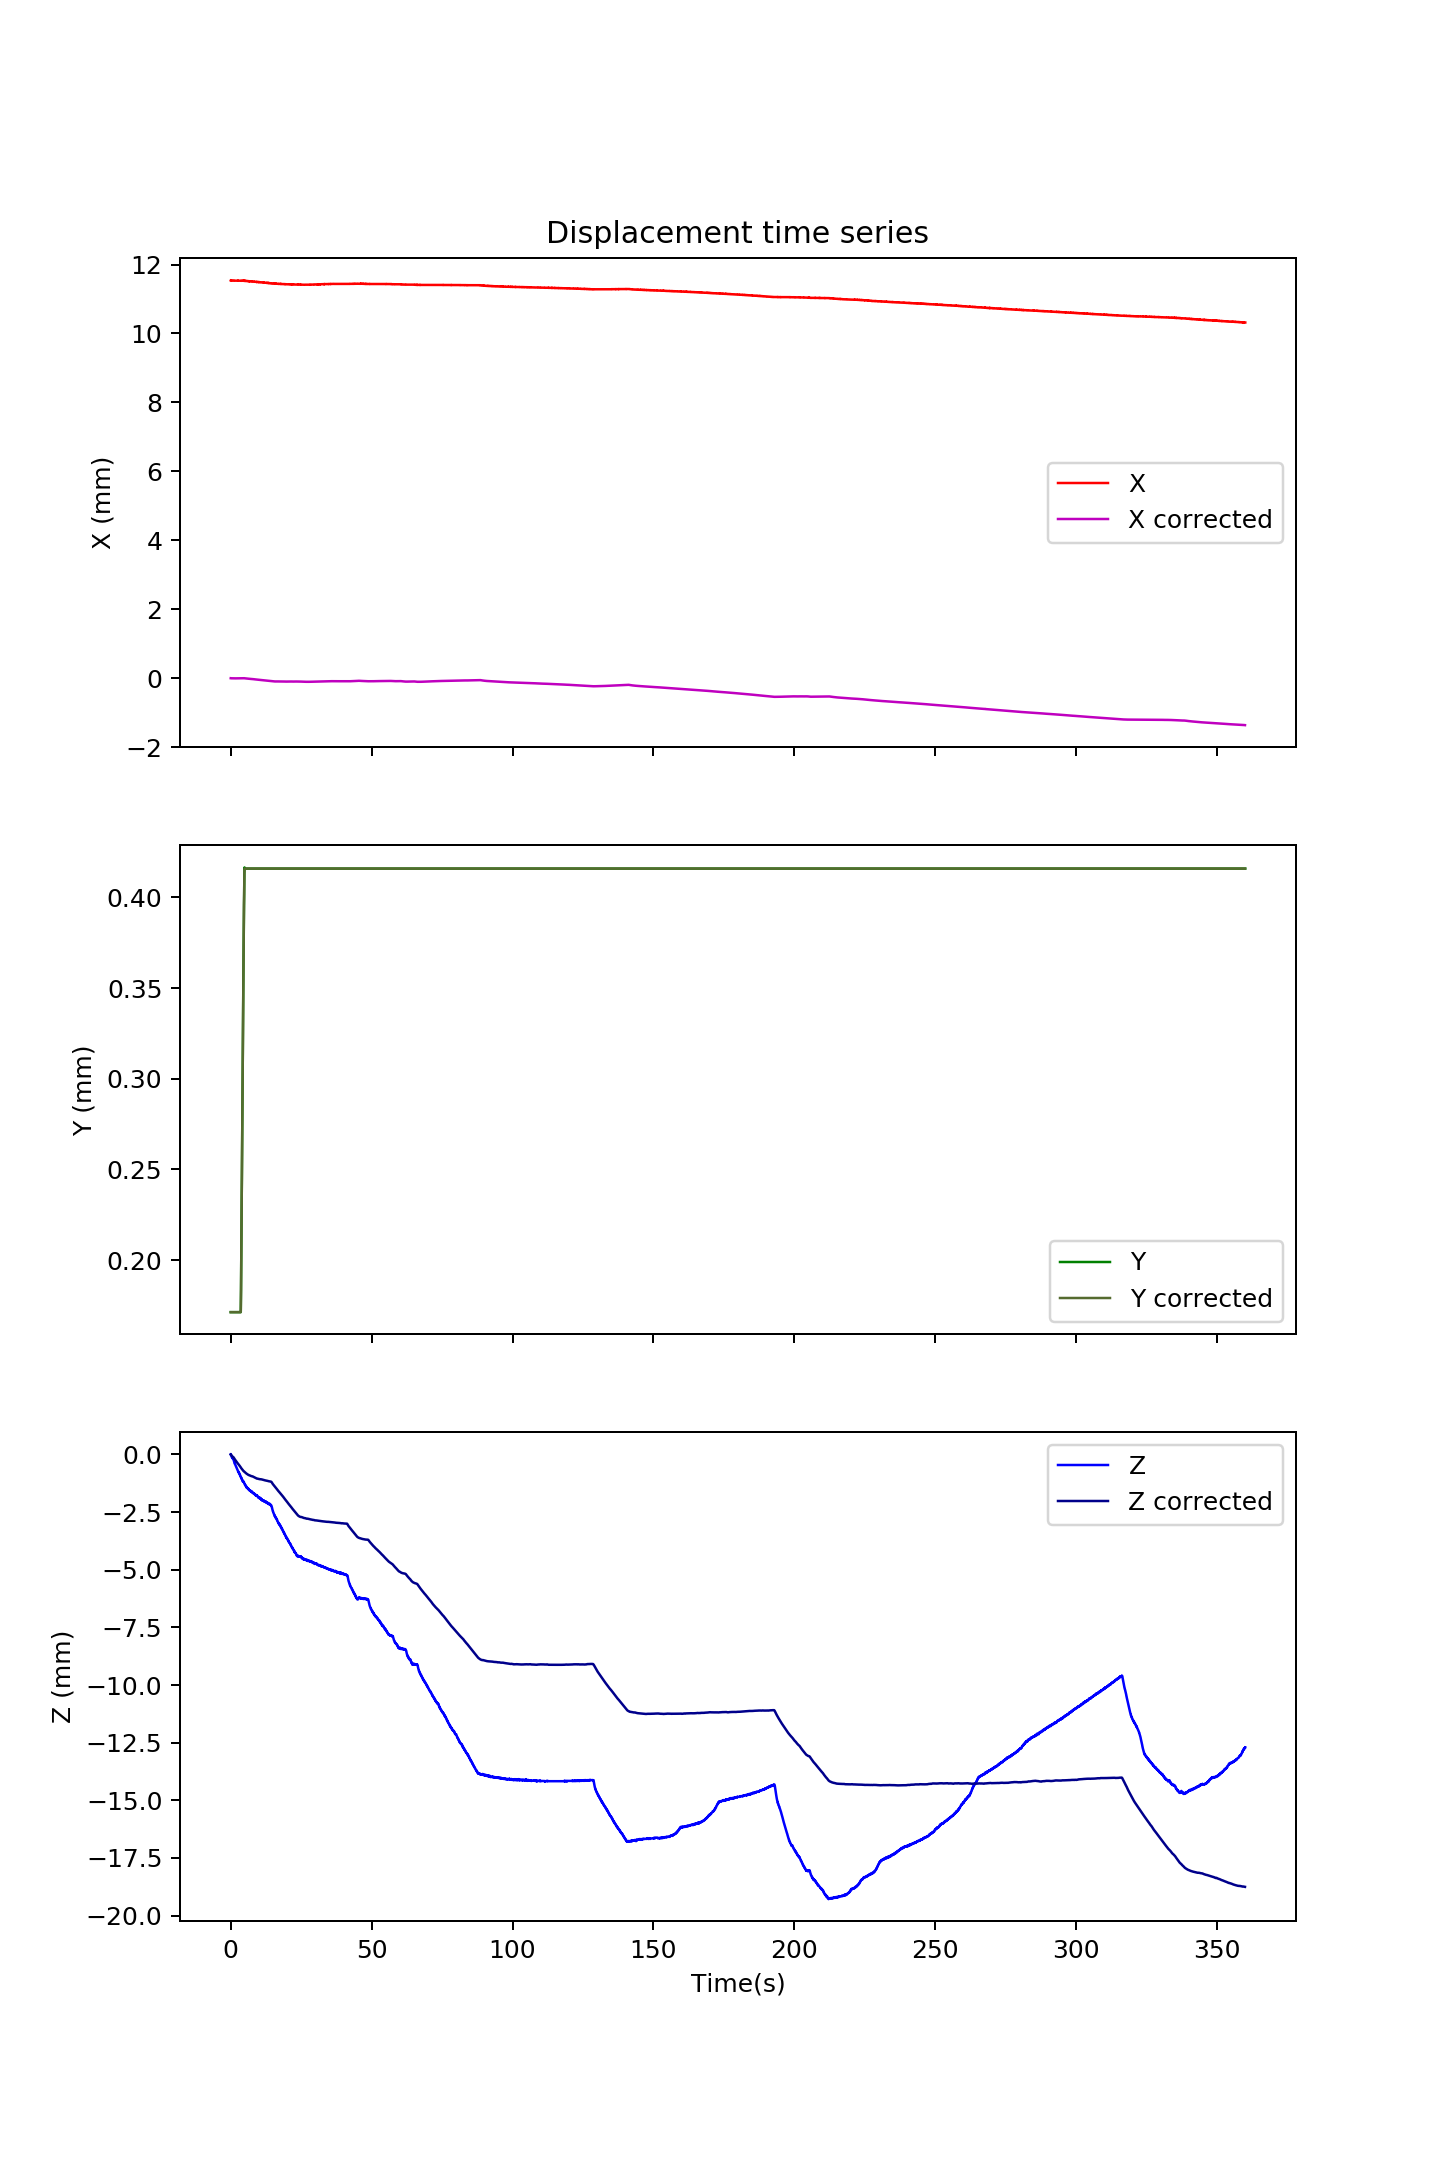

In [96]:
## Plot the raw and corrected displacements
units = {'Time':'(s)', 'X':'(mm)','Y':'(mm)','Z':'(mm)', 'V_x': '(mm/s)','V_y': '(mm/s)','V_z': '(mm/s)', 'Theta':'(rad)'}

import seaborn as sns

title = 'Displacement time series'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (8,12))
ax1.set_title(title)
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['X'], color = 'r', linewidth = 1, label = 'X', ax = ax1, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['X'], color = 'm', linewidth = 1, label = 'X corrected', ax = ax1, ci = None)
ax1.set_ylabel('X '+units['X'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Y'], color = 'g', linewidth = 1, label = 'Y', ax = ax2, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Y'], color = 'darkolivegreen', linewidth = 1, label = 'Y corrected', ax = ax2, ci = None)
ax2.set_ylabel('Y '+units['Y'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Z'], color = 'b', linewidth = 1, label = 'Z', ax = ax3, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Z'], color = 'darkblue', linewidth = 1, label = 'Z corrected', ax = ax3, ci = None)

ax3.set_ylabel('Z '+units['Z'])
ax3.set_xlabel('Time' + units['Time'])
plt.show()

In [21]:
gm_analysis.data

Time          X         Y          Z    Image name X_image  \
0        0.000000  11.536563  0.171250   0.000000  IMG_3878.tif    None   
1        0.025081  11.536563  0.171250  -0.010422           NaN    None   
2        0.042399  11.536563  0.171250  -0.007238           NaN    None   
3        0.066455  11.536563  0.171250  -0.020845  IMG_3879.tif    None   
4        0.086212  11.533378  0.171250  -0.017660           NaN    None   
...           ...        ...       ...        ...           ...     ...   
16007  359.887024  10.319375  0.415938 -12.726232  IMG_8002.tif    None   
16008  359.912891  10.319375  0.415938 -12.715937           NaN    None   
16009  359.931388  10.316190  0.415938 -12.712753           NaN    None   
16010  359.963501  10.319062  0.415938 -12.715937  IMG_8003.tif    None   
16011  359.985319  10.318750  0.415938 -12.705643           NaN    None   

        Z_image       V_x           V_y       V_z  V_x_image  V_z_image  
0     -0.108280 -0.003412  0.000000e+00 -0.266825        0.0   0.000000  
1     -0.108280 -0.003249  0.000000e+00 -0.261678        0.0   0.075113  
2     -0.105096 -0.003102  0.000000e+00 -0.260641        0.0   0.000000  
3     -0.108280 -0.002967  0.000000e+00 -0.256521        0.0   0.000000  
4     -0.105096 -0.002843  0.000000e+00 -0.252639        0.0   0.069476  
...         ...       ...           ...       ...        ...        ...  
16007  0.035032 -0.006276  3.691492e-17  0.150749        0.0   0.000000  
16008  0.035032 -0.006537  3.845304e-17  0.157030        0.0   0.071786  
16009  0.038217 -0.006821  4.012491e-17  0.151105        0.0   0.000000  
16010  0.035032 -0.007132  4.194877e-17  0.147845        0.0  -0.059052  
16011  0.035032 -0.007471  4.394633e-17  0.143948        0.0   0.000000  

[16012 rows x 12 columns]

0        0.171250
1        0.171250
2        0.171250
3        0.171250
4        0.171250
           ...   
16007    0.415938
16008    0.415938
16009    0.415938
16010    0.415938
16011    0.415938
Name: Y, Length: 16012, dtype: float64

10
9
8
7
6
5
4
3
2
1
